In [1]:
# 調整參數
fs = 400000 #400k

In [3]:
#load cyclos data
import csv
import numpy as np
real_datas = []
with open('cyclo2_fresh.csv', newline='') as csvfile:
    rows = csv.reader(csvfile)
    for row in rows:
        real_datas.append( list( map(float,row) ) )
    csvfile.close()
real_datas = np.array(real_datas)

In [5]:
# signal
import matplotlib.pyplot as plt
from scipy import stats
print( stats.describe(real_datas[0]) )
plt.figure(figsize=(20,10))
plt.plot(np.arange(0,len(real_datas[1])/fs,1/fs),real_datas[10])
plt.xlabel("Time")
plt.ylabel("Amp")

DescribeResult(nobs=16384, minmax=(-0.194790653374474, 0.190616520009183), mean=0.00012159858819746694, variance=0.0004850573822608939, skewness=0.09069982267457428, kurtosis=13.308763215785355)


Text(0, 0.5, 'Amp')

In [6]:
# check frequency amplitude in (-1,1) downside

In [7]:
from scipy import signal

plt.figure(figsize=(16,8))

cm=plt.cm.get_cmap('plasma')
freq, times, Zxx = signal.stft(real_datas[10000], fs=fs, nperseg=256, noverlap=128)
print(Zxx.shape)
freq = freq[:-1]
times = times[:-1]
Zxx = Zxx[1:,:-1]

# handle abs 
lownum = 1e-8
Zxx2 = abs(Zxx) + lownum
Zxx2log = np.log10(Zxx2)
minva = -4
Zxx2nor = ( Zxx2log - (minva) )/abs(minva)
plt.pcolormesh(times, freq/1000, Zxx2nor,cmap=cm)


print(np.max(Zxx2log),np.min(Zxx2log),np.mean(Zxx2log))
print(np.max(Zxx2nor),np.min(Zxx2nor),np.mean(Zxx2nor))
#print(np.max(tophase),np.min(tophase),np.mean(tophase))

(129, 129)
-1.4507048203942918 -6.116806843976379 -3.945367041085812
0.637323794901427 -0.5292017109940947 0.013658239728546948


C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


In [8]:
num = 0
for i in range(1,15000):
    freq, times, Zxx = signal.stft(real_datas[i], fs=fs, nperseg=256, noverlap=128)
    freq = freq[:-1]
    times = times[:-1]
    Zxx = Zxx[1:,:-1]

    # handle abs 
    lownum = 1e-8
    Zxx2 = abs(Zxx) + lownum
    Zxx2log = np.log10(Zxx2)
    minva = -4
    Zxx2nor = ( Zxx2log - (minva) )/abs(minva)
    if(np.min(Zxx2nor)<-1):
        num+=1
    print(np.max(Zxx2nor),np.min(Zxx2nor),np.mean(Zxx2nor))

0.6607383369330554 -0.5666838703589536 0.0050718257143912045
0.6199968916113059 -0.6238867329910398 0.016183224894574192
0.6257430163683273 -0.5692621963096414 0.01572334676952308
0.688687372889695 -0.5969802785934195 0.015500660353391245
0.6337042726198101 -0.6024761885966199 0.008245109726926155
0.6545682012744022 -0.7052442535060575 0.018141319465677083
0.6811659688815048 -0.655951903859298 0.012950521325687064
0.6514271599483874 -0.6276279039692687 0.015897661243692164
0.6433784484551573 -0.5825101356455753 0.015259889156255608
0.6423460428012842 -0.6187112115245923 0.0013989777780623854
0.6613428483057274 -0.6725415869287401 0.02614838072242953
0.6389059225275926 -0.7692749421355067 0.018734141956480783
0.6294218235576983 -0.6855769184930036 0.013511457776663263
0.6416365246268985 -0.784392228090764 0.016927578668623128
0.6768652162468479 -0.547540362922299 0.011576847601511621
0.6601850525691793 -0.624468951098408 0.015539619239994558
0.6695522442553963 -0.7925122398231141 0.0041

0.65865434074625 -0.6869836099478954 0.027473605665171003
0.6320543032191254 -0.5562834522810838 0.01080541443573763
0.6579109137677277 -0.49426979722897246 0.017524034917142908
0.657183395797244 -0.7211492846609877 0.01938645205594192
0.6529193011606309 -0.679957851962018 0.020136532625434723
0.6474868182091701 -0.7330851758661394 0.020640712933962746
0.6213138165146219 -0.56120602339451 0.015672177334509436
0.7052151150029334 -0.5773832883597776 0.02201138866324448
0.670593034277817 -0.585214026345166 0.013702326099204158
0.636174495300023 -0.8957789097344504 0.007048432072321227
0.6490086883953811 -0.6395714389741451 0.012969007897892248
0.6736598279682635 -0.58844177392559 0.018516330315724673
0.6891972182361652 -0.6682020019904593 0.01291150521341872
0.652784584539627 -0.6870785530584138 0.014306121151354888
0.629206447268627 -0.6320568553317727 0.01633712244307781
0.688921028335394 -0.6822382402513396 0.017194873367907093
0.6574379456581044 -0.7271982936254031 0.00810016989484021

0.671613601809611 -0.5465911273322317 0.011937317575727292
0.6589284459172325 -0.5702369128339861 0.006083413268519836
0.6613969054041153 -0.6189931481992899 0.012005342049201978
0.6823073112498415 -0.5931380767486487 0.018777952314468514
0.6797529678467542 -0.5201141682209953 0.026568181056712454
0.6642123369069242 -0.6330503734811586 0.02211688724836077
0.6308634751805202 -0.5335010287086968 0.016269130911391712
0.6340139335274688 -0.6985771927645226 0.011948756739277458
0.6325329875789232 -0.6907563536042094 0.015927311325859034
0.6418932757513889 -0.9237991487767088 0.013429317475954355
0.6508250443863186 -0.5689813490180708 0.015723135111266308
0.6865152591194938 -0.620732788554252 0.014237636656113238
0.6507040775060964 -0.6529183673567189 0.017949033106034566
0.6352914266846087 -0.6654978600309527 0.019310482242181404
0.6569060154503021 -0.6657030857817074 0.008463192196198132
0.6544361725059464 -0.7262495569022855 0.01623322477179086
0.6407976194114389 -0.6774107706356216 0.013

0.6477683171670667 -0.683957619020265 0.012937394977546875
0.6599567581736541 -0.6689793336266767 0.023057271219651614
0.6456087082187978 -0.8887939660195778 0.014470941808108977
0.6720013189299905 -0.6709346893525772 0.018193373952539386
0.6605156782931298 -0.6775895725578331 0.021731330128283762
0.6833373004807327 -0.5739922474660784 0.0074661679252621925
0.6757960006765071 -0.642152865142541 0.013570052433908224
0.6331372291457839 -0.6229715396159909 0.027217855380051892
0.6639280828243097 -0.6196910137911726 0.016573388259738968
0.6347236962754363 -0.8871241708819495 0.011988812511400531
0.6719930072354999 -0.6012091822177001 0.019485473882964892
0.6500615703181936 -0.6613248620540797 0.00935466046891828
0.6540575009715545 -0.6682351923936702 0.016539086999191217
0.6311832972416382 -0.7594913820687001 0.01085549808008823
0.6662749802028185 -0.5426846069538314 0.018077676544151246
0.6276766905967917 -0.5726751871672342 0.014187693096735872
0.6598627124264322 -0.5512279358113341 0.00

0.6484264561175974 -0.6126537532928591 0.003163329388428034
0.6454756136935156 -0.5965497265466324 0.025548256551598012
0.6521961733520607 -0.5768181049867744 0.017007046619751918
0.6406837938845453 -0.5417641901161083 0.017112213481256966
0.6584587553988552 -0.7977715633150235 0.01563755189680233
0.6809079105751344 -0.6001847508679823 0.019431824390448736
0.6471042936344843 -0.6060152129986771 0.021928092668434505
0.661726948460563 -0.5451122465099147 0.020867480748511753
0.662375388769326 -0.612458904389517 0.012556491776466196
0.6692498056115822 -0.7013671887422033 0.022266202531288665
0.6576506098064432 -0.6749424228520813 0.021886862824732775
0.662005967106928 -0.9137277534395241 -0.0011196800493795157
0.6321187906973367 -0.7778434932241556 0.013868299900361038
0.6642383115928956 -0.6088341160742148 -0.0002068893604001299
0.6341961798337231 -0.7042566422511534 0.006253953128264167
0.7101449382631269 -0.6767030369463147 0.021069117363946382
0.6598315979443481 -0.575734552118532 0.0

0.6863615433762598 -0.5129332603430725 0.018128113889403538
0.6405135105396025 -0.8170015013889371 0.00957954216499422
0.6368428408224265 -0.6198588390705642 0.01750676998580005
0.6678394779906003 -0.6232309112846834 0.01937355535939525
0.6618595628162045 -0.6435782753625294 0.021290011362248618
0.6901458494059064 -0.6370073400665595 0.030167669688326224
0.6691132522576535 -0.5859947207961638 0.02065153064479601
0.651742765388047 -0.643035497669115 0.010122222639797483
0.6533563009427374 -0.564728345971842 0.019827312704412438
0.6634378309594129 -0.6129573285624239 0.02075448193556119
0.6639164278404754 -0.5562215459603941 0.01443090771190502
0.665154826223638 -0.5189138759505776 0.020459033497845478
0.6375277107088562 -0.5647095931451396 0.020575210008403986
0.6844893589231555 -0.5554186673293415 0.013561898652502609
0.6179423733066879 -0.598306191788678 0.016244813635398734
0.6573664494682696 -0.718726062269972 0.010561027318566018
0.6595196205939601 -0.7201259740086785 0.02010334759

0.6575764776572655 -0.533375713648006 0.021770402734996353
0.646423404083132 -0.7644116510180188 0.004629565436937005
0.6312205675493827 -0.644565558694727 0.006957694612011227
0.6473944710901436 -0.8145445958712536 0.011505550009254037
0.6569121704630478 -0.5630777571759309 0.01568899497746369
0.6409858361497889 -0.6785176924358269 0.010021761686122163
0.6404466337723469 -0.6851608717581006 0.012900942292446897
0.6519352118417527 -0.8291918351004073 0.011823453536449126
0.6668676612873359 -0.7922171941502061 0.0060486127753305065
0.6555681702380125 -0.6584229540365876 0.01682168035101153
0.6835166673784946 -0.5812427002320757 0.025955362064031665
0.7016959241012765 -0.6124245152578454 0.026356591893446853
0.6933581006925695 -0.6283031754831032 0.01953008406121197
0.6648781427836281 -0.8341240548654616 0.020485939797948036
0.6518234259429534 -0.6101291141583935 0.020995548442223823
0.6599224794471676 -0.6679111934409383 0.018454850705284784
0.6981699265504353 -0.5956853666164008 0.0159

0.6793479505242858 -0.5275988121860602 0.01727834890343046
0.6522851116630769 -0.5341299203157936 0.032386404743129885
0.6611014835887015 -0.5461607584107628 0.01442812718259992
0.6540850378930514 -0.5778827249482659 0.010317972738966627
0.660456605245926 -0.6367359030599311 0.010252686235576005
0.63730760687793 -0.7420276833042587 0.014805152976636067
0.640117895774706 -0.6074870748213426 0.011505582216998461
0.6799717848836782 -0.6926257043285415 0.02220716135459919
0.6617737823241134 -0.647339391740894 0.02042766199752774
0.6843579136647335 -0.6758050958936879 0.010138969816857833
0.6442302989941218 -0.5831181599657911 0.01457326315159811
0.683397627952701 -0.5272243388790359 0.027308404544208936
0.6618557685471282 -0.6739000812764266 0.015117035751416569
0.6651200630964936 -0.7008781244782789 0.011874826223831953
0.6472248032586828 -0.5455027429345329 0.013427369730344283
0.6410386141691078 -0.5892729874749534 0.013986655797915607
0.6384402993169727 -0.6062238310963048 0.0110285586

0.6496822842558546 -0.5237779912193621 0.025413581571252397
0.6716319766668104 -0.6404532261208029 0.010195081604215665
0.6516868722221356 -0.6172506380398886 0.022692033354959174
0.6842254539119478 -0.6024034455562417 0.013777839586471989
0.6322073728343498 -0.7737446399604626 0.0073319968270745585
0.6367569259389025 -0.6812031990804297 0.010727454157444482
0.6554588076447206 -0.6726739861466386 0.02253361580633694
0.646389831156507 -0.7134066781577904 0.018885014315930135
0.6806284983728943 -0.828127315320563 0.013862895229391815
0.6762039324023974 -0.6225294570800757 0.01668897253001287
0.6506173065623759 -0.5952679416337499 0.018656435481839165
0.6690200921854947 -0.5208982822418753 0.015959704391831708
0.6543829492585722 -0.6302301858388988 -0.00048042378879732065
0.641467202301625 -0.8958483478193784 0.015598862955427638
0.6521937269885318 -0.6302890440257372 0.012440347475299856
0.6330917885079401 -0.5624360287869692 0.012006099553565186
0.6414747171489428 -0.6039916935242005 0.

0.6575691560185541 -0.7803483774036437 0.01767839777555174
0.6506612369440465 -0.5548365916438187 0.017019185609032275
0.6616270523904528 -0.5635726607635223 0.020510430620336216
0.7178127997582038 -0.5731570711066609 0.015114916940626924
0.6618427352015253 -0.5718214127244454 0.009926656051846158
0.6489093012329993 -0.7084333547050545 0.009986197502761494
0.6775260503665035 -0.578273146514575 0.01903018673303283
0.6603265323512059 -0.5861369490247392 0.015722769478318216
0.6932041031027965 -0.6740975067187474 0.015875616809401583
0.6183024372175929 -0.6244554342538562 0.014242471978346731
0.6990149824538854 -0.5709391549699878 0.026331479897496637
0.6454715506509406 -0.7177784101350588 0.021730836313035698
0.6533719182331271 -0.512113994710581 0.020272130985491507
0.6351414633438379 -0.6563244438371798 0.010184943514591076
0.6308013115117796 -0.6450772027236136 0.017549842806281885
0.6886860636351999 -0.6244685796425564 0.005101559300489614
0.6746234345619516 -0.5714369568375386 0.018

0.686104913451303 -0.6516634292283181 0.01889070903512336
0.6419503593170488 -0.8073658856405337 0.0011403681924382373
0.6325790013940373 -0.5555305426681021 0.010905236399543912
0.6822003515302477 -0.6384190427248879 0.01776395446138474
0.6659921426054627 -0.6736547957713614 0.027435134177000175
0.613915204199311 -0.6927733378763714 0.00620873421090427
0.6501227567453025 -0.6320806459302319 0.007530076258899012
0.6547783879811083 -0.9029782807710072 0.01467220591448935
0.6738476402821296 -0.6595726240967874 0.0043635602381204355
0.6439739200002852 -0.5914783817427798 0.02090579360240189
0.6447366825341807 -0.6212142982804663 0.007646035300959055
0.6689009806022599 -0.655269974682195 0.00791057068250437
0.6645630817776071 -0.593898403861278 0.014590803441550892
0.6627584384307184 -0.6418837229319965 0.006925879839043883
0.6524547106165123 -0.5232021980239099 0.006148835686021058
0.6408523705975182 -0.6472090341945052 0.01597418317863246
0.625890586009189 -0.6174433879611652 0.015701370

0.6714104096603917 -0.5607197858972837 0.015834408024984568
0.6691856822800344 -0.7200586191419494 0.01895783712786264
0.6597034501660471 -0.7327488518776726 0.012404190780092996
0.6591768043413276 -0.6466258543399712 0.024291656380239484
0.6237737376830118 -0.7323321550009936 0.02044607252792261
0.6677140110759321 -0.6417500723599698 0.027514385257365506
0.65422120523306 -0.6453360180002017 0.006282485156745182
0.6691902458671564 -0.6438939026221833 0.006579979894689145
0.6268592833317339 -0.5669230060281121 0.0161634659798347
0.6572407453038633 -0.7584700013473378 0.0161563756930685
0.703188274785539 -0.6554478584762231 0.010622687242543399
0.6199954391547047 -0.6690655604799327 0.02324779345583222
0.6699407881412682 -0.6960577643828774 0.03015357744915602
0.6402454015464292 -0.6688421967849836 0.02378896104740004
0.6268155719607388 -0.5523147703371636 0.010175622330752837
0.6509117421018962 -0.6484404903913621 0.022465823999760416
0.6737136056237542 -0.6945482148167528 0.01685172016

0.6565755259298246 -0.8153596244544341 0.014677069574294281
0.6624784667812884 -0.6051261045305838 0.012473175988183215
0.6358142920367078 -0.5845413091956058 0.007822503064692538
0.6700979763576193 -0.7579737545125838 0.014767372206871252
0.6507362887918562 -0.5726925891675123 0.015633367114929114
0.6557782123207554 -0.6998223575201279 0.030789387121383814
0.6706576498939776 -0.6725767592054361 0.011960348942267782
0.6453188720047198 -0.6508473252782889 0.018738782885062175
0.6738653583570193 -0.6403472265812966 0.01820964700990738
0.6799836061964238 -0.825241477888526 0.013866459394308417
0.6329890068594806 -0.5499691134003746 0.010404779452187634
0.655865521771398 -0.6666201904914038 0.015266850228353532
0.6567613546529758 -0.6986082980257888 0.016362354879462755
0.6588500848949258 -0.922402419610143 0.013046517432562757
0.6253065238265122 -0.5317380041013735 0.012155936370264953
0.6534535696055923 -0.7906361288295962 0.015918827682308397
0.6481891858712652 -0.7343933248947851 0.019

0.6752398155358762 -0.5297047075825283 0.025380011348007363
0.6600043453546995 -0.5629071738923928 0.01735202545545352
0.6514926355638166 -0.5656541816669198 0.005728959664510146
0.6441160860752417 -0.6018922055558062 0.004811682857956082
0.6328028776041228 -0.6778235466387241 0.008891998495967245
0.6276541134377654 -0.5955215526401358 0.013494170670811526
0.6600111239455908 -0.5814532758450672 0.015451491542301691
0.6283198854303874 -0.6784643632020888 0.02167133684488154
0.664090370744459 -0.7562492860185219 0.01566954672680544
0.6723191645187705 -0.6524408553005805 0.022837902701299158
0.6372976741870606 -0.7167967015685646 0.022159875417043083
0.6323712064063801 -0.8666741287146802 0.017676043655143383
0.6471305810812613 -0.48879768903584586 0.021320994019760342
0.628043857680894 -0.9530348600547394 0.006648848656585076
0.6559386610053615 -0.7947058697351084 0.015094394901857187
0.6719886754537272 -0.7445637818003932 0.013262271417729156
0.6741313609829234 -0.6981713953182205 0.020

0.630657381046706 -0.8339868086239413 0.009372821439984705
0.6420205061983243 -0.6126032486644912 0.010290545950714226
0.6586052811345542 -0.5571507519593442 0.01974121509672967
0.6394527701445236 -0.6398766965479317 0.025068142626406307
0.6930850963348891 -0.68574334366692 0.024667036424292424
0.7004984173166824 -0.8898908598274702 0.007221950061671591
0.6641784312316481 -0.6235612134722348 0.006969725909636066
0.6572419612271614 -0.5868707575565286 0.021877881911077646
0.6344121995558705 -0.8007498833076439 0.01582863355985454
0.6467699668657543 -0.6396786930372893 0.012761399078691513
0.6438056724060519 -0.599421383001745 0.0174333200868313
0.6361744789723497 -0.6091456774530197 0.017039452606400284
0.6597533457382019 -0.7194789930753693 0.03184698984992591
0.6458486364129299 -0.6105490036135468 0.014622808709711613
0.6532887318601082 -0.7196371688409031 0.018136856236829587
0.6818911515297033 -0.6793061026240346 0.010910951693484256
0.6421872257828314 -0.6715637344179604 0.01247011

0.6553107973849415 -0.7374459782468015 0.023263855835413547
0.6513550008750219 -0.6596482567810944 0.013353241589783184
0.6330304586418547 -0.5735127848894499 0.0058683783941926035
0.6670787752929905 -0.6017395869212552 0.019784120137349172
0.6672133940333791 -0.6570362149617963 0.019026889151724992
0.653924683055213 -0.6435685602091201 0.0041441751454166
0.7025911426234528 -0.6436428001637926 0.01781289447454473
0.6619187035178521 -0.6567830011534554 0.013970640503511864
0.6472813588783451 -0.5985656067019478 0.021438234120381115
0.6358282133759601 -0.5433841667290025 0.016345335988781663
0.6499559420018419 -0.6448776782108812 0.011160583621240443
0.6509586337935679 -0.5375923064285979 0.01631758231815321
0.6988424906257418 -0.5899183709801918 0.01079256389768066
0.6660404574098107 -0.520046055425043 0.011200810855128262
0.6416274490997225 -0.5580047173427112 0.010474909357290112
0.672418461302426 -0.893666408457225 0.022130837279396253
0.6632213194582164 -0.9282259138793929 0.0129391

0.6206654492839281 -0.6718697136575045 0.00520259018712553
0.6298813276613033 -0.6415954773514654 0.016714523870424998
0.6685063321757747 -0.6606612525208191 0.017459953570084497
0.6384056434748603 -0.6794751662969143 0.01468227290309641
0.6728806527566471 -0.7200355853396936 0.01810552336360558
0.6581970802293673 -0.6561350886959307 0.01959474890447154
0.6828214873648698 -0.5946889732591916 0.015366906989903839
0.644026884500623 -0.7487549877381057 0.02179124682035987
0.6677454476077187 -0.5902340164850801 0.012518837626549373
0.6796972125300788 -0.6116836280127118 0.023016381964912323
0.6656393772149451 -0.7601168081842029 0.019318995220713214
0.6750519669227673 -0.552644128858305 0.01510521503709484
0.6459885240975829 -0.7227805018510116 0.011365746151280966
0.6632589330935603 -0.7156297329733778 0.01911815109264648
0.6652603320334046 -0.5826431303777846 0.01561850445529066
0.6573731269759272 -0.7098846115614621 0.014153846882604857
0.6242025292857851 -0.6876979029253312 0.006167329

0.6625383342165692 -0.7245580991911778 0.01945126690187034
0.6581857883662519 -0.5383399269751457 0.02473567078949326
0.6700400986681196 -0.6800160196909133 0.01230943776002601
0.6527869860426789 -0.6921898145954368 0.014551022041755318
0.6602133339646059 -0.5614526608438812 0.006000152405785376
0.637127057603256 -0.625647710320091 0.0050772545263434235
0.6519770525997886 -0.593867225845155 0.025079160033270067
0.6443638336683994 -0.7208115147933054 0.0006777997829331851
0.6364306216890017 -0.6729392980559425 0.01444388061267909
0.6508481315095629 -0.5962292064649708 0.018838704978822812
0.638838435556473 -0.6222823333947889 0.015632495401088107
0.6628465372736527 -0.5834709423723614 0.008917241512820306
0.6548188095195513 -0.6874872335705908 0.005030428891919259
0.6638071151862758 -0.5995222214746865 0.011516180634905587
0.6396702213912575 -0.6211095076250508 0.017368255357494103
0.661825030022765 -0.6770025439219951 0.017859699818493873
0.649383494496118 -0.6475778281195548 0.0114186

0.6495405774785696 -0.6586869985534465 0.009365467260159738
0.6250593960371802 -0.6908332564570849 0.007700788483331019
0.6699795032469 -0.7639113776439483 0.006566587552106202
0.6895269494199907 -0.7232158569029694 0.014011590900368652
0.6410076742389406 -0.8825992006635701 0.02213439516026905
0.6507658862207621 -0.6376191778129892 0.002454178755214787
0.6333420660638948 -0.719328663221735 0.01133255167108417
0.6443301281604035 -0.6700020940007556 0.0056079719154006735
0.6237321918239593 -0.833044139238384 0.005831435250554565
0.6130479670533807 -0.8803686763810536 0.002680188054531187
0.6760078162475273 -0.7855422842302549 0.01841763809374674
0.6661771631260769 -0.5390892249585773 0.013067103773178072
0.6659116671075583 -0.6594460062224816 0.016087162008625058
0.6562612598928699 -0.5542822624335537 0.006930453140155878
0.6296116993534996 -0.5583518422342588 0.008898336717776076
0.6602457349185136 -0.6557993540968976 0.016539236167430745
0.6815932005755516 -0.5812367209078746 0.006734

0.6838531976236868 -0.7665304670922675 0.015856271851171725
0.6467927448541144 -0.7278530120791109 0.011699154377550416
0.675910959691969 -0.7350179735165827 0.018791415990514163
0.6626323872567137 -0.5804864001538028 0.01063414677659991
0.6938530109204882 -0.745742646846921 0.015954473457067738
0.6855335386170875 -0.5723704709150572 0.012062703452586133
0.6651561628879317 -0.5951766099484861 0.01012285850186254
0.6383368600112485 -0.5610976131519552 0.02565225955562628
0.6526545650746036 -0.7515566708891157 0.008476500880807765
0.6970142287451456 -0.8242570763222992 0.0207900792878388
0.6687539930514035 -0.6001109290430073 0.015067140516686388
0.6994537856942895 -0.7388318069875428 0.004558936443543696
0.6756752294355169 -0.6217358872621155 0.0163372267784173
0.6386828904668609 -0.5524988466680028 0.006843042127261551
0.6481561410052568 -0.8540787160290568 0.015266395356018052
0.6785830952348941 -0.7238164363166022 0.011529683908587676
0.6755177476535064 -0.5967790187803288 0.01439910

0.6354635316300384 -0.5524422542360645 0.016771996516897696
0.6672459176557435 -0.6120413447546205 0.0056757521320601415
0.6543119298903889 -0.6359735709450047 0.016423180820649304
0.6916344306189934 -0.6569227997782268 0.0239084226189925
0.6996531229485426 -0.6177848861451198 0.018035274365658573
0.665566284317148 -0.6317742137178926 0.01974903158648897
0.6513247983024508 -0.5756953858545357 0.0203859104860798
0.6446897337632944 -0.6147804891216864 0.02097668689377604
0.6604188415703041 -0.6166750340392211 0.002556388557458461
0.6677565980195476 -0.7512347086862188 0.02192702444161044
0.6287238303767793 -0.5711266699326465 0.015190583343753027
0.6237915939807408 -0.5898546144630386 0.008857874537341846
0.6153403951811449 -0.7496158442300342 0.020702421509771286
0.6365552479531321 -0.6710052645647175 0.01086485880938794
0.6757421850827188 -0.7772695588583791 -0.004155286177025024
0.644724099154599 -0.7504890074379513 0.026536744653594305
0.6979553514890429 -0.6540480514826512 0.0120507

0.6297895258604678 -0.699550249180511 0.006463865800287262
0.6546831402528738 -0.7237381387382633 0.012297232887458362
0.6448525816121595 -0.6602699995429644 0.009659347286188436
0.655532908798301 -0.7961894880865297 0.01714179042199993
0.6756132011602805 -0.7766958993750073 0.014407324847533962
0.6198813534364949 -0.5865593035241015 0.016522353551303683
0.6724926077774085 -0.8995933436884782 0.020032259499025862
0.6883194591156476 -0.8260754180045213 0.009337179017472125
0.6561891889198646 -0.9897273133292828 0.013208279453248416
0.6514134903656998 -0.6537825615952522 0.009672130481601387
0.6865498923030928 -0.5993706461286592 0.017286629687143645
0.6894915459334563 -0.6536581153172567 0.01142327619393877
0.6761394603986107 -0.6461856061586422 0.015439591773069212
0.6766130576291114 -0.7869666741440111 0.027226178934581007
0.6647477302829456 -0.7333046735264237 0.022006350795460324
0.7032536205928563 -0.9206118838903199 0.01852179272079668
0.6463986364358465 -0.5796796845238728 0.0187

0.6185059343924877 -0.5462734351680647 0.010230615119456995
0.6435245236232197 -0.8204315397576893 0.016334745444772383
0.6567657335151633 -0.6367759127101007 0.01298239073977066
0.6675439424423713 -0.5771979841218651 0.013604014559056424
0.6676929189860124 -0.5501573585634187 0.016204415361798626
0.6440917144540088 -0.6055137564360913 0.019562671030941347
0.6331317728620819 -0.9109132289632837 0.011228646678443211
0.6537524523678304 -0.6218701588011981 0.01979014366259702
0.6596401286643905 -0.5490534663205233 0.02870072240435311
0.6873811492950694 -0.781937305416998 0.008250784551505005
0.6716167120729424 -0.5171597148439908 0.01552438378150104
0.6595790163249355 -0.5244936185832858 0.01308367243285546
0.6414123707288204 -0.6227033519533727 0.007026600384067824
0.653515464402467 -0.7129635601658073 0.015016093941106985
0.6358782798108611 -0.6414142168289572 0.013914064462273883
0.666020522911626 -0.5421377390963034 0.032848732239333656
0.6530913941394927 -0.5603826608809386 0.0106149

0.6882692812624642 -0.764826868539155 0.017696958387022302
0.6736802289869639 -0.6883413652705219 0.011567085068254575
0.6645525851203198 -0.6437286207540747 0.005685373830765511
0.6223392702404295 -0.6095289791766683 0.026008924363117275
0.6598535435252268 -0.627417685207182 0.015997582028951206
0.6353112351997807 -0.7102111534603135 0.012457499706977033
0.647873609070892 -0.6591499089255657 0.009718163966045648
0.6246295694715301 -0.5450077024653335 0.01704297789992633
0.6251132539330517 -0.6619810906455512 0.017826332621268173
0.6312462810895497 -0.8896805836385999 0.004334328014836537
0.6285933754660165 -0.5034553369069859 0.01779166270936852
0.6419626086877744 -0.599442371468621 0.014296463041254348
0.6724479200873771 -0.5976616353701956 0.01717380969336138
0.6228601602882042 -0.6697154037735422 0.019928309591935436
0.6494800741952561 -0.8344533411957424 0.013158936247886433
0.6570861951160469 -0.8736255126685757 0.029713712938996033
0.657372216056225 -0.5674744865008907 0.0104987

0.6787969287952905 -0.6314268760133244 0.02049204499804231
0.6618752804254651 -0.649746028273565 0.02069157095489609
0.6406363429836106 -0.6000409179475703 0.026123020654503393
0.6440943974201554 -0.7842400106543186 0.012439933403342535
0.6432533395669378 -0.5893779226513844 0.014030488800474809
0.6680876703474257 -0.7672834229538741 0.016755840149017053
0.6432456427132685 -0.5405630520130789 0.01845133675925889
0.6436675455634995 -0.9254351723970888 0.021264189488118312
0.6632291486381063 -0.6159013819921197 0.015484765627972272
0.6438666893711138 -0.7630056608370313 0.007131493966700659
0.6594565948817209 -0.7554789370253634 0.006034206543498772
0.6659379821514795 -0.6975308635901207 0.021852608889562423
0.6538084842565813 -0.5808826056115473 0.01436666736845722
0.6931734351302233 -0.6130465218532903 0.018367584784577617
0.6664119479874572 -0.7782122336147725 0.01882429149112979
0.669385766646184 -0.6461501204785385 0.02458927101724375
0.6716004443195112 -0.6132948515425405 0.0150383

0.6595125120586826 -0.7725727815525294 0.015469044695492838
0.6539334394122548 -0.6039150504012056 0.012073479977729448
0.6593328800647141 -0.7135425273792504 0.021617456872505623
0.6671208806580309 -0.790801754358869 0.02119328479294321
0.682984527398797 -0.6306881354122114 0.019276644161111987
0.6452235601586026 -0.9201183952068754 0.017617376609339767
0.6272477419212743 -0.5539982658846507 0.020862458859684796
0.6647373354546224 -0.6056175432385782 0.020994581898879962
0.6340419360994543 -0.7127316191189452 0.006832504549470281
0.6929921605924942 -0.6496343210530331 0.009770134506303516
0.6489335783496164 -0.5880658479012091 0.018194713005900462
0.6197285921159508 -0.7457305325805479 0.0153454496475122
0.6659658237432611 -0.6564902858883237 0.017918480883727564
0.6640399630068795 -0.5195985380306098 0.027586416858726884
0.6700996102771332 -0.6074550855179586 0.020199386124130837
0.6500344095925396 -0.5730773347563747 0.016959404063439546
0.6271122661123449 -0.6236374454432552 0.0116

0.697521493341261 -0.6627194134140295 0.018278402665382894
0.6761649754168044 -0.6938093554982112 0.01790467734305369
0.6383837553437463 -0.5692816258865327 0.030620044594719918
0.6698081073532538 -0.7486228275176456 0.01645863126235299
0.6435336466445387 -0.5609466838319492 0.020667546466937352
0.6362229790089082 -0.656525411814352 0.009937314526806707
0.6678049404258631 -0.7433684133155529 0.014255907573258949
0.6378495841505215 -0.645721296496069 0.013312053565248437
0.6711304927713355 -0.6264968813123482 0.014780719008559113
0.699376755185785 -0.6415017246764068 0.024026830154334176
0.6739986305613673 -0.6084153885132519 0.01885136544882684
0.6716525973383729 -0.5961814976732445 0.018489589417532898
0.658178582678091 -0.5805951668098146 0.01936365463504105
0.6627374866473421 -0.8499771422164724 0.018045553346512748
0.646919136810474 -0.7407228609430476 0.013067927269831282
0.6754867924720889 -0.5720270923384394 0.013344993865834206
0.6657686132761113 -0.6593463146056404 0.018672716

0.6528921524616028 -0.6083591419735961 0.009375135083620974
0.64468929224585 -0.7188099946594482 0.014351551407627325
0.671688144843723 -0.5506648062335628 0.027578678030843306
0.677602340188962 -0.744101301124561 0.02227046087668947
0.6655953874913867 -0.678717457065787 0.0043709069030421445
0.6647739666170707 -0.600728639948634 0.0076939749966168204
0.677852774287121 -0.5951321826670428 0.013911243652283679
0.671449613384687 -0.8189741350177062 0.021136274362410428
0.6504818391749225 -0.5348155087359991 0.016133361299086445
0.6705306500258436 -0.588122126201295 0.02530030682505747
0.6762568932562472 -0.6456247943899054 0.008419644964541869
0.6393642523599818 -0.8731093602878042 0.017592321741837228
0.6785359809179927 -0.6223002317875246 0.014182270525173537
0.6234627848299381 -0.8068172980632928 0.017376289778142713
0.6715902728729262 -0.662526137574569 0.013216472606220019
0.6369752232772834 -0.6069712934303191 0.014002025882697581
0.6666216453307696 -0.7587452955075975 0.0044259023

0.6557410289078434 -0.6364315652746901 0.010064941486224034
0.6802597596172668 -0.6653106992443918 0.008198189091169691
0.6480430933285437 -0.5344074606282152 0.01599829076885114
0.6491201425679821 -0.6096928527447023 0.010733692358248793
0.6518129754014033 -0.7925006924428455 0.01706566857341989
0.6503618072918629 -0.5614477020384308 0.018623769551310378
0.6641467144244728 -0.6598073809288107 0.004361464974077033
0.6515066370773495 -0.6569640673563841 0.012404698372905169
0.6434641229361597 -0.7521821722440942 0.01674737166452999
0.6423769506676056 -0.8180004981240698 0.014875495904981455
0.6526860676450655 -0.6099233080557327 0.01562957389355628
0.6437311222771995 -0.7311273728539005 0.008489056400157003
0.6901726223020901 -0.5998791425100971 0.01020145529237664
0.6482245624396035 -0.6040550704598227 0.0043296226398617625
0.6647256678993672 -0.5887092698117244 0.017161726974729972
0.6678171526986495 -0.6117697336856505 0.009777867190268052
0.6556898646451813 -0.995428260670449 0.0031

0.6599824002798893 -0.7625933497563364 0.018379899996973037
0.6369772772899025 -0.513689240691585 0.020473770694069013
0.6707349097029467 -0.6358274730920341 0.011858763432809671
0.6858728839522981 -0.640346012799057 0.015913673690310194
0.6533982472743698 -0.6706727219777229 0.007082144953839589
0.6338435827069981 -0.5570867736020715 0.013470350536827649
0.6520028374262375 -0.5498065517626454 0.012442073469133208
0.6447838422906074 -0.6189140687860921 0.01025189397755885
0.6312506640253965 -0.5715492035275174 0.01008873656624496
0.675249983597944 -0.5943950899435608 0.024723629133372664
0.6177016769233206 -0.7665426200124168 0.01164915733331229
0.6905378687507724 -0.7525386488936834 0.020341613993536865
0.6511447191722237 -0.6174626551870797 0.00784205285285408
0.6652520534253327 -0.5845265733594784 0.011852820116977657
0.6606429009338877 -0.6916275936894591 0.015835263299044448
0.7004832090385718 -0.740450235333131 0.012042595847282202
0.6697061549017901 -0.6644592108071863 0.0256996

0.659784319770923 -0.6791674144351667 0.012190712845974715
0.659685552329353 -0.7235568812200643 0.02316941830676676
0.6654754175110474 -0.6305286886287014 0.020851927360344042
0.6271704620614371 -0.7417252528722393 0.012530806422217284
0.6473227362987505 -0.6780881466296196 0.019113952668700133
0.6340784224588929 -0.8109193009565265 0.010103995587256193
0.644361923839023 -0.5750526388718851 0.014423716287147724
0.6511725647868631 -0.6257215335464765 0.021688715597788143
0.6588006547320454 -0.5736924188778776 0.02007191304108771
0.6434377507268976 -0.6359743835733012 0.018536620761324646
0.6769786589618644 -0.6045340109075648 0.004195569596947013
0.696062525881319 -0.5192360771811939 0.025865284623722454
0.6539526356112777 -0.607885553264284 0.017292604269431938
0.6745685962462289 -0.5846877320907018 0.029896232366941854
0.6482851343980202 -0.6244829797973732 0.015955001154758182
0.6633520853358424 -0.611375003833128 0.028297262212398817
0.6438927401932837 -0.5947506104824016 0.0168069

0.6656095580981045 -0.5658049112157923 0.010742981547181788
0.6604873021154158 -0.615150334507913 0.011289401384859104
0.6320015748806221 -0.6139499949668339 0.015337270758804075
0.6486288229915307 -0.6735497276975191 0.01883886344141184
0.6483627471757614 -0.675681753746568 0.014111016279430507
0.6212396796279399 -0.5658679944617593 0.019415353399235568
0.6485684865711245 -0.6441344112637288 0.020238416076068157
0.6482420426891409 -0.5378252030018968 0.026361639722874367
0.6485683854950799 -0.7219984224123399 0.011848923501186546
0.6412898280048979 -0.6277302651848222 0.014912732279735252
0.6436636020001559 -0.6214906246796355 0.013200740133863952
0.6617819357256257 -0.5567456095367691 0.022046239261609132
0.6586254678784128 -0.6479752585838034 0.01481924414852544
0.64281855220194 -0.5297208433427492 0.019220180705657588
0.6582681446065882 -0.6769844750603129 0.0018389966890885456
0.6657291970583012 -0.7709316253605352 0.010813083816658672
0.6690823348179604 -0.6394761636882367 0.0189

0.6359795664857 -0.5466859472483407 0.014676000759949027
0.6783628144426599 -0.6534129850239849 0.011035603279959094
0.6796728136602422 -0.704486629218708 0.01963730570363197
0.6525426005741302 -0.6044693432645003 0.02183763132445824
0.6559406933545681 -0.6420491718717865 0.01146315830024249
0.6664982041303884 -0.637133547552925 0.021743686309121504
0.6567170689894936 -0.9053662529366722 0.016411031336303044
0.6342518723306129 -0.6673780918732464 0.011319752022296462
0.6303562752358896 -0.5812125762848874 0.00733326022364425
0.6667875145182508 -0.830373484005918 0.0161667836027346
0.6588845075758312 -0.6222828842489756 0.01042263448543988
0.6597217542637341 -0.634837383605865 0.014038266741856459
0.6297595860056094 -0.6246051365093204 0.014490647850508466
0.6450803415263511 -0.6252886556669273 0.00683788589426159
0.6640879570454636 -0.894203523379848 0.001683524768184663
0.6308608764634196 -0.6773568622454595 0.030378462904737634
0.6551082140899493 -0.589233820229855 0.0204000055303067

0.6420817859369047 -0.6777023528199229 0.007562698955405024
0.6654834449546292 -0.6194075522266409 0.014358850246695209
0.6543375811659997 -0.694506554898964 0.01794664859470327
0.6573102744447721 -0.6620470653574893 0.015945227603899034
0.6658483959675714 -0.6618928111166038 0.025640939822552306
0.6590737962586815 -0.6537346867546621 0.016015794511631303
0.6645528130352674 -0.6461559308146747 0.011783278726828595
0.6771414628356365 -0.6630822958769156 0.01677675998789886
0.6746739305127321 -0.6772686442137312 0.022462314363406424
0.6332234068636909 -0.5932698207238982 0.003741896307745107
0.6513822284233595 -0.7595050531636911 0.01311365921710864
0.651093198255545 -0.6538578583375934 0.02180996699450511
0.6501412234103866 -0.6294786416994333 0.005520777778104445
0.6461301624721021 -0.8464199539446742 0.029855290975127007
0.6817084145484105 -0.6328260899546765 0.0017451047338163704
0.6606332517053997 -0.5213806632327389 0.018192920456476316
0.6614712081127645 -0.8908140785706258 0.0238

0.6928931456117446 -0.6455989719078887 0.023614942409870034
0.6940340031913865 -0.5240690307030931 0.005443717242360764
0.6519535257774116 -0.6483112304681027 0.022849707704409743
0.6583664955799493 -0.5497214253571001 0.024014264567288217
0.6399980859533623 -0.5702975245065716 0.01886571150299521
0.6310680931006398 -0.5566915081591473 0.008649628430655781
0.6465974893685822 -0.5823386403695594 0.015454682550319173
0.668985503459725 -0.6901512642306036 0.019626254321989223
0.6316989246754743 -0.5889763591796311 0.0030350173598384152
0.6780529867985374 -0.7584101757773416 0.027081671130950433
0.6489085750362635 -0.6409317025110519 0.019634004594357664
0.6644458276498708 -0.5227386885461287 0.01250285552394956
0.6467804970528261 -0.6385929810440474 0.010337741051709606
0.6613060004882864 -0.5879368794544684 0.019043340777693214
0.6520075621208117 -0.5323139940074773 0.02071451960951999
0.6588630697503208 -0.6217965253358673 0.01612511213123088
0.6583064672301191 -0.7737470799251465 0.021

0.6548678896151753 -0.7906092435322869 0.021480860729478655
0.6526444747010764 -0.5180723775235951 0.012957585368328231
0.6340996724219665 -0.7838590203594127 0.007232874171838103
0.6817210641769447 -0.5643743741570526 0.01929964060492722
0.6589073468835498 -0.607990545250569 0.018419112522778478
0.6668311975666508 -0.6752203226855282 0.026107399974459725
0.6789437358495596 -0.7549311740982312 0.02005087335302691
0.6918659431748098 -0.7361376943399163 0.0024923990567943307
0.6566897523673133 -0.573572800240308 0.025706560034001884
0.6567362574003157 -0.5479940103328984 0.024173958183253415
0.6737514518246397 -0.6751259054950485 0.01920993130187968
0.655000061751845 -0.5215981817222219 0.014463295301700554
0.6261133285190092 -0.7386564953106409 0.008841058345411391
0.642692394471138 -0.7482551674447588 0.00785056092381373
0.6693252494981907 -0.6292581216700985 0.0151391654096522
0.6329659948920409 -0.8435785127866793 0.020729757333089294
0.6216859997850277 -0.7165476940997939 0.01286046

0.6727825766121398 -0.6521409376109861 0.01577154762675082
0.6436819502535545 -0.7027898764967775 0.015710401906670755
0.6559150412034795 -0.5892812743577822 0.015922385770552827
0.6500987222702419 -0.7334418074633757 0.02735607719025146
0.6522681111420224 -0.6847618560588742 0.012519994383740449
0.663773537690207 -0.49126102026590357 0.02082595071192177
0.6460410464042765 -0.6552499690510509 0.009621799122825207
0.6673339989511607 -0.6566109626717149 0.029214125475376884
0.6778678764513927 -0.6639554865346222 0.007931247175502205
0.6716582486358649 -0.7328738676751438 0.012333716539805561
0.667581407541753 -0.5688840042381889 0.023033305020675115
0.6695707312304368 -0.6324066464894451 0.019851476287189994
0.6411844979782222 -0.7117240840445027 0.01131408564356452
0.6408830806672253 -0.6286483775289777 0.019861171445842256
0.6996309432856611 -0.8302205388684825 0.02093632190339649
0.6524183548814735 -0.6905729158403269 0.014379972520401242
0.6554492447607465 -0.6777593558200203 0.01081

0.6477814597152218 -0.6317426258228249 0.006667629178494132
0.6671912930219706 -0.6002489315445532 0.02124255840894419
0.6549930207345942 -0.7995726888797334 0.020991767729070278
0.6328324989454537 -0.6914615926027115 0.02441165737119502
0.6538391237506347 -0.7166614389958388 0.01591769268024833
0.6781663096088052 -0.6606356721743347 0.019458173906923303
0.6474967961199809 -0.5381783244532758 0.024498824058115404
0.63708556239702 -0.6245668359594452 0.023762994073898935
0.6646248989666351 -0.5570857464700538 0.015044063435320838
0.6534579928080004 -0.6083814143384296 0.022334796811010242
0.6571087292921318 -0.5168125218139579 0.022217918469537024
0.6603975808333152 -0.5227021373969167 0.02496324844362098
0.630412131156904 -0.5940216066000819 0.009485120112862976
0.6428979104247201 -0.5384871179525752 0.020313322802390642
0.6326712918574549 -0.9394344435791058 0.00488897706256791
0.6495421420690625 -0.8668379859368225 0.021113220504008653
0.7001327696843893 -0.520462898857079 0.01049500

0.6725086619684735 -0.5206775881213221 0.014915402864398618
0.6398566855000734 -0.5715001652917482 0.015474643064487745
0.70078799010888 -0.6786635268965255 0.005242123301161355
0.6523912882071687 -0.608486182062624 0.0034539380314863076
0.6546830775734447 -0.564997704448776 0.02415931185720025
0.6365155534548321 -0.59152585770057 0.006255531414075985
0.6666031740819084 -0.7067771257796005 0.019744278514001515
0.6397364982088656 -0.5977343901703622 0.009574078713960685
0.6360638328672097 -0.7277447670165598 0.01654192473413705
0.6374205235132842 -0.720536718707989 0.010779477724966093
0.6561783001366114 -0.6130510211493025 0.017907645852624055
0.6196621288628253 -0.6106628172087354 0.01802167615019249
0.6411817184199229 -0.6448479648485563 0.010183491086804145
0.6823729588229881 -0.6939714073899506 0.013978498925378662
0.6473973677304885 -0.5693692518480864 0.006184748402606656
0.6603720416153974 -0.6347833991216059 0.020622293278435747
0.6557228026569983 -0.6409906132768075 0.01871166

0.6701171802135267 -0.6873437506297895 0.009485250642971383
0.6768627365532969 -0.8014494497688653 0.019693550993190725
0.6728028529981473 -0.5929863369037551 0.01521581498589757
0.6935559174184978 -0.6197924659266656 0.024048346932432955
0.6355942552734088 -0.5371478357898902 0.011430558458818978
0.6278290134630247 -0.6662219312723383 0.00526546164775225
0.6806124310237709 -0.7694115202423666 0.024586043333034747
0.7033263346587966 -0.7165626129671783 0.02285921963190299
0.6295615483544794 -0.5957941863081062 0.014332765889325076
0.6341069337497073 -0.7456993454045875 0.012299718183455684
0.6328815806802036 -0.5523459307485019 0.011541623254085068
0.6731960237007973 -0.7388451857773202 0.012417408963168303
0.6418570775783277 -0.6778800790267963 0.013760027205891133
0.6347359898695863 -0.7261782812279132 0.018452529628386147
0.6605093326041103 -0.699859971927292 0.019165152925162035
0.6640300562836212 -0.6684357869174944 0.01676847026687667
0.6609942465925408 -0.7362542094133966 0.0108

0.6601613335575708 -0.6340622088142622 0.006500158223125236
0.6501681666543918 -0.6622671480923397 0.011814127195545785
0.6617789210045386 -0.5796056272111885 0.01692947740605437
0.6344867507755692 -0.5927367221533479 0.013565159760773153
0.6312196173496787 -0.8235071277708321 0.01597065554166399
0.6645215891905503 -0.5811212589779775 0.00757822452598733
0.6676648119809517 -0.5520974183143121 0.019047121303793758
0.6383303854112239 -0.7447322185416558 0.01160100258340796
0.6908754389086711 -0.7248525163797461 0.0214870482978883
0.6678981668910097 -0.5037784687718887 0.01615828215757138
0.6521893918271295 -0.5884190842148578 0.020874492914756834
0.6511588716186686 -0.7075834371566057 0.0072380154076672224
0.6469772439678301 -0.7591054781348383 0.005421130376569741
0.6533030509481095 -0.64415312547017 0.010283871889736866
0.6489087693116407 -0.6441278194804905 0.004320022132829702
0.6522242967568025 -0.783411227912258 0.02155310049459878
0.6398332554109045 -0.5544376192726121 0.007640579

0.6459905862064486 -0.5261799556453 0.012903226743128333
0.6508951980017317 -0.7163098065860398 0.011578786477061238
0.6659503762335486 -0.6251265875631604 0.014742461218957194
0.6562467663891258 -0.5724414207456665 0.022768688771241413
0.6623095104870587 -0.6096248481354576 0.021528813162639923
0.6481974420673575 -0.6264635921735198 0.018903631859156854
0.6611030829250986 -0.6214743739403388 0.017939117937329913
0.6624232976134181 -0.5624977324582128 0.01848934426870654
0.6461071896399315 -0.5513141296451929 0.018354348577065523
0.6576027342901303 -0.6654036451297924 0.015793079306194488
0.6525687732580796 -0.596973584407922 0.019523086518478464
0.6764052563126548 -0.5804232355343943 0.009399109690931294
0.69400646222857 -0.6034705211961695 0.02344154202947188
0.6404417818687018 -0.5893770751484773 0.017270919509376734
0.6768211976433494 -0.6846717407803282 0.02213015949358904
0.6475254289017814 -0.6041731456265147 0.016878604068858306
0.691350891392265 -0.9871499846224188 0.016321504

0.6646350365795293 -0.9234806295079212 0.020225123027364934
0.6512255450164893 -0.6314359882115341 0.01250003312380555
0.6973455859527307 -0.6343238467585319 0.01916642321255953
0.6388805458964967 -0.6785235392073259 0.015205313879492862
0.6576068551621395 -0.5304677933746915 0.015461969626583593
0.6717071031796761 -0.728780586339735 0.014669044468035493
0.6856827128952276 -0.7857435093907148 0.018067223297127923
0.6569186892082381 -0.620537667280805 0.006766017204483963
0.6943087360250424 -0.6665603350977507 0.016433101508584864
0.6484502612800493 -0.5890367318017478 0.01900524704678907
0.6459656211769391 -0.5967505577017684 0.01805091977653747
0.6412176197361336 -0.6768581433944203 0.012692498907819353
0.6473930086244686 -0.8374707592653703 0.005131901541130221
0.6933873650326683 -0.6184257835582205 0.011552208090466197
0.629817621626269 -0.6483475759238244 0.005844205157094289
0.6430183650316524 -0.5617148917592927 0.014627172919532968
0.6227017251956657 -0.6166145183290634 0.020315

0.6710498495835147 -0.7355540921507395 0.011686342965297303
0.6422115819619167 -0.6708482953496735 0.013647351573302352
0.6276937293620706 -0.5915102928852265 0.017755779637955195
0.6717197878821826 -0.56654248496334 0.013642461539329503
0.6686947016372895 -0.7460278082107281 0.010228564855638788
0.6696308833112932 -0.6017649876324329 0.019641538168944463
0.6706561612598415 -0.6848708698854804 0.01129364206925358
0.6564045934905457 -0.5826519152081402 0.026688242276404976
0.6453684053940909 -0.8760654371866381 0.01688024863590827
0.6601379133747229 -0.7020721453402874 0.012019914740898066
0.6444760127864604 -0.6210622954945058 0.010766866039816473
0.6477999936590009 -0.613599535959511 0.016224340076443813
0.6543989412158118 -0.7214897671274025 0.023356735380068317
0.6679982079978996 -0.5697804048652297 0.017234442060968223
0.6330977383427709 -0.8320902999929085 0.01612194528663918
0.6267765401115732 -0.607037503769092 0.023011110471216314
0.6850130566295576 -0.6740794041296723 0.011179

0.6395596527511427 -0.6475331460236431 0.019062166703678367
0.66647436870793 -0.7250680572093546 0.013249812615231227
0.6590204992169038 -0.9600609198718417 0.012207105646852352
0.666970860584031 -0.6497411031213085 0.014336559196060509
0.6458206804039552 -0.7509051910822857 0.01590352188788973
0.6359690094256958 -0.9278487495755943 0.010953794798839431
0.6292159238489929 -0.6927492004531219 0.005268040047623391
0.64759934127374 -0.7096823908566656 0.011719126813811542
0.6375173342877218 -0.5863946643042905 0.005762280261422471
0.6495214915702191 -0.6875310753321344 0.0049521455474792015
0.6667663006033955 -0.6479006376106031 0.009093397866167256
0.6719218875168331 -0.6575759849114964 0.023040658858553928
0.6240033022606606 -0.7470023180456749 0.011913748329705993
0.655155302060777 -0.6779061768598746 0.012144307068111579
0.6668352074092605 -0.7400113728539801 0.021640339524749308
0.6174864982070274 -0.738883099738568 0.0158361494546975
0.6733112197109089 -0.5698033943757643 0.02096736

0.6670359888193553 -0.6611302360103131 0.009439366049323961
0.6701591796367654 -0.7183230715189899 0.01869804446237187
0.6755098600437761 -0.548044448934708 0.01592398264583526
0.6519727172636809 -0.6190652978018953 0.008554192054735042
0.6374043434735799 -0.7681578996081915 0.018533922457516252
0.7034336123097427 -0.830304690820733 0.015446996229684085
0.6574585100420874 -0.6550561536660626 0.017586234041717694
0.6648431866949828 -0.6504152904580218 0.023467171924962393
0.6444852411073825 -0.7057517424954587 0.006597107648461008
0.6530302947410196 -0.7707114166321773 0.024640141441921306
0.6492560265804492 -0.9342697032384784 0.007499071861434716
0.7020825254844698 -0.7710736348871343 0.01556867942290761
0.6658690316448811 -0.6918645101694514 0.018250744218161818
0.6583987736609374 -0.5697672156338001 0.015106405748852123
0.641874157460705 -0.7244893581991356 0.012673021069543672
0.6983003110662218 -0.6064411679084376 0.014708961268576765
0.6588510027541975 -0.5723389472266043 0.01373

0.6336903524530597 -0.6290184854904171 0.01264149620815557
0.6352455698554307 -0.5475782764478261 0.011814611476890322
0.6720050730350556 -0.6343855902552795 0.02123119882030968
0.6642960085886265 -0.7436509859867217 0.013496713804285037
0.6395805564929264 -0.6222274020091274 0.020408554409231592
0.6726868963089662 -0.6328957798984212 0.019234725712755238
0.653237350465115 -0.5688008715470527 0.0039022243858317235
0.6226324533249316 -0.6906911615505789 0.007372861605264596
0.643501482586655 -0.7262531861462003 0.013734657541941043
0.6764515282090826 -0.6463176710440708 0.017578427848073553
0.6543172219099245 -0.6297511166900431 0.021063856305963136
0.6850900659594537 -0.4593820968806719 0.01451549553610925
0.6434608671269662 -0.6123013175408287 0.018521025870475237
0.6528562608871082 -0.6549127732780671 0.01605432546751913
0.6270468605105063 -0.6859945831043257 0.013783685770350128
0.6441784684256779 -0.6179944280972367 0.011896402603232596
0.6247710589445561 -0.653206152596651 0.00552

0.6429913104590965 -0.703934528804466 0.01865148661473965
0.6572239748563435 -0.5786481159712662 0.014966873107338978
0.6785694662913035 -0.5587322131442745 0.015583529912826504
0.6410362090780218 -0.7460549324219656 0.017741106571408267
0.6535677384283458 -0.5667593720059516 0.01457602787390882
0.6500099276051803 -0.561795723976761 0.01514578061326843
0.6388833358567656 -0.7239252691689377 0.0037194764984454535
0.6474993279635924 -0.658975277288667 0.02691070485898759
0.6924966038550247 -0.6598795196349945 0.007737635866194218
0.6727284273192567 -0.6770052553364132 0.009331377240480405
0.6436296799617627 -0.5957035386617746 0.008883565085864154
0.6486060910665343 -0.545000154622213 0.02136476459105533
0.658249288436634 -0.6591241523943154 0.021610672878285032
0.6414698441375322 -0.9496676065119398 0.02547655573169775
0.6432844371698185 -0.6232178484181867 0.000587552539239063
0.6458099158919878 -0.6922564670702656 0.027191213252095257
0.7022331564791688 -0.6936237570203545 0.019568509

0.6485802717796876 -0.5652979705706767 0.018702156529075836
0.6390552789675836 -0.6017933180625279 0.012317503490986086
0.6705012880481072 -0.6614693676144776 -0.00351758215001452
0.6993070216204125 -0.707760201800379 0.006727735888945769
0.6235865086829686 -0.7198727428515175 0.009834368569369915
0.6837581719616062 -0.6811781204029597 0.017827071747132425
0.6718887582350925 -0.5657834088574158 0.020639355061409924
0.6540209640695154 -0.7623033540284279 0.006908149174039629
0.6616432024246754 -0.6399704554195786 0.019713118113107726
0.6538205112290987 -0.6507898071199476 0.014360422706388359
0.633606683108543 -0.5931743843599913 0.016080861579021187
0.638886530737405 -0.6821110137482904 0.0134520937419732
0.6670002349476103 -0.7095234645676098 0.013325031743114543
0.6351402417268994 -0.5961583214221349 0.01814959020979042
0.6657642424372818 -0.6250526720857186 0.023684481857532795
0.6410217947486122 -0.6469750499272666 0.008912293101962251
0.6368073544793027 -0.6482406865733834 0.01367

0.6600547132664527 -0.9005064534201241 0.013155218648671991
0.6358734659386889 -0.6576795231345467 0.01466618262296078
0.6633106196520357 -0.5882710319175111 0.021948002100628444
0.6818414067486738 -0.8641098966480902 0.024907616259954662
0.6391369481835667 -0.8384266366579034 0.01333581110673578
0.6345080577929191 -0.638259985361233 0.01500948563196791
0.6169258090827441 -0.59482261192323 0.011179285859260665
0.6705813702839517 -0.5493893161134522 0.023404493686137087
0.6389424509545567 -0.5489344594455663 0.01973893630480179
0.6555739800451788 -0.518649421956821 0.02024219606492949
0.6366920381007133 -0.9310973315174518 0.017373230689267317
0.6662577797019082 -0.5717604093299413 0.01331654748253569
0.6575391501308245 -0.7522430684666959 0.016237358226196222
0.6322314369561062 -0.6955666735946537 0.00791977016660746
0.6441769263357655 -0.6559164256197829 0.0189239576513821
0.6475769822988773 -0.606373257367018 0.022070949202265194
0.6531974535469685 -0.644664575323276 0.01093222402675

0.641361676413887 -0.5159623631681653 0.03390412211250041
0.6485293509490311 -0.7854613471443292 0.013227571954868778
0.6682801399936213 -0.6589739120205991 0.01952249272119902
0.6528366675354607 -0.5698186400049312 0.021891562653499015
0.6400742479365598 -0.7201056611495307 0.0197459052371967
0.6603562025211243 -0.5998505081387036 0.015721442617908553
0.6740028279403474 -0.7141185438764999 0.014909994545605411
0.6787516724748547 -0.605216443338249 0.015833443052079118
0.6543062865205137 -0.7503239308144161 0.009033858233154859
0.6747629826512496 -0.5908432639390961 0.025860966266205047
0.6641289416519913 -0.7445116116336794 0.01650355579681896
0.6760938186087504 -0.696556393857005 0.0179171002273594
0.6811513042540733 -0.6641545695649715 0.013732898491512645
0.6519467837719823 -0.7084135123473068 0.00904205878531365
0.6646134088709482 -0.6481415897282474 0.018477042556843917
0.6679575283817125 -0.5758612633753362 0.0208433202791615
0.6385378328280591 -0.80090520358135 0.01002422570714

0.6677316538792698 -0.6474570605011949 0.01554658207183069
0.6583106196098675 -0.739329292719016 0.01132232631585194
0.6511456446929405 -0.7657679971340248 0.018791395123285093
0.6325488626186226 -0.5667493310379565 0.010057936234234734
0.6535690710478783 -0.5474721389378592 0.005210909366301827
0.6488746737356197 -0.6263250824174509 5.3338048567634286e-05
0.6439657461895671 -0.5415229400014727 0.01659436543047668
0.6775455953055295 -0.6295668652712512 0.010044298160686353
0.6528630508218081 -0.7879683613308122 0.02476280925493443
0.667263478434857 -0.6340407724291999 0.013326780430478882
0.6384258985232993 -0.6721736736106199 0.010094238046071503
0.654189719280817 -0.5651575692501609 0.023867985777979744
0.6624337928803379 -0.643981655729752 0.011872857847606236
0.6514922897064532 -0.6059450552981669 0.018792827037716182
0.6535961969633008 -0.5832400921684913 0.018386770049472537
0.6553133444772012 -0.6245212560944708 0.017594569765705843
0.6566221782567734 -0.6057699884111953 0.01870

0.6882259386341277 -0.7350156886866348 0.03224410371417333
0.6408386973543743 -0.5666840167010467 0.019808908260657336
0.6493353902190439 -0.6589485779351933 0.006599333610073245
0.6385842825600967 -0.5420619398361624 0.010895668134998775
0.6327356789778931 -0.5906528594604703 0.016111380474188548
0.6376745352205497 -0.5218560982470315 0.020285602288650284
0.6701190598203826 -0.5723298374222701 0.01678948385758186
0.6684551199032603 -0.5364165904453935 0.013546358825264272
0.6693707895906745 -0.7309169721680524 0.01759323250808225
0.6411777016510393 -0.606481039343572 0.01918241508756904
0.6602421109604006 -0.7413239490631345 9.749938868439632e-05
0.6462704474708654 -0.6171193400558657 0.021644898427878298
0.701232110752804 -0.6638246573666693 0.021794499072623853
0.6547097870102275 -0.6429488149694094 0.0122090170220398
0.6679402612474822 -0.6262025246599925 0.013976353541633922
0.6382787303179335 -0.5644453753995755 0.015632867281112222
0.6720374576032397 -0.6000080582573755 0.020545

0.651704054355437 -0.5909822480774549 0.032632002144876576
0.635579090237725 -0.6709305039868321 0.01810147295146265
0.6471262285855799 -0.5274998865546736 0.017924577228071337
0.6507441852518527 -0.6276957023606464 0.010019482029776839
0.6400484247698204 -0.7720588169502258 0.018360523671583414
0.6650709212612194 -0.5823134987460834 0.02793415464539321
0.6277158502663515 -0.6761563238487585 0.009304626520544455
0.6472680143980918 -0.596915735530513 0.023966346591602482
0.6536893549101841 -0.4938108265024346 0.017769865904671844
0.6572922989387132 -0.543546448074093 0.011316956394936791
0.6452410644802098 -0.7164004880277497 0.004041189972870557
0.6711923099322448 -0.7196198669301161 0.01535963357521353
0.6585376580055027 -0.6635913393928516 0.019327096080215114
0.6558789711136339 -0.5600885738384185 0.01741492824071906
0.6575662167136876 -0.6574221478301201 0.024049686959015153
0.693229526825478 -0.6113650995282052 0.003449938341618216
0.610475885972072 -0.7322170452319212 0.007897656

0.6544227880979978 -0.6098253651725842 0.016111547840717118
0.6581515325712217 -0.7378552594445515 0.009230930248827545
0.65079503650827 -0.68172013259553 0.006494080308102855
0.650770413431031 -0.6067622890720259 0.005662612896931174
0.7033226287319698 -0.5826306583580279 0.01742713072588762
0.6596371030870298 -0.6928688328604724 0.01811393642696936
0.6657120485029233 -0.6498829777922837 0.015016176621015462
0.6661994737242929 -0.6295866087249959 0.015200912816970545
0.6648457959330071 -0.5530912766347409 0.027142820654075275
0.6860093092771675 -0.6930431758775679 0.010987356737520926
0.668903355771998 -0.7363188790764597 0.012260686158559388
0.6376832287721904 -0.6889778302478253 0.01896241237351308
0.6461753488133672 -0.6436677811471803 0.004953143433657531
0.6646589576468152 -0.8103879767183917 0.008731048028410397
0.626264393167517 -0.6880178695716612 0.011165596095378781
0.6570906449687479 -0.6670851603088332 0.017431586312698758
0.6385111227564281 -0.846359246622225 0.0172625989

0.644215203925298 -0.7558071319547879 0.018215861031890098
0.6531696999809693 -0.625272178479374 0.017636765638041063
0.6557921205746412 -0.680190366279783 0.017917729762395862
0.648499989452087 -0.6884540491316968 0.02035566666846497
0.6552135468358935 -0.9123619316951594 0.013388570273346216
0.6506941477167025 -0.7699484260986083 0.006436820348681026
0.6729901132765796 -0.5095899761164937 0.020051846495887277
0.634797564458144 -0.5667232519808239 0.014618915176307389
0.6473129664773993 -0.8001654305037653 0.025979518133676733
0.6751433235389037 -0.7164624103541828 0.018339956956161182
0.6469067239163026 -0.6954818911144365 0.012177075069579634
0.6515688847860615 -0.5189900187509671 0.027819572337323385
0.6435746035959844 -0.8185892731908255 0.00427075192732843
0.6705292072310332 -0.7256335436081547 0.0231935130638474
0.6873020177953981 -0.6605469097796746 0.009926922414707268
0.6452321016406446 -0.6096436170884592 0.01196228865470026
0.662752253677116 -0.7324750881936231 0.0132116678

0.6867077459335837 -0.6357351900363521 0.014470624817844238
0.6679933245436355 -0.5419679516755951 0.004712245740026995
0.6553218006720425 -0.7688921925630328 0.013496408429504149
0.6680368742286615 -0.7572381732386033 0.022753123000122465
0.6281100038421312 -0.701196455255999 0.02013544611052333
0.6797271154413418 -0.5683724643320582 0.016210852762575133
0.6674777190724299 -0.6172904730979414 0.02349390591925812
0.660001336410045 -0.7420368208550987 0.018570900467671566
0.6514190054275903 -0.5253939950216886 0.012084522220401813
0.6250125222879829 -0.6287673406118197 0.021328339134588075
0.6117051979847521 -0.5805267272282686 0.01116119089569743
0.6359607067674226 -0.5617331784718689 0.010332222766070945
0.6403317449912094 -0.6035043880279642 0.0010241256879826473
0.6603379837105521 -0.6382344870802383 0.006129802169506552
0.6150442518992167 -0.6222419569916207 0.011862521693877146
0.6848606091472831 -0.6126074473744487 0.018670491928852794
0.6289822890594539 -0.8183355834382027 0.018

0.6423923743294656 -0.6543002869870203 0.011909228163492904
0.667240672148716 -0.5122388751802249 0.009262340388148958
0.6325024302705484 -0.5163741709387306 0.01196168090348856
0.6781186585551671 -0.7102199303897774 0.015682207512270473
0.6361320878877905 -0.6926949162379472 0.0004026530602405992
0.6533025382154957 -0.5423045512593996 0.019787357140962792
0.6767105540456688 -0.6283113216308207 0.014633744849166623
0.6577537081505871 -0.6712702013902723 0.010919237576738256
0.6292194090113273 -0.6912478725198798 0.00800374926445155
0.6379543325333494 -0.6297991587332921 0.010473903187729991
0.6457591975403695 -0.5572074267189391 0.02454306396814223
0.6322085124810414 -0.6401857284973125 0.016767133635490525
0.6672707260578551 -0.7758964520056049 0.017359793063546333
0.6648493937064822 -0.5937765663279204 0.018208301568731836
0.6815803743868301 -0.8823480641961834 0.02452636029972871
0.6850847975342781 -0.7339831750837267 0.012977861993097481
0.6391734876971675 -0.6124933718479959 0.013

0.6500200331101513 -0.6699885443579721 0.017242577135374082
0.677499858109459 -0.6096188685778723 0.027218195335083992
0.6643413327463557 -0.5243332008499042 0.0198563318787726
0.6694679379476831 -0.6519949222211683 0.016525505014474487
0.6777625069217263 -0.6636406894451474 0.026257398339867094
0.6636851141581217 -0.6074501105815899 0.016640393740179494
0.6765387599681043 -0.6519931263016865 0.006948361328414292
0.6593588628344941 -0.717467926689408 0.015774316593551004
0.6466662412718314 -0.5631073087783609 0.00843301155195293
0.6531822062288533 -0.6138201830787033 0.0072778339283236845
0.6107156175288315 -0.6158439655524031 0.008838940637619516
0.6551418311014967 -0.6325063314105548 0.010208967887094744
0.6293522385941924 -0.6364166919309286 0.005011788565688445
0.6699289555253296 -0.5538440944485998 0.02041544598214673
0.6577904562936975 -0.5878299930200377 0.01256051977884718
0.6372161176949013 -0.7736011350224565 0.006440590786270559
0.6522685582542547 -0.6117512048587119 0.01107

0.6428642028313392 -0.6596931467035394 0.016675167890882994
0.649319099393437 -0.6008737656780503 0.014194109192434797
0.6450336727485606 -0.6158200371195814 0.007643854859544895
0.637014092136098 -0.5916916213500503 0.015865854357002378
0.6528785928217844 -0.6729963328370412 0.012370542021519689
0.6432953128139759 -0.737385304142191 0.022072128350504032
0.6652490644219125 -0.5572984225861437 0.023203112624981412
0.6524815442819139 -0.5929109421712786 0.00246589945967351
0.6606560295377859 -0.5553541560429625 0.01773078361190126
0.672614427959612 -0.6283985087661894 0.015911847924046846
0.6704520560793059 -0.5646349773802171 0.023392580666657586
0.686114000938069 -0.7274708588202443 0.005440080961783038
0.6325075817904862 -0.8368933689286218 0.0062807002576459265
0.6701903181603943 -0.6039229069435845 0.02366664176286245
0.6703612857770376 -0.5944517580064943 0.001737118765311586
0.6307377696345462 -0.5523747518879731 -3.3050882649997976e-05
0.6648537185857579 -0.7601112740661338 0.026

0.6690541555529543 -0.5859058913602211 0.0186650240810913
0.6694459074497359 -0.7955868145344254 0.01807446495061747
0.6846449814695016 -0.6124406835211322 0.021015872841068987
0.6553130242780594 -0.7076074220492046 0.002981564116408442
0.6602898758415665 -0.951704604815869 0.018677750965494372
0.6507547949339009 -0.5758684080124528 0.019528792555062617
0.6748100275414066 -0.6346232239215956 0.018173035546220986
0.6449408807839183 -0.6965878513689352 0.006796261233977537
0.6608289253755129 -0.9176246392778338 0.013427266661118436
0.6743157483633159 -0.581535306977939 0.008871786634883031
0.6527693556865845 -0.6591623396575983 0.019361310479368263
0.6408711253173782 -0.6244403065914592 0.014512250143981074
0.621136222186393 -0.5649863225676455 0.00861580219411737
0.6894919298334736 -0.6115270100029881 0.016666158447576202
0.6610783128147885 -0.7221579718034892 0.01887062957765652
0.646546661725715 -0.5950572366693729 0.014729889914833528
0.6742923557212933 -0.6317887730820626 0.01739782

0.6494218355217067 -0.7940876349902324 0.023421750000489416
0.6307338175692931 -0.6145249992941284 0.003695366857374441
0.6898494769874991 -0.5944643632469373 0.021226223646773727
0.6359821679258041 -0.5167459403185832 0.018018015541534413
0.6201215007452786 -0.5023919464483484 0.021571889501074082
0.6653723584605036 -0.61663981756172 0.01484051057173812
0.6390809501077352 -0.5324640167768131 0.014131610569700971
0.6332010202599982 -0.8056416230552708 0.021614752092190034
0.6621331320723716 -0.6308161851396676 0.017359990710568478
0.6447587646939199 -0.8015635842221158 0.009586256572064349
0.6703003106223946 -0.7293939151481454 0.014959933642685492
0.6209878572417846 -0.7665102806272401 0.010901772121311534
0.6523801208211208 -0.6253893503546628 0.024891644095008283
0.6715697416321085 -0.5511418361360554 0.01592585044753925
0.6496594336651051 -0.7386365573203904 0.012306048730374063
0.6174976946962998 -0.7332090742227082 0.010323465362156815
0.6489632552079587 -0.6815613044355526 0.016

0.6531088912893199 -0.7029293056669057 0.018996026716715058
0.6432035763090275 -0.826990788565978 0.016781439312794813
0.6893482390689405 -0.6010238322606496 0.014273082761530768
0.6446302041095467 -0.6582364428811305 0.01701161853943619
0.6610115874846059 -0.6631361358502588 0.013385274322963877
0.6622726879909356 -0.603919986341996 0.014215206468714176
0.627167406633885 -0.6770204133878344 0.013189018425197568
0.67367535012404 -0.6898006635493739 0.030356759086486093
0.6621085993144172 -0.9130845670852346 0.01704822424416181
0.6804462391295273 -0.5998290069248382 0.013455428192300532
0.6484995390255648 -0.6630143787081606 0.015569769413189103
0.6745059553202726 -0.6020094004445027 0.017292126573646736
0.6413773683455726 -0.7789121346925707 0.010084865694424173
0.6554067608643848 -0.6580635304540168 0.013275812389913811
0.6826721046456535 -0.5851328360079251 0.013987961172711545
0.6365315739544344 -0.6850238084804143 0.01811681847976991
0.6558242812788972 -0.534102544957479 0.01704091

0.6275871748236097 -0.6471885581550725 0.014609674251894269
0.665079288927727 -0.6414095318367805 0.017655411805966716
0.6356420047185435 -0.6511488773011287 0.01339147431899099
0.6425438921434301 -0.5726948908051455 0.016475566732147243
0.6687347422593407 -0.6944855064469992 0.01727446848863355
0.647080054908695 -0.524636892737939 0.019808989913346554
0.6514881092941016 -0.5387061358603429 0.026529445380999803
0.6575957076467482 -0.6288221454173502 0.011535375682245535
0.6354847080240729 -0.6285961068630916 0.020410092706120216
0.6454914167695057 -0.5390970216581568 0.01124745002329567
0.6399135542933732 -0.5878548938719415 0.013318507139389422
0.6622443679937033 -0.7204342741116927 0.012337954283149651
0.6590999401660587 -0.8400198549078364 0.012090178358201174
0.6753196702994795 -0.7772459738529263 0.0205666579234454
0.6547098099627309 -0.6469660153594778 0.02034933412679351
0.6451152466373624 -0.6718639327119778 0.009249515562588653
0.6485387383529437 -0.7118192144424189 0.02349799

0.6352996239663964 -0.5375147362224724 0.013809375535530806
0.6467787859098035 -0.7020504358060866 0.015833621011311808
0.6220092603102363 -0.6796354221736502 0.013564603899373254
0.6385938623551426 -0.5591083444570217 0.010734793708751529
0.6691889241267186 -0.5465955032008889 0.022637535321361035
0.6310435613663252 -0.6498575731473233 0.018934800275543923
0.6405012592479149 -0.7699149283785809 0.009916735007952976
0.6381978875411415 -0.557518308962833 0.014184776124027965
0.6610717168985194 -0.6992950463155168 0.007932743337073535
0.6542529567330697 -0.6019637240352989 0.012564485972871253
0.6565095071219074 -0.6597865766184463 0.02077109698487863
0.6461152069011988 -0.6904141455064396 0.014237448485267598
0.6369944389391535 -0.5408994706211108 -0.002799214638401864
0.6746767895017313 -0.737790491264199 0.006669672347484968
0.6798914195637317 -0.5322748790431435 0.02016153393579106
0.623588691178562 -0.66183436594566 0.01601191569437041
0.6453894260519137 -0.5939062234969739 0.015822

0.6501185369184892 -0.5668507392361684 0.01228779072235748
0.6323045016385929 -0.6281046749162771 0.018941792762822922
0.6957860475515041 -0.6601569642632856 0.02795868330657025
0.6390154420796647 -0.7170677405358781 0.015580039259128457
0.6454387502340388 -0.7444966546453937 0.02183475180837245
0.6546064537388881 -0.6111425829723505 0.006497737156017141
0.6772593747760387 -0.6511409338519776 0.02430358633633576
0.6368529503391496 -0.8377223529202997 0.006916732306295009
0.6631506273927188 -0.7233706462041287 0.012399262201951929
0.6437565566189827 -0.5435330926103723 0.015556241984605557
0.6625392530087366 -0.915957433235967 0.01603476860698146
0.6531333005048408 -0.6263395397165115 0.029481099140122504
0.630302557411554 -0.6205502796377764 0.016230778573872853
0.6641238956916848 -0.8316927744637568 0.021106903665042996
0.6384971930790384 -0.6321842739861137 0.013094230987494435
0.6616184777822431 -0.6817140420575336 0.013016155486982442
0.6601119314664567 -0.5786653620680702 -0.00213

0.6296308994191091 -0.6176318117329314 0.016303065804302762
0.6828833275052772 -0.824690210108332 0.022437290539882387
0.6489493184497817 -0.6283117829658107 0.020766383858574527
0.6695092874486852 -0.575579030325486 0.022814258122938788
0.6669833904617524 -0.5651376260638872 0.019337961371993388
0.680482705707689 -0.5570523560454939 0.015313219953330983
0.674310341765747 -0.5726228054191704 0.02172396313683371
0.6436075141149138 -0.5693180685421355 0.018735161757261247
0.6408430803679359 -0.5760920641269709 0.02103896761622224
0.6369174061984986 -0.7674122909149479 0.010929110611633545
0.663925094850702 -0.7811184706945318 0.017517008803305964
0.650649202144993 -0.7327626159850846 0.027015559461857935
0.6252330194128066 -0.7945012295674321 0.010186154896355907
0.6724925007924996 -0.549674971865751 0.01053949608419312
0.6165360652589296 -0.6167862511387949 0.008594056840281458
0.6623335365835821 -0.724914488128416 0.017810722272030746
0.6728844387282744 -0.9331413714593422 0.0178826456

0.6332861295856397 -0.5866446138691042 0.009165217559739435
0.6865830297528015 -0.8124865915696582 0.00962570015020298
0.6814842815840356 -0.6200407895037998 0.011664352534260344
0.6693956058654977 -0.8233809601777666 0.017595204737452196
0.6551301121531605 -0.8539640607062728 0.00543980882880706
0.6471886674647103 -0.5769890489388771 0.014665227174378872
0.6740728329701494 -0.5917391996035246 0.022413410718121432
0.6459385725242959 -0.6575283740354998 0.0037072517851048778
0.6599358690405359 -0.5584229431512846 0.022266395672727674
0.6447065758863104 -0.7496476766259834 0.01889422597300338
0.675001545716124 -0.6067058544191792 0.017255401238883476
0.6602640852830943 -0.620411975557797 0.004336825469950394
0.6935443049505478 -0.6329013438015791 0.020243272744783325
0.662864021461661 -0.6320413655984747 0.017079503694579577
0.6667881086225216 -0.579816501567298 0.014753743619304524
0.6447517395797435 -0.8387189161833761 0.02755031918771869
0.6661518951077305 -0.5854689915834201 0.015016

0.6638923236722181 -0.6040273446643571 0.011892903700558566
0.6352586391901414 -0.6469578611273346 0.014180325613936989
0.6590620241476739 -0.5970298736869708 0.008389916460476205
0.6643210864954636 -0.606368329118701 0.025867485192197694
0.6281636153191632 -0.5810632441073056 0.023535722649405642
0.6547571798761163 -0.6479331594717279 0.02267798001569302
0.6542581923241015 -0.5305546624627782 0.011917421302703474
0.6457025946785211 -0.9081787548675357 0.009132674986188978
0.6378575802215647 -0.5795261776985432 0.02073820856537229
0.6812948957714208 -0.5711427281915806 0.023297710256126196
0.6923360159748306 -0.6002077692387797 0.018842716246038428
0.6912125522982295 -0.6938192659726468 0.020191952225839936
0.6719493724689043 -0.659376167934473 0.025079949632983538
0.672157895792061 -0.7247947181336472 0.011219696355828205
0.6409137432622223 -0.5142927507749768 0.007700351269646905
0.6373739188167351 -0.6099329125443032 0.020156557168416998
0.6829106353278984 -0.6147570327215837 0.0152

0.6504879075141581 -0.7279352127035119 0.007806352021640583
0.6485140840270451 -0.6149458120766598 0.01687293097377425
0.6414214175972428 -0.7740737426534035 0.01955891553393424
0.6728669168805137 -0.5551830325225038 0.007897186708316548
0.662913904212494 -0.5692681674938216 0.010033126472530513
0.6387452597997906 -0.5422698367730185 0.013415264017635205
0.6592857852220131 -0.7234939570671521 0.009609448107741898
0.6380825442290878 -0.6137123074788902 0.017243005081036024
0.6542419609855015 -0.6712154516325801 0.020688359808819293
0.6767502784088886 -0.6405201975776733 0.006477085929381121
0.6426791173756985 -0.5850513991960562 0.008565205181505678
0.6695485400882724 -0.5684570948328098 0.025677641433550013
0.6466247778289531 -0.6835859099907771 0.016501404467836878
0.6339882408315309 -0.7144897126224172 0.0221598402455935
0.6495169361265056 -0.7900282530245875 0.015177092749606602
0.6335016151459234 -0.6474709594859291 0.02052764352481394
0.6566911029175243 -0.7607486145988338 0.01949

0.6465005057037454 -0.7997271266062302 0.018655123827087564
0.6902854184656446 -0.5496350139454411 0.008277222124414438
0.6423722922655057 -0.6135806095408753 0.024009691330793805
0.6597760065792714 -0.66046124087405 0.020535311125205263
0.6617127203241401 -0.596981630180202 0.011625851460125474
0.6869077287868739 -0.6516895095370292 0.014526524315117278
0.6591371218565303 -0.6114370852278246 0.01331334083105952
0.6631244687607231 -0.5679157435507705 0.01888675338130044
0.6577495202775894 -0.8496814415907061 0.017627476403207568
0.6684305185290433 -0.6523269284501247 0.009587253270135763
0.6702438189248336 -0.6221872720132071 0.018429244149772366
0.6569709824548496 -0.6633889483309545 0.015124593393752132
0.6671592011770919 -0.6513627860924829 0.022233332475289462
0.650726702620653 -0.5929643430769478 0.00021957632256888043
0.6484329383005367 -0.678404081387141 0.02593413878762823
0.6807374799126048 -0.7938627052357292 0.014074706296148563
0.6458823005744385 -0.8565827749014221 0.02039

0.6333724554268834 -0.5145434312642454 0.02418849248258202
0.6633123844064199 -0.5731581460741277 0.01674597577926787
0.6421774891728487 -0.6955361443910768 0.006769983878890521
0.6381620715259461 -0.6718093843666118 0.012767205202856364
0.6399795556494343 -0.6517970803522757 0.012332839831995396
0.6650096798112601 -0.7007138820077936 0.02598638915767809
0.651650552188694 -0.5859051775206332 0.017005471198473322
0.6349210612730047 -0.7214995415845316 0.016030045882651674
0.6540791186002457 -0.7033782543591243 0.007895338033205584
0.6589350936562824 -0.6664635737603897 0.018090200474300225
0.6637770395764362 -0.6641115376613425 0.003874377212303841
0.6558235326906052 -0.7549952140516696 0.022255622422182923
0.6466781027017878 -0.6692297206888516 0.002054787122528493
0.6104122961423858 -0.7230687613463644 0.021715137819164947
0.6729290958709069 -0.627980938795675 0.017586210026273922
0.6427984221747591 -0.6175281601473317 0.011523453140332408
0.6784340966828473 -0.6504968760805607 0.0101

0.6469412269063611 -0.7853793105917497 0.01563178737569136
0.6263054431000209 -0.5338441154265334 0.02480720103789057
0.6357964349206023 -0.7569330157871055 0.011774986701120333
0.6547355180077334 -0.6229337424479613 0.0037657080228428097
0.6477847548670884 -0.6196552536450204 0.009300761175502492
0.6391561231703045 -0.8166150801490533 0.01836102264047689
0.6330213177925612 -0.5810910289870137 0.01664449602921517
0.6622987970928066 -0.6689260738007723 0.006344544350576176
0.6229519952542307 -0.5777448585845752 0.00743606111488378
0.6595458017826186 -0.6567411909273917 0.02569392183033732
0.6383188937314936 -0.6461002701338285 0.010307052920706754
0.6532769119869182 -0.5949797579200433 0.01067748373492065
0.652137154258736 -0.6936420220493353 0.014731898573592117
0.6649768766774867 -0.8403852205785678 0.015850697433481734
0.6587496576430313 -0.7410625322722557 0.021055598818755822
0.6710805232206163 -0.6800280687079148 0.01819248854317641
0.6591214490938857 -0.6758256025224314 0.0170111

0.6657288510263397 -0.5886661483260567 0.014277646616358369
0.6510046293277132 -0.6697340135392138 0.020633518945218282
0.6724470157076289 -0.7163799584920312 0.015955638445233605
0.6591807264763418 -0.5555012293982271 0.00777755691467661
0.6504764754821344 -0.6262108290597139 0.015153437695664611
0.6267642211332531 -0.5726309932742943 0.010173401056174355
0.6313598476099651 -0.6071944552271404 0.005462779399286735
0.660295413447225 -0.6194980258582841 0.01500051089885746
0.660112252162768 -0.6569444918787608 0.012105141169264737
0.6790129987557094 -0.920988537668969 0.014317051720931541
0.6258352724258482 -0.6038261092358777 0.00805318857186084
0.662049267688041 -0.61864983036508 0.015334049646394378
0.6605020261170018 -0.6100746130935129 0.01340766494593648
0.659467848071056 -0.5859664890776848 0.011424815717312239
0.6843629463783496 -0.8627555799846005 0.010972060198834503
0.6256536751580158 -0.7499537255193336 0.012702619561747917
0.6669242972025522 -0.846736147711755 0.02405617468

0.6592441986987141 -0.5789482222798468 0.02241614773174543
0.6755185323327849 -0.8921803347497195 0.003459140385382581
0.6504673517546549 -0.6871479104922698 0.015221024876243413
0.667860281554812 -0.5934111052518547 0.01668851165474307
0.6614394510926693 -0.6672932583529088 0.02124007337497045
0.6249299298756789 -0.5747451089995665 0.010745952442112301
0.6576465944011685 -0.694768600056463 0.014753752350310036
0.6341067061037828 -0.8442838974205611 0.012855916346316259
0.6337213171686844 -0.6050343255267676 0.017838092614306893
0.6464540586145172 -0.5861402162518663 0.032935825589109756
0.652871134887329 -0.5444536203768795 0.01568494548423497
0.6599598143020736 -0.7448716882056126 0.013383596661702043
0.6356154913613041 -0.5365742774650246 0.01134143855611373
0.6903679984869213 -0.7456090115972311 0.024146468246974712
0.6736995983412202 -0.5861262514201218 0.016059310530188484
0.6838492333297311 -0.6377564394456747 0.01375888264428518
0.6504313367804482 -0.6437465063853154 0.01372973

0.6510303716077255 -0.7197238051029355 0.019540068797108415
0.6911913257030098 -0.8732790790343739 0.029350144812396478
0.6443808977603745 -0.6793131086521953 0.004698733385385902
0.6920817294138926 -0.8223073040283033 0.008538339857037268
0.6701308593702662 -0.6271880639963898 0.022397370486044753
0.6561402529982747 -0.6623191670663504 0.012156026428798044
0.688483991850832 -0.7475080477323801 0.020430071930249597
0.6463290993199035 -0.5806342985395951 0.018032186015968826
0.6818033636802938 -0.778744610834865 0.02240139781207018
0.6847778177436048 -0.60527958511121 0.02355928411159077
0.6466199870970182 -0.5895114666758874 0.014628132782635032
0.6540882707283369 -0.6228089088467093 0.01333637998794
0.6538947980172786 -0.6769425717369222 0.01467581449924855
0.6530686383278894 -0.6761833268951669 0.01679047350238367
0.6618035858227762 -0.6710169641499764 0.00818781983875109
0.6939452313646608 -0.6478489951813085 0.023337540399556187
0.6480516195070187 -0.5773563775506207 0.010695635980

0.6821896686562121 -0.6244622505369526 0.022354998029937838
0.6484204613358897 -0.6751071916324343 0.01332756731590144
0.6692169543962472 -0.596478128632379 0.022781199864861157
0.6479290649551314 -0.6950169757051292 0.015732482099060627
0.6633149850427882 -0.6851618729957134 0.015600569782047446
0.6704567751995083 -0.5826817065411478 0.004413382503265793
0.6493011224007861 -0.6560580224216603 0.013861633729568668
0.6382639927343605 -0.5744225701117307 0.023332289959428484
0.627314922897536 -0.7736971987158248 0.007586818034290419
0.6566800975006328 -0.5631919501341343 0.019325513942031174
0.6690160750537887 -0.6776962198890102 0.018780530727537187
0.6505487590711925 -0.718521508853869 0.010323719330446285
0.6700072470718226 -0.7290742599974462 0.024951348275364757
0.6710405955474916 -0.6701323097997818 0.015460510238810482
0.6417176635906228 -0.543033688431604 0.01667118225206263
0.6562830101412382 -0.7740976928118621 0.02002260770120015
0.6326212355148408 -0.6768939142736354 0.022671

0.6360467069863491 -0.5433053660511216 0.016243417167580283
0.6529424031132885 -0.6978836199109326 0.013568378058600433
0.6445600666213764 -0.6850178242761902 0.021717786766653303
0.6620018646061127 -0.6233725706052051 0.011491682985016141
0.6500226378215691 -0.6224858666160455 0.019206417025827895
0.6740182485070629 -0.7305399455611581 0.008677424531565898
0.6404250629163001 -0.8094606806507905 0.007458490474544921
0.7000331003828781 -0.5376576304200005 0.014641292919229885
0.6482738734703133 -0.6498163617016088 0.020389421868475838
0.6647838724563164 -0.6097376700833415 0.010457571447968423
0.6671607768593191 -0.685813944761281 0.013378565490998993
0.6186613029983175 -0.6738787359168796 0.008119391255640648
0.6469305813375759 -0.8187544858424518 0.01859772553117217
0.6591140934527526 -0.6106601525778792 0.016504987283259217
0.6324075332459841 -0.5944379531311741 0.007155976566354275
0.6380537659890335 -0.7342116643905805 0.02281342352726838
0.6486914845563105 -0.634126026374394 0.003

0.6479950973604045 -0.6018245911424616 0.031256468596325554
0.6431451035361851 -0.5946725912844215 0.01371360210491786
0.6863696828935576 -0.6153167638047128 0.015695388058432805
0.6635151623564377 -0.8745670274704271 0.012295518043290408
0.644311500642209 -0.5519203805046271 0.008760952392195554
0.6458073926342963 -0.5769389311907747 0.02212098318921844
0.6615784696281886 -0.6147410074836706 0.025094046443822945
0.6738855305707578 -0.6656924135746212 0.02694861454614342
0.6496319575376854 -0.7290471046499825 0.008153916895194813
0.6785820670096836 -0.6724546077461675 0.01650082409081377
0.6727622549457742 -0.5448840442618084 0.023172376152589998
0.649097098862623 -0.7501015311049526 0.0189480145252862
0.6507435742324829 -0.6186279091181861 0.009961682646170356
0.6809166277520953 -0.5796066674429583 0.016051956130526922
0.6455467978456317 -0.6351892831801733 0.013349826382834908
0.6758838652182806 -0.7704652520933046 0.020631165502270576
0.6547536783877324 -0.5906785952488798 0.0149567

0.6874773827866152 -0.6505110064179742 0.01464459590154211
0.6418275717076758 -0.6342228824003859 0.013458405093711392
0.6652569695819875 -0.6513721098170573 0.028552047786212165
0.6652287073548675 -0.5123691429537574 0.017457651096604097
0.6536795534808384 -0.556594924654414 0.02088398478994654
0.6348997696251004 -0.6692731850176219 0.01068768552672312
0.6796954501645287 -0.5941825524290902 0.013036739227792199
0.6782261746725649 -0.630319805544169 0.02130390910945475
0.6727773058956236 -0.658246551332407 0.016578114851499823
0.6267293225784727 -0.738265720572848 0.013302146358274479
0.6573140602317767 -0.5942715947483725 0.016602913406723478
0.6672970013737174 -0.7026068238893048 0.017644657541483665
0.6379740345390504 -0.6142316000123305 0.01793797578797892
0.6310267709399732 -0.5782230352837134 0.020565189861326525
0.6438067884031958 -0.5929613579801609 0.015772572280832703
0.6107497486858021 -0.706342665016755 0.019968793369363053
0.6465200888298304 -0.6126079861574023 0.010795220

0.6500878708014199 -0.6157407972777977 0.021684697245544705
0.6402596080422971 -0.6920343911138529 0.007249557002786372
0.652591664755662 -0.7401323039630996 0.020742538945000152
0.6627189915412725 -0.6759750229331751 0.020365719410327044
0.6369269462293633 -0.728296904477848 0.017873082695302304
0.6669838707062388 -0.594008835644126 0.020121296892949156
0.6773199928298221 -0.5434950293660679 0.014728885558100605
0.658534803309686 -0.6524425727900087 0.011970082772993757
0.6285528087600971 -0.6032791750209869 0.014024299410010127
0.6669698407468858 -0.6233080135677185 0.020066320788514724
0.6675221462747103 -0.5829632746656439 0.017476830000325978
0.6505075036106787 -0.5514988308116449 0.02589758130915431
0.6518897594335714 -0.6868304236165304 0.017546445440282568
0.6379541642952764 -0.5699435281566663 0.016755486112546382
0.6323677479655174 -0.5682827145363842 0.01539947089310762
0.6677608983777371 -0.6804329214545954 0.019585293990393483
0.6388640364634086 -0.7068850453931781 0.01843

0.6466648977363108 -0.537808655400416 0.015664191932219518
0.6301802239790566 -0.5861083113308072 0.006331658631586901
0.6629946803096248 -0.5492744149920541 0.02762883655397679
0.6413955965829197 -0.7915953615536759 0.019027796604395197
0.6576165803525378 -0.7002427127733586 0.010334045721562393
0.6555003040327507 -0.5274671021559101 0.018001016564463915
0.6728777034576507 -0.7010894941551578 0.01830204216479627
0.6653437581041386 -0.5755772562240502 0.019485114793858838
0.6514319999221154 -0.6340778329045345 0.015832947859992605
0.6430733978572005 -0.6724108774894235 0.015271666151745113
0.6110002374735855 -0.7583611103175081 0.006015379547795007
0.6498203180999638 -0.6123999195302214 0.01465886805170433
0.6153015079626514 -0.6330603577966167 0.014009688605995592
0.6464890395913914 -0.643279859566305 0.02839223773586279
0.6491332711135531 -0.6799690850990432 0.014417305253343199
0.6757218427364262 -0.5853901274074913 0.018928010801108203
0.6741253042675586 -0.4921090811618982 0.01918

0.6748501020527113 -0.5782322876502155 0.019685757692050363
0.6690308058245458 -0.6587664433794052 0.016181312319441758
0.6650655931616571 -0.5983636983726945 0.016741037086852546
0.6469491022342118 -0.7029718216374297 0.016079090065574803
0.6591486519521049 -0.809704552631664 0.019163196627934823
0.6242538535569094 -0.7389807736201883 0.008578546271138143
0.660117421656699 -0.5504347731889754 0.007458904961724779
0.6629683725987439 -0.7132742269426848 0.022192110302021537
0.6404243035694308 -0.6742932968407616 0.011189520165806915
0.673089813870714 -0.7050489930968267 0.013262456789787276
0.6220699876194673 -0.7478782589568342 0.007429929133257616
0.6737118973241734 -0.6399966264909926 0.014776417499573168
0.6574066107819165 -0.7147867256136939 0.008877369094933306
0.6373213843928295 -0.6367124108517339 0.005964136012368052
0.6434201718393049 -0.6028926104154213 -0.0042653190207725625
0.6438676813453643 -0.7890950176973097 0.006833465797523526
0.6465885359178912 -0.6464501167984948 0.

0.6713066041859528 -0.5280106635621311 0.02223176605290605
0.6254823841401259 -0.5508635693948085 0.008721384284817078
0.6277069217699938 -0.7939965759003358 0.007181397476181085
0.6336597846272296 -0.5729476195903482 0.012409225662768536
0.6447344110873432 -0.5960642281780977 0.011579300206693276
0.6345729110282681 -0.6413229580916779 0.01470084419690686
0.6769665957144737 -0.5625388974218768 0.020693190829671144
0.6701712610901487 -0.6725534948256342 0.02860058647450684
0.6545639728960724 -0.6363768618657504 0.01056834662451703
0.6444556105571948 -0.7557564463806505 0.01969613903892299
0.6467767503892091 -0.7015284588483801 0.008143639898578917
0.6419478754546986 -0.6904237054374465 0.01579188678760568
0.6338711316388825 -0.6745053318849492 0.0011439885140956908
0.672508772510772 -0.5468857615532956 0.023594251145960175
0.6615495619144871 -0.6230145885670362 0.01787898755936049
0.6873679561881185 -0.6512490934496697 0.014213885736740973
0.6648161225810969 -0.5887722464615128 0.006588

0.6840830778913182 -0.742141440801712 0.021914406058393426
0.6355215090818026 -0.7733031609303345 0.005446907419222329
0.6830662160263302 -0.7275483520608834 0.00896444756343468
0.6656148772269569 -0.6081209504273442 0.015715471508244365
0.6520044778675113 -0.7042926824557707 0.015232849458195611
0.6435500723966645 -0.716674744181369 0.017410068587315752
0.6557450618797704 -0.649801153613641 0.01961728165333277
0.6450089998756999 -0.5755296272165793 0.01558337017385623
0.6429557493810379 -0.6027910002058832 0.015956904559456746
0.654495860627379 -0.6032896420901399 0.026771843893677958
0.6277555667731569 -0.694377013339698 0.016825898596572027
0.6836640168922516 -0.5834311536392329 0.021180512208920522
0.6437089790239652 -0.757414485525431 0.014397512225484766
0.6669568176957357 -0.6683505473977089 0.012253722902903722
0.6606817897078989 -0.5116567208234262 0.010842437005447778
0.6631306244512967 -0.6248618149848113 0.00856272011989402
0.6456837566113495 -0.5663555310971833 0.014069047

0.6164410925903823 -0.6679631304662212 0.006704546261468587
0.6314445010756664 -0.6112341495562004 0.022330440700296272
0.6477290944557378 -0.5802802365371227 0.019992083421865273
0.6874985692614983 -0.5408685688739991 0.015549559954110835
0.6212006197937677 -0.576660156906982 0.019531244110667458
0.6183570840837533 -0.490954517473565 0.013676740587588608
0.6739609591904053 -0.6860190612815851 0.02661679438196002
0.6498392676616445 -0.5838244947509592 0.007822739261098282
0.6332908170616633 -0.6500068732202584 -2.053655467029042e-05
0.6502386671010292 -0.6346029788867318 0.012220411134411897
0.6824240719085403 -0.800912585034044 0.02424480498923908
0.6401444606360907 -0.5500203492831472 0.02795421506726301
0.6480464666311787 -0.6098645937635583 0.01818985904070284
0.6892341701921589 -0.7574978101748653 0.01690462937679656
0.6466416950485911 -0.6033369356762746 0.01470027588403368
0.6498582358993076 -0.6730476569850241 0.0043980285853425635
0.6591745879579101 -0.9105643985838101 0.02960

0.627187318325647 -0.6734629996750776 0.009980164651746629
0.6362906088192261 -0.5297161287322749 0.005508906754303487
0.6698135927426779 -0.7071834453791632 0.014359752714176593
0.649599298844294 -0.8031759732680059 0.015830370159503965
0.6371727751812055 -0.5187971960123063 0.013663483063231894
0.6467710034492647 -0.6769750830576653 0.01813075813034981
0.6466336916509883 -0.6171272437574644 0.019887725011596247
0.6723626030430623 -0.8806811486942638 0.020876101229523054
0.6536999662748444 -0.5534693678141229 0.01148914277677485
0.6659138186739528 -0.5308350566216486 0.020811789713227904
0.6395387119451235 -0.7454005054120858 0.020852160069136094
0.6534819792892352 -0.6506547871987944 0.020176110640700597
0.6599132808454466 -0.7930101695247336 0.004793713418969859
0.6669428918037283 -0.584537183563149 0.01419168717600483
0.6482051462372319 -0.5782648610034076 0.016569374117188874
0.6430303073577546 -0.5811768857771247 0.02032686487352126
0.6627360337476644 -0.6271078743440865 0.013390

0.6392226625255691 -0.62788827711589 0.02616515486596789
0.6550945119896798 -0.5387262101239525 0.004608885412425541
0.6766065093604492 -0.8320297827920593 0.00872314350851628
0.6417507156713402 -0.5407738060283511 0.017006182611225665
0.6811688279858201 -0.688458925791485 0.013836436251057536
0.6646831622401745 -0.8285576323357227 0.019754178866316575
0.6758494984938354 -0.8005244890922916 0.015500663170809021
0.6691399819232712 -0.6516396989038236 0.01416644029042661
0.6509686465221214 -0.7374322653547736 0.005068173366661406
0.6823148695312555 -0.6411822128684823 0.02096532925250005
0.6675212170272813 -0.6596026547869043 0.02087985633593964
0.646858169482542 -0.6081563958365395 0.012618183605570911
0.660880903695036 -0.6469765412228745 0.006830354991481117
0.6191265884559012 -0.7052788735674944 0.021596719949747656
0.6607680671434011 -0.6142453377672852 0.013513417846006924
0.6378564008608878 -0.8249649412775797 0.022354504939377233
0.643622051437912 -0.8062516067990761 0.0239361386

0.6679699190581472 -0.5902652617096291 0.012684360110660249
0.6518242352431507 -0.5287564125284536 0.015280455180542357
0.6358240317031305 -0.7337044340320793 0.020343239477006357
0.6705490911473633 -0.7567195795977011 0.010004449508313373
0.6429587601210923 -0.6734460363009711 0.025725540923195456
0.6582733992396543 -0.6817319269230757 0.016609908221537087
0.6472328691110693 -0.5630949829860579 0.020769399834850863
0.6473694742419696 -0.5642310801485724 0.015034281094373771
0.6221454471164749 -0.5355498625569364 0.01571587865794763
0.6447440120170644 -0.6522870529917701 0.0011268209469677045
0.633394874347663 -0.5564198535102676 0.016896115728082663
0.6961029728699495 -0.7273711729463261 0.019950618266015595
0.6337818304672704 -0.5665082217615824 0.012453663758061747
0.6391102551962276 -0.7341335493156473 0.008130907062442813
0.6857072382066005 -0.691842084164175 0.011310493862464745
0.6359492607235597 -0.8123793965603348 0.018417678532427192
0.6696771545570576 -0.6595203088460273 0.0

0.6616304703062527 -0.5555956702341733 0.013652532819315697
0.6571685427525977 -0.5614448072506579 0.03422006172545401
0.6365909467963117 -0.6958646517690834 0.019777723507143
0.6795018128741896 -0.5777320859293129 0.021006182872147984
0.6819205054147115 -0.5925362004604477 0.01554138240934448
0.66649749789188 -0.7227413258446433 0.017639296153178635
0.685108504566081 -0.9214679968057853 0.02465081550767586
0.6397725355632732 -0.9047522105251171 0.014592665355468793
0.6526321992397681 -0.5806518896655755 0.005432046928391766
0.675289080610348 -0.6596813797366574 0.010040079998477187
0.6276102664139648 -0.6695905416279795 0.01101404338265841
0.6504916146974937 -0.5236701782770303 0.005148096279351571
0.6512264467063336 -0.5969059609073621 0.012388531631124865
0.6684520390282693 -0.5619029216094484 0.007595489327846518
0.679845961041531 -0.7478894448388627 0.004516550892650004
0.6388402680382097 -0.658973957361934 0.022581181970902794
0.6377003434671871 -0.645150551869005 0.0125745258456

In [9]:
# training start
import Ipynb_importer
# %load train.py
import torch
from torch import autograd
from torch import optim
import json
#from utils import save_samples
import numpy as np
import pprint
import pickle
import datetime
from specgan import *
from utils import *
from logger import *
cuda = True if torch.cuda.is_available() else False

importing Jupyter notebook from specgan.ipynb
importing Jupyter notebook from utils.ipynb
importing Jupyter notebook from config.ipynb
importing Jupyter notebook from logger.ipynb


In [10]:
# =============Logger===============
LOGGER = logging.getLogger('wavegan')
LOGGER.setLevel(logging.DEBUG)

LOGGER.info('Initialized logger.')
init_console_logger(LOGGER)

# =============Parameters===============
args = parse_arguments()
epochs = args['num_epochs']
batch_size = args['batch_size']
latent_dim = args['latent_dim']
ngpus = args['ngpus']
model_size = args['model_size']
model_dir = make_path(os.path.join(args['output_dir'],
                                   datetime.datetime.now().strftime("%Y%m%d%H%M%S")))
args['model_dir'] = model_dir
# save samples for every N epochs.
epochs_per_sample = args['epochs_per_sample']
# gradient penalty regularization factor.
lmbda = args['lmbda']

# Dir
audio_dir = args['audio_dir']
output_dir = args['output_dir']

In [11]:
netG = SpecGANGenerator(model_size=model_size, ngpus=ngpus, latent_dim=latent_dim, upsample=True)
netD = SpecGANDiscriminator(model_size=model_size, ngpus=ngpus)


if cuda:
    netG = torch.nn.DataParallel(netG).cuda()
    netD = torch.nn.DataParallel(netD).cuda()

# # if pretrained 
# netD_path = os.path.join(output_dir, "200discriminator.pkl")
# netG_path = os.path.join(output_dir, "200generator.pkl")

# netG.load_state_dict(torch.load(netG_path))
# netD.load_state_dict(torch.load(netD_path))

# "Two time-scale update rule"(TTUR) to update netD 4x faster than netG.
optimizerG = optim.Adam(netG.parameters(), lr=args['learning_rate'], betas=(args['beta1'], args['beta2']))
optimizerD = optim.Adam(netD.parameters(), lr=args['learning_rate'], betas=(args['beta1'], args['beta2']))

In [12]:
# Sample noise used for generated output.
sample_noise = torch.randn(args['sample_size'], latent_dim)
if cuda:
    sample_noise = sample_noise.cuda()
sample_noise_Var = autograd.Variable(sample_noise, requires_grad=False)

# Save config.
LOGGER.info('Saving configurations...')
config_path = os.path.join(model_dir, 'config.json')
with open(config_path, 'w') as f:
    json.dump(args, f)

[INFO] Saving configurations...


In [13]:
print('Loading audio data...')

Loading audio data...


In [14]:
LOGGER.info('Loading audio data...')

# Load cs09 data #
# audio_paths = get_all_audio_filepaths(audio_dir) #list
# train_data, valid_data, test_data, train_size = split_data(audio_paths, args['valid_ratio'],
#                                                            args['test_ratio'], batch_size)

# Load noise data #
num_ = len(real_datas)
num_valid = int(np.ceil(num_ * args['valid_ratio']))
num_train = num_ - num_valid
train_size = num_train
if not (num_valid > 0 and num_train > 0):
    LOGGER.error("Please download DATASET !")
train_data = batch_generator( real_datas[:num_train],batch_size )
valid_data = batch_generator( real_datas[num_train:],batch_size )

TOTAL_TRAIN_SAMPLES = train_size
BATCH_NUM = TOTAL_TRAIN_SAMPLES // batch_size
train_iter = iter(train_data)
valid_iter = iter(valid_data)
#test_iter = iter(test_data)

history = []
D_costs_train = []
D_wasses_train = []
D_costs_valid = []
D_wasses_valid = []
G_costs = []

pkl = 0

[INFO] Loading audio data...


In [15]:
epochs = 300

[INFO] Starting training...EPOCHS=300, BATCH_SIZE=64, BATCH_NUM=220
[INFO] 0m 0s Epoch: 1/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[INFO] 0m 6s Epoch=1 Batch: 1/220 D_c:8.0184 | D_w:0.7143 | G:-0.0331
[INFO] 0m 9s Epoch=1 Batch: 2/220 D_c:-17.4034 | D_w:24.6522 | G:-1.7871
[INFO] 0m 13s Epoch=1 Batch: 3/220 D_c:-22.5050 | D_w:28.4056 | G:-2.2717
[INFO] 0m 17s Epoch=1 Batch: 4/220 D_c:-25.0643 | D_w:28.5777 | G:-0.5534
[INFO] 0m 21s Epoch=1 Batch: 5/220 D_c:-30.7412 | D_w:47.0240 | G:4.4794
[INFO] 0m 25s Epoch=1 Batch: 6/220 D_c:-31.8729 | D_w:43.1545 | G:19.6524
[INFO] 0m 29s Epoch=1 Batch: 7/220 D_c:-23.6157 | D_w:38.9926 | G:-0.1093
[INFO] 0m 33s Epoch=1 Batch: 8/220 D_c:-25.5930 | D_w:31.1723 | G:-2.6959
[INFO] 0m 36s Epoch=1 Batch: 9/220 D_c:-25.7221 | D_w:32.1347 | G:-2.7821
[INFO] 0m 40s Ep

[INFO] 7m 14s Epoch=1 Batch: 107/220 D_c:-20.8305 | D_w:33.2001 | G:5.7883
[INFO] 7m 18s Epoch=1 Batch: 108/220 D_c:-21.1943 | D_w:28.1428 | G:-3.7311
[INFO] 7m 23s Epoch=1 Batch: 109/220 D_c:-21.9743 | D_w:30.6328 | G:-0.0060
[INFO] 7m 27s Epoch=1 Batch: 110/220 D_c:-21.4544 | D_w:32.5691 | G:2.7821
[INFO] 7m 31s Epoch=1 Batch: 111/220 D_c:-21.4903 | D_w:26.3843 | G:-6.0745
[INFO] 7m 35s Epoch=1 Batch: 112/220 D_c:-22.9672 | D_w:33.5643 | G:5.8814
[INFO] 7m 39s Epoch=1 Batch: 113/220 D_c:-21.5272 | D_w:25.9849 | G:1.8437
[INFO] 7m 43s Epoch=1 Batch: 114/220 D_c:-22.4252 | D_w:27.2410 | G:-4.9444
[INFO] 7m 47s Epoch=1 Batch: 115/220 D_c:-22.1072 | D_w:28.1990 | G:0.9601
[INFO] 7m 51s Epoch=1 Batch: 116/220 D_c:-21.9017 | D_w:29.5616 | G:3.5624
[INFO] 7m 55s Epoch=1 Batch: 117/220 D_c:-20.5628 | D_w:24.0360 | G:-1.3385
[INFO] 7m 59s Epoch=1 Batch: 118/220 D_c:-21.0293 | D_w:28.3495 | G:-2.1564
[INFO] 8m 4s Epoch=1 Batch: 119/220 D_c:-20.5975 | D_w:23.5903 | G:-3.4955
[INFO] 8m 8s Epoch=

[INFO] 14m 40s Epoch=1 Batch: 215/220 D_c:-19.0772 | D_w:23.3525 | G:1.6151
[INFO] 14m 44s Epoch=1 Batch: 216/220 D_c:-20.9547 | D_w:25.4320 | G:3.0931
[INFO] 14m 48s Epoch=1 Batch: 217/220 D_c:-19.1662 | D_w:24.3248 | G:-0.9674
[INFO] 14m 52s Epoch=1 Batch: 218/220 D_c:-17.5065 | D_w:24.0957 | G:1.9316
[INFO] 14m 56s Epoch=1 Batch: 219/220 D_c:-17.8651 | D_w:23.8225 | G:-3.3204
[INFO] 15m 0s Epoch=1 Batch: 220/220 D_c:-17.4905 | D_w:22.7338 | G:-4.3171
[INFO] 15m 0s D_cost_train:-21.2386 | D_wass_train:28.2962 | D_cost_valid:-21.6368 | D_wass_valid:28.6295 | G_cost:-0.0091
[INFO] Generating samples...
utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  "    data = []\n",
[INFO] 15m 3s Epoch: 2/300
C:\Users\UJ\A

[INFO] 21m 29s Epoch=2 Batch: 94/220 D_c:-13.0183 | D_w:15.6812 | G:6.8696
[INFO] 21m 33s Epoch=2 Batch: 95/220 D_c:-13.0495 | D_w:15.2943 | G:-6.3577
[INFO] 21m 37s Epoch=2 Batch: 96/220 D_c:-12.5450 | D_w:15.1003 | G:-1.4285
[INFO] 21m 42s Epoch=2 Batch: 97/220 D_c:-12.2056 | D_w:14.7434 | G:0.3602
[INFO] 21m 46s Epoch=2 Batch: 98/220 D_c:-12.5610 | D_w:14.1762 | G:0.0518
[INFO] 21m 50s Epoch=2 Batch: 99/220 D_c:-12.8769 | D_w:15.6769 | G:-0.1749
[INFO] 21m 55s Epoch=2 Batch: 100/220 D_c:-11.3747 | D_w:14.4591 | G:-1.0318
[INFO] 21m 59s Epoch=2 Batch: 101/220 D_c:-12.4874 | D_w:14.3840 | G:-2.6727
[INFO] 22m 3s Epoch=2 Batch: 102/220 D_c:-13.4027 | D_w:16.8327 | G:3.6431
[INFO] 22m 7s Epoch=2 Batch: 103/220 D_c:-12.8789 | D_w:15.1283 | G:-1.1239
[INFO] 22m 11s Epoch=2 Batch: 104/220 D_c:-11.6166 | D_w:14.4288 | G:-1.4748
[INFO] 22m 14s Epoch=2 Batch: 105/220 D_c:-11.7846 | D_w:14.3382 | G:-0.0235
[INFO] 22m 18s Epoch=2 Batch: 106/220 D_c:-13.1861 | D_w:16.3120 | G:-0.0367
[INFO] 22m 

[INFO] 28m 48s Epoch=2 Batch: 202/220 D_c:-9.2959 | D_w:11.1660 | G:-3.4992
[INFO] 28m 53s Epoch=2 Batch: 203/220 D_c:-9.0410 | D_w:11.0310 | G:2.7474
[INFO] 28m 57s Epoch=2 Batch: 204/220 D_c:-9.8470 | D_w:11.7015 | G:1.6533
[INFO] 29m 1s Epoch=2 Batch: 205/220 D_c:-9.3488 | D_w:11.7120 | G:-3.4757
[INFO] 29m 5s Epoch=2 Batch: 206/220 D_c:-10.2623 | D_w:12.1677 | G:-2.1876
[INFO] 29m 9s Epoch=2 Batch: 207/220 D_c:-10.4075 | D_w:12.5656 | G:1.1598
[INFO] 29m 13s Epoch=2 Batch: 208/220 D_c:-9.6703 | D_w:10.8863 | G:-5.8288
[INFO] 29m 17s Epoch=2 Batch: 209/220 D_c:-8.9667 | D_w:10.4092 | G:3.7930
[INFO] 29m 21s Epoch=2 Batch: 210/220 D_c:-9.1595 | D_w:10.9305 | G:-0.4666
[INFO] 29m 25s Epoch=2 Batch: 211/220 D_c:-9.4688 | D_w:11.6285 | G:-1.8227
[INFO] 29m 29s Epoch=2 Batch: 212/220 D_c:-9.9029 | D_w:11.7370 | G:2.0021
[INFO] 29m 33s Epoch=2 Batch: 213/220 D_c:-9.1988 | D_w:11.1023 | G:-4.5292
[INFO] 29m 37s Epoch=2 Batch: 214/220 D_c:-9.3913 | D_w:11.0942 | G:-3.7039
[INFO] 29m 41s Epo

[INFO] 35m 38s Epoch=3 Batch: 83/220 D_c:-9.0268 | D_w:10.2202 | G:-2.5436
[INFO] 35m 42s Epoch=3 Batch: 84/220 D_c:-8.1355 | D_w:9.5598 | G:-1.1035
[INFO] 35m 47s Epoch=3 Batch: 85/220 D_c:-7.8523 | D_w:9.4648 | G:4.4642
[INFO] 35m 51s Epoch=3 Batch: 86/220 D_c:-6.9880 | D_w:9.0294 | G:-2.7464
[INFO] 35m 55s Epoch=3 Batch: 87/220 D_c:-8.4740 | D_w:9.6322 | G:0.9200
[INFO] 35m 59s Epoch=3 Batch: 88/220 D_c:-8.7672 | D_w:10.0169 | G:0.2207
[INFO] 36m 3s Epoch=3 Batch: 89/220 D_c:-8.1710 | D_w:9.5416 | G:0.7872
[INFO] 36m 7s Epoch=3 Batch: 90/220 D_c:-7.3744 | D_w:8.4602 | G:-1.9789
[INFO] 36m 11s Epoch=3 Batch: 91/220 D_c:-7.6105 | D_w:8.8033 | G:-2.3629
[INFO] 36m 16s Epoch=3 Batch: 92/220 D_c:-8.3487 | D_w:9.3009 | G:-1.1644
[INFO] 36m 20s Epoch=3 Batch: 93/220 D_c:-8.5382 | D_w:9.7909 | G:3.4299
[INFO] 36m 24s Epoch=3 Batch: 94/220 D_c:-7.9296 | D_w:9.4538 | G:-0.2001
[INFO] 36m 28s Epoch=3 Batch: 95/220 D_c:-8.4317 | D_w:10.2451 | G:-3.8664
[INFO] 36m 32s Epoch=3 Batch: 96/220 D_c:-

[INFO] 43m 15s Epoch=3 Batch: 194/220 D_c:-8.9561 | D_w:10.8513 | G:3.8005
[INFO] 43m 19s Epoch=3 Batch: 195/220 D_c:-8.1989 | D_w:10.2040 | G:0.2537
[INFO] 43m 23s Epoch=3 Batch: 196/220 D_c:-7.4577 | D_w:9.1282 | G:-4.1574
[INFO] 43m 27s Epoch=3 Batch: 197/220 D_c:-7.7549 | D_w:8.8882 | G:-0.8483
[INFO] 43m 31s Epoch=3 Batch: 198/220 D_c:-8.2163 | D_w:9.6979 | G:3.9377
[INFO] 43m 36s Epoch=3 Batch: 199/220 D_c:-8.0683 | D_w:8.9433 | G:-3.1394
[INFO] 43m 40s Epoch=3 Batch: 200/220 D_c:-7.9907 | D_w:8.8856 | G:4.8717
[INFO] 43m 44s Epoch=3 Batch: 201/220 D_c:-6.9742 | D_w:8.0140 | G:-0.0033
[INFO] 43m 48s Epoch=3 Batch: 202/220 D_c:-8.2681 | D_w:10.6843 | G:-2.8875
[INFO] 43m 52s Epoch=3 Batch: 203/220 D_c:-7.6945 | D_w:9.9448 | G:-0.3616
[INFO] 43m 56s Epoch=3 Batch: 204/220 D_c:-8.6386 | D_w:9.4630 | G:-0.2378
[INFO] 44m 0s Epoch=3 Batch: 205/220 D_c:-8.0932 | D_w:9.3626 | G:-1.0746
[INFO] 44m 4s Epoch=3 Batch: 206/220 D_c:-7.6122 | D_w:8.3611 | G:2.2918
[INFO] 44m 8s Epoch=3 Batch: 

[INFO] 50m 13s Epoch=4 Batch: 75/220 D_c:-7.9901 | D_w:9.1075 | G:-3.0057
[INFO] 50m 17s Epoch=4 Batch: 76/220 D_c:-7.5876 | D_w:8.6703 | G:-1.6591
[INFO] 50m 22s Epoch=4 Batch: 77/220 D_c:-7.6921 | D_w:9.4314 | G:2.7200
[INFO] 50m 26s Epoch=4 Batch: 78/220 D_c:-7.0499 | D_w:7.9285 | G:-1.3442
[INFO] 50m 30s Epoch=4 Batch: 79/220 D_c:-7.7912 | D_w:8.8993 | G:-3.1454
[INFO] 50m 34s Epoch=4 Batch: 80/220 D_c:-7.7729 | D_w:9.1058 | G:4.3114
[INFO] 50m 38s Epoch=4 Batch: 81/220 D_c:-7.3539 | D_w:9.6654 | G:1.7400
[INFO] 50m 42s Epoch=4 Batch: 82/220 D_c:-8.5313 | D_w:10.5235 | G:-3.5247
[INFO] 50m 46s Epoch=4 Batch: 83/220 D_c:-7.4078 | D_w:9.0171 | G:-2.4133
[INFO] 50m 51s Epoch=4 Batch: 84/220 D_c:-7.7845 | D_w:9.2346 | G:2.6782
[INFO] 50m 55s Epoch=4 Batch: 85/220 D_c:-8.3173 | D_w:9.9985 | G:1.2097
[INFO] 50m 59s Epoch=4 Batch: 86/220 D_c:-7.8730 | D_w:9.6072 | G:-0.7745
[INFO] 51m 3s Epoch=4 Batch: 87/220 D_c:-7.4564 | D_w:8.7785 | G:-3.6303
[INFO] 51m 7s Epoch=4 Batch: 88/220 D_c:-7.

[INFO] 57m 53s Epoch=4 Batch: 186/220 D_c:-7.6176 | D_w:8.7909 | G:-0.7490
[INFO] 57m 57s Epoch=4 Batch: 187/220 D_c:-7.5265 | D_w:8.8842 | G:-2.8326
[INFO] 58m 1s Epoch=4 Batch: 188/220 D_c:-7.7910 | D_w:8.8980 | G:-0.8115
[INFO] 58m 5s Epoch=4 Batch: 189/220 D_c:-7.6572 | D_w:8.6808 | G:-2.6575
[INFO] 58m 9s Epoch=4 Batch: 190/220 D_c:-7.8353 | D_w:8.5008 | G:2.8124
[INFO] 58m 13s Epoch=4 Batch: 191/220 D_c:-7.0296 | D_w:7.6889 | G:1.4162
[INFO] 58m 17s Epoch=4 Batch: 192/220 D_c:-7.4156 | D_w:8.4676 | G:-2.1252
[INFO] 58m 22s Epoch=4 Batch: 193/220 D_c:-7.6475 | D_w:8.5884 | G:-1.4392
[INFO] 58m 26s Epoch=4 Batch: 194/220 D_c:-8.1559 | D_w:9.2501 | G:2.4932
[INFO] 58m 30s Epoch=4 Batch: 195/220 D_c:-8.0917 | D_w:9.4748 | G:-1.8261
[INFO] 58m 34s Epoch=4 Batch: 196/220 D_c:-7.9568 | D_w:9.0991 | G:0.3659
[INFO] 58m 38s Epoch=4 Batch: 197/220 D_c:-7.6899 | D_w:9.0414 | G:1.9704
[INFO] 58m 42s Epoch=4 Batch: 198/220 D_c:-7.5331 | D_w:9.0813 | G:-2.8175
[INFO] 58m 46s Epoch=4 Batch: 199

[INFO] 64m 57s Epoch=5 Batch: 68/220 D_c:-7.7761 | D_w:8.7239 | G:1.0190
[INFO] 65m 1s Epoch=5 Batch: 69/220 D_c:-6.9254 | D_w:8.5628 | G:3.0384
[INFO] 65m 5s Epoch=5 Batch: 70/220 D_c:-6.7586 | D_w:8.1940 | G:-2.4801
[INFO] 65m 9s Epoch=5 Batch: 71/220 D_c:-8.0257 | D_w:9.0428 | G:-2.9523
[INFO] 65m 13s Epoch=5 Batch: 72/220 D_c:-7.5578 | D_w:8.5960 | G:-0.5206
[INFO] 65m 17s Epoch=5 Batch: 73/220 D_c:-7.6957 | D_w:8.7124 | G:0.2249
[INFO] 65m 22s Epoch=5 Batch: 74/220 D_c:-5.9088 | D_w:7.3591 | G:3.6603
[INFO] 65m 26s Epoch=5 Batch: 75/220 D_c:-7.2021 | D_w:8.4246 | G:-0.8356
[INFO] 65m 30s Epoch=5 Batch: 76/220 D_c:-6.7561 | D_w:8.1457 | G:-4.3501
[INFO] 65m 34s Epoch=5 Batch: 77/220 D_c:-7.5340 | D_w:8.3382 | G:2.0778
[INFO] 65m 38s Epoch=5 Batch: 78/220 D_c:-7.3474 | D_w:7.9517 | G:-0.4553
[INFO] 65m 42s Epoch=5 Batch: 79/220 D_c:-7.0405 | D_w:8.0998 | G:1.0687
[INFO] 65m 46s Epoch=5 Batch: 80/220 D_c:-7.7112 | D_w:8.8887 | G:0.1119
[INFO] 65m 51s Epoch=5 Batch: 81/220 D_c:-7.5387

[INFO] 72m 36s Epoch=5 Batch: 179/220 D_c:-7.4678 | D_w:8.5751 | G:-3.0677
[INFO] 72m 40s Epoch=5 Batch: 180/220 D_c:-7.1936 | D_w:8.3136 | G:1.6513
[INFO] 72m 45s Epoch=5 Batch: 181/220 D_c:-6.6230 | D_w:7.9677 | G:1.5239
[INFO] 72m 49s Epoch=5 Batch: 182/220 D_c:-7.0310 | D_w:8.2569 | G:-3.0203
[INFO] 72m 53s Epoch=5 Batch: 183/220 D_c:-6.4942 | D_w:7.4772 | G:-2.1748
[INFO] 72m 57s Epoch=5 Batch: 184/220 D_c:-6.5905 | D_w:7.4642 | G:2.5956
[INFO] 73m 1s Epoch=5 Batch: 185/220 D_c:-6.5202 | D_w:7.5903 | G:2.1611
[INFO] 73m 5s Epoch=5 Batch: 186/220 D_c:-6.9321 | D_w:7.9474 | G:-0.7127
[INFO] 73m 9s Epoch=5 Batch: 187/220 D_c:-7.2223 | D_w:8.3550 | G:-1.9459
[INFO] 73m 14s Epoch=5 Batch: 188/220 D_c:-6.8821 | D_w:7.8485 | G:-1.2294
[INFO] 73m 18s Epoch=5 Batch: 189/220 D_c:-6.7813 | D_w:7.5794 | G:-1.7756
[INFO] 73m 22s Epoch=5 Batch: 190/220 D_c:-6.7461 | D_w:7.5977 | G:2.2979
[INFO] 73m 26s Epoch=5 Batch: 191/220 D_c:-7.6722 | D_w:8.6161 | G:1.5584
[INFO] 73m 30s Epoch=5 Batch: 192/

[INFO] 79m 36s Epoch=6 Batch: 60/220 D_c:-6.8419 | D_w:8.3601 | G:-3.4221
[INFO] 79m 40s Epoch=6 Batch: 61/220 D_c:-5.9722 | D_w:6.8063 | G:-3.2285
[INFO] 79m 44s Epoch=6 Batch: 62/220 D_c:-6.5384 | D_w:7.8098 | G:2.5657
[INFO] 79m 48s Epoch=6 Batch: 63/220 D_c:-6.7693 | D_w:7.7500 | G:2.8417
[INFO] 79m 52s Epoch=6 Batch: 64/220 D_c:-5.8702 | D_w:6.9122 | G:-0.2796
[INFO] 79m 56s Epoch=6 Batch: 65/220 D_c:-6.2498 | D_w:7.1844 | G:-1.0790
[INFO] 80m 0s Epoch=6 Batch: 66/220 D_c:-6.6673 | D_w:7.6977 | G:-1.0077
[INFO] 80m 4s Epoch=6 Batch: 67/220 D_c:-6.7961 | D_w:7.3952 | G:-2.9167
[INFO] 80m 9s Epoch=6 Batch: 68/220 D_c:-6.9925 | D_w:8.0300 | G:3.7582
[INFO] 80m 13s Epoch=6 Batch: 69/220 D_c:-6.8604 | D_w:7.8310 | G:0.9476
[INFO] 80m 17s Epoch=6 Batch: 70/220 D_c:-7.0777 | D_w:7.7360 | G:-1.5492
[INFO] 80m 21s Epoch=6 Batch: 71/220 D_c:-7.1439 | D_w:8.1340 | G:2.0003
[INFO] 80m 25s Epoch=6 Batch: 72/220 D_c:-6.2242 | D_w:6.9978 | G:-3.0475
[INFO] 80m 29s Epoch=6 Batch: 73/220 D_c:-6.34

[INFO] 87m 13s Epoch=6 Batch: 171/220 D_c:-6.3326 | D_w:7.1650 | G:1.5435
[INFO] 87m 17s Epoch=6 Batch: 172/220 D_c:-7.2373 | D_w:8.0340 | G:0.3804
[INFO] 87m 21s Epoch=6 Batch: 173/220 D_c:-6.2306 | D_w:6.8668 | G:-0.9707
[INFO] 87m 25s Epoch=6 Batch: 174/220 D_c:-6.3700 | D_w:7.8092 | G:2.1370
[INFO] 87m 29s Epoch=6 Batch: 175/220 D_c:-6.5744 | D_w:7.3301 | G:-0.8238
[INFO] 87m 33s Epoch=6 Batch: 176/220 D_c:-6.1168 | D_w:7.0939 | G:-0.3319
[INFO] 87m 37s Epoch=6 Batch: 177/220 D_c:-6.8352 | D_w:7.6026 | G:-2.6167
[INFO] 87m 42s Epoch=6 Batch: 178/220 D_c:-6.2620 | D_w:7.2269 | G:1.9407
[INFO] 87m 46s Epoch=6 Batch: 179/220 D_c:-7.2191 | D_w:8.0676 | G:0.5302
[INFO] 87m 50s Epoch=6 Batch: 180/220 D_c:-7.4433 | D_w:8.5469 | G:2.7583
[INFO] 87m 54s Epoch=6 Batch: 181/220 D_c:-7.2000 | D_w:8.1451 | G:0.5643
[INFO] 87m 58s Epoch=6 Batch: 182/220 D_c:-7.3265 | D_w:8.4938 | G:0.6418
[INFO] 88m 2s Epoch=6 Batch: 183/220 D_c:-6.5893 | D_w:7.5254 | G:-4.3797
[INFO] 88m 6s Epoch=6 Batch: 184/2

[INFO] 94m 11s Epoch=7 Batch: 52/220 D_c:-6.4756 | D_w:7.9551 | G:-1.1824
[INFO] 94m 16s Epoch=7 Batch: 53/220 D_c:-6.5741 | D_w:7.1004 | G:-0.5016
[INFO] 94m 20s Epoch=7 Batch: 54/220 D_c:-6.5446 | D_w:7.6836 | G:0.9206
[INFO] 94m 24s Epoch=7 Batch: 55/220 D_c:-6.5116 | D_w:7.1374 | G:0.7214
[INFO] 94m 28s Epoch=7 Batch: 56/220 D_c:-6.5934 | D_w:7.4701 | G:0.7231
[INFO] 94m 32s Epoch=7 Batch: 57/220 D_c:-6.5437 | D_w:7.6963 | G:-3.0941
[INFO] 94m 36s Epoch=7 Batch: 58/220 D_c:-6.8434 | D_w:8.2600 | G:0.0760
[INFO] 94m 40s Epoch=7 Batch: 59/220 D_c:-7.2208 | D_w:8.2034 | G:3.5412
[INFO] 94m 45s Epoch=7 Batch: 60/220 D_c:-6.4338 | D_w:7.5800 | G:-0.7729
[INFO] 94m 49s Epoch=7 Batch: 61/220 D_c:-5.1652 | D_w:5.9778 | G:-2.0230
[INFO] 94m 53s Epoch=7 Batch: 62/220 D_c:-5.9705 | D_w:6.6664 | G:-1.4113
[INFO] 94m 57s Epoch=7 Batch: 63/220 D_c:-6.2968 | D_w:6.9643 | G:0.7802
[INFO] 95m 1s Epoch=7 Batch: 64/220 D_c:-6.4075 | D_w:7.2174 | G:-0.0705
[INFO] 95m 5s Epoch=7 Batch: 65/220 D_c:-6.96

[INFO] 101m 44s Epoch=7 Batch: 163/220 D_c:-6.6186 | D_w:7.5299 | G:3.7407
[INFO] 101m 48s Epoch=7 Batch: 164/220 D_c:-6.6580 | D_w:7.2547 | G:0.7723
[INFO] 101m 52s Epoch=7 Batch: 165/220 D_c:-6.0298 | D_w:6.9928 | G:0.9949
[INFO] 101m 57s Epoch=7 Batch: 166/220 D_c:-6.6189 | D_w:7.5832 | G:-4.0420
[INFO] 102m 1s Epoch=7 Batch: 167/220 D_c:-6.3051 | D_w:7.4590 | G:-0.6859
[INFO] 102m 5s Epoch=7 Batch: 168/220 D_c:-6.9052 | D_w:7.5721 | G:2.2378
[INFO] 102m 9s Epoch=7 Batch: 169/220 D_c:-6.8849 | D_w:7.7925 | G:0.8884
[INFO] 102m 13s Epoch=7 Batch: 170/220 D_c:-7.3822 | D_w:7.9679 | G:-5.2084
[INFO] 102m 17s Epoch=7 Batch: 171/220 D_c:-6.1307 | D_w:7.0517 | G:4.0703
[INFO] 102m 21s Epoch=7 Batch: 172/220 D_c:-6.3070 | D_w:6.9114 | G:-1.1877
[INFO] 102m 25s Epoch=7 Batch: 173/220 D_c:-6.5356 | D_w:7.3140 | G:0.9282
[INFO] 102m 29s Epoch=7 Batch: 174/220 D_c:-6.2821 | D_w:7.3308 | G:-3.3779
[INFO] 102m 33s Epoch=7 Batch: 175/220 D_c:-6.1711 | D_w:6.7340 | G:1.9530
[INFO] 102m 37s Epoch=7

[INFO] 108m 35s Epoch=8 Batch: 43/220 D_c:-6.3716 | D_w:7.3364 | G:2.5361
[INFO] 108m 39s Epoch=8 Batch: 44/220 D_c:-6.2200 | D_w:7.0016 | G:2.6582
[INFO] 108m 43s Epoch=8 Batch: 45/220 D_c:-5.7083 | D_w:6.2667 | G:-1.2106
[INFO] 108m 47s Epoch=8 Batch: 46/220 D_c:-6.4749 | D_w:7.5683 | G:-2.4324
[INFO] 108m 51s Epoch=8 Batch: 47/220 D_c:-6.2186 | D_w:6.9212 | G:1.2441
[INFO] 108m 55s Epoch=8 Batch: 48/220 D_c:-6.4268 | D_w:7.2646 | G:0.1053
[INFO] 108m 59s Epoch=8 Batch: 49/220 D_c:-5.9723 | D_w:6.9163 | G:1.6933
[INFO] 109m 4s Epoch=8 Batch: 50/220 D_c:-6.4133 | D_w:7.3849 | G:-0.9806
[INFO] 109m 8s Epoch=8 Batch: 51/220 D_c:-5.9794 | D_w:7.1521 | G:-1.4081
[INFO] 109m 12s Epoch=8 Batch: 52/220 D_c:-6.5325 | D_w:7.3284 | G:0.3778
[INFO] 109m 16s Epoch=8 Batch: 53/220 D_c:-6.1925 | D_w:7.0376 | G:1.7058
[INFO] 109m 20s Epoch=8 Batch: 54/220 D_c:-6.2554 | D_w:7.3053 | G:-3.8999
[INFO] 109m 24s Epoch=8 Batch: 55/220 D_c:-6.6727 | D_w:7.4481 | G:1.6102
[INFO] 109m 28s Epoch=8 Batch: 56/2

[INFO] 116m 7s Epoch=8 Batch: 153/220 D_c:-5.9176 | D_w:6.8884 | G:2.7508
[INFO] 116m 11s Epoch=8 Batch: 154/220 D_c:-6.4606 | D_w:7.2420 | G:1.3135
[INFO] 116m 15s Epoch=8 Batch: 155/220 D_c:-6.7493 | D_w:7.5264 | G:-2.7980
[INFO] 116m 19s Epoch=8 Batch: 156/220 D_c:-6.1863 | D_w:6.9731 | G:-2.7454
[INFO] 116m 24s Epoch=8 Batch: 157/220 D_c:-6.5031 | D_w:7.1057 | G:4.9873
[INFO] 116m 28s Epoch=8 Batch: 158/220 D_c:-6.4511 | D_w:7.3844 | G:1.4620
[INFO] 116m 32s Epoch=8 Batch: 159/220 D_c:-6.5424 | D_w:7.2505 | G:0.4641
[INFO] 116m 36s Epoch=8 Batch: 160/220 D_c:-6.5346 | D_w:7.4836 | G:-1.9341
[INFO] 116m 40s Epoch=8 Batch: 161/220 D_c:-7.0904 | D_w:7.6167 | G:-3.1898
[INFO] 116m 44s Epoch=8 Batch: 162/220 D_c:-6.4089 | D_w:7.1587 | G:1.8237
[INFO] 116m 48s Epoch=8 Batch: 163/220 D_c:-6.7504 | D_w:7.5482 | G:0.9169
[INFO] 116m 52s Epoch=8 Batch: 164/220 D_c:-5.9471 | D_w:6.5281 | G:0.9950
[INFO] 116m 56s Epoch=8 Batch: 165/220 D_c:-6.2348 | D_w:7.0822 | G:-1.8038
[INFO] 117m 1s Epoch=

[INFO] 122m 59s Epoch=9 Batch: 33/220 D_c:-5.9233 | D_w:6.7912 | G:0.5221
[INFO] 123m 3s Epoch=9 Batch: 34/220 D_c:-6.0412 | D_w:6.6451 | G:-1.7179
[INFO] 123m 7s Epoch=9 Batch: 35/220 D_c:-6.0483 | D_w:6.6879 | G:-0.4865
[INFO] 123m 11s Epoch=9 Batch: 36/220 D_c:-5.8275 | D_w:6.6779 | G:-1.1111
[INFO] 123m 15s Epoch=9 Batch: 37/220 D_c:-6.1224 | D_w:6.8264 | G:0.2908
[INFO] 123m 19s Epoch=9 Batch: 38/220 D_c:-6.0253 | D_w:6.8974 | G:0.1724
[INFO] 123m 23s Epoch=9 Batch: 39/220 D_c:-6.1556 | D_w:6.9757 | G:-2.0617
[INFO] 123m 27s Epoch=9 Batch: 40/220 D_c:-6.2823 | D_w:7.0167 | G:3.4357
[INFO] 123m 31s Epoch=9 Batch: 41/220 D_c:-6.3502 | D_w:7.2621 | G:2.1634
[INFO] 123m 36s Epoch=9 Batch: 42/220 D_c:-6.6368 | D_w:7.5286 | G:-4.6102
[INFO] 123m 40s Epoch=9 Batch: 43/220 D_c:-5.8406 | D_w:6.4608 | G:1.3486
[INFO] 123m 44s Epoch=9 Batch: 44/220 D_c:-6.1681 | D_w:6.9741 | G:-1.0443
[INFO] 123m 48s Epoch=9 Batch: 45/220 D_c:-5.9304 | D_w:6.8450 | G:0.4135
[INFO] 123m 52s Epoch=9 Batch: 46/

[INFO] 130m 27s Epoch=9 Batch: 143/220 D_c:-6.2070 | D_w:6.7264 | G:-0.2289
[INFO] 130m 32s Epoch=9 Batch: 144/220 D_c:-5.9193 | D_w:6.6987 | G:1.1126
[INFO] 130m 36s Epoch=9 Batch: 145/220 D_c:-5.9629 | D_w:6.7314 | G:1.2581
[INFO] 130m 40s Epoch=9 Batch: 146/220 D_c:-5.7488 | D_w:6.4289 | G:-1.1744
[INFO] 130m 44s Epoch=9 Batch: 147/220 D_c:-6.1589 | D_w:6.9238 | G:-2.2654
[INFO] 130m 48s Epoch=9 Batch: 148/220 D_c:-6.1519 | D_w:6.8325 | G:-0.6330
[INFO] 130m 52s Epoch=9 Batch: 149/220 D_c:-6.6577 | D_w:7.3235 | G:1.9462
[INFO] 130m 56s Epoch=9 Batch: 150/220 D_c:-6.3300 | D_w:7.0837 | G:2.2240
[INFO] 131m 0s Epoch=9 Batch: 151/220 D_c:-6.2009 | D_w:6.8600 | G:0.8215
[INFO] 131m 4s Epoch=9 Batch: 152/220 D_c:-6.0104 | D_w:6.7156 | G:-3.1530
[INFO] 131m 8s Epoch=9 Batch: 153/220 D_c:-6.2761 | D_w:6.9394 | G:-1.6924
[INFO] 131m 12s Epoch=9 Batch: 154/220 D_c:-5.9933 | D_w:6.5181 | G:0.6434
[INFO] 131m 16s Epoch=9 Batch: 155/220 D_c:-5.9462 | D_w:6.6039 | G:1.0553
[INFO] 131m 20s Epoch=

[INFO] 137m 14s Epoch=10 Batch: 22/220 D_c:-6.0354 | D_w:6.5427 | G:2.5545
[INFO] 137m 18s Epoch=10 Batch: 23/220 D_c:-5.8656 | D_w:6.5899 | G:-1.1615
[INFO] 137m 22s Epoch=10 Batch: 24/220 D_c:-5.6450 | D_w:6.3802 | G:-0.6747
[INFO] 137m 26s Epoch=10 Batch: 25/220 D_c:-5.9143 | D_w:6.6059 | G:0.4292
[INFO] 137m 31s Epoch=10 Batch: 26/220 D_c:-5.5051 | D_w:6.4825 | G:0.0796
[INFO] 137m 35s Epoch=10 Batch: 27/220 D_c:-5.9287 | D_w:6.5865 | G:1.0916
[INFO] 137m 39s Epoch=10 Batch: 28/220 D_c:-5.7399 | D_w:6.2474 | G:-2.7359
[INFO] 137m 43s Epoch=10 Batch: 29/220 D_c:-5.8487 | D_w:6.5309 | G:-0.3543
[INFO] 137m 47s Epoch=10 Batch: 30/220 D_c:-5.8041 | D_w:6.3734 | G:2.2494
[INFO] 137m 51s Epoch=10 Batch: 31/220 D_c:-4.9790 | D_w:5.9662 | G:-0.3482
[INFO] 137m 55s Epoch=10 Batch: 32/220 D_c:-6.4350 | D_w:7.2589 | G:-3.3292
[INFO] 137m 59s Epoch=10 Batch: 33/220 D_c:-6.2031 | D_w:6.8563 | G:-1.1703
[INFO] 138m 3s Epoch=10 Batch: 34/220 D_c:-6.4095 | D_w:6.9300 | G:2.9804
[INFO] 138m 7s Epoc

[INFO] 144m 38s Epoch=10 Batch: 131/220 D_c:-5.9669 | D_w:6.7564 | G:1.4433
[INFO] 144m 42s Epoch=10 Batch: 132/220 D_c:-5.8624 | D_w:6.4221 | G:-1.9455
[INFO] 144m 46s Epoch=10 Batch: 133/220 D_c:-6.0122 | D_w:6.8181 | G:-0.2647
[INFO] 144m 50s Epoch=10 Batch: 134/220 D_c:-5.9647 | D_w:6.5052 | G:1.3416
[INFO] 144m 54s Epoch=10 Batch: 135/220 D_c:-6.4463 | D_w:7.5669 | G:1.8137
[INFO] 144m 58s Epoch=10 Batch: 136/220 D_c:-5.5327 | D_w:6.1400 | G:-1.8812
[INFO] 145m 2s Epoch=10 Batch: 137/220 D_c:-5.6694 | D_w:6.4225 | G:-2.0436
[INFO] 145m 6s Epoch=10 Batch: 138/220 D_c:-5.7628 | D_w:6.2304 | G:-2.3913
[INFO] 145m 10s Epoch=10 Batch: 139/220 D_c:-5.9980 | D_w:6.7527 | G:4.8897
[INFO] 145m 14s Epoch=10 Batch: 140/220 D_c:-5.7695 | D_w:6.5254 | G:1.8520
[INFO] 145m 19s Epoch=10 Batch: 141/220 D_c:-5.3179 | D_w:5.8777 | G:0.0698
[INFO] 145m 23s Epoch=10 Batch: 142/220 D_c:-5.3557 | D_w:6.3038 | G:-6.0707
[INFO] 145m 27s Epoch=10 Batch: 143/220 D_c:-6.4291 | D_w:6.9995 | G:-3.2820
[INFO] 

[INFO] 151m 20s Epoch=11 Batch: 9/220 D_c:-5.5930 | D_w:6.3485 | G:3.7378
[INFO] 151m 24s Epoch=11 Batch: 10/220 D_c:-4.9617 | D_w:5.7408 | G:0.1032
[INFO] 151m 28s Epoch=11 Batch: 11/220 D_c:-5.3346 | D_w:6.0680 | G:-0.3558
[INFO] 151m 32s Epoch=11 Batch: 12/220 D_c:-5.4190 | D_w:6.0001 | G:1.6026
[INFO] 151m 36s Epoch=11 Batch: 13/220 D_c:-4.7793 | D_w:5.8068 | G:-1.8006
[INFO] 151m 40s Epoch=11 Batch: 14/220 D_c:-5.7578 | D_w:6.5571 | G:-2.5241
[INFO] 151m 44s Epoch=11 Batch: 15/220 D_c:-5.3839 | D_w:6.0357 | G:2.2760
[INFO] 151m 48s Epoch=11 Batch: 16/220 D_c:-5.4738 | D_w:5.9487 | G:1.8318
[INFO] 151m 52s Epoch=11 Batch: 17/220 D_c:-5.5472 | D_w:6.1602 | G:-3.4437
[INFO] 151m 56s Epoch=11 Batch: 18/220 D_c:-5.2409 | D_w:5.8130 | G:-4.1232
[INFO] 152m 0s Epoch=11 Batch: 19/220 D_c:-5.2287 | D_w:5.8404 | G:3.8711
[INFO] 152m 4s Epoch=11 Batch: 20/220 D_c:-5.4597 | D_w:6.1776 | G:3.4843
[INFO] 152m 8s Epoch=11 Batch: 21/220 D_c:-4.9716 | D_w:5.8254 | G:-1.8720
[INFO] 152m 12s Epoch=1

[INFO] 158m 43s Epoch=11 Batch: 118/220 D_c:-5.3885 | D_w:5.9876 | G:-1.2508
[INFO] 158m 47s Epoch=11 Batch: 119/220 D_c:-5.0724 | D_w:5.7938 | G:0.2425
[INFO] 158m 51s Epoch=11 Batch: 120/220 D_c:-5.1812 | D_w:5.7619 | G:-1.9738
[INFO] 158m 55s Epoch=11 Batch: 121/220 D_c:-5.2639 | D_w:5.6548 | G:0.8871
[INFO] 158m 59s Epoch=11 Batch: 122/220 D_c:-5.6048 | D_w:6.0659 | G:2.3119
[INFO] 159m 3s Epoch=11 Batch: 123/220 D_c:-4.4999 | D_w:5.2884 | G:0.3722
[INFO] 159m 7s Epoch=11 Batch: 124/220 D_c:-5.6926 | D_w:6.3303 | G:-4.4389
[INFO] 159m 11s Epoch=11 Batch: 125/220 D_c:-5.5667 | D_w:6.1617 | G:-1.6567
[INFO] 159m 15s Epoch=11 Batch: 126/220 D_c:-5.5601 | D_w:6.1757 | G:3.6874
[INFO] 159m 19s Epoch=11 Batch: 127/220 D_c:-5.2524 | D_w:5.9764 | G:1.6489
[INFO] 159m 23s Epoch=11 Batch: 128/220 D_c:-5.6948 | D_w:6.3304 | G:-2.2721
[INFO] 159m 28s Epoch=11 Batch: 129/220 D_c:-4.8673 | D_w:5.3355 | G:-1.1872
[INFO] 159m 32s Epoch=11 Batch: 130/220 D_c:-5.4505 | D_w:6.0787 | G:-1.6517
[INFO] 

[INFO] 165m 41s Epoch: 12/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[INFO] 165m 45s Epoch=12 Batch: 1/220 D_c:-5.2723 | D_w:5.7188 | G:-2.5826
[INFO] 165m 49s Epoch=12 Batch: 2/220 D_c:-5.1666 | D_w:5.6366 | G:-2.7964
[INFO] 165m 54s Epoch=12 Batch: 3/220 D_c:-4.8546 | D_w:5.3049 | G:0.4453
[INFO] 165m 58s Epoch=12 Batch: 4/220 D_c:-5.1792 | D_w:5.8472 | G:1.0322
[INFO] 166m 2s Epoch=12 Batch: 5/220 D_c:-5.2021 | D_w:5.7560 | G:3.1479
[INFO] 166m 6s Epoch=12 Batch: 6/220 D_c:-5.3402 | D_w:5.7636 | G:0.3949
[INFO] 166m 10s Epoch=12 Batch: 7/220 D_c:-5.0203 | D_w:5.4796 | G:-3.7893
[INFO] 166m 14s Epoch=12 Batch: 8/220 D_c:-4.7910 | D_w:5.3574 | G:-1.8285
[INFO] 166m 18s Epoch=12 Batch: 9/220 D_c:-4.9540 | D_w:5.4523 | G:1.5113
[INFO] 166m 22s Epoch=12 Batch: 10/220 D_c:-5.1530 | D_w:5.6511 | G:2.05

[INFO] 172m 59s Epoch=12 Batch: 107/220 D_c:-4.5548 | D_w:5.4842 | G:0.7860
[INFO] 173m 3s Epoch=12 Batch: 108/220 D_c:-4.4539 | D_w:5.0337 | G:-2.1159
[INFO] 173m 7s Epoch=12 Batch: 109/220 D_c:-4.9226 | D_w:5.3647 | G:-0.5212
[INFO] 173m 11s Epoch=12 Batch: 110/220 D_c:-4.7741 | D_w:5.2709 | G:-1.3028
[INFO] 173m 15s Epoch=12 Batch: 111/220 D_c:-4.8717 | D_w:5.4149 | G:1.4545
[INFO] 173m 19s Epoch=12 Batch: 112/220 D_c:-4.3729 | D_w:5.0900 | G:1.7572
[INFO] 173m 24s Epoch=12 Batch: 113/220 D_c:-4.9012 | D_w:5.4396 | G:-3.8633
[INFO] 173m 28s Epoch=12 Batch: 114/220 D_c:-4.6361 | D_w:5.0785 | G:-0.4384
[INFO] 173m 32s Epoch=12 Batch: 115/220 D_c:-4.9112 | D_w:5.4347 | G:3.0134
[INFO] 173m 36s Epoch=12 Batch: 116/220 D_c:-4.9414 | D_w:5.6669 | G:-3.4315
[INFO] 173m 40s Epoch=12 Batch: 117/220 D_c:-5.1273 | D_w:5.5519 | G:4.1662
[INFO] 173m 44s Epoch=12 Batch: 118/220 D_c:-4.9195 | D_w:5.3823 | G:-0.2898
[INFO] 173m 48s Epoch=12 Batch: 119/220 D_c:-4.5905 | D_w:4.9410 | G:-1.9083
[INFO]

[INFO] 180m 22s Epoch=12 Batch: 215/220 D_c:-4.0594 | D_w:4.5913 | G:-0.0639
[INFO] 180m 26s Epoch=12 Batch: 216/220 D_c:-4.9288 | D_w:5.4431 | G:-0.7733
[INFO] 180m 30s Epoch=12 Batch: 217/220 D_c:-4.3825 | D_w:4.9033 | G:-3.2972
[INFO] 180m 34s Epoch=12 Batch: 218/220 D_c:-4.9947 | D_w:5.3516 | G:2.0718
[INFO] 180m 38s Epoch=12 Batch: 219/220 D_c:-4.6164 | D_w:4.9975 | G:2.6257
[INFO] 180m 43s Epoch=12 Batch: 220/220 D_c:-4.6570 | D_w:5.1873 | G:2.0462
[INFO] 180m 43s D_cost_train:-4.5128 | D_wass_train:5.0189 | D_cost_valid:-4.9110 | D_wass_valid:5.4111 | G_cost:-0.0876
[INFO] Generating samples...
utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  "    data = []\n",
[INFO] 180m 45s Epoch: 13/300
C:\Users\UJ

[INFO] 187m 10s Epoch=13 Batch: 94/220 D_c:-4.2507 | D_w:4.7087 | G:-0.9598
[INFO] 187m 14s Epoch=13 Batch: 95/220 D_c:-4.9940 | D_w:5.4001 | G:1.2358
[INFO] 187m 18s Epoch=13 Batch: 96/220 D_c:-4.6618 | D_w:5.1849 | G:-3.5280
[INFO] 187m 23s Epoch=13 Batch: 97/220 D_c:-4.9011 | D_w:5.2992 | G:3.9326
[INFO] 187m 27s Epoch=13 Batch: 98/220 D_c:-4.9747 | D_w:5.5142 | G:1.0096
[INFO] 187m 31s Epoch=13 Batch: 99/220 D_c:-4.6244 | D_w:5.1108 | G:-2.9826
[INFO] 187m 35s Epoch=13 Batch: 100/220 D_c:-4.2072 | D_w:4.5871 | G:-2.7481
[INFO] 187m 39s Epoch=13 Batch: 101/220 D_c:-4.2423 | D_w:4.4979 | G:0.6848
[INFO] 187m 43s Epoch=13 Batch: 102/220 D_c:-4.5531 | D_w:4.9757 | G:2.6474
[INFO] 187m 47s Epoch=13 Batch: 103/220 D_c:-4.4858 | D_w:4.9070 | G:-0.3230
[INFO] 187m 51s Epoch=13 Batch: 104/220 D_c:-4.2192 | D_w:4.5589 | G:-2.1743
[INFO] 187m 55s Epoch=13 Batch: 105/220 D_c:-4.4529 | D_w:4.7585 | G:-0.3566
[INFO] 187m 59s Epoch=13 Batch: 106/220 D_c:-4.3345 | D_w:4.8519 | G:0.9466
[INFO] 188m

[INFO] 194m 34s Epoch=13 Batch: 202/220 D_c:-4.0922 | D_w:4.4529 | G:1.0515
[INFO] 194m 38s Epoch=13 Batch: 203/220 D_c:-4.2297 | D_w:4.5353 | G:0.4512
[INFO] 194m 42s Epoch=13 Batch: 204/220 D_c:-4.2056 | D_w:4.5891 | G:-0.1897
[INFO] 194m 46s Epoch=13 Batch: 205/220 D_c:-3.9722 | D_w:4.4676 | G:-3.7826
[INFO] 194m 50s Epoch=13 Batch: 206/220 D_c:-4.1216 | D_w:4.5470 | G:1.4836
[INFO] 194m 55s Epoch=13 Batch: 207/220 D_c:-3.8788 | D_w:4.2500 | G:0.4623
[INFO] 194m 59s Epoch=13 Batch: 208/220 D_c:-4.2386 | D_w:4.5662 | G:1.4135
[INFO] 195m 3s Epoch=13 Batch: 209/220 D_c:-4.0324 | D_w:4.5325 | G:-1.4544
[INFO] 195m 7s Epoch=13 Batch: 210/220 D_c:-4.2739 | D_w:4.8575 | G:-3.6799
[INFO] 195m 11s Epoch=13 Batch: 211/220 D_c:-4.0318 | D_w:4.3280 | G:0.4934
[INFO] 195m 15s Epoch=13 Batch: 212/220 D_c:-4.1434 | D_w:4.5653 | G:1.8612
[INFO] 195m 19s Epoch=13 Batch: 213/220 D_c:-4.3903 | D_w:4.8810 | G:0.8369
[INFO] 195m 23s Epoch=13 Batch: 214/220 D_c:-4.0440 | D_w:4.4543 | G:-1.6005
[INFO] 19

[INFO] 201m 11s Epoch=14 Batch: 81/220 D_c:-4.0227 | D_w:4.2714 | G:3.9154
[INFO] 201m 15s Epoch=14 Batch: 82/220 D_c:-3.6063 | D_w:4.0327 | G:1.7871
[INFO] 201m 19s Epoch=14 Batch: 83/220 D_c:-4.1105 | D_w:4.6383 | G:-4.0698
[INFO] 201m 23s Epoch=14 Batch: 84/220 D_c:-4.4081 | D_w:4.7210 | G:1.8066
[INFO] 201m 27s Epoch=14 Batch: 85/220 D_c:-4.0434 | D_w:4.3273 | G:-2.4142
[INFO] 201m 31s Epoch=14 Batch: 86/220 D_c:-4.0048 | D_w:4.3357 | G:0.5016
[INFO] 201m 35s Epoch=14 Batch: 87/220 D_c:-4.1066 | D_w:4.4117 | G:1.6576
[INFO] 201m 39s Epoch=14 Batch: 88/220 D_c:-4.6249 | D_w:5.0329 | G:-0.3942
[INFO] 201m 43s Epoch=14 Batch: 89/220 D_c:-4.3799 | D_w:4.6912 | G:-0.9669
[INFO] 201m 46s Epoch=14 Batch: 90/220 D_c:-4.2472 | D_w:4.6320 | G:-1.0270
[INFO] 201m 50s Epoch=14 Batch: 91/220 D_c:-3.9298 | D_w:4.3519 | G:-1.7121
[INFO] 201m 54s Epoch=14 Batch: 92/220 D_c:-4.0975 | D_w:4.5248 | G:3.7046
[INFO] 201m 58s Epoch=14 Batch: 93/220 D_c:-4.1190 | D_w:4.5136 | G:-0.8565
[INFO] 202m 2s Epo

[INFO] 208m 16s Epoch=14 Batch: 189/220 D_c:-4.1340 | D_w:4.5516 | G:0.3797
[INFO] 208m 20s Epoch=14 Batch: 190/220 D_c:-3.7566 | D_w:4.1095 | G:0.9751
[INFO] 208m 24s Epoch=14 Batch: 191/220 D_c:-3.7650 | D_w:4.0235 | G:0.2958
[INFO] 208m 28s Epoch=14 Batch: 192/220 D_c:-3.7733 | D_w:4.0708 | G:-3.0799
[INFO] 208m 32s Epoch=14 Batch: 193/220 D_c:-3.7017 | D_w:4.0351 | G:-0.0767
[INFO] 208m 36s Epoch=14 Batch: 194/220 D_c:-3.6356 | D_w:4.0280 | G:1.8986
[INFO] 208m 40s Epoch=14 Batch: 195/220 D_c:-3.7877 | D_w:4.1655 | G:1.8751
[INFO] 208m 44s Epoch=14 Batch: 196/220 D_c:-4.1554 | D_w:4.6063 | G:-2.1218
[INFO] 208m 48s Epoch=14 Batch: 197/220 D_c:-4.0848 | D_w:4.3760 | G:-3.4136
[INFO] 208m 52s Epoch=14 Batch: 198/220 D_c:-4.1418 | D_w:4.4397 | G:-0.1594
[INFO] 208m 56s Epoch=14 Batch: 199/220 D_c:-4.3510 | D_w:4.6367 | G:5.8968
[INFO] 209m 0s Epoch=14 Batch: 200/220 D_c:-3.7036 | D_w:4.1578 | G:-0.6603
[INFO] 209m 4s Epoch=14 Batch: 201/220 D_c:-3.9633 | D_w:4.3101 | G:-0.9121
[INFO] 

[INFO] 214m 54s Epoch=15 Batch: 68/220 D_c:-3.9062 | D_w:4.1918 | G:3.8566
[INFO] 214m 58s Epoch=15 Batch: 69/220 D_c:-3.8369 | D_w:4.0836 | G:0.8571
[INFO] 215m 2s Epoch=15 Batch: 70/220 D_c:-3.5295 | D_w:3.8990 | G:-1.1080
[INFO] 215m 6s Epoch=15 Batch: 71/220 D_c:-3.8481 | D_w:4.1186 | G:-1.4532
[INFO] 215m 10s Epoch=15 Batch: 72/220 D_c:-3.5993 | D_w:3.8062 | G:-1.2174
[INFO] 215m 15s Epoch=15 Batch: 73/220 D_c:-3.8629 | D_w:4.2113 | G:-2.2377
[INFO] 215m 19s Epoch=15 Batch: 74/220 D_c:-3.3527 | D_w:3.6163 | G:2.1000
[INFO] 215m 23s Epoch=15 Batch: 75/220 D_c:-3.6952 | D_w:4.0046 | G:4.7811
[INFO] 215m 27s Epoch=15 Batch: 76/220 D_c:-3.1996 | D_w:3.5749 | G:-3.8208
[INFO] 215m 31s Epoch=15 Batch: 77/220 D_c:-3.7458 | D_w:4.0611 | G:-3.0477
[INFO] 215m 35s Epoch=15 Batch: 78/220 D_c:-3.7121 | D_w:3.9386 | G:1.4869
[INFO] 215m 39s Epoch=15 Batch: 79/220 D_c:-3.5088 | D_w:3.8353 | G:2.6880
[INFO] 215m 43s Epoch=15 Batch: 80/220 D_c:-3.1703 | D_w:3.4645 | G:1.9111
[INFO] 215m 47s Epoch

[INFO] 222m 19s Epoch=15 Batch: 176/220 D_c:-3.6760 | D_w:3.9771 | G:-4.4480
[INFO] 222m 23s Epoch=15 Batch: 177/220 D_c:-3.3197 | D_w:3.5720 | G:-0.5139
[INFO] 222m 27s Epoch=15 Batch: 178/220 D_c:-3.7887 | D_w:4.0957 | G:1.5320
[INFO] 222m 31s Epoch=15 Batch: 179/220 D_c:-2.9492 | D_w:3.2418 | G:0.9516
[INFO] 222m 35s Epoch=15 Batch: 180/220 D_c:-3.3657 | D_w:3.6961 | G:-1.8582
[INFO] 222m 39s Epoch=15 Batch: 181/220 D_c:-3.1653 | D_w:3.3095 | G:-0.1822
[INFO] 222m 43s Epoch=15 Batch: 182/220 D_c:-2.9764 | D_w:3.3221 | G:-0.3428
[INFO] 222m 47s Epoch=15 Batch: 183/220 D_c:-3.4502 | D_w:3.7486 | G:2.5127
[INFO] 222m 52s Epoch=15 Batch: 184/220 D_c:-3.4097 | D_w:3.7061 | G:-2.1999
[INFO] 222m 56s Epoch=15 Batch: 185/220 D_c:-3.7213 | D_w:3.9560 | G:0.9400
[INFO] 223m 0s Epoch=15 Batch: 186/220 D_c:-3.2923 | D_w:3.6481 | G:1.3038
[INFO] 223m 4s Epoch=15 Batch: 187/220 D_c:-3.7647 | D_w:4.1802 | G:-1.4947
[INFO] 223m 8s Epoch=15 Batch: 188/220 D_c:-3.6158 | D_w:3.8843 | G:-0.2341
[INFO] 

[INFO] 229m 9s Epoch=16 Batch: 55/220 D_c:-3.4776 | D_w:3.8508 | G:1.2923
[INFO] 229m 14s Epoch=16 Batch: 56/220 D_c:-3.3064 | D_w:3.5553 | G:0.4613
[INFO] 229m 18s Epoch=16 Batch: 57/220 D_c:-3.3622 | D_w:3.6853 | G:-0.0572
[INFO] 229m 22s Epoch=16 Batch: 58/220 D_c:-3.3404 | D_w:3.6064 | G:-4.8310
[INFO] 229m 26s Epoch=16 Batch: 59/220 D_c:-3.3753 | D_w:3.5493 | G:-0.7423
[INFO] 229m 30s Epoch=16 Batch: 60/220 D_c:-3.4174 | D_w:3.6211 | G:5.7788
[INFO] 229m 34s Epoch=16 Batch: 61/220 D_c:-3.5302 | D_w:3.8230 | G:4.4483
[INFO] 229m 38s Epoch=16 Batch: 62/220 D_c:-3.4850 | D_w:3.9143 | G:-5.1087
[INFO] 229m 42s Epoch=16 Batch: 63/220 D_c:-3.4566 | D_w:3.7390 | G:-5.2652
[INFO] 229m 47s Epoch=16 Batch: 64/220 D_c:-3.1111 | D_w:3.3483 | G:1.0045
[INFO] 229m 51s Epoch=16 Batch: 65/220 D_c:-3.6736 | D_w:3.9368 | G:6.9247
[INFO] 229m 55s Epoch=16 Batch: 66/220 D_c:-3.1746 | D_w:3.4967 | G:-0.9744
[INFO] 229m 59s Epoch=16 Batch: 67/220 D_c:-3.9769 | D_w:4.3963 | G:-4.5776
[INFO] 230m 3s Epoc

[INFO] 236m 37s Epoch=16 Batch: 163/220 D_c:-3.1139 | D_w:3.2488 | G:-0.2191
[INFO] 236m 41s Epoch=16 Batch: 164/220 D_c:-3.1188 | D_w:3.3662 | G:-1.7088
[INFO] 236m 45s Epoch=16 Batch: 165/220 D_c:-2.7759 | D_w:3.0390 | G:-0.2144
[INFO] 236m 49s Epoch=16 Batch: 166/220 D_c:-2.8979 | D_w:3.1417 | G:3.2252
[INFO] 236m 53s Epoch=16 Batch: 167/220 D_c:-3.0961 | D_w:3.3642 | G:-1.7191
[INFO] 236m 58s Epoch=16 Batch: 168/220 D_c:-3.3522 | D_w:3.7685 | G:-5.2940
[INFO] 237m 2s Epoch=16 Batch: 169/220 D_c:-3.5827 | D_w:3.8057 | G:-0.5107
[INFO] 237m 6s Epoch=16 Batch: 170/220 D_c:-3.7258 | D_w:3.9648 | G:8.1749
[INFO] 237m 10s Epoch=16 Batch: 171/220 D_c:-3.2000 | D_w:3.5249 | G:-1.4079
[INFO] 237m 14s Epoch=16 Batch: 172/220 D_c:-3.7634 | D_w:4.0552 | G:-6.6526
[INFO] 237m 18s Epoch=16 Batch: 173/220 D_c:-3.0642 | D_w:3.3134 | G:0.0205
[INFO] 237m 22s Epoch=16 Batch: 174/220 D_c:-3.3512 | D_w:3.6459 | G:0.9433
[INFO] 237m 26s Epoch=16 Batch: 175/220 D_c:-3.4591 | D_w:3.7965 | G:6.8022
[INFO]

[INFO] 243m 24s Epoch=17 Batch: 41/220 D_c:-3.5040 | D_w:3.7665 | G:6.9937
[INFO] 243m 28s Epoch=17 Batch: 42/220 D_c:-2.8219 | D_w:3.0766 | G:0.3726
[INFO] 243m 32s Epoch=17 Batch: 43/220 D_c:-3.2161 | D_w:3.4787 | G:-3.3292
[INFO] 243m 36s Epoch=17 Batch: 44/220 D_c:-3.3933 | D_w:3.6955 | G:-4.5100
[INFO] 243m 40s Epoch=17 Batch: 45/220 D_c:-2.9201 | D_w:3.1256 | G:4.0900
[INFO] 243m 44s Epoch=17 Batch: 46/220 D_c:-2.8895 | D_w:3.2300 | G:-0.3424
[INFO] 243m 48s Epoch=17 Batch: 47/220 D_c:-3.1566 | D_w:3.4057 | G:-0.8330
[INFO] 243m 52s Epoch=17 Batch: 48/220 D_c:-3.1317 | D_w:3.3625 | G:-0.9539
[INFO] 243m 56s Epoch=17 Batch: 49/220 D_c:-3.0389 | D_w:3.1666 | G:1.4725
[INFO] 244m 0s Epoch=17 Batch: 50/220 D_c:-3.1994 | D_w:3.4969 | G:-1.5389
[INFO] 244m 5s Epoch=17 Batch: 51/220 D_c:-2.7846 | D_w:2.9979 | G:0.4646
[INFO] 244m 9s Epoch=17 Batch: 52/220 D_c:-2.5826 | D_w:2.8322 | G:-0.0038
[INFO] 244m 13s Epoch=17 Batch: 53/220 D_c:-3.1638 | D_w:3.4493 | G:-2.1417
[INFO] 244m 17s Epoc

[INFO] 250m 52s Epoch=17 Batch: 150/220 D_c:-3.0035 | D_w:3.2130 | G:1.0251
[INFO] 250m 56s Epoch=17 Batch: 151/220 D_c:-3.0335 | D_w:3.2382 | G:1.4136
[INFO] 251m 0s Epoch=17 Batch: 152/220 D_c:-3.1104 | D_w:3.3342 | G:-3.8959
[INFO] 251m 4s Epoch=17 Batch: 153/220 D_c:-3.4213 | D_w:3.5843 | G:0.7721
[INFO] 251m 8s Epoch=17 Batch: 154/220 D_c:-3.0418 | D_w:3.3776 | G:0.0746
[INFO] 251m 12s Epoch=17 Batch: 155/220 D_c:-2.9820 | D_w:3.3006 | G:2.0788
[INFO] 251m 16s Epoch=17 Batch: 156/220 D_c:-3.1899 | D_w:3.4113 | G:-2.6223
[INFO] 251m 20s Epoch=17 Batch: 157/220 D_c:-3.1348 | D_w:3.2768 | G:-0.3670
[INFO] 251m 25s Epoch=17 Batch: 158/220 D_c:-2.9374 | D_w:3.1687 | G:1.0938
[INFO] 251m 29s Epoch=17 Batch: 159/220 D_c:-3.1909 | D_w:3.5137 | G:1.7279
[INFO] 251m 33s Epoch=17 Batch: 160/220 D_c:-3.0816 | D_w:3.3700 | G:-0.8945
[INFO] 251m 37s Epoch=17 Batch: 161/220 D_c:-3.1413 | D_w:3.4625 | G:-4.0618
[INFO] 251m 41s Epoch=17 Batch: 162/220 D_c:-3.5324 | D_w:3.8547 | G:3.5307
[INFO] 251

[INFO] 257m 38s Epoch=18 Batch: 28/220 D_c:-3.1111 | D_w:3.4140 | G:-2.5624
[INFO] 257m 42s Epoch=18 Batch: 29/220 D_c:-2.8182 | D_w:3.0064 | G:-2.9138
[INFO] 257m 46s Epoch=18 Batch: 30/220 D_c:-2.5871 | D_w:2.8732 | G:-1.1988
[INFO] 257m 50s Epoch=18 Batch: 31/220 D_c:-3.1671 | D_w:3.3884 | G:5.1472
[INFO] 257m 54s Epoch=18 Batch: 32/220 D_c:-3.1682 | D_w:3.4225 | G:1.8668
[INFO] 257m 58s Epoch=18 Batch: 33/220 D_c:-3.2165 | D_w:3.4496 | G:-3.9974
[INFO] 258m 2s Epoch=18 Batch: 34/220 D_c:-3.1142 | D_w:3.3507 | G:-4.5215
[INFO] 258m 7s Epoch=18 Batch: 35/220 D_c:-3.4639 | D_w:3.6727 | G:4.6002
[INFO] 258m 11s Epoch=18 Batch: 36/220 D_c:-3.5078 | D_w:3.8064 | G:5.3059
[INFO] 258m 15s Epoch=18 Batch: 37/220 D_c:-3.1596 | D_w:3.4545 | G:-0.1730
[INFO] 258m 19s Epoch=18 Batch: 38/220 D_c:-3.1165 | D_w:3.5672 | G:-6.1508
[INFO] 258m 23s Epoch=18 Batch: 39/220 D_c:-3.0593 | D_w:3.3279 | G:-2.5854
[INFO] 258m 27s Epoch=18 Batch: 40/220 D_c:-3.2599 | D_w:3.5358 | G:8.0749
[INFO] 258m 31s Epo

[INFO] 265m 7s Epoch=18 Batch: 137/220 D_c:-3.0847 | D_w:3.2740 | G:-5.1683
[INFO] 265m 11s Epoch=18 Batch: 138/220 D_c:-3.0535 | D_w:3.2740 | G:0.4160
[INFO] 265m 16s Epoch=18 Batch: 139/220 D_c:-3.2106 | D_w:3.4814 | G:5.9016
[INFO] 265m 20s Epoch=18 Batch: 140/220 D_c:-2.3804 | D_w:2.6288 | G:1.3349
[INFO] 265m 24s Epoch=18 Batch: 141/220 D_c:-3.1720 | D_w:3.4740 | G:-5.3058
[INFO] 265m 28s Epoch=18 Batch: 142/220 D_c:-3.1002 | D_w:3.3265 | G:-2.2995
[INFO] 265m 32s Epoch=18 Batch: 143/220 D_c:-3.3876 | D_w:3.5594 | G:1.6810
[INFO] 265m 36s Epoch=18 Batch: 144/220 D_c:-2.5801 | D_w:2.8277 | G:5.5648
[INFO] 265m 40s Epoch=18 Batch: 145/220 D_c:-2.8156 | D_w:3.0566 | G:0.2360
[INFO] 265m 45s Epoch=18 Batch: 146/220 D_c:-2.9593 | D_w:3.3098 | G:-5.6651
[INFO] 265m 49s Epoch=18 Batch: 147/220 D_c:-3.0558 | D_w:3.1807 | G:-2.5405
[INFO] 265m 53s Epoch=18 Batch: 148/220 D_c:-3.0134 | D_w:3.2087 | G:2.5966
[INFO] 265m 57s Epoch=18 Batch: 149/220 D_c:-2.9557 | D_w:3.1625 | G:4.7986
[INFO] 2

[INFO] 271m 54s Epoch=19 Batch: 15/220 D_c:-3.2444 | D_w:3.4328 | G:-1.1409
[INFO] 271m 58s Epoch=19 Batch: 16/220 D_c:-2.8886 | D_w:3.0820 | G:-2.8496
[INFO] 272m 3s Epoch=19 Batch: 17/220 D_c:-3.3062 | D_w:3.4820 | G:4.3460
[INFO] 272m 7s Epoch=19 Batch: 18/220 D_c:-2.9927 | D_w:3.2977 | G:4.2135
[INFO] 272m 11s Epoch=19 Batch: 19/220 D_c:-2.4532 | D_w:2.7391 | G:-2.5950
[INFO] 272m 15s Epoch=19 Batch: 20/220 D_c:-3.0466 | D_w:3.3994 | G:-6.0727
[INFO] 272m 19s Epoch=19 Batch: 21/220 D_c:-2.8581 | D_w:3.0264 | G:-2.3551
[INFO] 272m 23s Epoch=19 Batch: 22/220 D_c:-2.8482 | D_w:3.1319 | G:7.0417
[INFO] 272m 27s Epoch=19 Batch: 23/220 D_c:-2.8176 | D_w:3.0181 | G:1.9289
[INFO] 272m 31s Epoch=19 Batch: 24/220 D_c:-2.9273 | D_w:3.1174 | G:-2.5147
[INFO] 272m 35s Epoch=19 Batch: 25/220 D_c:-2.8456 | D_w:3.0342 | G:-5.1081
[INFO] 272m 39s Epoch=19 Batch: 26/220 D_c:-3.0406 | D_w:3.2369 | G:-0.9535
[INFO] 272m 43s Epoch=19 Batch: 27/220 D_c:-2.3835 | D_w:2.6084 | G:3.7071
[INFO] 272m 48s Epo

[INFO] 279m 21s Epoch=19 Batch: 124/220 D_c:-2.9485 | D_w:3.1763 | G:-3.3220
[INFO] 279m 25s Epoch=19 Batch: 125/220 D_c:-2.8262 | D_w:2.9932 | G:1.3731
[INFO] 279m 29s Epoch=19 Batch: 126/220 D_c:-2.7303 | D_w:3.0580 | G:-2.8757
[INFO] 279m 33s Epoch=19 Batch: 127/220 D_c:-2.9817 | D_w:3.2949 | G:2.5843
[INFO] 279m 37s Epoch=19 Batch: 128/220 D_c:-2.1980 | D_w:2.4086 | G:0.5435
[INFO] 279m 42s Epoch=19 Batch: 129/220 D_c:-2.7187 | D_w:2.9144 | G:3.5823
[INFO] 279m 46s Epoch=19 Batch: 130/220 D_c:-2.8928 | D_w:3.2356 | G:-2.0801
[INFO] 279m 50s Epoch=19 Batch: 131/220 D_c:-2.7979 | D_w:3.0955 | G:-5.0375
[INFO] 279m 54s Epoch=19 Batch: 132/220 D_c:-2.7743 | D_w:2.9805 | G:-0.1554
[INFO] 279m 58s Epoch=19 Batch: 133/220 D_c:-3.2067 | D_w:3.4443 | G:6.2740
[INFO] 280m 2s Epoch=19 Batch: 134/220 D_c:-2.7514 | D_w:3.0042 | G:0.3267
[INFO] 280m 6s Epoch=19 Batch: 135/220 D_c:-3.4404 | D_w:3.8001 | G:-5.7553
[INFO] 280m 10s Epoch=19 Batch: 136/220 D_c:-2.8273 | D_w:3.0839 | G:-3.6467
[INFO] 

[INFO] 286m 4s Epoch=20 Batch: 2/220 D_c:-2.7123 | D_w:2.9536 | G:-4.5524
[INFO] 286m 8s Epoch=20 Batch: 3/220 D_c:-2.6458 | D_w:2.8544 | G:1.9738
[INFO] 286m 12s Epoch=20 Batch: 4/220 D_c:-2.0399 | D_w:2.2088 | G:-0.0403
[INFO] 286m 16s Epoch=20 Batch: 5/220 D_c:-2.8788 | D_w:3.0664 | G:0.1023
[INFO] 286m 20s Epoch=20 Batch: 6/220 D_c:-2.9732 | D_w:3.1952 | G:-4.7811
[INFO] 286m 24s Epoch=20 Batch: 7/220 D_c:-2.8428 | D_w:2.9854 | G:4.9892
[INFO] 286m 28s Epoch=20 Batch: 8/220 D_c:-2.8244 | D_w:3.0347 | G:2.9101
[INFO] 286m 33s Epoch=20 Batch: 9/220 D_c:-2.6657 | D_w:2.9154 | G:-3.5037
[INFO] 286m 37s Epoch=20 Batch: 10/220 D_c:-3.0561 | D_w:3.3578 | G:-6.1218
[INFO] 286m 41s Epoch=20 Batch: 11/220 D_c:-3.2500 | D_w:3.3804 | G:2.0069
[INFO] 286m 45s Epoch=20 Batch: 12/220 D_c:-3.2277 | D_w:3.4804 | G:5.1083
[INFO] 286m 49s Epoch=20 Batch: 13/220 D_c:-1.8649 | D_w:2.0998 | G:2.7052
[INFO] 286m 53s Epoch=20 Batch: 14/220 D_c:-3.0091 | D_w:3.4183 | G:-4.5394
[INFO] 286m 57s Epoch=20 Batc

[INFO] 293m 29s Epoch=20 Batch: 111/220 D_c:-2.4931 | D_w:2.6307 | G:-1.8191
[INFO] 293m 33s Epoch=20 Batch: 112/220 D_c:-2.9013 | D_w:3.1019 | G:-0.5828
[INFO] 293m 38s Epoch=20 Batch: 113/220 D_c:-2.3936 | D_w:2.5964 | G:3.4253
[INFO] 293m 42s Epoch=20 Batch: 114/220 D_c:-2.5593 | D_w:2.7511 | G:0.1560
[INFO] 293m 46s Epoch=20 Batch: 115/220 D_c:-3.0587 | D_w:3.3008 | G:-3.1532
[INFO] 293m 50s Epoch=20 Batch: 116/220 D_c:-2.8192 | D_w:3.0100 | G:-2.4813
[INFO] 293m 54s Epoch=20 Batch: 117/220 D_c:-2.5849 | D_w:2.7591 | G:2.2229
[INFO] 293m 58s Epoch=20 Batch: 118/220 D_c:-2.1306 | D_w:2.2537 | G:3.2424
[INFO] 294m 2s Epoch=20 Batch: 119/220 D_c:-2.6704 | D_w:2.8808 | G:-1.2004
[INFO] 294m 6s Epoch=20 Batch: 120/220 D_c:-2.8698 | D_w:3.0955 | G:-5.5837
[INFO] 294m 10s Epoch=20 Batch: 121/220 D_c:-2.8745 | D_w:3.0369 | G:-2.3781
[INFO] 294m 14s Epoch=20 Batch: 122/220 D_c:-2.8498 | D_w:3.1007 | G:6.3342
[INFO] 294m 19s Epoch=20 Batch: 123/220 D_c:-2.5949 | D_w:2.8035 | G:3.8019
[INFO] 

[INFO] 300m 51s Epoch=20 Batch: 219/220 D_c:-3.0828 | D_w:3.2835 | G:-4.6712
[INFO] 300m 55s Epoch=20 Batch: 220/220 D_c:-2.5181 | D_w:2.7379 | G:-2.4607
[INFO] 300m 55s D_cost_train:-2.4449 | D_wass_train:2.6396 | D_cost_valid:-2.7484 | D_wass_valid:2.9484 | G_cost:-0.1145
[INFO] Generating samples...
utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  "    data = []\n",
[INFO] Saving models...
[INFO] 300m 58s Epoch: 21/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[INFO] 301m 2s Epoch=21 Batch: 1/220 D_c:-3.1888 | D_w:3.4458 

[INFO] 307m 47s Epoch=21 Batch: 98/220 D_c:-2.4676 | D_w:2.6651 | G:2.8117
[INFO] 307m 51s Epoch=21 Batch: 99/220 D_c:-2.5714 | D_w:2.6837 | G:2.5632
[INFO] 307m 55s Epoch=21 Batch: 100/220 D_c:-2.8018 | D_w:3.0099 | G:-1.5482
[INFO] 307m 59s Epoch=21 Batch: 101/220 D_c:-3.0459 | D_w:3.3323 | G:-5.3859
[INFO] 308m 3s Epoch=21 Batch: 102/220 D_c:-2.7279 | D_w:2.8726 | G:2.8231
[INFO] 308m 7s Epoch=21 Batch: 103/220 D_c:-3.0449 | D_w:3.3938 | G:5.9943
[INFO] 308m 11s Epoch=21 Batch: 104/220 D_c:-2.1419 | D_w:2.3758 | G:-3.4175
[INFO] 308m 15s Epoch=21 Batch: 105/220 D_c:-2.2474 | D_w:2.4701 | G:-2.2067
[INFO] 308m 20s Epoch=21 Batch: 106/220 D_c:-3.1826 | D_w:3.4259 | G:-1.1905
[INFO] 308m 24s Epoch=21 Batch: 107/220 D_c:-2.7040 | D_w:2.8518 | G:1.2145
[INFO] 308m 28s Epoch=21 Batch: 108/220 D_c:-2.5172 | D_w:2.7337 | G:2.4051
[INFO] 308m 32s Epoch=21 Batch: 109/220 D_c:-2.1984 | D_w:2.4546 | G:-0.2885
[INFO] 308m 36s Epoch=21 Batch: 110/220 D_c:-3.0396 | D_w:3.2597 | G:-3.7593
[INFO] 30

[INFO] 315m 10s Epoch=21 Batch: 206/220 D_c:-2.5160 | D_w:2.7489 | G:1.9578
[INFO] 315m 14s Epoch=21 Batch: 207/220 D_c:-2.6614 | D_w:2.9145 | G:0.1065
[INFO] 315m 18s Epoch=21 Batch: 208/220 D_c:-2.3472 | D_w:2.4812 | G:0.7558
[INFO] 315m 23s Epoch=21 Batch: 209/220 D_c:-2.2911 | D_w:2.4875 | G:1.7964
[INFO] 315m 27s Epoch=21 Batch: 210/220 D_c:-2.4876 | D_w:2.6406 | G:-0.4144
[INFO] 315m 31s Epoch=21 Batch: 211/220 D_c:-2.4737 | D_w:2.6435 | G:-2.3312
[INFO] 315m 35s Epoch=21 Batch: 212/220 D_c:-3.0227 | D_w:3.2556 | G:-0.8663
[INFO] 315m 39s Epoch=21 Batch: 213/220 D_c:-2.4026 | D_w:2.6087 | G:0.2691
[INFO] 315m 43s Epoch=21 Batch: 214/220 D_c:-2.6155 | D_w:2.8071 | G:3.5809
[INFO] 315m 47s Epoch=21 Batch: 215/220 D_c:-2.7129 | D_w:2.8922 | G:-2.6006
[INFO] 315m 51s Epoch=21 Batch: 216/220 D_c:-2.5041 | D_w:2.6521 | G:-2.2429
[INFO] 315m 55s Epoch=21 Batch: 217/220 D_c:-2.8604 | D_w:3.2139 | G:-1.0409
[INFO] 315m 59s Epoch=21 Batch: 218/220 D_c:-2.6024 | D_w:2.7798 | G:2.9467
[INFO]

[INFO] 321m 57s Epoch=22 Batch: 85/220 D_c:-2.6367 | D_w:2.9019 | G:-4.1017
[INFO] 322m 1s Epoch=22 Batch: 86/220 D_c:-2.7512 | D_w:2.9495 | G:-3.4252
[INFO] 322m 6s Epoch=22 Batch: 87/220 D_c:-2.5769 | D_w:2.7410 | G:4.3829
[INFO] 322m 10s Epoch=22 Batch: 88/220 D_c:-2.3295 | D_w:2.5030 | G:5.9367
[INFO] 322m 14s Epoch=22 Batch: 89/220 D_c:-2.3383 | D_w:2.5878 | G:-0.5219
[INFO] 322m 18s Epoch=22 Batch: 90/220 D_c:-2.4541 | D_w:2.6883 | G:-6.4669
[INFO] 322m 22s Epoch=22 Batch: 91/220 D_c:-2.3954 | D_w:2.5785 | G:-2.8600
[INFO] 322m 26s Epoch=22 Batch: 92/220 D_c:-2.1861 | D_w:2.3010 | G:3.4666
[INFO] 322m 30s Epoch=22 Batch: 93/220 D_c:-2.5082 | D_w:2.6446 | G:2.0409
[INFO] 322m 35s Epoch=22 Batch: 94/220 D_c:-1.9760 | D_w:2.2195 | G:-1.7313
[INFO] 322m 39s Epoch=22 Batch: 95/220 D_c:-2.1894 | D_w:2.3554 | G:-0.9265
[INFO] 322m 43s Epoch=22 Batch: 96/220 D_c:-2.3079 | D_w:2.5671 | G:2.1758
[INFO] 322m 47s Epoch=22 Batch: 97/220 D_c:-1.8027 | D_w:2.0212 | G:1.4270
[INFO] 322m 51s Epoc

[INFO] 329m 24s Epoch=22 Batch: 193/220 D_c:-2.6399 | D_w:2.8645 | G:5.9973
[INFO] 329m 28s Epoch=22 Batch: 194/220 D_c:-2.1299 | D_w:2.3715 | G:-3.0942
[INFO] 329m 32s Epoch=22 Batch: 195/220 D_c:-2.5112 | D_w:2.7685 | G:-3.5790
[INFO] 329m 36s Epoch=22 Batch: 196/220 D_c:-2.5311 | D_w:2.6955 | G:-5.6340
[INFO] 329m 41s Epoch=22 Batch: 197/220 D_c:-2.2529 | D_w:2.3529 | G:4.0362
[INFO] 329m 45s Epoch=22 Batch: 198/220 D_c:-2.2199 | D_w:2.3691 | G:5.7845
[INFO] 329m 49s Epoch=22 Batch: 199/220 D_c:-2.2697 | D_w:2.4955 | G:-0.5619
[INFO] 329m 53s Epoch=22 Batch: 200/220 D_c:-2.3554 | D_w:2.5861 | G:-4.5679
[INFO] 329m 57s Epoch=22 Batch: 201/220 D_c:-2.1379 | D_w:2.2465 | G:-1.4853
[INFO] 330m 1s Epoch=22 Batch: 202/220 D_c:-2.6447 | D_w:2.7932 | G:2.8903
[INFO] 330m 5s Epoch=22 Batch: 203/220 D_c:-2.1929 | D_w:2.3836 | G:5.4552
[INFO] 330m 9s Epoch=22 Batch: 204/220 D_c:-2.5323 | D_w:2.6920 | G:-4.0935
[INFO] 330m 14s Epoch=22 Batch: 205/220 D_c:-2.4033 | D_w:2.5881 | G:-6.0705
[INFO] 

[INFO] 336m 22s Epoch=23 Batch: 72/220 D_c:-2.2068 | D_w:2.4362 | G:2.8396
[INFO] 336m 26s Epoch=23 Batch: 73/220 D_c:-2.3505 | D_w:2.5403 | G:-2.1885
[INFO] 336m 30s Epoch=23 Batch: 74/220 D_c:-2.7639 | D_w:2.9653 | G:-5.4396
[INFO] 336m 34s Epoch=23 Batch: 75/220 D_c:-2.3358 | D_w:2.5017 | G:-0.1200
[INFO] 336m 38s Epoch=23 Batch: 76/220 D_c:-2.0883 | D_w:2.2956 | G:6.0146
[INFO] 336m 43s Epoch=23 Batch: 77/220 D_c:-2.0018 | D_w:2.2137 | G:3.9372
[INFO] 336m 47s Epoch=23 Batch: 78/220 D_c:-2.4178 | D_w:2.5158 | G:-3.1086
[INFO] 336m 51s Epoch=23 Batch: 79/220 D_c:-2.4231 | D_w:2.7406 | G:-3.2805
[INFO] 336m 55s Epoch=23 Batch: 80/220 D_c:-1.9657 | D_w:2.0773 | G:0.5254
[INFO] 336m 59s Epoch=23 Batch: 81/220 D_c:-2.3377 | D_w:2.5600 | G:2.0473
[INFO] 337m 3s Epoch=23 Batch: 82/220 D_c:-2.5828 | D_w:2.7838 | G:4.9962
[INFO] 337m 7s Epoch=23 Batch: 83/220 D_c:-2.6898 | D_w:2.8513 | G:-4.1803
[INFO] 337m 11s Epoch=23 Batch: 84/220 D_c:-1.9677 | D_w:2.1726 | G:-4.7366
[INFO] 337m 15s Epoc

[INFO] 343m 45s Epoch=23 Batch: 180/220 D_c:-2.3511 | D_w:2.4838 | G:0.2691
[INFO] 343m 49s Epoch=23 Batch: 181/220 D_c:-3.1051 | D_w:3.2540 | G:9.5684
[INFO] 343m 54s Epoch=23 Batch: 182/220 D_c:-1.0820 | D_w:1.2373 | G:-0.0052
[INFO] 343m 58s Epoch=23 Batch: 183/220 D_c:-1.8833 | D_w:2.1261 | G:-5.5531
[INFO] 344m 2s Epoch=23 Batch: 184/220 D_c:-2.1684 | D_w:2.3791 | G:-2.5110
[INFO] 344m 6s Epoch=23 Batch: 185/220 D_c:-2.3833 | D_w:2.5198 | G:-0.9882
[INFO] 344m 10s Epoch=23 Batch: 186/220 D_c:-2.5324 | D_w:2.7119 | G:5.4061
[INFO] 344m 14s Epoch=23 Batch: 187/220 D_c:-2.3396 | D_w:2.6046 | G:2.5897
[INFO] 344m 18s Epoch=23 Batch: 188/220 D_c:-2.0466 | D_w:2.1628 | G:-4.3896
[INFO] 344m 22s Epoch=23 Batch: 189/220 D_c:-1.9310 | D_w:2.2436 | G:-3.5966
[INFO] 344m 27s Epoch=23 Batch: 190/220 D_c:-2.3762 | D_w:2.5763 | G:0.1548
[INFO] 344m 31s Epoch=23 Batch: 191/220 D_c:-2.2846 | D_w:2.4178 | G:4.5475
[INFO] 344m 35s Epoch=23 Batch: 192/220 D_c:-2.1826 | D_w:2.3455 | G:2.3195
[INFO] 3

[INFO] 350m 32s Epoch=24 Batch: 59/220 D_c:-2.0874 | D_w:2.3023 | G:-2.8009
[INFO] 350m 37s Epoch=24 Batch: 60/220 D_c:-2.3267 | D_w:2.4546 | G:-1.6540
[INFO] 350m 41s Epoch=24 Batch: 61/220 D_c:-2.6832 | D_w:2.9251 | G:2.9392
[INFO] 350m 45s Epoch=24 Batch: 62/220 D_c:-1.6469 | D_w:1.7697 | G:4.3792
[INFO] 350m 49s Epoch=24 Batch: 63/220 D_c:-2.2338 | D_w:2.3790 | G:-3.4200
[INFO] 350m 53s Epoch=24 Batch: 64/220 D_c:-2.4539 | D_w:2.6752 | G:-4.6696
[INFO] 350m 57s Epoch=24 Batch: 65/220 D_c:-2.4154 | D_w:2.5847 | G:-0.9343
[INFO] 351m 1s Epoch=24 Batch: 66/220 D_c:-2.6982 | D_w:2.9249 | G:6.0849
[INFO] 351m 5s Epoch=24 Batch: 67/220 D_c:-1.9150 | D_w:2.0016 | G:3.4819
[INFO] 351m 9s Epoch=24 Batch: 68/220 D_c:-2.2546 | D_w:2.4470 | G:-2.5115
[INFO] 351m 13s Epoch=24 Batch: 69/220 D_c:-1.8011 | D_w:2.1459 | G:-6.3334
[INFO] 351m 17s Epoch=24 Batch: 70/220 D_c:-2.3452 | D_w:2.4413 | G:0.8391
[INFO] 351m 21s Epoch=24 Batch: 71/220 D_c:-1.9781 | D_w:2.1111 | G:3.6564
[INFO] 351m 25s Epoch

[INFO] 357m 55s Epoch=24 Batch: 167/220 D_c:-2.1476 | D_w:2.3503 | G:0.8641
[INFO] 357m 59s Epoch=24 Batch: 168/220 D_c:-1.9570 | D_w:2.0725 | G:1.7049
[INFO] 358m 3s Epoch=24 Batch: 169/220 D_c:-2.2755 | D_w:2.4242 | G:0.9282
[INFO] 358m 8s Epoch=24 Batch: 170/220 D_c:-2.3480 | D_w:2.5178 | G:0.0238
[INFO] 358m 12s Epoch=24 Batch: 171/220 D_c:-2.7056 | D_w:2.9288 | G:-2.8516
[INFO] 358m 16s Epoch=24 Batch: 172/220 D_c:-2.0620 | D_w:2.1733 | G:-2.5657
[INFO] 358m 20s Epoch=24 Batch: 173/220 D_c:-2.2752 | D_w:2.3909 | G:1.5352
[INFO] 358m 24s Epoch=24 Batch: 174/220 D_c:-1.4341 | D_w:1.5934 | G:5.5161
[INFO] 358m 28s Epoch=24 Batch: 175/220 D_c:-2.2194 | D_w:2.3432 | G:-1.6395
[INFO] 358m 32s Epoch=24 Batch: 176/220 D_c:-1.9066 | D_w:2.2345 | G:-5.4324
[INFO] 358m 36s Epoch=24 Batch: 177/220 D_c:-2.4929 | D_w:2.6282 | G:1.1059
[INFO] 358m 41s Epoch=24 Batch: 178/220 D_c:-2.3187 | D_w:2.4976 | G:5.4886
[INFO] 358m 45s Epoch=24 Batch: 179/220 D_c:-2.3637 | D_w:2.5602 | G:-0.7456
[INFO] 35

[INFO] 364m 45s Epoch=25 Batch: 46/220 D_c:-2.8110 | D_w:2.9513 | G:9.0727
[INFO] 364m 49s Epoch=25 Batch: 47/220 D_c:-2.0761 | D_w:2.2035 | G:4.2825
[INFO] 364m 53s Epoch=25 Batch: 48/220 D_c:-2.5089 | D_w:2.6871 | G:-4.7175
[INFO] 364m 58s Epoch=25 Batch: 49/220 D_c:-2.7643 | D_w:2.9623 | G:-6.2773
[INFO] 365m 2s Epoch=25 Batch: 50/220 D_c:-2.0241 | D_w:2.1565 | G:-0.4256
[INFO] 365m 6s Epoch=25 Batch: 51/220 D_c:-2.2866 | D_w:2.4189 | G:3.8479
[INFO] 365m 10s Epoch=25 Batch: 52/220 D_c:-2.7163 | D_w:2.8461 | G:6.3522
[INFO] 365m 14s Epoch=25 Batch: 53/220 D_c:-1.9702 | D_w:2.0665 | G:-1.4729
[INFO] 365m 18s Epoch=25 Batch: 54/220 D_c:-2.0419 | D_w:2.2720 | G:-4.9912
[INFO] 365m 22s Epoch=25 Batch: 55/220 D_c:-2.0340 | D_w:2.2165 | G:-0.6021
[INFO] 365m 26s Epoch=25 Batch: 56/220 D_c:-2.0075 | D_w:2.2844 | G:1.1429
[INFO] 365m 30s Epoch=25 Batch: 57/220 D_c:-2.0061 | D_w:2.0905 | G:0.0246
[INFO] 365m 35s Epoch=25 Batch: 58/220 D_c:-2.5238 | D_w:2.7146 | G:3.0882
[INFO] 365m 39s Epoch

[INFO] 372m 13s Epoch=25 Batch: 155/220 D_c:-2.4008 | D_w:2.5790 | G:-5.3606
[INFO] 372m 17s Epoch=25 Batch: 156/220 D_c:-2.4744 | D_w:2.6236 | G:-2.9172
[INFO] 372m 21s Epoch=25 Batch: 157/220 D_c:-2.3229 | D_w:2.4630 | G:2.2120
[INFO] 372m 25s Epoch=25 Batch: 158/220 D_c:-2.5812 | D_w:2.7758 | G:5.9308
[INFO] 372m 29s Epoch=25 Batch: 159/220 D_c:-2.6863 | D_w:2.9969 | G:-2.1588
[INFO] 372m 33s Epoch=25 Batch: 160/220 D_c:-2.5280 | D_w:2.7081 | G:-6.5847
[INFO] 372m 37s Epoch=25 Batch: 161/220 D_c:-2.6764 | D_w:2.8377 | G:0.1685
[INFO] 372m 41s Epoch=25 Batch: 162/220 D_c:-1.8532 | D_w:2.0674 | G:4.5848
[INFO] 372m 46s Epoch=25 Batch: 163/220 D_c:-1.8618 | D_w:1.9780 | G:2.7077
[INFO] 372m 50s Epoch=25 Batch: 164/220 D_c:-2.3269 | D_w:2.5327 | G:0.0655
[INFO] 372m 54s Epoch=25 Batch: 165/220 D_c:-2.7475 | D_w:3.0487 | G:-9.0196
[INFO] 372m 58s Epoch=25 Batch: 166/220 D_c:-2.1809 | D_w:2.3080 | G:2.4778
[INFO] 373m 2s Epoch=25 Batch: 167/220 D_c:-2.4328 | D_w:2.6797 | G:5.5987
[INFO] 3

[INFO] 378m 49s Epoch=26 Batch: 33/220 D_c:-2.1237 | D_w:2.2696 | G:3.0030
[INFO] 378m 53s Epoch=26 Batch: 34/220 D_c:-2.4183 | D_w:2.6460 | G:-5.1970
[INFO] 378m 57s Epoch=26 Batch: 35/220 D_c:-2.6834 | D_w:2.9946 | G:-7.1640
[INFO] 379m 1s Epoch=26 Batch: 36/220 D_c:-1.9003 | D_w:1.9804 | G:-0.1266
[INFO] 379m 5s Epoch=26 Batch: 37/220 D_c:-2.2887 | D_w:2.4253 | G:3.7639
[INFO] 379m 9s Epoch=26 Batch: 38/220 D_c:-2.4844 | D_w:2.6027 | G:3.9729
[INFO] 379m 13s Epoch=26 Batch: 39/220 D_c:-2.2763 | D_w:2.4233 | G:0.7048
[INFO] 379m 17s Epoch=26 Batch: 40/220 D_c:-2.5970 | D_w:2.7853 | G:-6.3359
[INFO] 379m 21s Epoch=26 Batch: 41/220 D_c:-2.2277 | D_w:2.3843 | G:1.4826
[INFO] 379m 25s Epoch=26 Batch: 42/220 D_c:-1.8588 | D_w:2.0407 | G:3.7711
[INFO] 379m 29s Epoch=26 Batch: 43/220 D_c:-2.0306 | D_w:2.1715 | G:0.3385
[INFO] 379m 33s Epoch=26 Batch: 44/220 D_c:-2.1773 | D_w:2.2921 | G:-0.9177
[INFO] 379m 37s Epoch=26 Batch: 45/220 D_c:-2.6426 | D_w:2.7846 | G:-6.9570
[INFO] 379m 41s Epoch=

[INFO] 385m 59s Epoch=26 Batch: 142/220 D_c:-2.2207 | D_w:2.3164 | G:0.6215
[INFO] 386m 3s Epoch=26 Batch: 143/220 D_c:-2.2809 | D_w:2.5537 | G:1.7515
[INFO] 386m 7s Epoch=26 Batch: 144/220 D_c:-2.1757 | D_w:2.3404 | G:0.8973
[INFO] 386m 11s Epoch=26 Batch: 145/220 D_c:-2.1937 | D_w:2.3904 | G:-0.6056
[INFO] 386m 15s Epoch=26 Batch: 146/220 D_c:-2.6154 | D_w:2.8284 | G:-3.9274
[INFO] 386m 19s Epoch=26 Batch: 147/220 D_c:-2.0951 | D_w:2.1948 | G:-1.3809
[INFO] 386m 23s Epoch=26 Batch: 148/220 D_c:-2.5431 | D_w:2.6824 | G:1.3778
[INFO] 386m 27s Epoch=26 Batch: 149/220 D_c:-2.2236 | D_w:2.3597 | G:5.0310
[INFO] 386m 30s Epoch=26 Batch: 150/220 D_c:-2.2156 | D_w:2.3870 | G:-0.3347
[INFO] 386m 34s Epoch=26 Batch: 151/220 D_c:-2.4107 | D_w:2.5661 | G:-6.0661
[INFO] 386m 38s Epoch=26 Batch: 152/220 D_c:-2.2984 | D_w:2.4052 | G:-2.6512
[INFO] 386m 42s Epoch=26 Batch: 153/220 D_c:-2.4902 | D_w:2.7358 | G:6.5437
[INFO] 386m 46s Epoch=26 Batch: 154/220 D_c:-2.0056 | D_w:2.1761 | G:0.4706
[INFO] 3

[INFO] 392m 26s Epoch=27 Batch: 20/220 D_c:-2.3359 | D_w:2.4889 | G:3.5895
[INFO] 392m 30s Epoch=27 Batch: 21/220 D_c:-2.3577 | D_w:2.5581 | G:-0.3366
[INFO] 392m 34s Epoch=27 Batch: 22/220 D_c:-1.3877 | D_w:1.5748 | G:-2.4821
[INFO] 392m 37s Epoch=27 Batch: 23/220 D_c:-1.1817 | D_w:1.3755 | G:-0.5331
[INFO] 392m 41s Epoch=27 Batch: 24/220 D_c:-2.0715 | D_w:2.2100 | G:0.2707
[INFO] 392m 45s Epoch=27 Batch: 25/220 D_c:-2.0173 | D_w:2.1238 | G:-0.0536
[INFO] 392m 49s Epoch=27 Batch: 26/220 D_c:-1.8580 | D_w:2.0427 | G:-1.8516
[INFO] 392m 53s Epoch=27 Batch: 27/220 D_c:-2.2344 | D_w:2.3635 | G:0.8075
[INFO] 392m 57s Epoch=27 Batch: 28/220 D_c:-2.4477 | D_w:2.6342 | G:2.7054
[INFO] 393m 1s Epoch=27 Batch: 29/220 D_c:-1.7060 | D_w:1.8763 | G:-1.9739
[INFO] 393m 5s Epoch=27 Batch: 30/220 D_c:-1.8741 | D_w:1.9803 | G:3.0580
[INFO] 393m 9s Epoch=27 Batch: 31/220 D_c:-2.6337 | D_w:2.8659 | G:-4.3610
[INFO] 393m 13s Epoch=27 Batch: 32/220 D_c:-2.1566 | D_w:2.2681 | G:0.4687
[INFO] 393m 16s Epoch

[INFO] 399m 31s Epoch=27 Batch: 129/220 D_c:-2.1554 | D_w:2.3706 | G:4.8364
[INFO] 399m 35s Epoch=27 Batch: 130/220 D_c:-2.5858 | D_w:2.7619 | G:-3.7356
[INFO] 399m 39s Epoch=27 Batch: 131/220 D_c:-2.3621 | D_w:2.5293 | G:-5.8860
[INFO] 399m 43s Epoch=27 Batch: 132/220 D_c:-1.6854 | D_w:1.8640 | G:-3.5151
[INFO] 399m 47s Epoch=27 Batch: 133/220 D_c:-2.2969 | D_w:2.3825 | G:2.6605
[INFO] 399m 51s Epoch=27 Batch: 134/220 D_c:-2.2573 | D_w:2.4175 | G:7.1292
[INFO] 399m 55s Epoch=27 Batch: 135/220 D_c:-2.2134 | D_w:2.3337 | G:1.6826
[INFO] 399m 58s Epoch=27 Batch: 136/220 D_c:-2.6249 | D_w:2.8137 | G:-4.1007
[INFO] 400m 2s Epoch=27 Batch: 137/220 D_c:-2.5615 | D_w:2.8288 | G:-5.5700
[INFO] 400m 6s Epoch=27 Batch: 138/220 D_c:-2.3170 | D_w:2.4932 | G:0.8387
[INFO] 400m 10s Epoch=27 Batch: 139/220 D_c:-2.0004 | D_w:2.1338 | G:6.0365
[INFO] 400m 14s Epoch=27 Batch: 140/220 D_c:-2.4099 | D_w:2.5245 | G:0.3962
[INFO] 400m 18s Epoch=27 Batch: 141/220 D_c:-1.8943 | D_w:2.0097 | G:-2.4254
[INFO] 4

[INFO] 406m 11s Epoch=28 Batch: 7/220 D_c:-2.4066 | D_w:2.5600 | G:4.3064
[INFO] 406m 15s Epoch=28 Batch: 8/220 D_c:-1.9894 | D_w:2.1279 | G:5.4118
[INFO] 406m 19s Epoch=28 Batch: 9/220 D_c:-1.9204 | D_w:1.9957 | G:-1.5697
[INFO] 406m 23s Epoch=28 Batch: 10/220 D_c:-2.1713 | D_w:2.3344 | G:-2.5495
[INFO] 406m 27s Epoch=28 Batch: 11/220 D_c:-2.0585 | D_w:2.2691 | G:-3.3916
[INFO] 406m 31s Epoch=28 Batch: 12/220 D_c:-1.8130 | D_w:1.9226 | G:1.8166
[INFO] 406m 36s Epoch=28 Batch: 13/220 D_c:-2.2812 | D_w:2.4013 | G:2.7496
[INFO] 406m 40s Epoch=28 Batch: 14/220 D_c:-2.2090 | D_w:2.4260 | G:-0.8343
[INFO] 406m 44s Epoch=28 Batch: 15/220 D_c:-1.7732 | D_w:1.9891 | G:-0.4354
[INFO] 406m 48s Epoch=28 Batch: 16/220 D_c:-1.8402 | D_w:2.0304 | G:-1.8327
[INFO] 406m 52s Epoch=28 Batch: 17/220 D_c:-1.8112 | D_w:1.9716 | G:-1.5456
[INFO] 406m 56s Epoch=28 Batch: 18/220 D_c:-1.6248 | D_w:1.7889 | G:0.8139
[INFO] 407m 0s Epoch=28 Batch: 19/220 D_c:-2.2718 | D_w:2.4449 | G:2.0887
[INFO] 407m 5s Epoch=2

[INFO] 413m 41s Epoch=28 Batch: 116/220 D_c:-1.9392 | D_w:2.0340 | G:-2.9066
[INFO] 413m 45s Epoch=28 Batch: 117/220 D_c:-2.3286 | D_w:2.4180 | G:-3.4245
[INFO] 413m 49s Epoch=28 Batch: 118/220 D_c:-2.4775 | D_w:2.6159 | G:-0.7774
[INFO] 413m 53s Epoch=28 Batch: 119/220 D_c:-1.7162 | D_w:1.8907 | G:2.1152
[INFO] 413m 57s Epoch=28 Batch: 120/220 D_c:-2.0628 | D_w:2.2341 | G:1.9034
[INFO] 414m 1s Epoch=28 Batch: 121/220 D_c:-2.7183 | D_w:2.9124 | G:-2.4646
[INFO] 414m 5s Epoch=28 Batch: 122/220 D_c:-1.2554 | D_w:1.4037 | G:3.6609
[INFO] 414m 9s Epoch=28 Batch: 123/220 D_c:-2.0459 | D_w:2.1926 | G:-1.8704
[INFO] 414m 13s Epoch=28 Batch: 124/220 D_c:-1.8492 | D_w:1.9735 | G:-2.4131
[INFO] 414m 18s Epoch=28 Batch: 125/220 D_c:-1.5740 | D_w:1.7764 | G:-0.8899
[INFO] 414m 22s Epoch=28 Batch: 126/220 D_c:-1.6236 | D_w:1.7044 | G:1.8119
[INFO] 414m 26s Epoch=28 Batch: 127/220 D_c:-2.4631 | D_w:2.6518 | G:2.2608
[INFO] 414m 30s Epoch=28 Batch: 128/220 D_c:-2.0659 | D_w:2.1982 | G:-0.9843
[INFO] 

[INFO] 420m 51s Epoch: 29/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[INFO] 420m 55s Epoch=29 Batch: 1/220 D_c:-2.0186 | D_w:2.1071 | G:1.9634
[INFO] 421m 0s Epoch=29 Batch: 2/220 D_c:-2.1174 | D_w:2.2770 | G:-5.3210
[INFO] 421m 4s Epoch=29 Batch: 3/220 D_c:-1.9863 | D_w:2.0910 | G:-0.8750
[INFO] 421m 8s Epoch=29 Batch: 4/220 D_c:-1.9520 | D_w:2.1074 | G:3.8672
[INFO] 421m 12s Epoch=29 Batch: 5/220 D_c:-1.7694 | D_w:1.8982 | G:2.1138
[INFO] 421m 16s Epoch=29 Batch: 6/220 D_c:-1.8514 | D_w:1.9357 | G:-3.7937
[INFO] 421m 20s Epoch=29 Batch: 7/220 D_c:-1.8424 | D_w:1.9815 | G:-4.2398
[INFO] 421m 24s Epoch=29 Batch: 8/220 D_c:-2.4339 | D_w:2.5855 | G:0.9186
[INFO] 421m 28s Epoch=29 Batch: 9/220 D_c:-1.8869 | D_w:2.0296 | G:7.0859
[INFO] 421m 32s Epoch=29 Batch: 10/220 D_c:-1.8984 | D_w:2.1423 | G:-0.73

[INFO] 428m 11s Epoch=29 Batch: 107/220 D_c:-1.6988 | D_w:1.8282 | G:1.9800
[INFO] 428m 15s Epoch=29 Batch: 108/220 D_c:-2.1380 | D_w:2.3655 | G:-0.6374
[INFO] 428m 19s Epoch=29 Batch: 109/220 D_c:-2.3358 | D_w:2.5020 | G:-1.9187
[INFO] 428m 23s Epoch=29 Batch: 110/220 D_c:-1.9084 | D_w:2.0237 | G:0.1366
[INFO] 428m 27s Epoch=29 Batch: 111/220 D_c:-1.6479 | D_w:1.8391 | G:0.2128
[INFO] 428m 32s Epoch=29 Batch: 112/220 D_c:-1.7364 | D_w:1.8190 | G:0.9857
[INFO] 428m 36s Epoch=29 Batch: 113/220 D_c:-2.1882 | D_w:2.3669 | G:-3.0916
[INFO] 428m 40s Epoch=29 Batch: 114/220 D_c:-1.8182 | D_w:1.9588 | G:-1.2280
[INFO] 428m 44s Epoch=29 Batch: 115/220 D_c:-1.7903 | D_w:1.9449 | G:2.9397
[INFO] 428m 48s Epoch=29 Batch: 116/220 D_c:-2.0114 | D_w:2.1220 | G:1.7927
[INFO] 428m 52s Epoch=29 Batch: 117/220 D_c:-2.1213 | D_w:2.2860 | G:-1.4360
[INFO] 428m 56s Epoch=29 Batch: 118/220 D_c:-2.0581 | D_w:2.2423 | G:-3.1429
[INFO] 429m 1s Epoch=29 Batch: 119/220 D_c:-2.1383 | D_w:2.2390 | G:0.8282
[INFO] 

[INFO] 435m 37s Epoch=29 Batch: 215/220 D_c:-1.9615 | D_w:2.2439 | G:-3.2677
[INFO] 435m 41s Epoch=29 Batch: 216/220 D_c:-1.8421 | D_w:1.9786 | G:-0.1618
[INFO] 435m 45s Epoch=29 Batch: 217/220 D_c:-2.0404 | D_w:2.1917 | G:2.4868
[INFO] 435m 49s Epoch=29 Batch: 218/220 D_c:-1.2136 | D_w:1.3655 | G:3.3013
[INFO] 435m 53s Epoch=29 Batch: 219/220 D_c:-2.1822 | D_w:2.3041 | G:-0.0927
[INFO] 435m 57s Epoch=29 Batch: 220/220 D_c:-1.7431 | D_w:2.0003 | G:-4.2627
[INFO] 435m 57s D_cost_train:-1.8413 | D_wass_train:1.9731 | D_cost_valid:-2.0866 | D_wass_valid:2.2203 | G_cost:-0.0831
[INFO] Generating samples...
utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  "    data = []\n",
[INFO] 436m 0s Epoch: 30/300
C:\Users\UJ

[INFO] 442m 27s Epoch=30 Batch: 94/220 D_c:-2.3037 | D_w:2.4450 | G:5.7079
[INFO] 442m 31s Epoch=30 Batch: 95/220 D_c:-2.0872 | D_w:2.2085 | G:0.6057
[INFO] 442m 35s Epoch=30 Batch: 96/220 D_c:-2.5249 | D_w:2.7320 | G:-6.9931
[INFO] 442m 39s Epoch=30 Batch: 97/220 D_c:-1.6642 | D_w:1.7645 | G:-1.3221
[INFO] 442m 43s Epoch=30 Batch: 98/220 D_c:-2.1621 | D_w:2.2943 | G:3.4763
[INFO] 442m 47s Epoch=30 Batch: 99/220 D_c:-2.0807 | D_w:2.2041 | G:3.7417
[INFO] 442m 51s Epoch=30 Batch: 100/220 D_c:-2.0128 | D_w:2.1873 | G:-2.1476
[INFO] 442m 55s Epoch=30 Batch: 101/220 D_c:-2.0731 | D_w:2.1848 | G:-4.8565
[INFO] 443m 0s Epoch=30 Batch: 102/220 D_c:-1.7441 | D_w:1.9416 | G:-3.2297
[INFO] 443m 4s Epoch=30 Batch: 103/220 D_c:-2.3918 | D_w:2.6027 | G:7.2086
[INFO] 443m 8s Epoch=30 Batch: 104/220 D_c:-2.0868 | D_w:2.2304 | G:-1.3200
[INFO] 443m 12s Epoch=30 Batch: 105/220 D_c:-1.7450 | D_w:1.8144 | G:0.8974
[INFO] 443m 16s Epoch=30 Batch: 106/220 D_c:-1.7866 | D_w:1.9312 | G:0.2009
[INFO] 443m 20s

[INFO] 449m 52s Epoch=30 Batch: 202/220 D_c:-2.0564 | D_w:2.1965 | G:2.6063
[INFO] 449m 56s Epoch=30 Batch: 203/220 D_c:-1.7999 | D_w:1.9076 | G:-1.8896
[INFO] 450m 0s Epoch=30 Batch: 204/220 D_c:-2.0429 | D_w:2.1330 | G:-0.8222
[INFO] 450m 4s Epoch=30 Batch: 205/220 D_c:-2.3442 | D_w:2.5118 | G:0.2281
[INFO] 450m 8s Epoch=30 Batch: 206/220 D_c:-2.0653 | D_w:2.2080 | G:-1.0108
[INFO] 450m 12s Epoch=30 Batch: 207/220 D_c:-2.2041 | D_w:2.3460 | G:3.1603
[INFO] 450m 17s Epoch=30 Batch: 208/220 D_c:-2.0088 | D_w:2.1285 | G:2.9579
[INFO] 450m 21s Epoch=30 Batch: 209/220 D_c:-2.1840 | D_w:2.3671 | G:-3.7450
[INFO] 450m 25s Epoch=30 Batch: 210/220 D_c:-2.2309 | D_w:2.4293 | G:-6.2650
[INFO] 450m 29s Epoch=30 Batch: 211/220 D_c:-2.1267 | D_w:2.2341 | G:3.2772
[INFO] 450m 33s Epoch=30 Batch: 212/220 D_c:-2.0676 | D_w:2.1614 | G:2.1524
[INFO] 450m 37s Epoch=30 Batch: 213/220 D_c:-1.9632 | D_w:2.0704 | G:-2.0052
[INFO] 450m 41s Epoch=30 Batch: 214/220 D_c:-2.6192 | D_w:2.7733 | G:4.5343
[INFO] 45

[INFO] 456m 45s Epoch=31 Batch: 81/220 D_c:-2.0591 | D_w:2.2406 | G:-4.0336
[INFO] 456m 49s Epoch=31 Batch: 82/220 D_c:-2.0974 | D_w:2.2057 | G:-2.6244
[INFO] 456m 53s Epoch=31 Batch: 83/220 D_c:-1.6784 | D_w:1.7855 | G:4.1611
[INFO] 456m 57s Epoch=31 Batch: 84/220 D_c:-1.8954 | D_w:2.0645 | G:1.2280
[INFO] 457m 1s Epoch=31 Batch: 85/220 D_c:-2.2788 | D_w:2.4011 | G:-3.3303
[INFO] 457m 5s Epoch=31 Batch: 86/220 D_c:-1.5687 | D_w:1.6755 | G:-0.0460
[INFO] 457m 9s Epoch=31 Batch: 87/220 D_c:-1.8915 | D_w:2.0262 | G:-0.5008
[INFO] 457m 14s Epoch=31 Batch: 88/220 D_c:-1.7860 | D_w:1.8805 | G:1.7170
[INFO] 457m 18s Epoch=31 Batch: 89/220 D_c:-2.3061 | D_w:2.5224 | G:1.7098
[INFO] 457m 22s Epoch=31 Batch: 90/220 D_c:-1.7906 | D_w:2.0704 | G:-5.9859
[INFO] 457m 26s Epoch=31 Batch: 91/220 D_c:-2.2386 | D_w:2.3244 | G:0.4542
[INFO] 457m 30s Epoch=31 Batch: 92/220 D_c:-1.8779 | D_w:2.0796 | G:0.9116
[INFO] 457m 34s Epoch=31 Batch: 93/220 D_c:-2.1775 | D_w:2.3414 | G:4.7106
[INFO] 457m 38s Epoch=

[INFO] 464m 9s Epoch=31 Batch: 189/220 D_c:-2.0161 | D_w:2.1254 | G:-0.3906
[INFO] 464m 13s Epoch=31 Batch: 190/220 D_c:-2.8367 | D_w:2.9887 | G:-0.4182
[INFO] 464m 18s Epoch=31 Batch: 191/220 D_c:-1.8008 | D_w:1.9659 | G:4.3298
[INFO] 464m 22s Epoch=31 Batch: 192/220 D_c:-1.4788 | D_w:1.5621 | G:-0.3860
[INFO] 464m 26s Epoch=31 Batch: 193/220 D_c:-2.1554 | D_w:2.3001 | G:-0.1713
[INFO] 464m 30s Epoch=31 Batch: 194/220 D_c:-2.0947 | D_w:2.2471 | G:-3.0552
[INFO] 464m 34s Epoch=31 Batch: 195/220 D_c:-1.8177 | D_w:1.9011 | G:-1.1837
[INFO] 464m 38s Epoch=31 Batch: 196/220 D_c:-1.8122 | D_w:1.8909 | G:0.4877
[INFO] 464m 42s Epoch=31 Batch: 197/220 D_c:-2.1999 | D_w:2.3914 | G:4.4724
[INFO] 464m 46s Epoch=31 Batch: 198/220 D_c:-2.2088 | D_w:2.3524 | G:-0.9823
[INFO] 464m 50s Epoch=31 Batch: 199/220 D_c:-2.3210 | D_w:2.4337 | G:-2.9981
[INFO] 464m 54s Epoch=31 Batch: 200/220 D_c:-2.0112 | D_w:2.1066 | G:0.5024
[INFO] 464m 59s Epoch=31 Batch: 201/220 D_c:-2.0141 | D_w:2.1208 | G:0.9203
[INFO

[INFO] 470m 56s Epoch=32 Batch: 68/220 D_c:-1.9610 | D_w:2.0867 | G:4.4559
[INFO] 471m 1s Epoch=32 Batch: 69/220 D_c:-2.1148 | D_w:2.2334 | G:-2.5565
[INFO] 471m 5s Epoch=32 Batch: 70/220 D_c:-2.2419 | D_w:2.3744 | G:-2.1892
[INFO] 471m 9s Epoch=32 Batch: 71/220 D_c:-1.6876 | D_w:1.8358 | G:-1.2466
[INFO] 471m 13s Epoch=32 Batch: 72/220 D_c:-1.7001 | D_w:1.8250 | G:1.1856
[INFO] 471m 17s Epoch=32 Batch: 73/220 D_c:-1.6048 | D_w:1.7559 | G:2.6905
[INFO] 471m 21s Epoch=32 Batch: 74/220 D_c:-1.8189 | D_w:1.9852 | G:-0.6794
[INFO] 471m 25s Epoch=32 Batch: 75/220 D_c:-1.8637 | D_w:1.9787 | G:-1.4332
[INFO] 471m 29s Epoch=32 Batch: 76/220 D_c:-2.4354 | D_w:2.5638 | G:-2.8093
[INFO] 471m 33s Epoch=32 Batch: 77/220 D_c:-1.9493 | D_w:2.0890 | G:5.8019
[INFO] 471m 37s Epoch=32 Batch: 78/220 D_c:-1.8534 | D_w:1.9201 | G:-0.2883
[INFO] 471m 41s Epoch=32 Batch: 79/220 D_c:-2.3112 | D_w:2.4482 | G:-4.0758
[INFO] 471m 45s Epoch=32 Batch: 80/220 D_c:-1.5364 | D_w:1.6431 | G:-0.3921
[INFO] 471m 50s Epo

[INFO] 478m 18s Epoch=32 Batch: 176/220 D_c:-1.3220 | D_w:1.4484 | G:-2.0871
[INFO] 478m 22s Epoch=32 Batch: 177/220 D_c:-1.7764 | D_w:1.8900 | G:-4.5600
[INFO] 478m 26s Epoch=32 Batch: 178/220 D_c:-1.8771 | D_w:2.0014 | G:4.5555
[INFO] 478m 30s Epoch=32 Batch: 179/220 D_c:-2.2148 | D_w:2.3322 | G:5.5151
[INFO] 478m 34s Epoch=32 Batch: 180/220 D_c:-2.2708 | D_w:2.4521 | G:-2.8438
[INFO] 478m 38s Epoch=32 Batch: 181/220 D_c:-1.9400 | D_w:2.0894 | G:-4.3013
[INFO] 478m 43s Epoch=32 Batch: 182/220 D_c:-1.7419 | D_w:1.9020 | G:-2.6640
[INFO] 478m 47s Epoch=32 Batch: 183/220 D_c:-2.1801 | D_w:2.3381 | G:4.7152
[INFO] 478m 51s Epoch=32 Batch: 184/220 D_c:-2.4523 | D_w:2.5714 | G:5.2056
[INFO] 478m 55s Epoch=32 Batch: 185/220 D_c:-1.5541 | D_w:1.7583 | G:-2.7499
[INFO] 478m 59s Epoch=32 Batch: 186/220 D_c:-2.1400 | D_w:2.2987 | G:-4.5545
[INFO] 479m 3s Epoch=32 Batch: 187/220 D_c:-1.6818 | D_w:1.8360 | G:-1.5925
[INFO] 479m 7s Epoch=32 Batch: 188/220 D_c:-2.9254 | D_w:3.0669 | G:4.5434
[INFO]

[INFO] 485m 8s Epoch=33 Batch: 55/220 D_c:-2.0709 | D_w:2.1799 | G:4.1457
[INFO] 485m 12s Epoch=33 Batch: 56/220 D_c:-1.7342 | D_w:1.9685 | G:5.2941
[INFO] 485m 16s Epoch=33 Batch: 57/220 D_c:-1.9005 | D_w:2.0466 | G:2.1643
[INFO] 485m 20s Epoch=33 Batch: 58/220 D_c:-2.1569 | D_w:2.3654 | G:-2.4205
[INFO] 485m 24s Epoch=33 Batch: 59/220 D_c:-2.3280 | D_w:2.4622 | G:-5.2058
[INFO] 485m 28s Epoch=33 Batch: 60/220 D_c:-2.1016 | D_w:2.1893 | G:-1.4349
[INFO] 485m 33s Epoch=33 Batch: 61/220 D_c:-1.9268 | D_w:2.1099 | G:4.3530
[INFO] 485m 37s Epoch=33 Batch: 62/220 D_c:-1.9922 | D_w:2.0991 | G:1.5332
[INFO] 485m 41s Epoch=33 Batch: 63/220 D_c:-2.2558 | D_w:2.4252 | G:-3.1608
[INFO] 485m 45s Epoch=33 Batch: 64/220 D_c:-2.2719 | D_w:2.4386 | G:-5.5392
[INFO] 485m 49s Epoch=33 Batch: 65/220 D_c:-2.3131 | D_w:2.4828 | G:6.7492
[INFO] 485m 53s Epoch=33 Batch: 66/220 D_c:-2.1696 | D_w:2.3556 | G:3.4118
[INFO] 485m 57s Epoch=33 Batch: 67/220 D_c:-2.0054 | D_w:2.1001 | G:-1.9599
[INFO] 486m 1s Epoch

[INFO] 492m 36s Epoch=33 Batch: 163/220 D_c:-2.9288 | D_w:3.0863 | G:1.7970
[INFO] 492m 40s Epoch=33 Batch: 164/220 D_c:-1.4185 | D_w:1.6128 | G:0.5168
[INFO] 492m 44s Epoch=33 Batch: 165/220 D_c:-1.9652 | D_w:2.2004 | G:2.8112
[INFO] 492m 48s Epoch=33 Batch: 166/220 D_c:-0.6705 | D_w:0.9510 | G:-2.2621
[INFO] 492m 53s Epoch=33 Batch: 167/220 D_c:-1.6426 | D_w:1.8426 | G:-3.1796
[INFO] 492m 57s Epoch=33 Batch: 168/220 D_c:-1.7585 | D_w:1.9185 | G:-0.6146
[INFO] 493m 1s Epoch=33 Batch: 169/220 D_c:-1.2855 | D_w:1.3947 | G:2.5834
[INFO] 493m 5s Epoch=33 Batch: 170/220 D_c:-2.4430 | D_w:2.5857 | G:8.5823
[INFO] 493m 9s Epoch=33 Batch: 171/220 D_c:-2.2386 | D_w:2.3361 | G:-3.8842
[INFO] 493m 13s Epoch=33 Batch: 172/220 D_c:-1.6137 | D_w:1.8748 | G:-4.7868
[INFO] 493m 18s Epoch=33 Batch: 173/220 D_c:-2.0696 | D_w:2.1929 | G:-3.3224
[INFO] 493m 22s Epoch=33 Batch: 174/220 D_c:-1.9236 | D_w:1.9954 | G:1.3222
[INFO] 493m 26s Epoch=33 Batch: 175/220 D_c:-2.3839 | D_w:2.5023 | G:4.5200
[INFO] 49

[INFO] 499m 24s Epoch=34 Batch: 41/220 D_c:-1.5103 | D_w:1.7140 | G:-4.4930
[INFO] 499m 28s Epoch=34 Batch: 42/220 D_c:-2.2003 | D_w:2.3278 | G:2.4042
[INFO] 499m 32s Epoch=34 Batch: 43/220 D_c:-1.7436 | D_w:1.9049 | G:3.0269
[INFO] 499m 37s Epoch=34 Batch: 44/220 D_c:-1.6323 | D_w:1.7545 | G:1.0750
[INFO] 499m 41s Epoch=34 Batch: 45/220 D_c:-1.9527 | D_w:2.0525 | G:-1.8178
[INFO] 499m 45s Epoch=34 Batch: 46/220 D_c:-1.9155 | D_w:2.0883 | G:-6.1233
[INFO] 499m 49s Epoch=34 Batch: 47/220 D_c:-2.2495 | D_w:2.3584 | G:4.3127
[INFO] 499m 53s Epoch=34 Batch: 48/220 D_c:-1.6944 | D_w:1.8395 | G:3.5643
[INFO] 499m 57s Epoch=34 Batch: 49/220 D_c:-1.7679 | D_w:1.9309 | G:-0.9843
[INFO] 500m 1s Epoch=34 Batch: 50/220 D_c:-2.4924 | D_w:2.6943 | G:-6.3521
[INFO] 500m 5s Epoch=34 Batch: 51/220 D_c:-1.9105 | D_w:2.0282 | G:-1.6976
[INFO] 500m 9s Epoch=34 Batch: 52/220 D_c:-2.8353 | D_w:2.9699 | G:9.7906
[INFO] 500m 13s Epoch=34 Batch: 53/220 D_c:-2.1717 | D_w:2.2422 | G:2.9887
[INFO] 500m 17s Epoch=

[INFO] 506m 50s Epoch=34 Batch: 150/220 D_c:-1.9827 | D_w:2.0492 | G:-4.7087
[INFO] 506m 55s Epoch=34 Batch: 151/220 D_c:-2.0239 | D_w:2.1351 | G:-0.2384
[INFO] 506m 59s Epoch=34 Batch: 152/220 D_c:-2.1545 | D_w:2.2583 | G:8.4476
[INFO] 507m 3s Epoch=34 Batch: 153/220 D_c:-1.9444 | D_w:2.0313 | G:-1.2288
[INFO] 507m 7s Epoch=34 Batch: 154/220 D_c:-1.9966 | D_w:2.1645 | G:-5.5805
[INFO] 507m 11s Epoch=34 Batch: 155/220 D_c:-2.2559 | D_w:2.4012 | G:-3.4311
[INFO] 507m 15s Epoch=34 Batch: 156/220 D_c:-1.6237 | D_w:1.7318 | G:5.1183
[INFO] 507m 19s Epoch=34 Batch: 157/220 D_c:-1.9163 | D_w:1.9899 | G:4.2968
[INFO] 507m 23s Epoch=34 Batch: 158/220 D_c:-2.0991 | D_w:2.2552 | G:-2.8340
[INFO] 507m 27s Epoch=34 Batch: 159/220 D_c:-1.9708 | D_w:2.1027 | G:-4.6987
[INFO] 507m 31s Epoch=34 Batch: 160/220 D_c:-1.3346 | D_w:1.5258 | G:-3.5391
[INFO] 507m 35s Epoch=34 Batch: 161/220 D_c:-1.6590 | D_w:1.7745 | G:5.7109
[INFO] 507m 40s Epoch=34 Batch: 162/220 D_c:-1.8047 | D_w:1.9102 | G:4.6932
[INFO]

[INFO] 513m 34s Epoch=35 Batch: 28/220 D_c:-1.6561 | D_w:1.7892 | G:-0.6729
[INFO] 513m 38s Epoch=35 Batch: 29/220 D_c:-1.7342 | D_w:1.9077 | G:0.9663
[INFO] 513m 42s Epoch=35 Batch: 30/220 D_c:-2.0092 | D_w:2.1476 | G:-2.7283
[INFO] 513m 46s Epoch=35 Batch: 31/220 D_c:-1.8874 | D_w:2.0024 | G:2.8749
[INFO] 513m 50s Epoch=35 Batch: 32/220 D_c:-2.0631 | D_w:2.2086 | G:4.3494
[INFO] 513m 54s Epoch=35 Batch: 33/220 D_c:-2.0679 | D_w:2.1786 | G:-4.8154
[INFO] 513m 58s Epoch=35 Batch: 34/220 D_c:-1.8026 | D_w:1.9662 | G:-3.1418
[INFO] 514m 2s Epoch=35 Batch: 35/220 D_c:-1.8721 | D_w:2.0055 | G:-0.1865
[INFO] 514m 6s Epoch=35 Batch: 36/220 D_c:-2.0873 | D_w:2.2694 | G:5.0144
[INFO] 514m 10s Epoch=35 Batch: 37/220 D_c:-2.2129 | D_w:2.3647 | G:0.4981
[INFO] 514m 14s Epoch=35 Batch: 38/220 D_c:-1.7370 | D_w:1.9067 | G:-3.4648
[INFO] 514m 18s Epoch=35 Batch: 39/220 D_c:-2.3331 | D_w:2.4690 | G:-4.0340
[INFO] 514m 23s Epoch=35 Batch: 40/220 D_c:-1.9672 | D_w:2.0909 | G:5.3773
[INFO] 514m 27s Epoc

[INFO] 520m 58s Epoch=35 Batch: 137/220 D_c:-1.9797 | D_w:2.1579 | G:-3.1498
[INFO] 521m 3s Epoch=35 Batch: 138/220 D_c:-2.1661 | D_w:2.2672 | G:4.7792
[INFO] 521m 7s Epoch=35 Batch: 139/220 D_c:-1.6967 | D_w:1.8103 | G:1.1596
[INFO] 521m 11s Epoch=35 Batch: 140/220 D_c:-2.2353 | D_w:2.3653 | G:-5.3645
[INFO] 521m 15s Epoch=35 Batch: 141/220 D_c:-1.8533 | D_w:1.9541 | G:4.2254
[INFO] 521m 19s Epoch=35 Batch: 142/220 D_c:-2.0636 | D_w:2.1743 | G:-1.3825
[INFO] 521m 23s Epoch=35 Batch: 143/220 D_c:-2.0339 | D_w:2.1582 | G:-1.0103
[INFO] 521m 27s Epoch=35 Batch: 144/220 D_c:-1.6768 | D_w:1.7813 | G:0.7090
[INFO] 521m 31s Epoch=35 Batch: 145/220 D_c:-1.6175 | D_w:1.7478 | G:0.9772
[INFO] 521m 35s Epoch=35 Batch: 146/220 D_c:-1.8545 | D_w:2.0151 | G:1.6382
[INFO] 521m 39s Epoch=35 Batch: 147/220 D_c:-1.9350 | D_w:2.1728 | G:-3.9610
[INFO] 521m 43s Epoch=35 Batch: 148/220 D_c:-2.4745 | D_w:2.6608 | G:-3.2345
[INFO] 521m 47s Epoch=35 Batch: 149/220 D_c:-2.2967 | D_w:2.4256 | G:3.1391
[INFO] 5

[INFO] 527m 41s Epoch=36 Batch: 15/220 D_c:-1.9321 | D_w:2.0836 | G:1.8731
[INFO] 527m 45s Epoch=36 Batch: 16/220 D_c:-2.0288 | D_w:2.1744 | G:0.8056
[INFO] 527m 49s Epoch=36 Batch: 17/220 D_c:-2.3147 | D_w:2.5375 | G:4.7895
[INFO] 527m 53s Epoch=36 Batch: 18/220 D_c:-1.7953 | D_w:1.9009 | G:-0.4809
[INFO] 527m 58s Epoch=36 Batch: 19/220 D_c:-2.2941 | D_w:2.4869 | G:-6.1855
[INFO] 528m 2s Epoch=36 Batch: 20/220 D_c:-1.4957 | D_w:1.6059 | G:5.9727
[INFO] 528m 6s Epoch=36 Batch: 21/220 D_c:-1.8707 | D_w:2.0482 | G:2.0263
[INFO] 528m 10s Epoch=36 Batch: 22/220 D_c:-1.6975 | D_w:1.8584 | G:-1.0452
[INFO] 528m 14s Epoch=36 Batch: 23/220 D_c:-2.0248 | D_w:2.2450 | G:-5.6017
[INFO] 528m 18s Epoch=36 Batch: 24/220 D_c:-2.1212 | D_w:2.2562 | G:-1.0341
[INFO] 528m 22s Epoch=36 Batch: 25/220 D_c:-2.0766 | D_w:2.1388 | G:8.4501
[INFO] 528m 26s Epoch=36 Batch: 26/220 D_c:-1.9491 | D_w:2.0765 | G:0.7402
[INFO] 528m 30s Epoch=36 Batch: 27/220 D_c:-2.1816 | D_w:2.3173 | G:-4.8188
[INFO] 528m 34s Epoch

[INFO] 535m 8s Epoch=36 Batch: 124/220 D_c:-2.3170 | D_w:2.4643 | G:7.1714
[INFO] 535m 12s Epoch=36 Batch: 125/220 D_c:-1.2822 | D_w:1.3800 | G:-2.0281
[INFO] 535m 16s Epoch=36 Batch: 126/220 D_c:-1.8823 | D_w:2.0333 | G:-4.3791
[INFO] 535m 21s Epoch=36 Batch: 127/220 D_c:-1.3977 | D_w:1.5291 | G:-5.1273
[INFO] 535m 25s Epoch=36 Batch: 128/220 D_c:-2.3713 | D_w:2.4690 | G:9.1614
[INFO] 535m 29s Epoch=36 Batch: 129/220 D_c:-2.1731 | D_w:2.2927 | G:6.7735
[INFO] 535m 33s Epoch=36 Batch: 130/220 D_c:-1.7768 | D_w:1.9030 | G:-1.5241
[INFO] 535m 37s Epoch=36 Batch: 131/220 D_c:-2.6690 | D_w:3.0636 | G:-10.1909
[INFO] 535m 41s Epoch=36 Batch: 132/220 D_c:-2.5355 | D_w:2.7240 | G:-4.2254
[INFO] 535m 45s Epoch=36 Batch: 133/220 D_c:-1.9835 | D_w:2.0816 | G:3.2603
[INFO] 535m 49s Epoch=36 Batch: 134/220 D_c:-1.9077 | D_w:2.0560 | G:7.4814
[INFO] 535m 53s Epoch=36 Batch: 135/220 D_c:-2.3072 | D_w:2.4974 | G:2.4350
[INFO] 535m 57s Epoch=36 Batch: 136/220 D_c:-2.2568 | D_w:2.4107 | G:-4.1400
[INFO

[INFO] 541m 54s Epoch=37 Batch: 2/220 D_c:-2.0810 | D_w:2.1824 | G:-5.2879
[INFO] 541m 59s Epoch=37 Batch: 3/220 D_c:-1.8420 | D_w:1.9389 | G:-5.3266
[INFO] 542m 3s Epoch=37 Batch: 4/220 D_c:-1.7307 | D_w:1.8307 | G:1.9575
[INFO] 542m 7s Epoch=37 Batch: 5/220 D_c:-1.9791 | D_w:2.1253 | G:3.7052
[INFO] 542m 11s Epoch=37 Batch: 6/220 D_c:-2.3645 | D_w:2.5497 | G:5.0246
[INFO] 542m 15s Epoch=37 Batch: 7/220 D_c:-1.9148 | D_w:2.0597 | G:-5.9895
[INFO] 542m 19s Epoch=37 Batch: 8/220 D_c:-1.6939 | D_w:1.8715 | G:-3.6043
[INFO] 542m 23s Epoch=37 Batch: 9/220 D_c:-1.7610 | D_w:1.9274 | G:3.0964
[INFO] 542m 28s Epoch=37 Batch: 10/220 D_c:-2.2504 | D_w:2.3949 | G:5.5468
[INFO] 542m 32s Epoch=37 Batch: 11/220 D_c:-1.6295 | D_w:1.7650 | G:1.2822
[INFO] 542m 36s Epoch=37 Batch: 12/220 D_c:-2.0700 | D_w:2.2755 | G:-6.5381
[INFO] 542m 40s Epoch=37 Batch: 13/220 D_c:-1.6347 | D_w:1.7473 | G:-3.0120
[INFO] 542m 44s Epoch=37 Batch: 14/220 D_c:-1.7799 | D_w:1.9152 | G:2.9227
[INFO] 542m 49s Epoch=37 Batc

[INFO] 549m 30s Epoch=37 Batch: 111/220 D_c:-1.9381 | D_w:2.0647 | G:-6.2599
[INFO] 549m 35s Epoch=37 Batch: 112/220 D_c:-1.9201 | D_w:2.0957 | G:-3.7784
[INFO] 549m 39s Epoch=37 Batch: 113/220 D_c:-1.9773 | D_w:2.1001 | G:-0.7795
[INFO] 549m 43s Epoch=37 Batch: 114/220 D_c:-2.5406 | D_w:2.7115 | G:8.6237
[INFO] 549m 47s Epoch=37 Batch: 115/220 D_c:-2.0513 | D_w:2.1560 | G:0.4745
[INFO] 549m 51s Epoch=37 Batch: 116/220 D_c:-1.8376 | D_w:1.9569 | G:-3.1280
[INFO] 549m 55s Epoch=37 Batch: 117/220 D_c:-2.1545 | D_w:2.2418 | G:-4.3546
[INFO] 550m 0s Epoch=37 Batch: 118/220 D_c:-2.1489 | D_w:2.2614 | G:1.3858
[INFO] 550m 4s Epoch=37 Batch: 119/220 D_c:-2.0129 | D_w:2.1195 | G:5.3911
[INFO] 550m 8s Epoch=37 Batch: 120/220 D_c:-1.6000 | D_w:1.6978 | G:0.7660
[INFO] 550m 12s Epoch=37 Batch: 121/220 D_c:-2.0370 | D_w:2.1663 | G:-2.7091
[INFO] 550m 16s Epoch=37 Batch: 122/220 D_c:-2.0682 | D_w:2.1600 | G:-4.4618
[INFO] 550m 20s Epoch=37 Batch: 123/220 D_c:-1.4775 | D_w:1.5442 | G:1.1936
[INFO] 5

[INFO] 557m 1s Epoch=37 Batch: 219/220 D_c:-1.5153 | D_w:1.6224 | G:-1.4095
[INFO] 557m 5s Epoch=37 Batch: 220/220 D_c:-1.6214 | D_w:1.7660 | G:1.1255
[INFO] 557m 5s D_cost_train:-1.7451 | D_wass_train:1.8700 | D_cost_valid:-1.9583 | D_wass_valid:2.0848 | G_cost:-0.0204
[INFO] Generating samples...
utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  "    data = []\n",
[INFO] 557m 8s Epoch: 38/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[INFO] 557m 12s Epoch=38 Batch: 1/220 D_c:-1.8980 | D_w:1.9860 | G:-1.4360
[INFO] 557m 16s 

[INFO] 563m 54s Epoch=38 Batch: 98/220 D_c:-2.0605 | D_w:2.2615 | G:-4.3462
[INFO] 563m 59s Epoch=38 Batch: 99/220 D_c:-2.0602 | D_w:2.2132 | G:-2.2331
[INFO] 564m 3s Epoch=38 Batch: 100/220 D_c:-2.0602 | D_w:2.1655 | G:3.0236
[INFO] 564m 7s Epoch=38 Batch: 101/220 D_c:-1.6036 | D_w:1.7394 | G:2.2041
[INFO] 564m 11s Epoch=38 Batch: 102/220 D_c:-2.5951 | D_w:2.7175 | G:1.5103
[INFO] 564m 15s Epoch=38 Batch: 103/220 D_c:-2.3282 | D_w:2.4192 | G:-3.6108
[INFO] 564m 19s Epoch=38 Batch: 104/220 D_c:-2.3638 | D_w:2.5589 | G:-5.3811
[INFO] 564m 23s Epoch=38 Batch: 105/220 D_c:-1.7258 | D_w:1.8426 | G:4.4757
[INFO] 564m 28s Epoch=38 Batch: 106/220 D_c:-1.8302 | D_w:1.9379 | G:4.1181
[INFO] 564m 32s Epoch=38 Batch: 107/220 D_c:-1.6048 | D_w:1.7327 | G:1.9314
[INFO] 564m 36s Epoch=38 Batch: 108/220 D_c:-1.9035 | D_w:2.0672 | G:-6.5839
[INFO] 564m 40s Epoch=38 Batch: 109/220 D_c:-2.0948 | D_w:2.2993 | G:-5.8572
[INFO] 564m 44s Epoch=38 Batch: 110/220 D_c:-2.4528 | D_w:2.5608 | G:5.5857
[INFO] 564

[INFO] 571m 6s Epoch=38 Batch: 206/220 D_c:-2.3282 | D_w:2.4363 | G:3.5382
[INFO] 571m 10s Epoch=38 Batch: 207/220 D_c:-1.6056 | D_w:1.7610 | G:1.7980
[INFO] 571m 14s Epoch=38 Batch: 208/220 D_c:-1.7058 | D_w:1.9113 | G:0.7783
[INFO] 571m 18s Epoch=38 Batch: 209/220 D_c:-1.9583 | D_w:2.1435 | G:-2.1260
[INFO] 571m 22s Epoch=38 Batch: 210/220 D_c:-1.9126 | D_w:2.0733 | G:-3.2816
[INFO] 571m 26s Epoch=38 Batch: 211/220 D_c:-1.5814 | D_w:1.7260 | G:2.9494
[INFO] 571m 30s Epoch=38 Batch: 212/220 D_c:-1.7679 | D_w:1.8643 | G:3.3905
[INFO] 571m 33s Epoch=38 Batch: 213/220 D_c:-2.0196 | D_w:2.2708 | G:-2.0818
[INFO] 571m 37s Epoch=38 Batch: 214/220 D_c:-1.4750 | D_w:1.6218 | G:-3.3746
[INFO] 571m 41s Epoch=38 Batch: 215/220 D_c:-2.2298 | D_w:2.3825 | G:-0.0420
[INFO] 571m 45s Epoch=38 Batch: 216/220 D_c:-2.3474 | D_w:2.4628 | G:3.7082
[INFO] 571m 49s Epoch=38 Batch: 217/220 D_c:-1.6129 | D_w:1.7496 | G:4.6558
[INFO] 571m 53s Epoch=38 Batch: 218/220 D_c:-1.5535 | D_w:1.8330 | G:-8.7802
[INFO] 

[INFO] 577m 40s Epoch=39 Batch: 85/220 D_c:-1.7075 | D_w:1.8380 | G:-1.8574
[INFO] 577m 43s Epoch=39 Batch: 86/220 D_c:-1.8655 | D_w:2.0356 | G:5.3661
[INFO] 577m 47s Epoch=39 Batch: 87/220 D_c:-1.7606 | D_w:1.9539 | G:5.2080
[INFO] 577m 51s Epoch=39 Batch: 88/220 D_c:-2.2770 | D_w:2.4449 | G:-4.0830
[INFO] 577m 55s Epoch=39 Batch: 89/220 D_c:-1.3412 | D_w:1.4473 | G:-3.0371
[INFO] 577m 59s Epoch=39 Batch: 90/220 D_c:-1.9342 | D_w:2.0228 | G:2.5072
[INFO] 578m 3s Epoch=39 Batch: 91/220 D_c:-1.6420 | D_w:1.7311 | G:0.5072
[INFO] 578m 7s Epoch=39 Batch: 92/220 D_c:-2.0282 | D_w:2.1935 | G:-3.6508
[INFO] 578m 11s Epoch=39 Batch: 93/220 D_c:-2.1914 | D_w:2.3266 | G:4.3818
[INFO] 578m 15s Epoch=39 Batch: 94/220 D_c:-1.7065 | D_w:1.7862 | G:1.1637
[INFO] 578m 19s Epoch=39 Batch: 95/220 D_c:-2.0415 | D_w:2.1875 | G:-1.7542
[INFO] 578m 23s Epoch=39 Batch: 96/220 D_c:-1.5072 | D_w:1.6938 | G:-4.7482
[INFO] 578m 27s Epoch=39 Batch: 97/220 D_c:-1.7000 | D_w:1.8492 | G:3.3615
[INFO] 578m 31s Epoch

[INFO] 584m 46s Epoch=39 Batch: 193/220 D_c:-2.2196 | D_w:2.3641 | G:-6.7833
[INFO] 584m 50s Epoch=39 Batch: 194/220 D_c:-1.7168 | D_w:1.8595 | G:-3.0887
[INFO] 584m 54s Epoch=39 Batch: 195/220 D_c:-2.1161 | D_w:2.2222 | G:4.5434
[INFO] 584m 58s Epoch=39 Batch: 196/220 D_c:-1.9291 | D_w:2.0643 | G:0.4130
[INFO] 585m 2s Epoch=39 Batch: 197/220 D_c:-1.8215 | D_w:1.9534 | G:0.2018
[INFO] 585m 6s Epoch=39 Batch: 198/220 D_c:-2.1867 | D_w:2.3148 | G:2.4916
[INFO] 585m 10s Epoch=39 Batch: 199/220 D_c:-0.8712 | D_w:0.9696 | G:-3.0450
[INFO] 585m 14s Epoch=39 Batch: 200/220 D_c:-1.8486 | D_w:1.9917 | G:-0.0840
[INFO] 585m 18s Epoch=39 Batch: 201/220 D_c:-1.8847 | D_w:2.0550 | G:-2.5270
[INFO] 585m 22s Epoch=39 Batch: 202/220 D_c:-1.5706 | D_w:1.7179 | G:0.8601
[INFO] 585m 26s Epoch=39 Batch: 203/220 D_c:-2.2483 | D_w:2.4432 | G:5.6481
[INFO] 585m 30s Epoch=39 Batch: 204/220 D_c:-1.7897 | D_w:1.9174 | G:-2.5284
[INFO] 585m 33s Epoch=39 Batch: 205/220 D_c:-2.4099 | D_w:2.5290 | G:-2.3780
[INFO] 

[INFO] 591m 18s Epoch=40 Batch: 72/220 D_c:-1.6067 | D_w:1.7316 | G:2.0330
[INFO] 591m 22s Epoch=40 Batch: 73/220 D_c:-1.7990 | D_w:1.9647 | G:-0.5622
[INFO] 591m 26s Epoch=40 Batch: 74/220 D_c:-1.8397 | D_w:1.9386 | G:-1.3069
[INFO] 591m 30s Epoch=40 Batch: 75/220 D_c:-1.9744 | D_w:2.0716 | G:-0.6729
[INFO] 591m 33s Epoch=40 Batch: 76/220 D_c:-1.9374 | D_w:2.0526 | G:2.6390
[INFO] 591m 37s Epoch=40 Batch: 77/220 D_c:-1.6172 | D_w:1.6878 | G:0.8615
[INFO] 591m 41s Epoch=40 Batch: 78/220 D_c:-1.8878 | D_w:2.0097 | G:-3.0832
[INFO] 591m 45s Epoch=40 Batch: 79/220 D_c:-1.8119 | D_w:1.9192 | G:-0.6533
[INFO] 591m 49s Epoch=40 Batch: 80/220 D_c:-2.1624 | D_w:2.3494 | G:4.4744
[INFO] 591m 53s Epoch=40 Batch: 81/220 D_c:-1.5480 | D_w:1.6282 | G:0.0528
[INFO] 591m 57s Epoch=40 Batch: 82/220 D_c:-1.8996 | D_w:2.0914 | G:-1.2076
[INFO] 592m 1s Epoch=40 Batch: 83/220 D_c:-2.1245 | D_w:2.2963 | G:-5.2052
[INFO] 592m 5s Epoch=40 Batch: 84/220 D_c:-1.9040 | D_w:2.0481 | G:1.1638
[INFO] 592m 9s Epoch

[INFO] 598m 40s Epoch=40 Batch: 180/220 D_c:-2.0784 | D_w:2.2143 | G:0.3744
[INFO] 598m 44s Epoch=40 Batch: 181/220 D_c:-2.4949 | D_w:2.6629 | G:7.7807
[INFO] 598m 48s Epoch=40 Batch: 182/220 D_c:-1.9520 | D_w:2.1791 | G:-3.8679
[INFO] 598m 52s Epoch=40 Batch: 183/220 D_c:-2.2580 | D_w:2.4676 | G:-5.9814
[INFO] 598m 56s Epoch=40 Batch: 184/220 D_c:-1.6564 | D_w:1.7887 | G:-0.7520
[INFO] 599m 0s Epoch=40 Batch: 185/220 D_c:-1.6954 | D_w:1.8257 | G:4.3428
[INFO] 599m 4s Epoch=40 Batch: 186/220 D_c:-1.9939 | D_w:2.1319 | G:3.9902
[INFO] 599m 9s Epoch=40 Batch: 187/220 D_c:-2.1850 | D_w:2.3474 | G:-0.3525
[INFO] 599m 13s Epoch=40 Batch: 188/220 D_c:-2.0135 | D_w:2.1174 | G:-6.8328
[INFO] 599m 17s Epoch=40 Batch: 189/220 D_c:-1.6532 | D_w:1.7574 | G:-0.8879
[INFO] 599m 21s Epoch=40 Batch: 190/220 D_c:-1.8144 | D_w:2.0024 | G:2.5128
[INFO] 599m 25s Epoch=40 Batch: 191/220 D_c:-1.6236 | D_w:1.7624 | G:1.7774
[INFO] 599m 29s Epoch=40 Batch: 192/220 D_c:-1.2763 | D_w:1.3743 | G:-1.5075
[INFO] 5

[INFO] 605m 26s Epoch=41 Batch: 58/220 D_c:-1.9881 | D_w:2.1054 | G:0.6395
[INFO] 605m 30s Epoch=41 Batch: 59/220 D_c:-1.5893 | D_w:1.7482 | G:-0.0595
[INFO] 605m 34s Epoch=41 Batch: 60/220 D_c:-2.2398 | D_w:2.4558 | G:2.3444
[INFO] 605m 38s Epoch=41 Batch: 61/220 D_c:-1.7073 | D_w:1.8868 | G:-0.1011
[INFO] 605m 42s Epoch=41 Batch: 62/220 D_c:-1.6805 | D_w:1.7578 | G:-0.1297
[INFO] 605m 47s Epoch=41 Batch: 63/220 D_c:-1.4845 | D_w:1.6296 | G:-0.2563
[INFO] 605m 51s Epoch=41 Batch: 64/220 D_c:-1.6496 | D_w:1.7773 | G:-1.8580
[INFO] 605m 55s Epoch=41 Batch: 65/220 D_c:-1.9977 | D_w:2.1332 | G:1.5995
[INFO] 605m 59s Epoch=41 Batch: 66/220 D_c:-1.8576 | D_w:2.0137 | G:0.5183
[INFO] 606m 3s Epoch=41 Batch: 67/220 D_c:-1.6910 | D_w:1.7597 | G:0.4053
[INFO] 606m 7s Epoch=41 Batch: 68/220 D_c:-1.9705 | D_w:2.1091 | G:-1.6180
[INFO] 606m 11s Epoch=41 Batch: 69/220 D_c:-1.8810 | D_w:2.0098 | G:3.1648
[INFO] 606m 15s Epoch=41 Batch: 70/220 D_c:-2.1286 | D_w:2.2913 | G:-5.9661
[INFO] 606m 20s Epoc

[INFO] 612m 52s Epoch=41 Batch: 166/220 D_c:-1.9357 | D_w:2.0939 | G:-2.9082
[INFO] 612m 56s Epoch=41 Batch: 167/220 D_c:-2.0768 | D_w:2.1942 | G:-4.7339
[INFO] 613m 0s Epoch=41 Batch: 168/220 D_c:-2.2690 | D_w:2.4275 | G:-3.9855
[INFO] 613m 4s Epoch=41 Batch: 169/220 D_c:-2.0830 | D_w:2.1767 | G:2.9138
[INFO] 613m 8s Epoch=41 Batch: 170/220 D_c:-2.0353 | D_w:2.2091 | G:7.9947
[INFO] 613m 12s Epoch=41 Batch: 171/220 D_c:-2.0350 | D_w:2.1426 | G:-2.3480
[INFO] 613m 17s Epoch=41 Batch: 172/220 D_c:-2.0915 | D_w:2.2215 | G:-6.6254
[INFO] 613m 21s Epoch=41 Batch: 173/220 D_c:-2.1088 | D_w:2.2408 | G:-0.3845
[INFO] 613m 25s Epoch=41 Batch: 174/220 D_c:-2.0503 | D_w:2.1799 | G:3.7339
[INFO] 613m 29s Epoch=41 Batch: 175/220 D_c:-2.3179 | D_w:2.4899 | G:7.5873
[INFO] 613m 33s Epoch=41 Batch: 176/220 D_c:-1.1882 | D_w:1.3493 | G:-4.6704
[INFO] 613m 37s Epoch=41 Batch: 177/220 D_c:-1.5290 | D_w:1.6485 | G:-1.4407
[INFO] 613m 41s Epoch=41 Batch: 178/220 D_c:-1.6772 | D_w:1.8820 | G:-6.3271
[INFO]

[INFO] 619m 39s Epoch=42 Batch: 44/220 D_c:-1.4780 | D_w:1.5809 | G:-0.2404
[INFO] 619m 43s Epoch=42 Batch: 45/220 D_c:-1.7884 | D_w:1.8785 | G:1.3009
[INFO] 619m 47s Epoch=42 Batch: 46/220 D_c:-1.6747 | D_w:1.8128 | G:1.9254
[INFO] 619m 51s Epoch=42 Batch: 47/220 D_c:-1.6687 | D_w:1.8247 | G:2.3304
[INFO] 619m 55s Epoch=42 Batch: 48/220 D_c:-1.8137 | D_w:1.9923 | G:-6.5948
[INFO] 619m 59s Epoch=42 Batch: 49/220 D_c:-2.0229 | D_w:2.1236 | G:-1.2733
[INFO] 620m 4s Epoch=42 Batch: 50/220 D_c:-0.9470 | D_w:1.1106 | G:-0.4273
[INFO] 620m 8s Epoch=42 Batch: 51/220 D_c:-2.1195 | D_w:2.1835 | G:6.2314
[INFO] 620m 12s Epoch=42 Batch: 52/220 D_c:-2.1940 | D_w:2.2841 | G:5.0647
[INFO] 620m 16s Epoch=42 Batch: 53/220 D_c:-1.8080 | D_w:1.9526 | G:-2.8855
[INFO] 620m 20s Epoch=42 Batch: 54/220 D_c:-2.1896 | D_w:2.3674 | G:-4.9350
[INFO] 620m 24s Epoch=42 Batch: 55/220 D_c:-1.9834 | D_w:2.1310 | G:-0.4314
[INFO] 620m 28s Epoch=42 Batch: 56/220 D_c:-1.6911 | D_w:1.9158 | G:1.6790
[INFO] 620m 32s Epoc

[INFO] 627m 5s Epoch=42 Batch: 152/220 D_c:-1.6740 | D_w:1.9259 | G:-2.1778
[INFO] 627m 9s Epoch=42 Batch: 153/220 D_c:-2.0017 | D_w:2.1681 | G:-4.1351
[INFO] 627m 13s Epoch=42 Batch: 154/220 D_c:-1.7953 | D_w:1.9999 | G:2.0185
[INFO] 627m 18s Epoch=42 Batch: 155/220 D_c:-1.7206 | D_w:1.9129 | G:1.7567
[INFO] 627m 22s Epoch=42 Batch: 156/220 D_c:-1.5586 | D_w:1.6716 | G:2.7624
[INFO] 627m 26s Epoch=42 Batch: 157/220 D_c:-1.5211 | D_w:1.7515 | G:-5.7300
[INFO] 627m 30s Epoch=42 Batch: 158/220 D_c:-1.8109 | D_w:1.9245 | G:-1.7361
[INFO] 627m 34s Epoch=42 Batch: 159/220 D_c:-1.8425 | D_w:1.9947 | G:4.2897
[INFO] 627m 38s Epoch=42 Batch: 160/220 D_c:-1.7344 | D_w:1.8073 | G:2.3713
[INFO] 627m 42s Epoch=42 Batch: 161/220 D_c:-1.6116 | D_w:1.7765 | G:-2.7066
[INFO] 627m 47s Epoch=42 Batch: 162/220 D_c:-2.0291 | D_w:2.1439 | G:-2.9346
[INFO] 627m 51s Epoch=42 Batch: 163/220 D_c:-1.5108 | D_w:1.6392 | G:3.6753
[INFO] 627m 55s Epoch=42 Batch: 164/220 D_c:-1.7386 | D_w:1.8637 | G:6.0758
[INFO] 6

[INFO] 633m 54s Epoch=43 Batch: 30/220 D_c:-2.0274 | D_w:2.2155 | G:-2.3140
[INFO] 633m 58s Epoch=43 Batch: 31/220 D_c:-1.8168 | D_w:1.9702 | G:-5.3422
[INFO] 634m 2s Epoch=43 Batch: 32/220 D_c:-1.6655 | D_w:1.7402 | G:-0.0341
[INFO] 634m 6s Epoch=43 Batch: 33/220 D_c:-1.7135 | D_w:1.9091 | G:3.5117
[INFO] 634m 11s Epoch=43 Batch: 34/220 D_c:-2.1220 | D_w:2.2133 | G:4.3332
[INFO] 634m 15s Epoch=43 Batch: 35/220 D_c:-1.8332 | D_w:2.0019 | G:-3.1436
[INFO] 634m 19s Epoch=43 Batch: 36/220 D_c:-1.9348 | D_w:2.0720 | G:-2.9293
[INFO] 634m 23s Epoch=43 Batch: 37/220 D_c:-1.6472 | D_w:1.7897 | G:-2.1388
[INFO] 634m 27s Epoch=43 Batch: 38/220 D_c:-2.4568 | D_w:2.5675 | G:6.9068
[INFO] 634m 31s Epoch=43 Batch: 39/220 D_c:-1.9673 | D_w:2.1118 | G:-0.1075
[INFO] 634m 36s Epoch=43 Batch: 40/220 D_c:-1.6034 | D_w:1.7310 | G:-1.8465
[INFO] 634m 40s Epoch=43 Batch: 41/220 D_c:-1.8593 | D_w:1.9813 | G:-1.7060
[INFO] 634m 44s Epoch=43 Batch: 42/220 D_c:-1.9778 | D_w:2.1351 | G:-5.1812
[INFO] 634m 48s E

[INFO] 641m 26s Epoch=43 Batch: 139/220 D_c:-1.8320 | D_w:1.9249 | G:4.2574
[INFO] 641m 30s Epoch=43 Batch: 140/220 D_c:-1.9723 | D_w:2.0561 | G:-3.6551
[INFO] 641m 35s Epoch=43 Batch: 141/220 D_c:-1.7363 | D_w:1.8103 | G:-1.1887
[INFO] 641m 39s Epoch=43 Batch: 142/220 D_c:-2.1082 | D_w:2.2509 | G:0.3927
[INFO] 641m 43s Epoch=43 Batch: 143/220 D_c:-1.7673 | D_w:1.9455 | G:0.7294
[INFO] 641m 47s Epoch=43 Batch: 144/220 D_c:-1.7110 | D_w:1.8770 | G:-2.9788
[INFO] 641m 51s Epoch=43 Batch: 145/220 D_c:-1.9055 | D_w:2.0302 | G:-1.7080
[INFO] 641m 55s Epoch=43 Batch: 146/220 D_c:-1.8336 | D_w:1.9281 | G:5.8772
[INFO] 641m 59s Epoch=43 Batch: 147/220 D_c:-1.8588 | D_w:1.9289 | G:2.7319
[INFO] 642m 4s Epoch=43 Batch: 148/220 D_c:-2.2178 | D_w:2.3221 | G:-3.1674
[INFO] 642m 8s Epoch=43 Batch: 149/220 D_c:-1.8664 | D_w:1.9951 | G:-4.7742
[INFO] 642m 12s Epoch=43 Batch: 150/220 D_c:-2.0409 | D_w:2.2069 | G:2.3205
[INFO] 642m 16s Epoch=43 Batch: 151/220 D_c:-1.9997 | D_w:2.1401 | G:2.6177
[INFO] 6

[INFO] 648m 15s Epoch=44 Batch: 17/220 D_c:-1.7060 | D_w:1.8273 | G:-4.9009
[INFO] 648m 19s Epoch=44 Batch: 18/220 D_c:-1.9248 | D_w:2.0696 | G:-1.4851
[INFO] 648m 23s Epoch=44 Batch: 19/220 D_c:-1.8788 | D_w:1.9997 | G:4.9054
[INFO] 648m 27s Epoch=44 Batch: 20/220 D_c:-1.9222 | D_w:2.0809 | G:4.8369
[INFO] 648m 31s Epoch=44 Batch: 21/220 D_c:-2.3247 | D_w:2.4722 | G:-3.5874
[INFO] 648m 36s Epoch=44 Batch: 22/220 D_c:-1.4504 | D_w:1.6544 | G:-3.7155
[INFO] 648m 40s Epoch=44 Batch: 23/220 D_c:-2.0230 | D_w:2.1273 | G:0.2420
[INFO] 648m 44s Epoch=44 Batch: 24/220 D_c:-2.1590 | D_w:2.2809 | G:2.6461
[INFO] 648m 48s Epoch=44 Batch: 25/220 D_c:-1.7631 | D_w:1.8729 | G:5.6679
[INFO] 648m 52s Epoch=44 Batch: 26/220 D_c:-1.8209 | D_w:1.9999 | G:-0.2262
[INFO] 648m 56s Epoch=44 Batch: 27/220 D_c:-2.0283 | D_w:2.2375 | G:-6.9359
[INFO] 649m 0s Epoch=44 Batch: 28/220 D_c:-2.0658 | D_w:2.2079 | G:-5.8102
[INFO] 649m 4s Epoch=44 Batch: 29/220 D_c:-2.0944 | D_w:2.2122 | G:3.5356
[INFO] 649m 8s Epoch

[INFO] 655m 47s Epoch=44 Batch: 126/220 D_c:-1.9381 | D_w:2.0298 | G:1.1867
[INFO] 655m 51s Epoch=44 Batch: 127/220 D_c:-2.6822 | D_w:2.8540 | G:7.6063
[INFO] 655m 55s Epoch=44 Batch: 128/220 D_c:-1.4467 | D_w:1.5651 | G:-2.8298
[INFO] 655m 59s Epoch=44 Batch: 129/220 D_c:-2.2779 | D_w:2.3792 | G:-5.7752
[INFO] 656m 3s Epoch=44 Batch: 130/220 D_c:-1.7215 | D_w:1.8150 | G:-2.4299
[INFO] 656m 7s Epoch=44 Batch: 131/220 D_c:-2.0808 | D_w:2.2498 | G:5.2882
[INFO] 656m 12s Epoch=44 Batch: 132/220 D_c:-2.3178 | D_w:2.4423 | G:7.5154
[INFO] 656m 16s Epoch=44 Batch: 133/220 D_c:-1.7996 | D_w:1.9899 | G:1.2146
[INFO] 656m 20s Epoch=44 Batch: 134/220 D_c:-2.0332 | D_w:2.2495 | G:-7.8560
[INFO] 656m 24s Epoch=44 Batch: 135/220 D_c:-2.1968 | D_w:2.3017 | G:-8.2700
[INFO] 656m 28s Epoch=44 Batch: 136/220 D_c:-1.7076 | D_w:1.8132 | G:-1.5712
[INFO] 656m 32s Epoch=44 Batch: 137/220 D_c:-2.9961 | D_w:3.3660 | G:13.0125
[INFO] 656m 36s Epoch=44 Batch: 138/220 D_c:-2.4784 | D_w:2.6153 | G:6.2537
[INFO] 

[INFO] 662m 35s Epoch=45 Batch: 4/220 D_c:-1.7375 | D_w:1.8772 | G:-5.9954
[INFO] 662m 39s Epoch=45 Batch: 5/220 D_c:-1.9188 | D_w:1.9957 | G:3.6552
[INFO] 662m 43s Epoch=45 Batch: 6/220 D_c:-2.4400 | D_w:2.5449 | G:7.6255
[INFO] 662m 47s Epoch=45 Batch: 7/220 D_c:-1.5609 | D_w:1.6634 | G:-0.6743
[INFO] 662m 52s Epoch=45 Batch: 8/220 D_c:-2.2632 | D_w:2.4018 | G:-7.1622
[INFO] 662m 56s Epoch=45 Batch: 9/220 D_c:-1.6156 | D_w:1.7289 | G:-4.9366
[INFO] 663m 0s Epoch=45 Batch: 10/220 D_c:-1.7195 | D_w:1.8807 | G:8.4224
[INFO] 663m 4s Epoch=45 Batch: 11/220 D_c:-1.7526 | D_w:1.8872 | G:3.4123
[INFO] 663m 8s Epoch=45 Batch: 12/220 D_c:-1.6246 | D_w:1.7764 | G:-2.4952
[INFO] 663m 12s Epoch=45 Batch: 13/220 D_c:-1.8587 | D_w:2.0079 | G:-4.3665
[INFO] 663m 16s Epoch=45 Batch: 14/220 D_c:-1.8741 | D_w:1.9982 | G:-0.2198
[INFO] 663m 21s Epoch=45 Batch: 15/220 D_c:-1.8659 | D_w:2.0067 | G:1.6033
[INFO] 663m 25s Epoch=45 Batch: 16/220 D_c:-1.8270 | D_w:1.9952 | G:5.8301
[INFO] 663m 29s Epoch=45 Ba

[INFO] 670m 7s Epoch=45 Batch: 113/220 D_c:-1.9497 | D_w:2.0735 | G:2.8758
[INFO] 670m 11s Epoch=45 Batch: 114/220 D_c:-2.2500 | D_w:2.3459 | G:-4.6814
[INFO] 670m 15s Epoch=45 Batch: 115/220 D_c:-1.6547 | D_w:1.7660 | G:-3.7560
[INFO] 670m 19s Epoch=45 Batch: 116/220 D_c:-2.0437 | D_w:2.1730 | G:5.6363
[INFO] 670m 23s Epoch=45 Batch: 117/220 D_c:-1.9324 | D_w:2.0489 | G:0.4979
[INFO] 670m 27s Epoch=45 Batch: 118/220 D_c:-1.8447 | D_w:2.0340 | G:1.2004
[INFO] 670m 31s Epoch=45 Batch: 119/220 D_c:-2.0682 | D_w:2.2616 | G:-3.4125
[INFO] 670m 36s Epoch=45 Batch: 120/220 D_c:-2.0988 | D_w:2.3227 | G:-0.7628
[INFO] 670m 40s Epoch=45 Batch: 121/220 D_c:-1.9305 | D_w:2.1758 | G:-0.8796
[INFO] 670m 44s Epoch=45 Batch: 122/220 D_c:-1.8214 | D_w:1.9569 | G:4.0507
[INFO] 670m 48s Epoch=45 Batch: 123/220 D_c:-1.7608 | D_w:1.9114 | G:-0.7136
[INFO] 670m 52s Epoch=45 Batch: 124/220 D_c:-1.8697 | D_w:1.9903 | G:-3.9228
[INFO] 670m 56s Epoch=45 Batch: 125/220 D_c:-1.8242 | D_w:2.0053 | G:2.5797
[INFO]

[INFO] 677m 30s D_cost_train:-1.7479 | D_wass_train:1.8773 | D_cost_valid:-1.9371 | D_wass_valid:2.0674 | G_cost:0.0001
[INFO] Generating samples...
utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  "    data = []\n",
[INFO] 677m 33s Epoch: 46/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[INFO] 677m 37s Epoch=46 Batch: 1/220 D_c:-1.8867 | D_w:2.0001 | G:-4.5219
[INFO] 677m 41s Epoch=46 Batch: 2/220 D_c:-1.4610 | D_w:1.5621 | G:-2.9232
[INFO] 677m 45s Epoch=46 Batch: 3/220 D_c:-2.1196 | D_w:2.3033 | G:4.7097
[INFO] 677m 49s E

[INFO] 684m 26s Epoch=46 Batch: 100/220 D_c:-1.5156 | D_w:1.7033 | G:-3.8121
[INFO] 684m 30s Epoch=46 Batch: 101/220 D_c:-1.9702 | D_w:2.1638 | G:-3.1169
[INFO] 684m 34s Epoch=46 Batch: 102/220 D_c:-1.7196 | D_w:1.8661 | G:2.4159
[INFO] 684m 38s Epoch=46 Batch: 103/220 D_c:-2.0704 | D_w:2.2102 | G:3.8272
[INFO] 684m 43s Epoch=46 Batch: 104/220 D_c:-1.5485 | D_w:1.6765 | G:1.6370
[INFO] 684m 47s Epoch=46 Batch: 105/220 D_c:-2.2591 | D_w:2.4384 | G:-3.5671
[INFO] 684m 51s Epoch=46 Batch: 106/220 D_c:-1.9583 | D_w:2.0325 | G:-1.3623
[INFO] 684m 55s Epoch=46 Batch: 107/220 D_c:-1.6913 | D_w:1.8027 | G:3.8820
[INFO] 684m 59s Epoch=46 Batch: 108/220 D_c:-1.8537 | D_w:2.0799 | G:2.0860
[INFO] 685m 3s Epoch=46 Batch: 109/220 D_c:-1.8568 | D_w:2.0009 | G:-2.9824
[INFO] 685m 7s Epoch=46 Batch: 110/220 D_c:-2.3258 | D_w:2.4688 | G:-5.7774
[INFO] 685m 11s Epoch=46 Batch: 111/220 D_c:-1.3550 | D_w:1.4749 | G:0.5853
[INFO] 685m 15s Epoch=46 Batch: 112/220 D_c:-2.4766 | D_w:2.5619 | G:11.1801
[INFO] 

[INFO] 691m 50s Epoch=46 Batch: 208/220 D_c:-1.4940 | D_w:1.6155 | G:3.2032
[INFO] 691m 54s Epoch=46 Batch: 209/220 D_c:-1.7633 | D_w:1.9372 | G:2.3909
[INFO] 691m 58s Epoch=46 Batch: 210/220 D_c:-1.7525 | D_w:1.9246 | G:1.5728
[INFO] 692m 3s Epoch=46 Batch: 211/220 D_c:-1.5932 | D_w:1.8093 | G:-5.3430
[INFO] 692m 7s Epoch=46 Batch: 212/220 D_c:-1.4836 | D_w:1.6063 | G:-4.7938
[INFO] 692m 11s Epoch=46 Batch: 213/220 D_c:-1.8105 | D_w:1.9141 | G:-0.0637
[INFO] 692m 15s Epoch=46 Batch: 214/220 D_c:-2.0080 | D_w:2.2207 | G:4.9167
[INFO] 692m 19s Epoch=46 Batch: 215/220 D_c:-1.9290 | D_w:2.0797 | G:3.1419
[INFO] 692m 23s Epoch=46 Batch: 216/220 D_c:-1.7290 | D_w:1.9587 | G:-5.0665
[INFO] 692m 27s Epoch=46 Batch: 217/220 D_c:-2.1496 | D_w:2.2754 | G:-3.0562
[INFO] 692m 31s Epoch=46 Batch: 218/220 D_c:-1.8688 | D_w:2.0326 | G:4.8917
[INFO] 692m 36s Epoch=46 Batch: 219/220 D_c:-1.6968 | D_w:1.8215 | G:4.3017
[INFO] 692m 40s Epoch=46 Batch: 220/220 D_c:-1.6114 | D_w:1.7551 | G:-0.6292
[INFO] 6

[INFO] 698m 40s Epoch=47 Batch: 87/220 D_c:-1.8400 | D_w:2.0308 | G:-4.0771
[INFO] 698m 44s Epoch=47 Batch: 88/220 D_c:-2.2819 | D_w:2.4958 | G:-6.0986
[INFO] 698m 48s Epoch=47 Batch: 89/220 D_c:-1.6532 | D_w:1.7680 | G:5.4592
[INFO] 698m 52s Epoch=47 Batch: 90/220 D_c:-1.9171 | D_w:2.0408 | G:7.2892
[INFO] 698m 56s Epoch=47 Batch: 91/220 D_c:-1.8896 | D_w:2.0139 | G:-3.6396
[INFO] 699m 1s Epoch=47 Batch: 92/220 D_c:-1.8958 | D_w:2.0086 | G:-3.6476
[INFO] 699m 5s Epoch=47 Batch: 93/220 D_c:-1.6803 | D_w:1.7639 | G:1.2903
[INFO] 699m 9s Epoch=47 Batch: 94/220 D_c:-2.0740 | D_w:2.2483 | G:0.2738
[INFO] 699m 13s Epoch=47 Batch: 95/220 D_c:-1.7716 | D_w:1.8940 | G:3.4309
[INFO] 699m 17s Epoch=47 Batch: 96/220 D_c:-1.7015 | D_w:1.8015 | G:-1.5647
[INFO] 699m 21s Epoch=47 Batch: 97/220 D_c:-1.9378 | D_w:2.1560 | G:-5.0701
[INFO] 699m 25s Epoch=47 Batch: 98/220 D_c:-1.5851 | D_w:1.7142 | G:-0.1692
[INFO] 699m 29s Epoch=47 Batch: 99/220 D_c:-2.0976 | D_w:2.2858 | G:5.6157
[INFO] 699m 33s Epoch

[INFO] 706m 4s Epoch=47 Batch: 195/220 D_c:-1.4273 | D_w:1.4720 | G:3.9135
[INFO] 706m 8s Epoch=47 Batch: 196/220 D_c:-1.4983 | D_w:1.6701 | G:-1.4939
[INFO] 706m 12s Epoch=47 Batch: 197/220 D_c:-1.8812 | D_w:1.9747 | G:-5.7917
[INFO] 706m 16s Epoch=47 Batch: 198/220 D_c:-1.1446 | D_w:1.2622 | G:-3.4280
[INFO] 706m 21s Epoch=47 Batch: 199/220 D_c:-1.8986 | D_w:2.0838 | G:2.1995
[INFO] 706m 25s Epoch=47 Batch: 200/220 D_c:-1.5396 | D_w:1.6568 | G:2.7070
[INFO] 706m 29s Epoch=47 Batch: 201/220 D_c:-1.9116 | D_w:1.9809 | G:0.6927
[INFO] 706m 33s Epoch=47 Batch: 202/220 D_c:-1.8394 | D_w:2.0009 | G:-3.6023
[INFO] 706m 37s Epoch=47 Batch: 203/220 D_c:-1.8092 | D_w:1.9312 | G:5.7318
[INFO] 706m 41s Epoch=47 Batch: 204/220 D_c:-1.9415 | D_w:2.0134 | G:0.2263
[INFO] 706m 45s Epoch=47 Batch: 205/220 D_c:-1.3918 | D_w:1.5470 | G:-3.2786
[INFO] 706m 49s Epoch=47 Batch: 206/220 D_c:-1.5003 | D_w:1.5966 | G:-1.4744
[INFO] 706m 53s Epoch=47 Batch: 207/220 D_c:-2.8288 | D_w:3.0107 | G:-1.8913
[INFO] 

[INFO] 712m 55s Epoch=48 Batch: 74/220 D_c:-1.8696 | D_w:2.0091 | G:0.0027
[INFO] 712m 59s Epoch=48 Batch: 75/220 D_c:-1.3942 | D_w:1.5441 | G:3.4066
[INFO] 713m 3s Epoch=48 Batch: 76/220 D_c:-1.4288 | D_w:1.5521 | G:2.5032
[INFO] 713m 7s Epoch=48 Batch: 77/220 D_c:-1.8595 | D_w:1.9953 | G:-0.0094
[INFO] 713m 11s Epoch=48 Batch: 78/220 D_c:-1.9344 | D_w:1.9951 | G:1.1467
[INFO] 713m 15s Epoch=48 Batch: 79/220 D_c:-1.8137 | D_w:1.9024 | G:-5.3540
[INFO] 713m 20s Epoch=48 Batch: 80/220 D_c:-1.8521 | D_w:1.9782 | G:-2.9695
[INFO] 713m 24s Epoch=48 Batch: 81/220 D_c:-2.5021 | D_w:2.6256 | G:7.0095
[INFO] 713m 28s Epoch=48 Batch: 82/220 D_c:-2.1873 | D_w:2.3860 | G:-2.0386
[INFO] 713m 32s Epoch=48 Batch: 83/220 D_c:-2.0104 | D_w:2.1478 | G:-3.7460
[INFO] 713m 36s Epoch=48 Batch: 84/220 D_c:-1.8742 | D_w:1.9901 | G:3.7381
[INFO] 713m 40s Epoch=48 Batch: 85/220 D_c:-2.3239 | D_w:2.4553 | G:2.0654
[INFO] 713m 44s Epoch=48 Batch: 86/220 D_c:-2.1751 | D_w:2.3311 | G:-0.9852
[INFO] 713m 48s Epoch

[INFO] 720m 22s Epoch=48 Batch: 182/220 D_c:-1.5896 | D_w:1.7077 | G:1.2299
[INFO] 720m 26s Epoch=48 Batch: 183/220 D_c:-2.1770 | D_w:2.3211 | G:6.6120
[INFO] 720m 30s Epoch=48 Batch: 184/220 D_c:-1.8245 | D_w:2.0003 | G:-0.3792
[INFO] 720m 34s Epoch=48 Batch: 185/220 D_c:-1.9047 | D_w:2.0376 | G:1.6890
[INFO] 720m 38s Epoch=48 Batch: 186/220 D_c:-1.9975 | D_w:2.2387 | G:-6.3983
[INFO] 720m 42s Epoch=48 Batch: 187/220 D_c:-1.9547 | D_w:2.0869 | G:-3.1763
[INFO] 720m 46s Epoch=48 Batch: 188/220 D_c:-1.7562 | D_w:1.8767 | G:4.6075
[INFO] 720m 51s Epoch=48 Batch: 189/220 D_c:-2.4710 | D_w:2.5703 | G:5.8789
[INFO] 720m 55s Epoch=48 Batch: 190/220 D_c:-1.9587 | D_w:2.0799 | G:-0.0971
[INFO] 720m 59s Epoch=48 Batch: 191/220 D_c:-1.7233 | D_w:1.8400 | G:-4.7072
[INFO] 721m 3s Epoch=48 Batch: 192/220 D_c:-1.8694 | D_w:2.0186 | G:-0.4596
[INFO] 721m 7s Epoch=48 Batch: 193/220 D_c:-1.5155 | D_w:1.6505 | G:-1.5269
[INFO] 721m 11s Epoch=48 Batch: 194/220 D_c:-1.7555 | D_w:1.8651 | G:1.8459
[INFO] 

[INFO] 727m 12s Epoch=49 Batch: 61/220 D_c:-1.7388 | D_w:1.8115 | G:-0.5764
[INFO] 727m 16s Epoch=49 Batch: 62/220 D_c:-2.1408 | D_w:2.2443 | G:-2.0713
[INFO] 727m 20s Epoch=49 Batch: 63/220 D_c:-1.9009 | D_w:2.0128 | G:1.6084
[INFO] 727m 24s Epoch=49 Batch: 64/220 D_c:-1.7849 | D_w:1.9553 | G:2.0515
[INFO] 727m 29s Epoch=49 Batch: 65/220 D_c:-1.9905 | D_w:2.1657 | G:3.5402
[INFO] 727m 33s Epoch=49 Batch: 66/220 D_c:-1.6826 | D_w:1.8216 | G:-2.3451
[INFO] 727m 37s Epoch=49 Batch: 67/220 D_c:-1.8754 | D_w:2.1028 | G:-6.5503
[INFO] 727m 41s Epoch=49 Batch: 68/220 D_c:-1.8148 | D_w:1.9579 | G:2.3203
[INFO] 727m 45s Epoch=49 Batch: 69/220 D_c:-1.5017 | D_w:1.7368 | G:2.8386
[INFO] 727m 49s Epoch=49 Batch: 70/220 D_c:-2.0297 | D_w:2.2484 | G:-1.7038
[INFO] 727m 53s Epoch=49 Batch: 71/220 D_c:-1.9820 | D_w:2.0834 | G:-4.2290
[INFO] 727m 57s Epoch=49 Batch: 72/220 D_c:-2.1669 | D_w:2.3621 | G:5.4511
[INFO] 728m 2s Epoch=49 Batch: 73/220 D_c:-1.8684 | D_w:1.9710 | G:4.5644
[INFO] 728m 6s Epoch

[INFO] 734m 38s Epoch=49 Batch: 169/220 D_c:-1.8497 | D_w:2.0105 | G:-4.0740
[INFO] 734m 42s Epoch=49 Batch: 170/220 D_c:-1.8711 | D_w:2.0417 | G:0.9406
[INFO] 734m 46s Epoch=49 Batch: 171/220 D_c:-2.4891 | D_w:2.6189 | G:1.5295
[INFO] 734m 50s Epoch=49 Batch: 172/220 D_c:-1.4480 | D_w:1.5971 | G:3.8954
[INFO] 734m 55s Epoch=49 Batch: 173/220 D_c:-1.4530 | D_w:1.6171 | G:-1.5311
[INFO] 734m 59s Epoch=49 Batch: 174/220 D_c:-2.0014 | D_w:2.1055 | G:-3.2987
[INFO] 735m 3s Epoch=49 Batch: 175/220 D_c:-2.0434 | D_w:2.2362 | G:-6.5793
[INFO] 735m 7s Epoch=49 Batch: 176/220 D_c:-2.0202 | D_w:2.2136 | G:4.5429
[INFO] 735m 11s Epoch=49 Batch: 177/220 D_c:-2.1678 | D_w:2.2931 | G:7.5270
[INFO] 735m 15s Epoch=49 Batch: 178/220 D_c:-1.9358 | D_w:2.1146 | G:1.7292
[INFO] 735m 19s Epoch=49 Batch: 179/220 D_c:-1.8491 | D_w:1.9709 | G:-3.9908
[INFO] 735m 23s Epoch=49 Batch: 180/220 D_c:-1.7792 | D_w:1.8742 | G:-1.7532
[INFO] 735m 28s Epoch=49 Batch: 181/220 D_c:-1.8765 | D_w:2.0011 | G:0.3078
[INFO] 7

[INFO] 741m 28s Epoch=50 Batch: 48/220 D_c:-1.4920 | D_w:1.6200 | G:-3.6599
[INFO] 741m 32s Epoch=50 Batch: 49/220 D_c:-2.0124 | D_w:2.1181 | G:-0.7235
[INFO] 741m 37s Epoch=50 Batch: 50/220 D_c:-1.7661 | D_w:1.9050 | G:0.6615
[INFO] 741m 41s Epoch=50 Batch: 51/220 D_c:-2.0255 | D_w:2.1619 | G:5.1787
[INFO] 741m 45s Epoch=50 Batch: 52/220 D_c:-1.6263 | D_w:1.8074 | G:-1.3465
[INFO] 741m 49s Epoch=50 Batch: 53/220 D_c:-1.8138 | D_w:1.9585 | G:-5.4261
[INFO] 741m 53s Epoch=50 Batch: 54/220 D_c:-2.2287 | D_w:2.3173 | G:-1.6594
[INFO] 741m 57s Epoch=50 Batch: 55/220 D_c:-1.4432 | D_w:1.5735 | G:-3.3672
[INFO] 742m 1s Epoch=50 Batch: 56/220 D_c:-1.8065 | D_w:1.9475 | G:7.8978
[INFO] 742m 5s Epoch=50 Batch: 57/220 D_c:-2.9434 | D_w:3.0461 | G:11.3698
[INFO] 742m 10s Epoch=50 Batch: 58/220 D_c:-1.8995 | D_w:2.0076 | G:-1.3684
[INFO] 742m 14s Epoch=50 Batch: 59/220 D_c:-2.5779 | D_w:2.7096 | G:-7.5481
[INFO] 742m 18s Epoch=50 Batch: 60/220 D_c:-2.4090 | D_w:2.5265 | G:-7.9006
[INFO] 742m 22s E

[INFO] 748m 52s Epoch=50 Batch: 156/220 D_c:-1.6684 | D_w:1.8224 | G:3.8379
[INFO] 748m 57s Epoch=50 Batch: 157/220 D_c:-1.4826 | D_w:1.5881 | G:0.6054
[INFO] 749m 1s Epoch=50 Batch: 158/220 D_c:-1.6013 | D_w:1.6898 | G:1.0361
[INFO] 749m 5s Epoch=50 Batch: 159/220 D_c:-1.8072 | D_w:1.9892 | G:-0.9131
[INFO] 749m 9s Epoch=50 Batch: 160/220 D_c:-1.8359 | D_w:1.9526 | G:-1.0272
[INFO] 749m 13s Epoch=50 Batch: 161/220 D_c:-1.7046 | D_w:1.8154 | G:1.1532
[INFO] 749m 17s Epoch=50 Batch: 162/220 D_c:-1.5450 | D_w:1.6691 | G:0.0465
[INFO] 749m 21s Epoch=50 Batch: 163/220 D_c:-2.0505 | D_w:2.2075 | G:-0.5788
[INFO] 749m 25s Epoch=50 Batch: 164/220 D_c:-1.8663 | D_w:1.9763 | G:-4.7264
[INFO] 749m 29s Epoch=50 Batch: 165/220 D_c:-1.7690 | D_w:1.9167 | G:0.1161
[INFO] 749m 34s Epoch=50 Batch: 166/220 D_c:-2.1414 | D_w:2.3145 | G:6.2202
[INFO] 749m 38s Epoch=50 Batch: 167/220 D_c:-1.8884 | D_w:1.9974 | G:1.7618
[INFO] 749m 42s Epoch=50 Batch: 168/220 D_c:-1.7700 | D_w:1.8499 | G:0.3542
[INFO] 749m

[INFO] 755m 39s Epoch=51 Batch: 34/220 D_c:-1.4230 | D_w:1.6443 | G:5.6142
[INFO] 755m 43s Epoch=51 Batch: 35/220 D_c:-1.8608 | D_w:2.0382 | G:3.8468
[INFO] 755m 47s Epoch=51 Batch: 36/220 D_c:-1.7471 | D_w:1.8989 | G:-1.8602
[INFO] 755m 51s Epoch=51 Batch: 37/220 D_c:-2.1033 | D_w:2.2355 | G:-5.2071
[INFO] 755m 55s Epoch=51 Batch: 38/220 D_c:-2.4457 | D_w:2.5709 | G:-5.3938
[INFO] 756m 0s Epoch=51 Batch: 39/220 D_c:-2.3441 | D_w:2.5266 | G:1.1631
[INFO] 756m 4s Epoch=51 Batch: 40/220 D_c:-1.7467 | D_w:1.9377 | G:7.4594
[INFO] 756m 8s Epoch=51 Batch: 41/220 D_c:-1.7464 | D_w:1.8720 | G:6.9362
[INFO] 756m 12s Epoch=51 Batch: 42/220 D_c:-2.1499 | D_w:2.2700 | G:-5.6309
[INFO] 756m 16s Epoch=51 Batch: 43/220 D_c:-2.3870 | D_w:2.5588 | G:-8.7487
[INFO] 756m 20s Epoch=51 Batch: 44/220 D_c:-1.7367 | D_w:1.8187 | G:-1.5110
[INFO] 756m 24s Epoch=51 Batch: 45/220 D_c:-1.8696 | D_w:2.0071 | G:7.1985
[INFO] 756m 28s Epoch=51 Batch: 46/220 D_c:-1.5235 | D_w:1.6177 | G:5.0705
[INFO] 756m 32s Epoch=

[INFO] 762m 51s Epoch=51 Batch: 143/220 D_c:-1.9740 | D_w:2.1695 | G:1.1121
[INFO] 762m 55s Epoch=51 Batch: 144/220 D_c:-2.2319 | D_w:2.4158 | G:6.4674
[INFO] 762m 59s Epoch=51 Batch: 145/220 D_c:-2.2493 | D_w:2.4069 | G:-0.6630
[INFO] 763m 3s Epoch=51 Batch: 146/220 D_c:-1.3444 | D_w:1.5122 | G:-6.8568
[INFO] 763m 7s Epoch=51 Batch: 147/220 D_c:-1.6155 | D_w:1.7265 | G:1.4827
[INFO] 763m 10s Epoch=51 Batch: 148/220 D_c:-1.6064 | D_w:1.7071 | G:0.4720
[INFO] 763m 14s Epoch=51 Batch: 149/220 D_c:-1.6727 | D_w:1.7873 | G:-1.0010
[INFO] 763m 18s Epoch=51 Batch: 150/220 D_c:-1.4306 | D_w:1.5532 | G:-1.7507
[INFO] 763m 22s Epoch=51 Batch: 151/220 D_c:-1.8318 | D_w:1.9317 | G:0.1480
[INFO] 763m 26s Epoch=51 Batch: 152/220 D_c:-2.1361 | D_w:2.3040 | G:5.6838
[INFO] 763m 30s Epoch=51 Batch: 153/220 D_c:-1.6429 | D_w:1.7489 | G:1.0023
[INFO] 763m 34s Epoch=51 Batch: 154/220 D_c:-1.8172 | D_w:1.9522 | G:-3.4912
[INFO] 763m 38s Epoch=51 Batch: 155/220 D_c:-1.5799 | D_w:1.6989 | G:-5.9596
[INFO] 7

[INFO] 769m 20s Epoch=52 Batch: 21/220 D_c:-1.7984 | D_w:1.9003 | G:3.0043
[INFO] 769m 24s Epoch=52 Batch: 22/220 D_c:-1.3474 | D_w:1.4683 | G:1.8180
[INFO] 769m 28s Epoch=52 Batch: 23/220 D_c:-2.0174 | D_w:2.2031 | G:-3.3946
[INFO] 769m 32s Epoch=52 Batch: 24/220 D_c:-2.1676 | D_w:2.3198 | G:-8.0695
[INFO] 769m 36s Epoch=52 Batch: 25/220 D_c:-1.4754 | D_w:1.5977 | G:-0.5031
[INFO] 769m 40s Epoch=52 Batch: 26/220 D_c:-1.7689 | D_w:1.9402 | G:9.0110
[INFO] 769m 44s Epoch=52 Batch: 27/220 D_c:-1.4939 | D_w:1.6051 | G:0.6348
[INFO] 769m 48s Epoch=52 Batch: 28/220 D_c:-1.4876 | D_w:1.5622 | G:-2.2651
[INFO] 769m 52s Epoch=52 Batch: 29/220 D_c:-1.8609 | D_w:1.9996 | G:-4.1017
[INFO] 769m 56s Epoch=52 Batch: 30/220 D_c:-1.9312 | D_w:2.1137 | G:-1.0681
[INFO] 770m 0s Epoch=52 Batch: 31/220 D_c:-1.4522 | D_w:1.6205 | G:3.6409
[INFO] 770m 4s Epoch=52 Batch: 32/220 D_c:-1.7035 | D_w:1.8214 | G:4.2481
[INFO] 770m 8s Epoch=52 Batch: 33/220 D_c:-1.9216 | D_w:2.0899 | G:-0.6330
[INFO] 770m 12s Epoch

[INFO] 776m 32s Epoch=52 Batch: 130/220 D_c:-1.6224 | D_w:1.9019 | G:-2.6496
[INFO] 776m 36s Epoch=52 Batch: 131/220 D_c:-3.0263 | D_w:3.2809 | G:-11.2319
[INFO] 776m 40s Epoch=52 Batch: 132/220 D_c:-1.5978 | D_w:1.6969 | G:-4.3781
[INFO] 776m 43s Epoch=52 Batch: 133/220 D_c:-1.4176 | D_w:1.5120 | G:1.8521
[INFO] 776m 47s Epoch=52 Batch: 134/220 D_c:-2.0724 | D_w:2.2314 | G:7.9489
[INFO] 776m 51s Epoch=52 Batch: 135/220 D_c:-1.4779 | D_w:1.6638 | G:5.0316
[INFO] 776m 55s Epoch=52 Batch: 136/220 D_c:-1.8355 | D_w:1.9930 | G:0.5530
[INFO] 776m 59s Epoch=52 Batch: 137/220 D_c:-2.1425 | D_w:2.3983 | G:-6.5732
[INFO] 777m 3s Epoch=52 Batch: 138/220 D_c:-2.0422 | D_w:2.1555 | G:-5.7894
[INFO] 777m 7s Epoch=52 Batch: 139/220 D_c:-1.7941 | D_w:1.9615 | G:2.7270
[INFO] 777m 11s Epoch=52 Batch: 140/220 D_c:-1.3198 | D_w:1.4526 | G:5.0541
[INFO] 777m 15s Epoch=52 Batch: 141/220 D_c:-1.8474 | D_w:1.9155 | G:0.4100
[INFO] 777m 19s Epoch=52 Batch: 142/220 D_c:-1.8475 | D_w:1.9003 | G:-2.9615
[INFO] 

[INFO] 783m 2s Epoch=53 Batch: 8/220 D_c:-1.1750 | D_w:1.2786 | G:-1.2124
[INFO] 783m 6s Epoch=53 Batch: 9/220 D_c:-2.0636 | D_w:2.2499 | G:-4.2821
[INFO] 783m 10s Epoch=53 Batch: 10/220 D_c:-1.9249 | D_w:2.0541 | G:-2.6043
[INFO] 783m 14s Epoch=53 Batch: 11/220 D_c:-2.5661 | D_w:2.7218 | G:7.8677
[INFO] 783m 18s Epoch=53 Batch: 12/220 D_c:-1.8754 | D_w:2.0160 | G:2.3852
[INFO] 783m 22s Epoch=53 Batch: 13/220 D_c:-1.4931 | D_w:1.6084 | G:-2.0971
[INFO] 783m 26s Epoch=53 Batch: 14/220 D_c:-2.1564 | D_w:2.2787 | G:-6.2430
[INFO] 783m 30s Epoch=53 Batch: 15/220 D_c:-1.5449 | D_w:1.6677 | G:0.8424
[INFO] 783m 34s Epoch=53 Batch: 16/220 D_c:-2.0761 | D_w:2.2230 | G:5.0515
[INFO] 783m 37s Epoch=53 Batch: 17/220 D_c:-1.2795 | D_w:1.3629 | G:-0.3047
[INFO] 783m 41s Epoch=53 Batch: 18/220 D_c:-1.9563 | D_w:2.0882 | G:0.9393
[INFO] 783m 45s Epoch=53 Batch: 19/220 D_c:-2.0491 | D_w:2.1384 | G:-4.2775
[INFO] 783m 49s Epoch=53 Batch: 20/220 D_c:-1.8466 | D_w:1.9394 | G:-0.8349
[INFO] 783m 53s Epoch

[INFO] 790m 14s Epoch=53 Batch: 117/220 D_c:-1.3674 | D_w:1.4883 | G:-4.0683
[INFO] 790m 18s Epoch=53 Batch: 118/220 D_c:-1.6547 | D_w:1.8132 | G:-3.4870
[INFO] 790m 22s Epoch=53 Batch: 119/220 D_c:-1.5295 | D_w:1.6809 | G:2.1617
[INFO] 790m 26s Epoch=53 Batch: 120/220 D_c:-1.6573 | D_w:1.8202 | G:4.3830
[INFO] 790m 30s Epoch=53 Batch: 121/220 D_c:-1.7059 | D_w:1.8654 | G:-2.6776
[INFO] 790m 34s Epoch=53 Batch: 122/220 D_c:-1.4613 | D_w:1.5538 | G:-3.4179
[INFO] 790m 38s Epoch=53 Batch: 123/220 D_c:-1.6551 | D_w:1.7743 | G:0.5189
[INFO] 790m 42s Epoch=53 Batch: 124/220 D_c:-1.6757 | D_w:1.7883 | G:3.6670
[INFO] 790m 46s Epoch=53 Batch: 125/220 D_c:-1.4871 | D_w:1.5387 | G:-1.3515
[INFO] 790m 50s Epoch=53 Batch: 126/220 D_c:-1.7165 | D_w:1.8986 | G:1.9769
[INFO] 790m 54s Epoch=53 Batch: 127/220 D_c:-1.6420 | D_w:1.7927 | G:-3.2356
[INFO] 790m 58s Epoch=53 Batch: 128/220 D_c:-2.0065 | D_w:2.1350 | G:1.7382
[INFO] 791m 2s Epoch=53 Batch: 129/220 D_c:-1.6216 | D_w:1.7078 | G:-0.9820
[INFO]

[INFO] 797m 6s Epoch: 54/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[INFO] 797m 10s Epoch=54 Batch: 1/220 D_c:-1.7538 | D_w:1.9023 | G:-0.2292
[INFO] 797m 14s Epoch=54 Batch: 2/220 D_c:-1.6551 | D_w:1.7495 | G:-1.9679
[INFO] 797m 18s Epoch=54 Batch: 3/220 D_c:-1.7223 | D_w:1.8215 | G:1.3234
[INFO] 797m 22s Epoch=54 Batch: 4/220 D_c:-2.1369 | D_w:2.2380 | G:0.5938
[INFO] 797m 26s Epoch=54 Batch: 5/220 D_c:-1.7058 | D_w:1.8430 | G:-0.6232
[INFO] 797m 30s Epoch=54 Batch: 6/220 D_c:-2.2340 | D_w:2.3979 | G:-7.4980
[INFO] 797m 34s Epoch=54 Batch: 7/220 D_c:-1.8051 | D_w:1.9043 | G:2.3624
[INFO] 797m 38s Epoch=54 Batch: 8/220 D_c:-2.2561 | D_w:2.3733 | G:8.4138
[INFO] 797m 41s Epoch=54 Batch: 9/220 D_c:-1.8969 | D_w:2.0115 | G:2.1555
[INFO] 797m 45s Epoch=54 Batch: 10/220 D_c:-1.7416 | D_w:1.8822 | G:-2.

[INFO] 804m 6s Epoch=54 Batch: 107/220 D_c:-1.6674 | D_w:1.8422 | G:2.5920
[INFO] 804m 10s Epoch=54 Batch: 108/220 D_c:-1.6867 | D_w:1.8810 | G:-1.5260
[INFO] 804m 14s Epoch=54 Batch: 109/220 D_c:-1.5890 | D_w:1.6940 | G:-3.0042
[INFO] 804m 18s Epoch=54 Batch: 110/220 D_c:-1.7948 | D_w:1.9651 | G:1.3349
[INFO] 804m 21s Epoch=54 Batch: 111/220 D_c:-1.6866 | D_w:1.8344 | G:-0.0722
[INFO] 804m 25s Epoch=54 Batch: 112/220 D_c:-1.7604 | D_w:1.9277 | G:-1.6307
[INFO] 804m 29s Epoch=54 Batch: 113/220 D_c:-1.5396 | D_w:1.6589 | G:-0.4132
[INFO] 804m 33s Epoch=54 Batch: 114/220 D_c:-1.9273 | D_w:2.0551 | G:2.3900
[INFO] 804m 37s Epoch=54 Batch: 115/220 D_c:-1.3892 | D_w:1.5553 | G:3.6347
[INFO] 804m 41s Epoch=54 Batch: 116/220 D_c:-1.6360 | D_w:1.7308 | G:0.5706
[INFO] 804m 45s Epoch=54 Batch: 117/220 D_c:-2.4256 | D_w:2.5933 | G:-8.2088
[INFO] 804m 49s Epoch=54 Batch: 118/220 D_c:-1.7132 | D_w:1.7968 | G:0.6700
[INFO] 804m 53s Epoch=54 Batch: 119/220 D_c:-1.8647 | D_w:1.9800 | G:4.6440
[INFO] 

[INFO] 811m 9s Epoch=54 Batch: 215/220 D_c:-1.7719 | D_w:1.8532 | G:1.9491
[INFO] 811m 13s Epoch=54 Batch: 216/220 D_c:-1.6194 | D_w:1.7379 | G:3.8561
[INFO] 811m 17s Epoch=54 Batch: 217/220 D_c:-1.6491 | D_w:1.7213 | G:-0.3220
[INFO] 811m 21s Epoch=54 Batch: 218/220 D_c:-1.6272 | D_w:1.7742 | G:-2.9926
[INFO] 811m 25s Epoch=54 Batch: 219/220 D_c:-1.6775 | D_w:1.8050 | G:-2.1552
[INFO] 811m 29s Epoch=54 Batch: 220/220 D_c:-1.6284 | D_w:1.7210 | G:0.6169
[INFO] 811m 29s D_cost_train:-1.6405 | D_wass_train:1.7593 | D_cost_valid:-1.7903 | D_wass_valid:1.9113 | G_cost:-0.0190
[INFO] Generating samples...
utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  "    data = []\n",
[INFO] 811m 31s Epoch: 55/300
C:\Users\UJ\

[INFO] 817m 41s Epoch=55 Batch: 94/220 D_c:-1.6958 | D_w:1.8615 | G:-4.0343
[INFO] 817m 45s Epoch=55 Batch: 95/220 D_c:-1.8185 | D_w:2.0145 | G:-2.4922
[INFO] 817m 49s Epoch=55 Batch: 96/220 D_c:-1.4898 | D_w:1.5813 | G:-0.5381
[INFO] 817m 53s Epoch=55 Batch: 97/220 D_c:-1.5475 | D_w:1.7013 | G:7.8981
[INFO] 817m 57s Epoch=55 Batch: 98/220 D_c:-1.3276 | D_w:1.4239 | G:2.7906
[INFO] 818m 1s Epoch=55 Batch: 99/220 D_c:-2.0117 | D_w:2.1907 | G:-4.5517
[INFO] 818m 5s Epoch=55 Batch: 100/220 D_c:-1.9787 | D_w:2.1698 | G:-7.9749
[INFO] 818m 9s Epoch=55 Batch: 101/220 D_c:-1.6439 | D_w:1.7483 | G:0.5837
[INFO] 818m 13s Epoch=55 Batch: 102/220 D_c:-2.3748 | D_w:2.4705 | G:9.4168
[INFO] 818m 17s Epoch=55 Batch: 103/220 D_c:-1.9786 | D_w:2.0609 | G:2.3375
[INFO] 818m 21s Epoch=55 Batch: 104/220 D_c:-1.8910 | D_w:2.0077 | G:-3.8763
[INFO] 818m 24s Epoch=55 Batch: 105/220 D_c:-2.7058 | D_w:2.8812 | G:-8.6486
[INFO] 818m 28s Epoch=55 Batch: 106/220 D_c:-1.6953 | D_w:1.7674 | G:0.1568
[INFO] 818m 32

[INFO] 824m 46s Epoch=55 Batch: 202/220 D_c:-2.0486 | D_w:2.2587 | G:5.1774
[INFO] 824m 50s Epoch=55 Batch: 203/220 D_c:-1.3790 | D_w:1.5600 | G:-0.3687
[INFO] 824m 54s Epoch=55 Batch: 204/220 D_c:-1.7981 | D_w:1.8845 | G:-0.2515
[INFO] 824m 57s Epoch=55 Batch: 205/220 D_c:-1.8187 | D_w:1.9375 | G:-4.5543
[INFO] 825m 1s Epoch=55 Batch: 206/220 D_c:-1.5615 | D_w:1.6246 | G:-1.6099
[INFO] 825m 5s Epoch=55 Batch: 207/220 D_c:-1.8188 | D_w:1.9537 | G:5.7888
[INFO] 825m 9s Epoch=55 Batch: 208/220 D_c:-1.2959 | D_w:1.3843 | G:0.6087
[INFO] 825m 13s Epoch=55 Batch: 209/220 D_c:-1.6938 | D_w:1.8041 | G:-2.1524
[INFO] 825m 17s Epoch=55 Batch: 210/220 D_c:-2.1110 | D_w:2.2492 | G:-0.4477
[INFO] 825m 21s Epoch=55 Batch: 211/220 D_c:-1.9026 | D_w:2.0858 | G:-0.4248
[INFO] 825m 25s Epoch=55 Batch: 212/220 D_c:-2.0430 | D_w:2.2010 | G:-2.8906
[INFO] 825m 29s Epoch=55 Batch: 213/220 D_c:-1.9119 | D_w:2.0451 | G:1.9933
[INFO] 825m 33s Epoch=55 Batch: 214/220 D_c:-1.9985 | D_w:2.1357 | G:2.1597
[INFO] 

[INFO] 831m 17s Epoch=56 Batch: 81/220 D_c:-2.0653 | D_w:2.1969 | G:5.9858
[INFO] 831m 21s Epoch=56 Batch: 82/220 D_c:-1.3285 | D_w:1.4697 | G:-5.0404
[INFO] 831m 25s Epoch=56 Batch: 83/220 D_c:-2.3645 | D_w:2.5476 | G:-8.1898
[INFO] 831m 29s Epoch=56 Batch: 84/220 D_c:-1.6364 | D_w:1.6947 | G:-3.1057
[INFO] 831m 33s Epoch=56 Batch: 85/220 D_c:-1.8097 | D_w:1.9162 | G:-0.2770
[INFO] 831m 37s Epoch=56 Batch: 86/220 D_c:-2.0632 | D_w:2.1671 | G:8.9540
[INFO] 831m 40s Epoch=56 Batch: 87/220 D_c:-0.4700 | D_w:0.7101 | G:9.0671
[INFO] 831m 44s Epoch=56 Batch: 88/220 D_c:-1.6644 | D_w:1.8309 | G:1.6180
[INFO] 831m 48s Epoch=56 Batch: 89/220 D_c:-2.2818 | D_w:2.4593 | G:-7.1484
[INFO] 831m 52s Epoch=56 Batch: 90/220 D_c:-2.5528 | D_w:2.7559 | G:-9.2864
[INFO] 831m 56s Epoch=56 Batch: 91/220 D_c:-1.8289 | D_w:1.9092 | G:-3.5982
[INFO] 832m 0s Epoch=56 Batch: 92/220 D_c:-2.3953 | D_w:2.4776 | G:8.7546
[INFO] 832m 4s Epoch=56 Batch: 93/220 D_c:-1.8644 | D_w:1.9665 | G:5.0953
[INFO] 832m 8s Epoch

[INFO] 838m 24s Epoch=56 Batch: 189/220 D_c:-2.0889 | D_w:2.1960 | G:-3.1383
[INFO] 838m 28s Epoch=56 Batch: 190/220 D_c:-1.9467 | D_w:2.0373 | G:-2.4674
[INFO] 838m 32s Epoch=56 Batch: 191/220 D_c:-2.0745 | D_w:2.1779 | G:4.9858
[INFO] 838m 36s Epoch=56 Batch: 192/220 D_c:-1.4280 | D_w:1.6084 | G:3.6127
[INFO] 838m 40s Epoch=56 Batch: 193/220 D_c:-1.3897 | D_w:1.5169 | G:0.2097
[INFO] 838m 44s Epoch=56 Batch: 194/220 D_c:-1.9112 | D_w:2.0488 | G:-4.0535
[INFO] 838m 48s Epoch=56 Batch: 195/220 D_c:-1.1294 | D_w:1.2558 | G:-1.2716
[INFO] 838m 52s Epoch=56 Batch: 196/220 D_c:-1.7143 | D_w:1.8226 | G:1.6321
[INFO] 838m 56s Epoch=56 Batch: 197/220 D_c:-1.8690 | D_w:1.9806 | G:-1.3193
[INFO] 839m 0s Epoch=56 Batch: 198/220 D_c:-1.7561 | D_w:1.8703 | G:1.4702
[INFO] 839m 4s Epoch=56 Batch: 199/220 D_c:-1.3963 | D_w:1.5133 | G:2.6794
[INFO] 839m 8s Epoch=56 Batch: 200/220 D_c:-1.7215 | D_w:1.8061 | G:1.3132
[INFO] 839m 12s Epoch=56 Batch: 201/220 D_c:-2.2507 | D_w:2.4094 | G:-5.8373
[INFO] 83

[INFO] 844m 58s Epoch=57 Batch: 68/220 D_c:-1.9370 | D_w:2.1007 | G:-6.6997
[INFO] 845m 2s Epoch=57 Batch: 69/220 D_c:-2.9602 | D_w:3.0737 | G:2.0420
[INFO] 845m 6s Epoch=57 Batch: 70/220 D_c:-2.2833 | D_w:2.4062 | G:3.7182
[INFO] 845m 10s Epoch=57 Batch: 71/220 D_c:-1.7102 | D_w:1.8612 | G:5.9338
[INFO] 845m 14s Epoch=57 Batch: 72/220 D_c:-1.1590 | D_w:1.3283 | G:-2.9698
[INFO] 845m 18s Epoch=57 Batch: 73/220 D_c:-1.6272 | D_w:1.8080 | G:-5.1854
[INFO] 845m 22s Epoch=57 Batch: 74/220 D_c:-1.4859 | D_w:1.5737 | G:2.2745
[INFO] 845m 26s Epoch=57 Batch: 75/220 D_c:-1.1039 | D_w:1.1884 | G:2.8378
[INFO] 845m 30s Epoch=57 Batch: 76/220 D_c:-1.8923 | D_w:2.0155 | G:-2.8415
[INFO] 845m 34s Epoch=57 Batch: 77/220 D_c:-1.5802 | D_w:1.6774 | G:-0.1059
[INFO] 845m 38s Epoch=57 Batch: 78/220 D_c:-2.1374 | D_w:2.2400 | G:-2.2597
[INFO] 845m 41s Epoch=57 Batch: 79/220 D_c:-1.8148 | D_w:1.9425 | G:1.9309
[INFO] 845m 45s Epoch=57 Batch: 80/220 D_c:-1.7593 | D_w:1.8898 | G:0.1989
[INFO] 845m 49s Epoch

[INFO] 852m 6s Epoch=57 Batch: 176/220 D_c:-1.2504 | D_w:1.3656 | G:0.2134
[INFO] 852m 10s Epoch=57 Batch: 177/220 D_c:-1.7477 | D_w:1.9205 | G:-3.2425
[INFO] 852m 14s Epoch=57 Batch: 178/220 D_c:-1.8237 | D_w:1.9527 | G:-1.7131
[INFO] 852m 18s Epoch=57 Batch: 179/220 D_c:-1.1795 | D_w:1.2770 | G:0.6309
[INFO] 852m 22s Epoch=57 Batch: 180/220 D_c:-1.7247 | D_w:1.8582 | G:1.5169
[INFO] 852m 26s Epoch=57 Batch: 181/220 D_c:-1.4327 | D_w:1.6032 | G:1.5437
[INFO] 852m 30s Epoch=57 Batch: 182/220 D_c:-1.5252 | D_w:1.7381 | G:-0.0604
[INFO] 852m 33s Epoch=57 Batch: 183/220 D_c:-1.6003 | D_w:1.7983 | G:-6.0142
[INFO] 852m 37s Epoch=57 Batch: 184/220 D_c:-1.5710 | D_w:1.6788 | G:-2.4911
[INFO] 852m 41s Epoch=57 Batch: 185/220 D_c:-2.1866 | D_w:2.3331 | G:7.4020
[INFO] 852m 45s Epoch=57 Batch: 186/220 D_c:-1.6353 | D_w:1.7379 | G:0.7951
[INFO] 852m 49s Epoch=57 Batch: 187/220 D_c:-1.8065 | D_w:1.9008 | G:-0.9636
[INFO] 852m 53s Epoch=57 Batch: 188/220 D_c:-1.6408 | D_w:1.7291 | G:-3.4101
[INFO]

[INFO] 858m 39s Epoch=58 Batch: 55/220 D_c:-1.6195 | D_w:1.7085 | G:0.2964
[INFO] 858m 43s Epoch=58 Batch: 56/220 D_c:-1.5651 | D_w:1.6508 | G:-1.0360
[INFO] 858m 47s Epoch=58 Batch: 57/220 D_c:-1.9157 | D_w:2.0267 | G:-6.2298
[INFO] 858m 51s Epoch=58 Batch: 58/220 D_c:-2.0533 | D_w:2.1607 | G:-2.4261
[INFO] 858m 55s Epoch=58 Batch: 59/220 D_c:-2.5097 | D_w:2.6192 | G:10.0663
[INFO] 858m 59s Epoch=58 Batch: 60/220 D_c:-1.6129 | D_w:1.6997 | G:5.0965
[INFO] 859m 3s Epoch=58 Batch: 61/220 D_c:-1.5594 | D_w:1.6532 | G:-4.2012
[INFO] 859m 7s Epoch=58 Batch: 62/220 D_c:-1.8822 | D_w:2.0659 | G:-7.3479
[INFO] 859m 11s Epoch=58 Batch: 63/220 D_c:-1.6216 | D_w:1.7350 | G:-1.9533
[INFO] 859m 15s Epoch=58 Batch: 64/220 D_c:-2.0918 | D_w:2.2413 | G:5.6029
[INFO] 859m 19s Epoch=58 Batch: 65/220 D_c:-1.3134 | D_w:1.4215 | G:1.9382
[INFO] 859m 23s Epoch=58 Batch: 66/220 D_c:-1.9612 | D_w:2.0158 | G:-0.0924
[INFO] 859m 27s Epoch=58 Batch: 67/220 D_c:-1.6635 | D_w:1.7719 | G:-3.4292
[INFO] 859m 31s Ep

[INFO] 865m 47s Epoch=58 Batch: 163/220 D_c:-1.8920 | D_w:1.9800 | G:-2.2830
[INFO] 865m 51s Epoch=58 Batch: 164/220 D_c:-1.5572 | D_w:1.7168 | G:-2.5782
[INFO] 865m 55s Epoch=58 Batch: 165/220 D_c:-1.8752 | D_w:1.9830 | G:0.6634
[INFO] 865m 59s Epoch=58 Batch: 166/220 D_c:-1.4308 | D_w:1.5413 | G:2.3091
[INFO] 866m 3s Epoch=58 Batch: 167/220 D_c:-1.4018 | D_w:1.5823 | G:-1.0788
[INFO] 866m 7s Epoch=58 Batch: 168/220 D_c:-1.4776 | D_w:1.5964 | G:-1.0105
[INFO] 866m 11s Epoch=58 Batch: 169/220 D_c:-2.2504 | D_w:2.3770 | G:2.2967
[INFO] 866m 15s Epoch=58 Batch: 170/220 D_c:-1.5708 | D_w:1.7333 | G:-1.6690
[INFO] 866m 19s Epoch=58 Batch: 171/220 D_c:-1.2394 | D_w:1.3648 | G:-0.8258
[INFO] 866m 23s Epoch=58 Batch: 172/220 D_c:-1.1293 | D_w:1.2297 | G:-0.8952
[INFO] 866m 27s Epoch=58 Batch: 173/220 D_c:-1.7700 | D_w:1.8516 | G:1.7587
[INFO] 866m 31s Epoch=58 Batch: 174/220 D_c:-1.4887 | D_w:1.6134 | G:4.0425
[INFO] 866m 34s Epoch=58 Batch: 175/220 D_c:-1.5536 | D_w:1.7190 | G:-5.1599
[INFO]

[INFO] 872m 17s Epoch=59 Batch: 41/220 D_c:-1.2687 | D_w:1.3697 | G:0.1072
[INFO] 872m 21s Epoch=59 Batch: 42/220 D_c:-1.1303 | D_w:1.3327 | G:-1.4856
[INFO] 872m 25s Epoch=59 Batch: 43/220 D_c:-1.5751 | D_w:1.7197 | G:-0.1580
[INFO] 872m 29s Epoch=59 Batch: 44/220 D_c:-1.6886 | D_w:1.7953 | G:-3.4664
[INFO] 872m 33s Epoch=59 Batch: 45/220 D_c:-1.6066 | D_w:1.7361 | G:1.5663
[INFO] 872m 37s Epoch=59 Batch: 46/220 D_c:-1.9405 | D_w:2.0237 | G:6.6880
[INFO] 872m 41s Epoch=59 Batch: 47/220 D_c:-1.6052 | D_w:1.6766 | G:-3.4078
[INFO] 872m 45s Epoch=59 Batch: 48/220 D_c:-1.4030 | D_w:1.5038 | G:-4.9399
[INFO] 872m 49s Epoch=59 Batch: 49/220 D_c:-1.4575 | D_w:1.6123 | G:-2.3067
[INFO] 872m 53s Epoch=59 Batch: 50/220 D_c:-1.6318 | D_w:1.7201 | G:3.7791
[INFO] 872m 57s Epoch=59 Batch: 51/220 D_c:-2.0546 | D_w:2.1555 | G:6.5178
[INFO] 873m 1s Epoch=59 Batch: 52/220 D_c:-1.7337 | D_w:1.8914 | G:-1.2944
[INFO] 873m 5s Epoch=59 Batch: 53/220 D_c:-1.4429 | D_w:1.6168 | G:-2.0013
[INFO] 873m 9s Epoc

[INFO] 879m 29s Epoch=59 Batch: 150/220 D_c:-1.8084 | D_w:1.9270 | G:4.4760
[INFO] 879m 33s Epoch=59 Batch: 151/220 D_c:-1.5305 | D_w:1.6067 | G:2.3134
[INFO] 879m 37s Epoch=59 Batch: 152/220 D_c:-1.9877 | D_w:2.1746 | G:-5.5558
[INFO] 879m 41s Epoch=59 Batch: 153/220 D_c:-1.9584 | D_w:2.0981 | G:-8.2198
[INFO] 879m 45s Epoch=59 Batch: 154/220 D_c:-1.3446 | D_w:1.4327 | G:-2.2680
[INFO] 879m 49s Epoch=59 Batch: 155/220 D_c:-2.2543 | D_w:2.3894 | G:7.7433
[INFO] 879m 53s Epoch=59 Batch: 156/220 D_c:-1.8659 | D_w:1.9658 | G:6.4582
[INFO] 879m 57s Epoch=59 Batch: 157/220 D_c:-1.5534 | D_w:1.6433 | G:-0.1869
[INFO] 880m 1s Epoch=59 Batch: 158/220 D_c:-1.9066 | D_w:2.0305 | G:-4.6744
[INFO] 880m 5s Epoch=59 Batch: 159/220 D_c:-1.4131 | D_w:1.5062 | G:-6.0000
[INFO] 880m 9s Epoch=59 Batch: 160/220 D_c:-1.8703 | D_w:2.0141 | G:6.6626
[INFO] 880m 13s Epoch=59 Batch: 161/220 D_c:-1.1412 | D_w:1.2685 | G:0.5014
[INFO] 880m 17s Epoch=59 Batch: 162/220 D_c:-1.6041 | D_w:1.7130 | G:0.9123
[INFO] 88

[INFO] 886m 0s Epoch=60 Batch: 28/220 D_c:-1.4325 | D_w:1.5501 | G:2.6954
[INFO] 886m 4s Epoch=60 Batch: 29/220 D_c:-1.5044 | D_w:1.6871 | G:-4.0125
[INFO] 886m 8s Epoch=60 Batch: 30/220 D_c:-1.4197 | D_w:1.4912 | G:-3.3823
[INFO] 886m 12s Epoch=60 Batch: 31/220 D_c:-1.5712 | D_w:1.6795 | G:0.8290
[INFO] 886m 16s Epoch=60 Batch: 32/220 D_c:-1.7301 | D_w:1.8567 | G:5.3888
[INFO] 886m 20s Epoch=60 Batch: 33/220 D_c:-1.5316 | D_w:1.6270 | G:2.5407
[INFO] 886m 24s Epoch=60 Batch: 34/220 D_c:-1.8956 | D_w:2.0108 | G:-5.3638
[INFO] 886m 28s Epoch=60 Batch: 35/220 D_c:-1.9436 | D_w:2.0530 | G:-5.9108
[INFO] 886m 31s Epoch=60 Batch: 36/220 D_c:-1.5903 | D_w:1.6664 | G:2.3702
[INFO] 886m 35s Epoch=60 Batch: 37/220 D_c:-1.7165 | D_w:1.8885 | G:7.3837
[INFO] 886m 39s Epoch=60 Batch: 38/220 D_c:-1.6283 | D_w:1.7038 | G:2.0852
[INFO] 886m 43s Epoch=60 Batch: 39/220 D_c:-1.5727 | D_w:1.6767 | G:-1.0331
[INFO] 886m 47s Epoch=60 Batch: 40/220 D_c:-2.0137 | D_w:2.1587 | G:-6.8032
[INFO] 886m 51s Epoch=

[INFO] 893m 12s Epoch=60 Batch: 137/220 D_c:-1.4602 | D_w:1.5701 | G:-5.1299
[INFO] 893m 16s Epoch=60 Batch: 138/220 D_c:-1.8219 | D_w:1.9169 | G:6.9011
[INFO] 893m 20s Epoch=60 Batch: 139/220 D_c:-1.6001 | D_w:1.7006 | G:3.9239
[INFO] 893m 24s Epoch=60 Batch: 140/220 D_c:-1.5050 | D_w:1.6096 | G:2.2040
[INFO] 893m 27s Epoch=60 Batch: 141/220 D_c:-1.8518 | D_w:2.0315 | G:-5.3674
[INFO] 893m 31s Epoch=60 Batch: 142/220 D_c:-1.2340 | D_w:1.3462 | G:-2.8247
[INFO] 893m 35s Epoch=60 Batch: 143/220 D_c:-1.3344 | D_w:1.4576 | G:1.2853
[INFO] 893m 39s Epoch=60 Batch: 144/220 D_c:-1.6008 | D_w:1.6706 | G:1.1388
[INFO] 893m 43s Epoch=60 Batch: 145/220 D_c:-1.5671 | D_w:1.6734 | G:1.8443
[INFO] 893m 47s Epoch=60 Batch: 146/220 D_c:-1.3700 | D_w:1.4557 | G:-1.0031
[INFO] 893m 51s Epoch=60 Batch: 147/220 D_c:-1.4195 | D_w:1.5076 | G:-3.4793
[INFO] 893m 55s Epoch=60 Batch: 148/220 D_c:-1.2608 | D_w:1.3129 | G:-2.5146
[INFO] 893m 59s Epoch=60 Batch: 149/220 D_c:-2.0201 | D_w:2.1200 | G:8.3874
[INFO]

[INFO] 899m 42s Epoch=61 Batch: 15/220 D_c:-1.5256 | D_w:1.6819 | G:-3.8494
[INFO] 899m 46s Epoch=61 Batch: 16/220 D_c:-2.0476 | D_w:2.1292 | G:-5.2636
[INFO] 899m 50s Epoch=61 Batch: 17/220 D_c:-1.8216 | D_w:1.9123 | G:5.4662
[INFO] 899m 54s Epoch=61 Batch: 18/220 D_c:-1.6073 | D_w:1.7247 | G:5.1719
[INFO] 899m 58s Epoch=61 Batch: 19/220 D_c:-1.0242 | D_w:1.1172 | G:-1.2051
[INFO] 900m 2s Epoch=61 Batch: 20/220 D_c:-1.5556 | D_w:1.6705 | G:-4.3274
[INFO] 900m 6s Epoch=61 Batch: 21/220 D_c:-1.7955 | D_w:1.8541 | G:-2.5623
[INFO] 900m 10s Epoch=61 Batch: 22/220 D_c:-1.5330 | D_w:1.6028 | G:-1.9600
[INFO] 900m 14s Epoch=61 Batch: 23/220 D_c:-1.9087 | D_w:2.0278 | G:4.1105
[INFO] 900m 17s Epoch=61 Batch: 24/220 D_c:-1.9486 | D_w:2.1123 | G:9.0036
[INFO] 900m 21s Epoch=61 Batch: 25/220 D_c:-1.6551 | D_w:1.7909 | G:-3.0975
[INFO] 900m 25s Epoch=61 Batch: 26/220 D_c:-1.6489 | D_w:1.7626 | G:-5.8620
[INFO] 900m 29s Epoch=61 Batch: 27/220 D_c:-2.4065 | D_w:2.5494 | G:-5.2345
[INFO] 900m 33s Ep

[INFO] 906m 54s Epoch=61 Batch: 124/220 D_c:-1.0422 | D_w:1.1411 | G:1.8001
[INFO] 906m 58s Epoch=61 Batch: 125/220 D_c:-1.4558 | D_w:1.6429 | G:-6.8862
[INFO] 907m 2s Epoch=61 Batch: 126/220 D_c:-1.6348 | D_w:1.7570 | G:-4.9630
[INFO] 907m 6s Epoch=61 Batch: 127/220 D_c:-1.3958 | D_w:1.5296 | G:-2.9190
[INFO] 907m 10s Epoch=61 Batch: 128/220 D_c:-1.3492 | D_w:1.4501 | G:6.3176
[INFO] 907m 14s Epoch=61 Batch: 129/220 D_c:-2.1938 | D_w:2.3562 | G:7.8771
[INFO] 907m 18s Epoch=61 Batch: 130/220 D_c:-1.5996 | D_w:1.7387 | G:0.5899
[INFO] 907m 22s Epoch=61 Batch: 131/220 D_c:-1.3132 | D_w:1.3886 | G:-3.2608
[INFO] 907m 26s Epoch=61 Batch: 132/220 D_c:-1.6767 | D_w:1.7287 | G:-5.9766
[INFO] 907m 30s Epoch=61 Batch: 133/220 D_c:-1.5595 | D_w:1.6330 | G:-2.1563
[INFO] 907m 34s Epoch=61 Batch: 134/220 D_c:-2.1162 | D_w:2.2362 | G:8.7273
[INFO] 907m 38s Epoch=61 Batch: 135/220 D_c:-1.3164 | D_w:1.4096 | G:2.4678
[INFO] 907m 42s Epoch=61 Batch: 136/220 D_c:-1.5120 | D_w:1.5935 | G:-2.9763
[INFO] 

[INFO] 913m 25s Epoch=62 Batch: 2/220 D_c:-1.3726 | D_w:1.4714 | G:2.7906
[INFO] 913m 29s Epoch=62 Batch: 3/220 D_c:-1.4689 | D_w:1.5597 | G:-0.6785
[INFO] 913m 33s Epoch=62 Batch: 4/220 D_c:-1.8841 | D_w:1.9613 | G:-6.8913
[INFO] 913m 37s Epoch=62 Batch: 5/220 D_c:-1.7089 | D_w:1.7809 | G:-3.5399
[INFO] 913m 41s Epoch=62 Batch: 6/220 D_c:-1.6100 | D_w:1.6642 | G:-1.2642
[INFO] 913m 45s Epoch=62 Batch: 7/220 D_c:-1.6193 | D_w:1.7529 | G:9.8969
[INFO] 913m 49s Epoch=62 Batch: 8/220 D_c:-1.5911 | D_w:1.6965 | G:5.8197
[INFO] 913m 53s Epoch=62 Batch: 9/220 D_c:-1.8246 | D_w:1.9036 | G:-3.8177
[INFO] 913m 57s Epoch=62 Batch: 10/220 D_c:-1.3169 | D_w:1.4569 | G:-6.9509
[INFO] 914m 1s Epoch=62 Batch: 11/220 D_c:-1.9410 | D_w:2.0424 | G:-6.4838
[INFO] 914m 5s Epoch=62 Batch: 12/220 D_c:-1.6206 | D_w:1.7269 | G:-0.7123
[INFO] 914m 9s Epoch=62 Batch: 13/220 D_c:-2.5244 | D_w:2.6620 | G:11.5041
[INFO] 914m 12s Epoch=62 Batch: 14/220 D_c:-1.5519 | D_w:1.7422 | G:10.5790
[INFO] 914m 16s Epoch=62 B

[INFO] 920m 36s Epoch=62 Batch: 111/220 D_c:-1.5469 | D_w:1.6455 | G:-1.9940
[INFO] 920m 40s Epoch=62 Batch: 112/220 D_c:-1.4995 | D_w:1.5926 | G:3.9108
[INFO] 920m 44s Epoch=62 Batch: 113/220 D_c:-1.3284 | D_w:1.4694 | G:4.2863
[INFO] 920m 48s Epoch=62 Batch: 114/220 D_c:-1.6015 | D_w:1.6968 | G:2.9915
[INFO] 920m 52s Epoch=62 Batch: 115/220 D_c:-1.7971 | D_w:1.8812 | G:-3.2854
[INFO] 920m 56s Epoch=62 Batch: 116/220 D_c:-1.9434 | D_w:2.0468 | G:-6.3686
[INFO] 921m 0s Epoch=62 Batch: 117/220 D_c:-1.3384 | D_w:1.3909 | G:-1.1343
[INFO] 921m 4s Epoch=62 Batch: 118/220 D_c:-1.4048 | D_w:1.5241 | G:1.4314
[INFO] 921m 8s Epoch=62 Batch: 119/220 D_c:-1.7783 | D_w:1.8760 | G:5.9426
[INFO] 921m 12s Epoch=62 Batch: 120/220 D_c:-1.4190 | D_w:1.4897 | G:-1.1368
[INFO] 921m 16s Epoch=62 Batch: 121/220 D_c:-1.7262 | D_w:1.7965 | G:-5.6771
[INFO] 921m 20s Epoch=62 Batch: 122/220 D_c:-1.4491 | D_w:1.5147 | G:-0.4861
[INFO] 921m 24s Epoch=62 Batch: 123/220 D_c:-1.4711 | D_w:1.5539 | G:4.7561
[INFO] 9

[INFO] 927m 44s Epoch=62 Batch: 219/220 D_c:-1.8277 | D_w:1.9719 | G:-7.5308
[INFO] 927m 48s Epoch=62 Batch: 220/220 D_c:-1.5535 | D_w:1.6017 | G:-3.2829
[INFO] 927m 48s D_cost_train:-1.4779 | D_wass_train:1.5812 | D_cost_valid:-1.6153 | D_wass_valid:1.7202 | G_cost:-0.0120
[INFO] Generating samples...
utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  "    data = []\n",
[INFO] 927m 51s Epoch: 63/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[INFO] 927m 55s Epoch=63 Batch: 1/220 D_c:-2.2492 | D_w:2.3304 | G:8.2261
[INFO] 927m 

[INFO] 934m 19s Epoch=63 Batch: 98/220 D_c:-1.0336 | D_w:1.1587 | G:5.4815
[INFO] 934m 23s Epoch=63 Batch: 99/220 D_c:-1.2532 | D_w:1.3019 | G:3.9467
[INFO] 934m 27s Epoch=63 Batch: 100/220 D_c:-1.4978 | D_w:1.5524 | G:-0.6361
[INFO] 934m 31s Epoch=63 Batch: 101/220 D_c:-1.8817 | D_w:1.9895 | G:-5.9704
[INFO] 934m 35s Epoch=63 Batch: 102/220 D_c:-1.6211 | D_w:1.7063 | G:-7.0470
[INFO] 934m 39s Epoch=63 Batch: 103/220 D_c:-1.8352 | D_w:1.9466 | G:3.4472
[INFO] 934m 43s Epoch=63 Batch: 104/220 D_c:-3.2601 | D_w:3.4167 | G:11.8346
[INFO] 934m 47s Epoch=63 Batch: 105/220 D_c:-0.8521 | D_w:0.9248 | G:2.0131
[INFO] 934m 51s Epoch=63 Batch: 106/220 D_c:-1.7870 | D_w:1.9573 | G:-7.2160
[INFO] 934m 55s Epoch=63 Batch: 107/220 D_c:-1.8271 | D_w:1.9204 | G:-7.7326
[INFO] 934m 59s Epoch=63 Batch: 108/220 D_c:-1.2859 | D_w:1.3505 | G:-1.6879
[INFO] 935m 3s Epoch=63 Batch: 109/220 D_c:-1.2669 | D_w:1.3490 | G:4.8364
[INFO] 935m 7s Epoch=63 Batch: 110/220 D_c:-1.3797 | D_w:1.6087 | G:11.0472
[INFO] 9

[INFO] 941m 27s Epoch=63 Batch: 206/220 D_c:-1.3689 | D_w:1.4556 | G:6.7033
[INFO] 941m 31s Epoch=63 Batch: 207/220 D_c:-1.3008 | D_w:1.4183 | G:-0.0022
[INFO] 941m 35s Epoch=63 Batch: 208/220 D_c:-1.8940 | D_w:1.9988 | G:-7.5964
[INFO] 941m 39s Epoch=63 Batch: 209/220 D_c:-1.9675 | D_w:2.0433 | G:-6.2908
[INFO] 941m 43s Epoch=63 Batch: 210/220 D_c:-1.6661 | D_w:1.7412 | G:-3.4607
[INFO] 941m 47s Epoch=63 Batch: 211/220 D_c:-1.4032 | D_w:1.5493 | G:5.9422
[INFO] 941m 51s Epoch=63 Batch: 212/220 D_c:-2.8011 | D_w:2.9445 | G:13.1775
[INFO] 941m 55s Epoch=63 Batch: 213/220 D_c:-1.3871 | D_w:1.4673 | G:0.3122
[INFO] 941m 59s Epoch=63 Batch: 214/220 D_c:-2.0297 | D_w:2.1860 | G:-7.7327
[INFO] 942m 3s Epoch=63 Batch: 215/220 D_c:-1.0394 | D_w:1.1900 | G:-6.5780
[INFO] 942m 7s Epoch=63 Batch: 216/220 D_c:-1.4106 | D_w:1.5475 | G:-1.4872
[INFO] 942m 11s Epoch=63 Batch: 217/220 D_c:-1.1150 | D_w:1.2775 | G:8.9585
[INFO] 942m 15s Epoch=63 Batch: 218/220 D_c:-1.2289 | D_w:1.3007 | G:4.4647
[INFO]

[INFO] 948m 4s Epoch=64 Batch: 85/220 D_c:-2.1008 | D_w:2.3404 | G:-9.3663
[INFO] 948m 8s Epoch=64 Batch: 86/220 D_c:-2.1157 | D_w:2.2204 | G:-9.2274
[INFO] 948m 12s Epoch=64 Batch: 87/220 D_c:-1.3517 | D_w:1.4052 | G:-2.1066
[INFO] 948m 16s Epoch=64 Batch: 88/220 D_c:-2.5802 | D_w:2.7158 | G:11.2789
[INFO] 948m 20s Epoch=64 Batch: 89/220 D_c:-2.1833 | D_w:2.2572 | G:8.0474
[INFO] 948m 24s Epoch=64 Batch: 90/220 D_c:-1.4625 | D_w:1.5596 | G:3.3714
[INFO] 948m 28s Epoch=64 Batch: 91/220 D_c:-2.2495 | D_w:2.3616 | G:-7.7718
[INFO] 948m 32s Epoch=64 Batch: 92/220 D_c:-2.4981 | D_w:2.6324 | G:-10.9103
[INFO] 948m 36s Epoch=64 Batch: 93/220 D_c:-1.1660 | D_w:1.2184 | G:-1.3888
[INFO] 948m 40s Epoch=64 Batch: 94/220 D_c:-1.9756 | D_w:2.0809 | G:7.3888
[INFO] 948m 44s Epoch=64 Batch: 95/220 D_c:-1.4832 | D_w:1.6120 | G:7.8692
[INFO] 948m 48s Epoch=64 Batch: 96/220 D_c:-1.2896 | D_w:1.3624 | G:0.3253
[INFO] 948m 52s Epoch=64 Batch: 97/220 D_c:-1.9497 | D_w:2.0707 | G:-5.9733
[INFO] 948m 56s Ep

[INFO] 955m 14s Epoch=64 Batch: 193/220 D_c:-1.7619 | D_w:1.8256 | G:-3.5739
[INFO] 955m 18s Epoch=64 Batch: 194/220 D_c:-1.5473 | D_w:1.6546 | G:3.0789
[INFO] 955m 22s Epoch=64 Batch: 195/220 D_c:-1.6402 | D_w:1.7423 | G:7.4845
[INFO] 955m 26s Epoch=64 Batch: 196/220 D_c:-1.4608 | D_w:1.5234 | G:4.7137
[INFO] 955m 30s Epoch=64 Batch: 197/220 D_c:-1.0922 | D_w:1.2116 | G:-4.7310
[INFO] 955m 34s Epoch=64 Batch: 198/220 D_c:-1.7220 | D_w:1.8819 | G:-8.3428
[INFO] 955m 38s Epoch=64 Batch: 199/220 D_c:-1.4291 | D_w:1.5340 | G:-3.7928
[INFO] 955m 42s Epoch=64 Batch: 200/220 D_c:-1.8044 | D_w:1.9048 | G:5.9390
[INFO] 955m 46s Epoch=64 Batch: 201/220 D_c:-1.7262 | D_w:1.8194 | G:4.5155
[INFO] 955m 49s Epoch=64 Batch: 202/220 D_c:-1.5572 | D_w:1.6356 | G:4.2637
[INFO] 955m 53s Epoch=64 Batch: 203/220 D_c:-1.4628 | D_w:1.5570 | G:-2.8548
[INFO] 955m 57s Epoch=64 Batch: 204/220 D_c:-0.9079 | D_w:1.0158 | G:-5.6937
[INFO] 956m 1s Epoch=64 Batch: 205/220 D_c:-1.0862 | D_w:1.1890 | G:-4.8579
[INFO]

[INFO] 961m 49s Epoch=65 Batch: 72/220 D_c:-1.7326 | D_w:1.8340 | G:-6.5365
[INFO] 961m 53s Epoch=65 Batch: 73/220 D_c:-1.6135 | D_w:1.6793 | G:-3.6357
[INFO] 961m 57s Epoch=65 Batch: 74/220 D_c:-1.6389 | D_w:1.7399 | G:5.5532
[INFO] 962m 1s Epoch=65 Batch: 75/220 D_c:-1.4417 | D_w:1.5185 | G:6.4366
[INFO] 962m 5s Epoch=65 Batch: 76/220 D_c:-1.2057 | D_w:1.3026 | G:1.2409
[INFO] 962m 9s Epoch=65 Batch: 77/220 D_c:-1.2764 | D_w:1.3680 | G:-2.9019
[INFO] 962m 13s Epoch=65 Batch: 78/220 D_c:-1.3162 | D_w:1.4347 | G:-7.9209
[INFO] 962m 17s Epoch=65 Batch: 79/220 D_c:-1.0217 | D_w:1.1136 | G:-3.0195
[INFO] 962m 21s Epoch=65 Batch: 80/220 D_c:-1.9223 | D_w:1.9982 | G:6.4891
[INFO] 962m 25s Epoch=65 Batch: 81/220 D_c:-1.9674 | D_w:2.1153 | G:10.5045
[INFO] 962m 29s Epoch=65 Batch: 82/220 D_c:-1.4526 | D_w:1.6032 | G:0.3717
[INFO] 962m 33s Epoch=65 Batch: 83/220 D_c:-1.4977 | D_w:1.6315 | G:-5.3495
[INFO] 962m 37s Epoch=65 Batch: 84/220 D_c:-1.5884 | D_w:1.6990 | G:-7.0229
[INFO] 962m 41s Epoc

[INFO] 968m 58s Epoch=65 Batch: 180/220 D_c:-2.3637 | D_w:2.4478 | G:11.5050
[INFO] 969m 2s Epoch=65 Batch: 181/220 D_c:-1.5199 | D_w:1.6122 | G:4.2607
[INFO] 969m 6s Epoch=65 Batch: 182/220 D_c:-1.6352 | D_w:1.7684 | G:-5.0213
[INFO] 969m 10s Epoch=65 Batch: 183/220 D_c:-1.8341 | D_w:1.9866 | G:-6.8738
[INFO] 969m 14s Epoch=65 Batch: 184/220 D_c:-1.5280 | D_w:1.6284 | G:-2.8847
[INFO] 969m 18s Epoch=65 Batch: 185/220 D_c:-1.4602 | D_w:1.5552 | G:5.6219
[INFO] 969m 22s Epoch=65 Batch: 186/220 D_c:-1.1143 | D_w:1.2084 | G:5.9713
[INFO] 969m 26s Epoch=65 Batch: 187/220 D_c:-1.3410 | D_w:1.4386 | G:-0.1777
[INFO] 969m 30s Epoch=65 Batch: 188/220 D_c:-1.3579 | D_w:1.4672 | G:-1.6166
[INFO] 969m 34s Epoch=65 Batch: 189/220 D_c:-1.5906 | D_w:1.7187 | G:-4.5149
[INFO] 969m 38s Epoch=65 Batch: 190/220 D_c:-1.9003 | D_w:2.0260 | G:-9.3143
[INFO] 969m 42s Epoch=65 Batch: 191/220 D_c:-1.4510 | D_w:1.5408 | G:-2.0833
[INFO] 969m 46s Epoch=65 Batch: 192/220 D_c:-2.1598 | D_w:2.2858 | G:11.9928
[INF

[INFO] 975m 33s Epoch=66 Batch: 59/220 D_c:-2.0388 | D_w:2.1126 | G:8.7735
[INFO] 975m 36s Epoch=66 Batch: 60/220 D_c:-1.6881 | D_w:1.7543 | G:7.2570
[INFO] 975m 40s Epoch=66 Batch: 61/220 D_c:-1.2698 | D_w:1.4357 | G:-0.3731
[INFO] 975m 44s Epoch=66 Batch: 62/220 D_c:-1.4004 | D_w:1.6352 | G:-8.6462
[INFO] 975m 48s Epoch=66 Batch: 63/220 D_c:-1.7168 | D_w:1.7830 | G:-5.2224
[INFO] 975m 52s Epoch=66 Batch: 64/220 D_c:-1.4580 | D_w:1.5195 | G:1.4091
[INFO] 975m 56s Epoch=66 Batch: 65/220 D_c:-1.5739 | D_w:1.6285 | G:4.8559
[INFO] 976m 0s Epoch=66 Batch: 66/220 D_c:-1.0785 | D_w:1.1761 | G:5.3762
[INFO] 976m 4s Epoch=66 Batch: 67/220 D_c:-1.2379 | D_w:1.3146 | G:-0.7909
[INFO] 976m 8s Epoch=66 Batch: 68/220 D_c:-1.4474 | D_w:1.5710 | G:-4.8696
[INFO] 976m 12s Epoch=66 Batch: 69/220 D_c:-1.3517 | D_w:1.4246 | G:-3.7024
[INFO] 976m 16s Epoch=66 Batch: 70/220 D_c:-1.2209 | D_w:1.3073 | G:-0.2303
[INFO] 976m 20s Epoch=66 Batch: 71/220 D_c:-1.7106 | D_w:1.8721 | G:10.6527
[INFO] 976m 24s Epoc

[INFO] 982m 39s Epoch=66 Batch: 167/220 D_c:-1.6064 | D_w:1.6771 | G:-4.9621
[INFO] 982m 43s Epoch=66 Batch: 168/220 D_c:-1.2597 | D_w:1.3362 | G:-0.0428
[INFO] 982m 47s Epoch=66 Batch: 169/220 D_c:-1.6472 | D_w:1.7490 | G:4.8380
[INFO] 982m 51s Epoch=66 Batch: 170/220 D_c:-1.6323 | D_w:1.7297 | G:7.4431
[INFO] 982m 55s Epoch=66 Batch: 171/220 D_c:-1.5180 | D_w:1.5752 | G:1.0520
[INFO] 982m 59s Epoch=66 Batch: 172/220 D_c:-1.4191 | D_w:1.5832 | G:-8.3376
[INFO] 983m 3s Epoch=66 Batch: 173/220 D_c:-1.4321 | D_w:1.5405 | G:-6.1869
[INFO] 983m 7s Epoch=66 Batch: 174/220 D_c:-1.2450 | D_w:1.2963 | G:3.6909
[INFO] 983m 11s Epoch=66 Batch: 175/220 D_c:-1.8626 | D_w:2.0379 | G:9.4847
[INFO] 983m 15s Epoch=66 Batch: 176/220 D_c:-1.2894 | D_w:1.3641 | G:2.3092
[INFO] 983m 19s Epoch=66 Batch: 177/220 D_c:-1.4536 | D_w:1.6223 | G:-3.9037
[INFO] 983m 23s Epoch=66 Batch: 178/220 D_c:-0.9012 | D_w:1.1164 | G:-6.0071
[INFO] 983m 27s Epoch=66 Batch: 179/220 D_c:-0.8768 | D_w:0.9918 | G:-4.6066
[INFO] 

[INFO] 989m 12s Epoch=67 Batch: 46/220 D_c:-1.4247 | D_w:1.5252 | G:5.0768
[INFO] 989m 16s Epoch=67 Batch: 47/220 D_c:-1.4759 | D_w:1.6053 | G:-0.6533
[INFO] 989m 20s Epoch=67 Batch: 48/220 D_c:-1.1056 | D_w:1.1812 | G:-2.5196
[INFO] 989m 24s Epoch=67 Batch: 49/220 D_c:-1.3231 | D_w:1.4459 | G:-4.4062
[INFO] 989m 28s Epoch=67 Batch: 50/220 D_c:-1.6211 | D_w:1.6949 | G:-2.6002
[INFO] 989m 32s Epoch=67 Batch: 51/220 D_c:-2.0021 | D_w:2.0730 | G:7.0149
[INFO] 989m 36s Epoch=67 Batch: 52/220 D_c:-2.0388 | D_w:2.1160 | G:5.2377
[INFO] 989m 40s Epoch=67 Batch: 53/220 D_c:-1.6750 | D_w:1.7207 | G:-0.3115
[INFO] 989m 44s Epoch=67 Batch: 54/220 D_c:-1.0550 | D_w:1.1525 | G:-3.5764
[INFO] 989m 48s Epoch=67 Batch: 55/220 D_c:-1.6407 | D_w:1.7490 | G:-5.3774
[INFO] 989m 52s Epoch=67 Batch: 56/220 D_c:-1.6277 | D_w:1.6553 | G:1.2756
[INFO] 989m 56s Epoch=67 Batch: 57/220 D_c:-1.8229 | D_w:1.9698 | G:8.0668
[INFO] 990m 0s Epoch=67 Batch: 58/220 D_c:-1.1544 | D_w:1.2395 | G:4.7630
[INFO] 990m 4s Epoc

[INFO] 996m 21s Epoch=67 Batch: 154/220 D_c:-2.1608 | D_w:2.3703 | G:-11.4394
[INFO] 996m 25s Epoch=67 Batch: 155/220 D_c:-1.2785 | D_w:1.3830 | G:-4.7429
[INFO] 996m 29s Epoch=67 Batch: 156/220 D_c:-1.5481 | D_w:1.6818 | G:4.3941
[INFO] 996m 33s Epoch=67 Batch: 157/220 D_c:-1.2966 | D_w:1.4644 | G:7.9678
[INFO] 996m 37s Epoch=67 Batch: 158/220 D_c:-0.8322 | D_w:0.9426 | G:4.6840
[INFO] 996m 41s Epoch=67 Batch: 159/220 D_c:-1.5464 | D_w:1.6681 | G:-2.1327
[INFO] 996m 45s Epoch=67 Batch: 160/220 D_c:-1.5360 | D_w:1.6221 | G:-4.4133
[INFO] 996m 49s Epoch=67 Batch: 161/220 D_c:-1.5115 | D_w:1.6986 | G:-5.2793
[INFO] 996m 53s Epoch=67 Batch: 162/220 D_c:-1.5575 | D_w:1.6379 | G:-1.3752
[INFO] 996m 57s Epoch=67 Batch: 163/220 D_c:-1.8326 | D_w:1.9632 | G:10.1725
[INFO] 997m 1s Epoch=67 Batch: 164/220 D_c:-1.2344 | D_w:1.3020 | G:5.2197
[INFO] 997m 5s Epoch=67 Batch: 165/220 D_c:-1.6568 | D_w:1.7211 | G:-2.7764
[INFO] 997m 9s Epoch=67 Batch: 166/220 D_c:-1.4857 | D_w:1.5558 | G:-3.9174
[INFO

[INFO] 1002m 54s Epoch=68 Batch: 32/220 D_c:-1.0059 | D_w:1.0638 | G:1.1685
[INFO] 1002m 58s Epoch=68 Batch: 33/220 D_c:-1.7187 | D_w:1.8077 | G:-2.3000
[INFO] 1003m 2s Epoch=68 Batch: 34/220 D_c:-1.5258 | D_w:1.6153 | G:-5.6191
[INFO] 1003m 6s Epoch=68 Batch: 35/220 D_c:-1.5487 | D_w:1.6177 | G:-0.3707
[INFO] 1003m 10s Epoch=68 Batch: 36/220 D_c:-1.6671 | D_w:1.7542 | G:3.6424
[INFO] 1003m 14s Epoch=68 Batch: 37/220 D_c:-1.4675 | D_w:1.5648 | G:6.4965
[INFO] 1003m 18s Epoch=68 Batch: 38/220 D_c:-1.3640 | D_w:1.4390 | G:-1.0399
[INFO] 1003m 22s Epoch=68 Batch: 39/220 D_c:-1.8524 | D_w:1.9484 | G:-6.8542
[INFO] 1003m 25s Epoch=68 Batch: 40/220 D_c:-1.1209 | D_w:1.1730 | G:-0.3628
[INFO] 1003m 29s Epoch=68 Batch: 41/220 D_c:-1.3353 | D_w:1.4017 | G:5.9730
[INFO] 1003m 33s Epoch=68 Batch: 42/220 D_c:-1.4199 | D_w:1.4700 | G:2.4708
[INFO] 1003m 37s Epoch=68 Batch: 43/220 D_c:-1.7967 | D_w:1.9246 | G:-6.0421
[INFO] 1003m 41s Epoch=68 Batch: 44/220 D_c:-1.7411 | D_w:1.8286 | G:-7.4163
[INFO]

[INFO] 1010m 0s Epoch=68 Batch: 139/220 D_c:-1.3856 | D_w:1.5031 | G:-4.6605
[INFO] 1010m 4s Epoch=68 Batch: 140/220 D_c:-1.9550 | D_w:2.1731 | G:-8.5613
[INFO] 1010m 8s Epoch=68 Batch: 141/220 D_c:-1.3644 | D_w:1.4204 | G:-3.0443
[INFO] 1010m 11s Epoch=68 Batch: 142/220 D_c:-1.7430 | D_w:1.8102 | G:3.0505
[INFO] 1010m 15s Epoch=68 Batch: 143/220 D_c:-1.7747 | D_w:1.8327 | G:4.4371
[INFO] 1010m 19s Epoch=68 Batch: 144/220 D_c:-1.9934 | D_w:2.0748 | G:3.1224
[INFO] 1010m 23s Epoch=68 Batch: 145/220 D_c:-1.7541 | D_w:1.8170 | G:3.4899
[INFO] 1010m 27s Epoch=68 Batch: 146/220 D_c:-1.6886 | D_w:1.7586 | G:-3.6189
[INFO] 1010m 31s Epoch=68 Batch: 147/220 D_c:-1.7610 | D_w:1.9270 | G:-10.0078
[INFO] 1010m 35s Epoch=68 Batch: 148/220 D_c:-1.0270 | D_w:1.0748 | G:-0.1773
[INFO] 1010m 39s Epoch=68 Batch: 149/220 D_c:-1.6170 | D_w:1.7464 | G:6.6846
[INFO] 1010m 43s Epoch=68 Batch: 150/220 D_c:-1.3347 | D_w:1.4757 | G:7.1083
[INFO] 1010m 47s Epoch=68 Batch: 151/220 D_c:-1.2787 | D_w:1.3787 | G:-0

[INFO] 1016m 28s Epoch=69 Batch: 16/220 D_c:-1.1476 | D_w:1.2082 | G:-0.4540
[INFO] 1016m 32s Epoch=69 Batch: 17/220 D_c:-2.7073 | D_w:2.8329 | G:-9.4018
[INFO] 1016m 36s Epoch=69 Batch: 18/220 D_c:-2.0536 | D_w:2.1206 | G:-9.0781
[INFO] 1016m 40s Epoch=69 Batch: 19/220 D_c:-1.3505 | D_w:1.4051 | G:-6.0306
[INFO] 1016m 44s Epoch=69 Batch: 20/220 D_c:-1.4400 | D_w:1.5080 | G:1.9400
[INFO] 1016m 48s Epoch=69 Batch: 21/220 D_c:-1.6453 | D_w:1.7659 | G:9.6763
[INFO] 1016m 52s Epoch=69 Batch: 22/220 D_c:-1.7153 | D_w:1.7652 | G:5.5712
[INFO] 1016m 56s Epoch=69 Batch: 23/220 D_c:-1.0376 | D_w:1.1246 | G:1.8028
[INFO] 1017m 0s Epoch=69 Batch: 24/220 D_c:-1.6362 | D_w:1.7941 | G:-4.8718
[INFO] 1017m 4s Epoch=69 Batch: 25/220 D_c:-1.8001 | D_w:1.9193 | G:-9.2616
[INFO] 1017m 8s Epoch=69 Batch: 26/220 D_c:-0.8288 | D_w:0.8765 | G:-4.8008
[INFO] 1017m 12s Epoch=69 Batch: 27/220 D_c:-2.2331 | D_w:2.2980 | G:5.3925
[INFO] 1017m 16s Epoch=69 Batch: 28/220 D_c:-1.8904 | D_w:2.0457 | G:10.9629
[INFO] 

[INFO] 1023m 33s Epoch=69 Batch: 123/220 D_c:-1.5627 | D_w:1.6234 | G:-6.2539
[INFO] 1023m 37s Epoch=69 Batch: 124/220 D_c:-1.6861 | D_w:1.7949 | G:-6.3555
[INFO] 1023m 41s Epoch=69 Batch: 125/220 D_c:-1.2571 | D_w:1.3235 | G:2.0628
[INFO] 1023m 45s Epoch=69 Batch: 126/220 D_c:-1.2004 | D_w:1.3033 | G:8.9738
[INFO] 1023m 49s Epoch=69 Batch: 127/220 D_c:-1.5465 | D_w:1.5978 | G:1.3780
[INFO] 1023m 53s Epoch=69 Batch: 128/220 D_c:-1.2991 | D_w:1.4242 | G:-4.4485
[INFO] 1023m 57s Epoch=69 Batch: 129/220 D_c:-1.1909 | D_w:1.2566 | G:-4.8311
[INFO] 1024m 1s Epoch=69 Batch: 130/220 D_c:-1.3606 | D_w:1.4041 | G:-1.2757
[INFO] 1024m 5s Epoch=69 Batch: 131/220 D_c:-1.8423 | D_w:1.9224 | G:5.7764
[INFO] 1024m 9s Epoch=69 Batch: 132/220 D_c:-1.4180 | D_w:1.5244 | G:7.5763
[INFO] 1024m 13s Epoch=69 Batch: 133/220 D_c:-1.1789 | D_w:1.3026 | G:-1.7422
[INFO] 1024m 17s Epoch=69 Batch: 134/220 D_c:-1.8723 | D_w:2.0029 | G:-6.4359
[INFO] 1024m 21s Epoch=69 Batch: 135/220 D_c:-1.1268 | D_w:1.2038 | G:-3

[INFO] 1030m 7s Epoch=70 Batch: 1/220 D_c:-1.5187 | D_w:1.6910 | G:-6.8691
[INFO] 1030m 11s Epoch=70 Batch: 2/220 D_c:-0.6037 | D_w:0.7518 | G:-5.1552
[INFO] 1030m 15s Epoch=70 Batch: 3/220 D_c:-1.2654 | D_w:1.3567 | G:1.5703
[INFO] 1030m 19s Epoch=70 Batch: 4/220 D_c:-1.7424 | D_w:1.7917 | G:7.2370
[INFO] 1030m 23s Epoch=70 Batch: 5/220 D_c:-1.4287 | D_w:1.5395 | G:2.6812
[INFO] 1030m 27s Epoch=70 Batch: 6/220 D_c:-1.3779 | D_w:1.4590 | G:-1.8972
[INFO] 1030m 31s Epoch=70 Batch: 7/220 D_c:-1.8536 | D_w:1.9298 | G:-6.0956
[INFO] 1030m 34s Epoch=70 Batch: 8/220 D_c:-0.9411 | D_w:1.0263 | G:-1.8925
[INFO] 1030m 38s Epoch=70 Batch: 9/220 D_c:-1.3013 | D_w:1.3784 | G:3.3594
[INFO] 1030m 42s Epoch=70 Batch: 10/220 D_c:-1.8867 | D_w:1.9939 | G:4.0213
[INFO] 1030m 46s Epoch=70 Batch: 11/220 D_c:-1.2424 | D_w:1.3170 | G:-0.6153
[INFO] 1030m 50s Epoch=70 Batch: 12/220 D_c:-1.0287 | D_w:1.1340 | G:-0.1576
[INFO] 1030m 54s Epoch=70 Batch: 13/220 D_c:-1.5270 | D_w:1.6447 | G:-5.2297
[INFO] 1030m 5

[INFO] 1037m 17s Epoch=70 Batch: 109/220 D_c:-1.5116 | D_w:1.5726 | G:4.1244
[INFO] 1037m 21s Epoch=70 Batch: 110/220 D_c:-1.8203 | D_w:1.8823 | G:6.8811
[INFO] 1037m 25s Epoch=70 Batch: 111/220 D_c:-1.5891 | D_w:1.6360 | G:4.3218
[INFO] 1037m 29s Epoch=70 Batch: 112/220 D_c:-1.4633 | D_w:1.5826 | G:-4.7601
[INFO] 1037m 33s Epoch=70 Batch: 113/220 D_c:-1.5404 | D_w:1.7105 | G:-7.8967
[INFO] 1037m 37s Epoch=70 Batch: 114/220 D_c:-1.5327 | D_w:1.6371 | G:-5.9702
[INFO] 1037m 41s Epoch=70 Batch: 115/220 D_c:-1.4608 | D_w:1.5238 | G:5.4040
[INFO] 1037m 45s Epoch=70 Batch: 116/220 D_c:-1.2878 | D_w:1.4549 | G:12.1582
[INFO] 1037m 49s Epoch=70 Batch: 117/220 D_c:-1.4100 | D_w:1.4816 | G:1.9996
[INFO] 1037m 53s Epoch=70 Batch: 118/220 D_c:-1.3836 | D_w:1.4912 | G:-5.8912
[INFO] 1037m 57s Epoch=70 Batch: 119/220 D_c:-1.6378 | D_w:1.6965 | G:-7.7466
[INFO] 1038m 1s Epoch=70 Batch: 120/220 D_c:-1.4242 | D_w:1.4978 | G:-3.5887
[INFO] 1038m 5s Epoch=70 Batch: 121/220 D_c:-1.7725 | D_w:1.8567 | G:7

[INFO] 1044m 19s Epoch=70 Batch: 215/220 D_c:-1.3701 | D_w:1.4823 | G:2.0422
[INFO] 1044m 23s Epoch=70 Batch: 216/220 D_c:-1.5405 | D_w:1.6091 | G:-2.5057
[INFO] 1044m 27s Epoch=70 Batch: 217/220 D_c:-1.4187 | D_w:1.5691 | G:-7.1929
[INFO] 1044m 31s Epoch=70 Batch: 218/220 D_c:-1.4610 | D_w:1.5330 | G:-5.1969
[INFO] 1044m 35s Epoch=70 Batch: 219/220 D_c:-1.7490 | D_w:1.8047 | G:0.4584
[INFO] 1044m 39s Epoch=70 Batch: 220/220 D_c:-2.2304 | D_w:2.3266 | G:9.8927
[INFO] 1044m 39s D_cost_train:-1.2996 | D_wass_train:1.3839 | D_cost_valid:-1.4272 | D_wass_valid:1.5131 | G_cost:-0.0076
[INFO] Generating samples...
utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  "    data = []\n",
[INFO] Saving models...
[INFO] 104

[INFO] 1050m 48s Epoch=71 Batch: 92/220 D_c:-1.0316 | D_w:1.1100 | G:0.7379
[INFO] 1050m 52s Epoch=71 Batch: 93/220 D_c:-1.7318 | D_w:1.8535 | G:10.0201
[INFO] 1050m 56s Epoch=71 Batch: 94/220 D_c:-1.6075 | D_w:1.6950 | G:7.3302
[INFO] 1051m 0s Epoch=71 Batch: 95/220 D_c:-1.3887 | D_w:1.4578 | G:-1.0819
[INFO] 1051m 4s Epoch=71 Batch: 96/220 D_c:-1.7791 | D_w:1.8711 | G:-6.4985
[INFO] 1051m 8s Epoch=71 Batch: 97/220 D_c:-1.1430 | D_w:1.3980 | G:-9.3807
[INFO] 1051m 12s Epoch=71 Batch: 98/220 D_c:-0.6221 | D_w:0.7071 | G:0.1983
[INFO] 1051m 16s Epoch=71 Batch: 99/220 D_c:-1.8691 | D_w:1.9763 | G:10.7178
[INFO] 1051m 20s Epoch=71 Batch: 100/220 D_c:-1.0367 | D_w:1.0858 | G:5.6773
[INFO] 1051m 24s Epoch=71 Batch: 101/220 D_c:-1.4989 | D_w:1.5505 | G:-0.4299
[INFO] 1051m 28s Epoch=71 Batch: 102/220 D_c:-1.2770 | D_w:1.5110 | G:-6.9156
[INFO] 1051m 32s Epoch=71 Batch: 103/220 D_c:-1.4157 | D_w:1.4736 | G:-5.1196
[INFO] 1051m 36s Epoch=71 Batch: 104/220 D_c:-1.2383 | D_w:1.2859 | G:-0.6209
[

[INFO] 1057m 50s Epoch=71 Batch: 198/220 D_c:-1.3401 | D_w:1.4299 | G:3.7879
[INFO] 1057m 54s Epoch=71 Batch: 199/220 D_c:-1.9013 | D_w:2.0617 | G:11.3742
[INFO] 1057m 58s Epoch=71 Batch: 200/220 D_c:-1.4254 | D_w:1.5715 | G:2.4655
[INFO] 1058m 2s Epoch=71 Batch: 201/220 D_c:-1.0772 | D_w:1.1476 | G:-1.4781
[INFO] 1058m 6s Epoch=71 Batch: 202/220 D_c:-1.6238 | D_w:1.8600 | G:-7.9821
[INFO] 1058m 10s Epoch=71 Batch: 203/220 D_c:-2.1128 | D_w:2.1642 | G:-8.5393
[INFO] 1058m 14s Epoch=71 Batch: 204/220 D_c:-1.2653 | D_w:1.2914 | G:-1.7026
[INFO] 1058m 18s Epoch=71 Batch: 205/220 D_c:-1.7446 | D_w:1.8379 | G:8.6280
[INFO] 1058m 22s Epoch=71 Batch: 206/220 D_c:-1.1421 | D_w:1.2287 | G:8.1622
[INFO] 1058m 26s Epoch=71 Batch: 207/220 D_c:-1.3778 | D_w:1.4673 | G:3.7346
[INFO] 1058m 30s Epoch=71 Batch: 208/220 D_c:-1.7598 | D_w:1.8461 | G:-6.5615
[INFO] 1058m 34s Epoch=71 Batch: 209/220 D_c:-1.1209 | D_w:1.1837 | G:-7.5762
[INFO] 1058m 38s Epoch=71 Batch: 210/220 D_c:-1.0967 | D_w:1.1668 | G:-

[INFO] 1064m 21s Epoch=72 Batch: 76/220 D_c:-1.0129 | D_w:1.1333 | G:1.5271
[INFO] 1064m 25s Epoch=72 Batch: 77/220 D_c:-1.7303 | D_w:1.9942 | G:-8.2041
[INFO] 1064m 29s Epoch=72 Batch: 78/220 D_c:-2.5031 | D_w:2.6088 | G:-11.2202
[INFO] 1064m 33s Epoch=72 Batch: 79/220 D_c:-1.0151 | D_w:1.0600 | G:-5.0010
[INFO] 1064m 37s Epoch=72 Batch: 80/220 D_c:-1.5506 | D_w:1.6097 | G:6.9659
[INFO] 1064m 41s Epoch=72 Batch: 81/220 D_c:-2.0579 | D_w:2.1454 | G:10.6594
[INFO] 1064m 45s Epoch=72 Batch: 82/220 D_c:-1.9699 | D_w:2.1129 | G:8.9970
[INFO] 1064m 49s Epoch=72 Batch: 83/220 D_c:-1.4440 | D_w:1.4870 | G:1.1836
[INFO] 1064m 53s Epoch=72 Batch: 84/220 D_c:-1.6044 | D_w:1.7903 | G:-6.7771
[INFO] 1064m 57s Epoch=72 Batch: 85/220 D_c:-2.8284 | D_w:2.9461 | G:-11.1554
[INFO] 1065m 1s Epoch=72 Batch: 86/220 D_c:-1.7984 | D_w:1.8237 | G:-5.3425
[INFO] 1065m 5s Epoch=72 Batch: 87/220 D_c:-1.3764 | D_w:1.4184 | G:1.9773
[INFO] 1065m 9s Epoch=72 Batch: 88/220 D_c:-1.8034 | D_w:1.8942 | G:9.5779
[INFO]

[INFO] 1071m 28s Epoch=72 Batch: 183/220 D_c:-0.9977 | D_w:1.0670 | G:5.6954
[INFO] 1071m 32s Epoch=72 Batch: 184/220 D_c:-1.3235 | D_w:1.4164 | G:2.7461
[INFO] 1071m 36s Epoch=72 Batch: 185/220 D_c:-1.6290 | D_w:1.7242 | G:-4.6131
[INFO] 1071m 40s Epoch=72 Batch: 186/220 D_c:-1.5332 | D_w:1.6520 | G:-8.9052
[INFO] 1071m 44s Epoch=72 Batch: 187/220 D_c:-1.2260 | D_w:1.2734 | G:-2.1434
[INFO] 1071m 48s Epoch=72 Batch: 188/220 D_c:-1.4663 | D_w:1.5471 | G:5.0692
[INFO] 1071m 52s Epoch=72 Batch: 189/220 D_c:-1.2681 | D_w:1.3322 | G:7.2661
[INFO] 1071m 56s Epoch=72 Batch: 190/220 D_c:-1.4265 | D_w:1.4958 | G:3.2313
[INFO] 1072m 0s Epoch=72 Batch: 191/220 D_c:-1.1049 | D_w:1.1840 | G:-4.3562
[INFO] 1072m 4s Epoch=72 Batch: 192/220 D_c:-1.8751 | D_w:1.9260 | G:-7.4834
[INFO] 1072m 8s Epoch=72 Batch: 193/220 D_c:-1.2362 | D_w:1.2891 | G:-5.2166
[INFO] 1072m 12s Epoch=72 Batch: 194/220 D_c:-2.0422 | D_w:2.1015 | G:7.7792
[INFO] 1072m 16s Epoch=72 Batch: 195/220 D_c:-1.4519 | D_w:1.6177 | G:9.4

[INFO] 1077m 57s Epoch=73 Batch: 60/220 D_c:-2.5757 | D_w:2.7287 | G:10.0134
[INFO] 1078m 1s Epoch=73 Batch: 61/220 D_c:-1.3187 | D_w:1.3772 | G:4.2768
[INFO] 1078m 5s Epoch=73 Batch: 62/220 D_c:-1.3429 | D_w:1.3899 | G:-3.0390
[INFO] 1078m 9s Epoch=73 Batch: 63/220 D_c:-1.5909 | D_w:1.6695 | G:-8.3884
[INFO] 1078m 13s Epoch=73 Batch: 64/220 D_c:-0.9988 | D_w:1.0289 | G:-3.3281
[INFO] 1078m 17s Epoch=73 Batch: 65/220 D_c:-1.6172 | D_w:1.7608 | G:1.2812
[INFO] 1078m 21s Epoch=73 Batch: 66/220 D_c:-2.0025 | D_w:2.1421 | G:10.1643
[INFO] 1078m 25s Epoch=73 Batch: 67/220 D_c:-0.4934 | D_w:0.5495 | G:2.5565
[INFO] 1078m 28s Epoch=73 Batch: 68/220 D_c:-1.8110 | D_w:1.8965 | G:-4.1249
[INFO] 1078m 32s Epoch=73 Batch: 69/220 D_c:-2.3821 | D_w:2.4937 | G:-8.2320
[INFO] 1078m 36s Epoch=73 Batch: 70/220 D_c:-1.2765 | D_w:1.3363 | G:0.6778
[INFO] 1078m 40s Epoch=73 Batch: 71/220 D_c:-1.5806 | D_w:1.6543 | G:2.3664
[INFO] 1078m 44s Epoch=73 Batch: 72/220 D_c:-1.4943 | D_w:1.6139 | G:5.6160
[INFO] 1

[INFO] 1085m 3s Epoch=73 Batch: 167/220 D_c:-2.2532 | D_w:2.4773 | G:-10.7233
[INFO] 1085m 7s Epoch=73 Batch: 168/220 D_c:-1.2465 | D_w:1.2785 | G:-2.6138
[INFO] 1085m 11s Epoch=73 Batch: 169/220 D_c:-2.0010 | D_w:2.0704 | G:6.8376
[INFO] 1085m 15s Epoch=73 Batch: 170/220 D_c:-1.1564 | D_w:1.2676 | G:5.7007
[INFO] 1085m 19s Epoch=73 Batch: 171/220 D_c:-1.0908 | D_w:1.1449 | G:0.7367
[INFO] 1085m 23s Epoch=73 Batch: 172/220 D_c:-1.4245 | D_w:1.5117 | G:-3.7462
[INFO] 1085m 27s Epoch=73 Batch: 173/220 D_c:-1.3517 | D_w:1.4191 | G:-4.0590
[INFO] 1085m 31s Epoch=73 Batch: 174/220 D_c:-1.3305 | D_w:1.4132 | G:-1.0912
[INFO] 1085m 35s Epoch=73 Batch: 175/220 D_c:-2.1524 | D_w:2.2623 | G:6.6315
[INFO] 1085m 40s Epoch=73 Batch: 176/220 D_c:-0.9747 | D_w:1.0750 | G:0.0314
[INFO] 1085m 43s Epoch=73 Batch: 177/220 D_c:-1.3052 | D_w:1.4187 | G:1.6670
[INFO] 1085m 47s Epoch=73 Batch: 178/220 D_c:-1.1975 | D_w:1.3302 | G:-4.5769
[INFO] 1085m 51s Epoch=73 Batch: 179/220 D_c:-1.1782 | D_w:1.2728 | G:-

[INFO] 1091m 31s Epoch=74 Batch: 44/220 D_c:-1.4210 | D_w:1.5372 | G:-4.8066
[INFO] 1091m 35s Epoch=74 Batch: 45/220 D_c:-1.6064 | D_w:1.6705 | G:-6.3517
[INFO] 1091m 39s Epoch=74 Batch: 46/220 D_c:-1.2641 | D_w:1.3115 | G:-1.3878
[INFO] 1091m 43s Epoch=74 Batch: 47/220 D_c:-1.4996 | D_w:1.5596 | G:4.9510
[INFO] 1091m 47s Epoch=74 Batch: 48/220 D_c:-1.4886 | D_w:1.5900 | G:5.9067
[INFO] 1091m 51s Epoch=74 Batch: 49/220 D_c:-1.1415 | D_w:1.1804 | G:1.4265
[INFO] 1091m 55s Epoch=74 Batch: 50/220 D_c:-1.5149 | D_w:1.5991 | G:-6.6846
[INFO] 1091m 59s Epoch=74 Batch: 51/220 D_c:-1.1801 | D_w:1.2420 | G:-5.3274
[INFO] 1092m 3s Epoch=74 Batch: 52/220 D_c:-1.2079 | D_w:1.2685 | G:0.4734
[INFO] 1092m 7s Epoch=74 Batch: 53/220 D_c:-1.6174 | D_w:1.7141 | G:6.2007
[INFO] 1092m 11s Epoch=74 Batch: 54/220 D_c:-1.4196 | D_w:1.4851 | G:5.2731
[INFO] 1092m 15s Epoch=74 Batch: 55/220 D_c:-1.2270 | D_w:1.3029 | G:-1.7757
[INFO] 1092m 19s Epoch=74 Batch: 56/220 D_c:-1.4619 | D_w:1.5456 | G:-5.1966
[INFO] 

[INFO] 1098m 38s Epoch=74 Batch: 151/220 D_c:-1.4159 | D_w:1.4628 | G:1.8560
[INFO] 1098m 42s Epoch=74 Batch: 152/220 D_c:-1.4951 | D_w:1.6162 | G:0.2987
[INFO] 1098m 46s Epoch=74 Batch: 153/220 D_c:-1.1229 | D_w:1.2047 | G:-1.6363
[INFO] 1098m 50s Epoch=74 Batch: 154/220 D_c:-1.8093 | D_w:1.9037 | G:4.7598
[INFO] 1098m 54s Epoch=74 Batch: 155/220 D_c:-1.1660 | D_w:1.2390 | G:-0.3094
[INFO] 1098m 58s Epoch=74 Batch: 156/220 D_c:-1.3174 | D_w:1.3916 | G:1.2039
[INFO] 1099m 2s Epoch=74 Batch: 157/220 D_c:-1.0784 | D_w:1.1101 | G:-2.6662
[INFO] 1099m 6s Epoch=74 Batch: 158/220 D_c:-2.0663 | D_w:2.2487 | G:-6.4322
[INFO] 1099m 10s Epoch=74 Batch: 159/220 D_c:-1.2735 | D_w:1.3378 | G:-0.7566
[INFO] 1099m 14s Epoch=74 Batch: 160/220 D_c:-1.2728 | D_w:1.3261 | G:3.5932
[INFO] 1099m 18s Epoch=74 Batch: 161/220 D_c:-1.1388 | D_w:1.2369 | G:5.9479
[INFO] 1099m 22s Epoch=74 Batch: 162/220 D_c:-1.2464 | D_w:1.3079 | G:2.7454
[INFO] 1099m 26s Epoch=74 Batch: 163/220 D_c:-1.4547 | D_w:1.5303 | G:-0.

[INFO] 1105m 8s Epoch=75 Batch: 28/220 D_c:-0.6801 | D_w:0.7297 | G:2.8240
[INFO] 1105m 12s Epoch=75 Batch: 29/220 D_c:-1.5310 | D_w:1.6497 | G:-4.7141
[INFO] 1105m 16s Epoch=75 Batch: 30/220 D_c:-1.6102 | D_w:1.7745 | G:-9.1539
[INFO] 1105m 20s Epoch=75 Batch: 31/220 D_c:-1.4299 | D_w:1.5438 | G:-7.7660
[INFO] 1105m 24s Epoch=75 Batch: 32/220 D_c:-1.5556 | D_w:1.6038 | G:2.4701
[INFO] 1105m 28s Epoch=75 Batch: 33/220 D_c:-1.5992 | D_w:1.7102 | G:7.3654
[INFO] 1105m 32s Epoch=75 Batch: 34/220 D_c:-1.7145 | D_w:1.8266 | G:8.1630
[INFO] 1105m 36s Epoch=75 Batch: 35/220 D_c:-1.2456 | D_w:1.3442 | G:0.6018
[INFO] 1105m 40s Epoch=75 Batch: 36/220 D_c:-1.6749 | D_w:1.7681 | G:-6.5404
[INFO] 1105m 44s Epoch=75 Batch: 37/220 D_c:-1.9827 | D_w:2.0805 | G:-6.8841
[INFO] 1105m 48s Epoch=75 Batch: 38/220 D_c:-1.2095 | D_w:1.3122 | G:-8.5005
[INFO] 1105m 52s Epoch=75 Batch: 39/220 D_c:-1.2607 | D_w:1.3209 | G:2.8505
[INFO] 1105m 56s Epoch=75 Batch: 40/220 D_c:-1.2964 | D_w:1.3877 | G:7.3938
[INFO] 

[INFO] 1112m 14s Epoch=75 Batch: 135/220 D_c:-1.3746 | D_w:1.4452 | G:0.7672
[INFO] 1112m 18s Epoch=75 Batch: 136/220 D_c:-1.4452 | D_w:1.5007 | G:10.7502
[INFO] 1112m 22s Epoch=75 Batch: 137/220 D_c:-1.6888 | D_w:1.7555 | G:9.6231
[INFO] 1112m 26s Epoch=75 Batch: 138/220 D_c:-1.2564 | D_w:1.3654 | G:-1.0989
[INFO] 1112m 30s Epoch=75 Batch: 139/220 D_c:-2.0671 | D_w:2.1669 | G:-7.5391
[INFO] 1112m 34s Epoch=75 Batch: 140/220 D_c:-1.6418 | D_w:1.7319 | G:-9.3992
[INFO] 1112m 38s Epoch=75 Batch: 141/220 D_c:-1.7087 | D_w:1.7465 | G:-4.7741
[INFO] 1112m 42s Epoch=75 Batch: 142/220 D_c:-1.8893 | D_w:1.9559 | G:5.7173
[INFO] 1112m 46s Epoch=75 Batch: 143/220 D_c:-1.3776 | D_w:1.4665 | G:7.8412
[INFO] 1112m 50s Epoch=75 Batch: 144/220 D_c:-1.5237 | D_w:1.5784 | G:5.7576
[INFO] 1112m 54s Epoch=75 Batch: 145/220 D_c:-1.4976 | D_w:1.5781 | G:-3.0729
[INFO] 1112m 58s Epoch=75 Batch: 146/220 D_c:-1.7678 | D_w:1.8808 | G:-9.6184
[INFO] 1113m 2s Epoch=75 Batch: 147/220 D_c:-1.6413 | D_w:1.6696 | G:

[INFO] 1118m 45s Epoch=76 Batch: 12/220 D_c:-1.8511 | D_w:1.9309 | G:9.4063
[INFO] 1118m 48s Epoch=76 Batch: 13/220 D_c:-1.5013 | D_w:1.5362 | G:5.9008
[INFO] 1118m 52s Epoch=76 Batch: 14/220 D_c:-1.1427 | D_w:1.1967 | G:-1.1680
[INFO] 1118m 56s Epoch=76 Batch: 15/220 D_c:-1.1145 | D_w:1.2316 | G:-8.5986
[INFO] 1119m 0s Epoch=76 Batch: 16/220 D_c:-1.9129 | D_w:1.9918 | G:-8.3766
[INFO] 1119m 4s Epoch=76 Batch: 17/220 D_c:-0.9937 | D_w:1.0487 | G:-1.3515
[INFO] 1119m 8s Epoch=76 Batch: 18/220 D_c:-1.9949 | D_w:2.0653 | G:8.8167
[INFO] 1119m 12s Epoch=76 Batch: 19/220 D_c:-0.7371 | D_w:0.8368 | G:8.9973
[INFO] 1119m 16s Epoch=76 Batch: 20/220 D_c:-1.3358 | D_w:1.4236 | G:-2.1177
[INFO] 1119m 20s Epoch=76 Batch: 21/220 D_c:-1.4272 | D_w:1.4868 | G:-4.8829
[INFO] 1119m 24s Epoch=76 Batch: 22/220 D_c:-0.9449 | D_w:1.0016 | G:-2.1808
[INFO] 1119m 28s Epoch=76 Batch: 23/220 D_c:-1.2574 | D_w:1.3081 | G:2.5985
[INFO] 1119m 32s Epoch=76 Batch: 24/220 D_c:-1.2408 | D_w:1.3002 | G:-0.6287
[INFO] 

[INFO] 1125m 51s Epoch=76 Batch: 119/220 D_c:-1.6335 | D_w:1.6898 | G:4.4598
[INFO] 1125m 55s Epoch=76 Batch: 120/220 D_c:-1.6127 | D_w:1.6679 | G:-3.1417
[INFO] 1125m 59s Epoch=76 Batch: 121/220 D_c:-1.6145 | D_w:1.7472 | G:-8.7369
[INFO] 1126m 3s Epoch=76 Batch: 122/220 D_c:-1.8955 | D_w:1.9944 | G:-9.5739
[INFO] 1126m 7s Epoch=76 Batch: 123/220 D_c:-0.5556 | D_w:0.6333 | G:-3.5115
[INFO] 1126m 11s Epoch=76 Batch: 124/220 D_c:-1.5762 | D_w:1.6198 | G:7.2512
[INFO] 1126m 15s Epoch=76 Batch: 125/220 D_c:-2.9986 | D_w:3.0976 | G:12.7813
[INFO] 1126m 19s Epoch=76 Batch: 126/220 D_c:-1.8071 | D_w:1.8699 | G:8.5985
[INFO] 1126m 23s Epoch=76 Batch: 127/220 D_c:-1.0323 | D_w:1.0795 | G:-1.7450
[INFO] 1126m 27s Epoch=76 Batch: 128/220 D_c:-1.6688 | D_w:1.7991 | G:-8.0526
[INFO] 1126m 31s Epoch=76 Batch: 129/220 D_c:-2.2608 | D_w:2.3740 | G:-9.4606
[INFO] 1126m 35s Epoch=76 Batch: 130/220 D_c:-1.1322 | D_w:1.2043 | G:-6.4107
[INFO] 1126m 38s Epoch=76 Batch: 131/220 D_c:-1.2160 | D_w:1.2776 | G

[INFO] 1132m 36s Epoch: 77/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[INFO] 1132m 40s Epoch=77 Batch: 1/220 D_c:-1.2512 | D_w:1.3023 | G:2.4224
[INFO] 1132m 44s Epoch=77 Batch: 2/220 D_c:-1.2124 | D_w:1.2503 | G:-3.5666
[INFO] 1132m 48s Epoch=77 Batch: 3/220 D_c:-1.9290 | D_w:2.0997 | G:-9.4762
[INFO] 1132m 52s Epoch=77 Batch: 4/220 D_c:-1.4977 | D_w:1.5446 | G:-6.6539
[INFO] 1132m 56s Epoch=77 Batch: 5/220 D_c:-1.1516 | D_w:1.2042 | G:7.1292
[INFO] 1133m 0s Epoch=77 Batch: 6/220 D_c:-2.0546 | D_w:2.1546 | G:12.3879
[INFO] 1133m 4s Epoch=77 Batch: 7/220 D_c:-1.2533 | D_w:1.3072 | G:3.4188
[INFO] 1133m 8s Epoch=77 Batch: 8/220 D_c:-1.2282 | D_w:1.2655 | G:-0.5768
[INFO] 1133m 12s Epoch=77 Batch: 9/220 D_c:-1.6668 | D_w:1.8275 | G:-8.1998
[INFO] 1133m 16s Epoch=77 Batch: 10/220 D_c:-1.5959 | D_w:1.7

[INFO] 1139m 37s Epoch=77 Batch: 105/220 D_c:-0.9152 | D_w:1.0206 | G:-3.2376
[INFO] 1139m 41s Epoch=77 Batch: 106/220 D_c:-1.6993 | D_w:1.7940 | G:-6.8072
[INFO] 1139m 45s Epoch=77 Batch: 107/220 D_c:-0.9222 | D_w:0.9864 | G:-3.1438
[INFO] 1139m 49s Epoch=77 Batch: 108/220 D_c:-1.1991 | D_w:1.2977 | G:0.7365
[INFO] 1139m 53s Epoch=77 Batch: 109/220 D_c:-1.6933 | D_w:1.7551 | G:5.5101
[INFO] 1139m 57s Epoch=77 Batch: 110/220 D_c:-1.2742 | D_w:1.4044 | G:9.3404
[INFO] 1140m 1s Epoch=77 Batch: 111/220 D_c:-1.0986 | D_w:1.1361 | G:0.1223
[INFO] 1140m 5s Epoch=77 Batch: 112/220 D_c:-1.0121 | D_w:1.2401 | G:-8.4898
[INFO] 1140m 9s Epoch=77 Batch: 113/220 D_c:-1.3712 | D_w:1.4722 | G:-7.2204
[INFO] 1140m 13s Epoch=77 Batch: 114/220 D_c:-0.8818 | D_w:0.9056 | G:-4.0325
[INFO] 1140m 17s Epoch=77 Batch: 115/220 D_c:-1.4751 | D_w:1.5514 | G:1.8599
[INFO] 1140m 21s Epoch=77 Batch: 116/220 D_c:-1.2620 | D_w:1.3175 | G:4.2812
[INFO] 1140m 25s Epoch=77 Batch: 117/220 D_c:-1.3995 | D_w:1.4578 | G:5.8

[INFO] 1146m 43s Epoch=77 Batch: 211/220 D_c:-1.7906 | D_w:1.8809 | G:-7.6539
[INFO] 1146m 47s Epoch=77 Batch: 212/220 D_c:-1.3178 | D_w:1.3475 | G:-5.2233
[INFO] 1146m 51s Epoch=77 Batch: 213/220 D_c:-1.3451 | D_w:1.4252 | G:-3.8447
[INFO] 1146m 55s Epoch=77 Batch: 214/220 D_c:-1.3863 | D_w:1.4663 | G:4.7671
[INFO] 1146m 59s Epoch=77 Batch: 215/220 D_c:-1.1780 | D_w:1.2804 | G:8.1095
[INFO] 1147m 3s Epoch=77 Batch: 216/220 D_c:-1.0525 | D_w:1.1356 | G:5.6135
[INFO] 1147m 7s Epoch=77 Batch: 217/220 D_c:-1.1734 | D_w:1.3090 | G:-4.2749
[INFO] 1147m 11s Epoch=77 Batch: 218/220 D_c:-1.6150 | D_w:1.6760 | G:-6.8631
[INFO] 1147m 15s Epoch=77 Batch: 219/220 D_c:-1.2564 | D_w:1.2945 | G:-2.3926
[INFO] 1147m 19s Epoch=77 Batch: 220/220 D_c:-1.2363 | D_w:1.3078 | G:4.8210
[INFO] 1147m 19s D_cost_train:-1.1891 | D_wass_train:1.2648 | D_cost_valid:-1.2991 | D_wass_valid:1.3756 | G_cost:0.0093
[INFO] Generating samples...
utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y ha

[INFO] 1153m 18s Epoch=78 Batch: 89/220 D_c:-1.3161 | D_w:1.3868 | G:6.0838
[INFO] 1153m 22s Epoch=78 Batch: 90/220 D_c:-2.3096 | D_w:2.4069 | G:11.3357
[INFO] 1153m 26s Epoch=78 Batch: 91/220 D_c:-1.1879 | D_w:1.2348 | G:1.0463
[INFO] 1153m 30s Epoch=78 Batch: 92/220 D_c:-1.3495 | D_w:1.4284 | G:-1.8526
[INFO] 1153m 34s Epoch=78 Batch: 93/220 D_c:-1.6921 | D_w:1.7403 | G:-7.8613
[INFO] 1153m 38s Epoch=78 Batch: 94/220 D_c:-1.5023 | D_w:1.5889 | G:-7.8405
[INFO] 1153m 42s Epoch=78 Batch: 95/220 D_c:-1.1607 | D_w:1.2029 | G:1.4171
[INFO] 1153m 46s Epoch=78 Batch: 96/220 D_c:-1.1998 | D_w:1.2812 | G:6.7294
[INFO] 1153m 50s Epoch=78 Batch: 97/220 D_c:-0.8478 | D_w:1.0065 | G:9.9009
[INFO] 1153m 54s Epoch=78 Batch: 98/220 D_c:-1.1874 | D_w:1.2359 | G:1.2014
[INFO] 1153m 58s Epoch=78 Batch: 99/220 D_c:-1.7466 | D_w:1.8587 | G:-5.3363
[INFO] 1154m 2s Epoch=78 Batch: 100/220 D_c:-2.1572 | D_w:2.2762 | G:-11.5154
[INFO] 1154m 6s Epoch=78 Batch: 101/220 D_c:-1.4343 | D_w:1.4762 | G:-6.2769
[INF

[INFO] 1160m 29s Epoch=78 Batch: 195/220 D_c:-1.5417 | D_w:1.6433 | G:-5.5870
[INFO] 1160m 33s Epoch=78 Batch: 196/220 D_c:-1.2428 | D_w:1.3135 | G:-4.1682
[INFO] 1160m 38s Epoch=78 Batch: 197/220 D_c:-1.4510 | D_w:1.5251 | G:5.4923
[INFO] 1160m 42s Epoch=78 Batch: 198/220 D_c:-0.9711 | D_w:1.0674 | G:9.2597
[INFO] 1160m 46s Epoch=78 Batch: 199/220 D_c:-1.4013 | D_w:1.5213 | G:1.0024
[INFO] 1160m 51s Epoch=78 Batch: 200/220 D_c:-1.2089 | D_w:1.2883 | G:-4.7002
[INFO] 1160m 56s Epoch=78 Batch: 201/220 D_c:-1.5993 | D_w:1.6771 | G:-6.2471
[INFO] 1161m 0s Epoch=78 Batch: 202/220 D_c:-1.0195 | D_w:1.0973 | G:-4.6311
[INFO] 1161m 4s Epoch=78 Batch: 203/220 D_c:-1.2636 | D_w:1.3391 | G:3.4668
[INFO] 1161m 9s Epoch=78 Batch: 204/220 D_c:-1.5184 | D_w:1.6020 | G:7.1660
[INFO] 1161m 13s Epoch=78 Batch: 205/220 D_c:-1.7810 | D_w:1.8172 | G:6.0359
[INFO] 1161m 17s Epoch=78 Batch: 206/220 D_c:-1.2468 | D_w:1.2943 | G:-2.1622
[INFO] 1161m 21s Epoch=78 Batch: 207/220 D_c:-1.5478 | D_w:1.6062 | G:-5.

[INFO] 1167m 18s Epoch=79 Batch: 73/220 D_c:-1.0208 | D_w:1.1591 | G:6.3588
[INFO] 1167m 22s Epoch=79 Batch: 74/220 D_c:-1.3643 | D_w:1.4294 | G:-2.9462
[INFO] 1167m 26s Epoch=79 Batch: 75/220 D_c:-1.8115 | D_w:1.8746 | G:-8.8739
[INFO] 1167m 30s Epoch=79 Batch: 76/220 D_c:-0.8173 | D_w:0.8641 | G:-4.1897
[INFO] 1167m 34s Epoch=79 Batch: 77/220 D_c:-1.1753 | D_w:1.2747 | G:-1.1147
[INFO] 1167m 39s Epoch=79 Batch: 78/220 D_c:-1.4315 | D_w:1.5257 | G:8.5221
[INFO] 1167m 43s Epoch=79 Batch: 79/220 D_c:-1.3026 | D_w:1.3717 | G:6.0128
[INFO] 1167m 47s Epoch=79 Batch: 80/220 D_c:-0.9401 | D_w:1.0192 | G:0.7271
[INFO] 1167m 51s Epoch=79 Batch: 81/220 D_c:-1.8171 | D_w:1.8986 | G:-5.4279
[INFO] 1167m 55s Epoch=79 Batch: 82/220 D_c:-1.3085 | D_w:1.3489 | G:-6.0903
[INFO] 1168m 0s Epoch=79 Batch: 83/220 D_c:-1.0573 | D_w:1.1462 | G:-2.8730
[INFO] 1168m 4s Epoch=79 Batch: 84/220 D_c:-1.5578 | D_w:1.6341 | G:5.5575
[INFO] 1168m 8s Epoch=79 Batch: 85/220 D_c:-1.1289 | D_w:1.2339 | G:5.0719
[INFO] 1

[INFO] 1174m 50s Epoch=79 Batch: 180/220 D_c:-0.8092 | D_w:0.9862 | G:-9.4829
[INFO] 1174m 54s Epoch=79 Batch: 181/220 D_c:-1.1641 | D_w:1.2110 | G:0.0304
[INFO] 1174m 58s Epoch=79 Batch: 182/220 D_c:-1.6307 | D_w:1.7745 | G:10.1316
[INFO] 1175m 2s Epoch=79 Batch: 183/220 D_c:-1.1752 | D_w:1.2294 | G:4.8461
[INFO] 1175m 6s Epoch=79 Batch: 184/220 D_c:-1.0138 | D_w:1.0847 | G:-1.3309
[INFO] 1175m 10s Epoch=79 Batch: 185/220 D_c:-1.5592 | D_w:1.6463 | G:-6.9073
[INFO] 1175m 14s Epoch=79 Batch: 186/220 D_c:-0.9192 | D_w:0.9727 | G:-4.7626
[INFO] 1175m 18s Epoch=79 Batch: 187/220 D_c:-1.6293 | D_w:1.7019 | G:1.4348
[INFO] 1175m 22s Epoch=79 Batch: 188/220 D_c:-1.0914 | D_w:1.1476 | G:5.3695
[INFO] 1175m 26s Epoch=79 Batch: 189/220 D_c:-1.3283 | D_w:1.3950 | G:3.5268
[INFO] 1175m 31s Epoch=79 Batch: 190/220 D_c:-1.2566 | D_w:1.3401 | G:-1.6553
[INFO] 1175m 35s Epoch=79 Batch: 191/220 D_c:-1.1864 | D_w:1.2337 | G:-3.4485
[INFO] 1175m 39s Epoch=79 Batch: 192/220 D_c:-0.8800 | D_w:0.9379 | G:-

[INFO] 1181m 29s Epoch=80 Batch: 57/220 D_c:-1.0762 | D_w:1.1588 | G:-1.1186
[INFO] 1181m 33s Epoch=80 Batch: 58/220 D_c:-0.9578 | D_w:1.0030 | G:3.2270
[INFO] 1181m 37s Epoch=80 Batch: 59/220 D_c:-1.3190 | D_w:1.4225 | G:-0.1962
[INFO] 1181m 41s Epoch=80 Batch: 60/220 D_c:-1.2164 | D_w:1.2594 | G:-0.3277
[INFO] 1181m 45s Epoch=80 Batch: 61/220 D_c:-1.4220 | D_w:1.5015 | G:-3.8993
[INFO] 1181m 49s Epoch=80 Batch: 62/220 D_c:-1.3783 | D_w:1.4193 | G:-3.4167
[INFO] 1181m 53s Epoch=80 Batch: 63/220 D_c:-1.2926 | D_w:1.3610 | G:0.0292
[INFO] 1181m 57s Epoch=80 Batch: 64/220 D_c:-1.0474 | D_w:1.0974 | G:5.4724
[INFO] 1182m 1s Epoch=80 Batch: 65/220 D_c:-1.4666 | D_w:1.5545 | G:7.1650
[INFO] 1182m 5s Epoch=80 Batch: 66/220 D_c:-0.8678 | D_w:0.8994 | G:2.7629
[INFO] 1182m 9s Epoch=80 Batch: 67/220 D_c:-1.3222 | D_w:1.4335 | G:-6.5329
[INFO] 1182m 14s Epoch=80 Batch: 68/220 D_c:-1.5982 | D_w:1.7013 | G:-5.8863
[INFO] 1182m 18s Epoch=80 Batch: 69/220 D_c:-1.1610 | D_w:1.2256 | G:-4.2142
[INFO] 

[INFO] 1189m 7s Epoch=80 Batch: 164/220 D_c:-1.2503 | D_w:1.3352 | G:4.7332
[INFO] 1189m 11s Epoch=80 Batch: 165/220 D_c:-1.2403 | D_w:1.3606 | G:-5.1512
[INFO] 1189m 16s Epoch=80 Batch: 166/220 D_c:-1.6028 | D_w:1.6883 | G:-10.5490
[INFO] 1189m 20s Epoch=80 Batch: 167/220 D_c:-1.0525 | D_w:1.0847 | G:-5.6901
[INFO] 1189m 24s Epoch=80 Batch: 168/220 D_c:-1.3211 | D_w:1.3759 | G:2.9953
[INFO] 1189m 28s Epoch=80 Batch: 169/220 D_c:-1.6686 | D_w:1.7691 | G:9.0869
[INFO] 1189m 32s Epoch=80 Batch: 170/220 D_c:-1.4994 | D_w:1.5766 | G:6.8783
[INFO] 1189m 37s Epoch=80 Batch: 171/220 D_c:-1.0651 | D_w:1.0950 | G:-0.2329
[INFO] 1189m 41s Epoch=80 Batch: 172/220 D_c:-1.7953 | D_w:1.9465 | G:-7.8381
[INFO] 1189m 45s Epoch=80 Batch: 173/220 D_c:-1.4595 | D_w:1.5018 | G:-8.1155
[INFO] 1189m 49s Epoch=80 Batch: 174/220 D_c:-1.1119 | D_w:1.1875 | G:-3.4362
[INFO] 1189m 53s Epoch=80 Batch: 175/220 D_c:-1.7665 | D_w:1.8313 | G:6.0327
[INFO] 1189m 57s Epoch=80 Batch: 176/220 D_c:-2.1248 | D_w:2.2049 | G

[INFO] 1196m 13s Epoch=81 Batch: 41/220 D_c:-1.2445 | D_w:1.2945 | G:2.9501
[INFO] 1196m 17s Epoch=81 Batch: 42/220 D_c:-1.6994 | D_w:1.8127 | G:-6.8493
[INFO] 1196m 22s Epoch=81 Batch: 43/220 D_c:-1.5151 | D_w:1.6489 | G:-9.4333
[INFO] 1196m 26s Epoch=81 Batch: 44/220 D_c:-0.8866 | D_w:0.9645 | G:-5.8931
[INFO] 1196m 30s Epoch=81 Batch: 45/220 D_c:-1.2441 | D_w:1.3055 | G:-1.2494
[INFO] 1196m 34s Epoch=81 Batch: 46/220 D_c:-1.9706 | D_w:2.1184 | G:9.8174
[INFO] 1196m 38s Epoch=81 Batch: 47/220 D_c:-1.2518 | D_w:1.2878 | G:7.1791
[INFO] 1196m 42s Epoch=81 Batch: 48/220 D_c:-1.4276 | D_w:1.4697 | G:-2.2866
[INFO] 1196m 47s Epoch=81 Batch: 49/220 D_c:-1.0913 | D_w:1.1622 | G:-3.2724
[INFO] 1196m 51s Epoch=81 Batch: 50/220 D_c:-0.9046 | D_w:0.9786 | G:-3.8190
[INFO] 1196m 55s Epoch=81 Batch: 51/220 D_c:-1.2972 | D_w:1.3887 | G:-1.2069
[INFO] 1196m 59s Epoch=81 Batch: 52/220 D_c:-1.0758 | D_w:1.1716 | G:-2.5267
[INFO] 1197m 3s Epoch=81 Batch: 53/220 D_c:-1.5438 | D_w:1.6425 | G:6.2507
[INF

[INFO] 1203m 38s Epoch=81 Batch: 148/220 D_c:-1.1312 | D_w:1.2916 | G:10.6559
[INFO] 1203m 42s Epoch=81 Batch: 149/220 D_c:-0.8316 | D_w:0.8727 | G:7.6772
[INFO] 1203m 46s Epoch=81 Batch: 150/220 D_c:-1.2587 | D_w:1.3689 | G:-2.2850
[INFO] 1203m 50s Epoch=81 Batch: 151/220 D_c:-2.7007 | D_w:2.8005 | G:-9.4720
[INFO] 1203m 54s Epoch=81 Batch: 152/220 D_c:-1.2847 | D_w:1.3318 | G:-7.6292
[INFO] 1203m 58s Epoch=81 Batch: 153/220 D_c:-1.2835 | D_w:1.3134 | G:-0.1041
[INFO] 1204m 2s Epoch=81 Batch: 154/220 D_c:-1.6627 | D_w:1.7174 | G:7.7955
[INFO] 1204m 6s Epoch=81 Batch: 155/220 D_c:-1.7081 | D_w:1.8053 | G:11.0146
[INFO] 1204m 10s Epoch=81 Batch: 156/220 D_c:-0.7276 | D_w:0.7677 | G:-0.2623
[INFO] 1204m 14s Epoch=81 Batch: 157/220 D_c:-1.6388 | D_w:1.7645 | G:-6.9125
[INFO] 1204m 18s Epoch=81 Batch: 158/220 D_c:-1.3052 | D_w:1.3830 | G:-8.8559
[INFO] 1204m 22s Epoch=81 Batch: 159/220 D_c:-1.3964 | D_w:1.4391 | G:-3.5814
[INFO] 1204m 26s Epoch=81 Batch: 160/220 D_c:-1.3154 | D_w:1.3676 | 

[INFO] 1210m 9s Epoch=82 Batch: 25/220 D_c:-1.6285 | D_w:1.6927 | G:5.3679
[INFO] 1210m 13s Epoch=82 Batch: 26/220 D_c:-1.1721 | D_w:1.2232 | G:-3.0682
[INFO] 1210m 17s Epoch=82 Batch: 27/220 D_c:-1.9075 | D_w:1.9994 | G:-8.9251
[INFO] 1210m 21s Epoch=82 Batch: 28/220 D_c:-1.9494 | D_w:2.0525 | G:-9.9450
[INFO] 1210m 25s Epoch=82 Batch: 29/220 D_c:-1.0555 | D_w:1.1033 | G:2.7589
[INFO] 1210m 29s Epoch=82 Batch: 30/220 D_c:-2.0202 | D_w:2.0974 | G:10.6973
[INFO] 1210m 33s Epoch=82 Batch: 31/220 D_c:-1.6509 | D_w:1.7218 | G:9.5174
[INFO] 1210m 37s Epoch=82 Batch: 32/220 D_c:-0.8333 | D_w:0.8805 | G:3.3073
[INFO] 1210m 41s Epoch=82 Batch: 33/220 D_c:-1.2974 | D_w:1.4084 | G:-3.5448
[INFO] 1210m 45s Epoch=82 Batch: 34/220 D_c:-1.5088 | D_w:1.6417 | G:-10.2064
[INFO] 1210m 49s Epoch=82 Batch: 35/220 D_c:-1.0055 | D_w:1.0769 | G:-7.9895
[INFO] 1210m 53s Epoch=82 Batch: 36/220 D_c:-0.7844 | D_w:0.8437 | G:-1.3118
[INFO] 1210m 57s Epoch=82 Batch: 37/220 D_c:-1.0250 | D_w:1.1217 | G:6.2949
[INF

[INFO] 1217m 17s Epoch=82 Batch: 132/220 D_c:-1.3229 | D_w:1.3766 | G:-3.0467
[INFO] 1217m 21s Epoch=82 Batch: 133/220 D_c:-1.7582 | D_w:1.8187 | G:-8.2171
[INFO] 1217m 25s Epoch=82 Batch: 134/220 D_c:-1.1709 | D_w:1.2106 | G:-3.4154
[INFO] 1217m 29s Epoch=82 Batch: 135/220 D_c:-1.3127 | D_w:1.3560 | G:4.3264
[INFO] 1217m 33s Epoch=82 Batch: 136/220 D_c:-1.1939 | D_w:1.2538 | G:6.2784
[INFO] 1217m 37s Epoch=82 Batch: 137/220 D_c:-0.8474 | D_w:0.8854 | G:1.6713
[INFO] 1217m 41s Epoch=82 Batch: 138/220 D_c:-1.4001 | D_w:1.4663 | G:-1.7388
[INFO] 1217m 45s Epoch=82 Batch: 139/220 D_c:-1.1548 | D_w:1.2122 | G:1.0682
[INFO] 1217m 49s Epoch=82 Batch: 140/220 D_c:-0.7149 | D_w:0.8102 | G:-2.5272
[INFO] 1217m 53s Epoch=82 Batch: 141/220 D_c:-0.7172 | D_w:0.7766 | G:-3.0235
[INFO] 1217m 57s Epoch=82 Batch: 142/220 D_c:-1.2720 | D_w:1.3274 | G:4.4716
[INFO] 1218m 2s Epoch=82 Batch: 143/220 D_c:-1.2844 | D_w:1.3233 | G:2.8795
[INFO] 1218m 6s Epoch=82 Batch: 144/220 D_c:-1.0596 | D_w:1.1304 | G:-1

[INFO] 1223m 49s Epoch=83 Batch: 9/220 D_c:-1.5060 | D_w:1.5702 | G:7.1375
[INFO] 1223m 53s Epoch=83 Batch: 10/220 D_c:-1.1264 | D_w:1.1884 | G:-0.7364
[INFO] 1223m 57s Epoch=83 Batch: 11/220 D_c:-1.3043 | D_w:1.3820 | G:-3.6937
[INFO] 1224m 1s Epoch=83 Batch: 12/220 D_c:-1.5778 | D_w:1.6633 | G:-5.9613
[INFO] 1224m 5s Epoch=83 Batch: 13/220 D_c:-1.4566 | D_w:1.5214 | G:-7.0472
[INFO] 1224m 9s Epoch=83 Batch: 14/220 D_c:-1.2444 | D_w:1.3438 | G:1.4502
[INFO] 1224m 13s Epoch=83 Batch: 15/220 D_c:-1.3802 | D_w:1.4395 | G:10.1605
[INFO] 1224m 17s Epoch=83 Batch: 16/220 D_c:-0.9991 | D_w:1.0678 | G:6.6569
[INFO] 1224m 21s Epoch=83 Batch: 17/220 D_c:-0.9325 | D_w:0.9846 | G:1.0060
[INFO] 1224m 25s Epoch=83 Batch: 18/220 D_c:-1.4264 | D_w:1.5287 | G:-3.8304
[INFO] 1224m 29s Epoch=83 Batch: 19/220 D_c:-1.5338 | D_w:1.5945 | G:-8.4381
[INFO] 1224m 33s Epoch=83 Batch: 20/220 D_c:-1.1834 | D_w:1.2525 | G:-5.2312
[INFO] 1224m 37s Epoch=83 Batch: 21/220 D_c:-0.9928 | D_w:1.0435 | G:2.6386
[INFO] 1

[INFO] 1230m 59s Epoch=83 Batch: 117/220 D_c:-1.4433 | D_w:1.4915 | G:0.3577
[INFO] 1231m 3s Epoch=83 Batch: 118/220 D_c:-1.0919 | D_w:1.1314 | G:1.2379
[INFO] 1231m 7s Epoch=83 Batch: 119/220 D_c:-1.3002 | D_w:1.3921 | G:-5.5995
[INFO] 1231m 11s Epoch=83 Batch: 120/220 D_c:-1.5851 | D_w:1.6468 | G:-6.9601
[INFO] 1231m 15s Epoch=83 Batch: 121/220 D_c:-0.9458 | D_w:1.0090 | G:3.3989
[INFO] 1231m 19s Epoch=83 Batch: 122/220 D_c:-1.8852 | D_w:2.0089 | G:10.1837
[INFO] 1231m 23s Epoch=83 Batch: 123/220 D_c:-1.2636 | D_w:1.3277 | G:9.5625
[INFO] 1231m 27s Epoch=83 Batch: 124/220 D_c:-1.4362 | D_w:1.4742 | G:-4.6949
[INFO] 1231m 31s Epoch=83 Batch: 125/220 D_c:-1.3613 | D_w:1.4227 | G:-6.6704
[INFO] 1231m 35s Epoch=83 Batch: 126/220 D_c:-1.6629 | D_w:1.7701 | G:-8.5992
[INFO] 1231m 40s Epoch=83 Batch: 127/220 D_c:-1.0529 | D_w:1.1138 | G:-5.7482
[INFO] 1231m 44s Epoch=83 Batch: 128/220 D_c:-1.2501 | D_w:1.2897 | G:4.5360
[INFO] 1231m 48s Epoch=83 Batch: 129/220 D_c:-2.3311 | D_w:2.4206 | G:1

utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  "    data = []\n",
[INFO] 1237m 52s Epoch: 84/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[INFO] 1237m 56s Epoch=84 Batch: 1/220 D_c:-1.1262 | D_w:1.1743 | G:6.1162
[INFO] 1238m 0s Epoch=84 Batch: 2/220 D_c:-0.9416 | D_w:1.0290 | G:1.0734
[INFO] 1238m 4s Epoch=84 Batch: 3/220 D_c:-1.4820 | D_w:1.5315 | G:-4.8561
[INFO] 1238m 8s Epoch=84 Batch: 4/220 D_c:-1.1347 | D_w:1.1599 | G:-6.6639
[INFO] 1238m 12s Epoch=84 Batch: 5/220 D_c:-0.9861 | D_w:1.0172 | G:-0.0537
[INFO] 1238m 1

[INFO] 1244m 35s Epoch=84 Batch: 101/220 D_c:-0.9205 | D_w:0.9587 | G:-1.3554
[INFO] 1244m 39s Epoch=84 Batch: 102/220 D_c:-1.6194 | D_w:1.6964 | G:5.0568
[INFO] 1244m 43s Epoch=84 Batch: 103/220 D_c:-1.4762 | D_w:1.5050 | G:3.1860
[INFO] 1244m 47s Epoch=84 Batch: 104/220 D_c:-1.5308 | D_w:1.6025 | G:3.4424
[INFO] 1244m 51s Epoch=84 Batch: 105/220 D_c:-1.3234 | D_w:1.3989 | G:-4.0898
[INFO] 1244m 55s Epoch=84 Batch: 106/220 D_c:-1.0608 | D_w:1.0891 | G:-4.6146
[INFO] 1244m 59s Epoch=84 Batch: 107/220 D_c:-1.0015 | D_w:1.0680 | G:0.1805
[INFO] 1245m 3s Epoch=84 Batch: 108/220 D_c:-2.0201 | D_w:2.1104 | G:9.3692
[INFO] 1245m 7s Epoch=84 Batch: 109/220 D_c:-0.8551 | D_w:0.9011 | G:1.8581
[INFO] 1245m 11s Epoch=84 Batch: 110/220 D_c:-0.9910 | D_w:1.0889 | G:-3.3191
[INFO] 1245m 15s Epoch=84 Batch: 111/220 D_c:-1.2073 | D_w:1.2959 | G:-4.9262
[INFO] 1245m 19s Epoch=84 Batch: 112/220 D_c:-0.9590 | D_w:1.0049 | G:-1.4553
[INFO] 1245m 23s Epoch=84 Batch: 113/220 D_c:-0.9585 | D_w:1.0121 | G:2.

[INFO] 1251m 38s Epoch=84 Batch: 207/220 D_c:-1.3072 | D_w:1.3980 | G:-6.4574
[INFO] 1251m 42s Epoch=84 Batch: 208/220 D_c:-1.4288 | D_w:1.4735 | G:-7.2700
[INFO] 1251m 46s Epoch=84 Batch: 209/220 D_c:-0.7885 | D_w:0.8458 | G:-0.7802
[INFO] 1251m 50s Epoch=84 Batch: 210/220 D_c:-1.0426 | D_w:1.1094 | G:2.8601
[INFO] 1251m 54s Epoch=84 Batch: 211/220 D_c:-1.4783 | D_w:1.5269 | G:2.7583
[INFO] 1251m 58s Epoch=84 Batch: 212/220 D_c:-1.2404 | D_w:1.3038 | G:0.1766
[INFO] 1252m 2s Epoch=84 Batch: 213/220 D_c:-1.0301 | D_w:1.0859 | G:-0.7863
[INFO] 1252m 6s Epoch=84 Batch: 214/220 D_c:-1.0533 | D_w:1.1421 | G:-5.2641
[INFO] 1252m 10s Epoch=84 Batch: 215/220 D_c:-1.1078 | D_w:1.1604 | G:-1.8163
[INFO] 1252m 14s Epoch=84 Batch: 216/220 D_c:-1.3281 | D_w:1.3907 | G:7.2723
[INFO] 1252m 18s Epoch=84 Batch: 217/220 D_c:-1.3226 | D_w:1.3461 | G:4.9232
[INFO] 1252m 22s Epoch=84 Batch: 218/220 D_c:-0.8611 | D_w:0.8939 | G:0.4267
[INFO] 1252m 26s Epoch=84 Batch: 219/220 D_c:-1.6676 | D_w:1.7562 | G:-5

[INFO] 1258m 12s Epoch=85 Batch: 85/220 D_c:-1.1538 | D_w:1.2394 | G:-4.1444
[INFO] 1258m 16s Epoch=85 Batch: 86/220 D_c:-1.5009 | D_w:1.5839 | G:-6.1516
[INFO] 1258m 20s Epoch=85 Batch: 87/220 D_c:-0.5492 | D_w:0.6249 | G:-3.5464
[INFO] 1258m 24s Epoch=85 Batch: 88/220 D_c:-1.4492 | D_w:1.5549 | G:3.7401
[INFO] 1258m 28s Epoch=85 Batch: 89/220 D_c:-0.8208 | D_w:0.8560 | G:4.3074
[INFO] 1258m 32s Epoch=85 Batch: 90/220 D_c:-0.8921 | D_w:0.9587 | G:4.5585
[INFO] 1258m 36s Epoch=85 Batch: 91/220 D_c:-1.1145 | D_w:1.1666 | G:0.8008
[INFO] 1258m 40s Epoch=85 Batch: 92/220 D_c:-1.6230 | D_w:1.7051 | G:-5.1467
[INFO] 1258m 44s Epoch=85 Batch: 93/220 D_c:-1.3803 | D_w:1.4476 | G:-5.4709
[INFO] 1258m 48s Epoch=85 Batch: 94/220 D_c:-0.3637 | D_w:0.4132 | G:-1.2782
[INFO] 1258m 52s Epoch=85 Batch: 95/220 D_c:-1.1863 | D_w:1.2483 | G:4.1837
[INFO] 1258m 56s Epoch=85 Batch: 96/220 D_c:-1.2086 | D_w:1.2770 | G:6.3315
[INFO] 1259m 0s Epoch=85 Batch: 97/220 D_c:-0.8857 | D_w:0.9664 | G:2.4732
[INFO] 

[INFO] 1265m 21s Epoch=85 Batch: 192/220 D_c:-1.6114 | D_w:1.6488 | G:1.4078
[INFO] 1265m 25s Epoch=85 Batch: 193/220 D_c:-2.4359 | D_w:2.5634 | G:10.1878
[INFO] 1265m 29s Epoch=85 Batch: 194/220 D_c:-1.2405 | D_w:1.3197 | G:6.9570
[INFO] 1265m 34s Epoch=85 Batch: 195/220 D_c:-1.1796 | D_w:1.3063 | G:-1.2487
[INFO] 1265m 38s Epoch=85 Batch: 196/220 D_c:-1.9045 | D_w:1.9823 | G:-8.3803
[INFO] 1265m 42s Epoch=85 Batch: 197/220 D_c:-0.6885 | D_w:0.7203 | G:-6.4350
[INFO] 1265m 46s Epoch=85 Batch: 198/220 D_c:-1.3970 | D_w:1.4537 | G:2.4226
[INFO] 1265m 50s Epoch=85 Batch: 199/220 D_c:-0.7907 | D_w:0.8834 | G:6.4986
[INFO] 1265m 54s Epoch=85 Batch: 200/220 D_c:-0.8810 | D_w:0.9353 | G:7.1897
[INFO] 1265m 58s Epoch=85 Batch: 201/220 D_c:-0.9979 | D_w:1.0614 | G:2.3169
[INFO] 1266m 2s Epoch=85 Batch: 202/220 D_c:-1.6336 | D_w:1.7051 | G:-6.5230
[INFO] 1266m 6s Epoch=85 Batch: 203/220 D_c:-1.7120 | D_w:1.8384 | G:-11.0979
[INFO] 1266m 10s Epoch=85 Batch: 204/220 D_c:-1.0098 | D_w:1.0443 | G:-

[INFO] 1271m 57s Epoch=86 Batch: 70/220 D_c:-0.6663 | D_w:0.6952 | G:3.6593
[INFO] 1272m 1s Epoch=86 Batch: 71/220 D_c:-1.2105 | D_w:1.3201 | G:-4.8907
[INFO] 1272m 5s Epoch=86 Batch: 72/220 D_c:-1.2018 | D_w:1.3194 | G:-8.5840
[INFO] 1272m 9s Epoch=86 Batch: 73/220 D_c:-0.8688 | D_w:0.8951 | G:-4.7956
[INFO] 1272m 14s Epoch=86 Batch: 74/220 D_c:-1.1232 | D_w:1.1959 | G:-0.9059
[INFO] 1272m 18s Epoch=86 Batch: 75/220 D_c:-1.9981 | D_w:2.1112 | G:9.7003
[INFO] 1272m 22s Epoch=86 Batch: 76/220 D_c:-1.1792 | D_w:1.2125 | G:3.4050
[INFO] 1272m 26s Epoch=86 Batch: 77/220 D_c:-1.2800 | D_w:1.3325 | G:2.9264
[INFO] 1272m 30s Epoch=86 Batch: 78/220 D_c:-1.4728 | D_w:1.5462 | G:-0.5156
[INFO] 1272m 34s Epoch=86 Batch: 79/220 D_c:-1.0052 | D_w:1.1004 | G:-4.3381
[INFO] 1272m 38s Epoch=86 Batch: 80/220 D_c:-0.8138 | D_w:0.8900 | G:-4.2428
[INFO] 1272m 42s Epoch=86 Batch: 81/220 D_c:-1.2717 | D_w:1.3482 | G:-5.0495
[INFO] 1272m 47s Epoch=86 Batch: 82/220 D_c:-1.0179 | D_w:1.0732 | G:0.2065
[INFO] 

[INFO] 1279m 7s Epoch=86 Batch: 177/220 D_c:-1.4053 | D_w:1.4327 | G:-2.0829
[INFO] 1279m 11s Epoch=86 Batch: 178/220 D_c:-1.2674 | D_w:1.4135 | G:-8.3809
[INFO] 1279m 15s Epoch=86 Batch: 179/220 D_c:-1.0241 | D_w:1.0912 | G:-7.5521
[INFO] 1279m 19s Epoch=86 Batch: 180/220 D_c:-1.2189 | D_w:1.2698 | G:1.9936
[INFO] 1279m 23s Epoch=86 Batch: 181/220 D_c:-1.5748 | D_w:1.6549 | G:7.3046
[INFO] 1279m 27s Epoch=86 Batch: 182/220 D_c:-1.2096 | D_w:1.3367 | G:8.6883
[INFO] 1279m 31s Epoch=86 Batch: 183/220 D_c:-1.1048 | D_w:1.1480 | G:1.4317
[INFO] 1279m 35s Epoch=86 Batch: 184/220 D_c:-1.2313 | D_w:1.3380 | G:-5.1246
[INFO] 1279m 39s Epoch=86 Batch: 185/220 D_c:-1.4323 | D_w:1.4731 | G:-5.5113
[INFO] 1279m 43s Epoch=86 Batch: 186/220 D_c:-1.2452 | D_w:1.2822 | G:-4.8325
[INFO] 1279m 47s Epoch=86 Batch: 187/220 D_c:-1.2518 | D_w:1.2844 | G:0.5897
[INFO] 1279m 51s Epoch=86 Batch: 188/220 D_c:-2.0295 | D_w:2.0990 | G:10.9377
[INFO] 1279m 55s Epoch=86 Batch: 189/220 D_c:-0.9897 | D_w:1.0475 | G:

[INFO] 1285m 42s Epoch=87 Batch: 54/220 D_c:-1.3830 | D_w:1.4619 | G:1.7599
[INFO] 1285m 46s Epoch=87 Batch: 55/220 D_c:-1.1746 | D_w:1.2208 | G:2.7697
[INFO] 1285m 50s Epoch=87 Batch: 56/220 D_c:-1.0484 | D_w:1.1054 | G:-0.1752
[INFO] 1285m 54s Epoch=87 Batch: 57/220 D_c:-0.9041 | D_w:1.0252 | G:-6.3346
[INFO] 1285m 59s Epoch=87 Batch: 58/220 D_c:-0.9972 | D_w:1.0553 | G:-4.9698
[INFO] 1286m 3s Epoch=87 Batch: 59/220 D_c:-1.3237 | D_w:1.3699 | G:2.8631
[INFO] 1286m 7s Epoch=87 Batch: 60/220 D_c:-1.6317 | D_w:1.7280 | G:6.7691
[INFO] 1286m 11s Epoch=87 Batch: 61/220 D_c:-1.0280 | D_w:1.0854 | G:6.3975
[INFO] 1286m 15s Epoch=87 Batch: 62/220 D_c:-1.2066 | D_w:1.2713 | G:-1.0923
[INFO] 1286m 19s Epoch=87 Batch: 63/220 D_c:-1.3163 | D_w:1.4860 | G:-8.2770
[INFO] 1286m 23s Epoch=87 Batch: 64/220 D_c:-1.2407 | D_w:1.2959 | G:-1.4264
[INFO] 1286m 27s Epoch=87 Batch: 65/220 D_c:-1.1925 | D_w:1.2262 | G:1.9485
[INFO] 1286m 31s Epoch=87 Batch: 66/220 D_c:-1.1281 | D_w:1.2378 | G:-0.2540
[INFO] 

[INFO] 1292m 55s Epoch=87 Batch: 161/220 D_c:-1.3094 | D_w:1.4054 | G:8.9196
[INFO] 1292m 59s Epoch=87 Batch: 162/220 D_c:-0.9965 | D_w:1.0740 | G:8.7616
[INFO] 1293m 3s Epoch=87 Batch: 163/220 D_c:-0.9604 | D_w:1.0229 | G:-0.5503
[INFO] 1293m 7s Epoch=87 Batch: 164/220 D_c:-1.7780 | D_w:1.8287 | G:-4.2724
[INFO] 1293m 11s Epoch=87 Batch: 165/220 D_c:-0.8348 | D_w:0.8926 | G:-5.9268
[INFO] 1293m 15s Epoch=87 Batch: 166/220 D_c:-0.3722 | D_w:0.4360 | G:-3.4284
[INFO] 1293m 19s Epoch=87 Batch: 167/220 D_c:-1.1358 | D_w:1.2291 | G:5.9795
[INFO] 1293m 23s Epoch=87 Batch: 168/220 D_c:-1.1629 | D_w:1.2014 | G:7.7467
[INFO] 1293m 27s Epoch=87 Batch: 169/220 D_c:-1.0734 | D_w:1.1588 | G:0.3427
[INFO] 1293m 31s Epoch=87 Batch: 170/220 D_c:-1.9699 | D_w:2.0382 | G:-7.9500
[INFO] 1293m 35s Epoch=87 Batch: 171/220 D_c:-0.9243 | D_w:0.9684 | G:-6.9654
[INFO] 1293m 39s Epoch=87 Batch: 172/220 D_c:-1.1371 | D_w:1.1673 | G:-2.8718
[INFO] 1293m 43s Epoch=87 Batch: 173/220 D_c:-1.5515 | D_w:1.6175 | G:5

[INFO] 1299m 27s Epoch=88 Batch: 38/220 D_c:-0.8839 | D_w:0.9265 | G:-2.0422
[INFO] 1299m 31s Epoch=88 Batch: 39/220 D_c:-0.7044 | D_w:0.8149 | G:-7.4905
[INFO] 1299m 35s Epoch=88 Batch: 40/220 D_c:-1.1428 | D_w:1.1943 | G:-7.6150
[INFO] 1299m 39s Epoch=88 Batch: 41/220 D_c:-1.2494 | D_w:1.2889 | G:-4.0073
[INFO] 1299m 43s Epoch=88 Batch: 42/220 D_c:-0.9110 | D_w:0.9986 | G:4.7948
[INFO] 1299m 47s Epoch=88 Batch: 43/220 D_c:-1.5999 | D_w:1.7668 | G:11.2070
[INFO] 1299m 51s Epoch=88 Batch: 44/220 D_c:-1.4536 | D_w:1.5028 | G:6.2599
[INFO] 1299m 55s Epoch=88 Batch: 45/220 D_c:-1.0198 | D_w:1.0718 | G:-3.0722
[INFO] 1299m 59s Epoch=88 Batch: 46/220 D_c:-1.6861 | D_w:1.7749 | G:-9.6101
[INFO] 1300m 3s Epoch=88 Batch: 47/220 D_c:-0.9763 | D_w:1.0066 | G:-4.2787
[INFO] 1300m 7s Epoch=88 Batch: 48/220 D_c:-1.1299 | D_w:1.1656 | G:0.6233
[INFO] 1300m 11s Epoch=88 Batch: 49/220 D_c:-1.8586 | D_w:1.9607 | G:7.1456
[INFO] 1300m 15s Epoch=88 Batch: 50/220 D_c:-1.7816 | D_w:1.8184 | G:6.7850
[INFO]

[INFO] 1306m 41s Epoch=88 Batch: 145/220 D_c:-1.1247 | D_w:1.1806 | G:-2.6910
[INFO] 1306m 45s Epoch=88 Batch: 146/220 D_c:-1.1944 | D_w:1.2643 | G:3.3684
[INFO] 1306m 49s Epoch=88 Batch: 147/220 D_c:-1.4826 | D_w:1.5623 | G:4.2402
[INFO] 1306m 53s Epoch=88 Batch: 148/220 D_c:-2.0602 | D_w:2.1324 | G:0.5767
[INFO] 1306m 57s Epoch=88 Batch: 149/220 D_c:-2.0789 | D_w:2.1747 | G:0.6348
[INFO] 1307m 2s Epoch=88 Batch: 150/220 D_c:-1.4823 | D_w:1.5896 | G:-6.0284
[INFO] 1307m 6s Epoch=88 Batch: 151/220 D_c:-1.0577 | D_w:1.1809 | G:-6.5261
[INFO] 1307m 10s Epoch=88 Batch: 152/220 D_c:-0.5912 | D_w:0.6411 | G:-0.8539
[INFO] 1307m 14s Epoch=88 Batch: 153/220 D_c:-1.3900 | D_w:1.4535 | G:5.8987
[INFO] 1307m 18s Epoch=88 Batch: 154/220 D_c:-0.7761 | D_w:0.9003 | G:8.6274
[INFO] 1307m 22s Epoch=88 Batch: 155/220 D_c:-1.1234 | D_w:1.1594 | G:3.8244
[INFO] 1307m 26s Epoch=88 Batch: 156/220 D_c:-1.1501 | D_w:1.2045 | G:-2.8483
[INFO] 1307m 31s Epoch=88 Batch: 157/220 D_c:-1.3052 | D_w:1.3782 | G:-7.

[INFO] 1313m 22s Epoch=89 Batch: 22/220 D_c:-1.1493 | D_w:1.2616 | G:7.7139
[INFO] 1313m 26s Epoch=89 Batch: 23/220 D_c:-0.9848 | D_w:1.0392 | G:1.9077
[INFO] 1313m 30s Epoch=89 Batch: 24/220 D_c:-2.1764 | D_w:2.3074 | G:-9.7741
[INFO] 1313m 34s Epoch=89 Batch: 25/220 D_c:-1.9543 | D_w:2.0760 | G:-8.9452
[INFO] 1313m 38s Epoch=89 Batch: 26/220 D_c:-1.0593 | D_w:1.1239 | G:-3.8112
[INFO] 1313m 42s Epoch=89 Batch: 27/220 D_c:-0.8314 | D_w:0.8798 | G:5.0420
[INFO] 1313m 46s Epoch=89 Batch: 28/220 D_c:-1.5324 | D_w:1.7413 | G:10.1387
[INFO] 1313m 50s Epoch=89 Batch: 29/220 D_c:-1.4768 | D_w:1.5270 | G:8.7679
[INFO] 1313m 54s Epoch=89 Batch: 30/220 D_c:-0.7159 | D_w:0.7756 | G:-1.9984
[INFO] 1313m 58s Epoch=89 Batch: 31/220 D_c:-1.3739 | D_w:1.4980 | G:-9.4358
[INFO] 1314m 2s Epoch=89 Batch: 32/220 D_c:-1.0899 | D_w:1.1595 | G:-6.9845
[INFO] 1314m 6s Epoch=89 Batch: 33/220 D_c:-0.8104 | D_w:0.8357 | G:-3.0091
[INFO] 1314m 10s Epoch=89 Batch: 34/220 D_c:-1.3211 | D_w:1.4241 | G:5.0254
[INFO]

[INFO] 1320m 38s Epoch=89 Batch: 129/220 D_c:-1.5506 | D_w:1.6761 | G:11.5458
[INFO] 1320m 42s Epoch=89 Batch: 130/220 D_c:-0.5860 | D_w:0.6765 | G:4.7009
[INFO] 1320m 46s Epoch=89 Batch: 131/220 D_c:-0.9100 | D_w:0.9739 | G:-1.2836
[INFO] 1320m 50s Epoch=89 Batch: 132/220 D_c:-1.3748 | D_w:1.4668 | G:-5.5288
[INFO] 1320m 55s Epoch=89 Batch: 133/220 D_c:-0.8614 | D_w:0.9492 | G:-7.7523
[INFO] 1320m 59s Epoch=89 Batch: 134/220 D_c:-1.2281 | D_w:1.2896 | G:-3.5146
[INFO] 1321m 3s Epoch=89 Batch: 135/220 D_c:-1.2697 | D_w:1.3044 | G:4.2059
[INFO] 1321m 7s Epoch=89 Batch: 136/220 D_c:-1.5161 | D_w:1.6109 | G:9.0490
[INFO] 1321m 11s Epoch=89 Batch: 137/220 D_c:-0.4136 | D_w:0.5761 | G:7.7717
[INFO] 1321m 15s Epoch=89 Batch: 138/220 D_c:-1.1395 | D_w:1.2062 | G:-4.6844
[INFO] 1321m 19s Epoch=89 Batch: 139/220 D_c:-1.6200 | D_w:1.7706 | G:-11.2100
[INFO] 1321m 23s Epoch=89 Batch: 140/220 D_c:-1.2961 | D_w:1.3268 | G:-4.5695
[INFO] 1321m 27s Epoch=89 Batch: 141/220 D_c:-0.9919 | D_w:1.0191 | G

[INFO] 1327m 14s Epoch=90 Batch: 6/220 D_c:-1.7325 | D_w:1.7922 | G:7.3448
[INFO] 1327m 18s Epoch=90 Batch: 7/220 D_c:-0.6994 | D_w:0.7431 | G:2.2754
[INFO] 1327m 22s Epoch=90 Batch: 8/220 D_c:-0.9724 | D_w:1.0449 | G:-5.0797
[INFO] 1327m 26s Epoch=90 Batch: 9/220 D_c:-1.4395 | D_w:1.5310 | G:-9.0129
[INFO] 1327m 30s Epoch=90 Batch: 10/220 D_c:-0.4071 | D_w:0.4453 | G:-4.6129
[INFO] 1327m 34s Epoch=90 Batch: 11/220 D_c:-0.9231 | D_w:0.9907 | G:0.8390
[INFO] 1327m 38s Epoch=90 Batch: 12/220 D_c:-1.6251 | D_w:1.6814 | G:10.5825
[INFO] 1327m 42s Epoch=90 Batch: 13/220 D_c:-0.8295 | D_w:0.9024 | G:6.2390
[INFO] 1327m 46s Epoch=90 Batch: 14/220 D_c:-0.7436 | D_w:0.7669 | G:2.6206
[INFO] 1327m 50s Epoch=90 Batch: 15/220 D_c:-1.8338 | D_w:1.9648 | G:-8.1956
[INFO] 1327m 54s Epoch=90 Batch: 16/220 D_c:-1.4002 | D_w:1.4808 | G:-8.1542
[INFO] 1327m 58s Epoch=90 Batch: 17/220 D_c:-1.0175 | D_w:1.0457 | G:-3.1065
[INFO] 1328m 2s Epoch=90 Batch: 18/220 D_c:-1.7054 | D_w:1.8151 | G:6.9009
[INFO] 132

[INFO] 1334m 33s Epoch=90 Batch: 114/220 D_c:-1.3087 | D_w:1.3919 | G:2.5749
[INFO] 1334m 37s Epoch=90 Batch: 115/220 D_c:-0.5615 | D_w:0.6291 | G:8.4783
[INFO] 1334m 41s Epoch=90 Batch: 116/220 D_c:-1.1992 | D_w:1.2544 | G:6.2381
[INFO] 1334m 45s Epoch=90 Batch: 117/220 D_c:-0.8390 | D_w:0.8781 | G:1.1468
[INFO] 1334m 50s Epoch=90 Batch: 118/220 D_c:-0.7777 | D_w:0.8295 | G:-5.0476
[INFO] 1334m 54s Epoch=90 Batch: 119/220 D_c:-1.1830 | D_w:1.2584 | G:-8.3529
[INFO] 1334m 58s Epoch=90 Batch: 120/220 D_c:-0.3796 | D_w:0.4394 | G:-5.3880
[INFO] 1335m 2s Epoch=90 Batch: 121/220 D_c:-1.5800 | D_w:1.6660 | G:3.9238
[INFO] 1335m 6s Epoch=90 Batch: 122/220 D_c:-1.1697 | D_w:1.2420 | G:7.5031
[INFO] 1335m 10s Epoch=90 Batch: 123/220 D_c:-0.9282 | D_w:0.9904 | G:5.7944
[INFO] 1335m 14s Epoch=90 Batch: 124/220 D_c:-1.2642 | D_w:1.3069 | G:-3.7481
[INFO] 1335m 18s Epoch=90 Batch: 125/220 D_c:-1.0517 | D_w:1.1953 | G:-6.8270
[INFO] 1335m 22s Epoch=90 Batch: 126/220 D_c:0.3285 | D_w:-0.2386 | G:-7.

[INFO] 1341m 45s Epoch=90 Batch: 220/220 D_c:-1.1378 | D_w:1.1647 | G:9.3384
[INFO] 1341m 45s D_cost_train:-1.0382 | D_wass_train:1.1025 | D_cost_valid:-1.1312 | D_wass_valid:1.1976 | G_cost:0.0805
[INFO] Generating samples...
utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  "    data = []\n",
[INFO] Saving models...
[INFO] 1341m 48s Epoch: 91/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[INFO] 1341m 52s Epoch=91 Batch: 1/220 D_c:-1.0848 | D_w:1.1057 | G:1.6843
[INFO] 1341m 56s Epoch=91 Batch: 2/220 D_c:-1.4674 | D_w:1.5374

[INFO] 1348m 31s Epoch=91 Batch: 98/220 D_c:-1.0695 | D_w:1.1211 | G:1.2095
[INFO] 1348m 35s Epoch=91 Batch: 99/220 D_c:-1.3848 | D_w:1.5083 | G:8.8448
[INFO] 1348m 39s Epoch=91 Batch: 100/220 D_c:-1.1263 | D_w:1.1713 | G:5.9109
[INFO] 1348m 43s Epoch=91 Batch: 101/220 D_c:-0.9137 | D_w:0.9900 | G:-0.7940
[INFO] 1348m 47s Epoch=91 Batch: 102/220 D_c:-1.9641 | D_w:2.0590 | G:-8.5432
[INFO] 1348m 51s Epoch=91 Batch: 103/220 D_c:-1.1859 | D_w:1.2352 | G:-8.3798
[INFO] 1348m 56s Epoch=91 Batch: 104/220 D_c:-1.1420 | D_w:1.1683 | G:-2.1022
[INFO] 1349m 0s Epoch=91 Batch: 105/220 D_c:-1.6532 | D_w:1.7141 | G:8.1778
[INFO] 1349m 4s Epoch=91 Batch: 106/220 D_c:-1.3068 | D_w:1.4093 | G:10.0416
[INFO] 1349m 8s Epoch=91 Batch: 107/220 D_c:-0.8154 | D_w:0.8615 | G:5.2769
[INFO] 1349m 12s Epoch=91 Batch: 108/220 D_c:-1.2164 | D_w:1.2971 | G:-3.0499
[INFO] 1349m 16s Epoch=91 Batch: 109/220 D_c:-1.6115 | D_w:1.6870 | G:-8.8983
[INFO] 1349m 20s Epoch=91 Batch: 110/220 D_c:-0.7247 | D_w:0.7896 | G:-6.8

[INFO] 1355m 51s Epoch=91 Batch: 204/220 D_c:-0.7559 | D_w:0.8150 | G:0.7052
[INFO] 1355m 55s Epoch=91 Batch: 205/220 D_c:-1.9365 | D_w:2.0306 | G:-8.3197
[INFO] 1355m 59s Epoch=91 Batch: 206/220 D_c:-0.9100 | D_w:0.9836 | G:-7.2250
[INFO] 1356m 3s Epoch=91 Batch: 207/220 D_c:-1.8228 | D_w:1.8648 | G:-5.1476
[INFO] 1356m 7s Epoch=91 Batch: 208/220 D_c:-0.9841 | D_w:1.0490 | G:3.5809
[INFO] 1356m 12s Epoch=91 Batch: 209/220 D_c:-1.9694 | D_w:2.0709 | G:13.0633
[INFO] 1356m 16s Epoch=91 Batch: 210/220 D_c:-1.2029 | D_w:1.2430 | G:6.8202
[INFO] 1356m 20s Epoch=91 Batch: 211/220 D_c:-0.9831 | D_w:1.0210 | G:2.6032
[INFO] 1356m 24s Epoch=91 Batch: 212/220 D_c:-1.0197 | D_w:1.0757 | G:-5.0397
[INFO] 1356m 29s Epoch=91 Batch: 213/220 D_c:-2.1756 | D_w:2.2883 | G:-10.7301
[INFO] 1356m 33s Epoch=91 Batch: 214/220 D_c:-0.5505 | D_w:0.5833 | G:-4.1331
[INFO] 1356m 37s Epoch=91 Batch: 215/220 D_c:-0.9062 | D_w:0.9611 | G:-1.0647
[INFO] 1356m 41s Epoch=91 Batch: 216/220 D_c:-0.9568 | D_w:1.0173 | G

[INFO] 1362m 48s Epoch=92 Batch: 82/220 D_c:-1.4422 | D_w:1.5892 | G:10.9698
[INFO] 1362m 53s Epoch=92 Batch: 83/220 D_c:-1.2337 | D_w:1.2614 | G:4.3215
[INFO] 1362m 57s Epoch=92 Batch: 84/220 D_c:-1.1511 | D_w:1.1842 | G:-2.2393
[INFO] 1363m 1s Epoch=92 Batch: 85/220 D_c:-1.6255 | D_w:1.6764 | G:-8.2381
[INFO] 1363m 5s Epoch=92 Batch: 86/220 D_c:-1.1777 | D_w:1.2306 | G:-6.5650
[INFO] 1363m 10s Epoch=92 Batch: 87/220 D_c:-0.8332 | D_w:0.8688 | G:-0.0614
[INFO] 1363m 14s Epoch=92 Batch: 88/220 D_c:-1.0471 | D_w:1.1532 | G:3.7334
[INFO] 1363m 18s Epoch=92 Batch: 89/220 D_c:-0.9435 | D_w:1.0379 | G:7.7477
[INFO] 1363m 22s Epoch=92 Batch: 90/220 D_c:-1.3522 | D_w:1.4191 | G:3.5137
[INFO] 1363m 27s Epoch=92 Batch: 91/220 D_c:-0.5862 | D_w:0.6292 | G:0.5960
[INFO] 1363m 31s Epoch=92 Batch: 92/220 D_c:-1.0787 | D_w:1.1766 | G:-6.5495
[INFO] 1363m 35s Epoch=92 Batch: 93/220 D_c:-1.1484 | D_w:1.2378 | G:-6.1057
[INFO] 1363m 39s Epoch=92 Batch: 94/220 D_c:-0.3909 | D_w:0.4440 | G:-2.3107
[INFO]

[INFO] 1370m 15s Epoch=92 Batch: 189/220 D_c:-0.8605 | D_w:0.9114 | G:-2.7372
[INFO] 1370m 20s Epoch=92 Batch: 190/220 D_c:-1.4916 | D_w:1.5654 | G:-5.7199
[INFO] 1370m 24s Epoch=92 Batch: 191/220 D_c:-1.4226 | D_w:1.4506 | G:-2.9146
[INFO] 1370m 28s Epoch=92 Batch: 192/220 D_c:-0.8450 | D_w:0.9138 | G:3.0808
[INFO] 1370m 32s Epoch=92 Batch: 193/220 D_c:-1.2937 | D_w:1.3518 | G:7.0770
[INFO] 1370m 36s Epoch=92 Batch: 194/220 D_c:-1.3711 | D_w:1.4317 | G:5.3342
[INFO] 1370m 40s Epoch=92 Batch: 195/220 D_c:-0.9591 | D_w:0.9945 | G:-1.7915
[INFO] 1370m 44s Epoch=92 Batch: 196/220 D_c:-1.5116 | D_w:1.6478 | G:-7.1076
[INFO] 1370m 49s Epoch=92 Batch: 197/220 D_c:-1.2039 | D_w:1.2731 | G:-5.9127
[INFO] 1370m 53s Epoch=92 Batch: 198/220 D_c:-0.9390 | D_w:0.9663 | G:-3.7871
[INFO] 1370m 57s Epoch=92 Batch: 199/220 D_c:-1.3859 | D_w:1.4479 | G:6.2454
[INFO] 1371m 1s Epoch=92 Batch: 200/220 D_c:-1.9964 | D_w:2.0771 | G:11.5646
[INFO] 1371m 6s Epoch=92 Batch: 201/220 D_c:-1.0619 | D_w:1.1114 | G:

[INFO] 1376m 55s Epoch=93 Batch: 66/220 D_c:-0.9173 | D_w:0.9530 | G:7.4869
[INFO] 1376m 59s Epoch=93 Batch: 67/220 D_c:-1.2742 | D_w:1.3377 | G:2.1327
[INFO] 1377m 3s Epoch=93 Batch: 68/220 D_c:-1.1771 | D_w:1.2193 | G:-3.8868
[INFO] 1377m 7s Epoch=93 Batch: 69/220 D_c:-1.6944 | D_w:1.8228 | G:-9.1212
[INFO] 1377m 11s Epoch=93 Batch: 70/220 D_c:-0.8979 | D_w:0.9525 | G:-8.1392
[INFO] 1377m 15s Epoch=93 Batch: 71/220 D_c:-0.8649 | D_w:0.9131 | G:-0.0787
[INFO] 1377m 19s Epoch=93 Batch: 72/220 D_c:-1.5243 | D_w:1.6184 | G:9.6103
[INFO] 1377m 23s Epoch=93 Batch: 73/220 D_c:-0.5065 | D_w:0.5461 | G:7.9754
[INFO] 1377m 27s Epoch=93 Batch: 74/220 D_c:-0.9991 | D_w:1.0336 | G:0.9433
[INFO] 1377m 32s Epoch=93 Batch: 75/220 D_c:-0.9183 | D_w:0.9866 | G:-3.9893
[INFO] 1377m 36s Epoch=93 Batch: 76/220 D_c:-1.5209 | D_w:1.6036 | G:-7.2604
[INFO] 1377m 40s Epoch=93 Batch: 77/220 D_c:-0.5737 | D_w:0.6003 | G:-2.0343
[INFO] 1377m 44s Epoch=93 Batch: 78/220 D_c:-1.0344 | D_w:1.0936 | G:3.8139
[INFO] 

[INFO] 1384m 18s Epoch=93 Batch: 173/220 D_c:-0.8249 | D_w:0.8543 | G:-2.3706
[INFO] 1384m 22s Epoch=93 Batch: 174/220 D_c:-1.2401 | D_w:1.2897 | G:3.5442
[INFO] 1384m 27s Epoch=93 Batch: 175/220 D_c:-1.0965 | D_w:1.1621 | G:7.7905
[INFO] 1384m 31s Epoch=93 Batch: 176/220 D_c:-1.0768 | D_w:1.1986 | G:6.3662
[INFO] 1384m 35s Epoch=93 Batch: 177/220 D_c:-1.4408 | D_w:1.4884 | G:-3.5871
[INFO] 1384m 39s Epoch=93 Batch: 178/220 D_c:-1.2974 | D_w:1.4140 | G:-7.0193
[INFO] 1384m 44s Epoch=93 Batch: 179/220 D_c:-1.6892 | D_w:1.7539 | G:-8.4107
[INFO] 1384m 48s Epoch=93 Batch: 180/220 D_c:-0.5895 | D_w:0.6158 | G:-3.4952
[INFO] 1384m 52s Epoch=93 Batch: 181/220 D_c:-0.4030 | D_w:0.4314 | G:2.1797
[INFO] 1384m 56s Epoch=93 Batch: 182/220 D_c:-1.7068 | D_w:1.7785 | G:10.7662
[INFO] 1385m 0s Epoch=93 Batch: 183/220 D_c:-1.0520 | D_w:1.1067 | G:3.6261
[INFO] 1385m 4s Epoch=93 Batch: 184/220 D_c:-0.9106 | D_w:1.0216 | G:0.8054
[INFO] 1385m 8s Epoch=93 Batch: 185/220 D_c:-1.0095 | D_w:1.0675 | G:-4.

[INFO] 1391m 1s Epoch=94 Batch: 50/220 D_c:-1.3781 | D_w:1.4164 | G:-3.5965
[INFO] 1391m 5s Epoch=94 Batch: 51/220 D_c:-1.1295 | D_w:1.1714 | G:-0.0890
[INFO] 1391m 9s Epoch=94 Batch: 52/220 D_c:-1.0455 | D_w:1.1145 | G:3.8098
[INFO] 1391m 13s Epoch=94 Batch: 53/220 D_c:-0.8522 | D_w:0.9223 | G:3.4805
[INFO] 1391m 17s Epoch=94 Batch: 54/220 D_c:-1.5827 | D_w:1.6630 | G:3.4109
[INFO] 1391m 21s Epoch=94 Batch: 55/220 D_c:-1.3357 | D_w:1.4043 | G:-0.5439
[INFO] 1391m 25s Epoch=94 Batch: 56/220 D_c:-1.6761 | D_w:1.7478 | G:-5.5143
[INFO] 1391m 29s Epoch=94 Batch: 57/220 D_c:-1.5914 | D_w:1.7323 | G:-9.4604
[INFO] 1391m 33s Epoch=94 Batch: 58/220 D_c:-0.8313 | D_w:0.8763 | G:0.1859
[INFO] 1391m 37s Epoch=94 Batch: 59/220 D_c:-1.2759 | D_w:1.3165 | G:5.4320
[INFO] 1391m 41s Epoch=94 Batch: 60/220 D_c:-0.9112 | D_w:1.0368 | G:7.0853
[INFO] 1391m 45s Epoch=94 Batch: 61/220 D_c:-1.7020 | D_w:1.7575 | G:7.7160
[INFO] 1391m 49s Epoch=94 Batch: 62/220 D_c:-0.9238 | D_w:0.9589 | G:0.8596
[INFO] 139

[INFO] 1398m 15s Epoch=94 Batch: 157/220 D_c:-0.7135 | D_w:0.7739 | G:2.1988
[INFO] 1398m 19s Epoch=94 Batch: 158/220 D_c:-1.8980 | D_w:1.9806 | G:9.6388
[INFO] 1398m 23s Epoch=94 Batch: 159/220 D_c:-0.8973 | D_w:0.9493 | G:3.0427
[INFO] 1398m 27s Epoch=94 Batch: 160/220 D_c:-0.8035 | D_w:0.8751 | G:-3.5278
[INFO] 1398m 31s Epoch=94 Batch: 161/220 D_c:-1.4967 | D_w:1.5839 | G:-7.6035
[INFO] 1398m 35s Epoch=94 Batch: 162/220 D_c:-0.2976 | D_w:0.3468 | G:-5.0769
[INFO] 1398m 39s Epoch=94 Batch: 163/220 D_c:-0.9914 | D_w:1.0773 | G:-1.6689
[INFO] 1398m 43s Epoch=94 Batch: 164/220 D_c:-1.2708 | D_w:1.3344 | G:6.3428
[INFO] 1398m 47s Epoch=94 Batch: 165/220 D_c:-1.4656 | D_w:1.6103 | G:11.7887
[INFO] 1398m 51s Epoch=94 Batch: 166/220 D_c:-0.6693 | D_w:0.7546 | G:2.9984
[INFO] 1398m 55s Epoch=94 Batch: 167/220 D_c:-1.6679 | D_w:1.7870 | G:-9.5404
[INFO] 1398m 59s Epoch=94 Batch: 168/220 D_c:-1.2341 | D_w:1.3049 | G:-6.1023
[INFO] 1399m 3s Epoch=94 Batch: 169/220 D_c:-0.8693 | D_w:0.9073 | G:

[INFO] 1404m 50s Epoch=95 Batch: 34/220 D_c:-1.2553 | D_w:1.3149 | G:-2.0691
[INFO] 1404m 54s Epoch=95 Batch: 35/220 D_c:-0.6447 | D_w:0.6755 | G:1.2374
[INFO] 1404m 58s Epoch=95 Batch: 36/220 D_c:-1.1623 | D_w:1.2835 | G:1.4012
[INFO] 1405m 2s Epoch=95 Batch: 37/220 D_c:-0.9757 | D_w:0.9966 | G:-2.7457
[INFO] 1405m 6s Epoch=95 Batch: 38/220 D_c:-1.1180 | D_w:1.2562 | G:-4.6644
[INFO] 1405m 10s Epoch=95 Batch: 39/220 D_c:-0.7450 | D_w:0.7820 | G:-2.1978
[INFO] 1405m 14s Epoch=95 Batch: 40/220 D_c:-1.3897 | D_w:1.4396 | G:5.7845
[INFO] 1405m 18s Epoch=95 Batch: 41/220 D_c:-0.9144 | D_w:0.9666 | G:4.7462
[INFO] 1405m 22s Epoch=95 Batch: 42/220 D_c:-0.9175 | D_w:0.9702 | G:0.7766
[INFO] 1405m 26s Epoch=95 Batch: 43/220 D_c:-1.2564 | D_w:1.3228 | G:-3.3909
[INFO] 1405m 30s Epoch=95 Batch: 44/220 D_c:-1.5399 | D_w:1.6062 | G:-8.2114
[INFO] 1405m 34s Epoch=95 Batch: 45/220 D_c:-0.6147 | D_w:0.6711 | G:-1.7086
[INFO] 1405m 38s Epoch=95 Batch: 46/220 D_c:-0.7686 | D_w:0.8457 | G:7.0872
[INFO] 

[INFO] 1412m 10s Epoch=95 Batch: 141/220 D_c:-1.3991 | D_w:1.4617 | G:4.2633
[INFO] 1412m 14s Epoch=95 Batch: 142/220 D_c:-1.3829 | D_w:1.5505 | G:13.7414
[INFO] 1412m 18s Epoch=95 Batch: 143/220 D_c:-1.2395 | D_w:1.2701 | G:5.7890
[INFO] 1412m 23s Epoch=95 Batch: 144/220 D_c:-1.2769 | D_w:1.3411 | G:1.7001
[INFO] 1412m 27s Epoch=95 Batch: 145/220 D_c:-0.8456 | D_w:0.8981 | G:-5.2343
[INFO] 1412m 31s Epoch=95 Batch: 146/220 D_c:-1.0448 | D_w:1.1251 | G:-5.2137
[INFO] 1412m 36s Epoch=95 Batch: 147/220 D_c:-0.9715 | D_w:1.0140 | G:-3.0178
[INFO] 1412m 40s Epoch=95 Batch: 148/220 D_c:-1.1762 | D_w:1.2603 | G:2.1857
[INFO] 1412m 44s Epoch=95 Batch: 149/220 D_c:-1.2465 | D_w:1.2792 | G:4.3750
[INFO] 1412m 48s Epoch=95 Batch: 150/220 D_c:-1.1036 | D_w:1.1422 | G:4.6091
[INFO] 1412m 53s Epoch=95 Batch: 151/220 D_c:-0.7684 | D_w:0.7888 | G:0.7464
[INFO] 1412m 57s Epoch=95 Batch: 152/220 D_c:-0.8049 | D_w:0.8670 | G:-3.6040
[INFO] 1413m 1s Epoch=95 Batch: 153/220 D_c:-0.9329 | D_w:0.9881 | G:-5

[INFO] 1418m 59s Epoch=96 Batch: 18/220 D_c:-1.6762 | D_w:1.7386 | G:-7.2588
[INFO] 1419m 3s Epoch=96 Batch: 19/220 D_c:-0.4302 | D_w:0.4831 | G:-3.1179
[INFO] 1419m 7s Epoch=96 Batch: 20/220 D_c:-1.4511 | D_w:1.5059 | G:1.5141
[INFO] 1419m 11s Epoch=96 Batch: 21/220 D_c:-0.9544 | D_w:0.9881 | G:1.9654
[INFO] 1419m 15s Epoch=96 Batch: 22/220 D_c:-1.2087 | D_w:1.2655 | G:3.2940
[INFO] 1419m 19s Epoch=96 Batch: 23/220 D_c:-0.8690 | D_w:0.8967 | G:-0.5910
[INFO] 1419m 23s Epoch=96 Batch: 24/220 D_c:-0.4877 | D_w:0.5686 | G:0.1401
[INFO] 1419m 27s Epoch=96 Batch: 25/220 D_c:-1.3753 | D_w:1.4184 | G:-1.5014
[INFO] 1419m 31s Epoch=96 Batch: 26/220 D_c:-1.4435 | D_w:1.4941 | G:-2.4101
[INFO] 1419m 35s Epoch=96 Batch: 27/220 D_c:-0.9045 | D_w:0.9727 | G:1.8352
[INFO] 1419m 39s Epoch=96 Batch: 28/220 D_c:-0.5638 | D_w:0.6117 | G:4.1987
[INFO] 1419m 43s Epoch=96 Batch: 29/220 D_c:-1.2490 | D_w:1.3207 | G:0.8482
[INFO] 1419m 47s Epoch=96 Batch: 30/220 D_c:-0.7606 | D_w:0.8072 | G:-4.8661
[INFO] 1

[INFO] 1426m 11s Epoch=96 Batch: 125/220 D_c:-0.8150 | D_w:0.9009 | G:-2.2078
[INFO] 1426m 16s Epoch=96 Batch: 126/220 D_c:-1.1844 | D_w:1.2202 | G:4.9126
[INFO] 1426m 20s Epoch=96 Batch: 127/220 D_c:-1.5507 | D_w:1.5985 | G:6.0449
[INFO] 1426m 24s Epoch=96 Batch: 128/220 D_c:-0.7419 | D_w:0.7705 | G:3.0260
[INFO] 1426m 28s Epoch=96 Batch: 129/220 D_c:-1.2510 | D_w:1.3232 | G:-3.4420
[INFO] 1426m 32s Epoch=96 Batch: 130/220 D_c:-1.8519 | D_w:1.9756 | G:-9.7664
[INFO] 1426m 36s Epoch=96 Batch: 131/220 D_c:-1.3004 | D_w:1.3535 | G:-6.9292
[INFO] 1426m 40s Epoch=96 Batch: 132/220 D_c:-0.7160 | D_w:0.7555 | G:2.2299
[INFO] 1426m 44s Epoch=96 Batch: 133/220 D_c:-1.4760 | D_w:1.5208 | G:7.8475
[INFO] 1426m 48s Epoch=96 Batch: 134/220 D_c:-1.4204 | D_w:1.4765 | G:7.5041
[INFO] 1426m 52s Epoch=96 Batch: 135/220 D_c:-0.6589 | D_w:0.7277 | G:4.3860
[INFO] 1426m 56s Epoch=96 Batch: 136/220 D_c:-1.2218 | D_w:1.2669 | G:-1.4533
[INFO] 1427m 0s Epoch=96 Batch: 137/220 D_c:-0.9322 | D_w:1.0410 | G:-8

[INFO] 1432m 54s Epoch=97 Batch: 2/220 D_c:-1.4387 | D_w:1.5214 | G:-8.0930
[INFO] 1432m 58s Epoch=97 Batch: 3/220 D_c:-1.5407 | D_w:1.5790 | G:-1.2714
[INFO] 1433m 2s Epoch=97 Batch: 4/220 D_c:-1.7640 | D_w:1.8844 | G:11.4763
[INFO] 1433m 6s Epoch=97 Batch: 5/220 D_c:-1.4583 | D_w:1.4989 | G:9.0303
[INFO] 1433m 11s Epoch=97 Batch: 6/220 D_c:-0.8522 | D_w:0.8780 | G:0.3995
[INFO] 1433m 15s Epoch=97 Batch: 7/220 D_c:-0.8755 | D_w:0.9185 | G:0.0425
[INFO] 1433m 19s Epoch=97 Batch: 8/220 D_c:-1.5506 | D_w:1.6514 | G:-9.7700
[INFO] 1433m 23s Epoch=97 Batch: 9/220 D_c:-1.0534 | D_w:1.1052 | G:-6.6016
[INFO] 1433m 28s Epoch=97 Batch: 10/220 D_c:-0.7005 | D_w:0.7480 | G:0.3375
[INFO] 1433m 32s Epoch=97 Batch: 11/220 D_c:-0.9726 | D_w:1.0618 | G:8.9636
[INFO] 1433m 36s Epoch=97 Batch: 12/220 D_c:-1.3830 | D_w:1.4267 | G:7.2916
[INFO] 1433m 40s Epoch=97 Batch: 13/220 D_c:-0.9798 | D_w:1.0059 | G:1.3102
[INFO] 1433m 44s Epoch=97 Batch: 14/220 D_c:-1.4533 | D_w:1.5637 | G:-7.3241
[INFO] 1433m 49s

[INFO] 1440m 28s Epoch=97 Batch: 110/220 D_c:-0.8941 | D_w:0.9127 | G:0.9809
[INFO] 1440m 32s Epoch=97 Batch: 111/220 D_c:-1.0980 | D_w:1.2260 | G:-6.2923
[INFO] 1440m 36s Epoch=97 Batch: 112/220 D_c:-1.6315 | D_w:1.7931 | G:-10.5993
[INFO] 1440m 40s Epoch=97 Batch: 113/220 D_c:-0.7329 | D_w:0.8495 | G:-9.7530
[INFO] 1440m 44s Epoch=97 Batch: 114/220 D_c:-1.1270 | D_w:1.1526 | G:-1.5775
[INFO] 1440m 48s Epoch=97 Batch: 115/220 D_c:-1.2997 | D_w:1.3424 | G:5.6410
[INFO] 1440m 53s Epoch=97 Batch: 116/220 D_c:-1.0196 | D_w:1.1419 | G:8.8805
[INFO] 1440m 57s Epoch=97 Batch: 117/220 D_c:-1.4975 | D_w:1.5895 | G:9.0844
[INFO] 1441m 1s Epoch=97 Batch: 118/220 D_c:-1.0123 | D_w:1.0507 | G:-1.9291
[INFO] 1441m 5s Epoch=97 Batch: 119/220 D_c:-1.1335 | D_w:1.1994 | G:-5.4449
[INFO] 1441m 9s Epoch=97 Batch: 120/220 D_c:-1.9609 | D_w:2.1433 | G:-10.5540
[INFO] 1441m 13s Epoch=97 Batch: 121/220 D_c:-1.2759 | D_w:1.3108 | G:-3.1490
[INFO] 1441m 17s Epoch=97 Batch: 122/220 D_c:-1.1157 | D_w:1.1668 | G

[INFO] 1447m 41s Epoch=97 Batch: 216/220 D_c:-1.0134 | D_w:1.1227 | G:-4.5273
[INFO] 1447m 45s Epoch=97 Batch: 217/220 D_c:-1.3125 | D_w:1.3900 | G:-5.5055
[INFO] 1447m 49s Epoch=97 Batch: 218/220 D_c:-1.6468 | D_w:1.6700 | G:-6.4388
[INFO] 1447m 53s Epoch=97 Batch: 219/220 D_c:-0.8723 | D_w:0.9187 | G:-2.9996
[INFO] 1447m 57s Epoch=97 Batch: 220/220 D_c:-0.9869 | D_w:1.0651 | G:4.0635
[INFO] 1447m 57s D_cost_train:-0.9602 | D_wass_train:1.0185 | D_cost_valid:-1.0320 | D_wass_valid:1.0917 | G_cost:0.0134
[INFO] Generating samples...
utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  "    data = []\n",
[INFO] 1448m 0s Epoch: 98/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558:

[INFO] 1454m 21s Epoch=98 Batch: 94/220 D_c:-2.4232 | D_w:2.4847 | G:-10.1393
[INFO] 1454m 25s Epoch=98 Batch: 95/220 D_c:-1.5884 | D_w:1.6368 | G:-8.2241
[INFO] 1454m 29s Epoch=98 Batch: 96/220 D_c:-0.6280 | D_w:0.7045 | G:-2.8420
[INFO] 1454m 33s Epoch=98 Batch: 97/220 D_c:-1.1870 | D_w:1.2962 | G:6.2445
[INFO] 1454m 37s Epoch=98 Batch: 98/220 D_c:-0.8748 | D_w:0.9437 | G:6.8735
[INFO] 1454m 41s Epoch=98 Batch: 99/220 D_c:-0.8471 | D_w:0.8891 | G:-0.1145
[INFO] 1454m 46s Epoch=98 Batch: 100/220 D_c:-1.1516 | D_w:1.2124 | G:-5.4958
[INFO] 1454m 50s Epoch=98 Batch: 101/220 D_c:-0.9916 | D_w:1.0179 | G:-1.6945
[INFO] 1454m 54s Epoch=98 Batch: 102/220 D_c:-0.9485 | D_w:1.0395 | G:3.6562
[INFO] 1454m 58s Epoch=98 Batch: 103/220 D_c:-1.5765 | D_w:1.6485 | G:9.8149
[INFO] 1455m 2s Epoch=98 Batch: 104/220 D_c:-0.8921 | D_w:0.9226 | G:-2.1861
[INFO] 1455m 6s Epoch=98 Batch: 105/220 D_c:-1.5522 | D_w:1.6403 | G:-6.2464
[INFO] 1455m 10s Epoch=98 Batch: 106/220 D_c:-1.3478 | D_w:1.4149 | G:-4.03

[INFO] 1461m 31s Epoch=98 Batch: 200/220 D_c:-0.9131 | D_w:0.9990 | G:10.2458
[INFO] 1461m 35s Epoch=98 Batch: 201/220 D_c:-0.7083 | D_w:0.7553 | G:1.3222
[INFO] 1461m 39s Epoch=98 Batch: 202/220 D_c:-1.5303 | D_w:1.6352 | G:-7.6439
[INFO] 1461m 43s Epoch=98 Batch: 203/220 D_c:-1.8356 | D_w:1.9973 | G:-9.9799
[INFO] 1461m 47s Epoch=98 Batch: 204/220 D_c:-1.0306 | D_w:1.0679 | G:-6.4834
[INFO] 1461m 51s Epoch=98 Batch: 205/220 D_c:-1.0879 | D_w:1.1245 | G:1.0930
[INFO] 1461m 55s Epoch=98 Batch: 206/220 D_c:-0.8105 | D_w:0.9249 | G:9.9858
[INFO] 1461m 59s Epoch=98 Batch: 207/220 D_c:-1.4193 | D_w:1.5216 | G:10.3481
[INFO] 1462m 3s Epoch=98 Batch: 208/220 D_c:-1.2477 | D_w:1.2733 | G:2.9437
[INFO] 1462m 7s Epoch=98 Batch: 209/220 D_c:-1.4144 | D_w:1.5041 | G:-8.0419
[INFO] 1462m 11s Epoch=98 Batch: 210/220 D_c:-1.1021 | D_w:1.1434 | G:-7.8714
[INFO] 1462m 15s Epoch=98 Batch: 211/220 D_c:-1.3936 | D_w:1.4592 | G:-5.8147
[INFO] 1462m 19s Epoch=98 Batch: 212/220 D_c:-0.9441 | D_w:0.9993 | G:

[INFO] 1468m 9s Epoch=99 Batch: 78/220 D_c:-1.4162 | D_w:1.4423 | G:-0.3181
[INFO] 1468m 13s Epoch=99 Batch: 79/220 D_c:-1.0910 | D_w:1.1446 | G:3.4656
[INFO] 1468m 17s Epoch=99 Batch: 80/220 D_c:-0.7030 | D_w:0.7592 | G:-0.7805
[INFO] 1468m 21s Epoch=99 Batch: 81/220 D_c:-1.1686 | D_w:1.2094 | G:1.2653
[INFO] 1468m 25s Epoch=99 Batch: 82/220 D_c:-1.1787 | D_w:1.2393 | G:3.5628
[INFO] 1468m 29s Epoch=99 Batch: 83/220 D_c:-1.0627 | D_w:1.1173 | G:1.2342
[INFO] 1468m 33s Epoch=99 Batch: 84/220 D_c:-1.3643 | D_w:1.4259 | G:-4.6265
[INFO] 1468m 37s Epoch=99 Batch: 85/220 D_c:-1.0959 | D_w:1.2279 | G:-7.0514
[INFO] 1468m 41s Epoch=99 Batch: 86/220 D_c:-1.1556 | D_w:1.2029 | G:2.3725
[INFO] 1468m 45s Epoch=99 Batch: 87/220 D_c:-0.9323 | D_w:1.0440 | G:9.1305
[INFO] 1468m 49s Epoch=99 Batch: 88/220 D_c:-0.7472 | D_w:0.7902 | G:1.5895
[INFO] 1468m 53s Epoch=99 Batch: 89/220 D_c:-1.0825 | D_w:1.1454 | G:-1.5421
[INFO] 1468m 57s Epoch=99 Batch: 90/220 D_c:-1.1241 | D_w:1.1768 | G:-4.7315
[INFO] 

[INFO] 1475m 20s Epoch=99 Batch: 185/220 D_c:-1.2671 | D_w:1.3085 | G:-7.4763
[INFO] 1475m 24s Epoch=99 Batch: 186/220 D_c:-0.6498 | D_w:0.6878 | G:-1.1495
[INFO] 1475m 28s Epoch=99 Batch: 187/220 D_c:-1.0067 | D_w:1.0267 | G:4.3152
[INFO] 1475m 32s Epoch=99 Batch: 188/220 D_c:-0.9450 | D_w:1.0282 | G:4.8744
[INFO] 1475m 36s Epoch=99 Batch: 189/220 D_c:-0.8726 | D_w:0.9278 | G:3.9820
[INFO] 1475m 40s Epoch=99 Batch: 190/220 D_c:-0.9056 | D_w:0.9339 | G:2.0563
[INFO] 1475m 44s Epoch=99 Batch: 191/220 D_c:-0.8885 | D_w:0.9342 | G:-0.8175
[INFO] 1475m 48s Epoch=99 Batch: 192/220 D_c:-1.3744 | D_w:1.4107 | G:-4.5403
[INFO] 1475m 53s Epoch=99 Batch: 193/220 D_c:-1.2874 | D_w:1.3179 | G:0.0737
[INFO] 1475m 57s Epoch=99 Batch: 194/220 D_c:-0.7847 | D_w:0.8378 | G:3.0946
[INFO] 1476m 1s Epoch=99 Batch: 195/220 D_c:-0.7530 | D_w:0.8273 | G:-5.0251
[INFO] 1476m 5s Epoch=99 Batch: 196/220 D_c:-0.8637 | D_w:0.8877 | G:-2.7084
[INFO] 1476m 9s Epoch=99 Batch: 197/220 D_c:-0.9245 | D_w:0.9482 | G:0.7

[INFO] 1481m 58s Epoch=100 Batch: 62/220 D_c:-1.1833 | D_w:1.2059 | G:-4.8316
[INFO] 1482m 2s Epoch=100 Batch: 63/220 D_c:-0.5785 | D_w:0.6075 | G:1.0253
[INFO] 1482m 6s Epoch=100 Batch: 64/220 D_c:-1.6381 | D_w:1.7070 | G:10.6912
[INFO] 1482m 10s Epoch=100 Batch: 65/220 D_c:-0.7741 | D_w:0.7964 | G:6.5803
[INFO] 1482m 14s Epoch=100 Batch: 66/220 D_c:-0.9376 | D_w:0.9760 | G:1.4673
[INFO] 1482m 18s Epoch=100 Batch: 67/220 D_c:-1.1780 | D_w:1.2499 | G:-4.4945
[INFO] 1482m 22s Epoch=100 Batch: 68/220 D_c:-1.0429 | D_w:1.1515 | G:-8.2100
[INFO] 1482m 26s Epoch=100 Batch: 69/220 D_c:-0.5992 | D_w:0.6516 | G:-4.8874
[INFO] 1482m 30s Epoch=100 Batch: 70/220 D_c:-0.9814 | D_w:1.0180 | G:2.9481
[INFO] 1482m 34s Epoch=100 Batch: 71/220 D_c:-1.2823 | D_w:1.3488 | G:7.8887
[INFO] 1482m 39s Epoch=100 Batch: 72/220 D_c:-1.3365 | D_w:1.3892 | G:7.8392
[INFO] 1482m 43s Epoch=100 Batch: 73/220 D_c:-0.7172 | D_w:0.7810 | G:2.8398
[INFO] 1482m 47s Epoch=100 Batch: 74/220 D_c:-1.4331 | D_w:1.4994 | G:-6.

[INFO] 1489m 13s Epoch=100 Batch: 168/220 D_c:-1.1144 | D_w:1.1795 | G:7.7476
[INFO] 1489m 17s Epoch=100 Batch: 169/220 D_c:-1.0047 | D_w:1.0320 | G:1.5486
[INFO] 1489m 21s Epoch=100 Batch: 170/220 D_c:-1.3015 | D_w:1.3231 | G:-3.7042
[INFO] 1489m 25s Epoch=100 Batch: 171/220 D_c:-1.0573 | D_w:1.1443 | G:-8.3784
[INFO] 1489m 29s Epoch=100 Batch: 172/220 D_c:-0.9748 | D_w:1.0443 | G:-6.8664
[INFO] 1489m 33s Epoch=100 Batch: 173/220 D_c:-0.6917 | D_w:0.7099 | G:2.0091
[INFO] 1489m 37s Epoch=100 Batch: 174/220 D_c:-1.6271 | D_w:1.6948 | G:9.9258
[INFO] 1489m 41s Epoch=100 Batch: 175/220 D_c:-1.2263 | D_w:1.2809 | G:8.0791
[INFO] 1489m 45s Epoch=100 Batch: 176/220 D_c:-0.9974 | D_w:1.0166 | G:0.8063
[INFO] 1489m 50s Epoch=100 Batch: 177/220 D_c:-1.2652 | D_w:1.3588 | G:-5.8075
[INFO] 1489m 54s Epoch=100 Batch: 178/220 D_c:-0.5306 | D_w:0.6508 | G:-7.4368
[INFO] 1489m 58s Epoch=100 Batch: 179/220 D_c:-0.6831 | D_w:0.7379 | G:-5.2442
[INFO] 1490m 2s Epoch=100 Batch: 180/220 D_c:-0.9403 | D_w

[INFO] 1495m 50s Epoch=101 Batch: 44/220 D_c:-1.3389 | D_w:1.4064 | G:-5.4298
[INFO] 1495m 54s Epoch=101 Batch: 45/220 D_c:-1.0565 | D_w:1.1114 | G:5.0452
[INFO] 1495m 58s Epoch=101 Batch: 46/220 D_c:-1.7949 | D_w:1.8966 | G:9.2094
[INFO] 1496m 2s Epoch=101 Batch: 47/220 D_c:-0.7535 | D_w:0.7754 | G:4.9921
[INFO] 1496m 6s Epoch=101 Batch: 48/220 D_c:-0.7696 | D_w:0.8503 | G:1.3400
[INFO] 1496m 11s Epoch=101 Batch: 49/220 D_c:-1.0219 | D_w:1.0699 | G:-2.6024
[INFO] 1496m 15s Epoch=101 Batch: 50/220 D_c:-1.1867 | D_w:1.2174 | G:-3.2836
[INFO] 1496m 19s Epoch=101 Batch: 51/220 D_c:-1.0595 | D_w:1.0947 | G:-4.0598
[INFO] 1496m 23s Epoch=101 Batch: 52/220 D_c:-1.2235 | D_w:1.2793 | G:0.2032
[INFO] 1496m 27s Epoch=101 Batch: 53/220 D_c:-0.8717 | D_w:0.8974 | G:0.8126
[INFO] 1496m 31s Epoch=101 Batch: 54/220 D_c:-1.0760 | D_w:1.1662 | G:-2.1743
[INFO] 1496m 35s Epoch=101 Batch: 55/220 D_c:-0.9191 | D_w:0.9525 | G:-1.7679
[INFO] 1496m 39s Epoch=101 Batch: 56/220 D_c:-1.4966 | D_w:1.5437 | G:6.

[INFO] 1503m 9s Epoch=101 Batch: 150/220 D_c:-0.3590 | D_w:0.4239 | G:-5.4190
[INFO] 1503m 13s Epoch=101 Batch: 151/220 D_c:-0.7628 | D_w:0.8171 | G:-1.4534
[INFO] 1503m 17s Epoch=101 Batch: 152/220 D_c:-1.0064 | D_w:1.0680 | G:1.5713
[INFO] 1503m 21s Epoch=101 Batch: 153/220 D_c:-2.0125 | D_w:2.0565 | G:10.9309
[INFO] 1503m 25s Epoch=101 Batch: 154/220 D_c:-0.6777 | D_w:0.7057 | G:3.8770
[INFO] 1503m 29s Epoch=101 Batch: 155/220 D_c:-0.9915 | D_w:1.0162 | G:-0.4870
[INFO] 1503m 34s Epoch=101 Batch: 156/220 D_c:-0.8318 | D_w:0.9312 | G:-6.8376
[INFO] 1503m 38s Epoch=101 Batch: 157/220 D_c:-0.9028 | D_w:0.9503 | G:-7.5315
[INFO] 1503m 42s Epoch=101 Batch: 158/220 D_c:-0.6934 | D_w:0.7575 | G:-3.3240
[INFO] 1503m 46s Epoch=101 Batch: 159/220 D_c:-1.3498 | D_w:1.4027 | G:6.6142
[INFO] 1503m 50s Epoch=101 Batch: 160/220 D_c:-0.8977 | D_w:0.9355 | G:7.6714
[INFO] 1503m 54s Epoch=101 Batch: 161/220 D_c:-1.0677 | D_w:1.1264 | G:6.3491
[INFO] 1503m 58s Epoch=101 Batch: 162/220 D_c:-0.9963 | D_

[INFO] 1509m 48s Epoch=102 Batch: 26/220 D_c:-0.0498 | D_w:0.1310 | G:4.8800
[INFO] 1509m 52s Epoch=102 Batch: 27/220 D_c:-0.8267 | D_w:0.8690 | G:1.2681
[INFO] 1509m 56s Epoch=102 Batch: 28/220 D_c:-1.2248 | D_w:1.2896 | G:-3.9748
[INFO] 1510m 1s Epoch=102 Batch: 29/220 D_c:-1.1195 | D_w:1.1616 | G:-0.9999
[INFO] 1510m 5s Epoch=102 Batch: 30/220 D_c:-1.3492 | D_w:1.3714 | G:-2.5393
[INFO] 1510m 9s Epoch=102 Batch: 31/220 D_c:-0.8935 | D_w:0.9680 | G:0.0723
[INFO] 1510m 13s Epoch=102 Batch: 32/220 D_c:-1.2471 | D_w:1.2994 | G:0.5821
[INFO] 1510m 17s Epoch=102 Batch: 33/220 D_c:-0.7761 | D_w:0.8213 | G:-1.3604
[INFO] 1510m 21s Epoch=102 Batch: 34/220 D_c:-0.5120 | D_w:0.5889 | G:-1.2290
[INFO] 1510m 25s Epoch=102 Batch: 35/220 D_c:-1.5243 | D_w:1.6014 | G:4.9459
[INFO] 1510m 29s Epoch=102 Batch: 36/220 D_c:-1.1412 | D_w:1.2154 | G:3.4661
[INFO] 1510m 33s Epoch=102 Batch: 37/220 D_c:-0.7193 | D_w:0.7482 | G:-0.9214
[INFO] 1510m 38s Epoch=102 Batch: 38/220 D_c:-1.0198 | D_w:1.0744 | G:-2.

[INFO] 1517m 5s Epoch=102 Batch: 132/220 D_c:-0.7118 | D_w:0.7572 | G:0.0441
[INFO] 1517m 10s Epoch=102 Batch: 133/220 D_c:-2.0044 | D_w:2.0662 | G:-8.1376
[INFO] 1517m 14s Epoch=102 Batch: 134/220 D_c:-1.2692 | D_w:1.3782 | G:-8.8219
[INFO] 1517m 18s Epoch=102 Batch: 135/220 D_c:-1.4240 | D_w:1.4508 | G:-5.8812
[INFO] 1517m 22s Epoch=102 Batch: 136/220 D_c:-1.0144 | D_w:1.0496 | G:3.2724
[INFO] 1517m 26s Epoch=102 Batch: 137/220 D_c:-1.5317 | D_w:1.6035 | G:8.5107
[INFO] 1517m 30s Epoch=102 Batch: 138/220 D_c:-0.2575 | D_w:0.3552 | G:6.9250
[INFO] 1517m 34s Epoch=102 Batch: 139/220 D_c:-0.9929 | D_w:1.0339 | G:-0.3122
[INFO] 1517m 39s Epoch=102 Batch: 140/220 D_c:-1.3140 | D_w:1.4106 | G:-7.8559
[INFO] 1517m 43s Epoch=102 Batch: 141/220 D_c:-0.9308 | D_w:1.0658 | G:-8.8712
[INFO] 1517m 47s Epoch=102 Batch: 142/220 D_c:-0.8356 | D_w:0.8704 | G:-0.7680
[INFO] 1517m 51s Epoch=102 Batch: 143/220 D_c:-0.7511 | D_w:0.8269 | G:7.7692
[INFO] 1517m 55s Epoch=102 Batch: 144/220 D_c:-1.1844 | D_

[INFO] 1523m 43s Epoch=103 Batch: 8/220 D_c:-0.4209 | D_w:0.4781 | G:1.0499
[INFO] 1523m 48s Epoch=103 Batch: 9/220 D_c:-1.3269 | D_w:1.4074 | G:6.2524
[INFO] 1523m 52s Epoch=103 Batch: 10/220 D_c:-1.1898 | D_w:1.2579 | G:5.3030
[INFO] 1523m 56s Epoch=103 Batch: 11/220 D_c:-1.0332 | D_w:1.0862 | G:-3.2759
[INFO] 1524m 0s Epoch=103 Batch: 12/220 D_c:-0.9536 | D_w:1.0046 | G:-6.2390
[INFO] 1524m 4s Epoch=103 Batch: 13/220 D_c:-0.9390 | D_w:1.0111 | G:-5.7517
[INFO] 1524m 8s Epoch=103 Batch: 14/220 D_c:-1.0430 | D_w:1.0831 | G:-0.4517
[INFO] 1524m 12s Epoch=103 Batch: 15/220 D_c:-1.3676 | D_w:1.4591 | G:8.0868
[INFO] 1524m 16s Epoch=103 Batch: 16/220 D_c:-0.2873 | D_w:0.3671 | G:8.0625
[INFO] 1524m 20s Epoch=103 Batch: 17/220 D_c:-0.6325 | D_w:0.6942 | G:2.9996
[INFO] 1524m 24s Epoch=103 Batch: 18/220 D_c:-0.9983 | D_w:1.0431 | G:-1.9105
[INFO] 1524m 28s Epoch=103 Batch: 19/220 D_c:-1.8500 | D_w:1.9392 | G:-9.8197
[INFO] 1524m 33s Epoch=103 Batch: 20/220 D_c:-1.1427 | D_w:1.2004 | G:-6.84

[INFO] 1531m 6s Epoch=103 Batch: 114/220 D_c:-1.7686 | D_w:1.8575 | G:10.5802
[INFO] 1531m 10s Epoch=103 Batch: 115/220 D_c:-0.8163 | D_w:0.8337 | G:1.1455
[INFO] 1531m 14s Epoch=103 Batch: 116/220 D_c:-1.0489 | D_w:1.1215 | G:-5.7947
[INFO] 1531m 18s Epoch=103 Batch: 117/220 D_c:-1.5454 | D_w:1.6659 | G:-9.4342
[INFO] 1531m 22s Epoch=103 Batch: 118/220 D_c:-0.9117 | D_w:0.9493 | G:-6.8937
[INFO] 1531m 27s Epoch=103 Batch: 119/220 D_c:-1.0530 | D_w:1.1365 | G:-3.8037
[INFO] 1531m 31s Epoch=103 Batch: 120/220 D_c:-0.6880 | D_w:0.7922 | G:8.8932
[INFO] 1531m 35s Epoch=103 Batch: 121/220 D_c:-1.3866 | D_w:1.4365 | G:8.4266
[INFO] 1531m 39s Epoch=103 Batch: 122/220 D_c:-1.1221 | D_w:1.2292 | G:7.8812
[INFO] 1531m 43s Epoch=103 Batch: 123/220 D_c:-0.6515 | D_w:0.6691 | G:-1.3782
[INFO] 1531m 47s Epoch=103 Batch: 124/220 D_c:-1.0657 | D_w:1.1433 | G:-5.0922
[INFO] 1531m 52s Epoch=103 Batch: 125/220 D_c:-0.9629 | D_w:1.0074 | G:-7.2718
[INFO] 1531m 56s Epoch=103 Batch: 126/220 D_c:-1.0815 | D

[INFO] 1538m 24s Epoch=103 Batch: 219/220 D_c:-0.8360 | D_w:0.8833 | G:0.8214
[INFO] 1538m 28s Epoch=103 Batch: 220/220 D_c:-0.8804 | D_w:0.9414 | G:-0.9977
[INFO] 1538m 28s D_cost_train:-0.8992 | D_wass_train:0.9505 | D_cost_valid:-0.9567 | D_wass_valid:1.0094 | G_cost:0.0681
[INFO] Generating samples...
utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  "    data = []\n",
[INFO] 1538m 31s Epoch: 104/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[INFO] 1538m 35s Epoch=104 Batch: 1/220 D_c:-1.2027 | D_w:1.2740 | G:-6.4457
[INF

[INFO] 1545m 9s Epoch=104 Batch: 96/220 D_c:-0.8773 | D_w:0.9157 | G:3.2638
[INFO] 1545m 13s Epoch=104 Batch: 97/220 D_c:-1.2365 | D_w:1.2830 | G:-1.6606
[INFO] 1545m 17s Epoch=104 Batch: 98/220 D_c:-0.6402 | D_w:0.6755 | G:-2.0843
[INFO] 1545m 21s Epoch=104 Batch: 99/220 D_c:-0.3889 | D_w:0.4787 | G:-0.6644
[INFO] 1545m 26s Epoch=104 Batch: 100/220 D_c:-0.6277 | D_w:0.6767 | G:2.2601
[INFO] 1545m 30s Epoch=104 Batch: 101/220 D_c:-0.8071 | D_w:0.8507 | G:-1.7272
[INFO] 1545m 34s Epoch=104 Batch: 102/220 D_c:-0.8011 | D_w:0.8493 | G:-0.2640
[INFO] 1545m 38s Epoch=104 Batch: 103/220 D_c:-1.1801 | D_w:1.2039 | G:-2.5531
[INFO] 1545m 42s Epoch=104 Batch: 104/220 D_c:-1.0514 | D_w:1.1121 | G:0.4571
[INFO] 1545m 46s Epoch=104 Batch: 105/220 D_c:-0.9077 | D_w:0.9705 | G:5.3724
[INFO] 1545m 51s Epoch=104 Batch: 106/220 D_c:-0.9749 | D_w:1.0194 | G:2.0665
[INFO] 1545m 55s Epoch=104 Batch: 107/220 D_c:-1.1332 | D_w:1.1857 | G:-2.9508
[INFO] 1545m 59s Epoch=104 Batch: 108/220 D_c:-1.3457 | D_w:1.

[INFO] 1552m 25s Epoch=104 Batch: 201/220 D_c:-1.1807 | D_w:1.2128 | G:5.3236
[INFO] 1552m 29s Epoch=104 Batch: 202/220 D_c:-0.7201 | D_w:0.7717 | G:2.8854
[INFO] 1552m 33s Epoch=104 Batch: 203/220 D_c:-1.1794 | D_w:1.2407 | G:-2.2924
[INFO] 1552m 37s Epoch=104 Batch: 204/220 D_c:-0.6735 | D_w:0.7355 | G:-6.0394
[INFO] 1552m 41s Epoch=104 Batch: 205/220 D_c:-1.0845 | D_w:1.1051 | G:-3.6253
[INFO] 1552m 46s Epoch=104 Batch: 206/220 D_c:-0.7907 | D_w:0.8566 | G:0.2445
[INFO] 1552m 50s Epoch=104 Batch: 207/220 D_c:-1.3894 | D_w:1.4918 | G:9.3300
[INFO] 1552m 54s Epoch=104 Batch: 208/220 D_c:-1.7538 | D_w:1.7990 | G:8.7578
[INFO] 1552m 58s Epoch=104 Batch: 209/220 D_c:-0.9389 | D_w:0.9665 | G:1.6414
[INFO] 1553m 2s Epoch=104 Batch: 210/220 D_c:-1.7720 | D_w:1.8212 | G:-7.7727
[INFO] 1553m 6s Epoch=104 Batch: 211/220 D_c:-1.3950 | D_w:1.5088 | G:-9.6869
[INFO] 1553m 10s Epoch=104 Batch: 212/220 D_c:-0.8367 | D_w:0.9273 | G:-7.6992
[INFO] 1553m 15s Epoch=104 Batch: 213/220 D_c:-0.8146 | D_w:

[INFO] 1559m 3s Epoch=105 Batch: 77/220 D_c:-0.8749 | D_w:0.9322 | G:6.8434
[INFO] 1559m 7s Epoch=105 Batch: 78/220 D_c:-0.8793 | D_w:0.9529 | G:6.5848
[INFO] 1559m 12s Epoch=105 Batch: 79/220 D_c:-0.7411 | D_w:0.8398 | G:4.6465
[INFO] 1559m 16s Epoch=105 Batch: 80/220 D_c:-1.2475 | D_w:1.2986 | G:-6.9484
[INFO] 1559m 20s Epoch=105 Batch: 81/220 D_c:-1.2808 | D_w:1.3398 | G:-7.9757
[INFO] 1559m 24s Epoch=105 Batch: 82/220 D_c:-0.4479 | D_w:0.5432 | G:-6.9866
[INFO] 1559m 28s Epoch=105 Batch: 83/220 D_c:-0.9976 | D_w:1.0262 | G:1.3532
[INFO] 1559m 32s Epoch=105 Batch: 84/220 D_c:-0.6284 | D_w:0.6735 | G:7.7835
[INFO] 1559m 36s Epoch=105 Batch: 85/220 D_c:-1.6249 | D_w:1.7060 | G:10.6770
[INFO] 1559m 41s Epoch=105 Batch: 86/220 D_c:-0.8995 | D_w:0.9350 | G:2.9158
[INFO] 1559m 45s Epoch=105 Batch: 87/220 D_c:-1.5524 | D_w:1.6213 | G:-2.5432
[INFO] 1559m 49s Epoch=105 Batch: 88/220 D_c:-1.1028 | D_w:1.1434 | G:-6.0631
[INFO] 1559m 53s Epoch=105 Batch: 89/220 D_c:-1.7252 | D_w:1.8044 | G:-8

[INFO] 1566m 21s Epoch=105 Batch: 182/220 D_c:-0.9264 | D_w:0.9645 | G:0.3912
[INFO] 1566m 25s Epoch=105 Batch: 183/220 D_c:-1.0325 | D_w:1.0825 | G:0.2375
[INFO] 1566m 29s Epoch=105 Batch: 184/220 D_c:-1.3815 | D_w:1.4382 | G:-3.6533
[INFO] 1566m 33s Epoch=105 Batch: 185/220 D_c:-0.8659 | D_w:0.9106 | G:0.7460
[INFO] 1566m 37s Epoch=105 Batch: 186/220 D_c:-1.2193 | D_w:1.2965 | G:9.9367
[INFO] 1566m 41s Epoch=105 Batch: 187/220 D_c:-1.1499 | D_w:1.1825 | G:5.6220
[INFO] 1566m 46s Epoch=105 Batch: 188/220 D_c:-1.4554 | D_w:1.4795 | G:-4.0811
[INFO] 1566m 50s Epoch=105 Batch: 189/220 D_c:-1.2771 | D_w:1.4724 | G:-8.8234
[INFO] 1566m 54s Epoch=105 Batch: 190/220 D_c:-0.6227 | D_w:0.7432 | G:-9.7808
[INFO] 1566m 58s Epoch=105 Batch: 191/220 D_c:-1.1979 | D_w:1.2369 | G:-2.4425
[INFO] 1567m 2s Epoch=105 Batch: 192/220 D_c:-0.8304 | D_w:0.8682 | G:4.6325
[INFO] 1567m 7s Epoch=105 Batch: 193/220 D_c:-0.7369 | D_w:0.8008 | G:8.8663
[INFO] 1567m 11s Epoch=105 Batch: 194/220 D_c:-0.7497 | D_w:0

[INFO] 1572m 59s Epoch=106 Batch: 58/220 D_c:-0.7568 | D_w:0.8488 | G:-1.8213
[INFO] 1573m 3s Epoch=106 Batch: 59/220 D_c:-1.0766 | D_w:1.1128 | G:2.2238
[INFO] 1573m 7s Epoch=106 Batch: 60/220 D_c:-1.2969 | D_w:1.3574 | G:4.0030
[INFO] 1573m 11s Epoch=106 Batch: 61/220 D_c:-1.1873 | D_w:1.2301 | G:3.8547
[INFO] 1573m 15s Epoch=106 Batch: 62/220 D_c:-1.1644 | D_w:1.2114 | G:2.7737
[INFO] 1573m 19s Epoch=106 Batch: 63/220 D_c:-0.6188 | D_w:0.6516 | G:0.0206
[INFO] 1573m 23s Epoch=106 Batch: 64/220 D_c:-1.9564 | D_w:2.0095 | G:-8.0783
[INFO] 1573m 28s Epoch=106 Batch: 65/220 D_c:-1.0577 | D_w:1.0923 | G:-4.7575
[INFO] 1573m 32s Epoch=106 Batch: 66/220 D_c:-1.0192 | D_w:1.0456 | G:1.4614
[INFO] 1573m 36s Epoch=106 Batch: 67/220 D_c:-0.8709 | D_w:0.9412 | G:3.3954
[INFO] 1573m 40s Epoch=106 Batch: 68/220 D_c:-0.8904 | D_w:0.9286 | G:6.2447
[INFO] 1573m 44s Epoch=106 Batch: 69/220 D_c:-0.8950 | D_w:0.9163 | G:1.8585
[INFO] 1573m 48s Epoch=106 Batch: 70/220 D_c:-1.0582 | D_w:1.1140 | G:-0.49

[INFO] 1580m 11s Epoch=106 Batch: 164/220 D_c:-1.3361 | D_w:1.3808 | G:5.6749
[INFO] 1580m 15s Epoch=106 Batch: 165/220 D_c:-0.9846 | D_w:1.0502 | G:1.4175
[INFO] 1580m 19s Epoch=106 Batch: 166/220 D_c:-1.0044 | D_w:1.0648 | G:-2.1527
[INFO] 1580m 24s Epoch=106 Batch: 167/220 D_c:-1.1918 | D_w:1.2550 | G:-3.6940
[INFO] 1580m 28s Epoch=106 Batch: 168/220 D_c:-0.9428 | D_w:0.9704 | G:-5.2848
[INFO] 1580m 32s Epoch=106 Batch: 169/220 D_c:-0.9449 | D_w:1.0098 | G:-0.2533
[INFO] 1580m 36s Epoch=106 Batch: 170/220 D_c:-1.1067 | D_w:1.2156 | G:9.1695
[INFO] 1580m 40s Epoch=106 Batch: 171/220 D_c:-0.8776 | D_w:0.9077 | G:5.4568
[INFO] 1580m 44s Epoch=106 Batch: 172/220 D_c:-0.7539 | D_w:0.7781 | G:1.2069
[INFO] 1580m 48s Epoch=106 Batch: 173/220 D_c:-1.4027 | D_w:1.4857 | G:-9.5384
[INFO] 1580m 52s Epoch=106 Batch: 174/220 D_c:-0.4327 | D_w:0.4685 | G:-4.0734
[INFO] 1580m 56s Epoch=106 Batch: 175/220 D_c:-0.9169 | D_w:0.9608 | G:-2.8594
[INFO] 1581m 0s Epoch=106 Batch: 176/220 D_c:-1.0026 | D_

[INFO] 1586m 45s Epoch=107 Batch: 40/220 D_c:-1.0788 | D_w:1.0979 | G:-3.5718
[INFO] 1586m 49s Epoch=107 Batch: 41/220 D_c:-0.6270 | D_w:0.6894 | G:-2.0832
[INFO] 1586m 53s Epoch=107 Batch: 42/220 D_c:-0.8586 | D_w:0.9054 | G:-3.0556
[INFO] 1586m 57s Epoch=107 Batch: 43/220 D_c:-1.0101 | D_w:1.1071 | G:6.2746
[INFO] 1587m 1s Epoch=107 Batch: 44/220 D_c:-1.3761 | D_w:1.4243 | G:8.7302
[INFO] 1587m 5s Epoch=107 Batch: 45/220 D_c:-0.7173 | D_w:0.7664 | G:2.3934
[INFO] 1587m 9s Epoch=107 Batch: 46/220 D_c:-1.7091 | D_w:1.7874 | G:-8.0517
[INFO] 1587m 13s Epoch=107 Batch: 47/220 D_c:-1.2900 | D_w:1.3342 | G:-9.0648
[INFO] 1587m 17s Epoch=107 Batch: 48/220 D_c:-0.6980 | D_w:0.7370 | G:-4.0870
[INFO] 1587m 21s Epoch=107 Batch: 49/220 D_c:-0.6550 | D_w:0.6889 | G:3.5900
[INFO] 1587m 26s Epoch=107 Batch: 50/220 D_c:-0.8398 | D_w:0.9054 | G:6.1841
[INFO] 1587m 30s Epoch=107 Batch: 51/220 D_c:-1.0594 | D_w:1.1570 | G:8.3963
[INFO] 1587m 34s Epoch=107 Batch: 52/220 D_c:-1.0755 | D_w:1.0968 | G:3.9

[INFO] 1594m 0s Epoch=107 Batch: 146/220 D_c:-1.6605 | D_w:1.7326 | G:-9.1809
[INFO] 1594m 4s Epoch=107 Batch: 147/220 D_c:-1.4696 | D_w:1.4897 | G:-4.7715
[INFO] 1594m 8s Epoch=107 Batch: 148/220 D_c:-1.2412 | D_w:1.2875 | G:6.2376
[INFO] 1594m 13s Epoch=107 Batch: 149/220 D_c:-1.1544 | D_w:1.1862 | G:5.5290
[INFO] 1594m 17s Epoch=107 Batch: 150/220 D_c:-1.1452 | D_w:1.2395 | G:6.0332
[INFO] 1594m 21s Epoch=107 Batch: 151/220 D_c:-0.6455 | D_w:0.7366 | G:3.2871
[INFO] 1594m 25s Epoch=107 Batch: 152/220 D_c:-0.8775 | D_w:0.9403 | G:-0.3589
[INFO] 1594m 29s Epoch=107 Batch: 153/220 D_c:-1.3724 | D_w:1.4555 | G:-6.9462
[INFO] 1594m 33s Epoch=107 Batch: 154/220 D_c:-1.3657 | D_w:1.5445 | G:-8.5126
[INFO] 1594m 37s Epoch=107 Batch: 155/220 D_c:-0.4454 | D_w:0.4821 | G:-3.0572
[INFO] 1594m 41s Epoch=107 Batch: 156/220 D_c:-1.3182 | D_w:1.3701 | G:4.7060
[INFO] 1594m 46s Epoch=107 Batch: 157/220 D_c:-0.9689 | D_w:1.0541 | G:10.6852
[INFO] 1594m 50s Epoch=107 Batch: 158/220 D_c:-0.1500 | D_w:

[INFO] 1600m 35s Epoch=108 Batch: 22/220 D_c:-0.9171 | D_w:0.9888 | G:-7.3312
[INFO] 1600m 39s Epoch=108 Batch: 23/220 D_c:-0.6394 | D_w:0.7438 | G:-3.1550
[INFO] 1600m 43s Epoch=108 Batch: 24/220 D_c:-1.7174 | D_w:1.7840 | G:8.3508
[INFO] 1600m 47s Epoch=108 Batch: 25/220 D_c:-0.9605 | D_w:1.0763 | G:8.2117
[INFO] 1600m 51s Epoch=108 Batch: 26/220 D_c:-0.8874 | D_w:0.9207 | G:2.8180
[INFO] 1600m 56s Epoch=108 Batch: 27/220 D_c:-0.8881 | D_w:0.9302 | G:-5.1894
[INFO] 1601m 0s Epoch=108 Batch: 28/220 D_c:-1.4562 | D_w:1.5164 | G:-8.6400
[INFO] 1601m 4s Epoch=108 Batch: 29/220 D_c:-0.8135 | D_w:0.8462 | G:-3.8174
[INFO] 1601m 8s Epoch=108 Batch: 30/220 D_c:-0.9333 | D_w:0.9726 | G:-0.4397
[INFO] 1601m 12s Epoch=108 Batch: 31/220 D_c:-1.0289 | D_w:1.0973 | G:5.7048
[INFO] 1601m 16s Epoch=108 Batch: 32/220 D_c:-0.9465 | D_w:1.1064 | G:10.1242
[INFO] 1601m 20s Epoch=108 Batch: 33/220 D_c:-0.6109 | D_w:0.6410 | G:0.6502
[INFO] 1601m 24s Epoch=108 Batch: 34/220 D_c:-1.0528 | D_w:1.0955 | G:-2

[INFO] 1607m 50s Epoch=108 Batch: 128/220 D_c:-2.0114 | D_w:2.0609 | G:-10.2085
[INFO] 1607m 54s Epoch=108 Batch: 129/220 D_c:-1.7158 | D_w:1.9014 | G:-11.5320
[INFO] 1607m 58s Epoch=108 Batch: 130/220 D_c:-1.0356 | D_w:1.0609 | G:-1.9018
[INFO] 1608m 3s Epoch=108 Batch: 131/220 D_c:-1.0500 | D_w:1.1339 | G:10.7482
[INFO] 1608m 7s Epoch=108 Batch: 132/220 D_c:-0.5970 | D_w:0.6774 | G:8.4624
[INFO] 1608m 11s Epoch=108 Batch: 133/220 D_c:-0.7459 | D_w:0.7810 | G:4.9342
[INFO] 1608m 16s Epoch=108 Batch: 134/220 D_c:-0.9536 | D_w:0.9931 | G:-4.7534
[INFO] 1608m 20s Epoch=108 Batch: 135/220 D_c:-0.9138 | D_w:0.9731 | G:-7.5959
[INFO] 1608m 24s Epoch=108 Batch: 136/220 D_c:-1.1126 | D_w:1.1491 | G:-6.2452
[INFO] 1608m 28s Epoch=108 Batch: 137/220 D_c:-1.1538 | D_w:1.2228 | G:4.2950
[INFO] 1608m 33s Epoch=108 Batch: 138/220 D_c:-1.4300 | D_w:1.4890 | G:7.1870
[INFO] 1608m 37s Epoch=108 Batch: 139/220 D_c:-1.1042 | D_w:1.1275 | G:3.0125
[INFO] 1608m 41s Epoch=108 Batch: 140/220 D_c:-1.0091 | D

[INFO] 1614m 41s Epoch=109 Batch: 3/220 D_c:-0.2980 | D_w:0.3324 | G:-0.9693
[INFO] 1614m 45s Epoch=109 Batch: 4/220 D_c:-0.9987 | D_w:1.0529 | G:1.1093
[INFO] 1614m 50s Epoch=109 Batch: 5/220 D_c:-0.6166 | D_w:0.6661 | G:0.2644
[INFO] 1614m 54s Epoch=109 Batch: 6/220 D_c:-0.5998 | D_w:0.6462 | G:3.0568
[INFO] 1614m 58s Epoch=109 Batch: 7/220 D_c:-0.9510 | D_w:0.9937 | G:-2.1446
[INFO] 1615m 2s Epoch=109 Batch: 8/220 D_c:-1.1481 | D_w:1.2079 | G:-4.7568
[INFO] 1615m 7s Epoch=109 Batch: 9/220 D_c:-1.2925 | D_w:1.3336 | G:-4.0462
[INFO] 1615m 11s Epoch=109 Batch: 10/220 D_c:-0.9047 | D_w:0.9553 | G:3.2475
[INFO] 1615m 22s Epoch=109 Batch: 11/220 D_c:-1.1917 | D_w:1.2959 | G:8.5159
[INFO] 1615m 27s Epoch=109 Batch: 12/220 D_c:-1.0766 | D_w:1.1498 | G:5.5237
[INFO] 1615m 31s Epoch=109 Batch: 13/220 D_c:-1.2965 | D_w:1.3376 | G:-3.4774
[INFO] 1615m 35s Epoch=109 Batch: 14/220 D_c:-1.3564 | D_w:1.5714 | G:-8.4726
[INFO] 1615m 40s Epoch=109 Batch: 15/220 D_c:-1.0277 | D_w:1.0586 | G:-6.2714
[

[INFO] 1622m 12s Epoch=109 Batch: 109/220 D_c:-0.5914 | D_w:0.6563 | G:-1.9925
[INFO] 1622m 16s Epoch=109 Batch: 110/220 D_c:-1.1347 | D_w:1.1980 | G:7.5953
[INFO] 1622m 20s Epoch=109 Batch: 111/220 D_c:-0.4836 | D_w:0.5408 | G:4.9816
[INFO] 1622m 24s Epoch=109 Batch: 112/220 D_c:-0.8357 | D_w:0.8886 | G:2.1135
[INFO] 1622m 28s Epoch=109 Batch: 113/220 D_c:-1.0823 | D_w:1.1148 | G:-1.4908
[INFO] 1622m 32s Epoch=109 Batch: 114/220 D_c:-0.8281 | D_w:0.8575 | G:-3.6678
[INFO] 1622m 37s Epoch=109 Batch: 115/220 D_c:-1.2198 | D_w:1.2589 | G:-1.7165
[INFO] 1622m 41s Epoch=109 Batch: 116/220 D_c:-0.7221 | D_w:0.7837 | G:-0.9738
[INFO] 1622m 45s Epoch=109 Batch: 117/220 D_c:-0.8515 | D_w:0.9040 | G:3.4678
[INFO] 1622m 49s Epoch=109 Batch: 118/220 D_c:-0.7982 | D_w:0.8108 | G:0.8950
[INFO] 1622m 53s Epoch=109 Batch: 119/220 D_c:-0.9553 | D_w:0.9989 | G:-2.2268
[INFO] 1622m 57s Epoch=109 Batch: 120/220 D_c:-0.5768 | D_w:0.6140 | G:-3.4416
[INFO] 1623m 2s Epoch=109 Batch: 121/220 D_c:-0.8285 | D_

[INFO] 1629m 24s Epoch=109 Batch: 214/220 D_c:-0.8871 | D_w:0.9398 | G:-4.0734
[INFO] 1629m 28s Epoch=109 Batch: 215/220 D_c:-0.6958 | D_w:0.7236 | G:-0.1262
[INFO] 1629m 32s Epoch=109 Batch: 216/220 D_c:-1.3366 | D_w:1.3984 | G:1.2879
[INFO] 1629m 36s Epoch=109 Batch: 217/220 D_c:-0.7716 | D_w:0.8124 | G:0.5863
[INFO] 1629m 40s Epoch=109 Batch: 218/220 D_c:-0.4786 | D_w:0.5342 | G:-1.3471
[INFO] 1629m 45s Epoch=109 Batch: 219/220 D_c:-0.7017 | D_w:0.7316 | G:-2.2477
[INFO] 1629m 49s Epoch=109 Batch: 220/220 D_c:-0.9187 | D_w:1.0289 | G:4.9306
[INFO] 1629m 49s D_cost_train:-0.8771 | D_wass_train:0.9275 | D_cost_valid:-0.9021 | D_wass_valid:0.9541 | G_cost:0.0721
[INFO] Generating samples...
utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an err

[INFO] 1636m 2s Epoch=110 Batch: 90/220 D_c:-1.5309 | D_w:1.6119 | G:11.0985
[INFO] 1636m 6s Epoch=110 Batch: 91/220 D_c:-0.8661 | D_w:0.8795 | G:2.6799
[INFO] 1636m 10s Epoch=110 Batch: 92/220 D_c:-0.7819 | D_w:0.8280 | G:-2.2643
[INFO] 1636m 14s Epoch=110 Batch: 93/220 D_c:-0.9347 | D_w:1.0048 | G:-7.8961
[INFO] 1636m 18s Epoch=110 Batch: 94/220 D_c:-0.2510 | D_w:0.3017 | G:-3.7753
[INFO] 1636m 22s Epoch=110 Batch: 95/220 D_c:-0.6827 | D_w:0.7403 | G:1.9504
[INFO] 1636m 26s Epoch=110 Batch: 96/220 D_c:-0.9519 | D_w:1.0046 | G:2.2980
[INFO] 1636m 30s Epoch=110 Batch: 97/220 D_c:-0.7587 | D_w:0.8072 | G:4.7780
[INFO] 1636m 34s Epoch=110 Batch: 98/220 D_c:-0.9968 | D_w:1.0561 | G:-0.7188
[INFO] 1636m 38s Epoch=110 Batch: 99/220 D_c:-1.2682 | D_w:1.3144 | G:-3.6512
[INFO] 1636m 43s Epoch=110 Batch: 100/220 D_c:-1.1601 | D_w:1.1842 | G:-3.8769
[INFO] 1636m 47s Epoch=110 Batch: 101/220 D_c:-0.6053 | D_w:0.6673 | G:0.9060
[INFO] 1636m 51s Epoch=110 Batch: 102/220 D_c:-0.4223 | D_w:0.4959 | 

[INFO] 1643m 13s Epoch=110 Batch: 195/220 D_c:-0.9379 | D_w:0.9796 | G:-0.3356
[INFO] 1643m 17s Epoch=110 Batch: 196/220 D_c:-0.8863 | D_w:0.9441 | G:2.5497
[INFO] 1643m 21s Epoch=110 Batch: 197/220 D_c:-0.7962 | D_w:0.8570 | G:5.4022
[INFO] 1643m 25s Epoch=110 Batch: 198/220 D_c:-1.0570 | D_w:1.0865 | G:1.0141
[INFO] 1643m 29s Epoch=110 Batch: 199/220 D_c:-1.1350 | D_w:1.1948 | G:-5.1208
[INFO] 1643m 33s Epoch=110 Batch: 200/220 D_c:-1.7069 | D_w:1.7968 | G:-10.5592
[INFO] 1643m 37s Epoch=110 Batch: 201/220 D_c:-0.1896 | D_w:0.2367 | G:-5.7753
[INFO] 1643m 41s Epoch=110 Batch: 202/220 D_c:-1.1120 | D_w:1.1529 | G:6.0737
[INFO] 1643m 46s Epoch=110 Batch: 203/220 D_c:-1.0693 | D_w:1.1795 | G:9.9562
[INFO] 1643m 50s Epoch=110 Batch: 204/220 D_c:-1.2023 | D_w:1.2242 | G:5.3851
[INFO] 1643m 54s Epoch=110 Batch: 205/220 D_c:-0.7997 | D_w:0.8367 | G:-0.4774
[INFO] 1643m 58s Epoch=110 Batch: 206/220 D_c:-1.0262 | D_w:1.1065 | G:-7.0713
[INFO] 1644m 2s Epoch=110 Batch: 207/220 D_c:-1.2654 | D_

[INFO] 1649m 53s Epoch=111 Batch: 71/220 D_c:-1.5175 | D_w:1.5300 | G:8.0327
[INFO] 1649m 58s Epoch=111 Batch: 72/220 D_c:-0.5330 | D_w:0.5657 | G:1.3057
[INFO] 1650m 2s Epoch=111 Batch: 73/220 D_c:-0.9014 | D_w:0.9819 | G:-4.4262
[INFO] 1650m 6s Epoch=111 Batch: 74/220 D_c:-0.8377 | D_w:0.8885 | G:-5.6440
[INFO] 1650m 10s Epoch=111 Batch: 75/220 D_c:-0.7578 | D_w:0.7996 | G:-5.4034
[INFO] 1650m 14s Epoch=111 Batch: 76/220 D_c:-0.7404 | D_w:0.7758 | G:-1.0971
[INFO] 1650m 19s Epoch=111 Batch: 77/220 D_c:-1.0872 | D_w:1.1225 | G:3.8540
[INFO] 1650m 23s Epoch=111 Batch: 78/220 D_c:-1.0145 | D_w:1.0836 | G:6.6654
[INFO] 1650m 27s Epoch=111 Batch: 79/220 D_c:-0.7186 | D_w:0.7920 | G:5.3443
[INFO] 1650m 31s Epoch=111 Batch: 80/220 D_c:-0.6902 | D_w:0.7201 | G:-1.0282
[INFO] 1650m 35s Epoch=111 Batch: 81/220 D_c:-0.7450 | D_w:0.7885 | G:-2.1589
[INFO] 1650m 39s Epoch=111 Batch: 82/220 D_c:-1.0489 | D_w:1.1080 | G:-3.4120
[INFO] 1650m 43s Epoch=111 Batch: 83/220 D_c:-0.9782 | D_w:1.0037 | G:-

[INFO] 1657m 25s Epoch=111 Batch: 176/220 D_c:-0.6486 | D_w:0.6695 | G:4.3319
[INFO] 1657m 30s Epoch=111 Batch: 177/220 D_c:-1.1326 | D_w:1.1603 | G:0.5143
[INFO] 1657m 34s Epoch=111 Batch: 178/220 D_c:-0.8746 | D_w:0.9225 | G:-3.2899
[INFO] 1657m 38s Epoch=111 Batch: 179/220 D_c:-1.3618 | D_w:1.4232 | G:-8.4098
[INFO] 1657m 43s Epoch=111 Batch: 180/220 D_c:-1.0460 | D_w:1.0809 | G:-5.8198
[INFO] 1657m 47s Epoch=111 Batch: 181/220 D_c:-0.9590 | D_w:1.0066 | G:5.4288
[INFO] 1657m 51s Epoch=111 Batch: 182/220 D_c:-0.9203 | D_w:1.0028 | G:7.1018
[INFO] 1657m 56s Epoch=111 Batch: 183/220 D_c:-0.6931 | D_w:0.7105 | G:-0.1371
[INFO] 1658m 0s Epoch=111 Batch: 184/220 D_c:-1.1514 | D_w:1.1968 | G:-5.2769
[INFO] 1658m 4s Epoch=111 Batch: 185/220 D_c:-0.9893 | D_w:1.0459 | G:-2.8179
[INFO] 1658m 8s Epoch=111 Batch: 186/220 D_c:-1.3241 | D_w:1.3563 | G:4.8089
[INFO] 1658m 13s Epoch=111 Batch: 187/220 D_c:-0.7193 | D_w:0.7750 | G:4.9782
[INFO] 1658m 17s Epoch=111 Batch: 188/220 D_c:-0.9869 | D_w:1

[INFO] 1664m 32s Epoch=112 Batch: 52/220 D_c:-0.9135 | D_w:0.9575 | G:-2.8802
[INFO] 1664m 36s Epoch=112 Batch: 53/220 D_c:-1.1850 | D_w:1.2328 | G:-5.5555
[INFO] 1664m 40s Epoch=112 Batch: 54/220 D_c:-0.9338 | D_w:0.9699 | G:-1.8552
[INFO] 1664m 44s Epoch=112 Batch: 55/220 D_c:-0.5442 | D_w:0.5901 | G:1.8709
[INFO] 1664m 48s Epoch=112 Batch: 56/220 D_c:-0.9987 | D_w:1.0786 | G:4.1681
[INFO] 1664m 52s Epoch=112 Batch: 57/220 D_c:-1.1062 | D_w:1.1375 | G:2.6657
[INFO] 1664m 57s Epoch=112 Batch: 58/220 D_c:-0.6417 | D_w:0.6885 | G:0.6670
[INFO] 1665m 1s Epoch=112 Batch: 59/220 D_c:-0.2893 | D_w:0.3797 | G:-5.1962
[INFO] 1665m 5s Epoch=112 Batch: 60/220 D_c:-0.7562 | D_w:0.8396 | G:-5.9452
[INFO] 1665m 9s Epoch=112 Batch: 61/220 D_c:-0.6210 | D_w:0.6556 | G:-0.2298
[INFO] 1665m 13s Epoch=112 Batch: 62/220 D_c:-1.0919 | D_w:1.1804 | G:7.8765
[INFO] 1665m 17s Epoch=112 Batch: 63/220 D_c:-0.3786 | D_w:0.4143 | G:6.3644
[INFO] 1665m 21s Epoch=112 Batch: 64/220 D_c:-1.3240 | D_w:1.3423 | G:3.0

[INFO] 1671m 53s Epoch=112 Batch: 158/220 D_c:-0.9969 | D_w:1.0142 | G:5.6850
[INFO] 1671m 57s Epoch=112 Batch: 159/220 D_c:-0.4250 | D_w:0.4983 | G:3.2116
[INFO] 1672m 2s Epoch=112 Batch: 160/220 D_c:-0.2594 | D_w:0.2977 | G:-4.0670
[INFO] 1672m 6s Epoch=112 Batch: 161/220 D_c:-0.8119 | D_w:0.8717 | G:-6.4509
[INFO] 1672m 10s Epoch=112 Batch: 162/220 D_c:-0.6550 | D_w:0.6975 | G:-2.6165
[INFO] 1672m 14s Epoch=112 Batch: 163/220 D_c:-0.7393 | D_w:0.7872 | G:0.1893
[INFO] 1672m 18s Epoch=112 Batch: 164/220 D_c:-0.8253 | D_w:0.8833 | G:-1.5775
[INFO] 1672m 22s Epoch=112 Batch: 165/220 D_c:-1.0558 | D_w:1.1190 | G:3.8338
[INFO] 1672m 26s Epoch=112 Batch: 166/220 D_c:-0.9563 | D_w:1.0574 | G:6.7062
[INFO] 1672m 30s Epoch=112 Batch: 167/220 D_c:-0.7712 | D_w:0.7948 | G:2.3187
[INFO] 1672m 35s Epoch=112 Batch: 168/220 D_c:-1.3942 | D_w:1.4371 | G:-2.6100
[INFO] 1672m 39s Epoch=112 Batch: 169/220 D_c:-1.5121 | D_w:1.5363 | G:-6.5630
[INFO] 1672m 43s Epoch=112 Batch: 170/220 D_c:-0.8994 | D_w:

[INFO] 1678m 40s Epoch=113 Batch: 34/220 D_c:-1.3547 | D_w:1.3724 | G:6.3981
[INFO] 1678m 44s Epoch=113 Batch: 35/220 D_c:-0.6411 | D_w:0.7237 | G:7.0081
[INFO] 1678m 48s Epoch=113 Batch: 36/220 D_c:-1.0683 | D_w:1.1091 | G:-2.7496
[INFO] 1678m 52s Epoch=113 Batch: 37/220 D_c:-2.0331 | D_w:2.1968 | G:-10.7542
[INFO] 1678m 56s Epoch=113 Batch: 38/220 D_c:-1.2044 | D_w:1.3008 | G:-8.3747
[INFO] 1679m 0s Epoch=113 Batch: 39/220 D_c:-0.8440 | D_w:0.8673 | G:-3.1602
[INFO] 1679m 4s Epoch=113 Batch: 40/220 D_c:-1.1648 | D_w:1.2135 | G:1.1384
[INFO] 1679m 8s Epoch=113 Batch: 41/220 D_c:-1.0251 | D_w:1.0641 | G:7.2672
[INFO] 1679m 12s Epoch=113 Batch: 42/220 D_c:-0.7358 | D_w:0.7710 | G:6.6236
[INFO] 1679m 16s Epoch=113 Batch: 43/220 D_c:-0.8266 | D_w:0.8556 | G:0.8954
[INFO] 1679m 21s Epoch=113 Batch: 44/220 D_c:-0.8093 | D_w:0.8929 | G:-5.5834
[INFO] 1679m 25s Epoch=113 Batch: 45/220 D_c:-1.0514 | D_w:1.0767 | G:-3.6510
[INFO] 1679m 29s Epoch=113 Batch: 46/220 D_c:-0.5312 | D_w:0.5544 | G:1.

[INFO] 1686m 6s Epoch=113 Batch: 140/220 D_c:-0.6156 | D_w:0.7480 | G:-8.2221
[INFO] 1686m 10s Epoch=113 Batch: 141/220 D_c:-0.8272 | D_w:0.8851 | G:-0.3221
[INFO] 1686m 14s Epoch=113 Batch: 142/220 D_c:-1.1759 | D_w:1.2722 | G:8.6822
[INFO] 1686m 18s Epoch=113 Batch: 143/220 D_c:-0.8369 | D_w:0.8788 | G:6.1845
[INFO] 1686m 23s Epoch=113 Batch: 144/220 D_c:-0.8429 | D_w:0.8744 | G:2.2023
[INFO] 1686m 27s Epoch=113 Batch: 145/220 D_c:-0.8994 | D_w:0.9571 | G:-4.0853
[INFO] 1686m 31s Epoch=113 Batch: 146/220 D_c:-0.9800 | D_w:1.0561 | G:-8.7707
[INFO] 1686m 35s Epoch=113 Batch: 147/220 D_c:-1.0717 | D_w:1.0935 | G:-6.1823
[INFO] 1686m 39s Epoch=113 Batch: 148/220 D_c:-0.9346 | D_w:0.9667 | G:3.5616
[INFO] 1686m 43s Epoch=113 Batch: 149/220 D_c:-2.2037 | D_w:2.2976 | G:9.8451
[INFO] 1686m 47s Epoch=113 Batch: 150/220 D_c:-0.9966 | D_w:1.0421 | G:4.1364
[INFO] 1686m 51s Epoch=113 Batch: 151/220 D_c:-0.7778 | D_w:0.7967 | G:-1.3241
[INFO] 1686m 55s Epoch=113 Batch: 152/220 D_c:-0.6017 | D_w

[INFO] 1692m 46s Epoch=114 Batch: 16/220 D_c:-0.4127 | D_w:0.4614 | G:-3.8427
[INFO] 1692m 51s Epoch=114 Batch: 17/220 D_c:-0.7663 | D_w:0.8091 | G:0.6745
[INFO] 1692m 55s Epoch=114 Batch: 18/220 D_c:-0.7412 | D_w:0.8045 | G:4.6340
[INFO] 1692m 59s Epoch=114 Batch: 19/220 D_c:-0.5442 | D_w:0.6393 | G:6.8688
[INFO] 1693m 3s Epoch=114 Batch: 20/220 D_c:-1.0016 | D_w:1.0339 | G:3.5525
[INFO] 1693m 7s Epoch=114 Batch: 21/220 D_c:-1.0103 | D_w:1.0238 | G:-5.5954
[INFO] 1693m 12s Epoch=114 Batch: 22/220 D_c:-0.9525 | D_w:1.0762 | G:-7.2631
[INFO] 1693m 16s Epoch=114 Batch: 23/220 D_c:-0.7009 | D_w:0.7221 | G:-0.4210
[INFO] 1693m 20s Epoch=114 Batch: 24/220 D_c:-1.3279 | D_w:1.3910 | G:8.0391
[INFO] 1693m 24s Epoch=114 Batch: 25/220 D_c:-0.7248 | D_w:0.7578 | G:2.1056
[INFO] 1693m 28s Epoch=114 Batch: 26/220 D_c:-0.8183 | D_w:0.8653 | G:0.5311
[INFO] 1693m 32s Epoch=114 Batch: 27/220 D_c:-1.1248 | D_w:1.1644 | G:-0.4527
[INFO] 1693m 36s Epoch=114 Batch: 28/220 D_c:-0.9541 | D_w:1.0056 | G:-3.

[INFO] 1700m 7s Epoch=114 Batch: 122/220 D_c:-1.2435 | D_w:1.2747 | G:-3.6906
[INFO] 1700m 11s Epoch=114 Batch: 123/220 D_c:-1.1412 | D_w:1.2011 | G:7.9545
[INFO] 1700m 16s Epoch=114 Batch: 124/220 D_c:-1.3961 | D_w:1.4350 | G:9.8892
[INFO] 1700m 20s Epoch=114 Batch: 125/220 D_c:-0.1875 | D_w:0.2659 | G:3.4653
[INFO] 1700m 24s Epoch=114 Batch: 126/220 D_c:-1.2222 | D_w:1.2789 | G:-3.9057
[INFO] 1700m 28s Epoch=114 Batch: 127/220 D_c:-1.3458 | D_w:1.4214 | G:-8.8359
[INFO] 1700m 32s Epoch=114 Batch: 128/220 D_c:-0.7920 | D_w:0.8168 | G:-6.8058
[INFO] 1700m 36s Epoch=114 Batch: 129/220 D_c:-0.8664 | D_w:0.8937 | G:0.7709
[INFO] 1700m 40s Epoch=114 Batch: 130/220 D_c:-2.0016 | D_w:2.0746 | G:13.6137
[INFO] 1700m 44s Epoch=114 Batch: 131/220 D_c:-1.7842 | D_w:1.8559 | G:11.0638
[INFO] 1700m 49s Epoch=114 Batch: 132/220 D_c:-0.8149 | D_w:0.8425 | G:2.8869
[INFO] 1700m 53s Epoch=114 Batch: 133/220 D_c:-1.1696 | D_w:1.2678 | G:-5.9833
[INFO] 1700m 57s Epoch=114 Batch: 134/220 D_c:-1.1933 | D_

[INFO] 1706m 55s Epoch: 115/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[INFO] 1706m 59s Epoch=115 Batch: 1/220 D_c:-0.7534 | D_w:0.8719 | G:6.6039
[INFO] 1707m 3s Epoch=115 Batch: 2/220 D_c:-0.6647 | D_w:0.6792 | G:1.2695
[INFO] 1707m 7s Epoch=115 Batch: 3/220 D_c:-0.7978 | D_w:0.8323 | G:0.2271
[INFO] 1707m 12s Epoch=115 Batch: 4/220 D_c:-0.9996 | D_w:1.0433 | G:-5.0174
[INFO] 1707m 16s Epoch=115 Batch: 5/220 D_c:-0.8235 | D_w:0.8961 | G:-3.1764
[INFO] 1707m 20s Epoch=115 Batch: 6/220 D_c:-0.7396 | D_w:0.7800 | G:-1.5037
[INFO] 1707m 24s Epoch=115 Batch: 7/220 D_c:-1.1686 | D_w:1.2498 | G:5.4382
[INFO] 1707m 28s Epoch=115 Batch: 8/220 D_c:-0.9905 | D_w:1.0350 | G:3.3012
[INFO] 1707m 32s Epoch=115 Batch: 9/220 D_c:-0.9963 | D_w:1.0515 | G:4.2673
[INFO] 1707m 36s Epoch=115 Batch: 10/220 D_c:-0.7512 

[INFO] 1714m 5s Epoch=115 Batch: 104/220 D_c:-1.1438 | D_w:1.1688 | G:-0.8722
[INFO] 1714m 10s Epoch=115 Batch: 105/220 D_c:-1.4364 | D_w:1.4913 | G:7.6425
[INFO] 1714m 14s Epoch=115 Batch: 106/220 D_c:-0.1121 | D_w:0.1715 | G:7.0413
[INFO] 1714m 18s Epoch=115 Batch: 107/220 D_c:-1.1809 | D_w:1.3266 | G:4.9347
[INFO] 1714m 22s Epoch=115 Batch: 108/220 D_c:-0.5529 | D_w:0.6259 | G:0.8935
[INFO] 1714m 26s Epoch=115 Batch: 109/220 D_c:-1.1850 | D_w:1.2317 | G:-4.0338
[INFO] 1714m 31s Epoch=115 Batch: 110/220 D_c:-0.4610 | D_w:0.5154 | G:-3.8471
[INFO] 1714m 35s Epoch=115 Batch: 111/220 D_c:-1.5052 | D_w:1.5480 | G:-7.0446
[INFO] 1714m 39s Epoch=115 Batch: 112/220 D_c:-0.9902 | D_w:1.0507 | G:-1.0333
[INFO] 1714m 43s Epoch=115 Batch: 113/220 D_c:-0.8100 | D_w:0.8468 | G:1.8623
[INFO] 1714m 47s Epoch=115 Batch: 114/220 D_c:-1.1690 | D_w:1.2096 | G:5.3605
[INFO] 1714m 52s Epoch=115 Batch: 115/220 D_c:-0.6947 | D_w:0.7448 | G:4.6158
[INFO] 1714m 56s Epoch=115 Batch: 116/220 D_c:-0.7776 | D_w:

[INFO] 1721m 32s Epoch=115 Batch: 209/220 D_c:-0.6774 | D_w:0.7091 | G:-0.1382
[INFO] 1721m 36s Epoch=115 Batch: 210/220 D_c:-1.0178 | D_w:1.0748 | G:3.8006
[INFO] 1721m 40s Epoch=115 Batch: 211/220 D_c:-0.8238 | D_w:0.9271 | G:8.1559
[INFO] 1721m 44s Epoch=115 Batch: 212/220 D_c:-0.9328 | D_w:0.9729 | G:2.6941
[INFO] 1721m 48s Epoch=115 Batch: 213/220 D_c:-1.0233 | D_w:1.0480 | G:-3.4187
[INFO] 1721m 53s Epoch=115 Batch: 214/220 D_c:-1.4545 | D_w:1.5529 | G:-8.4103
[INFO] 1721m 57s Epoch=115 Batch: 215/220 D_c:-0.6780 | D_w:0.7151 | G:-7.6569
[INFO] 1722m 1s Epoch=115 Batch: 216/220 D_c:-0.7971 | D_w:0.8319 | G:-1.0362
[INFO] 1722m 5s Epoch=115 Batch: 217/220 D_c:-1.3601 | D_w:1.4504 | G:11.0284
[INFO] 1722m 9s Epoch=115 Batch: 218/220 D_c:-1.4473 | D_w:1.5169 | G:11.0761
[INFO] 1722m 14s Epoch=115 Batch: 219/220 D_c:-0.9638 | D_w:1.0073 | G:6.6568
[INFO] 1722m 18s Epoch=115 Batch: 220/220 D_c:-1.0671 | D_w:1.1486 | G:-2.8755
[INFO] 1722m 18s D_cost_train:-0.8505 | D_wass_train:0.8992

[INFO] 1728m 11s Epoch=116 Batch: 85/220 D_c:-0.8199 | D_w:0.8966 | G:3.7996
[INFO] 1728m 16s Epoch=116 Batch: 86/220 D_c:-0.5636 | D_w:0.5898 | G:2.9959
[INFO] 1728m 20s Epoch=116 Batch: 87/220 D_c:-0.9277 | D_w:0.9997 | G:2.4607
[INFO] 1728m 24s Epoch=116 Batch: 88/220 D_c:-0.9608 | D_w:0.9926 | G:-3.9069
[INFO] 1728m 28s Epoch=116 Batch: 89/220 D_c:-1.1584 | D_w:1.2091 | G:-3.5335
[INFO] 1728m 32s Epoch=116 Batch: 90/220 D_c:-0.8579 | D_w:0.8776 | G:-0.6843
[INFO] 1728m 36s Epoch=116 Batch: 91/220 D_c:-0.8977 | D_w:0.9410 | G:4.2733
[INFO] 1728m 40s Epoch=116 Batch: 92/220 D_c:-1.0462 | D_w:1.1431 | G:3.0242
[INFO] 1728m 44s Epoch=116 Batch: 93/220 D_c:-1.1079 | D_w:1.1816 | G:1.3737
[INFO] 1728m 49s Epoch=116 Batch: 94/220 D_c:-1.1334 | D_w:1.1569 | G:1.7275
[INFO] 1728m 53s Epoch=116 Batch: 95/220 D_c:-1.1628 | D_w:1.2017 | G:-2.7690
[INFO] 1728m 57s Epoch=116 Batch: 96/220 D_c:-1.2171 | D_w:1.2604 | G:-4.3251
[INFO] 1729m 1s Epoch=116 Batch: 97/220 D_c:-0.7756 | D_w:0.8135 | G:-1

[INFO] 1735m 24s Epoch=116 Batch: 190/220 D_c:-2.0829 | D_w:2.2996 | G:13.1979
[INFO] 1735m 28s Epoch=116 Batch: 191/220 D_c:-1.0016 | D_w:1.0292 | G:7.3445
[INFO] 1735m 32s Epoch=116 Batch: 192/220 D_c:-0.9168 | D_w:0.9412 | G:0.0776
[INFO] 1735m 37s Epoch=116 Batch: 193/220 D_c:-0.8059 | D_w:0.8506 | G:-3.1016
[INFO] 1735m 41s Epoch=116 Batch: 194/220 D_c:-1.0121 | D_w:1.0845 | G:-9.0238
[INFO] 1735m 45s Epoch=116 Batch: 195/220 D_c:-1.2172 | D_w:1.2657 | G:-6.6949
[INFO] 1735m 49s Epoch=116 Batch: 196/220 D_c:-0.8279 | D_w:0.8783 | G:-1.2655
[INFO] 1735m 53s Epoch=116 Batch: 197/220 D_c:-1.8906 | D_w:2.0424 | G:13.2122
[INFO] 1735m 57s Epoch=116 Batch: 198/220 D_c:-1.0524 | D_w:1.0754 | G:7.6469
[INFO] 1736m 1s Epoch=116 Batch: 199/220 D_c:-0.2751 | D_w:0.3031 | G:2.6383
[INFO] 1736m 5s Epoch=116 Batch: 200/220 D_c:-0.5522 | D_w:0.5963 | G:-1.2934
[INFO] 1736m 9s Epoch=116 Batch: 201/220 D_c:-0.7962 | D_w:0.8336 | G:-1.0318
[INFO] 1736m 13s Epoch=116 Batch: 202/220 D_c:-1.3328 | D_w

[INFO] 1741m 59s Epoch=117 Batch: 66/220 D_c:-1.1685 | D_w:1.2201 | G:0.6928
[INFO] 1742m 3s Epoch=117 Batch: 67/220 D_c:-1.0645 | D_w:1.0926 | G:-5.7126
[INFO] 1742m 7s Epoch=117 Batch: 68/220 D_c:-0.2925 | D_w:0.4123 | G:-6.4826
[INFO] 1742m 11s Epoch=117 Batch: 69/220 D_c:-1.0203 | D_w:1.0607 | G:0.2877
[INFO] 1742m 15s Epoch=117 Batch: 70/220 D_c:-1.6582 | D_w:1.7288 | G:10.0503
[INFO] 1742m 19s Epoch=117 Batch: 71/220 D_c:-1.2984 | D_w:1.3905 | G:9.6397
[INFO] 1742m 23s Epoch=117 Batch: 72/220 D_c:-0.6741 | D_w:0.7253 | G:6.9775
[INFO] 1742m 27s Epoch=117 Batch: 73/220 D_c:-0.7361 | D_w:0.7806 | G:-1.2131
[INFO] 1742m 31s Epoch=117 Batch: 74/220 D_c:-1.6572 | D_w:1.7495 | G:-9.0739
[INFO] 1742m 36s Epoch=117 Batch: 75/220 D_c:-1.4255 | D_w:1.5281 | G:-9.2343
[INFO] 1742m 40s Epoch=117 Batch: 76/220 D_c:-0.9304 | D_w:1.0060 | G:-6.5207
[INFO] 1742m 44s Epoch=117 Batch: 77/220 D_c:-1.2178 | D_w:1.2628 | G:3.6945
[INFO] 1742m 48s Epoch=117 Batch: 78/220 D_c:-0.8928 | D_w:1.0461 | G:8

[INFO] 1749m 10s Epoch=117 Batch: 171/220 D_c:-1.2305 | D_w:1.2957 | G:-1.8765
[INFO] 1749m 14s Epoch=117 Batch: 172/220 D_c:-1.0093 | D_w:1.0551 | G:-4.4690
[INFO] 1749m 18s Epoch=117 Batch: 173/220 D_c:-1.9920 | D_w:2.0651 | G:-8.5943
[INFO] 1749m 22s Epoch=117 Batch: 174/220 D_c:-0.4868 | D_w:0.5042 | G:0.1866
[INFO] 1749m 27s Epoch=117 Batch: 175/220 D_c:-1.2346 | D_w:1.2759 | G:5.6428
[INFO] 1749m 31s Epoch=117 Batch: 176/220 D_c:-1.1452 | D_w:1.2123 | G:6.2272
[INFO] 1749m 35s Epoch=117 Batch: 177/220 D_c:-0.7652 | D_w:0.7875 | G:2.1886
[INFO] 1749m 39s Epoch=117 Batch: 178/220 D_c:-1.2455 | D_w:1.2837 | G:0.9471
[INFO] 1749m 43s Epoch=117 Batch: 179/220 D_c:-0.9765 | D_w:1.0431 | G:-4.6399
[INFO] 1749m 47s Epoch=117 Batch: 180/220 D_c:-0.2085 | D_w:0.2496 | G:-5.1461
[INFO] 1749m 51s Epoch=117 Batch: 181/220 D_c:-0.9037 | D_w:0.9353 | G:-2.8677
[INFO] 1749m 56s Epoch=117 Batch: 182/220 D_c:-1.1949 | D_w:1.2297 | G:0.2224
[INFO] 1750m 0s Epoch=117 Batch: 183/220 D_c:-1.2833 | D_w

[INFO] 1755m 47s Epoch=118 Batch: 47/220 D_c:-1.5995 | D_w:1.6346 | G:7.3504
[INFO] 1755m 51s Epoch=118 Batch: 48/220 D_c:-1.0084 | D_w:1.1044 | G:10.2201
[INFO] 1755m 55s Epoch=118 Batch: 49/220 D_c:-1.2726 | D_w:1.2929 | G:5.7553
[INFO] 1755m 59s Epoch=118 Batch: 50/220 D_c:-1.1693 | D_w:1.1943 | G:-1.9143
[INFO] 1756m 4s Epoch=118 Batch: 51/220 D_c:-1.4229 | D_w:1.5476 | G:-10.9847
[INFO] 1756m 8s Epoch=118 Batch: 52/220 D_c:0.1035 | D_w:0.1054 | G:-8.8218
[INFO] 1756m 12s Epoch=118 Batch: 53/220 D_c:-1.0362 | D_w:1.0618 | G:-4.9239
[INFO] 1756m 16s Epoch=118 Batch: 54/220 D_c:-0.8772 | D_w:0.9145 | G:3.2878
[INFO] 1756m 20s Epoch=118 Batch: 55/220 D_c:-2.2895 | D_w:2.5155 | G:16.9583
[INFO] 1756m 24s Epoch=118 Batch: 56/220 D_c:-0.5668 | D_w:0.5986 | G:5.2293
[INFO] 1756m 28s Epoch=118 Batch: 57/220 D_c:-1.0869 | D_w:1.1724 | G:2.1527
[INFO] 1756m 32s Epoch=118 Batch: 58/220 D_c:-0.9735 | D_w:1.0190 | G:-5.0769
[INFO] 1756m 36s Epoch=118 Batch: 59/220 D_c:-1.0305 | D_w:1.0968 | G:-

[INFO] 1763m 1s Epoch=118 Batch: 153/220 D_c:-1.5314 | D_w:1.5753 | G:6.9696
[INFO] 1763m 5s Epoch=118 Batch: 154/220 D_c:-0.8338 | D_w:0.8769 | G:3.3961
[INFO] 1763m 10s Epoch=118 Batch: 155/220 D_c:-0.9069 | D_w:0.9331 | G:-4.2581
[INFO] 1763m 14s Epoch=118 Batch: 156/220 D_c:-1.5001 | D_w:1.5787 | G:-7.9016
[INFO] 1763m 18s Epoch=118 Batch: 157/220 D_c:-0.5171 | D_w:0.5758 | G:-5.0091
[INFO] 1763m 22s Epoch=118 Batch: 158/220 D_c:-0.8580 | D_w:0.9103 | G:1.3434
[INFO] 1763m 26s Epoch=118 Batch: 159/220 D_c:-1.5255 | D_w:1.6515 | G:10.8864
[INFO] 1763m 30s Epoch=118 Batch: 160/220 D_c:-0.8551 | D_w:0.8717 | G:6.6845
[INFO] 1763m 34s Epoch=118 Batch: 161/220 D_c:-0.8975 | D_w:0.9258 | G:-0.5382
[INFO] 1763m 38s Epoch=118 Batch: 162/220 D_c:-0.7331 | D_w:0.7636 | G:-4.0425
[INFO] 1763m 43s Epoch=118 Batch: 163/220 D_c:-1.7852 | D_w:1.8602 | G:-8.5517
[INFO] 1763m 47s Epoch=118 Batch: 164/220 D_c:-0.6674 | D_w:0.6921 | G:-2.4195
[INFO] 1763m 51s Epoch=118 Batch: 165/220 D_c:-0.6793 | D_

[INFO] 1769m 37s Epoch=119 Batch: 29/220 D_c:-0.7412 | D_w:0.8232 | G:-8.5815
[INFO] 1769m 41s Epoch=119 Batch: 30/220 D_c:-1.0181 | D_w:1.0887 | G:-7.0792
[INFO] 1769m 45s Epoch=119 Batch: 31/220 D_c:-0.7762 | D_w:0.7979 | G:0.3102
[INFO] 1769m 49s Epoch=119 Batch: 32/220 D_c:-0.9383 | D_w:0.9892 | G:5.0234
[INFO] 1769m 53s Epoch=119 Batch: 33/220 D_c:-1.5135 | D_w:1.5647 | G:9.3395
[INFO] 1769m 57s Epoch=119 Batch: 34/220 D_c:-0.7462 | D_w:0.7688 | G:2.9689
[INFO] 1770m 1s Epoch=119 Batch: 35/220 D_c:-1.1303 | D_w:1.1538 | G:-2.4808
[INFO] 1770m 5s Epoch=119 Batch: 36/220 D_c:-0.4760 | D_w:0.5096 | G:-5.6069
[INFO] 1770m 9s Epoch=119 Batch: 37/220 D_c:-1.0478 | D_w:1.0872 | G:-4.6696
[INFO] 1770m 14s Epoch=119 Batch: 38/220 D_c:-0.7449 | D_w:0.7768 | G:-1.6330
[INFO] 1770m 18s Epoch=119 Batch: 39/220 D_c:-0.6503 | D_w:0.7218 | G:8.6050
[INFO] 1770m 22s Epoch=119 Batch: 40/220 D_c:-0.7642 | D_w:0.7888 | G:2.6084
[INFO] 1770m 26s Epoch=119 Batch: 41/220 D_c:-1.1597 | D_w:1.2188 | G:1.0

[INFO] 1776m 51s Epoch=119 Batch: 135/220 D_c:-1.3539 | D_w:1.3959 | G:-4.9731
[INFO] 1776m 55s Epoch=119 Batch: 136/220 D_c:-0.8259 | D_w:0.9171 | G:-9.9318
[INFO] 1776m 59s Epoch=119 Batch: 137/220 D_c:-1.0365 | D_w:1.0684 | G:-6.2406
[INFO] 1777m 3s Epoch=119 Batch: 138/220 D_c:-0.8614 | D_w:0.8937 | G:-6.5534
[INFO] 1777m 7s Epoch=119 Batch: 139/220 D_c:-0.8355 | D_w:0.8596 | G:0.6374
[INFO] 1777m 11s Epoch=119 Batch: 140/220 D_c:-0.8151 | D_w:0.9665 | G:9.8559
[INFO] 1777m 15s Epoch=119 Batch: 141/220 D_c:-1.3033 | D_w:1.4203 | G:10.7083
[INFO] 1777m 19s Epoch=119 Batch: 142/220 D_c:-0.2415 | D_w:0.2546 | G:2.4512
[INFO] 1777m 23s Epoch=119 Batch: 143/220 D_c:-1.2315 | D_w:1.3053 | G:-3.3965
[INFO] 1777m 27s Epoch=119 Batch: 144/220 D_c:-0.1759 | D_w:0.2570 | G:-7.2031
[INFO] 1777m 31s Epoch=119 Batch: 145/220 D_c:-0.8025 | D_w:0.8674 | G:-6.5322
[INFO] 1777m 36s Epoch=119 Batch: 146/220 D_c:-0.2724 | D_w:0.2870 | G:-0.7360
[INFO] 1777m 40s Epoch=119 Batch: 147/220 D_c:-1.1583 | D

[INFO] 1783m 22s Epoch=120 Batch: 10/220 D_c:-1.1365 | D_w:1.2042 | G:-2.9163
[INFO] 1783m 26s Epoch=120 Batch: 11/220 D_c:0.0153 | D_w:0.0385 | G:2.4852
[INFO] 1783m 30s Epoch=120 Batch: 12/220 D_c:-1.0611 | D_w:1.1183 | G:3.2496
[INFO] 1783m 34s Epoch=120 Batch: 13/220 D_c:-0.6379 | D_w:0.7205 | G:5.8057
[INFO] 1783m 38s Epoch=120 Batch: 14/220 D_c:-0.8797 | D_w:0.9140 | G:-0.9841
[INFO] 1783m 42s Epoch=120 Batch: 15/220 D_c:-1.1234 | D_w:1.1592 | G:-6.2241
[INFO] 1783m 46s Epoch=120 Batch: 16/220 D_c:-1.0219 | D_w:1.0655 | G:-6.2650
[INFO] 1783m 50s Epoch=120 Batch: 17/220 D_c:-0.9279 | D_w:0.9536 | G:-4.6509
[INFO] 1783m 55s Epoch=120 Batch: 18/220 D_c:-1.0541 | D_w:1.1266 | G:0.9982
[INFO] 1783m 59s Epoch=120 Batch: 19/220 D_c:-1.8129 | D_w:1.9697 | G:11.9030
[INFO] 1784m 3s Epoch=120 Batch: 20/220 D_c:-0.8200 | D_w:0.8505 | G:6.4682
[INFO] 1784m 7s Epoch=120 Batch: 21/220 D_c:-1.0960 | D_w:1.1297 | G:-1.7529
[INFO] 1784m 11s Epoch=120 Batch: 22/220 D_c:-1.1527 | D_w:1.1977 | G:-4

[INFO] 1790m 35s Epoch=120 Batch: 116/220 D_c:-1.6143 | D_w:1.6773 | G:-7.1384
[INFO] 1790m 39s Epoch=120 Batch: 117/220 D_c:-0.9242 | D_w:0.9575 | G:-2.8340
[INFO] 1790m 43s Epoch=120 Batch: 118/220 D_c:-1.1784 | D_w:1.2181 | G:1.3026
[INFO] 1790m 47s Epoch=120 Batch: 119/220 D_c:-0.7618 | D_w:0.8079 | G:5.7749
[INFO] 1790m 51s Epoch=120 Batch: 120/220 D_c:-0.7565 | D_w:0.7750 | G:4.6148
[INFO] 1790m 55s Epoch=120 Batch: 121/220 D_c:-1.1037 | D_w:1.1563 | G:1.0617
[INFO] 1790m 59s Epoch=120 Batch: 122/220 D_c:-0.7815 | D_w:0.8320 | G:-4.3828
[INFO] 1791m 3s Epoch=120 Batch: 123/220 D_c:-0.7435 | D_w:0.7937 | G:-4.7141
[INFO] 1791m 7s Epoch=120 Batch: 124/220 D_c:-0.9271 | D_w:0.9589 | G:-3.1129
[INFO] 1791m 11s Epoch=120 Batch: 125/220 D_c:-0.8443 | D_w:0.9299 | G:5.0915
[INFO] 1791m 15s Epoch=120 Batch: 126/220 D_c:-1.2624 | D_w:1.2937 | G:1.4576
[INFO] 1791m 19s Epoch=120 Batch: 127/220 D_c:-0.7490 | D_w:0.8197 | G:3.3075
[INFO] 1791m 24s Epoch=120 Batch: 128/220 D_c:-0.9516 | D_w:0

[INFO] 1797m 39s D_cost_train:-0.8433 | D_wass_train:0.8913 | D_cost_valid:-0.8526 | D_wass_valid:0.9020 | G_cost:0.0306
[INFO] Generating samples...
utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  "    data = []\n",
[INFO] Saving models...
[INFO] 1797m 42s Epoch: 121/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[INFO] 1797m 46s Epoch=121 Batch: 1/220 D_c:-1.0294 | D_w:1.0759 | G:8.1023
[INFO] 1797m 50s Epoch=121 Batch: 2/220 D_c:-1.0794 | D_w:1.1062 | G:5.8781
[INFO] 1797m 54s Epoch=121 Batch: 3/220 D_c:-0.7828 | D_w:0.81

[INFO] 1804m 16s Epoch=121 Batch: 97/220 D_c:-2.2419 | D_w:2.3136 | G:12.0317
[INFO] 1804m 20s Epoch=121 Batch: 98/220 D_c:-1.0209 | D_w:1.0387 | G:6.1423
[INFO] 1804m 24s Epoch=121 Batch: 99/220 D_c:-0.5209 | D_w:0.5732 | G:0.5643
[INFO] 1804m 28s Epoch=121 Batch: 100/220 D_c:-0.8474 | D_w:0.9372 | G:-2.3828
[INFO] 1804m 32s Epoch=121 Batch: 101/220 D_c:-0.8971 | D_w:0.9951 | G:-8.6555
[INFO] 1804m 36s Epoch=121 Batch: 102/220 D_c:-0.9818 | D_w:0.9984 | G:-5.9536
[INFO] 1804m 40s Epoch=121 Batch: 103/220 D_c:-0.8986 | D_w:0.9180 | G:2.6166
[INFO] 1804m 44s Epoch=121 Batch: 104/220 D_c:-0.3760 | D_w:0.3920 | G:2.9230
[INFO] 1804m 48s Epoch=121 Batch: 105/220 D_c:-0.9550 | D_w:0.9774 | G:1.9132
[INFO] 1804m 52s Epoch=121 Batch: 106/220 D_c:-1.0608 | D_w:1.1176 | G:-0.1820
[INFO] 1804m 56s Epoch=121 Batch: 107/220 D_c:-1.2482 | D_w:1.2905 | G:-0.0192
[INFO] 1805m 0s Epoch=121 Batch: 108/220 D_c:-0.8190 | D_w:0.8501 | G:2.3170
[INFO] 1805m 4s Epoch=121 Batch: 109/220 D_c:-0.6668 | D_w:0.7

[INFO] 1811m 25s Epoch=121 Batch: 202/220 D_c:-0.9714 | D_w:1.1006 | G:11.3326
[INFO] 1811m 29s Epoch=121 Batch: 203/220 D_c:-0.3663 | D_w:0.4235 | G:5.7267
[INFO] 1811m 33s Epoch=121 Batch: 204/220 D_c:-0.8584 | D_w:0.8838 | G:-0.2121
[INFO] 1811m 37s Epoch=121 Batch: 205/220 D_c:-1.3429 | D_w:1.3815 | G:-5.0219
[INFO] 1811m 41s Epoch=121 Batch: 206/220 D_c:-1.5335 | D_w:1.6194 | G:-9.4864
[INFO] 1811m 45s Epoch=121 Batch: 207/220 D_c:-1.1431 | D_w:1.2100 | G:-6.7097
[INFO] 1811m 49s Epoch=121 Batch: 208/220 D_c:-0.9899 | D_w:1.0248 | G:2.4537
[INFO] 1811m 53s Epoch=121 Batch: 209/220 D_c:-1.0760 | D_w:1.1543 | G:8.1974
[INFO] 1811m 57s Epoch=121 Batch: 210/220 D_c:-0.5174 | D_w:0.5681 | G:9.3373
[INFO] 1812m 1s Epoch=121 Batch: 211/220 D_c:-1.0134 | D_w:1.0390 | G:5.2558
[INFO] 1812m 5s Epoch=121 Batch: 212/220 D_c:-1.4113 | D_w:1.4297 | G:-6.3065
[INFO] 1812m 10s Epoch=121 Batch: 213/220 D_c:-1.6155 | D_w:1.6604 | G:-9.7131
[INFO] 1812m 14s Epoch=121 Batch: 214/220 D_c:-1.1605 | D_w

[INFO] 1818m 0s Epoch=122 Batch: 78/220 D_c:-1.1995 | D_w:1.2281 | G:2.1881
[INFO] 1818m 4s Epoch=122 Batch: 79/220 D_c:-0.7704 | D_w:0.8086 | G:4.8308
[INFO] 1818m 8s Epoch=122 Batch: 80/220 D_c:-0.8979 | D_w:0.9201 | G:0.6979
[INFO] 1818m 12s Epoch=122 Batch: 81/220 D_c:-1.2404 | D_w:1.2981 | G:-5.5155
[INFO] 1818m 16s Epoch=122 Batch: 82/220 D_c:-0.9809 | D_w:1.0279 | G:-6.9433
[INFO] 1818m 20s Epoch=122 Batch: 83/220 D_c:-0.7816 | D_w:0.8263 | G:-1.0269
[INFO] 1818m 24s Epoch=122 Batch: 84/220 D_c:-1.1401 | D_w:1.1878 | G:8.7592
[INFO] 1818m 28s Epoch=122 Batch: 85/220 D_c:-0.3163 | D_w:0.3765 | G:7.1462
[INFO] 1818m 33s Epoch=122 Batch: 86/220 D_c:-0.9745 | D_w:1.0081 | G:-0.8828
[INFO] 1818m 37s Epoch=122 Batch: 87/220 D_c:-1.0350 | D_w:1.1088 | G:-4.8442
[INFO] 1818m 41s Epoch=122 Batch: 88/220 D_c:-1.0969 | D_w:1.1385 | G:-6.5385
[INFO] 1818m 45s Epoch=122 Batch: 89/220 D_c:-0.7346 | D_w:0.7800 | G:-2.4805
[INFO] 1818m 49s Epoch=122 Batch: 90/220 D_c:-1.1019 | D_w:1.1391 | G:2.

[INFO] 1825m 12s Epoch=122 Batch: 183/220 D_c:-1.1860 | D_w:1.2695 | G:8.7909
[INFO] 1825m 16s Epoch=122 Batch: 184/220 D_c:-0.3132 | D_w:0.4145 | G:5.4866
[INFO] 1825m 20s Epoch=122 Batch: 185/220 D_c:-1.1824 | D_w:1.2276 | G:1.7348
[INFO] 1825m 24s Epoch=122 Batch: 186/220 D_c:-1.3784 | D_w:1.4479 | G:-5.4110
[INFO] 1825m 29s Epoch=122 Batch: 187/220 D_c:-0.7049 | D_w:0.8078 | G:-5.2794
[INFO] 1825m 33s Epoch=122 Batch: 188/220 D_c:-0.5020 | D_w:0.5250 | G:-1.0315
[INFO] 1825m 37s Epoch=122 Batch: 189/220 D_c:-0.9580 | D_w:1.0084 | G:3.2905
[INFO] 1825m 41s Epoch=122 Batch: 190/220 D_c:-1.1219 | D_w:1.1757 | G:5.8149
[INFO] 1825m 45s Epoch=122 Batch: 191/220 D_c:-1.1814 | D_w:1.2131 | G:-1.8027
[INFO] 1825m 49s Epoch=122 Batch: 192/220 D_c:-1.0005 | D_w:1.0681 | G:-5.9725
[INFO] 1825m 53s Epoch=122 Batch: 193/220 D_c:-1.1785 | D_w:1.2588 | G:-7.4951
[INFO] 1825m 57s Epoch=122 Batch: 194/220 D_c:-0.4886 | D_w:0.5088 | G:0.7475
[INFO] 1826m 1s Epoch=122 Batch: 195/220 D_c:-1.0847 | D_w

[INFO] 1831m 47s Epoch=123 Batch: 59/220 D_c:-1.1236 | D_w:1.1884 | G:5.4475
[INFO] 1831m 52s Epoch=123 Batch: 60/220 D_c:-1.0516 | D_w:1.0871 | G:1.0043
[INFO] 1831m 56s Epoch=123 Batch: 61/220 D_c:-1.1279 | D_w:1.1630 | G:2.3896
[INFO] 1832m 0s Epoch=123 Batch: 62/220 D_c:-0.5186 | D_w:0.5645 | G:1.6874
[INFO] 1832m 4s Epoch=123 Batch: 63/220 D_c:-1.3997 | D_w:1.4538 | G:-5.5451
[INFO] 1832m 8s Epoch=123 Batch: 64/220 D_c:-0.4006 | D_w:0.4396 | G:-3.8788
[INFO] 1832m 12s Epoch=123 Batch: 65/220 D_c:-0.7172 | D_w:0.7750 | G:0.5326
[INFO] 1832m 16s Epoch=123 Batch: 66/220 D_c:-0.5266 | D_w:0.5988 | G:2.8637
[INFO] 1832m 20s Epoch=123 Batch: 67/220 D_c:-0.9157 | D_w:0.9602 | G:3.3178
[INFO] 1832m 24s Epoch=123 Batch: 68/220 D_c:-1.1064 | D_w:1.1393 | G:2.1697
[INFO] 1832m 28s Epoch=123 Batch: 69/220 D_c:-0.9889 | D_w:1.0243 | G:-2.0138
[INFO] 1832m 32s Epoch=123 Batch: 70/220 D_c:-1.1073 | D_w:1.1755 | G:-6.0779
[INFO] 1832m 37s Epoch=123 Batch: 71/220 D_c:-0.8325 | D_w:0.8738 | G:-2.44

[INFO] 1839m 4s Epoch=123 Batch: 165/220 D_c:-0.6274 | D_w:0.6521 | G:3.4707
[INFO] 1839m 8s Epoch=123 Batch: 166/220 D_c:-1.0561 | D_w:1.0932 | G:-5.3381
[INFO] 1839m 12s Epoch=123 Batch: 167/220 D_c:-1.9119 | D_w:1.9791 | G:-8.1359
[INFO] 1839m 16s Epoch=123 Batch: 168/220 D_c:-1.2432 | D_w:1.3152 | G:-6.8182
[INFO] 1839m 20s Epoch=123 Batch: 169/220 D_c:-0.8938 | D_w:0.9104 | G:0.6683
[INFO] 1839m 24s Epoch=123 Batch: 170/220 D_c:-1.6329 | D_w:1.6737 | G:8.1164
[INFO] 1839m 29s Epoch=123 Batch: 171/220 D_c:-0.6594 | D_w:0.7485 | G:7.0780
[INFO] 1839m 33s Epoch=123 Batch: 172/220 D_c:-1.0343 | D_w:1.0550 | G:2.1268
[INFO] 1839m 37s Epoch=123 Batch: 173/220 D_c:-1.1352 | D_w:1.1941 | G:-3.2959
[INFO] 1839m 41s Epoch=123 Batch: 174/220 D_c:-1.0916 | D_w:1.2352 | G:-9.0004
[INFO] 1839m 45s Epoch=123 Batch: 175/220 D_c:-0.5954 | D_w:0.6376 | G:-3.3604
[INFO] 1839m 49s Epoch=123 Batch: 176/220 D_c:-1.1331 | D_w:1.1721 | G:1.4002
[INFO] 1839m 53s Epoch=123 Batch: 177/220 D_c:-1.1107 | D_w:

[INFO] 1845m 40s Epoch=124 Batch: 41/220 D_c:-1.1909 | D_w:1.2128 | G:-2.3214
[INFO] 1845m 44s Epoch=124 Batch: 42/220 D_c:-1.2901 | D_w:1.3287 | G:1.2415
[INFO] 1845m 48s Epoch=124 Batch: 43/220 D_c:-1.4506 | D_w:1.4865 | G:6.3257
[INFO] 1845m 52s Epoch=124 Batch: 44/220 D_c:-1.7031 | D_w:1.7317 | G:6.5532
[INFO] 1845m 56s Epoch=124 Batch: 45/220 D_c:-0.7907 | D_w:0.8034 | G:1.5707
[INFO] 1846m 0s Epoch=124 Batch: 46/220 D_c:-0.1543 | D_w:0.2085 | G:0.1716
[INFO] 1846m 4s Epoch=124 Batch: 47/220 D_c:-0.8007 | D_w:0.8517 | G:-4.6439
[INFO] 1846m 8s Epoch=124 Batch: 48/220 D_c:-0.5240 | D_w:0.5552 | G:-0.8824
[INFO] 1846m 12s Epoch=124 Batch: 49/220 D_c:-0.9051 | D_w:0.9706 | G:-1.6303
[INFO] 1846m 16s Epoch=124 Batch: 50/220 D_c:-1.0251 | D_w:1.0490 | G:-1.0562
[INFO] 1846m 20s Epoch=124 Batch: 51/220 D_c:-0.9844 | D_w:1.0112 | G:-0.3016
[INFO] 1846m 24s Epoch=124 Batch: 52/220 D_c:-0.9520 | D_w:1.0055 | G:3.7375
[INFO] 1846m 28s Epoch=124 Batch: 53/220 D_c:-0.4799 | D_w:0.5251 | G:0.9

[INFO] 1852m 50s Epoch=124 Batch: 147/220 D_c:-0.9305 | D_w:0.9515 | G:2.3030
[INFO] 1852m 54s Epoch=124 Batch: 148/220 D_c:-0.6639 | D_w:0.7493 | G:8.6035
[INFO] 1852m 58s Epoch=124 Batch: 149/220 D_c:-1.0615 | D_w:1.2063 | G:10.0281
[INFO] 1853m 2s Epoch=124 Batch: 150/220 D_c:-0.5612 | D_w:0.6091 | G:3.7713
[INFO] 1853m 6s Epoch=124 Batch: 151/220 D_c:-0.9194 | D_w:0.9673 | G:-6.4394
[INFO] 1853m 10s Epoch=124 Batch: 152/220 D_c:-1.6320 | D_w:1.6797 | G:-9.2182
[INFO] 1853m 14s Epoch=124 Batch: 153/220 D_c:-0.4924 | D_w:0.5651 | G:-7.3676
[INFO] 1853m 18s Epoch=124 Batch: 154/220 D_c:-1.1007 | D_w:1.1239 | G:4.7980
[INFO] 1853m 22s Epoch=124 Batch: 155/220 D_c:-1.2269 | D_w:1.2662 | G:8.4904
[INFO] 1853m 26s Epoch=124 Batch: 156/220 D_c:-0.8347 | D_w:0.8606 | G:4.3835
[INFO] 1853m 30s Epoch=124 Batch: 157/220 D_c:-0.9095 | D_w:0.9446 | G:1.0399
[INFO] 1853m 34s Epoch=124 Batch: 158/220 D_c:-0.9318 | D_w:0.9745 | G:-4.8263
[INFO] 1853m 39s Epoch=124 Batch: 159/220 D_c:-1.0891 | D_w:1

[INFO] 1859m 22s Epoch=125 Batch: 23/220 D_c:-1.2962 | D_w:1.3724 | G:7.8299
[INFO] 1859m 26s Epoch=125 Batch: 24/220 D_c:-0.6457 | D_w:0.6642 | G:-3.5562
[INFO] 1859m 30s Epoch=125 Batch: 25/220 D_c:-1.3711 | D_w:1.4401 | G:-6.4621
[INFO] 1859m 34s Epoch=125 Batch: 26/220 D_c:-0.8390 | D_w:0.8683 | G:-6.7413
[INFO] 1859m 38s Epoch=125 Batch: 27/220 D_c:-0.7125 | D_w:0.7476 | G:-3.7839
[INFO] 1859m 43s Epoch=125 Batch: 28/220 D_c:-1.4274 | D_w:1.4587 | G:7.1902
[INFO] 1859m 47s Epoch=125 Batch: 29/220 D_c:-1.1773 | D_w:1.2437 | G:8.6500
[INFO] 1859m 51s Epoch=125 Batch: 30/220 D_c:-0.1176 | D_w:0.2057 | G:6.4326
[INFO] 1859m 55s Epoch=125 Batch: 31/220 D_c:-1.1878 | D_w:1.2574 | G:-0.2807
[INFO] 1859m 59s Epoch=125 Batch: 32/220 D_c:-0.2224 | D_w:0.2972 | G:-6.3774
[INFO] 1860m 3s Epoch=125 Batch: 33/220 D_c:-1.2409 | D_w:1.3164 | G:-9.0194
[INFO] 1860m 7s Epoch=125 Batch: 34/220 D_c:-0.7851 | D_w:0.8119 | G:-3.4601
[INFO] 1860m 11s Epoch=125 Batch: 35/220 D_c:-1.0387 | D_w:1.0731 | G:

[INFO] 1866m 36s Epoch=125 Batch: 129/220 D_c:-0.9556 | D_w:0.9909 | G:3.9835
[INFO] 1866m 40s Epoch=125 Batch: 130/220 D_c:-0.7847 | D_w:0.8309 | G:0.3850
[INFO] 1866m 44s Epoch=125 Batch: 131/220 D_c:-0.9875 | D_w:1.0489 | G:-2.5131
[INFO] 1866m 48s Epoch=125 Batch: 132/220 D_c:-1.2380 | D_w:1.2946 | G:-6.5074
[INFO] 1866m 52s Epoch=125 Batch: 133/220 D_c:-0.3570 | D_w:0.4008 | G:-3.3991
[INFO] 1866m 56s Epoch=125 Batch: 134/220 D_c:-1.2339 | D_w:1.2810 | G:3.3001
[INFO] 1867m 1s Epoch=125 Batch: 135/220 D_c:-1.3145 | D_w:1.3654 | G:7.9394
[INFO] 1867m 5s Epoch=125 Batch: 136/220 D_c:-0.7850 | D_w:0.8158 | G:2.9309
[INFO] 1867m 9s Epoch=125 Batch: 137/220 D_c:-0.8400 | D_w:0.8881 | G:-4.8008
[INFO] 1867m 13s Epoch=125 Batch: 138/220 D_c:-0.8039 | D_w:0.8770 | G:-4.1006
[INFO] 1867m 17s Epoch=125 Batch: 139/220 D_c:-0.7749 | D_w:0.8172 | G:-0.4048
[INFO] 1867m 21s Epoch=125 Batch: 140/220 D_c:-0.7668 | D_w:0.7894 | G:1.8952
[INFO] 1867m 25s Epoch=125 Batch: 141/220 D_c:-0.8338 | D_w:0

[INFO] 1873m 9s Epoch=126 Batch: 4/220 D_c:-1.4889 | D_w:1.5440 | G:-6.7663
[INFO] 1873m 13s Epoch=126 Batch: 5/220 D_c:-1.2922 | D_w:1.3894 | G:-8.7094
[INFO] 1873m 17s Epoch=126 Batch: 6/220 D_c:-0.9897 | D_w:1.0109 | G:-5.4220
[INFO] 1873m 21s Epoch=126 Batch: 7/220 D_c:-0.5504 | D_w:0.5989 | G:1.1424
[INFO] 1873m 25s Epoch=126 Batch: 8/220 D_c:-0.9988 | D_w:1.0380 | G:2.0730
[INFO] 1873m 29s Epoch=126 Batch: 9/220 D_c:-0.5424 | D_w:0.6134 | G:6.7078
[INFO] 1873m 33s Epoch=126 Batch: 10/220 D_c:-0.8342 | D_w:0.9042 | G:7.1529
[INFO] 1873m 38s Epoch=126 Batch: 11/220 D_c:-0.8168 | D_w:0.8358 | G:-0.8921
[INFO] 1873m 42s Epoch=126 Batch: 12/220 D_c:-1.4899 | D_w:1.5287 | G:-6.8017
[INFO] 1873m 46s Epoch=126 Batch: 13/220 D_c:-1.3993 | D_w:1.4500 | G:-9.2547
[INFO] 1873m 50s Epoch=126 Batch: 14/220 D_c:-1.1093 | D_w:1.1349 | G:-3.6004
[INFO] 1873m 54s Epoch=126 Batch: 15/220 D_c:-1.3690 | D_w:1.4197 | G:5.9857
[INFO] 1873m 58s Epoch=126 Batch: 16/220 D_c:-1.0417 | D_w:1.1360 | G:10.679

[INFO] 1880m 27s Epoch=126 Batch: 110/220 D_c:-0.8803 | D_w:0.9040 | G:-2.7191
[INFO] 1880m 31s Epoch=126 Batch: 111/220 D_c:-0.7606 | D_w:0.8296 | G:-2.8780
[INFO] 1880m 35s Epoch=126 Batch: 112/220 D_c:-0.9142 | D_w:0.9316 | G:1.0197
[INFO] 1880m 39s Epoch=126 Batch: 113/220 D_c:-1.1977 | D_w:1.2480 | G:0.3559
[INFO] 1880m 43s Epoch=126 Batch: 114/220 D_c:-1.0388 | D_w:1.0711 | G:-0.8352
[INFO] 1880m 47s Epoch=126 Batch: 115/220 D_c:-0.9954 | D_w:1.0425 | G:1.7278
[INFO] 1880m 51s Epoch=126 Batch: 116/220 D_c:-0.9615 | D_w:1.0308 | G:-1.2073
[INFO] 1880m 56s Epoch=126 Batch: 117/220 D_c:-1.4456 | D_w:1.4909 | G:-6.1449
[INFO] 1881m 0s Epoch=126 Batch: 118/220 D_c:-0.5009 | D_w:0.5412 | G:0.8795
[INFO] 1881m 4s Epoch=126 Batch: 119/220 D_c:-0.7854 | D_w:0.8442 | G:6.3620
[INFO] 1881m 8s Epoch=126 Batch: 120/220 D_c:-1.3785 | D_w:1.4180 | G:4.9291
[INFO] 1881m 12s Epoch=126 Batch: 121/220 D_c:-1.1140 | D_w:1.1373 | G:0.2618
[INFO] 1881m 16s Epoch=126 Batch: 122/220 D_c:-1.0812 | D_w:1.

[INFO] 1887m 38s Epoch=126 Batch: 215/220 D_c:-0.5751 | D_w:0.6214 | G:0.9828
[INFO] 1887m 43s Epoch=126 Batch: 216/220 D_c:-0.6092 | D_w:0.6868 | G:5.5339
[INFO] 1887m 47s Epoch=126 Batch: 217/220 D_c:-0.7932 | D_w:0.8343 | G:5.8095
[INFO] 1887m 51s Epoch=126 Batch: 218/220 D_c:-0.7517 | D_w:0.8065 | G:4.1678
[INFO] 1887m 55s Epoch=126 Batch: 219/220 D_c:-0.4081 | D_w:0.4592 | G:-2.6860
[INFO] 1887m 59s Epoch=126 Batch: 220/220 D_c:-1.5018 | D_w:1.5735 | G:-6.4524
[INFO] 1887m 59s D_cost_train:-0.8519 | D_wass_train:0.9017 | D_cost_valid:-0.8249 | D_wass_valid:0.8755 | G_cost:0.0977
[INFO] Generating samples...
utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  "    data = []\n",
[INFO] 1888m 1s Epoch: 127/300

[INFO] 1894m 16s Epoch=127 Batch: 92/220 D_c:-0.8593 | D_w:0.9081 | G:-2.9173
[INFO] 1894m 20s Epoch=127 Batch: 93/220 D_c:-0.6870 | D_w:0.7239 | G:0.2674
[INFO] 1894m 24s Epoch=127 Batch: 94/220 D_c:-1.0748 | D_w:1.1007 | G:4.8797
[INFO] 1894m 29s Epoch=127 Batch: 95/220 D_c:-1.3287 | D_w:1.3894 | G:7.7543
[INFO] 1894m 33s Epoch=127 Batch: 96/220 D_c:-1.2565 | D_w:1.3393 | G:8.1162
[INFO] 1894m 37s Epoch=127 Batch: 97/220 D_c:-1.0507 | D_w:1.0955 | G:1.2302
[INFO] 1894m 41s Epoch=127 Batch: 98/220 D_c:-0.9545 | D_w:1.0404 | G:-5.5752
[INFO] 1894m 45s Epoch=127 Batch: 99/220 D_c:-1.5590 | D_w:1.7565 | G:-10.0157
[INFO] 1894m 49s Epoch=127 Batch: 100/220 D_c:-0.8672 | D_w:0.8950 | G:-1.5977
[INFO] 1894m 53s Epoch=127 Batch: 101/220 D_c:-0.8985 | D_w:0.9311 | G:1.5429
[INFO] 1894m 57s Epoch=127 Batch: 102/220 D_c:-0.9855 | D_w:1.0012 | G:-0.3910
[INFO] 1895m 1s Epoch=127 Batch: 103/220 D_c:-1.1686 | D_w:1.1955 | G:6.9095
[INFO] 1895m 6s Epoch=127 Batch: 104/220 D_c:-0.4271 | D_w:0.4715 |

[INFO] 1901m 28s Epoch=127 Batch: 197/220 D_c:-0.6853 | D_w:0.7518 | G:2.2847
[INFO] 1901m 32s Epoch=127 Batch: 198/220 D_c:-1.3541 | D_w:1.4531 | G:10.3462
[INFO] 1901m 36s Epoch=127 Batch: 199/220 D_c:-0.4591 | D_w:0.4960 | G:3.9012
[INFO] 1901m 40s Epoch=127 Batch: 200/220 D_c:-1.0898 | D_w:1.1613 | G:-4.1360
[INFO] 1901m 44s Epoch=127 Batch: 201/220 D_c:-0.7005 | D_w:0.7473 | G:-5.1703
[INFO] 1901m 49s Epoch=127 Batch: 202/220 D_c:-0.8341 | D_w:0.8849 | G:-4.5122
[INFO] 1901m 53s Epoch=127 Batch: 203/220 D_c:-0.8684 | D_w:0.9100 | G:-3.6230
[INFO] 1901m 57s Epoch=127 Batch: 204/220 D_c:-1.1206 | D_w:1.1712 | G:-0.1395
[INFO] 1902m 1s Epoch=127 Batch: 205/220 D_c:-0.8051 | D_w:0.8488 | G:7.7473
[INFO] 1902m 5s Epoch=127 Batch: 206/220 D_c:-0.3806 | D_w:0.4395 | G:6.3961
[INFO] 1902m 9s Epoch=127 Batch: 207/220 D_c:-0.9259 | D_w:0.9765 | G:2.2455
[INFO] 1902m 13s Epoch=127 Batch: 208/220 D_c:-1.1356 | D_w:1.1625 | G:-4.0034
[INFO] 1902m 17s Epoch=127 Batch: 209/220 D_c:-1.7335 | D_w:

[INFO] 1908m 3s Epoch=128 Batch: 73/220 D_c:-1.1999 | D_w:1.2149 | G:0.3674
[INFO] 1908m 7s Epoch=128 Batch: 74/220 D_c:-0.8549 | D_w:0.9064 | G:4.2751
[INFO] 1908m 11s Epoch=128 Batch: 75/220 D_c:-0.6716 | D_w:0.7206 | G:9.3981
[INFO] 1908m 16s Epoch=128 Batch: 76/220 D_c:-0.9295 | D_w:0.9626 | G:7.5575
[INFO] 1908m 20s Epoch=128 Batch: 77/220 D_c:-0.8948 | D_w:0.9199 | G:-3.0920
[INFO] 1908m 24s Epoch=128 Batch: 78/220 D_c:-0.8612 | D_w:0.9236 | G:-7.7148
[INFO] 1908m 28s Epoch=128 Batch: 79/220 D_c:-1.4926 | D_w:1.6076 | G:-10.0760
[INFO] 1908m 32s Epoch=128 Batch: 80/220 D_c:-0.5903 | D_w:0.6124 | G:-2.9375
[INFO] 1908m 36s Epoch=128 Batch: 81/220 D_c:-1.5812 | D_w:1.6394 | G:6.5627
[INFO] 1908m 40s Epoch=128 Batch: 82/220 D_c:-1.2064 | D_w:1.2569 | G:9.4954
[INFO] 1908m 44s Epoch=128 Batch: 83/220 D_c:-0.8942 | D_w:1.0084 | G:8.5443
[INFO] 1908m 49s Epoch=128 Batch: 84/220 D_c:-1.4173 | D_w:1.4401 | G:-1.1409
[INFO] 1908m 53s Epoch=128 Batch: 85/220 D_c:-1.0037 | D_w:1.1864 | G:-9

[INFO] 1915m 14s Epoch=128 Batch: 178/220 D_c:-0.0503 | D_w:0.1614 | G:8.9170
[INFO] 1915m 18s Epoch=128 Batch: 179/220 D_c:-1.7325 | D_w:1.7967 | G:8.2963
[INFO] 1915m 22s Epoch=128 Batch: 180/220 D_c:-0.5126 | D_w:0.5609 | G:0.8270
[INFO] 1915m 27s Epoch=128 Batch: 181/220 D_c:-0.9379 | D_w:0.9652 | G:-4.5291
[INFO] 1915m 31s Epoch=128 Batch: 182/220 D_c:-0.9866 | D_w:1.0545 | G:-8.1936
[INFO] 1915m 35s Epoch=128 Batch: 183/220 D_c:-1.1198 | D_w:1.1719 | G:-4.2299
[INFO] 1915m 39s Epoch=128 Batch: 184/220 D_c:-0.9512 | D_w:0.9698 | G:0.1481
[INFO] 1915m 43s Epoch=128 Batch: 185/220 D_c:-0.9169 | D_w:0.9742 | G:5.6628
[INFO] 1915m 47s Epoch=128 Batch: 186/220 D_c:-0.5229 | D_w:0.5523 | G:3.5372
[INFO] 1915m 51s Epoch=128 Batch: 187/220 D_c:-0.8513 | D_w:0.9080 | G:2.5090
[INFO] 1915m 55s Epoch=128 Batch: 188/220 D_c:-1.1317 | D_w:1.1825 | G:-1.0661
[INFO] 1915m 59s Epoch=128 Batch: 189/220 D_c:-1.0215 | D_w:1.0786 | G:1.0169
[INFO] 1916m 4s Epoch=128 Batch: 190/220 D_c:-1.2189 | D_w:1

[INFO] 1921m 49s Epoch=129 Batch: 54/220 D_c:-1.0521 | D_w:1.1506 | G:3.3754
[INFO] 1921m 54s Epoch=129 Batch: 55/220 D_c:-0.9406 | D_w:0.9910 | G:-0.5711
[INFO] 1921m 58s Epoch=129 Batch: 56/220 D_c:-1.5768 | D_w:1.7016 | G:-7.2074
[INFO] 1922m 2s Epoch=129 Batch: 57/220 D_c:-0.6875 | D_w:0.7310 | G:-6.9736
[INFO] 1922m 6s Epoch=129 Batch: 58/220 D_c:-1.1463 | D_w:1.1788 | G:-3.7359
[INFO] 1922m 10s Epoch=129 Batch: 59/220 D_c:-0.6125 | D_w:0.6495 | G:5.4698
[INFO] 1922m 14s Epoch=129 Batch: 60/220 D_c:-0.2110 | D_w:0.2904 | G:8.5687
[INFO] 1922m 18s Epoch=129 Batch: 61/220 D_c:-1.2277 | D_w:1.2389 | G:1.3207
[INFO] 1922m 22s Epoch=129 Batch: 62/220 D_c:-1.0674 | D_w:1.0987 | G:-2.1101
[INFO] 1922m 27s Epoch=129 Batch: 63/220 D_c:-0.8139 | D_w:0.8369 | G:-2.6593
[INFO] 1922m 31s Epoch=129 Batch: 64/220 D_c:-1.1602 | D_w:1.2039 | G:-4.3582
[INFO] 1922m 35s Epoch=129 Batch: 65/220 D_c:-1.1632 | D_w:1.1907 | G:-3.9471
[INFO] 1922m 39s Epoch=129 Batch: 66/220 D_c:-0.7444 | D_w:0.7697 | G:

[INFO] 1929m 6s Epoch=129 Batch: 160/220 D_c:-0.7129 | D_w:0.7645 | G:6.1411
[INFO] 1929m 10s Epoch=129 Batch: 161/220 D_c:-0.4290 | D_w:0.4598 | G:0.7414
[INFO] 1929m 14s Epoch=129 Batch: 162/220 D_c:-0.5233 | D_w:0.5690 | G:-5.8292
[INFO] 1929m 19s Epoch=129 Batch: 163/220 D_c:-0.7879 | D_w:0.8336 | G:-6.5617
[INFO] 1929m 23s Epoch=129 Batch: 164/220 D_c:-0.5105 | D_w:0.6126 | G:-9.4164
[INFO] 1929m 27s Epoch=129 Batch: 165/220 D_c:-0.5873 | D_w:0.6279 | G:1.4018
[INFO] 1929m 31s Epoch=129 Batch: 166/220 D_c:-1.2309 | D_w:1.2987 | G:8.2574
[INFO] 1929m 35s Epoch=129 Batch: 167/220 D_c:-1.9597 | D_w:2.0093 | G:10.6184
[INFO] 1929m 39s Epoch=129 Batch: 168/220 D_c:-0.7370 | D_w:0.7464 | G:1.9966
[INFO] 1929m 43s Epoch=129 Batch: 169/220 D_c:-1.6367 | D_w:1.6803 | G:-4.8271
[INFO] 1929m 48s Epoch=129 Batch: 170/220 D_c:-0.5393 | D_w:0.6113 | G:-6.4316
[INFO] 1929m 52s Epoch=129 Batch: 171/220 D_c:-0.5577 | D_w:0.6082 | G:-6.4732
[INFO] 1929m 56s Epoch=129 Batch: 172/220 D_c:-1.1453 | D_

[INFO] 1935m 44s Epoch=130 Batch: 36/220 D_c:-1.2481 | D_w:1.3006 | G:-5.2334
[INFO] 1935m 48s Epoch=130 Batch: 37/220 D_c:-0.8492 | D_w:0.8740 | G:-0.8873
[INFO] 1935m 52s Epoch=130 Batch: 38/220 D_c:-0.9954 | D_w:1.0639 | G:0.0138
[INFO] 1935m 56s Epoch=130 Batch: 39/220 D_c:-0.6172 | D_w:0.6535 | G:3.9325
[INFO] 1936m 1s Epoch=130 Batch: 40/220 D_c:-0.7241 | D_w:0.7725 | G:3.6180
[INFO] 1936m 5s Epoch=130 Batch: 41/220 D_c:-0.6869 | D_w:0.7160 | G:-1.3054
[INFO] 1936m 9s Epoch=130 Batch: 42/220 D_c:-1.1183 | D_w:1.1511 | G:-3.8497
[INFO] 1936m 13s Epoch=130 Batch: 43/220 D_c:-0.7940 | D_w:0.8469 | G:-6.8566
[INFO] 1936m 17s Epoch=130 Batch: 44/220 D_c:-0.5869 | D_w:0.6119 | G:1.6501
[INFO] 1936m 21s Epoch=130 Batch: 45/220 D_c:-0.8523 | D_w:0.9378 | G:8.5836
[INFO] 1936m 25s Epoch=130 Batch: 46/220 D_c:-0.6003 | D_w:0.6854 | G:7.7419
[INFO] 1936m 29s Epoch=130 Batch: 47/220 D_c:-0.7205 | D_w:0.7455 | G:0.3877
[INFO] 1936m 34s Epoch=130 Batch: 48/220 D_c:-0.9320 | D_w:1.0181 | G:-4.8

[INFO] 1943m 1s Epoch=130 Batch: 142/220 D_c:-1.0194 | D_w:1.0550 | G:0.1305
[INFO] 1943m 5s Epoch=130 Batch: 143/220 D_c:-1.0783 | D_w:1.1185 | G:-4.4891
[INFO] 1943m 9s Epoch=130 Batch: 144/220 D_c:-1.0126 | D_w:1.0512 | G:-4.9588
[INFO] 1943m 13s Epoch=130 Batch: 145/220 D_c:-0.1526 | D_w:0.2674 | G:-4.3243
[INFO] 1943m 18s Epoch=130 Batch: 146/220 D_c:-0.8505 | D_w:0.8735 | G:-0.1415
[INFO] 1943m 22s Epoch=130 Batch: 147/220 D_c:-1.0558 | D_w:1.1138 | G:6.0409
[INFO] 1943m 26s Epoch=130 Batch: 148/220 D_c:-1.6072 | D_w:1.6593 | G:7.6050
[INFO] 1943m 30s Epoch=130 Batch: 149/220 D_c:-0.5817 | D_w:0.6027 | G:4.1212
[INFO] 1943m 34s Epoch=130 Batch: 150/220 D_c:-1.1429 | D_w:1.2068 | G:-2.6556
[INFO] 1943m 38s Epoch=130 Batch: 151/220 D_c:-0.9464 | D_w:0.9936 | G:-6.6643
[INFO] 1943m 42s Epoch=130 Batch: 152/220 D_c:-0.6651 | D_w:0.7197 | G:-2.9888
[INFO] 1943m 46s Epoch=130 Batch: 153/220 D_c:-0.6750 | D_w:0.7177 | G:-0.4442
[INFO] 1943m 51s Epoch=130 Batch: 154/220 D_c:-0.7976 | D_w

[INFO] 1949m 39s Epoch=131 Batch: 17/220 D_c:-1.3584 | D_w:1.4785 | G:-10.0755
[INFO] 1949m 43s Epoch=131 Batch: 18/220 D_c:-1.1560 | D_w:1.1905 | G:-7.8706
[INFO] 1949m 47s Epoch=131 Batch: 19/220 D_c:-0.7515 | D_w:0.7748 | G:-3.1306
[INFO] 1949m 51s Epoch=131 Batch: 20/220 D_c:-0.9432 | D_w:1.0004 | G:4.7541
[INFO] 1949m 55s Epoch=131 Batch: 21/220 D_c:-0.9858 | D_w:1.0603 | G:7.0107
[INFO] 1949m 59s Epoch=131 Batch: 22/220 D_c:-1.0706 | D_w:1.0996 | G:4.4529
[INFO] 1950m 4s Epoch=131 Batch: 23/220 D_c:-0.6220 | D_w:0.6953 | G:0.9102
[INFO] 1950m 8s Epoch=131 Batch: 24/220 D_c:-0.7569 | D_w:0.7892 | G:-4.4744
[INFO] 1950m 12s Epoch=131 Batch: 25/220 D_c:-1.1923 | D_w:1.2474 | G:-1.1081
[INFO] 1950m 16s Epoch=131 Batch: 26/220 D_c:-0.7907 | D_w:0.8060 | G:2.5150
[INFO] 1950m 20s Epoch=131 Batch: 27/220 D_c:-0.3071 | D_w:0.3403 | G:-2.3117
[INFO] 1950m 24s Epoch=131 Batch: 28/220 D_c:-0.8902 | D_w:0.9484 | G:-0.0046
[INFO] 1950m 28s Epoch=131 Batch: 29/220 D_c:-0.8865 | D_w:0.9159 | G:

[INFO] 1957m 0s Epoch=131 Batch: 123/220 D_c:-0.5829 | D_w:0.6233 | G:4.1038
[INFO] 1957m 4s Epoch=131 Batch: 124/220 D_c:-1.2288 | D_w:1.2494 | G:-1.4150
[INFO] 1957m 8s Epoch=131 Batch: 125/220 D_c:-1.2682 | D_w:1.3569 | G:-7.2557
[INFO] 1957m 12s Epoch=131 Batch: 126/220 D_c:-1.7381 | D_w:1.8221 | G:-8.9435
[INFO] 1957m 17s Epoch=131 Batch: 127/220 D_c:-0.8588 | D_w:0.9196 | G:-7.0804
[INFO] 1957m 21s Epoch=131 Batch: 128/220 D_c:-0.8844 | D_w:0.9208 | G:3.5240
[INFO] 1957m 25s Epoch=131 Batch: 129/220 D_c:-1.6472 | D_w:1.7284 | G:12.5738
[INFO] 1957m 29s Epoch=131 Batch: 130/220 D_c:-0.9541 | D_w:0.9745 | G:8.4566
[INFO] 1957m 33s Epoch=131 Batch: 131/220 D_c:-0.7815 | D_w:0.8305 | G:3.8412
[INFO] 1957m 37s Epoch=131 Batch: 132/220 D_c:-0.9419 | D_w:1.0134 | G:-3.9003
[INFO] 1957m 42s Epoch=131 Batch: 133/220 D_c:-1.0041 | D_w:1.0704 | G:-8.2398
[INFO] 1957m 46s Epoch=131 Batch: 134/220 D_c:-0.0818 | D_w:0.1896 | G:-6.6614
[INFO] 1957m 50s Epoch=131 Batch: 135/220 D_c:-0.6528 | D_w

C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[INFO] 1963m 53s Epoch=132 Batch: 1/220 D_c:-1.0594 | D_w:1.1117 | G:-1.6926
[INFO] 1963m 57s Epoch=132 Batch: 2/220 D_c:-0.4995 | D_w:0.5291 | G:1.3639
[INFO] 1964m 1s Epoch=132 Batch: 3/220 D_c:-0.7857 | D_w:0.8209 | G:0.3195
[INFO] 1964m 5s Epoch=132 Batch: 4/220 D_c:-0.7984 | D_w:0.8171 | G:2.0886
[INFO] 1964m 9s Epoch=132 Batch: 5/220 D_c:-0.6752 | D_w:0.7040 | G:1.8886
[INFO] 1964m 14s Epoch=132 Batch: 6/220 D_c:-0.9373 | D_w:0.9714 | G:0.5227
[INFO] 1964m 18s Epoch=132 Batch: 7/220 D_c:-1.1077 | D_w:1.1413 | G:-1.7801
[INFO] 1964m 22s Epoch=132 Batch: 8/220 D_c:-0.9978 | D_w:1.0532 | G:-1.3360
[INFO] 1964m 26s Epoch=132 Batch: 9/220 D_c:-0.7822 | D_w:0.8171 | G:-1.6943
[INFO] 1964m 30s Epoch=132 Batch: 10/220 D_c:-0.8332 | D_w:0.8725 | G:5.3378
[INFO] 1

[INFO] 1971m 1s Epoch=132 Batch: 104/220 D_c:-1.5788 | D_w:1.6373 | G:-5.5437
[INFO] 1971m 5s Epoch=132 Batch: 105/220 D_c:-0.8365 | D_w:0.9664 | G:-7.5523
[INFO] 1971m 9s Epoch=132 Batch: 106/220 D_c:-0.8537 | D_w:0.8937 | G:-4.5869
[INFO] 1971m 13s Epoch=132 Batch: 107/220 D_c:-0.4523 | D_w:0.4852 | G:-0.3038
[INFO] 1971m 17s Epoch=132 Batch: 108/220 D_c:-0.7916 | D_w:0.8354 | G:6.2901
[INFO] 1971m 21s Epoch=132 Batch: 109/220 D_c:-0.7036 | D_w:0.7935 | G:8.8598
[INFO] 1971m 26s Epoch=132 Batch: 110/220 D_c:-1.1017 | D_w:1.1361 | G:2.1147
[INFO] 1971m 30s Epoch=132 Batch: 111/220 D_c:-1.4404 | D_w:1.4882 | G:-5.7112
[INFO] 1971m 34s Epoch=132 Batch: 112/220 D_c:-1.5072 | D_w:1.6271 | G:-7.5204
[INFO] 1971m 38s Epoch=132 Batch: 113/220 D_c:-0.5283 | D_w:0.5565 | G:-3.4142
[INFO] 1971m 42s Epoch=132 Batch: 114/220 D_c:-0.6136 | D_w:0.6553 | G:2.3332
[INFO] 1971m 46s Epoch=132 Batch: 115/220 D_c:-1.6464 | D_w:1.7104 | G:10.0669
[INFO] 1971m 50s Epoch=132 Batch: 116/220 D_c:-1.2707 | D_w

[INFO] 1978m 17s Epoch=132 Batch: 209/220 D_c:-1.1284 | D_w:1.2162 | G:9.0483
[INFO] 1978m 21s Epoch=132 Batch: 210/220 D_c:-1.4986 | D_w:1.5259 | G:6.9374
[INFO] 1978m 25s Epoch=132 Batch: 211/220 D_c:-0.4265 | D_w:0.4492 | G:-1.1403
[INFO] 1978m 29s Epoch=132 Batch: 212/220 D_c:-1.9000 | D_w:2.0808 | G:-11.2001
[INFO] 1978m 33s Epoch=132 Batch: 213/220 D_c:-0.9523 | D_w:1.0050 | G:-7.7995
[INFO] 1978m 37s Epoch=132 Batch: 214/220 D_c:-0.9617 | D_w:0.9936 | G:-4.6322
[INFO] 1978m 42s Epoch=132 Batch: 215/220 D_c:-0.8861 | D_w:0.9288 | G:4.3795
[INFO] 1978m 46s Epoch=132 Batch: 216/220 D_c:-1.4340 | D_w:1.4494 | G:7.7282
[INFO] 1978m 50s Epoch=132 Batch: 217/220 D_c:-0.9460 | D_w:0.9912 | G:7.9694
[INFO] 1978m 54s Epoch=132 Batch: 218/220 D_c:-0.9529 | D_w:0.9895 | G:3.5784
[INFO] 1978m 58s Epoch=132 Batch: 219/220 D_c:-0.4387 | D_w:0.4735 | G:-1.9626
[INFO] 1979m 2s Epoch=132 Batch: 220/220 D_c:-1.3194 | D_w:1.3703 | G:-7.9772
[INFO] 1979m 2s D_cost_train:-0.8215 | D_wass_train:0.8680

[INFO] 1984m 51s Epoch=133 Batch: 85/220 D_c:-0.8845 | D_w:0.9356 | G:3.2981
[INFO] 1984m 56s Epoch=133 Batch: 86/220 D_c:-1.2059 | D_w:1.2651 | G:4.7370
[INFO] 1985m 0s Epoch=133 Batch: 87/220 D_c:-1.1359 | D_w:1.3211 | G:9.3316
[INFO] 1985m 4s Epoch=133 Batch: 88/220 D_c:-1.2457 | D_w:1.2886 | G:-0.0759
[INFO] 1985m 8s Epoch=133 Batch: 89/220 D_c:-1.4464 | D_w:1.5639 | G:-10.6403
[INFO] 1985m 12s Epoch=133 Batch: 90/220 D_c:-1.0324 | D_w:1.1137 | G:-8.3888
[INFO] 1985m 16s Epoch=133 Batch: 91/220 D_c:-0.8012 | D_w:0.8183 | G:-3.2058
[INFO] 1985m 20s Epoch=133 Batch: 92/220 D_c:-0.9197 | D_w:0.9708 | G:4.3359
[INFO] 1985m 24s Epoch=133 Batch: 93/220 D_c:-1.5687 | D_w:1.6434 | G:7.3775
[INFO] 1985m 28s Epoch=133 Batch: 94/220 D_c:-0.7581 | D_w:0.8296 | G:8.7472
[INFO] 1985m 32s Epoch=133 Batch: 95/220 D_c:-0.8897 | D_w:0.9303 | G:2.5726
[INFO] 1985m 36s Epoch=133 Batch: 96/220 D_c:-0.9481 | D_w:1.0041 | G:-6.5794
[INFO] 1985m 40s Epoch=133 Batch: 97/220 D_c:-1.0130 | D_w:1.0921 | G:-8.

[INFO] 1992m 1s Epoch=133 Batch: 190/220 D_c:-0.7436 | D_w:0.7734 | G:-0.8366
[INFO] 1992m 5s Epoch=133 Batch: 191/220 D_c:-1.0950 | D_w:1.1464 | G:-4.3201
[INFO] 1992m 10s Epoch=133 Batch: 192/220 D_c:-1.0436 | D_w:1.1006 | G:-4.3589
[INFO] 1992m 14s Epoch=133 Batch: 193/220 D_c:-0.2114 | D_w:0.3065 | G:-4.8526
[INFO] 1992m 18s Epoch=133 Batch: 194/220 D_c:-0.8981 | D_w:0.9171 | G:1.1197
[INFO] 1992m 22s Epoch=133 Batch: 195/220 D_c:-1.0301 | D_w:1.0721 | G:5.8923
[INFO] 1992m 26s Epoch=133 Batch: 196/220 D_c:-1.4646 | D_w:1.4946 | G:5.1355
[INFO] 1992m 30s Epoch=133 Batch: 197/220 D_c:-0.9139 | D_w:0.9631 | G:1.1799
[INFO] 1992m 34s Epoch=133 Batch: 198/220 D_c:-0.8350 | D_w:0.9019 | G:-1.6261
[INFO] 1992m 38s Epoch=133 Batch: 199/220 D_c:-0.7886 | D_w:0.8794 | G:-6.9873
[INFO] 1992m 43s Epoch=133 Batch: 200/220 D_c:-0.6406 | D_w:0.6754 | G:-2.8623
[INFO] 1992m 47s Epoch=133 Batch: 201/220 D_c:-1.0130 | D_w:1.0458 | G:4.4017
[INFO] 1992m 51s Epoch=133 Batch: 202/220 D_c:-0.3873 | D_w

[INFO] 1998m 40s Epoch=134 Batch: 66/220 D_c:-1.1040 | D_w:1.1608 | G:-7.7904
[INFO] 1998m 44s Epoch=134 Batch: 67/220 D_c:-0.1688 | D_w:0.2065 | G:-5.0362
[INFO] 1998m 48s Epoch=134 Batch: 68/220 D_c:-0.3247 | D_w:0.3466 | G:-1.1864
[INFO] 1998m 52s Epoch=134 Batch: 69/220 D_c:-1.2294 | D_w:1.2721 | G:6.8606
[INFO] 1998m 56s Epoch=134 Batch: 70/220 D_c:-1.0716 | D_w:1.1207 | G:8.5314
[INFO] 1999m 0s Epoch=134 Batch: 71/220 D_c:-1.1268 | D_w:1.1441 | G:3.8481
[INFO] 1999m 5s Epoch=134 Batch: 72/220 D_c:-0.6857 | D_w:0.7300 | G:-3.9032
[INFO] 1999m 9s Epoch=134 Batch: 73/220 D_c:-1.2893 | D_w:1.3283 | G:-6.0146
[INFO] 1999m 13s Epoch=134 Batch: 74/220 D_c:-1.2895 | D_w:1.3816 | G:-6.5769
[INFO] 1999m 17s Epoch=134 Batch: 75/220 D_c:-0.8126 | D_w:0.8450 | G:-3.4898
[INFO] 1999m 21s Epoch=134 Batch: 76/220 D_c:-0.8673 | D_w:0.9239 | G:5.4375
[INFO] 1999m 25s Epoch=134 Batch: 77/220 D_c:-0.7599 | D_w:0.7915 | G:7.4609
[INFO] 1999m 29s Epoch=134 Batch: 78/220 D_c:-1.2275 | D_w:1.2647 | G:5.

[INFO] 2005m 56s Epoch=134 Batch: 172/220 D_c:-0.9180 | D_w:0.9482 | G:0.1698
[INFO] 2006m 0s Epoch=134 Batch: 173/220 D_c:-0.8914 | D_w:0.9332 | G:-2.2541
[INFO] 2006m 4s Epoch=134 Batch: 174/220 D_c:-0.2401 | D_w:0.2666 | G:-0.9530
[INFO] 2006m 8s Epoch=134 Batch: 175/220 D_c:-0.8027 | D_w:0.8451 | G:1.4346
[INFO] 2006m 12s Epoch=134 Batch: 176/220 D_c:-0.9613 | D_w:1.0147 | G:0.8635
[INFO] 2006m 17s Epoch=134 Batch: 177/220 D_c:-0.9057 | D_w:0.9420 | G:2.4025
[INFO] 2006m 21s Epoch=134 Batch: 178/220 D_c:-1.0221 | D_w:1.0514 | G:0.5308
[INFO] 2006m 25s Epoch=134 Batch: 179/220 D_c:-1.3174 | D_w:1.3792 | G:-3.9550
[INFO] 2006m 29s Epoch=134 Batch: 180/220 D_c:-0.4239 | D_w:0.4632 | G:-4.0494
[INFO] 2006m 33s Epoch=134 Batch: 181/220 D_c:-1.0828 | D_w:1.1326 | G:-4.5922
[INFO] 2006m 37s Epoch=134 Batch: 182/220 D_c:-0.9684 | D_w:0.9892 | G:2.8949
[INFO] 2006m 41s Epoch=134 Batch: 183/220 D_c:-0.6051 | D_w:0.7970 | G:10.2419
[INFO] 2006m 46s Epoch=134 Batch: 184/220 D_c:-1.2005 | D_w:1

[INFO] 2012m 35s Epoch=135 Batch: 48/220 D_c:-1.0847 | D_w:1.1266 | G:-6.2174
[INFO] 2012m 39s Epoch=135 Batch: 49/220 D_c:-0.9991 | D_w:1.0437 | G:-3.1032
[INFO] 2012m 43s Epoch=135 Batch: 50/220 D_c:-0.7906 | D_w:0.8360 | G:1.6908
[INFO] 2012m 47s Epoch=135 Batch: 51/220 D_c:-0.8339 | D_w:0.8784 | G:3.3287
[INFO] 2012m 52s Epoch=135 Batch: 52/220 D_c:-0.6885 | D_w:0.7282 | G:3.9749
[INFO] 2012m 56s Epoch=135 Batch: 53/220 D_c:-0.8493 | D_w:0.9616 | G:8.0239
[INFO] 2013m 0s Epoch=135 Batch: 54/220 D_c:-0.7589 | D_w:0.7830 | G:6.7229
[INFO] 2013m 4s Epoch=135 Batch: 55/220 D_c:-0.9997 | D_w:1.0263 | G:-4.2509
[INFO] 2013m 8s Epoch=135 Batch: 56/220 D_c:-0.8095 | D_w:0.9008 | G:-8.4410
[INFO] 2013m 12s Epoch=135 Batch: 57/220 D_c:-1.0470 | D_w:1.0889 | G:-8.4330
[INFO] 2013m 16s Epoch=135 Batch: 58/220 D_c:-1.1509 | D_w:1.1793 | G:-6.5548
[INFO] 2013m 20s Epoch=135 Batch: 59/220 D_c:-0.9481 | D_w:0.9989 | G:-1.4158
[INFO] 2013m 25s Epoch=135 Batch: 60/220 D_c:-1.2087 | D_w:1.2707 | G:8.

[INFO] 2019m 52s Epoch=135 Batch: 154/220 D_c:-0.8969 | D_w:0.9326 | G:-2.5455
[INFO] 2019m 56s Epoch=135 Batch: 155/220 D_c:-0.9160 | D_w:0.9796 | G:-7.2857
[INFO] 2020m 0s Epoch=135 Batch: 156/220 D_c:-0.6736 | D_w:0.6978 | G:-2.3660
[INFO] 2020m 5s Epoch=135 Batch: 157/220 D_c:-0.5649 | D_w:0.6133 | G:2.4765
[INFO] 2020m 9s Epoch=135 Batch: 158/220 D_c:-0.6046 | D_w:0.6500 | G:0.4661
[INFO] 2020m 13s Epoch=135 Batch: 159/220 D_c:-0.8520 | D_w:0.8867 | G:3.0540
[INFO] 2020m 17s Epoch=135 Batch: 160/220 D_c:-0.8226 | D_w:0.8667 | G:-4.0335
[INFO] 2020m 21s Epoch=135 Batch: 161/220 D_c:-1.1218 | D_w:1.1410 | G:-3.1944
[INFO] 2020m 25s Epoch=135 Batch: 162/220 D_c:-0.5803 | D_w:0.6211 | G:1.1367
[INFO] 2020m 29s Epoch=135 Batch: 163/220 D_c:-0.9752 | D_w:1.0032 | G:3.8872
[INFO] 2020m 33s Epoch=135 Batch: 164/220 D_c:-1.2955 | D_w:1.3331 | G:0.6350
[INFO] 2020m 37s Epoch=135 Batch: 165/220 D_c:-0.3265 | D_w:0.4011 | G:3.0322
[INFO] 2020m 41s Epoch=135 Batch: 166/220 D_c:-0.7085 | D_w:0.

[INFO] 2026m 29s Epoch=136 Batch: 30/220 D_c:-0.9322 | D_w:0.9812 | G:-2.8561
[INFO] 2026m 33s Epoch=136 Batch: 31/220 D_c:-0.9337 | D_w:0.9603 | G:1.0911
[INFO] 2026m 37s Epoch=136 Batch: 32/220 D_c:-0.7763 | D_w:0.7913 | G:4.6091
[INFO] 2026m 41s Epoch=136 Batch: 33/220 D_c:-1.1659 | D_w:1.2972 | G:6.1632
[INFO] 2026m 45s Epoch=136 Batch: 34/220 D_c:-0.3460 | D_w:0.3966 | G:-1.6635
[INFO] 2026m 49s Epoch=136 Batch: 35/220 D_c:-1.5480 | D_w:1.6262 | G:-6.5578
[INFO] 2026m 53s Epoch=136 Batch: 36/220 D_c:-0.9395 | D_w:0.9732 | G:-6.0967
[INFO] 2026m 57s Epoch=136 Batch: 37/220 D_c:-1.1321 | D_w:1.1556 | G:-4.8657
[INFO] 2027m 1s Epoch=136 Batch: 38/220 D_c:-1.0309 | D_w:1.0700 | G:-1.4133
[INFO] 2027m 6s Epoch=136 Batch: 39/220 D_c:-1.2811 | D_w:1.3277 | G:7.6395
[INFO] 2027m 10s Epoch=136 Batch: 40/220 D_c:-1.2772 | D_w:1.3829 | G:9.3170
[INFO] 2027m 14s Epoch=136 Batch: 41/220 D_c:-0.8718 | D_w:0.9051 | G:3.7935
[INFO] 2027m 18s Epoch=136 Batch: 42/220 D_c:-0.9115 | D_w:0.9373 | G:0.

[INFO] 2033m 40s Epoch=136 Batch: 136/220 D_c:-0.4765 | D_w:0.5048 | G:-0.0665
[INFO] 2033m 44s Epoch=136 Batch: 137/220 D_c:-1.1074 | D_w:1.1301 | G:2.4969
[INFO] 2033m 48s Epoch=136 Batch: 138/220 D_c:-0.5461 | D_w:0.6550 | G:8.7554
[INFO] 2033m 52s Epoch=136 Batch: 139/220 D_c:-0.9697 | D_w:0.9842 | G:-0.8775
[INFO] 2033m 56s Epoch=136 Batch: 140/220 D_c:-1.3401 | D_w:1.3866 | G:-5.4469
[INFO] 2034m 0s Epoch=136 Batch: 141/220 D_c:-1.1372 | D_w:1.3113 | G:-8.2022
[INFO] 2034m 5s Epoch=136 Batch: 142/220 D_c:-0.5476 | D_w:0.5890 | G:-2.8143
[INFO] 2034m 9s Epoch=136 Batch: 143/220 D_c:-0.6844 | D_w:0.7337 | G:2.8463
[INFO] 2034m 13s Epoch=136 Batch: 144/220 D_c:-1.5558 | D_w:1.5903 | G:6.7502
[INFO] 2034m 17s Epoch=136 Batch: 145/220 D_c:-0.7271 | D_w:0.8270 | G:7.9956
[INFO] 2034m 21s Epoch=136 Batch: 146/220 D_c:-0.7083 | D_w:0.7349 | G:4.2884
[INFO] 2034m 25s Epoch=136 Batch: 147/220 D_c:-1.1886 | D_w:1.2418 | G:-3.2083
[INFO] 2034m 29s Epoch=136 Batch: 148/220 D_c:-0.4566 | D_w:0

[INFO] 2040m 13s Epoch=137 Batch: 12/220 D_c:-0.8425 | D_w:0.8691 | G:4.5867
[INFO] 2040m 18s Epoch=137 Batch: 13/220 D_c:-1.4688 | D_w:1.5399 | G:8.7701
[INFO] 2040m 22s Epoch=137 Batch: 14/220 D_c:-1.0946 | D_w:1.1317 | G:6.4738
[INFO] 2040m 26s Epoch=137 Batch: 15/220 D_c:-0.8301 | D_w:0.8507 | G:0.5591
[INFO] 2040m 30s Epoch=137 Batch: 16/220 D_c:-1.9957 | D_w:2.0560 | G:-8.6246
[INFO] 2040m 34s Epoch=137 Batch: 17/220 D_c:-0.4077 | D_w:0.4606 | G:-7.1209
[INFO] 2040m 38s Epoch=137 Batch: 18/220 D_c:-0.4555 | D_w:0.5191 | G:-4.3723
[INFO] 2040m 43s Epoch=137 Batch: 19/220 D_c:-0.9138 | D_w:0.9447 | G:4.4836
[INFO] 2040m 47s Epoch=137 Batch: 20/220 D_c:-0.6884 | D_w:0.7346 | G:5.0359
[INFO] 2040m 51s Epoch=137 Batch: 21/220 D_c:-0.8363 | D_w:0.8473 | G:1.0819
[INFO] 2040m 55s Epoch=137 Batch: 22/220 D_c:-0.5786 | D_w:0.6006 | G:-0.4723
[INFO] 2040m 59s Epoch=137 Batch: 23/220 D_c:-0.8791 | D_w:0.9160 | G:-0.7293
[INFO] 2041m 3s Epoch=137 Batch: 24/220 D_c:-0.9060 | D_w:0.9510 | G:-1

[INFO] 2047m 34s Epoch=137 Batch: 118/220 D_c:-0.4868 | D_w:0.5228 | G:-5.8774
[INFO] 2047m 39s Epoch=137 Batch: 119/220 D_c:-0.9679 | D_w:1.0007 | G:1.8360
[INFO] 2047m 43s Epoch=137 Batch: 120/220 D_c:-1.1339 | D_w:1.1878 | G:11.4147
[INFO] 2047m 47s Epoch=137 Batch: 121/220 D_c:-0.8889 | D_w:0.9735 | G:8.2508
[INFO] 2047m 51s Epoch=137 Batch: 122/220 D_c:-0.5679 | D_w:0.6035 | G:1.1033
[INFO] 2047m 55s Epoch=137 Batch: 123/220 D_c:-0.9570 | D_w:0.9916 | G:-3.1436
[INFO] 2047m 59s Epoch=137 Batch: 124/220 D_c:-0.4454 | D_w:0.5158 | G:-6.5763
[INFO] 2048m 4s Epoch=137 Batch: 125/220 D_c:-0.9345 | D_w:0.9725 | G:-4.1066
[INFO] 2048m 8s Epoch=137 Batch: 126/220 D_c:-0.8169 | D_w:0.8407 | G:1.3361
[INFO] 2048m 12s Epoch=137 Batch: 127/220 D_c:-0.2623 | D_w:0.3024 | G:5.0778
[INFO] 2048m 16s Epoch=137 Batch: 128/220 D_c:-0.8139 | D_w:0.8352 | G:2.0730
[INFO] 2048m 20s Epoch=137 Batch: 129/220 D_c:-0.8827 | D_w:0.9236 | G:-0.3829
[INFO] 2048m 24s Epoch=137 Batch: 130/220 D_c:-0.6880 | D_w:

[INFO] Generating samples...
utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  "    data = []\n",
[INFO] 2054m 41s Epoch: 138/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[INFO] 2054m 45s Epoch=138 Batch: 1/220 D_c:-1.0453 | D_w:1.0832 | G:-3.1072
[INFO] 2054m 49s Epoch=138 Batch: 2/220 D_c:-0.8181 | D_w:0.8618 | G:-5.0450
[INFO] 2054m 53s Epoch=138 Batch: 3/220 D_c:-0.7689 | D_w:0.7897 | G:-2.8174
[INFO] 2054m 57s Epoch=138 Batch: 4/220 D_c:-1.2229 | D_w:1.2670 | G:4.5428
[INFO] 2055m 2s Epoch=138 Batch: 5/220 D_c:-0.8641 |

[INFO] 2061m 30s Epoch=138 Batch: 99/220 D_c:-1.5660 | D_w:1.6247 | G:-0.8647
[INFO] 2061m 34s Epoch=138 Batch: 100/220 D_c:-0.8549 | D_w:0.8876 | G:-7.1403
[INFO] 2061m 38s Epoch=138 Batch: 101/220 D_c:-1.6451 | D_w:1.6909 | G:-9.8849
[INFO] 2061m 43s Epoch=138 Batch: 102/220 D_c:-0.7554 | D_w:0.7957 | G:-4.1966
[INFO] 2061m 47s Epoch=138 Batch: 103/220 D_c:-0.9601 | D_w:1.0565 | G:4.0407
[INFO] 2061m 51s Epoch=138 Batch: 104/220 D_c:-1.5843 | D_w:1.6034 | G:3.4236
[INFO] 2061m 55s Epoch=138 Batch: 105/220 D_c:-1.3650 | D_w:1.4149 | G:8.9100
[INFO] 2061m 59s Epoch=138 Batch: 106/220 D_c:-1.1821 | D_w:1.2037 | G:4.9697
[INFO] 2062m 3s Epoch=138 Batch: 107/220 D_c:-0.7617 | D_w:0.8010 | G:-1.3809
[INFO] 2062m 7s Epoch=138 Batch: 108/220 D_c:-0.9215 | D_w:1.0072 | G:-5.5449
[INFO] 2062m 12s Epoch=138 Batch: 109/220 D_c:-0.7639 | D_w:0.8440 | G:-6.7915
[INFO] 2062m 16s Epoch=138 Batch: 110/220 D_c:-0.7915 | D_w:0.8166 | G:-3.7894
[INFO] 2062m 20s Epoch=138 Batch: 111/220 D_c:-0.3042 | D_w

[INFO] 2068m 47s Epoch=138 Batch: 204/220 D_c:-0.8707 | D_w:0.9027 | G:2.7176
[INFO] 2068m 51s Epoch=138 Batch: 205/220 D_c:-0.8740 | D_w:0.9143 | G:-4.0533
[INFO] 2068m 55s Epoch=138 Batch: 206/220 D_c:-0.2298 | D_w:0.3444 | G:-5.4520
[INFO] 2068m 59s Epoch=138 Batch: 207/220 D_c:-0.9307 | D_w:0.9456 | G:-2.0160
[INFO] 2069m 4s Epoch=138 Batch: 208/220 D_c:-1.0471 | D_w:1.0852 | G:3.6387
[INFO] 2069m 8s Epoch=138 Batch: 209/220 D_c:-0.9872 | D_w:1.0183 | G:5.8172
[INFO] 2069m 12s Epoch=138 Batch: 210/220 D_c:-1.0048 | D_w:1.0330 | G:4.8580
[INFO] 2069m 16s Epoch=138 Batch: 211/220 D_c:-0.8401 | D_w:0.8790 | G:-1.1390
[INFO] 2069m 20s Epoch=138 Batch: 212/220 D_c:-1.2191 | D_w:1.2908 | G:-9.1561
[INFO] 2069m 24s Epoch=138 Batch: 213/220 D_c:-0.8535 | D_w:0.9037 | G:-7.5091
[INFO] 2069m 28s Epoch=138 Batch: 214/220 D_c:-0.3562 | D_w:0.3728 | G:-1.8062
[INFO] 2069m 33s Epoch=138 Batch: 215/220 D_c:-1.0314 | D_w:1.0856 | G:3.5746
[INFO] 2069m 37s Epoch=138 Batch: 216/220 D_c:-1.3097 | D_w

[INFO] 2075m 24s Epoch=139 Batch: 80/220 D_c:-0.8548 | D_w:0.9487 | G:-8.5146
[INFO] 2075m 28s Epoch=139 Batch: 81/220 D_c:-0.5543 | D_w:0.5810 | G:-2.1717
[INFO] 2075m 32s Epoch=139 Batch: 82/220 D_c:-1.2826 | D_w:1.3382 | G:7.8367
[INFO] 2075m 36s Epoch=139 Batch: 83/220 D_c:-1.1212 | D_w:1.2339 | G:10.8316
[INFO] 2075m 40s Epoch=139 Batch: 84/220 D_c:-1.0085 | D_w:1.0415 | G:4.1965
[INFO] 2075m 44s Epoch=139 Batch: 85/220 D_c:-1.3756 | D_w:1.4157 | G:-4.0696
[INFO] 2075m 48s Epoch=139 Batch: 86/220 D_c:-0.8894 | D_w:1.1400 | G:-9.8210
[INFO] 2075m 53s Epoch=139 Batch: 87/220 D_c:-1.2578 | D_w:1.3062 | G:-7.6935
[INFO] 2075m 57s Epoch=139 Batch: 88/220 D_c:-1.1708 | D_w:1.2332 | G:2.1891
[INFO] 2076m 1s Epoch=139 Batch: 89/220 D_c:-0.5798 | D_w:0.6523 | G:6.7084
[INFO] 2076m 5s Epoch=139 Batch: 90/220 D_c:-1.3206 | D_w:1.4151 | G:8.8068
[INFO] 2076m 9s Epoch=139 Batch: 91/220 D_c:-0.6636 | D_w:0.6839 | G:0.9583
[INFO] 2076m 13s Epoch=139 Batch: 92/220 D_c:-0.7704 | D_w:0.8369 | G:-3.

[INFO] 2082m 36s Epoch=139 Batch: 185/220 D_c:-0.9444 | D_w:0.9637 | G:2.3781
[INFO] 2082m 40s Epoch=139 Batch: 186/220 D_c:-1.0843 | D_w:1.1352 | G:-3.7304
[INFO] 2082m 44s Epoch=139 Batch: 187/220 D_c:-1.3196 | D_w:1.4005 | G:-8.6351
[INFO] 2082m 48s Epoch=139 Batch: 188/220 D_c:-0.4658 | D_w:0.5385 | G:-7.1891
[INFO] 2082m 52s Epoch=139 Batch: 189/220 D_c:-0.8724 | D_w:0.9344 | G:-5.9136
[INFO] 2082m 56s Epoch=139 Batch: 190/220 D_c:-0.8104 | D_w:0.8351 | G:1.0551
[INFO] 2083m 0s Epoch=139 Batch: 191/220 D_c:-0.8868 | D_w:0.9124 | G:0.8810
[INFO] 2083m 4s Epoch=139 Batch: 192/220 D_c:-0.4334 | D_w:0.4881 | G:2.2730
[INFO] 2083m 9s Epoch=139 Batch: 193/220 D_c:-1.1210 | D_w:1.1689 | G:6.4977
[INFO] 2083m 13s Epoch=139 Batch: 194/220 D_c:-1.1167 | D_w:1.1580 | G:2.6500
[INFO] 2083m 17s Epoch=139 Batch: 195/220 D_c:-0.5682 | D_w:0.6197 | G:0.7654
[INFO] 2083m 21s Epoch=139 Batch: 196/220 D_c:-0.9784 | D_w:1.0240 | G:-3.5854
[INFO] 2083m 25s Epoch=139 Batch: 197/220 D_c:-0.9291 | D_w:0.

[INFO] 2089m 14s Epoch=140 Batch: 61/220 D_c:-0.8051 | D_w:0.8422 | G:2.6871
[INFO] 2089m 18s Epoch=140 Batch: 62/220 D_c:-0.8782 | D_w:0.9160 | G:-3.3888
[INFO] 2089m 22s Epoch=140 Batch: 63/220 D_c:-0.4689 | D_w:0.5154 | G:-3.3548
[INFO] 2089m 26s Epoch=140 Batch: 64/220 D_c:-1.1421 | D_w:1.1706 | G:-4.7705
[INFO] 2089m 30s Epoch=140 Batch: 65/220 D_c:-0.8491 | D_w:0.8830 | G:-3.0070
[INFO] 2089m 35s Epoch=140 Batch: 66/220 D_c:-0.7592 | D_w:0.8074 | G:4.2631
[INFO] 2089m 39s Epoch=140 Batch: 67/220 D_c:-1.2950 | D_w:1.3751 | G:11.7425
[INFO] 2089m 43s Epoch=140 Batch: 68/220 D_c:-1.3572 | D_w:1.3724 | G:3.5579
[INFO] 2089m 47s Epoch=140 Batch: 69/220 D_c:-0.9926 | D_w:1.0292 | G:0.0286
[INFO] 2089m 51s Epoch=140 Batch: 70/220 D_c:-0.9838 | D_w:1.0278 | G:-5.0634
[INFO] 2089m 55s Epoch=140 Batch: 71/220 D_c:-0.9101 | D_w:0.9648 | G:-3.4255
[INFO] 2089m 59s Epoch=140 Batch: 72/220 D_c:-0.7826 | D_w:0.8438 | G:-8.1454
[INFO] 2090m 4s Epoch=140 Batch: 73/220 D_c:-1.0265 | D_w:1.0453 | G

[INFO] 2096m 27s Epoch=140 Batch: 166/220 D_c:-1.2614 | D_w:1.3301 | G:-9.3872
[INFO] 2096m 31s Epoch=140 Batch: 167/220 D_c:-0.3334 | D_w:0.3537 | G:-1.8208
[INFO] 2096m 35s Epoch=140 Batch: 168/220 D_c:-1.3351 | D_w:1.3624 | G:2.7186
[INFO] 2096m 40s Epoch=140 Batch: 169/220 D_c:-0.7506 | D_w:0.7896 | G:4.4179
[INFO] 2096m 44s Epoch=140 Batch: 170/220 D_c:-1.4118 | D_w:1.4610 | G:7.7632
[INFO] 2096m 48s Epoch=140 Batch: 171/220 D_c:-0.8254 | D_w:0.8650 | G:5.7457
[INFO] 2096m 52s Epoch=140 Batch: 172/220 D_c:-1.0443 | D_w:1.0799 | G:-1.3399
[INFO] 2096m 56s Epoch=140 Batch: 173/220 D_c:-0.4720 | D_w:0.5128 | G:-3.8339
[INFO] 2097m 0s Epoch=140 Batch: 174/220 D_c:-1.2043 | D_w:1.2872 | G:-6.4305
[INFO] 2097m 4s Epoch=140 Batch: 175/220 D_c:-0.7249 | D_w:0.7759 | G:-6.3807
[INFO] 2097m 8s Epoch=140 Batch: 176/220 D_c:-0.2627 | D_w:0.2822 | G:-1.6105
[INFO] 2097m 12s Epoch=140 Batch: 177/220 D_c:-0.8808 | D_w:0.9479 | G:1.7336
[INFO] 2097m 17s Epoch=140 Batch: 178/220 D_c:-0.5568 | D_w:

[INFO] 2103m 7s Epoch=141 Batch: 42/220 D_c:-0.8152 | D_w:0.8837 | G:-6.4303
[INFO] 2103m 11s Epoch=141 Batch: 43/220 D_c:-0.8988 | D_w:0.9351 | G:-2.9347
[INFO] 2103m 15s Epoch=141 Batch: 44/220 D_c:-0.6103 | D_w:0.6322 | G:-1.0566
[INFO] 2103m 19s Epoch=141 Batch: 45/220 D_c:-0.7125 | D_w:0.7390 | G:0.6992
[INFO] 2103m 23s Epoch=141 Batch: 46/220 D_c:-0.6053 | D_w:0.6469 | G:-0.6970
[INFO] 2103m 27s Epoch=141 Batch: 47/220 D_c:-0.7555 | D_w:0.7846 | G:-2.9807
[INFO] 2103m 31s Epoch=141 Batch: 48/220 D_c:-0.6650 | D_w:0.7162 | G:3.8839
[INFO] 2103m 35s Epoch=141 Batch: 49/220 D_c:-0.6672 | D_w:0.6986 | G:3.9250
[INFO] 2103m 40s Epoch=141 Batch: 50/220 D_c:-1.0613 | D_w:1.1272 | G:4.6369
[INFO] 2103m 44s Epoch=141 Batch: 51/220 D_c:-0.7121 | D_w:0.7359 | G:-1.6816
[INFO] 2103m 48s Epoch=141 Batch: 52/220 D_c:-1.3778 | D_w:1.4700 | G:-9.5574
[INFO] 2103m 52s Epoch=141 Batch: 53/220 D_c:-0.6288 | D_w:0.6755 | G:-5.9100
[INFO] 2103m 56s Epoch=141 Batch: 54/220 D_c:-0.7227 | D_w:0.7570 | G

[INFO] 2110m 22s Epoch=141 Batch: 148/220 D_c:-0.9471 | D_w:0.9846 | G:0.0520
[INFO] 2110m 26s Epoch=141 Batch: 149/220 D_c:-0.6194 | D_w:0.6524 | G:4.6276
[INFO] 2110m 30s Epoch=141 Batch: 150/220 D_c:-0.9529 | D_w:1.0034 | G:2.3392
[INFO] 2110m 34s Epoch=141 Batch: 151/220 D_c:-1.0078 | D_w:1.0306 | G:1.7969
[INFO] 2110m 38s Epoch=141 Batch: 152/220 D_c:-0.8968 | D_w:0.9232 | G:0.9501
[INFO] 2110m 42s Epoch=141 Batch: 153/220 D_c:-0.7915 | D_w:0.8250 | G:-0.0691
[INFO] 2110m 46s Epoch=141 Batch: 154/220 D_c:-0.6961 | D_w:0.7511 | G:-3.1204
[INFO] 2110m 50s Epoch=141 Batch: 155/220 D_c:-1.0915 | D_w:1.1310 | G:-2.3869
[INFO] 2110m 54s Epoch=141 Batch: 156/220 D_c:-0.6517 | D_w:0.6895 | G:-0.4119
[INFO] 2110m 58s Epoch=141 Batch: 157/220 D_c:-0.9399 | D_w:0.9810 | G:0.0168
[INFO] 2111m 3s Epoch=141 Batch: 158/220 D_c:-0.5301 | D_w:0.5643 | G:3.5587
[INFO] 2111m 7s Epoch=141 Batch: 159/220 D_c:-0.9590 | D_w:1.0023 | G:4.7311
[INFO] 2111m 11s Epoch=141 Batch: 160/220 D_c:-0.7559 | D_w:0.

[INFO] 2116m 57s Epoch=142 Batch: 24/220 D_c:-0.9563 | D_w:1.0163 | G:-0.8463
[INFO] 2117m 2s Epoch=142 Batch: 25/220 D_c:-1.0349 | D_w:1.0685 | G:-3.8651
[INFO] 2117m 6s Epoch=142 Batch: 26/220 D_c:-0.7741 | D_w:0.8252 | G:0.7188
[INFO] 2117m 10s Epoch=142 Batch: 27/220 D_c:-0.9467 | D_w:0.9867 | G:-0.7974
[INFO] 2117m 14s Epoch=142 Batch: 28/220 D_c:-1.3178 | D_w:1.3684 | G:2.6310
[INFO] 2117m 18s Epoch=142 Batch: 29/220 D_c:-0.6238 | D_w:0.6611 | G:-2.1298
[INFO] 2117m 22s Epoch=142 Batch: 30/220 D_c:-0.8326 | D_w:0.8792 | G:-3.8461
[INFO] 2117m 27s Epoch=142 Batch: 31/220 D_c:-0.9366 | D_w:0.9785 | G:-0.9457
[INFO] 2117m 31s Epoch=142 Batch: 32/220 D_c:-1.3098 | D_w:1.3296 | G:-3.6599
[INFO] 2117m 35s Epoch=142 Batch: 33/220 D_c:-0.9692 | D_w:1.0401 | G:2.0908
[INFO] 2117m 39s Epoch=142 Batch: 34/220 D_c:-0.6986 | D_w:0.7326 | G:6.6702
[INFO] 2117m 43s Epoch=142 Batch: 35/220 D_c:-1.1055 | D_w:1.1993 | G:6.3877
[INFO] 2117m 47s Epoch=142 Batch: 36/220 D_c:-0.9552 | D_w:0.9676 | G:-

[INFO] 2124m 19s Epoch=142 Batch: 130/220 D_c:-1.1373 | D_w:1.1754 | G:-4.9747
[INFO] 2124m 23s Epoch=142 Batch: 131/220 D_c:-0.9627 | D_w:1.0060 | G:-3.6936
[INFO] 2124m 27s Epoch=142 Batch: 132/220 D_c:-0.8981 | D_w:0.9276 | G:3.3388
[INFO] 2124m 31s Epoch=142 Batch: 133/220 D_c:-1.0320 | D_w:1.0964 | G:8.9679
[INFO] 2124m 35s Epoch=142 Batch: 134/220 D_c:-1.0633 | D_w:1.0793 | G:0.5878
[INFO] 2124m 40s Epoch=142 Batch: 135/220 D_c:-1.0515 | D_w:1.0885 | G:-3.0284
[INFO] 2124m 44s Epoch=142 Batch: 136/220 D_c:-0.4874 | D_w:0.5381 | G:-3.3345
[INFO] 2124m 48s Epoch=142 Batch: 137/220 D_c:-0.8029 | D_w:0.8577 | G:1.1129
[INFO] 2124m 52s Epoch=142 Batch: 138/220 D_c:-1.1980 | D_w:1.2509 | G:7.8762
[INFO] 2124m 56s Epoch=142 Batch: 139/220 D_c:-0.7519 | D_w:0.7714 | G:3.7301
[INFO] 2125m 0s Epoch=142 Batch: 140/220 D_c:-1.0768 | D_w:1.1230 | G:-3.4333
[INFO] 2125m 5s Epoch=142 Batch: 141/220 D_c:-1.1217 | D_w:1.1871 | G:-9.0583
[INFO] 2125m 9s Epoch=142 Batch: 142/220 D_c:-0.9205 | D_w:0

[INFO] 2130m 54s Epoch=143 Batch: 5/220 D_c:-0.8643 | D_w:0.9247 | G:-6.9299
[INFO] 2130m 59s Epoch=143 Batch: 6/220 D_c:-1.0973 | D_w:1.1191 | G:0.3456
[INFO] 2131m 3s Epoch=143 Batch: 7/220 D_c:-1.1643 | D_w:1.1905 | G:2.5674
[INFO] 2131m 7s Epoch=143 Batch: 8/220 D_c:-1.2776 | D_w:1.3472 | G:7.3559
[INFO] 2131m 11s Epoch=143 Batch: 9/220 D_c:-0.8294 | D_w:0.8887 | G:4.0014
[INFO] 2131m 15s Epoch=143 Batch: 10/220 D_c:-0.6739 | D_w:0.6956 | G:-0.4777
[INFO] 2131m 19s Epoch=143 Batch: 11/220 D_c:-1.1495 | D_w:1.1864 | G:-0.6228
[INFO] 2131m 23s Epoch=143 Batch: 12/220 D_c:-0.8489 | D_w:0.9167 | G:-6.2371
[INFO] 2131m 27s Epoch=143 Batch: 13/220 D_c:-1.1981 | D_w:1.2479 | G:-3.7127
[INFO] 2131m 31s Epoch=143 Batch: 14/220 D_c:-0.4957 | D_w:0.5275 | G:0.4269
[INFO] 2131m 35s Epoch=143 Batch: 15/220 D_c:-1.0111 | D_w:1.0445 | G:2.3617
[INFO] 2131m 39s Epoch=143 Batch: 16/220 D_c:-0.7259 | D_w:0.7655 | G:-1.0880
[INFO] 2131m 43s Epoch=143 Batch: 17/220 D_c:-0.8386 | D_w:0.8905 | G:0.7992


[INFO] 2138m 11s Epoch=143 Batch: 111/220 D_c:-0.3713 | D_w:0.5266 | G:-6.5499
[INFO] 2138m 15s Epoch=143 Batch: 112/220 D_c:-0.8299 | D_w:0.8774 | G:-3.3872
[INFO] 2138m 19s Epoch=143 Batch: 113/220 D_c:-1.1393 | D_w:1.1833 | G:-1.8535
[INFO] 2138m 23s Epoch=143 Batch: 114/220 D_c:-1.4186 | D_w:1.4572 | G:6.4113
[INFO] 2138m 28s Epoch=143 Batch: 115/220 D_c:-0.7782 | D_w:0.7999 | G:6.8733
[INFO] 2138m 32s Epoch=143 Batch: 116/220 D_c:-1.0825 | D_w:1.1516 | G:5.5191
[INFO] 2138m 36s Epoch=143 Batch: 117/220 D_c:-1.0584 | D_w:1.0763 | G:2.3840
[INFO] 2138m 40s Epoch=143 Batch: 118/220 D_c:-0.7880 | D_w:0.8583 | G:0.1288
[INFO] 2138m 44s Epoch=143 Batch: 119/220 D_c:-0.8132 | D_w:0.8708 | G:-6.4209
[INFO] 2138m 48s Epoch=143 Batch: 120/220 D_c:-1.0152 | D_w:1.0435 | G:-6.9514
[INFO] 2138m 52s Epoch=143 Batch: 121/220 D_c:-0.4129 | D_w:0.4584 | G:-5.8983
[INFO] 2138m 57s Epoch=143 Batch: 122/220 D_c:-0.6315 | D_w:0.6567 | G:1.4500
[INFO] 2139m 1s Epoch=143 Batch: 123/220 D_c:-1.1600 | D_w

[INFO] 2145m 25s Epoch=143 Batch: 216/220 D_c:-0.9523 | D_w:1.0194 | G:-8.2318
[INFO] 2145m 29s Epoch=143 Batch: 217/220 D_c:-1.2204 | D_w:1.3203 | G:-8.0108
[INFO] 2145m 34s Epoch=143 Batch: 218/220 D_c:-0.8106 | D_w:0.8325 | G:1.0455
[INFO] 2145m 38s Epoch=143 Batch: 219/220 D_c:-0.7386 | D_w:0.7754 | G:4.4742
[INFO] 2145m 42s Epoch=143 Batch: 220/220 D_c:-0.7813 | D_w:0.8977 | G:7.7015
[INFO] 2145m 42s D_cost_train:-0.8313 | D_wass_train:0.8767 | D_cost_valid:-0.7299 | D_wass_valid:0.7772 | G_cost:0.0617
[INFO] Generating samples...
utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  "    data = []\n",
[INFO] 2145m 44s Epoch: 144/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:

[INFO] 2152m 6s Epoch=144 Batch: 93/220 D_c:-0.9918 | D_w:1.0194 | G:-0.7387
[INFO] 2152m 10s Epoch=144 Batch: 94/220 D_c:-1.5194 | D_w:1.6263 | G:-9.5609
[INFO] 2152m 15s Epoch=144 Batch: 95/220 D_c:-0.4394 | D_w:0.4642 | G:-4.5179
[INFO] 2152m 19s Epoch=144 Batch: 96/220 D_c:-0.5596 | D_w:0.5864 | G:-2.3123
[INFO] 2152m 23s Epoch=144 Batch: 97/220 D_c:-1.1252 | D_w:1.1846 | G:4.1135
[INFO] 2152m 27s Epoch=144 Batch: 98/220 D_c:-1.0324 | D_w:1.0555 | G:5.0838
[INFO] 2152m 31s Epoch=144 Batch: 99/220 D_c:-0.8899 | D_w:0.9404 | G:6.0966
[INFO] 2152m 35s Epoch=144 Batch: 100/220 D_c:-0.7390 | D_w:0.7722 | G:2.1182
[INFO] 2152m 39s Epoch=144 Batch: 101/220 D_c:-0.7745 | D_w:0.8007 | G:-3.0246
[INFO] 2152m 43s Epoch=144 Batch: 102/220 D_c:-1.1921 | D_w:1.2357 | G:-6.4173
[INFO] 2152m 47s Epoch=144 Batch: 103/220 D_c:-0.7998 | D_w:0.8296 | G:-1.1719
[INFO] 2152m 51s Epoch=144 Batch: 104/220 D_c:-0.6662 | D_w:0.7072 | G:1.3840
[INFO] 2152m 56s Epoch=144 Batch: 105/220 D_c:-0.6605 | D_w:0.699

[INFO] 2159m 20s Epoch=144 Batch: 198/220 D_c:-1.2724 | D_w:1.3264 | G:-3.6360
[INFO] 2159m 24s Epoch=144 Batch: 199/220 D_c:-0.8687 | D_w:0.8974 | G:-2.9734
[INFO] 2159m 28s Epoch=144 Batch: 200/220 D_c:-0.8250 | D_w:0.8429 | G:-0.1131
[INFO] 2159m 32s Epoch=144 Batch: 201/220 D_c:-0.8147 | D_w:0.8474 | G:3.5910
[INFO] 2159m 36s Epoch=144 Batch: 202/220 D_c:-1.2056 | D_w:1.3168 | G:6.7132
[INFO] 2159m 40s Epoch=144 Batch: 203/220 D_c:-1.0025 | D_w:1.0279 | G:4.7004
[INFO] 2159m 44s Epoch=144 Batch: 204/220 D_c:-0.7952 | D_w:0.8220 | G:0.6233
[INFO] 2159m 48s Epoch=144 Batch: 205/220 D_c:-0.8574 | D_w:0.8879 | G:-6.4749
[INFO] 2159m 53s Epoch=144 Batch: 206/220 D_c:-0.8698 | D_w:0.9224 | G:-6.9443
[INFO] 2159m 57s Epoch=144 Batch: 207/220 D_c:-0.8671 | D_w:0.8904 | G:0.7851
[INFO] 2160m 1s Epoch=144 Batch: 208/220 D_c:-0.9170 | D_w:0.9516 | G:2.7932
[INFO] 2160m 5s Epoch=144 Batch: 209/220 D_c:-0.6963 | D_w:0.7244 | G:0.8804
[INFO] 2160m 9s Epoch=144 Batch: 210/220 D_c:-0.9860 | D_w:1.

[INFO] 2166m 0s Epoch=145 Batch: 74/220 D_c:-1.2288 | D_w:1.2552 | G:4.9600
[INFO] 2166m 4s Epoch=145 Batch: 75/220 D_c:-0.5533 | D_w:0.5851 | G:1.6697
[INFO] 2166m 9s Epoch=145 Batch: 76/220 D_c:-1.1282 | D_w:1.1930 | G:-5.6662
[INFO] 2166m 13s Epoch=145 Batch: 77/220 D_c:-0.9522 | D_w:1.0379 | G:-6.2547
[INFO] 2166m 17s Epoch=145 Batch: 78/220 D_c:-0.7879 | D_w:0.8212 | G:-2.4020
[INFO] 2166m 21s Epoch=145 Batch: 79/220 D_c:-1.3385 | D_w:1.3879 | G:1.7117
[INFO] 2166m 25s Epoch=145 Batch: 80/220 D_c:-0.1377 | D_w:0.1969 | G:2.8055
[INFO] 2166m 29s Epoch=145 Batch: 81/220 D_c:-1.2963 | D_w:1.3412 | G:0.4798
[INFO] 2166m 34s Epoch=145 Batch: 82/220 D_c:-1.4649 | D_w:1.5043 | G:-1.7188
[INFO] 2166m 38s Epoch=145 Batch: 83/220 D_c:-1.1363 | D_w:1.2012 | G:-0.2954
[INFO] 2166m 42s Epoch=145 Batch: 84/220 D_c:-0.9779 | D_w:1.0256 | G:-0.7211
[INFO] 2166m 46s Epoch=145 Batch: 85/220 D_c:-0.5922 | D_w:0.6210 | G:3.6867
[INFO] 2166m 50s Epoch=145 Batch: 86/220 D_c:-1.1852 | D_w:1.2343 | G:0.3

[INFO] 2173m 17s Epoch=145 Batch: 179/220 D_c:-0.8754 | D_w:0.9198 | G:-1.3711
[INFO] 2173m 22s Epoch=145 Batch: 180/220 D_c:-0.7476 | D_w:0.7685 | G:-1.1814
[INFO] 2173m 26s Epoch=145 Batch: 181/220 D_c:-1.0010 | D_w:1.0589 | G:1.8064
[INFO] 2173m 30s Epoch=145 Batch: 182/220 D_c:-0.9952 | D_w:1.0242 | G:0.9992
[INFO] 2173m 34s Epoch=145 Batch: 183/220 D_c:-0.5979 | D_w:0.6320 | G:-1.2392
[INFO] 2173m 38s Epoch=145 Batch: 184/220 D_c:-1.2176 | D_w:1.2613 | G:-4.4746
[INFO] 2173m 42s Epoch=145 Batch: 185/220 D_c:-0.3007 | D_w:0.3480 | G:-3.8480
[INFO] 2173m 47s Epoch=145 Batch: 186/220 D_c:-1.2317 | D_w:1.2739 | G:4.4297
[INFO] 2173m 51s Epoch=145 Batch: 187/220 D_c:-0.8742 | D_w:0.9775 | G:8.5976
[INFO] 2173m 55s Epoch=145 Batch: 188/220 D_c:-0.7542 | D_w:0.7664 | G:4.7086
[INFO] 2173m 59s Epoch=145 Batch: 189/220 D_c:-1.2272 | D_w:1.2483 | G:-2.8585
[INFO] 2174m 3s Epoch=145 Batch: 190/220 D_c:-0.5825 | D_w:0.8287 | G:-8.9920
[INFO] 2174m 8s Epoch=145 Batch: 191/220 D_c:-0.6640 | D_w

[INFO] 2179m 56s Epoch=146 Batch: 55/220 D_c:-0.6096 | D_w:0.6779 | G:-5.9263
[INFO] 2180m 0s Epoch=146 Batch: 56/220 D_c:-1.3422 | D_w:1.3702 | G:-6.3512
[INFO] 2180m 4s Epoch=146 Batch: 57/220 D_c:-0.3898 | D_w:0.4107 | G:-2.2956
[INFO] 2180m 8s Epoch=146 Batch: 58/220 D_c:-0.9337 | D_w:0.9757 | G:1.3484
[INFO] 2180m 12s Epoch=146 Batch: 59/220 D_c:-1.9384 | D_w:2.0122 | G:11.4993
[INFO] 2180m 16s Epoch=146 Batch: 60/220 D_c:0.2216 | D_w:-0.0991 | G:7.6285
[INFO] 2180m 20s Epoch=146 Batch: 61/220 D_c:-1.0375 | D_w:1.0901 | G:-0.1419
[INFO] 2180m 24s Epoch=146 Batch: 62/220 D_c:-1.5233 | D_w:1.5750 | G:-6.7562
[INFO] 2180m 29s Epoch=146 Batch: 63/220 D_c:-1.4840 | D_w:1.5642 | G:-6.6725
[INFO] 2180m 33s Epoch=146 Batch: 64/220 D_c:-0.7211 | D_w:0.7565 | G:-4.8624
[INFO] 2180m 37s Epoch=146 Batch: 65/220 D_c:-0.8573 | D_w:0.8944 | G:-0.6571
[INFO] 2180m 41s Epoch=146 Batch: 66/220 D_c:-0.9633 | D_w:1.0010 | G:5.8367
[INFO] 2180m 45s Epoch=146 Batch: 67/220 D_c:-0.7257 | D_w:0.8010 | G:

[INFO] 2187m 13s Epoch=146 Batch: 161/220 D_c:-0.8586 | D_w:0.8709 | G:1.9381
[INFO] 2187m 17s Epoch=146 Batch: 162/220 D_c:-1.0493 | D_w:1.0756 | G:-1.2561
[INFO] 2187m 21s Epoch=146 Batch: 163/220 D_c:-1.1364 | D_w:1.2207 | G:-2.0283
[INFO] 2187m 26s Epoch=146 Batch: 164/220 D_c:-0.9438 | D_w:0.9981 | G:-3.5575
[INFO] 2187m 30s Epoch=146 Batch: 165/220 D_c:-0.8869 | D_w:0.9389 | G:-5.3471
[INFO] 2187m 34s Epoch=146 Batch: 166/220 D_c:-1.0881 | D_w:1.1136 | G:5.1460
[INFO] 2187m 38s Epoch=146 Batch: 167/220 D_c:-0.7965 | D_w:0.8758 | G:8.5864
[INFO] 2187m 42s Epoch=146 Batch: 168/220 D_c:-0.8297 | D_w:0.8548 | G:3.0774
[INFO] 2187m 46s Epoch=146 Batch: 169/220 D_c:-1.1761 | D_w:1.2083 | G:-3.9426
[INFO] 2187m 50s Epoch=146 Batch: 170/220 D_c:-0.7923 | D_w:0.8470 | G:-5.5514
[INFO] 2187m 55s Epoch=146 Batch: 171/220 D_c:-0.4055 | D_w:0.4522 | G:-5.5923
[INFO] 2187m 59s Epoch=146 Batch: 172/220 D_c:-1.0151 | D_w:1.0448 | G:-4.4947
[INFO] 2188m 3s Epoch=146 Batch: 173/220 D_c:-0.7144 | D

[INFO] 2193m 52s Epoch=147 Batch: 37/220 D_c:-1.5841 | D_w:1.6353 | G:7.5829
[INFO] 2193m 57s Epoch=147 Batch: 38/220 D_c:-0.7490 | D_w:0.7956 | G:6.6062
[INFO] 2194m 1s Epoch=147 Batch: 39/220 D_c:-0.5657 | D_w:0.5898 | G:1.3689
[INFO] 2194m 5s Epoch=147 Batch: 40/220 D_c:-1.0862 | D_w:1.1283 | G:0.4438
[INFO] 2194m 9s Epoch=147 Batch: 41/220 D_c:-1.1179 | D_w:1.2033 | G:-5.9489
[INFO] 2194m 13s Epoch=147 Batch: 42/220 D_c:-0.6066 | D_w:0.6347 | G:-5.2336
[INFO] 2194m 17s Epoch=147 Batch: 43/220 D_c:-0.3262 | D_w:0.3582 | G:-2.0171
[INFO] 2194m 21s Epoch=147 Batch: 44/220 D_c:-1.0295 | D_w:1.1126 | G:1.1320
[INFO] 2194m 25s Epoch=147 Batch: 45/220 D_c:-0.5277 | D_w:0.5864 | G:5.7568
[INFO] 2194m 29s Epoch=147 Batch: 46/220 D_c:-1.2250 | D_w:1.2667 | G:5.4586
[INFO] 2194m 33s Epoch=147 Batch: 47/220 D_c:-0.8221 | D_w:0.8702 | G:1.9094
[INFO] 2194m 37s Epoch=147 Batch: 48/220 D_c:-0.8552 | D_w:0.8793 | G:-2.9493
[INFO] 2194m 42s Epoch=147 Batch: 49/220 D_c:-1.0240 | D_w:1.0802 | G:-3.25

[INFO] 2201m 11s Epoch=147 Batch: 143/220 D_c:-1.1425 | D_w:1.1888 | G:-0.8509
[INFO] 2201m 15s Epoch=147 Batch: 144/220 D_c:-0.7382 | D_w:0.7786 | G:-2.2503
[INFO] 2201m 19s Epoch=147 Batch: 145/220 D_c:-0.7296 | D_w:0.7556 | G:-0.4207
[INFO] 2201m 23s Epoch=147 Batch: 146/220 D_c:-1.0490 | D_w:1.1043 | G:7.2816
[INFO] 2201m 28s Epoch=147 Batch: 147/220 D_c:-0.7700 | D_w:0.7831 | G:0.3041
[INFO] 2201m 32s Epoch=147 Batch: 148/220 D_c:-1.1699 | D_w:1.1986 | G:-1.6908
[INFO] 2201m 36s Epoch=147 Batch: 149/220 D_c:-0.8246 | D_w:0.8746 | G:-5.5074
[INFO] 2201m 40s Epoch=147 Batch: 150/220 D_c:-0.6142 | D_w:0.6461 | G:-1.8500
[INFO] 2201m 44s Epoch=147 Batch: 151/220 D_c:-1.0491 | D_w:1.0873 | G:1.3353
[INFO] 2201m 48s Epoch=147 Batch: 152/220 D_c:-0.3076 | D_w:0.4065 | G:7.6958
[INFO] 2201m 52s Epoch=147 Batch: 153/220 D_c:-0.9989 | D_w:1.0263 | G:1.2995
[INFO] 2201m 57s Epoch=147 Batch: 154/220 D_c:-0.9056 | D_w:0.9434 | G:-1.7747
[INFO] 2202m 1s Epoch=147 Batch: 155/220 D_c:-0.8796 | D_

[INFO] 2207m 51s Epoch=148 Batch: 19/220 D_c:-0.5880 | D_w:0.6115 | G:1.7439
[INFO] 2207m 55s Epoch=148 Batch: 20/220 D_c:-0.7712 | D_w:0.8209 | G:6.1287
[INFO] 2207m 59s Epoch=148 Batch: 21/220 D_c:-1.1579 | D_w:1.2083 | G:5.3325
[INFO] 2208m 3s Epoch=148 Batch: 22/220 D_c:-1.0305 | D_w:1.0766 | G:2.8027
[INFO] 2208m 7s Epoch=148 Batch: 23/220 D_c:-0.9980 | D_w:1.0418 | G:-1.5011
[INFO] 2208m 11s Epoch=148 Batch: 24/220 D_c:-0.6629 | D_w:0.7069 | G:-4.1894
[INFO] 2208m 15s Epoch=148 Batch: 25/220 D_c:-0.6583 | D_w:0.6780 | G:-2.0006
[INFO] 2208m 19s Epoch=148 Batch: 26/220 D_c:-0.9773 | D_w:1.0187 | G:-2.0659
[INFO] 2208m 23s Epoch=148 Batch: 27/220 D_c:-0.8650 | D_w:0.9146 | G:-2.0796
[INFO] 2208m 28s Epoch=148 Batch: 28/220 D_c:-0.6827 | D_w:0.7265 | G:4.4878
[INFO] 2208m 32s Epoch=148 Batch: 29/220 D_c:-0.7392 | D_w:0.8083 | G:4.5071
[INFO] 2208m 36s Epoch=148 Batch: 30/220 D_c:-0.8886 | D_w:0.9406 | G:2.7972
[INFO] 2208m 40s Epoch=148 Batch: 31/220 D_c:-0.5488 | D_w:0.5706 | G:-1.

[INFO] 2215m 8s Epoch=148 Batch: 125/220 D_c:-0.5394 | D_w:0.5631 | G:-3.3138
[INFO] 2215m 12s Epoch=148 Batch: 126/220 D_c:-0.8423 | D_w:0.8684 | G:0.6238
[INFO] 2215m 16s Epoch=148 Batch: 127/220 D_c:-1.0714 | D_w:1.1584 | G:7.0557
[INFO] 2215m 21s Epoch=148 Batch: 128/220 D_c:-0.5325 | D_w:0.5763 | G:5.0135
[INFO] 2215m 25s Epoch=148 Batch: 129/220 D_c:-0.6623 | D_w:0.7063 | G:2.5214
[INFO] 2215m 29s Epoch=148 Batch: 130/220 D_c:-1.1018 | D_w:1.1474 | G:-2.9791
[INFO] 2215m 33s Epoch=148 Batch: 131/220 D_c:-1.2459 | D_w:1.2927 | G:-6.1598
[INFO] 2215m 37s Epoch=148 Batch: 132/220 D_c:-0.7692 | D_w:0.7980 | G:-2.5962
[INFO] 2215m 41s Epoch=148 Batch: 133/220 D_c:-0.7283 | D_w:0.7692 | G:-1.1775
[INFO] 2215m 45s Epoch=148 Batch: 134/220 D_c:-0.7243 | D_w:0.7548 | G:2.0226
[INFO] 2215m 49s Epoch=148 Batch: 135/220 D_c:-0.7888 | D_w:0.8356 | G:1.9069
[INFO] 2215m 54s Epoch=148 Batch: 136/220 D_c:-0.8128 | D_w:0.8467 | G:3.3104
[INFO] 2215m 58s Epoch=148 Batch: 137/220 D_c:-0.5613 | D_w:

[INFO] 2221m 49s Epoch=149 Batch: 1/220 D_c:-1.0700 | D_w:1.1135 | G:7.2104
[INFO] 2221m 54s Epoch=149 Batch: 2/220 D_c:-0.6507 | D_w:0.6717 | G:0.3512
[INFO] 2221m 58s Epoch=149 Batch: 3/220 D_c:-1.4600 | D_w:1.5181 | G:-6.4856
[INFO] 2222m 2s Epoch=149 Batch: 4/220 D_c:-2.1135 | D_w:2.2146 | G:-10.8748
[INFO] 2222m 6s Epoch=149 Batch: 5/220 D_c:-0.9625 | D_w:0.9983 | G:-3.6675
[INFO] 2222m 10s Epoch=149 Batch: 6/220 D_c:-1.0968 | D_w:1.1618 | G:2.6917
[INFO] 2222m 14s Epoch=149 Batch: 7/220 D_c:-1.2065 | D_w:1.2508 | G:6.5422
[INFO] 2222m 18s Epoch=149 Batch: 8/220 D_c:-0.7190 | D_w:0.7669 | G:4.8946
[INFO] 2222m 22s Epoch=149 Batch: 9/220 D_c:-0.8841 | D_w:0.9037 | G:-0.1355
[INFO] 2222m 27s Epoch=149 Batch: 10/220 D_c:-0.8191 | D_w:0.8976 | G:1.7517
[INFO] 2222m 31s Epoch=149 Batch: 11/220 D_c:-0.6674 | D_w:0.7153 | G:-0.1471
[INFO] 2222m 35s Epoch=149 Batch: 12/220 D_c:-0.6556 | D_w:0.7710 | G:-5.4906
[INFO] 2222m 39s Epoch=149 Batch: 13/220 D_c:-1.1273 | D_w:1.1494 | G:-2.5474
[I

[INFO] 2229m 11s Epoch=149 Batch: 107/220 D_c:-0.6555 | D_w:0.7054 | G:-6.8012
[INFO] 2229m 15s Epoch=149 Batch: 108/220 D_c:-0.3632 | D_w:0.4382 | G:-6.3061
[INFO] 2229m 19s Epoch=149 Batch: 109/220 D_c:-0.8067 | D_w:0.8906 | G:-7.0650
[INFO] 2229m 23s Epoch=149 Batch: 110/220 D_c:-1.1625 | D_w:1.1821 | G:-1.9691
[INFO] 2229m 27s Epoch=149 Batch: 111/220 D_c:-0.7658 | D_w:0.8984 | G:11.0895
[INFO] 2229m 31s Epoch=149 Batch: 112/220 D_c:-1.3526 | D_w:1.3772 | G:8.9910
[INFO] 2229m 36s Epoch=149 Batch: 113/220 D_c:-1.2615 | D_w:1.2765 | G:3.4950
[INFO] 2229m 40s Epoch=149 Batch: 114/220 D_c:-1.0283 | D_w:1.0431 | G:-2.4800
[INFO] 2229m 44s Epoch=149 Batch: 115/220 D_c:-1.5752 | D_w:1.6307 | G:-7.1656
[INFO] 2229m 48s Epoch=149 Batch: 116/220 D_c:-0.5505 | D_w:0.5993 | G:-5.2044
[INFO] 2229m 52s Epoch=149 Batch: 117/220 D_c:-1.1695 | D_w:1.1984 | G:1.7660
[INFO] 2229m 56s Epoch=149 Batch: 118/220 D_c:-1.0784 | D_w:1.1106 | G:1.8736
[INFO] 2230m 0s Epoch=149 Batch: 119/220 D_c:-0.4421 | D

[INFO] 2236m 26s Epoch=149 Batch: 212/220 D_c:-1.2758 | D_w:1.3069 | G:7.6579
[INFO] 2236m 31s Epoch=149 Batch: 213/220 D_c:-0.5427 | D_w:0.5660 | G:1.9584
[INFO] 2236m 35s Epoch=149 Batch: 214/220 D_c:-1.6209 | D_w:1.6849 | G:-7.0727
[INFO] 2236m 39s Epoch=149 Batch: 215/220 D_c:-1.1484 | D_w:1.1945 | G:-6.3158
[INFO] 2236m 43s Epoch=149 Batch: 216/220 D_c:-0.4253 | D_w:0.5225 | G:-6.9573
[INFO] 2236m 47s Epoch=149 Batch: 217/220 D_c:-0.8473 | D_w:0.8674 | G:1.8219
[INFO] 2236m 52s Epoch=149 Batch: 218/220 D_c:-0.7671 | D_w:0.8254 | G:6.6206
[INFO] 2236m 56s Epoch=149 Batch: 219/220 D_c:-0.6395 | D_w:0.7131 | G:5.7979
[INFO] 2237m 0s Epoch=149 Batch: 220/220 D_c:-1.2802 | D_w:1.2962 | G:3.0414
[INFO] 2237m 0s D_cost_train:-0.8203 | D_wass_train:0.8635 | D_cost_valid:-0.6792 | D_wass_valid:0.7233 | G_cost:0.0677
[INFO] Generating samples...
utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify th

[INFO] 2243m 11s Epoch=150 Batch: 89/220 D_c:-1.4225 | D_w:1.4408 | G:-5.7113
[INFO] 2243m 15s Epoch=150 Batch: 90/220 D_c:-0.5734 | D_w:0.6218 | G:-4.0775
[INFO] 2243m 20s Epoch=150 Batch: 91/220 D_c:-0.6844 | D_w:0.7096 | G:1.2272
[INFO] 2243m 24s Epoch=150 Batch: 92/220 D_c:-0.9006 | D_w:0.9289 | G:5.2329
[INFO] 2243m 28s Epoch=150 Batch: 93/220 D_c:-1.1452 | D_w:1.2076 | G:7.8447
[INFO] 2243m 32s Epoch=150 Batch: 94/220 D_c:-0.8257 | D_w:0.8404 | G:1.0724
[INFO] 2243m 36s Epoch=150 Batch: 95/220 D_c:-0.5852 | D_w:0.6001 | G:-1.8743
[INFO] 2243m 40s Epoch=150 Batch: 96/220 D_c:-1.0199 | D_w:1.0819 | G:-5.8601
[INFO] 2243m 45s Epoch=150 Batch: 97/220 D_c:-0.7746 | D_w:0.7905 | G:-3.0577
[INFO] 2243m 49s Epoch=150 Batch: 98/220 D_c:-0.8361 | D_w:0.8716 | G:-4.0617
[INFO] 2243m 53s Epoch=150 Batch: 99/220 D_c:-0.8320 | D_w:0.8604 | G:0.6786
[INFO] 2243m 57s Epoch=150 Batch: 100/220 D_c:-0.5325 | D_w:0.6332 | G:8.6900
[INFO] 2244m 1s Epoch=150 Batch: 101/220 D_c:-1.2747 | D_w:1.3749 | G

[INFO] 2250m 29s Epoch=150 Batch: 194/220 D_c:-0.9217 | D_w:0.9533 | G:-0.1316
[INFO] 2250m 33s Epoch=150 Batch: 195/220 D_c:-0.7762 | D_w:0.8117 | G:2.2564
[INFO] 2250m 38s Epoch=150 Batch: 196/220 D_c:-0.8179 | D_w:0.8376 | G:2.3714
[INFO] 2250m 42s Epoch=150 Batch: 197/220 D_c:-1.0344 | D_w:1.0858 | G:1.6844
[INFO] 2250m 46s Epoch=150 Batch: 198/220 D_c:-0.8931 | D_w:0.9127 | G:0.5621
[INFO] 2250m 50s Epoch=150 Batch: 199/220 D_c:-0.9531 | D_w:0.9844 | G:0.0558
[INFO] 2250m 54s Epoch=150 Batch: 200/220 D_c:-0.9790 | D_w:1.0176 | G:-0.7990
[INFO] 2250m 59s Epoch=150 Batch: 201/220 D_c:-0.6408 | D_w:0.6656 | G:-0.9407
[INFO] 2251m 3s Epoch=150 Batch: 202/220 D_c:-0.6330 | D_w:0.6738 | G:-2.1493
[INFO] 2251m 7s Epoch=150 Batch: 203/220 D_c:-0.6489 | D_w:0.6785 | G:0.0465
[INFO] 2251m 11s Epoch=150 Batch: 204/220 D_c:-0.5556 | D_w:0.5892 | G:3.3346
[INFO] 2251m 15s Epoch=150 Batch: 205/220 D_c:-0.9163 | D_w:0.9542 | G:1.8963
[INFO] 2251m 20s Epoch=150 Batch: 206/220 D_c:-0.8817 | D_w:0.

[INFO] 2257m 11s Epoch=151 Batch: 70/220 D_c:-1.0891 | D_w:1.1423 | G:-3.9477
[INFO] 2257m 16s Epoch=151 Batch: 71/220 D_c:-1.4812 | D_w:1.6333 | G:-10.9011
[INFO] 2257m 20s Epoch=151 Batch: 72/220 D_c:-0.8190 | D_w:0.9202 | G:-7.6464
[INFO] 2257m 24s Epoch=151 Batch: 73/220 D_c:-0.8703 | D_w:0.9112 | G:2.2325
[INFO] 2257m 28s Epoch=151 Batch: 74/220 D_c:-1.1240 | D_w:1.1383 | G:2.6750
[INFO] 2257m 32s Epoch=151 Batch: 75/220 D_c:-1.3105 | D_w:1.3860 | G:8.1383
[INFO] 2257m 36s Epoch=151 Batch: 76/220 D_c:-0.7009 | D_w:0.7238 | G:3.8717
[INFO] 2257m 41s Epoch=151 Batch: 77/220 D_c:-0.9755 | D_w:1.0063 | G:-2.5793
[INFO] 2257m 45s Epoch=151 Batch: 78/220 D_c:-0.8761 | D_w:0.9199 | G:-2.8403
[INFO] 2257m 49s Epoch=151 Batch: 79/220 D_c:-1.0758 | D_w:1.1269 | G:-3.4748
[INFO] 2257m 53s Epoch=151 Batch: 80/220 D_c:-0.8556 | D_w:0.9219 | G:-5.3770
[INFO] 2257m 57s Epoch=151 Batch: 81/220 D_c:0.1311 | D_w:-0.1130 | G:0.3362
[INFO] 2258m 1s Epoch=151 Batch: 82/220 D_c:-0.8868 | D_w:0.9308 | G

[INFO] 2264m 27s Epoch=151 Batch: 175/220 D_c:-1.4542 | D_w:1.4955 | G:6.6572
[INFO] 2264m 32s Epoch=151 Batch: 176/220 D_c:-0.9300 | D_w:0.9435 | G:2.9916
[INFO] 2264m 36s Epoch=151 Batch: 177/220 D_c:-1.4644 | D_w:1.5492 | G:-5.7760
[INFO] 2264m 40s Epoch=151 Batch: 178/220 D_c:-0.5489 | D_w:0.7020 | G:-8.1559
[INFO] 2264m 44s Epoch=151 Batch: 179/220 D_c:-0.7161 | D_w:0.7671 | G:-4.9782
[INFO] 2264m 48s Epoch=151 Batch: 180/220 D_c:-1.1348 | D_w:1.1710 | G:-2.8354
[INFO] 2264m 52s Epoch=151 Batch: 181/220 D_c:-0.8272 | D_w:0.8497 | G:5.7739
[INFO] 2264m 56s Epoch=151 Batch: 182/220 D_c:-1.1455 | D_w:1.2150 | G:7.3024
[INFO] 2265m 0s Epoch=151 Batch: 183/220 D_c:-0.8341 | D_w:0.8601 | G:2.8418
[INFO] 2265m 5s Epoch=151 Batch: 184/220 D_c:-0.7719 | D_w:0.8300 | G:-0.5575
[INFO] 2265m 9s Epoch=151 Batch: 185/220 D_c:-1.0531 | D_w:1.1178 | G:-5.1256
[INFO] 2265m 13s Epoch=151 Batch: 186/220 D_c:-0.9703 | D_w:0.9942 | G:-3.2218
[INFO] 2265m 17s Epoch=151 Batch: 187/220 D_c:-0.8730 | D_w:

[INFO] 2271m 8s Epoch=152 Batch: 51/220 D_c:-1.0819 | D_w:1.1542 | G:4.6327
[INFO] 2271m 13s Epoch=152 Batch: 52/220 D_c:-1.9764 | D_w:2.0502 | G:10.9426
[INFO] 2271m 17s Epoch=152 Batch: 53/220 D_c:-0.6411 | D_w:0.6772 | G:5.3456
[INFO] 2271m 21s Epoch=152 Batch: 54/220 D_c:-0.9920 | D_w:1.0377 | G:-0.9396
[INFO] 2271m 25s Epoch=152 Batch: 55/220 D_c:-1.0629 | D_w:1.1296 | G:-6.3694
[INFO] 2271m 29s Epoch=152 Batch: 56/220 D_c:-0.8684 | D_w:0.8918 | G:-5.5892
[INFO] 2271m 33s Epoch=152 Batch: 57/220 D_c:-0.9114 | D_w:0.9581 | G:-2.4031
[INFO] 2271m 38s Epoch=152 Batch: 58/220 D_c:-0.7003 | D_w:0.7312 | G:-2.2071
[INFO] 2271m 42s Epoch=152 Batch: 59/220 D_c:-1.0360 | D_w:1.0717 | G:-0.1484
[INFO] 2271m 46s Epoch=152 Batch: 60/220 D_c:-1.1452 | D_w:1.2021 | G:8.0094
[INFO] 2271m 50s Epoch=152 Batch: 61/220 D_c:-0.5578 | D_w:0.6183 | G:6.7497
[INFO] 2271m 54s Epoch=152 Batch: 62/220 D_c:-0.9320 | D_w:0.9479 | G:-2.0501
[INFO] 2271m 58s Epoch=152 Batch: 63/220 D_c:-1.2716 | D_w:1.3195 | G

[INFO] 2278m 27s Epoch=152 Batch: 157/220 D_c:-1.3185 | D_w:1.3620 | G:-4.8929
[INFO] 2278m 32s Epoch=152 Batch: 158/220 D_c:-0.7114 | D_w:0.7965 | G:-6.0788
[INFO] 2278m 36s Epoch=152 Batch: 159/220 D_c:-0.7098 | D_w:0.7491 | G:-2.4109
[INFO] 2278m 40s Epoch=152 Batch: 160/220 D_c:-0.9375 | D_w:1.0021 | G:7.0931
[INFO] 2278m 44s Epoch=152 Batch: 161/220 D_c:-1.0479 | D_w:1.0857 | G:7.1137
[INFO] 2278m 48s Epoch=152 Batch: 162/220 D_c:-1.2852 | D_w:1.3387 | G:8.3076
[INFO] 2278m 53s Epoch=152 Batch: 163/220 D_c:-0.7824 | D_w:0.7934 | G:1.1927
[INFO] 2278m 57s Epoch=152 Batch: 164/220 D_c:-1.2942 | D_w:1.3611 | G:-5.7820
[INFO] 2279m 1s Epoch=152 Batch: 165/220 D_c:-0.3483 | D_w:0.4535 | G:-7.4555
[INFO] 2279m 5s Epoch=152 Batch: 166/220 D_c:-0.9030 | D_w:1.0161 | G:-7.3658
[INFO] 2279m 9s Epoch=152 Batch: 167/220 D_c:-0.6881 | D_w:0.7167 | G:0.4858
[INFO] 2279m 13s Epoch=152 Batch: 168/220 D_c:-0.8594 | D_w:0.9125 | G:4.7943
[INFO] 2279m 18s Epoch=152 Batch: 169/220 D_c:-1.3937 | D_w:1

[INFO] 2285m 9s Epoch=153 Batch: 33/220 D_c:-0.9045 | D_w:0.9278 | G:3.8794
[INFO] 2285m 13s Epoch=153 Batch: 34/220 D_c:-1.0582 | D_w:1.0819 | G:-3.2588
[INFO] 2285m 17s Epoch=153 Batch: 35/220 D_c:-1.0486 | D_w:1.0947 | G:-6.0858
[INFO] 2285m 21s Epoch=153 Batch: 36/220 D_c:-0.6742 | D_w:0.7408 | G:-7.1397
[INFO] 2285m 25s Epoch=153 Batch: 37/220 D_c:-0.7210 | D_w:0.7551 | G:-1.4033
[INFO] 2285m 29s Epoch=153 Batch: 38/220 D_c:-0.9298 | D_w:0.9775 | G:5.2415
[INFO] 2285m 34s Epoch=153 Batch: 39/220 D_c:-0.9295 | D_w:0.9891 | G:5.9447
[INFO] 2285m 38s Epoch=153 Batch: 40/220 D_c:-0.7054 | D_w:0.7583 | G:5.7263
[INFO] 2285m 42s Epoch=153 Batch: 41/220 D_c:-0.4738 | D_w:0.4916 | G:-0.3771
[INFO] 2285m 46s Epoch=153 Batch: 42/220 D_c:-1.4525 | D_w:1.5156 | G:-6.8017
[INFO] 2285m 50s Epoch=153 Batch: 43/220 D_c:-0.4587 | D_w:0.4868 | G:-3.7790
[INFO] 2285m 54s Epoch=153 Batch: 44/220 D_c:-1.0648 | D_w:1.1088 | G:-5.7473
[INFO] 2285m 58s Epoch=153 Batch: 45/220 D_c:-0.9787 | D_w:0.9986 | G

[INFO] 2292m 29s Epoch=153 Batch: 139/220 D_c:-0.4182 | D_w:0.4654 | G:0.8863
[INFO] 2292m 33s Epoch=153 Batch: 140/220 D_c:-1.9090 | D_w:1.9566 | G:-3.9211
[INFO] 2292m 37s Epoch=153 Batch: 141/220 D_c:-0.6999 | D_w:0.8017 | G:-7.7948
[INFO] 2292m 42s Epoch=153 Batch: 142/220 D_c:-1.2004 | D_w:1.2285 | G:-3.3498
[INFO] 2292m 46s Epoch=153 Batch: 143/220 D_c:-1.0122 | D_w:1.0602 | G:5.0499
[INFO] 2292m 50s Epoch=153 Batch: 144/220 D_c:-1.2121 | D_w:1.3030 | G:9.3871
[INFO] 2292m 54s Epoch=153 Batch: 145/220 D_c:-0.8817 | D_w:0.8932 | G:4.0014
[INFO] 2292m 58s Epoch=153 Batch: 146/220 D_c:-0.4535 | D_w:0.4776 | G:1.6794
[INFO] 2293m 2s Epoch=153 Batch: 147/220 D_c:-1.2269 | D_w:1.2639 | G:-2.8834
[INFO] 2293m 6s Epoch=153 Batch: 148/220 D_c:-0.8935 | D_w:0.9905 | G:-7.3146
[INFO] 2293m 11s Epoch=153 Batch: 149/220 D_c:-0.8916 | D_w:1.0556 | G:-8.9627
[INFO] 2293m 15s Epoch=153 Batch: 150/220 D_c:-1.4773 | D_w:1.5244 | G:-7.5283
[INFO] 2293m 19s Epoch=153 Batch: 151/220 D_c:-0.8997 | D_w

[INFO] 2299m 9s Epoch=154 Batch: 15/220 D_c:-0.4407 | D_w:0.4820 | G:1.9359
[INFO] 2299m 13s Epoch=154 Batch: 16/220 D_c:-0.7502 | D_w:0.7763 | G:4.8239
[INFO] 2299m 18s Epoch=154 Batch: 17/220 D_c:-0.8814 | D_w:0.9608 | G:5.8775
[INFO] 2299m 22s Epoch=154 Batch: 18/220 D_c:-0.8780 | D_w:0.9222 | G:4.2953
[INFO] 2299m 26s Epoch=154 Batch: 19/220 D_c:-0.9599 | D_w:1.0008 | G:3.4884
[INFO] 2299m 30s Epoch=154 Batch: 20/220 D_c:-0.9049 | D_w:0.9521 | G:-2.2526
[INFO] 2299m 34s Epoch=154 Batch: 21/220 D_c:-0.8478 | D_w:0.8850 | G:-3.4779
[INFO] 2299m 38s Epoch=154 Batch: 22/220 D_c:-1.1816 | D_w:1.2173 | G:-7.0757
[INFO] 2299m 42s Epoch=154 Batch: 23/220 D_c:-1.3533 | D_w:1.3984 | G:-7.4437
[INFO] 2299m 47s Epoch=154 Batch: 24/220 D_c:-0.8555 | D_w:0.8770 | G:0.9846
[INFO] 2299m 51s Epoch=154 Batch: 25/220 D_c:-1.4937 | D_w:1.6299 | G:10.3904
[INFO] 2299m 55s Epoch=154 Batch: 26/220 D_c:-1.4444 | D_w:1.4636 | G:4.5073
[INFO] 2299m 59s Epoch=154 Batch: 27/220 D_c:-0.6832 | D_w:0.7012 | G:0.

[INFO] 2306m 30s Epoch=154 Batch: 121/220 D_c:-0.5311 | D_w:0.6010 | G:-5.7606
[INFO] 2306m 34s Epoch=154 Batch: 122/220 D_c:-0.6056 | D_w:0.6774 | G:-5.8360
[INFO] 2306m 39s Epoch=154 Batch: 123/220 D_c:-1.4639 | D_w:1.5395 | G:-6.9335
[INFO] 2306m 43s Epoch=154 Batch: 124/220 D_c:-0.8953 | D_w:0.9556 | G:-4.7535
[INFO] 2306m 47s Epoch=154 Batch: 125/220 D_c:-1.1394 | D_w:1.1741 | G:2.6572
[INFO] 2306m 51s Epoch=154 Batch: 126/220 D_c:-1.1207 | D_w:1.1987 | G:9.4429
[INFO] 2306m 55s Epoch=154 Batch: 127/220 D_c:-0.8956 | D_w:0.9382 | G:5.5175
[INFO] 2307m 0s Epoch=154 Batch: 128/220 D_c:-0.7796 | D_w:0.8048 | G:0.0203
[INFO] 2307m 4s Epoch=154 Batch: 129/220 D_c:-0.9527 | D_w:0.9691 | G:-1.8731
[INFO] 2307m 8s Epoch=154 Batch: 130/220 D_c:-1.1625 | D_w:1.2146 | G:-3.3232
[INFO] 2307m 12s Epoch=154 Batch: 131/220 D_c:-1.0094 | D_w:1.0409 | G:-0.9732
[INFO] 2307m 16s Epoch=154 Batch: 132/220 D_c:-1.0154 | D_w:1.0467 | G:1.6509
[INFO] 2307m 21s Epoch=154 Batch: 133/220 D_c:-0.6443 | D_w:

[INFO] 2313m 27s Epoch: 155/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[INFO] 2313m 31s Epoch=155 Batch: 1/220 D_c:-0.9698 | D_w:1.0413 | G:-6.7817
[INFO] 2313m 35s Epoch=155 Batch: 2/220 D_c:-0.8274 | D_w:0.9531 | G:-6.7554
[INFO] 2313m 40s Epoch=155 Batch: 3/220 D_c:-1.2587 | D_w:1.2800 | G:-3.1434
[INFO] 2313m 44s Epoch=155 Batch: 4/220 D_c:-0.9333 | D_w:0.9679 | G:-0.1643
[INFO] 2313m 48s Epoch=155 Batch: 5/220 D_c:-1.0618 | D_w:1.1002 | G:4.1320
[INFO] 2313m 52s Epoch=155 Batch: 6/220 D_c:-0.5622 | D_w:0.6303 | G:9.7389
[INFO] 2313m 56s Epoch=155 Batch: 7/220 D_c:-0.7841 | D_w:0.8821 | G:6.3147
[INFO] 2314m 0s Epoch=155 Batch: 8/220 D_c:-1.0092 | D_w:1.0550 | G:0.8829
[INFO] 2314m 4s Epoch=155 Batch: 9/220 D_c:-1.8826 | D_w:2.0173 | G:-8.1834
[INFO] 2314m 8s Epoch=155 Batch: 10/220 D_c:-1.8107

[INFO] 2320m 39s Epoch=155 Batch: 104/220 D_c:-0.7458 | D_w:0.7770 | G:-1.1338
[INFO] 2320m 43s Epoch=155 Batch: 105/220 D_c:-0.9670 | D_w:0.9960 | G:-0.1624
[INFO] 2320m 47s Epoch=155 Batch: 106/220 D_c:-0.9867 | D_w:1.0379 | G:-0.0374
[INFO] 2320m 51s Epoch=155 Batch: 107/220 D_c:-0.8036 | D_w:0.8381 | G:-2.4433
[INFO] 2320m 55s Epoch=155 Batch: 108/220 D_c:-0.8782 | D_w:0.9269 | G:1.4078
[INFO] 2321m 0s Epoch=155 Batch: 109/220 D_c:-0.8347 | D_w:0.8616 | G:3.9131
[INFO] 2321m 4s Epoch=155 Batch: 110/220 D_c:-0.4862 | D_w:0.5333 | G:4.0804
[INFO] 2321m 8s Epoch=155 Batch: 111/220 D_c:-1.1472 | D_w:1.1738 | G:-1.7119
[INFO] 2321m 12s Epoch=155 Batch: 112/220 D_c:-0.9217 | D_w:1.0017 | G:-5.3474
[INFO] 2321m 16s Epoch=155 Batch: 113/220 D_c:-1.1031 | D_w:1.1287 | G:-5.2150
[INFO] 2321m 20s Epoch=155 Batch: 114/220 D_c:-1.4135 | D_w:1.4496 | G:-6.6378
[INFO] 2321m 25s Epoch=155 Batch: 115/220 D_c:-0.4777 | D_w:0.4987 | G:1.8798
[INFO] 2321m 29s Epoch=155 Batch: 116/220 D_c:-1.5617 | D_w

[INFO] 2327m 57s Epoch=155 Batch: 209/220 D_c:-0.7585 | D_w:0.7832 | G:0.3944
[INFO] 2328m 1s Epoch=155 Batch: 210/220 D_c:-0.9368 | D_w:0.9951 | G:-3.1175
[INFO] 2328m 5s Epoch=155 Batch: 211/220 D_c:-1.0934 | D_w:1.1285 | G:-7.8182
[INFO] 2328m 9s Epoch=155 Batch: 212/220 D_c:-0.9938 | D_w:1.0213 | G:-1.6097
[INFO] 2328m 13s Epoch=155 Batch: 213/220 D_c:-1.3865 | D_w:1.4208 | G:5.3747
[INFO] 2328m 17s Epoch=155 Batch: 214/220 D_c:-0.4565 | D_w:0.5411 | G:6.3261
[INFO] 2328m 22s Epoch=155 Batch: 215/220 D_c:-0.9299 | D_w:0.9659 | G:3.0163
[INFO] 2328m 26s Epoch=155 Batch: 216/220 D_c:-0.9731 | D_w:1.0288 | G:-3.6032
[INFO] 2328m 30s Epoch=155 Batch: 217/220 D_c:-1.1063 | D_w:1.1547 | G:-4.0547
[INFO] 2328m 34s Epoch=155 Batch: 218/220 D_c:-0.8734 | D_w:0.9186 | G:-2.6201
[INFO] 2328m 38s Epoch=155 Batch: 219/220 D_c:-0.8007 | D_w:0.8505 | G:3.2807
[INFO] 2328m 42s Epoch=155 Batch: 220/220 D_c:-1.2270 | D_w:1.2646 | G:6.3725
[INFO] 2328m 42s D_cost_train:-0.8425 | D_wass_train:0.8872 |

[INFO] 2334m 52s Epoch=156 Batch: 86/220 D_c:-0.7283 | D_w:0.7679 | G:0.1461
[INFO] 2334m 56s Epoch=156 Batch: 87/220 D_c:-0.8807 | D_w:0.9221 | G:-1.3152
[INFO] 2335m 0s Epoch=156 Batch: 88/220 D_c:-0.9994 | D_w:1.0484 | G:-2.2851
[INFO] 2335m 5s Epoch=156 Batch: 89/220 D_c:-1.3482 | D_w:1.3805 | G:3.0436
[INFO] 2335m 9s Epoch=156 Batch: 90/220 D_c:-1.3297 | D_w:1.3575 | G:0.9631
[INFO] 2335m 13s Epoch=156 Batch: 91/220 D_c:-0.9319 | D_w:0.9758 | G:1.3005
[INFO] 2335m 18s Epoch=156 Batch: 92/220 D_c:-0.6534 | D_w:0.6952 | G:-2.4600
[INFO] 2335m 22s Epoch=156 Batch: 93/220 D_c:-0.7960 | D_w:0.8224 | G:-0.8044
[INFO] 2335m 26s Epoch=156 Batch: 94/220 D_c:-0.5711 | D_w:0.6129 | G:3.0119
[INFO] 2335m 30s Epoch=156 Batch: 95/220 D_c:-1.0603 | D_w:1.1248 | G:0.3508
[INFO] 2335m 35s Epoch=156 Batch: 96/220 D_c:-1.3887 | D_w:1.4334 | G:-6.7529
[INFO] 2335m 39s Epoch=156 Batch: 97/220 D_c:-1.2245 | D_w:1.2804 | G:-6.0898
[INFO] 2335m 43s Epoch=156 Batch: 98/220 D_c:-0.7007 | D_w:0.7380 | G:-2.

[INFO] 2342m 16s Epoch=156 Batch: 191/220 D_c:-0.8585 | D_w:0.9099 | G:-2.2853
[INFO] 2342m 21s Epoch=156 Batch: 192/220 D_c:-0.6598 | D_w:0.7143 | G:-3.8141
[INFO] 2342m 25s Epoch=156 Batch: 193/220 D_c:-0.8939 | D_w:0.9283 | G:-1.7253
[INFO] 2342m 29s Epoch=156 Batch: 194/220 D_c:-1.1977 | D_w:1.2353 | G:4.9946
[INFO] 2342m 33s Epoch=156 Batch: 195/220 D_c:-1.2552 | D_w:1.2786 | G:5.7502
[INFO] 2342m 37s Epoch=156 Batch: 196/220 D_c:-1.1322 | D_w:1.1491 | G:2.5977
[INFO] 2342m 42s Epoch=156 Batch: 197/220 D_c:-0.7119 | D_w:0.7729 | G:1.3798
[INFO] 2342m 46s Epoch=156 Batch: 198/220 D_c:-0.7798 | D_w:0.8454 | G:-6.0243
[INFO] 2342m 50s Epoch=156 Batch: 199/220 D_c:-0.5188 | D_w:0.6013 | G:-5.9174
[INFO] 2342m 54s Epoch=156 Batch: 200/220 D_c:-0.8267 | D_w:0.8644 | G:-3.7705
[INFO] 2342m 59s Epoch=156 Batch: 201/220 D_c:-1.0039 | D_w:1.0205 | G:0.3579
[INFO] 2343m 3s Epoch=156 Batch: 202/220 D_c:-0.9173 | D_w:0.9445 | G:1.6648
[INFO] 2343m 7s Epoch=156 Batch: 203/220 D_c:-0.9827 | D_w:

[INFO] 2349m 4s Epoch=157 Batch: 67/220 D_c:-1.0295 | D_w:1.0602 | G:-1.1700
[INFO] 2349m 8s Epoch=157 Batch: 68/220 D_c:-0.6461 | D_w:0.6889 | G:4.3136
[INFO] 2349m 12s Epoch=157 Batch: 69/220 D_c:-1.2398 | D_w:1.3373 | G:6.7804
[INFO] 2349m 16s Epoch=157 Batch: 70/220 D_c:-0.8054 | D_w:0.8433 | G:1.7537
[INFO] 2349m 20s Epoch=157 Batch: 71/220 D_c:-0.8052 | D_w:0.8601 | G:-3.9046
[INFO] 2349m 25s Epoch=157 Batch: 72/220 D_c:-1.0476 | D_w:1.1199 | G:-6.4772
[INFO] 2349m 29s Epoch=157 Batch: 73/220 D_c:-0.8849 | D_w:0.9266 | G:-3.2275
[INFO] 2349m 33s Epoch=157 Batch: 74/220 D_c:-0.8580 | D_w:0.8799 | G:2.6063
[INFO] 2349m 37s Epoch=157 Batch: 75/220 D_c:-0.8905 | D_w:0.9556 | G:5.1286
[INFO] 2349m 41s Epoch=157 Batch: 76/220 D_c:-1.0635 | D_w:1.0918 | G:2.7755
[INFO] 2349m 46s Epoch=157 Batch: 77/220 D_c:-1.1585 | D_w:1.1922 | G:1.6814
[INFO] 2349m 50s Epoch=157 Batch: 78/220 D_c:-0.9572 | D_w:1.0824 | G:-0.0413
[INFO] 2349m 54s Epoch=157 Batch: 79/220 D_c:-0.7085 | D_w:0.7877 | G:-5.

[INFO] 2356m 26s Epoch=157 Batch: 172/220 D_c:-0.6651 | D_w:0.7104 | G:5.4488
[INFO] 2356m 30s Epoch=157 Batch: 173/220 D_c:-1.1340 | D_w:1.1517 | G:-1.6885
[INFO] 2356m 34s Epoch=157 Batch: 174/220 D_c:-1.1582 | D_w:1.1990 | G:-5.2262
[INFO] 2356m 38s Epoch=157 Batch: 175/220 D_c:-0.9646 | D_w:1.0477 | G:-5.8665
[INFO] 2356m 43s Epoch=157 Batch: 176/220 D_c:-0.9547 | D_w:0.9721 | G:-2.4274
[INFO] 2356m 47s Epoch=157 Batch: 177/220 D_c:-1.2660 | D_w:1.3060 | G:3.9716
[INFO] 2356m 51s Epoch=157 Batch: 178/220 D_c:-0.8167 | D_w:0.8945 | G:8.8480
[INFO] 2356m 55s Epoch=157 Batch: 179/220 D_c:-1.0498 | D_w:1.0852 | G:6.5686
[INFO] 2356m 59s Epoch=157 Batch: 180/220 D_c:-0.6502 | D_w:0.6797 | G:0.6979
[INFO] 2357m 4s Epoch=157 Batch: 181/220 D_c:-0.9731 | D_w:1.0298 | G:-6.2783
[INFO] 2357m 8s Epoch=157 Batch: 182/220 D_c:-1.0583 | D_w:1.2752 | G:-9.0591
[INFO] 2357m 12s Epoch=157 Batch: 183/220 D_c:-0.8316 | D_w:0.8569 | G:-2.8235
[INFO] 2357m 16s Epoch=157 Batch: 184/220 D_c:-0.9874 | D_w

[INFO] 2363m 12s Epoch=158 Batch: 48/220 D_c:-0.4841 | D_w:0.5322 | G:-3.5123
[INFO] 2363m 16s Epoch=158 Batch: 49/220 D_c:-0.8642 | D_w:0.8884 | G:-0.1643
[INFO] 2363m 20s Epoch=158 Batch: 50/220 D_c:-0.9315 | D_w:0.9746 | G:6.1123
[INFO] 2363m 24s Epoch=158 Batch: 51/220 D_c:-1.4061 | D_w:1.4414 | G:6.4698
[INFO] 2363m 28s Epoch=158 Batch: 52/220 D_c:-1.1983 | D_w:1.2352 | G:5.7127
[INFO] 2363m 33s Epoch=158 Batch: 53/220 D_c:-0.6091 | D_w:0.6288 | G:-0.1775
[INFO] 2363m 37s Epoch=158 Batch: 54/220 D_c:-0.9816 | D_w:1.0480 | G:-5.1840
[INFO] 2363m 41s Epoch=158 Batch: 55/220 D_c:-0.7811 | D_w:0.8278 | G:-5.3538
[INFO] 2363m 45s Epoch=158 Batch: 56/220 D_c:-0.3764 | D_w:0.4246 | G:-3.3386
[INFO] 2363m 49s Epoch=158 Batch: 57/220 D_c:-0.5467 | D_w:0.5718 | G:0.8038
[INFO] 2363m 54s Epoch=158 Batch: 58/220 D_c:-0.9475 | D_w:0.9825 | G:4.7308
[INFO] 2363m 58s Epoch=158 Batch: 59/220 D_c:-0.4563 | D_w:0.5237 | G:5.4699
[INFO] 2364m 2s Epoch=158 Batch: 60/220 D_c:-0.9203 | D_w:0.9452 | G:1

[INFO] 2370m 39s Epoch=158 Batch: 154/220 D_c:-0.9884 | D_w:1.0358 | G:-3.4007
[INFO] 2370m 43s Epoch=158 Batch: 155/220 D_c:-1.0315 | D_w:1.0607 | G:0.0012
[INFO] 2370m 47s Epoch=158 Batch: 156/220 D_c:-0.5896 | D_w:0.6664 | G:-3.4240
[INFO] 2370m 52s Epoch=158 Batch: 157/220 D_c:-0.7652 | D_w:0.7895 | G:1.2016
[INFO] 2370m 56s Epoch=158 Batch: 158/220 D_c:-0.5004 | D_w:0.5483 | G:0.0364
[INFO] 2371m 0s Epoch=158 Batch: 159/220 D_c:-1.2485 | D_w:1.2896 | G:1.7010
[INFO] 2371m 4s Epoch=158 Batch: 160/220 D_c:-1.2088 | D_w:1.2294 | G:2.6846
[INFO] 2371m 8s Epoch=158 Batch: 161/220 D_c:-0.9023 | D_w:0.9478 | G:1.9407
[INFO] 2371m 12s Epoch=158 Batch: 162/220 D_c:-1.0981 | D_w:1.1473 | G:1.5793
[INFO] 2371m 17s Epoch=158 Batch: 163/220 D_c:-1.0130 | D_w:1.0619 | G:-2.4952
[INFO] 2371m 21s Epoch=158 Batch: 164/220 D_c:-1.2650 | D_w:1.3422 | G:0.1095
[INFO] 2371m 25s Epoch=158 Batch: 165/220 D_c:-1.0517 | D_w:1.1235 | G:-6.1993
[INFO] 2371m 29s Epoch=158 Batch: 166/220 D_c:-0.8599 | D_w:0.8

[INFO] 2377m 23s Epoch=159 Batch: 30/220 D_c:-1.0247 | D_w:1.0916 | G:-4.6759
[INFO] 2377m 27s Epoch=159 Batch: 31/220 D_c:-1.2631 | D_w:1.2979 | G:-7.5952
[INFO] 2377m 31s Epoch=159 Batch: 32/220 D_c:-0.7184 | D_w:0.7285 | G:-1.9785
[INFO] 2377m 35s Epoch=159 Batch: 33/220 D_c:-1.2301 | D_w:1.2645 | G:4.4952
[INFO] 2377m 40s Epoch=159 Batch: 34/220 D_c:-1.4154 | D_w:1.4658 | G:7.3412
[INFO] 2377m 44s Epoch=159 Batch: 35/220 D_c:-0.8393 | D_w:0.8694 | G:3.8302
[INFO] 2377m 48s Epoch=159 Batch: 36/220 D_c:-0.7669 | D_w:0.7885 | G:0.6505
[INFO] 2377m 52s Epoch=159 Batch: 37/220 D_c:-0.8863 | D_w:0.9372 | G:-3.1145
[INFO] 2377m 56s Epoch=159 Batch: 38/220 D_c:-1.9372 | D_w:2.0783 | G:-10.0023
[INFO] 2378m 1s Epoch=159 Batch: 39/220 D_c:-0.8870 | D_w:0.9217 | G:-5.0627
[INFO] 2378m 5s Epoch=159 Batch: 40/220 D_c:-1.1784 | D_w:1.2218 | G:-3.0153
[INFO] 2378m 9s Epoch=159 Batch: 41/220 D_c:-1.0730 | D_w:1.0877 | G:1.8767
[INFO] 2378m 13s Epoch=159 Batch: 42/220 D_c:-1.1745 | D_w:1.2007 | G:5

[INFO] 2384m 48s Epoch=159 Batch: 136/220 D_c:-1.8591 | D_w:1.9862 | G:11.6263
[INFO] 2384m 52s Epoch=159 Batch: 137/220 D_c:-1.1111 | D_w:1.1316 | G:7.6872
[INFO] 2384m 57s Epoch=159 Batch: 138/220 D_c:-1.0015 | D_w:1.0239 | G:0.7954
[INFO] 2385m 1s Epoch=159 Batch: 139/220 D_c:-1.5518 | D_w:1.5866 | G:-6.0620
[INFO] 2385m 5s Epoch=159 Batch: 140/220 D_c:-0.8187 | D_w:1.0103 | G:-8.5142
[INFO] 2385m 9s Epoch=159 Batch: 141/220 D_c:-0.7820 | D_w:0.8441 | G:-5.4627
[INFO] 2385m 13s Epoch=159 Batch: 142/220 D_c:-0.2396 | D_w:0.2650 | G:0.3872
[INFO] 2385m 18s Epoch=159 Batch: 143/220 D_c:-1.2841 | D_w:1.3481 | G:8.4700
[INFO] 2385m 22s Epoch=159 Batch: 144/220 D_c:-0.7221 | D_w:0.7413 | G:4.8420
[INFO] 2385m 26s Epoch=159 Batch: 145/220 D_c:-0.8480 | D_w:0.8798 | G:2.3810
[INFO] 2385m 30s Epoch=159 Batch: 146/220 D_c:-0.7874 | D_w:0.8200 | G:-1.6858
[INFO] 2385m 34s Epoch=159 Batch: 147/220 D_c:-0.7941 | D_w:0.8390 | G:-5.0211
[INFO] 2385m 38s Epoch=159 Batch: 148/220 D_c:-0.9960 | D_w:1

[INFO] 2391m 33s Epoch=160 Batch: 12/220 D_c:-1.0720 | D_w:1.1020 | G:4.4134
[INFO] 2391m 37s Epoch=160 Batch: 13/220 D_c:-1.0404 | D_w:1.0766 | G:6.5442
[INFO] 2391m 41s Epoch=160 Batch: 14/220 D_c:-0.7408 | D_w:0.7691 | G:1.2299
[INFO] 2391m 46s Epoch=160 Batch: 15/220 D_c:-0.8279 | D_w:0.8682 | G:4.8044
[INFO] 2391m 50s Epoch=160 Batch: 16/220 D_c:-0.6045 | D_w:0.6612 | G:-1.9979
[INFO] 2391m 54s Epoch=160 Batch: 17/220 D_c:-0.9575 | D_w:0.9731 | G:-4.1726
[INFO] 2391m 58s Epoch=160 Batch: 18/220 D_c:-1.1404 | D_w:1.1932 | G:-4.1106
[INFO] 2392m 2s Epoch=160 Batch: 19/220 D_c:-1.1915 | D_w:1.2244 | G:-3.8082
[INFO] 2392m 7s Epoch=160 Batch: 20/220 D_c:-1.1822 | D_w:1.2532 | G:-3.2196
[INFO] 2392m 11s Epoch=160 Batch: 21/220 D_c:-0.7968 | D_w:0.8181 | G:2.6162
[INFO] 2392m 15s Epoch=160 Batch: 22/220 D_c:-1.7640 | D_w:1.8339 | G:11.0972
[INFO] 2392m 19s Epoch=160 Batch: 23/220 D_c:-0.9834 | D_w:1.0236 | G:6.7752
[INFO] 2392m 24s Epoch=160 Batch: 24/220 D_c:-0.7440 | D_w:0.7591 | G:1.

[INFO] 2398m 56s Epoch=160 Batch: 118/220 D_c:-0.8474 | D_w:0.8856 | G:1.2307
[INFO] 2399m 0s Epoch=160 Batch: 119/220 D_c:-0.6654 | D_w:0.7355 | G:-1.7167
[INFO] 2399m 4s Epoch=160 Batch: 120/220 D_c:-1.0475 | D_w:1.0974 | G:5.1107
[INFO] 2399m 8s Epoch=160 Batch: 121/220 D_c:-0.5435 | D_w:0.5747 | G:5.2873
[INFO] 2399m 13s Epoch=160 Batch: 122/220 D_c:-0.9347 | D_w:0.9596 | G:-2.1407
[INFO] 2399m 17s Epoch=160 Batch: 123/220 D_c:-0.9766 | D_w:1.0033 | G:-2.0434
[INFO] 2399m 21s Epoch=160 Batch: 124/220 D_c:-1.3344 | D_w:1.4401 | G:-7.3052
[INFO] 2399m 25s Epoch=160 Batch: 125/220 D_c:-1.0769 | D_w:1.1035 | G:-1.8491
[INFO] 2399m 29s Epoch=160 Batch: 126/220 D_c:-1.0442 | D_w:1.0685 | G:1.6325
[INFO] 2399m 33s Epoch=160 Batch: 127/220 D_c:-1.2592 | D_w:1.3245 | G:3.5340
[INFO] 2399m 38s Epoch=160 Batch: 128/220 D_c:-0.9915 | D_w:1.0254 | G:2.4924
[INFO] 2399m 42s Epoch=160 Batch: 129/220 D_c:-0.7269 | D_w:0.7554 | G:0.8759
[INFO] 2399m 46s Epoch=160 Batch: 130/220 D_c:-0.8543 | D_w:0.

utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  "    data = []\n",
[INFO] Saving models...
[INFO] 2406m 7s Epoch: 161/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[INFO] 2406m 11s Epoch=161 Batch: 1/220 D_c:-1.3306 | D_w:1.3839 | G:-3.0157
[INFO] 2406m 15s Epoch=161 Batch: 2/220 D_c:-0.4460 | D_w:0.4655 | G:1.9024
[INFO] 2406m 20s Epoch=161 Batch: 3/220 D_c:-1.1673 | D_w:1.1998 | G:3.3546
[INFO] 2406m 24s Epoch=161 Batch: 4/220 D_c:-0.3264 | D_w:0.3789 | G:2.9853
[INFO] 2406m 28s Epoch=161 Batch: 5/220 D_c:-0.9171 | D_w:0.

[INFO] 2413m 2s Epoch=161 Batch: 99/220 D_c:-1.2387 | D_w:1.3104 | G:-5.5652
[INFO] 2413m 6s Epoch=161 Batch: 100/220 D_c:-0.5607 | D_w:0.5875 | G:-1.9598
[INFO] 2413m 10s Epoch=161 Batch: 101/220 D_c:-1.0035 | D_w:1.0269 | G:3.5195
[INFO] 2413m 14s Epoch=161 Batch: 102/220 D_c:-0.9491 | D_w:0.9832 | G:-0.0176
[INFO] 2413m 18s Epoch=161 Batch: 103/220 D_c:-0.8160 | D_w:0.8565 | G:0.0768
[INFO] 2413m 23s Epoch=161 Batch: 104/220 D_c:-0.5270 | D_w:0.5687 | G:2.3777
[INFO] 2413m 27s Epoch=161 Batch: 105/220 D_c:-1.1877 | D_w:1.2404 | G:0.5292
[INFO] 2413m 31s Epoch=161 Batch: 106/220 D_c:-1.0643 | D_w:1.1212 | G:-0.4395
[INFO] 2413m 35s Epoch=161 Batch: 107/220 D_c:-0.7962 | D_w:0.8250 | G:2.7227
[INFO] 2413m 40s Epoch=161 Batch: 108/220 D_c:-0.8161 | D_w:0.8452 | G:-2.2273
[INFO] 2413m 44s Epoch=161 Batch: 109/220 D_c:-1.0114 | D_w:1.0900 | G:-2.0109
[INFO] 2413m 48s Epoch=161 Batch: 110/220 D_c:-1.0889 | D_w:1.1244 | G:0.0129
[INFO] 2413m 52s Epoch=161 Batch: 111/220 D_c:-0.9829 | D_w:1

[INFO] 2420m 26s Epoch=161 Batch: 204/220 D_c:-1.0458 | D_w:1.0942 | G:-3.1330
[INFO] 2420m 30s Epoch=161 Batch: 205/220 D_c:-0.2914 | D_w:0.3449 | G:-4.5685
[INFO] 2420m 34s Epoch=161 Batch: 206/220 D_c:-0.9491 | D_w:0.9857 | G:-0.5971
[INFO] 2420m 38s Epoch=161 Batch: 207/220 D_c:-1.1829 | D_w:1.2120 | G:4.9953
[INFO] 2420m 42s Epoch=161 Batch: 208/220 D_c:-1.0266 | D_w:1.0744 | G:5.3208
[INFO] 2420m 47s Epoch=161 Batch: 209/220 D_c:-0.9201 | D_w:0.9397 | G:2.8856
[INFO] 2420m 51s Epoch=161 Batch: 210/220 D_c:-0.9170 | D_w:0.9370 | G:-0.6142
[INFO] 2420m 55s Epoch=161 Batch: 211/220 D_c:-0.9079 | D_w:0.9408 | G:-2.1790
[INFO] 2420m 59s Epoch=161 Batch: 212/220 D_c:-0.6590 | D_w:0.7452 | G:-3.9668
[INFO] 2421m 3s Epoch=161 Batch: 213/220 D_c:-0.9340 | D_w:0.9783 | G:-3.9393
[INFO] 2421m 8s Epoch=161 Batch: 214/220 D_c:-1.0717 | D_w:1.1207 | G:-3.2002
[INFO] 2421m 12s Epoch=161 Batch: 215/220 D_c:-1.1305 | D_w:1.1522 | G:2.3759
[INFO] 2421m 16s Epoch=161 Batch: 216/220 D_c:-1.2916 | D_

[INFO] 2427m 15s Epoch=162 Batch: 81/220 D_c:-0.3430 | D_w:0.3909 | G:4.9445
[INFO] 2427m 19s Epoch=162 Batch: 82/220 D_c:-0.9019 | D_w:0.9233 | G:-2.3291
[INFO] 2427m 23s Epoch=162 Batch: 83/220 D_c:-1.1268 | D_w:1.2152 | G:-8.2842
[INFO] 2427m 28s Epoch=162 Batch: 84/220 D_c:-0.7516 | D_w:0.7806 | G:-3.6425
[INFO] 2427m 32s Epoch=162 Batch: 85/220 D_c:-0.7482 | D_w:0.7797 | G:0.4512
[INFO] 2427m 36s Epoch=162 Batch: 86/220 D_c:-0.8815 | D_w:0.9343 | G:4.8385
[INFO] 2427m 40s Epoch=162 Batch: 87/220 D_c:-0.6650 | D_w:0.6872 | G:-0.5344
[INFO] 2427m 44s Epoch=162 Batch: 88/220 D_c:-1.0609 | D_w:1.1131 | G:0.2439
[INFO] 2427m 48s Epoch=162 Batch: 89/220 D_c:-0.6908 | D_w:0.7295 | G:2.0399
[INFO] 2427m 53s Epoch=162 Batch: 90/220 D_c:-0.8884 | D_w:0.9404 | G:0.8179
[INFO] 2427m 57s Epoch=162 Batch: 91/220 D_c:-0.8925 | D_w:0.9243 | G:-3.3198
[INFO] 2428m 1s Epoch=162 Batch: 92/220 D_c:-0.8857 | D_w:0.9289 | G:-4.6733
[INFO] 2428m 5s Epoch=162 Batch: 93/220 D_c:-1.1031 | D_w:1.1342 | G:1.

[INFO] 2434m 35s Epoch=162 Batch: 186/220 D_c:-0.6016 | D_w:0.6265 | G:-1.1192
[INFO] 2434m 39s Epoch=162 Batch: 187/220 D_c:-0.8030 | D_w:0.8280 | G:1.5219
[INFO] 2434m 44s Epoch=162 Batch: 188/220 D_c:-1.1592 | D_w:1.1844 | G:3.6053
[INFO] 2434m 48s Epoch=162 Batch: 189/220 D_c:-1.1919 | D_w:1.2133 | G:1.6201
[INFO] 2434m 52s Epoch=162 Batch: 190/220 D_c:-0.7582 | D_w:0.7989 | G:1.0776
[INFO] 2434m 56s Epoch=162 Batch: 191/220 D_c:-1.1307 | D_w:1.1881 | G:-1.6309
[INFO] 2435m 0s Epoch=162 Batch: 192/220 D_c:-0.9871 | D_w:1.0167 | G:0.9815
[INFO] 2435m 5s Epoch=162 Batch: 193/220 D_c:-0.9955 | D_w:1.0612 | G:-3.6259
[INFO] 2435m 9s Epoch=162 Batch: 194/220 D_c:-0.8008 | D_w:0.8616 | G:-3.0004
[INFO] 2435m 13s Epoch=162 Batch: 195/220 D_c:-0.7049 | D_w:0.7343 | G:-0.8093
[INFO] 2435m 17s Epoch=162 Batch: 196/220 D_c:-0.7480 | D_w:0.7824 | G:-0.6252
[INFO] 2435m 21s Epoch=162 Batch: 197/220 D_c:-0.8884 | D_w:0.9506 | G:4.0489
[INFO] 2435m 26s Epoch=162 Batch: 198/220 D_c:-0.9118 | D_w:0

[INFO] 2441m 22s Epoch=163 Batch: 62/220 D_c:-0.5468 | D_w:0.5769 | G:0.7087
[INFO] 2441m 26s Epoch=163 Batch: 63/220 D_c:-1.2893 | D_w:1.3329 | G:5.0649
[INFO] 2441m 31s Epoch=163 Batch: 64/220 D_c:-1.3514 | D_w:1.3888 | G:4.6562
[INFO] 2441m 35s Epoch=163 Batch: 65/220 D_c:-0.6730 | D_w:0.6934 | G:2.3236
[INFO] 2441m 39s Epoch=163 Batch: 66/220 D_c:-0.9123 | D_w:0.9433 | G:-0.3569
[INFO] 2441m 43s Epoch=163 Batch: 67/220 D_c:-0.8350 | D_w:0.8901 | G:-4.1427
[INFO] 2441m 47s Epoch=163 Batch: 68/220 D_c:-1.2604 | D_w:1.3263 | G:-8.1209
[INFO] 2441m 52s Epoch=163 Batch: 69/220 D_c:-0.4404 | D_w:0.4774 | G:-1.4049
[INFO] 2441m 56s Epoch=163 Batch: 70/220 D_c:-1.1684 | D_w:1.2060 | G:4.6817
[INFO] 2442m 0s Epoch=163 Batch: 71/220 D_c:-1.1894 | D_w:1.2208 | G:5.6889
[INFO] 2442m 4s Epoch=163 Batch: 72/220 D_c:-0.7968 | D_w:0.8356 | G:0.7636
[INFO] 2442m 8s Epoch=163 Batch: 73/220 D_c:-0.6679 | D_w:0.7022 | G:-0.3773
[INFO] 2442m 13s Epoch=163 Batch: 74/220 D_c:-1.2588 | D_w:1.2842 | G:-4.7

[INFO] 2448m 48s Epoch=163 Batch: 168/220 D_c:-0.9310 | D_w:0.9694 | G:-1.6996
[INFO] 2448m 52s Epoch=163 Batch: 169/220 D_c:-1.1465 | D_w:1.1867 | G:4.8903
[INFO] 2448m 56s Epoch=163 Batch: 170/220 D_c:-1.3090 | D_w:1.3797 | G:11.5219
[INFO] 2449m 0s Epoch=163 Batch: 171/220 D_c:-1.4371 | D_w:1.5360 | G:9.9370
[INFO] 2449m 4s Epoch=163 Batch: 172/220 D_c:-0.7277 | D_w:0.7733 | G:2.2335
[INFO] 2449m 9s Epoch=163 Batch: 173/220 D_c:-1.2819 | D_w:1.3183 | G:-4.7539
[INFO] 2449m 13s Epoch=163 Batch: 174/220 D_c:-1.0678 | D_w:1.1469 | G:-6.6260
[INFO] 2449m 17s Epoch=163 Batch: 175/220 D_c:-1.3369 | D_w:1.4101 | G:-9.2200
[INFO] 2449m 21s Epoch=163 Batch: 176/220 D_c:-0.4489 | D_w:0.4823 | G:-4.6274
[INFO] 2449m 26s Epoch=163 Batch: 177/220 D_c:-0.4659 | D_w:0.5299 | G:-0.2410
[INFO] 2449m 30s Epoch=163 Batch: 178/220 D_c:-0.8634 | D_w:0.8991 | G:5.6774
[INFO] 2449m 34s Epoch=163 Batch: 179/220 D_c:-1.0334 | D_w:1.0916 | G:7.0556
[INFO] 2449m 38s Epoch=163 Batch: 180/220 D_c:-0.4459 | D_w:

[INFO] 2455m 33s Epoch=164 Batch: 44/220 D_c:-0.8895 | D_w:0.9155 | G:-4.5801
[INFO] 2455m 37s Epoch=164 Batch: 45/220 D_c:-0.6848 | D_w:0.7134 | G:3.1121
[INFO] 2455m 41s Epoch=164 Batch: 46/220 D_c:-1.4479 | D_w:1.4916 | G:9.8611
[INFO] 2455m 45s Epoch=164 Batch: 47/220 D_c:-1.5465 | D_w:1.5895 | G:7.8543
[INFO] 2455m 49s Epoch=164 Batch: 48/220 D_c:-0.4295 | D_w:0.4543 | G:1.3474
[INFO] 2455m 53s Epoch=164 Batch: 49/220 D_c:-1.2792 | D_w:1.3239 | G:-2.9989
[INFO] 2455m 57s Epoch=164 Batch: 50/220 D_c:-0.6442 | D_w:0.7559 | G:-6.3510
[INFO] 2456m 1s Epoch=164 Batch: 51/220 D_c:-0.8727 | D_w:0.8900 | G:-2.2095
[INFO] 2456m 6s Epoch=164 Batch: 52/220 D_c:-1.0091 | D_w:1.0338 | G:-3.3866
[INFO] 2456m 10s Epoch=164 Batch: 53/220 D_c:-1.1820 | D_w:1.2165 | G:0.0640
[INFO] 2456m 14s Epoch=164 Batch: 54/220 D_c:-0.9810 | D_w:1.0398 | G:6.8698
[INFO] 2456m 18s Epoch=164 Batch: 55/220 D_c:-0.4800 | D_w:0.5100 | G:4.2791
[INFO] 2456m 22s Epoch=164 Batch: 56/220 D_c:-0.6022 | D_w:0.6297 | G:1.1

[INFO] 2462m 54s Epoch=164 Batch: 150/220 D_c:-0.8127 | D_w:0.8234 | G:-1.1710
[INFO] 2462m 59s Epoch=164 Batch: 151/220 D_c:-0.8845 | D_w:0.9219 | G:0.2181
[INFO] 2463m 3s Epoch=164 Batch: 152/220 D_c:-0.9970 | D_w:1.0430 | G:0.1201
[INFO] 2463m 7s Epoch=164 Batch: 153/220 D_c:-0.9362 | D_w:0.9843 | G:0.7417
[INFO] 2463m 11s Epoch=164 Batch: 154/220 D_c:-1.0605 | D_w:1.0924 | G:-2.6304
[INFO] 2463m 15s Epoch=164 Batch: 155/220 D_c:-0.9642 | D_w:0.9898 | G:-2.7376
[INFO] 2463m 20s Epoch=164 Batch: 156/220 D_c:-1.0019 | D_w:1.0522 | G:-2.3398
[INFO] 2463m 24s Epoch=164 Batch: 157/220 D_c:-0.5101 | D_w:0.5404 | G:-2.2051
[INFO] 2463m 28s Epoch=164 Batch: 158/220 D_c:-0.9687 | D_w:1.0006 | G:0.0980
[INFO] 2463m 32s Epoch=164 Batch: 159/220 D_c:-0.7901 | D_w:0.8888 | G:5.5130
[INFO] 2463m 36s Epoch=164 Batch: 160/220 D_c:-1.0328 | D_w:1.0925 | G:4.7105
[INFO] 2463m 40s Epoch=164 Batch: 161/220 D_c:-0.7631 | D_w:0.7873 | G:-1.7435
[INFO] 2463m 45s Epoch=164 Batch: 162/220 D_c:-0.8642 | D_w:

[INFO] 2469m 38s Epoch=165 Batch: 26/220 D_c:-1.7645 | D_w:1.8517 | G:-8.5463
[INFO] 2469m 43s Epoch=165 Batch: 27/220 D_c:-0.8228 | D_w:0.8542 | G:-4.8963
[INFO] 2469m 47s Epoch=165 Batch: 28/220 D_c:-0.3086 | D_w:0.3608 | G:-3.6451
[INFO] 2469m 51s Epoch=165 Batch: 29/220 D_c:-1.2279 | D_w:1.2634 | G:4.0893
[INFO] 2469m 55s Epoch=165 Batch: 30/220 D_c:-1.2107 | D_w:1.3232 | G:9.6303
[INFO] 2469m 59s Epoch=165 Batch: 31/220 D_c:-0.3029 | D_w:0.3198 | G:4.5827
[INFO] 2470m 3s Epoch=165 Batch: 32/220 D_c:-0.7670 | D_w:0.8046 | G:0.4229
[INFO] 2470m 8s Epoch=165 Batch: 33/220 D_c:-1.4434 | D_w:1.4762 | G:-5.5392
[INFO] 2470m 12s Epoch=165 Batch: 34/220 D_c:-0.9013 | D_w:0.9428 | G:-5.3300
[INFO] 2470m 16s Epoch=165 Batch: 35/220 D_c:-0.7087 | D_w:0.7587 | G:-4.0431
[INFO] 2470m 20s Epoch=165 Batch: 36/220 D_c:-1.3719 | D_w:1.4166 | G:5.0392
[INFO] 2470m 24s Epoch=165 Batch: 37/220 D_c:-1.1125 | D_w:1.1476 | G:8.5632
[INFO] 2470m 28s Epoch=165 Batch: 38/220 D_c:-0.5580 | D_w:0.5979 | G:2.

[INFO] 2477m 0s Epoch=165 Batch: 132/220 D_c:-0.8858 | D_w:0.9374 | G:-1.9464
[INFO] 2477m 4s Epoch=165 Batch: 133/220 D_c:-0.7674 | D_w:0.8065 | G:2.7101
[INFO] 2477m 8s Epoch=165 Batch: 134/220 D_c:-0.9057 | D_w:0.9338 | G:3.2657
[INFO] 2477m 12s Epoch=165 Batch: 135/220 D_c:-0.6936 | D_w:0.7133 | G:2.3728
[INFO] 2477m 16s Epoch=165 Batch: 136/220 D_c:-1.2229 | D_w:1.3170 | G:5.6376
[INFO] 2477m 20s Epoch=165 Batch: 137/220 D_c:-1.1714 | D_w:1.1945 | G:1.2506
[INFO] 2477m 24s Epoch=165 Batch: 138/220 D_c:-1.0259 | D_w:1.1010 | G:-4.0662
[INFO] 2477m 29s Epoch=165 Batch: 139/220 D_c:-1.3794 | D_w:1.5153 | G:-7.3939
[INFO] 2477m 33s Epoch=165 Batch: 140/220 D_c:-1.1181 | D_w:1.1548 | G:-4.5521
[INFO] 2477m 37s Epoch=165 Batch: 141/220 D_c:-0.7978 | D_w:0.8288 | G:-0.0537
[INFO] 2477m 41s Epoch=165 Batch: 142/220 D_c:-0.9106 | D_w:0.9395 | G:4.3746
[INFO] 2477m 45s Epoch=165 Batch: 143/220 D_c:-0.8257 | D_w:0.8736 | G:5.9249
[INFO] 2477m 49s Epoch=165 Batch: 144/220 D_c:-0.8313 | D_w:0.

[INFO] 2483m 41s Epoch=166 Batch: 7/220 D_c:-0.4519 | D_w:0.4914 | G:-2.4556
[INFO] 2483m 45s Epoch=166 Batch: 8/220 D_c:-0.9103 | D_w:0.9511 | G:-4.5934
[INFO] 2483m 49s Epoch=166 Batch: 9/220 D_c:-0.5388 | D_w:0.5718 | G:0.9315
[INFO] 2483m 53s Epoch=166 Batch: 10/220 D_c:-1.0447 | D_w:1.0697 | G:2.1700
[INFO] 2483m 57s Epoch=166 Batch: 11/220 D_c:-1.0485 | D_w:1.0887 | G:3.0123
[INFO] 2484m 1s Epoch=166 Batch: 12/220 D_c:-0.8338 | D_w:0.8713 | G:3.3000
[INFO] 2484m 6s Epoch=166 Batch: 13/220 D_c:-0.7509 | D_w:0.7851 | G:-0.2369
[INFO] 2484m 10s Epoch=166 Batch: 14/220 D_c:-0.7850 | D_w:0.8342 | G:-3.6419
[INFO] 2484m 14s Epoch=166 Batch: 15/220 D_c:-1.0284 | D_w:1.0668 | G:-2.4454
[INFO] 2484m 18s Epoch=166 Batch: 16/220 D_c:-1.0994 | D_w:1.1480 | G:-2.3110
[INFO] 2484m 22s Epoch=166 Batch: 17/220 D_c:-0.9026 | D_w:0.9292 | G:1.3471
[INFO] 2484m 27s Epoch=166 Batch: 18/220 D_c:-1.1175 | D_w:1.1448 | G:0.7282
[INFO] 2484m 31s Epoch=166 Batch: 19/220 D_c:-0.9792 | D_w:1.0190 | G:-2.26

[INFO] 2491m 3s Epoch=166 Batch: 113/220 D_c:-1.1159 | D_w:1.1759 | G:-5.3821
[INFO] 2491m 7s Epoch=166 Batch: 114/220 D_c:-0.4913 | D_w:0.5099 | G:-0.7934
[INFO] 2491m 11s Epoch=166 Batch: 115/220 D_c:-0.9388 | D_w:0.9857 | G:7.7908
[INFO] 2491m 15s Epoch=166 Batch: 116/220 D_c:-0.0568 | D_w:0.1771 | G:6.2856
[INFO] 2491m 20s Epoch=166 Batch: 117/220 D_c:-0.7147 | D_w:0.7733 | G:-1.0220
[INFO] 2491m 24s Epoch=166 Batch: 118/220 D_c:-0.7437 | D_w:0.8517 | G:-6.3378
[INFO] 2491m 28s Epoch=166 Batch: 119/220 D_c:-0.8920 | D_w:0.9205 | G:-2.3011
[INFO] 2491m 32s Epoch=166 Batch: 120/220 D_c:-1.2456 | D_w:1.2814 | G:7.1573
[INFO] 2491m 36s Epoch=166 Batch: 121/220 D_c:-0.7038 | D_w:0.7550 | G:4.4844
[INFO] 2491m 40s Epoch=166 Batch: 122/220 D_c:-0.8357 | D_w:0.8737 | G:0.0328
[INFO] 2491m 45s Epoch=166 Batch: 123/220 D_c:-1.0922 | D_w:1.1551 | G:-6.2960
[INFO] 2491m 49s Epoch=166 Batch: 124/220 D_c:-1.1024 | D_w:1.1416 | G:-3.8232
[INFO] 2491m 53s Epoch=166 Batch: 125/220 D_c:-0.7506 | D_w

[INFO] 2498m 20s Epoch=166 Batch: 218/220 D_c:-0.0407 | D_w:0.0693 | G:6.9511
[INFO] 2498m 25s Epoch=166 Batch: 219/220 D_c:-0.7863 | D_w:0.8297 | G:1.6393
[INFO] 2498m 29s Epoch=166 Batch: 220/220 D_c:-0.5921 | D_w:0.6345 | G:-2.9741
[INFO] 2498m 29s D_cost_train:-0.8631 | D_wass_train:0.9068 | D_cost_valid:-0.5746 | D_wass_valid:0.6208 | G_cost:0.0634
[INFO] Generating samples...
utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  "    data = []\n",
[INFO] 2498m 31s Epoch: 167/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[IN

[INFO] 2505m 8s Epoch=167 Batch: 95/220 D_c:-1.0076 | D_w:1.0678 | G:4.8278
[INFO] 2505m 12s Epoch=167 Batch: 96/220 D_c:-0.7885 | D_w:0.8421 | G:6.1850
[INFO] 2505m 16s Epoch=167 Batch: 97/220 D_c:-0.9312 | D_w:0.9594 | G:2.1693
[INFO] 2505m 21s Epoch=167 Batch: 98/220 D_c:-1.2517 | D_w:1.2817 | G:-5.2426
[INFO] 2505m 25s Epoch=167 Batch: 99/220 D_c:-0.7161 | D_w:0.7933 | G:-5.9183
[INFO] 2505m 29s Epoch=167 Batch: 100/220 D_c:-0.8292 | D_w:0.8732 | G:-4.0410
[INFO] 2505m 33s Epoch=167 Batch: 101/220 D_c:-1.0451 | D_w:1.0892 | G:0.2606
[INFO] 2505m 37s Epoch=167 Batch: 102/220 D_c:-1.6644 | D_w:1.7007 | G:9.8380
[INFO] 2505m 42s Epoch=167 Batch: 103/220 D_c:-1.3265 | D_w:1.3786 | G:7.4649
[INFO] 2505m 46s Epoch=167 Batch: 104/220 D_c:-0.6658 | D_w:0.6852 | G:0.3160
[INFO] 2505m 50s Epoch=167 Batch: 105/220 D_c:-0.7139 | D_w:0.7888 | G:-0.9226
[INFO] 2505m 54s Epoch=167 Batch: 106/220 D_c:-1.6393 | D_w:1.6853 | G:-6.5375
[INFO] 2505m 58s Epoch=167 Batch: 107/220 D_c:-0.9078 | D_w:0.974

[INFO] 2512m 29s Epoch=167 Batch: 200/220 D_c:-0.8846 | D_w:0.9248 | G:-5.9665
[INFO] 2512m 33s Epoch=167 Batch: 201/220 D_c:-1.1249 | D_w:1.1491 | G:-4.2526
[INFO] 2512m 38s Epoch=167 Batch: 202/220 D_c:-1.2105 | D_w:1.2559 | G:1.9041
[INFO] 2512m 42s Epoch=167 Batch: 203/220 D_c:-1.2638 | D_w:1.2951 | G:9.3820
[INFO] 2512m 46s Epoch=167 Batch: 204/220 D_c:-0.9452 | D_w:0.9906 | G:4.1862
[INFO] 2512m 50s Epoch=167 Batch: 205/220 D_c:-0.9794 | D_w:1.0402 | G:3.3620
[INFO] 2512m 55s Epoch=167 Batch: 206/220 D_c:-0.7593 | D_w:0.7979 | G:-1.7978
[INFO] 2512m 59s Epoch=167 Batch: 207/220 D_c:-0.8453 | D_w:0.8880 | G:-3.5113
[INFO] 2513m 3s Epoch=167 Batch: 208/220 D_c:-0.8499 | D_w:0.9418 | G:-7.9046
[INFO] 2513m 7s Epoch=167 Batch: 209/220 D_c:-0.9617 | D_w:0.9879 | G:-3.1691
[INFO] 2513m 12s Epoch=167 Batch: 210/220 D_c:-1.0664 | D_w:1.1094 | G:3.7312
[INFO] 2513m 16s Epoch=167 Batch: 211/220 D_c:-1.3090 | D_w:1.3977 | G:10.3618
[INFO] 2513m 20s Epoch=167 Batch: 212/220 D_c:-1.0705 | D_w

[INFO] 2519m 12s Epoch=168 Batch: 76/220 D_c:-1.1873 | D_w:1.2306 | G:-2.3726
[INFO] 2519m 16s Epoch=168 Batch: 77/220 D_c:-1.2695 | D_w:1.3301 | G:-3.9676
[INFO] 2519m 21s Epoch=168 Batch: 78/220 D_c:-0.7023 | D_w:0.7368 | G:-0.6996
[INFO] 2519m 25s Epoch=168 Batch: 79/220 D_c:-1.2511 | D_w:1.2993 | G:2.0796
[INFO] 2519m 29s Epoch=168 Batch: 80/220 D_c:-0.8975 | D_w:0.9681 | G:4.4271
[INFO] 2519m 33s Epoch=168 Batch: 81/220 D_c:-1.0510 | D_w:1.1078 | G:3.7019
[INFO] 2519m 37s Epoch=168 Batch: 82/220 D_c:-1.1521 | D_w:1.1684 | G:0.1686
[INFO] 2519m 41s Epoch=168 Batch: 83/220 D_c:-1.6865 | D_w:1.7617 | G:-8.0406
[INFO] 2519m 45s Epoch=168 Batch: 84/220 D_c:-1.3100 | D_w:1.3397 | G:-2.3356
[INFO] 2519m 50s Epoch=168 Batch: 85/220 D_c:-0.5322 | D_w:0.6041 | G:0.8932
[INFO] 2519m 54s Epoch=168 Batch: 86/220 D_c:-1.1649 | D_w:1.1972 | G:2.7786
[INFO] 2519m 58s Epoch=168 Batch: 87/220 D_c:-1.2255 | D_w:1.3051 | G:3.5390
[INFO] 2520m 2s Epoch=168 Batch: 88/220 D_c:-1.1506 | D_w:1.1854 | G:-0

[INFO] 2526m 33s Epoch=168 Batch: 181/220 D_c:-0.7925 | D_w:0.8403 | G:0.7618
[INFO] 2526m 37s Epoch=168 Batch: 182/220 D_c:-1.1006 | D_w:1.1193 | G:1.0053
[INFO] 2526m 41s Epoch=168 Batch: 183/220 D_c:-0.8275 | D_w:0.8713 | G:0.4375
[INFO] 2526m 45s Epoch=168 Batch: 184/220 D_c:-0.8268 | D_w:0.8588 | G:-1.9907
[INFO] 2526m 50s Epoch=168 Batch: 185/220 D_c:-1.0614 | D_w:1.0810 | G:0.6451
[INFO] 2526m 54s Epoch=168 Batch: 186/220 D_c:-1.2270 | D_w:1.2533 | G:0.8848
[INFO] 2526m 58s Epoch=168 Batch: 187/220 D_c:-1.0329 | D_w:1.0809 | G:3.1674
[INFO] 2527m 2s Epoch=168 Batch: 188/220 D_c:-0.9810 | D_w:1.0125 | G:3.0339
[INFO] 2527m 7s Epoch=168 Batch: 189/220 D_c:-1.1998 | D_w:1.2314 | G:-5.1136
[INFO] 2527m 11s Epoch=168 Batch: 190/220 D_c:-1.2496 | D_w:1.2936 | G:-5.6502
[INFO] 2527m 15s Epoch=168 Batch: 191/220 D_c:-0.7708 | D_w:0.8420 | G:-4.5220
[INFO] 2527m 19s Epoch=168 Batch: 192/220 D_c:-1.0820 | D_w:1.1038 | G:0.3218
[INFO] 2527m 24s Epoch=168 Batch: 193/220 D_c:-1.6921 | D_w:1.

[INFO] 2533m 17s Epoch=169 Batch: 57/220 D_c:-0.9895 | D_w:1.0246 | G:1.7999
[INFO] 2533m 21s Epoch=169 Batch: 58/220 D_c:-1.2495 | D_w:1.3350 | G:11.6481
[INFO] 2533m 25s Epoch=169 Batch: 59/220 D_c:-0.3780 | D_w:0.4310 | G:4.1406
[INFO] 2533m 29s Epoch=169 Batch: 60/220 D_c:-0.9508 | D_w:0.9805 | G:-2.6079
[INFO] 2533m 33s Epoch=169 Batch: 61/220 D_c:-1.0515 | D_w:1.1123 | G:-6.2484
[INFO] 2533m 38s Epoch=169 Batch: 62/220 D_c:-0.8728 | D_w:0.9365 | G:-5.8587
[INFO] 2533m 42s Epoch=169 Batch: 63/220 D_c:-0.7208 | D_w:0.7731 | G:-2.9860
[INFO] 2533m 46s Epoch=169 Batch: 64/220 D_c:-1.2406 | D_w:1.2712 | G:4.0416
[INFO] 2533m 50s Epoch=169 Batch: 65/220 D_c:-1.9820 | D_w:2.0199 | G:9.4210
[INFO] 2533m 54s Epoch=169 Batch: 66/220 D_c:-0.6987 | D_w:0.7181 | G:3.1161
[INFO] 2533m 58s Epoch=169 Batch: 67/220 D_c:-1.1523 | D_w:1.1770 | G:-2.0918
[INFO] 2534m 3s Epoch=169 Batch: 68/220 D_c:-1.2823 | D_w:1.3228 | G:-4.8373
[INFO] 2534m 7s Epoch=169 Batch: 69/220 D_c:-0.6891 | D_w:0.7462 | G:-

[INFO] 2540m 38s Epoch=169 Batch: 163/220 D_c:-1.1919 | D_w:1.2471 | G:7.1301
[INFO] 2540m 42s Epoch=169 Batch: 164/220 D_c:-1.1550 | D_w:1.1937 | G:3.4861
[INFO] 2540m 46s Epoch=169 Batch: 165/220 D_c:-1.5082 | D_w:1.5431 | G:-0.7848
[INFO] 2540m 50s Epoch=169 Batch: 166/220 D_c:-1.1859 | D_w:1.2785 | G:-6.8217
[INFO] 2540m 54s Epoch=169 Batch: 167/220 D_c:-0.9554 | D_w:0.9832 | G:-3.9337
[INFO] 2540m 58s Epoch=169 Batch: 168/220 D_c:-1.0342 | D_w:1.0590 | G:4.7281
[INFO] 2541m 3s Epoch=169 Batch: 169/220 D_c:-0.6016 | D_w:0.6225 | G:2.7962
[INFO] 2541m 7s Epoch=169 Batch: 170/220 D_c:-1.1857 | D_w:1.2218 | G:3.9017
[INFO] 2541m 11s Epoch=169 Batch: 171/220 D_c:-0.4453 | D_w:0.4958 | G:1.8051
[INFO] 2541m 15s Epoch=169 Batch: 172/220 D_c:-1.2337 | D_w:1.2660 | G:-2.0664
[INFO] 2541m 19s Epoch=169 Batch: 173/220 D_c:-1.2430 | D_w:1.3116 | G:-2.9338
[INFO] 2541m 23s Epoch=169 Batch: 174/220 D_c:-0.6749 | D_w:0.7061 | G:-0.7738
[INFO] 2541m 28s Epoch=169 Batch: 175/220 D_c:-0.8501 | D_w:

[INFO] 2547m 21s Epoch=170 Batch: 39/220 D_c:-0.6469 | D_w:0.6659 | G:-2.3088
[INFO] 2547m 26s Epoch=170 Batch: 40/220 D_c:-0.9452 | D_w:0.9972 | G:-1.3754
[INFO] 2547m 30s Epoch=170 Batch: 41/220 D_c:-0.7875 | D_w:0.8258 | G:-0.1066
[INFO] 2547m 34s Epoch=170 Batch: 42/220 D_c:-1.1909 | D_w:1.2272 | G:3.6806
[INFO] 2547m 38s Epoch=170 Batch: 43/220 D_c:-1.0062 | D_w:1.0528 | G:1.3875
[INFO] 2547m 42s Epoch=170 Batch: 44/220 D_c:-0.8087 | D_w:0.8487 | G:-0.9834
[INFO] 2547m 47s Epoch=170 Batch: 45/220 D_c:-0.9878 | D_w:1.0320 | G:1.0134
[INFO] 2547m 51s Epoch=170 Batch: 46/220 D_c:-0.8975 | D_w:0.9379 | G:2.3419
[INFO] 2547m 55s Epoch=170 Batch: 47/220 D_c:-0.5608 | D_w:0.5993 | G:0.6548
[INFO] 2547m 59s Epoch=170 Batch: 48/220 D_c:-1.1812 | D_w:1.2174 | G:-3.6269
[INFO] 2548m 4s Epoch=170 Batch: 49/220 D_c:-0.8183 | D_w:0.8644 | G:-3.7658
[INFO] 2548m 8s Epoch=170 Batch: 50/220 D_c:-0.8563 | D_w:0.8864 | G:-0.4140
[INFO] 2548m 12s Epoch=170 Batch: 51/220 D_c:-0.3771 | D_w:0.4129 | G:2

[INFO] 2554m 47s Epoch=170 Batch: 145/220 D_c:-1.0602 | D_w:1.0894 | G:-2.3139
[INFO] 2554m 51s Epoch=170 Batch: 146/220 D_c:-1.2499 | D_w:1.3771 | G:-3.0365
[INFO] 2554m 55s Epoch=170 Batch: 147/220 D_c:-1.5280 | D_w:1.5806 | G:-3.3468
[INFO] 2555m 0s Epoch=170 Batch: 148/220 D_c:-0.8656 | D_w:0.9027 | G:-2.5075
[INFO] 2555m 4s Epoch=170 Batch: 149/220 D_c:-1.0267 | D_w:1.0654 | G:1.2814
[INFO] 2555m 8s Epoch=170 Batch: 150/220 D_c:-1.5628 | D_w:1.6302 | G:8.0592
[INFO] 2555m 12s Epoch=170 Batch: 151/220 D_c:-1.2758 | D_w:1.3858 | G:6.4969
[INFO] 2555m 16s Epoch=170 Batch: 152/220 D_c:-0.8042 | D_w:0.8198 | G:-0.3554
[INFO] 2555m 21s Epoch=170 Batch: 153/220 D_c:-0.4875 | D_w:0.6469 | G:-7.6420
[INFO] 2555m 25s Epoch=170 Batch: 154/220 D_c:-0.9471 | D_w:1.0120 | G:-6.6988
[INFO] 2555m 29s Epoch=170 Batch: 155/220 D_c:-1.2654 | D_w:1.2848 | G:-2.9698
[INFO] 2555m 33s Epoch=170 Batch: 156/220 D_c:-0.9999 | D_w:1.0303 | G:0.9569
[INFO] 2555m 38s Epoch=170 Batch: 157/220 D_c:-0.8603 | D_w

[INFO] 2561m 29s Epoch=171 Batch: 20/220 D_c:-0.8581 | D_w:0.8976 | G:6.1447
[INFO] 2561m 33s Epoch=171 Batch: 21/220 D_c:-0.5902 | D_w:0.6207 | G:0.0319
[INFO] 2561m 37s Epoch=171 Batch: 22/220 D_c:-1.2143 | D_w:1.2643 | G:-6.0717
[INFO] 2561m 41s Epoch=171 Batch: 23/220 D_c:-0.8961 | D_w:0.9578 | G:-3.8532
[INFO] 2561m 46s Epoch=171 Batch: 24/220 D_c:-1.1732 | D_w:1.2101 | G:-1.9933
[INFO] 2561m 50s Epoch=171 Batch: 25/220 D_c:-0.5741 | D_w:0.6090 | G:5.7528
[INFO] 2561m 54s Epoch=171 Batch: 26/220 D_c:-0.6387 | D_w:0.6865 | G:1.6860
[INFO] 2561m 58s Epoch=171 Batch: 27/220 D_c:-0.9158 | D_w:0.9704 | G:3.5303
[INFO] 2562m 2s Epoch=171 Batch: 28/220 D_c:-0.7224 | D_w:0.7427 | G:-1.0507
[INFO] 2562m 6s Epoch=171 Batch: 29/220 D_c:-0.6316 | D_w:0.7162 | G:-6.1646
[INFO] 2562m 11s Epoch=171 Batch: 30/220 D_c:-1.0206 | D_w:1.0974 | G:-5.9346
[INFO] 2562m 15s Epoch=171 Batch: 31/220 D_c:-0.9824 | D_w:1.0157 | G:-1.2986
[INFO] 2562m 19s Epoch=171 Batch: 32/220 D_c:-0.8934 | D_w:0.9332 | G:7

[INFO] 2568m 51s Epoch=171 Batch: 126/220 D_c:-1.1956 | D_w:1.2307 | G:-4.6433
[INFO] 2568m 55s Epoch=171 Batch: 127/220 D_c:-0.2824 | D_w:0.4112 | G:-6.5672
[INFO] 2568m 59s Epoch=171 Batch: 128/220 D_c:-0.9781 | D_w:1.0934 | G:-6.6257
[INFO] 2569m 4s Epoch=171 Batch: 129/220 D_c:-1.3888 | D_w:1.4494 | G:-5.9948
[INFO] 2569m 8s Epoch=171 Batch: 130/220 D_c:-0.9900 | D_w:1.0273 | G:4.1462
[INFO] 2569m 12s Epoch=171 Batch: 131/220 D_c:-1.0754 | D_w:1.1043 | G:7.3514
[INFO] 2569m 16s Epoch=171 Batch: 132/220 D_c:-0.7842 | D_w:0.8802 | G:8.0677
[INFO] 2569m 20s Epoch=171 Batch: 133/220 D_c:-0.8830 | D_w:0.9080 | G:2.7558
[INFO] 2569m 25s Epoch=171 Batch: 134/220 D_c:-0.9170 | D_w:0.9599 | G:-1.7210
[INFO] 2569m 29s Epoch=171 Batch: 135/220 D_c:-0.6722 | D_w:0.7318 | G:-6.4792
[INFO] 2569m 33s Epoch=171 Batch: 136/220 D_c:-0.8127 | D_w:0.8925 | G:-4.2592
[INFO] 2569m 37s Epoch=171 Batch: 137/220 D_c:-0.5687 | D_w:0.6157 | G:-4.1962
[INFO] 2569m 42s Epoch=171 Batch: 138/220 D_c:-0.5428 | D_

[INFO] 2575m 34s Epoch=172 Batch: 1/220 D_c:-0.8413 | D_w:0.9887 | G:-6.2894
[INFO] 2575m 39s Epoch=172 Batch: 2/220 D_c:-0.9708 | D_w:1.0087 | G:-3.3378
[INFO] 2575m 43s Epoch=172 Batch: 3/220 D_c:-1.3108 | D_w:1.3458 | G:0.9482
[INFO] 2575m 47s Epoch=172 Batch: 4/220 D_c:-0.7953 | D_w:0.8196 | G:0.1628
[INFO] 2575m 51s Epoch=172 Batch: 5/220 D_c:-1.0318 | D_w:1.0772 | G:-1.7678
[INFO] 2575m 55s Epoch=172 Batch: 6/220 D_c:-1.1161 | D_w:1.1783 | G:-1.7967
[INFO] 2575m 59s Epoch=172 Batch: 7/220 D_c:-1.1280 | D_w:1.1859 | G:1.9145
[INFO] 2576m 4s Epoch=172 Batch: 8/220 D_c:-0.0346 | D_w:0.0996 | G:2.7501
[INFO] 2576m 8s Epoch=172 Batch: 9/220 D_c:-0.6408 | D_w:0.6681 | G:1.6882
[INFO] 2576m 12s Epoch=172 Batch: 10/220 D_c:-1.0153 | D_w:1.0676 | G:1.7112
[INFO] 2576m 16s Epoch=172 Batch: 11/220 D_c:-0.7076 | D_w:0.7333 | G:-1.4586
[INFO] 2576m 21s Epoch=172 Batch: 12/220 D_c:-1.1608 | D_w:1.1957 | G:-1.3334
[INFO] 2576m 25s Epoch=172 Batch: 13/220 D_c:-0.8542 | D_w:0.8889 | G:-0.5203
[IN

[INFO] 2583m 2s Epoch=172 Batch: 107/220 D_c:-0.8677 | D_w:0.9149 | G:4.0998
[INFO] 2583m 6s Epoch=172 Batch: 108/220 D_c:-1.2644 | D_w:1.3135 | G:5.7366
[INFO] 2583m 10s Epoch=172 Batch: 109/220 D_c:-0.8279 | D_w:0.8703 | G:3.8807
[INFO] 2583m 14s Epoch=172 Batch: 110/220 D_c:-0.7502 | D_w:0.7850 | G:-1.2889
[INFO] 2583m 19s Epoch=172 Batch: 111/220 D_c:-0.7963 | D_w:0.9080 | G:-7.7278
[INFO] 2583m 23s Epoch=172 Batch: 112/220 D_c:-1.3144 | D_w:1.3726 | G:-7.7188
[INFO] 2583m 27s Epoch=172 Batch: 113/220 D_c:-0.6308 | D_w:0.6591 | G:-2.5903
[INFO] 2583m 31s Epoch=172 Batch: 114/220 D_c:-0.9597 | D_w:1.0039 | G:1.0605
[INFO] 2583m 36s Epoch=172 Batch: 115/220 D_c:-0.9487 | D_w:0.9874 | G:5.3897
[INFO] 2583m 40s Epoch=172 Batch: 116/220 D_c:-1.2862 | D_w:1.3898 | G:8.1877
[INFO] 2583m 44s Epoch=172 Batch: 117/220 D_c:-0.7759 | D_w:0.8414 | G:3.4029
[INFO] 2583m 48s Epoch=172 Batch: 118/220 D_c:-0.8487 | D_w:0.8948 | G:2.7128
[INFO] 2583m 52s Epoch=172 Batch: 119/220 D_c:-1.0718 | D_w:1.

[INFO] 2590m 25s Epoch=172 Batch: 212/220 D_c:-0.1266 | D_w:0.1583 | G:-3.7369
[INFO] 2590m 29s Epoch=172 Batch: 213/220 D_c:-1.1738 | D_w:1.2116 | G:-2.5969
[INFO] 2590m 33s Epoch=172 Batch: 214/220 D_c:-0.8813 | D_w:0.9501 | G:0.5083
[INFO] 2590m 37s Epoch=172 Batch: 215/220 D_c:-0.7466 | D_w:0.7660 | G:-1.2814
[INFO] 2590m 41s Epoch=172 Batch: 216/220 D_c:-0.9965 | D_w:1.0279 | G:0.2289
[INFO] 2590m 46s Epoch=172 Batch: 217/220 D_c:-1.1393 | D_w:1.1776 | G:1.9640
[INFO] 2590m 50s Epoch=172 Batch: 218/220 D_c:-0.7151 | D_w:0.7343 | G:1.7567
[INFO] 2590m 54s Epoch=172 Batch: 219/220 D_c:-1.3985 | D_w:1.4538 | G:4.4785
[INFO] 2590m 58s Epoch=172 Batch: 220/220 D_c:-1.1714 | D_w:1.2157 | G:5.1521
[INFO] 2590m 58s D_cost_train:-0.8881 | D_wass_train:0.9318 | D_cost_valid:-0.5812 | D_wass_valid:0.6270 | G_cost:0.0595
[INFO] Generating samples...
utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify 

[INFO] 2597m 16s Epoch=173 Batch: 89/220 D_c:-1.2795 | D_w:1.3158 | G:-3.6182
[INFO] 2597m 21s Epoch=173 Batch: 90/220 D_c:-0.7421 | D_w:0.7721 | G:1.4920
[INFO] 2597m 25s Epoch=173 Batch: 91/220 D_c:-0.6652 | D_w:0.6917 | G:2.2570
[INFO] 2597m 29s Epoch=173 Batch: 92/220 D_c:-0.9935 | D_w:1.0477 | G:3.5113
[INFO] 2597m 33s Epoch=173 Batch: 93/220 D_c:-0.7749 | D_w:0.8120 | G:-0.0492
[INFO] 2597m 37s Epoch=173 Batch: 94/220 D_c:-0.6836 | D_w:0.7165 | G:-0.1380
[INFO] 2597m 42s Epoch=173 Batch: 95/220 D_c:-0.7925 | D_w:0.8395 | G:-4.0029
[INFO] 2597m 46s Epoch=173 Batch: 96/220 D_c:-1.3449 | D_w:1.3627 | G:-1.8765
[INFO] 2597m 50s Epoch=173 Batch: 97/220 D_c:-1.1637 | D_w:1.1955 | G:1.6664
[INFO] 2597m 54s Epoch=173 Batch: 98/220 D_c:-0.5503 | D_w:0.6017 | G:5.1753
[INFO] 2597m 59s Epoch=173 Batch: 99/220 D_c:-0.8149 | D_w:0.8382 | G:2.4648
[INFO] 2598m 3s Epoch=173 Batch: 100/220 D_c:-1.0653 | D_w:1.1037 | G:0.2857
[INFO] 2598m 7s Epoch=173 Batch: 101/220 D_c:-0.8673 | D_w:0.9308 | G:-

[INFO] 2604m 38s Epoch=173 Batch: 194/220 D_c:-0.7730 | D_w:0.8290 | G:1.9994
[INFO] 2604m 43s Epoch=173 Batch: 195/220 D_c:-0.5929 | D_w:0.6198 | G:2.5886
[INFO] 2604m 47s Epoch=173 Batch: 196/220 D_c:-0.9745 | D_w:1.0572 | G:-2.6702
[INFO] 2604m 51s Epoch=173 Batch: 197/220 D_c:-1.0140 | D_w:1.0320 | G:-0.5182
[INFO] 2604m 55s Epoch=173 Batch: 198/220 D_c:-0.8948 | D_w:0.9301 | G:-0.6290
[INFO] 2604m 59s Epoch=173 Batch: 199/220 D_c:-0.9355 | D_w:0.9690 | G:0.3574
[INFO] 2605m 4s Epoch=173 Batch: 200/220 D_c:-1.3193 | D_w:1.3608 | G:-1.2682
[INFO] 2605m 8s Epoch=173 Batch: 201/220 D_c:-0.9852 | D_w:1.0214 | G:2.9470
[INFO] 2605m 12s Epoch=173 Batch: 202/220 D_c:-0.9583 | D_w:1.0044 | G:3.4733
[INFO] 2605m 16s Epoch=173 Batch: 203/220 D_c:-0.9716 | D_w:0.9885 | G:0.8776
[INFO] 2605m 20s Epoch=173 Batch: 204/220 D_c:-0.9954 | D_w:1.0244 | G:-1.5560
[INFO] 2605m 25s Epoch=173 Batch: 205/220 D_c:-1.1286 | D_w:1.1860 | G:-3.2858
[INFO] 2605m 29s Epoch=173 Batch: 206/220 D_c:-0.9411 | D_w:

[INFO] 2611m 24s Epoch=174 Batch: 70/220 D_c:-0.7672 | D_w:0.8138 | G:3.0869
[INFO] 2611m 28s Epoch=174 Batch: 71/220 D_c:-0.6812 | D_w:0.7273 | G:-1.8146
[INFO] 2611m 33s Epoch=174 Batch: 72/220 D_c:-1.4443 | D_w:1.5618 | G:-7.4298
[INFO] 2611m 37s Epoch=174 Batch: 73/220 D_c:-1.1567 | D_w:1.1939 | G:-3.0075
[INFO] 2611m 41s Epoch=174 Batch: 74/220 D_c:-1.0518 | D_w:1.0915 | G:-1.6330
[INFO] 2611m 45s Epoch=174 Batch: 75/220 D_c:-0.7446 | D_w:0.7859 | G:-1.4041
[INFO] 2611m 50s Epoch=174 Batch: 76/220 D_c:-1.1161 | D_w:1.1428 | G:5.2074
[INFO] 2611m 54s Epoch=174 Batch: 77/220 D_c:-1.2553 | D_w:1.3200 | G:6.7531
[INFO] 2611m 58s Epoch=174 Batch: 78/220 D_c:-1.0407 | D_w:1.0743 | G:4.0412
[INFO] 2612m 2s Epoch=174 Batch: 79/220 D_c:-0.8676 | D_w:0.8912 | G:-3.3506
[INFO] 2612m 6s Epoch=174 Batch: 80/220 D_c:-1.3692 | D_w:1.5344 | G:-9.2381
[INFO] 2612m 11s Epoch=174 Batch: 81/220 D_c:-1.2776 | D_w:1.3044 | G:-3.3261
[INFO] 2612m 15s Epoch=174 Batch: 82/220 D_c:-1.0527 | D_w:1.0772 | G:

[INFO] 2618m 47s Epoch=174 Batch: 175/220 D_c:-1.0210 | D_w:1.0464 | G:3.7170
[INFO] 2618m 52s Epoch=174 Batch: 176/220 D_c:-0.8203 | D_w:0.9378 | G:8.6441
[INFO] 2618m 56s Epoch=174 Batch: 177/220 D_c:-0.8690 | D_w:0.8974 | G:6.0607
[INFO] 2619m 0s Epoch=174 Batch: 178/220 D_c:-0.9614 | D_w:0.9933 | G:1.5480
[INFO] 2619m 4s Epoch=174 Batch: 179/220 D_c:-0.9946 | D_w:1.0165 | G:-2.6276
[INFO] 2619m 9s Epoch=174 Batch: 180/220 D_c:-0.9655 | D_w:1.0326 | G:-6.1243
[INFO] 2619m 13s Epoch=174 Batch: 181/220 D_c:-0.6365 | D_w:0.6646 | G:-3.7259
[INFO] 2619m 17s Epoch=174 Batch: 182/220 D_c:-0.8827 | D_w:0.9012 | G:0.1740
[INFO] 2619m 21s Epoch=174 Batch: 183/220 D_c:-0.9760 | D_w:1.0345 | G:0.7440
[INFO] 2619m 25s Epoch=174 Batch: 184/220 D_c:-1.0703 | D_w:1.1092 | G:2.6119
[INFO] 2619m 30s Epoch=174 Batch: 185/220 D_c:-0.5361 | D_w:0.5666 | G:-0.5729
[INFO] 2619m 34s Epoch=174 Batch: 186/220 D_c:-0.8796 | D_w:0.9208 | G:1.1480
[INFO] 2619m 38s Epoch=174 Batch: 187/220 D_c:-1.1706 | D_w:1.1

[INFO] 2625m 32s Epoch=175 Batch: 51/220 D_c:-1.2921 | D_w:1.3452 | G:-3.7315
[INFO] 2625m 37s Epoch=175 Batch: 52/220 D_c:-0.5205 | D_w:0.5479 | G:-1.4967
[INFO] 2625m 41s Epoch=175 Batch: 53/220 D_c:-1.0919 | D_w:1.1204 | G:-3.6311
[INFO] 2625m 45s Epoch=175 Batch: 54/220 D_c:-1.1153 | D_w:1.1377 | G:-2.8664
[INFO] 2625m 49s Epoch=175 Batch: 55/220 D_c:-0.6497 | D_w:0.6855 | G:3.2058
[INFO] 2625m 53s Epoch=175 Batch: 56/220 D_c:-0.9543 | D_w:1.0023 | G:2.9469
[INFO] 2625m 57s Epoch=175 Batch: 57/220 D_c:-1.0921 | D_w:1.1278 | G:4.5747
[INFO] 2626m 2s Epoch=175 Batch: 58/220 D_c:-1.0510 | D_w:1.0658 | G:-3.6545
[INFO] 2626m 6s Epoch=175 Batch: 59/220 D_c:-1.2308 | D_w:1.2843 | G:-4.9091
[INFO] 2626m 10s Epoch=175 Batch: 60/220 D_c:-0.6814 | D_w:0.7421 | G:-3.7173
[INFO] 2626m 14s Epoch=175 Batch: 61/220 D_c:-1.0055 | D_w:1.0215 | G:1.9789
[INFO] 2626m 18s Epoch=175 Batch: 62/220 D_c:-1.3501 | D_w:1.3970 | G:7.4505
[INFO] 2626m 22s Epoch=175 Batch: 63/220 D_c:-0.6294 | D_w:0.6813 | G:3

[INFO] 2632m 54s Epoch=175 Batch: 157/220 D_c:-0.4110 | D_w:0.4848 | G:-3.3712
[INFO] 2632m 58s Epoch=175 Batch: 158/220 D_c:-1.2650 | D_w:1.2929 | G:1.2173
[INFO] 2633m 2s Epoch=175 Batch: 159/220 D_c:-0.6993 | D_w:0.7375 | G:0.9158
[INFO] 2633m 6s Epoch=175 Batch: 160/220 D_c:-0.8584 | D_w:0.9068 | G:2.7490
[INFO] 2633m 10s Epoch=175 Batch: 161/220 D_c:-0.5817 | D_w:0.6118 | G:0.0459
[INFO] 2633m 14s Epoch=175 Batch: 162/220 D_c:-0.7707 | D_w:0.8453 | G:-2.2963
[INFO] 2633m 18s Epoch=175 Batch: 163/220 D_c:-1.4130 | D_w:1.4439 | G:-3.8768
[INFO] 2633m 22s Epoch=175 Batch: 164/220 D_c:-1.1878 | D_w:1.2630 | G:-4.7511
[INFO] 2633m 27s Epoch=175 Batch: 165/220 D_c:-1.1923 | D_w:1.2298 | G:0.5055
[INFO] 2633m 31s Epoch=175 Batch: 166/220 D_c:-0.3642 | D_w:0.4509 | G:6.6850
[INFO] 2633m 35s Epoch=175 Batch: 167/220 D_c:-1.2496 | D_w:1.2891 | G:5.1241
[INFO] 2633m 39s Epoch=175 Batch: 168/220 D_c:-0.8718 | D_w:0.9181 | G:3.9937
[INFO] 2633m 43s Epoch=175 Batch: 169/220 D_c:-0.6337 | D_w:0.

[INFO] 2639m 34s Epoch=176 Batch: 33/220 D_c:-0.7710 | D_w:0.7994 | G:-1.3585
[INFO] 2639m 38s Epoch=176 Batch: 34/220 D_c:-0.9058 | D_w:0.9383 | G:-1.9730
[INFO] 2639m 42s Epoch=176 Batch: 35/220 D_c:-1.1996 | D_w:1.2290 | G:4.0206
[INFO] 2639m 47s Epoch=176 Batch: 36/220 D_c:-1.2060 | D_w:1.2351 | G:1.1298
[INFO] 2639m 51s Epoch=176 Batch: 37/220 D_c:-1.1880 | D_w:1.2139 | G:2.7761
[INFO] 2639m 55s Epoch=176 Batch: 38/220 D_c:-0.9684 | D_w:1.0088 | G:3.0252
[INFO] 2639m 59s Epoch=176 Batch: 39/220 D_c:-1.4186 | D_w:1.4427 | G:-3.4251
[INFO] 2640m 3s Epoch=176 Batch: 40/220 D_c:-1.2248 | D_w:1.3313 | G:-5.3555
[INFO] 2640m 7s Epoch=176 Batch: 41/220 D_c:-1.2641 | D_w:1.3386 | G:-5.3998
[INFO] 2640m 12s Epoch=176 Batch: 42/220 D_c:-0.6304 | D_w:0.6643 | G:-1.9894
[INFO] 2640m 16s Epoch=176 Batch: 43/220 D_c:-0.8467 | D_w:0.8819 | G:4.4396
[INFO] 2640m 20s Epoch=176 Batch: 44/220 D_c:-1.3763 | D_w:1.4375 | G:6.3609
[INFO] 2640m 24s Epoch=176 Batch: 45/220 D_c:-0.6189 | D_w:0.6605 | G:4.

[INFO] 2646m 53s Epoch=176 Batch: 139/220 D_c:-0.9729 | D_w:1.0168 | G:0.8464
[INFO] 2646m 58s Epoch=176 Batch: 140/220 D_c:-0.6813 | D_w:0.7225 | G:-4.8839
[INFO] 2647m 2s Epoch=176 Batch: 141/220 D_c:-1.3009 | D_w:1.3911 | G:-6.1565
[INFO] 2647m 6s Epoch=176 Batch: 142/220 D_c:-0.8678 | D_w:0.8965 | G:-1.2412
[INFO] 2647m 10s Epoch=176 Batch: 143/220 D_c:-1.2978 | D_w:1.3477 | G:-1.8019
[INFO] 2647m 14s Epoch=176 Batch: 144/220 D_c:-1.2506 | D_w:1.2753 | G:2.3604
[INFO] 2647m 18s Epoch=176 Batch: 145/220 D_c:-1.1338 | D_w:1.2111 | G:6.3419
[INFO] 2647m 22s Epoch=176 Batch: 146/220 D_c:-1.2389 | D_w:1.2996 | G:6.8770
[INFO] 2647m 26s Epoch=176 Batch: 147/220 D_c:-0.6744 | D_w:0.7086 | G:0.4236
[INFO] 2647m 31s Epoch=176 Batch: 148/220 D_c:-1.0881 | D_w:1.1149 | G:-4.4199
[INFO] 2647m 35s Epoch=176 Batch: 149/220 D_c:-0.9382 | D_w:1.0088 | G:-5.1563
[INFO] 2647m 39s Epoch=176 Batch: 150/220 D_c:-0.8166 | D_w:0.8659 | G:-3.5466
[INFO] 2647m 43s Epoch=176 Batch: 151/220 D_c:-0.8966 | D_w

[INFO] 2653m 37s Epoch=177 Batch: 15/220 D_c:-0.5608 | D_w:0.6253 | G:-2.3557
[INFO] 2653m 41s Epoch=177 Batch: 16/220 D_c:-0.8562 | D_w:0.8898 | G:-0.2278
[INFO] 2653m 45s Epoch=177 Batch: 17/220 D_c:-1.2056 | D_w:1.2604 | G:-2.9652
[INFO] 2653m 50s Epoch=177 Batch: 18/220 D_c:-0.7958 | D_w:0.8326 | G:-2.0175
[INFO] 2653m 54s Epoch=177 Batch: 19/220 D_c:-0.8606 | D_w:0.8804 | G:0.3944
[INFO] 2653m 58s Epoch=177 Batch: 20/220 D_c:-1.8148 | D_w:1.9009 | G:8.6193
[INFO] 2654m 2s Epoch=177 Batch: 21/220 D_c:-0.1098 | D_w:0.1566 | G:4.2599
[INFO] 2654m 6s Epoch=177 Batch: 22/220 D_c:-1.2566 | D_w:1.2753 | G:-0.0541
[INFO] 2654m 11s Epoch=177 Batch: 23/220 D_c:-0.7267 | D_w:0.7830 | G:-4.9075
[INFO] 2654m 15s Epoch=177 Batch: 24/220 D_c:-0.8209 | D_w:0.9454 | G:-7.2254
[INFO] 2654m 19s Epoch=177 Batch: 25/220 D_c:-0.9415 | D_w:0.9848 | G:-3.4215
[INFO] 2654m 23s Epoch=177 Batch: 26/220 D_c:-1.0959 | D_w:1.1289 | G:1.8313
[INFO] 2654m 27s Epoch=177 Batch: 27/220 D_c:-1.0841 | D_w:1.1119 | G:

[INFO] 2661m 4s Epoch=177 Batch: 121/220 D_c:-1.1553 | D_w:1.1896 | G:-1.4826
[INFO] 2661m 8s Epoch=177 Batch: 122/220 D_c:-0.7125 | D_w:0.7928 | G:-4.4383
[INFO] 2661m 12s Epoch=177 Batch: 123/220 D_c:-1.0109 | D_w:1.0412 | G:-3.2669
[INFO] 2661m 16s Epoch=177 Batch: 124/220 D_c:-1.0663 | D_w:1.0920 | G:1.7428
[INFO] 2661m 21s Epoch=177 Batch: 125/220 D_c:-0.9317 | D_w:0.9785 | G:-1.6608
[INFO] 2661m 25s Epoch=177 Batch: 126/220 D_c:-0.5244 | D_w:0.5741 | G:2.0410
[INFO] 2661m 29s Epoch=177 Batch: 127/220 D_c:-0.9606 | D_w:0.9876 | G:2.2149
[INFO] 2661m 33s Epoch=177 Batch: 128/220 D_c:-0.2464 | D_w:0.3807 | G:4.2824
[INFO] 2661m 38s Epoch=177 Batch: 129/220 D_c:-0.9024 | D_w:0.9265 | G:0.4239
[INFO] 2661m 42s Epoch=177 Batch: 130/220 D_c:-1.3143 | D_w:1.3666 | G:-4.5010
[INFO] 2661m 46s Epoch=177 Batch: 131/220 D_c:-0.9104 | D_w:0.9714 | G:-2.4808
[INFO] 2661m 50s Epoch=177 Batch: 132/220 D_c:-1.0507 | D_w:1.1057 | G:0.3153
[INFO] 2661m 55s Epoch=177 Batch: 133/220 D_c:-0.8390 | D_w:

[INFO] 2668m 6s Epoch: 178/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[INFO] 2668m 10s Epoch=178 Batch: 1/220 D_c:-0.8626 | D_w:0.8891 | G:-0.7048
[INFO] 2668m 15s Epoch=178 Batch: 2/220 D_c:-1.2564 | D_w:1.3196 | G:-3.5471
[INFO] 2668m 19s Epoch=178 Batch: 3/220 D_c:-1.2146 | D_w:1.2728 | G:-1.8511
[INFO] 2668m 23s Epoch=178 Batch: 4/220 D_c:-1.0267 | D_w:1.0684 | G:-0.3323
[INFO] 2668m 27s Epoch=178 Batch: 5/220 D_c:-0.7620 | D_w:0.7922 | G:1.8864
[INFO] 2668m 32s Epoch=178 Batch: 6/220 D_c:-0.5035 | D_w:0.5296 | G:-1.3590
[INFO] 2668m 36s Epoch=178 Batch: 7/220 D_c:-1.1439 | D_w:1.1802 | G:-1.6300
[INFO] 2668m 40s Epoch=178 Batch: 8/220 D_c:-0.9849 | D_w:1.0339 | G:-0.9826
[INFO] 2668m 44s Epoch=178 Batch: 9/220 D_c:-1.1399 | D_w:1.1737 | G:1.5606
[INFO] 2668m 48s Epoch=178 Batch: 10/220 D_c:-1.

[INFO] 2675m 25s Epoch=178 Batch: 104/220 D_c:-0.9747 | D_w:1.0134 | G:-5.4814
[INFO] 2675m 29s Epoch=178 Batch: 105/220 D_c:-0.8919 | D_w:0.9193 | G:2.0634
[INFO] 2675m 33s Epoch=178 Batch: 106/220 D_c:-1.2035 | D_w:1.2603 | G:6.4104
[INFO] 2675m 37s Epoch=178 Batch: 107/220 D_c:-1.1108 | D_w:1.1624 | G:6.6821
[INFO] 2675m 42s Epoch=178 Batch: 108/220 D_c:-0.8784 | D_w:0.9168 | G:3.7577
[INFO] 2675m 46s Epoch=178 Batch: 109/220 D_c:-1.1242 | D_w:1.1789 | G:-1.6252
[INFO] 2675m 50s Epoch=178 Batch: 110/220 D_c:-1.1464 | D_w:1.1787 | G:-5.8324
[INFO] 2675m 54s Epoch=178 Batch: 111/220 D_c:-0.9969 | D_w:1.0514 | G:-4.3410
[INFO] 2675m 58s Epoch=178 Batch: 112/220 D_c:-0.8189 | D_w:0.8846 | G:-2.5795
[INFO] 2676m 2s Epoch=178 Batch: 113/220 D_c:-1.3057 | D_w:1.3343 | G:-0.4391
[INFO] 2676m 7s Epoch=178 Batch: 114/220 D_c:-0.7956 | D_w:0.8382 | G:2.6322
[INFO] 2676m 11s Epoch=178 Batch: 115/220 D_c:-1.4497 | D_w:1.4825 | G:6.8112
[INFO] 2676m 15s Epoch=178 Batch: 116/220 D_c:-1.0563 | D_w:

[INFO] 2682m 44s Epoch=178 Batch: 209/220 D_c:-0.9957 | D_w:1.0278 | G:2.8012
[INFO] 2682m 48s Epoch=178 Batch: 210/220 D_c:-0.9699 | D_w:1.0108 | G:2.7388
[INFO] 2682m 53s Epoch=178 Batch: 211/220 D_c:-0.9142 | D_w:0.9868 | G:3.3969
[INFO] 2682m 57s Epoch=178 Batch: 212/220 D_c:-1.1055 | D_w:1.1363 | G:2.9687
[INFO] 2683m 1s Epoch=178 Batch: 213/220 D_c:-0.8806 | D_w:0.9035 | G:-2.2008
[INFO] 2683m 5s Epoch=178 Batch: 214/220 D_c:-0.9579 | D_w:1.0432 | G:-5.7929
[INFO] 2683m 9s Epoch=178 Batch: 215/220 D_c:-0.9571 | D_w:0.9935 | G:-0.6664
[INFO] 2683m 14s Epoch=178 Batch: 216/220 D_c:-0.8225 | D_w:0.8678 | G:-0.0972
[INFO] 2683m 18s Epoch=178 Batch: 217/220 D_c:-0.9883 | D_w:1.0431 | G:3.2499
[INFO] 2683m 22s Epoch=178 Batch: 218/220 D_c:-1.0884 | D_w:1.1193 | G:0.1253
[INFO] 2683m 26s Epoch=178 Batch: 219/220 D_c:-0.9765 | D_w:0.9936 | G:-2.4314
[INFO] 2683m 30s Epoch=178 Batch: 220/220 D_c:-1.0474 | D_w:1.0777 | G:-2.1352
[INFO] 2683m 30s D_cost_train:-0.9070 | D_wass_train:0.9503 |

[INFO] 2689m 35s Epoch=179 Batch: 86/220 D_c:-1.2697 | D_w:1.3209 | G:-6.5049
[INFO] 2689m 40s Epoch=179 Batch: 87/220 D_c:-1.0219 | D_w:1.0778 | G:-0.6133
[INFO] 2689m 44s Epoch=179 Batch: 88/220 D_c:-1.1509 | D_w:1.1872 | G:5.9045
[INFO] 2689m 48s Epoch=179 Batch: 89/220 D_c:-1.3912 | D_w:1.5501 | G:12.5943
[INFO] 2689m 52s Epoch=179 Batch: 90/220 D_c:-0.9925 | D_w:1.0043 | G:2.7118
[INFO] 2689m 57s Epoch=179 Batch: 91/220 D_c:-1.1454 | D_w:1.1921 | G:-2.9388
[INFO] 2690m 1s Epoch=179 Batch: 92/220 D_c:-0.7873 | D_w:0.8459 | G:-4.1227
[INFO] 2690m 5s Epoch=179 Batch: 93/220 D_c:-0.9549 | D_w:1.0050 | G:-4.9318
[INFO] 2690m 9s Epoch=179 Batch: 94/220 D_c:-1.2064 | D_w:1.2591 | G:-3.5871
[INFO] 2690m 13s Epoch=179 Batch: 95/220 D_c:-1.3283 | D_w:1.3645 | G:2.3562
[INFO] 2690m 17s Epoch=179 Batch: 96/220 D_c:-0.9033 | D_w:0.9681 | G:5.1086
[INFO] 2690m 22s Epoch=179 Batch: 97/220 D_c:-1.0176 | D_w:1.0503 | G:3.6831
[INFO] 2690m 26s Epoch=179 Batch: 98/220 D_c:-0.9768 | D_w:1.0190 | G:3.

[INFO] 2697m 2s Epoch=179 Batch: 191/220 D_c:-0.7510 | D_w:0.8169 | G:-4.5399
[INFO] 2697m 6s Epoch=179 Batch: 192/220 D_c:-0.7313 | D_w:0.7773 | G:0.9106
[INFO] 2697m 10s Epoch=179 Batch: 193/220 D_c:-1.2826 | D_w:1.3217 | G:3.0749
[INFO] 2697m 14s Epoch=179 Batch: 194/220 D_c:-0.6817 | D_w:0.7983 | G:5.4793
[INFO] 2697m 18s Epoch=179 Batch: 195/220 D_c:-0.2427 | D_w:0.2747 | G:1.2107
[INFO] 2697m 23s Epoch=179 Batch: 196/220 D_c:-1.4444 | D_w:1.5085 | G:-3.4424
[INFO] 2697m 27s Epoch=179 Batch: 197/220 D_c:-0.8138 | D_w:0.8291 | G:-2.2864
[INFO] 2697m 31s Epoch=179 Batch: 198/220 D_c:-0.5872 | D_w:0.6413 | G:-3.1991
[INFO] 2697m 35s Epoch=179 Batch: 199/220 D_c:-1.0739 | D_w:1.1085 | G:-0.4338
[INFO] 2697m 40s Epoch=179 Batch: 200/220 D_c:-0.8477 | D_w:0.8865 | G:-0.7597
[INFO] 2697m 44s Epoch=179 Batch: 201/220 D_c:-0.9111 | D_w:0.9407 | G:3.8068
[INFO] 2697m 48s Epoch=179 Batch: 202/220 D_c:-0.9446 | D_w:0.9927 | G:3.2999
[INFO] 2697m 52s Epoch=179 Batch: 203/220 D_c:-0.5519 | D_w:

[INFO] 2703m 45s Epoch=180 Batch: 67/220 D_c:-0.8307 | D_w:0.8461 | G:1.0659
[INFO] 2703m 49s Epoch=180 Batch: 68/220 D_c:-0.6639 | D_w:0.7134 | G:-5.6045
[INFO] 2703m 54s Epoch=180 Batch: 69/220 D_c:-0.8182 | D_w:0.8689 | G:-3.9999
[INFO] 2703m 58s Epoch=180 Batch: 70/220 D_c:-0.8566 | D_w:0.8844 | G:-0.9172
[INFO] 2704m 2s Epoch=180 Batch: 71/220 D_c:-0.8819 | D_w:0.9420 | G:3.4878
[INFO] 2704m 6s Epoch=180 Batch: 72/220 D_c:-1.0118 | D_w:1.0509 | G:2.0450
[INFO] 2704m 10s Epoch=180 Batch: 73/220 D_c:-1.0226 | D_w:1.0583 | G:-0.5708
[INFO] 2704m 14s Epoch=180 Batch: 74/220 D_c:-1.1943 | D_w:1.2354 | G:-1.7762
[INFO] 2704m 18s Epoch=180 Batch: 75/220 D_c:-0.6693 | D_w:0.7109 | G:2.9019
[INFO] 2704m 23s Epoch=180 Batch: 76/220 D_c:-0.8657 | D_w:0.8936 | G:0.9651
[INFO] 2704m 27s Epoch=180 Batch: 77/220 D_c:-1.2536 | D_w:1.3073 | G:-3.8435
[INFO] 2704m 31s Epoch=180 Batch: 78/220 D_c:-0.9633 | D_w:0.9936 | G:-0.8701
[INFO] 2704m 35s Epoch=180 Batch: 79/220 D_c:-0.7699 | D_w:0.8396 | G:0

[INFO] 2711m 5s Epoch=180 Batch: 172/220 D_c:-1.0390 | D_w:1.0594 | G:-3.7711
[INFO] 2711m 9s Epoch=180 Batch: 173/220 D_c:-1.0189 | D_w:1.0941 | G:-5.1572
[INFO] 2711m 13s Epoch=180 Batch: 174/220 D_c:-1.1316 | D_w:1.1510 | G:-3.2835
[INFO] 2711m 17s Epoch=180 Batch: 175/220 D_c:-0.8783 | D_w:0.9159 | G:1.5251
[INFO] 2711m 22s Epoch=180 Batch: 176/220 D_c:-1.0158 | D_w:1.0493 | G:7.0850
[INFO] 2711m 26s Epoch=180 Batch: 177/220 D_c:-1.0951 | D_w:1.1251 | G:4.4027
[INFO] 2711m 30s Epoch=180 Batch: 178/220 D_c:-0.8012 | D_w:0.8297 | G:-0.2969
[INFO] 2711m 34s Epoch=180 Batch: 179/220 D_c:-1.2376 | D_w:1.2936 | G:-5.9845
[INFO] 2711m 38s Epoch=180 Batch: 180/220 D_c:-1.2867 | D_w:1.3990 | G:-6.3243
[INFO] 2711m 43s Epoch=180 Batch: 181/220 D_c:-1.0112 | D_w:1.0366 | G:-1.2151
[INFO] 2711m 47s Epoch=180 Batch: 182/220 D_c:-0.6536 | D_w:0.7330 | G:2.0523
[INFO] 2711m 51s Epoch=180 Batch: 183/220 D_c:-1.1096 | D_w:1.1309 | G:5.5321
[INFO] 2711m 55s Epoch=180 Batch: 184/220 D_c:-1.0083 | D_w

[INFO] 2717m 49s Epoch=181 Batch: 48/220 D_c:-0.8269 | D_w:0.8674 | G:2.6343
[INFO] 2717m 53s Epoch=181 Batch: 49/220 D_c:-1.5161 | D_w:1.5662 | G:0.7910
[INFO] 2717m 57s Epoch=181 Batch: 50/220 D_c:-1.3424 | D_w:1.3933 | G:-2.9872
[INFO] 2718m 2s Epoch=181 Batch: 51/220 D_c:-1.0836 | D_w:1.1677 | G:-3.0189
[INFO] 2718m 6s Epoch=181 Batch: 52/220 D_c:-0.9330 | D_w:0.9750 | G:-0.3790
[INFO] 2718m 10s Epoch=181 Batch: 53/220 D_c:-1.5981 | D_w:1.6669 | G:2.9220
[INFO] 2718m 14s Epoch=181 Batch: 54/220 D_c:-0.7947 | D_w:0.8295 | G:2.1426
[INFO] 2718m 19s Epoch=181 Batch: 55/220 D_c:-0.5851 | D_w:0.6376 | G:1.4168
[INFO] 2718m 23s Epoch=181 Batch: 56/220 D_c:-0.9225 | D_w:0.9722 | G:-0.2584
[INFO] 2718m 27s Epoch=181 Batch: 57/220 D_c:-0.9907 | D_w:1.0615 | G:-1.2463
[INFO] 2718m 31s Epoch=181 Batch: 58/220 D_c:-1.1024 | D_w:1.1388 | G:-2.6777
[INFO] 2718m 36s Epoch=181 Batch: 59/220 D_c:-0.8315 | D_w:0.8683 | G:1.1118
[INFO] 2718m 40s Epoch=181 Batch: 60/220 D_c:-1.1240 | D_w:1.1505 | G:2.

[INFO] 2725m 16s Epoch=181 Batch: 154/220 D_c:-1.2673 | D_w:1.3712 | G:-3.4824
[INFO] 2725m 20s Epoch=181 Batch: 155/220 D_c:-0.8844 | D_w:0.9110 | G:0.4830
[INFO] 2725m 25s Epoch=181 Batch: 156/220 D_c:-0.6925 | D_w:0.7742 | G:5.0184
[INFO] 2725m 29s Epoch=181 Batch: 157/220 D_c:-0.8799 | D_w:0.9046 | G:2.2576
[INFO] 2725m 33s Epoch=181 Batch: 158/220 D_c:-0.9577 | D_w:1.0282 | G:-0.9897
[INFO] 2725m 37s Epoch=181 Batch: 159/220 D_c:-1.3138 | D_w:1.3536 | G:-3.4693
[INFO] 2725m 42s Epoch=181 Batch: 160/220 D_c:-1.2951 | D_w:1.3556 | G:-5.8176
[INFO] 2725m 46s Epoch=181 Batch: 161/220 D_c:-0.7784 | D_w:0.8273 | G:-4.3134
[INFO] 2725m 50s Epoch=181 Batch: 162/220 D_c:-1.0022 | D_w:1.0300 | G:4.9181
[INFO] 2725m 54s Epoch=181 Batch: 163/220 D_c:-1.5055 | D_w:1.6021 | G:8.4362
[INFO] 2725m 58s Epoch=181 Batch: 164/220 D_c:-0.6387 | D_w:0.6617 | G:5.2128
[INFO] 2726m 3s Epoch=181 Batch: 165/220 D_c:-0.8587 | D_w:0.8993 | G:1.5439
[INFO] 2726m 7s Epoch=181 Batch: 166/220 D_c:-1.2042 | D_w:1

[INFO] 2731m 59s Epoch=182 Batch: 30/220 D_c:-1.1243 | D_w:1.1416 | G:0.3092
[INFO] 2732m 4s Epoch=182 Batch: 31/220 D_c:-0.8654 | D_w:0.9031 | G:-0.3976
[INFO] 2732m 8s Epoch=182 Batch: 32/220 D_c:-1.0549 | D_w:1.1460 | G:-5.8405
[INFO] 2732m 12s Epoch=182 Batch: 33/220 D_c:-0.6139 | D_w:0.6750 | G:-4.4750
[INFO] 2732m 16s Epoch=182 Batch: 34/220 D_c:-1.0371 | D_w:1.0532 | G:0.1437
[INFO] 2732m 20s Epoch=182 Batch: 35/220 D_c:-0.7557 | D_w:0.8166 | G:3.3121
[INFO] 2732m 24s Epoch=182 Batch: 36/220 D_c:-1.2981 | D_w:1.3612 | G:2.7040
[INFO] 2732m 29s Epoch=182 Batch: 37/220 D_c:-1.0982 | D_w:1.1617 | G:4.0967
[INFO] 2732m 33s Epoch=182 Batch: 38/220 D_c:-1.2506 | D_w:1.2693 | G:2.4667
[INFO] 2732m 37s Epoch=182 Batch: 39/220 D_c:-1.1291 | D_w:1.1612 | G:-2.4778
[INFO] 2732m 41s Epoch=182 Batch: 40/220 D_c:-1.3729 | D_w:1.4802 | G:-6.6746
[INFO] 2732m 45s Epoch=182 Batch: 41/220 D_c:-1.0516 | D_w:1.0820 | G:-3.4682
[INFO] 2732m 50s Epoch=182 Batch: 42/220 D_c:-0.9787 | D_w:1.0129 | G:1.

[INFO] 2739m 25s Epoch=182 Batch: 136/220 D_c:-1.0267 | D_w:1.0581 | G:-2.0439
[INFO] 2739m 29s Epoch=182 Batch: 137/220 D_c:-1.2209 | D_w:1.2922 | G:-4.8265
[INFO] 2739m 34s Epoch=182 Batch: 138/220 D_c:-1.3536 | D_w:1.4155 | G:-4.7519
[INFO] 2739m 38s Epoch=182 Batch: 139/220 D_c:-0.7859 | D_w:0.8152 | G:-1.2632
[INFO] 2739m 42s Epoch=182 Batch: 140/220 D_c:-1.6638 | D_w:1.7256 | G:7.1402
[INFO] 2739m 46s Epoch=182 Batch: 141/220 D_c:-0.8180 | D_w:0.8591 | G:5.6009
[INFO] 2739m 50s Epoch=182 Batch: 142/220 D_c:-0.6667 | D_w:0.7425 | G:2.9874
[INFO] 2739m 55s Epoch=182 Batch: 143/220 D_c:-0.6355 | D_w:0.6831 | G:-2.6991
[INFO] 2739m 59s Epoch=182 Batch: 144/220 D_c:-1.0017 | D_w:1.1236 | G:-6.5923
[INFO] 2740m 3s Epoch=182 Batch: 145/220 D_c:-0.9377 | D_w:0.9604 | G:-0.3452
[INFO] 2740m 7s Epoch=182 Batch: 146/220 D_c:-1.0987 | D_w:1.1365 | G:-0.9010
[INFO] 2740m 11s Epoch=182 Batch: 147/220 D_c:-0.9582 | D_w:1.0032 | G:-0.1093
[INFO] 2740m 16s Epoch=182 Batch: 148/220 D_c:-0.8489 | D

[INFO] 2746m 13s Epoch=183 Batch: 12/220 D_c:-1.1949 | D_w:1.2331 | G:4.2759
[INFO] 2746m 17s Epoch=183 Batch: 13/220 D_c:-0.9131 | D_w:0.9538 | G:-0.2053
[INFO] 2746m 21s Epoch=183 Batch: 14/220 D_c:-1.3978 | D_w:1.4756 | G:-4.0189
[INFO] 2746m 25s Epoch=183 Batch: 15/220 D_c:-1.3433 | D_w:1.4913 | G:-9.7239
[INFO] 2746m 29s Epoch=183 Batch: 16/220 D_c:-1.0678 | D_w:1.1385 | G:-5.4644
[INFO] 2746m 33s Epoch=183 Batch: 17/220 D_c:-1.1947 | D_w:1.2185 | G:1.6822
[INFO] 2746m 38s Epoch=183 Batch: 18/220 D_c:-1.0789 | D_w:1.1702 | G:8.4828
[INFO] 2746m 42s Epoch=183 Batch: 19/220 D_c:-0.0541 | D_w:0.1019 | G:2.8633
[INFO] 2746m 46s Epoch=183 Batch: 20/220 D_c:-1.1129 | D_w:1.1764 | G:3.8898
[INFO] 2746m 50s Epoch=183 Batch: 21/220 D_c:-1.2882 | D_w:1.3240 | G:-3.2898
[INFO] 2746m 54s Epoch=183 Batch: 22/220 D_c:-1.0366 | D_w:1.0690 | G:-3.5143
[INFO] 2746m 59s Epoch=183 Batch: 23/220 D_c:-1.0167 | D_w:1.0923 | G:-5.9713
[INFO] 2747m 3s Epoch=183 Batch: 24/220 D_c:-0.7963 | D_w:0.8179 | G:

[INFO] 2753m 38s Epoch=183 Batch: 118/220 D_c:-1.6496 | D_w:1.6997 | G:6.7019
[INFO] 2753m 43s Epoch=183 Batch: 119/220 D_c:-1.1258 | D_w:1.2475 | G:9.5253
[INFO] 2753m 47s Epoch=183 Batch: 120/220 D_c:-1.0729 | D_w:1.0954 | G:2.9223
[INFO] 2753m 51s Epoch=183 Batch: 121/220 D_c:-1.2985 | D_w:1.3718 | G:-3.2036
[INFO] 2753m 55s Epoch=183 Batch: 122/220 D_c:-1.3505 | D_w:1.4349 | G:-6.9485
[INFO] 2753m 59s Epoch=183 Batch: 123/220 D_c:-0.9859 | D_w:1.0338 | G:-7.6805
[INFO] 2754m 4s Epoch=183 Batch: 124/220 D_c:-0.7987 | D_w:0.8355 | G:-3.5727
[INFO] 2754m 8s Epoch=183 Batch: 125/220 D_c:-1.0247 | D_w:1.0830 | G:-0.5057
[INFO] 2754m 12s Epoch=183 Batch: 126/220 D_c:-1.4988 | D_w:1.5490 | G:4.9925
[INFO] 2754m 16s Epoch=183 Batch: 127/220 D_c:-1.3165 | D_w:1.3538 | G:5.1868
[INFO] 2754m 21s Epoch=183 Batch: 128/220 D_c:-1.0405 | D_w:1.0961 | G:5.4023
[INFO] 2754m 25s Epoch=183 Batch: 129/220 D_c:-0.9788 | D_w:1.0009 | G:0.0034
[INFO] 2754m 29s Epoch=183 Batch: 130/220 D_c:-0.7103 | D_w:0

utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  "    data = []\n",
[INFO] 2760m 51s Epoch: 184/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[INFO] 2760m 55s Epoch=184 Batch: 1/220 D_c:-1.0117 | D_w:1.0529 | G:-2.6272
[INFO] 2760m 59s Epoch=184 Batch: 2/220 D_c:-0.8646 | D_w:0.9501 | G:-0.0704
[INFO] 2761m 3s Epoch=184 Batch: 3/220 D_c:-1.2879 | D_w:1.3134 | G:3.4634
[INFO] 2761m 7s Epoch=184 Batch: 4/220 D_c:-1.2929 | D_w:1.3598 | G:4.6574
[INFO] 2761m 11s Epoch=184 Batch: 5/220 D_c:-1.0280 | D_w:1.0428 | G:0.8725
[INFO] 2

[INFO] 2767m 47s Epoch=184 Batch: 100/220 D_c:-1.4072 | D_w:1.4789 | G:6.9176
[INFO] 2767m 51s Epoch=184 Batch: 101/220 D_c:-0.9620 | D_w:1.0039 | G:3.1297
[INFO] 2767m 55s Epoch=184 Batch: 102/220 D_c:-1.1208 | D_w:1.1576 | G:-3.6316
[INFO] 2767m 59s Epoch=184 Batch: 103/220 D_c:-1.2917 | D_w:1.3560 | G:-4.8119
[INFO] 2768m 4s Epoch=184 Batch: 104/220 D_c:-1.1244 | D_w:1.1972 | G:-4.0054
[INFO] 2768m 8s Epoch=184 Batch: 105/220 D_c:-1.2482 | D_w:1.2712 | G:-2.2765
[INFO] 2768m 12s Epoch=184 Batch: 106/220 D_c:-1.0172 | D_w:1.0511 | G:2.6623
[INFO] 2768m 16s Epoch=184 Batch: 107/220 D_c:-1.3441 | D_w:1.3724 | G:2.9804
[INFO] 2768m 20s Epoch=184 Batch: 108/220 D_c:-0.8353 | D_w:0.9042 | G:2.5944
[INFO] 2768m 24s Epoch=184 Batch: 109/220 D_c:-0.9742 | D_w:1.0193 | G:1.0280
[INFO] 2768m 29s Epoch=184 Batch: 110/220 D_c:-1.2752 | D_w:1.3303 | G:1.6249
[INFO] 2768m 33s Epoch=184 Batch: 111/220 D_c:-1.4269 | D_w:1.4573 | G:1.6893
[INFO] 2768m 37s Epoch=184 Batch: 112/220 D_c:-1.1447 | D_w:1.

[INFO] 2775m 8s Epoch=184 Batch: 205/220 D_c:-1.2837 | D_w:1.4482 | G:9.4603
[INFO] 2775m 12s Epoch=184 Batch: 206/220 D_c:-1.1999 | D_w:1.2484 | G:6.2619
[INFO] 2775m 16s Epoch=184 Batch: 207/220 D_c:-1.1262 | D_w:1.1644 | G:-0.0985
[INFO] 2775m 21s Epoch=184 Batch: 208/220 D_c:-1.0561 | D_w:1.0758 | G:-4.8782
[INFO] 2775m 25s Epoch=184 Batch: 209/220 D_c:-1.0637 | D_w:1.1012 | G:-6.3225
[INFO] 2775m 29s Epoch=184 Batch: 210/220 D_c:-1.2267 | D_w:1.2729 | G:-3.3410
[INFO] 2775m 33s Epoch=184 Batch: 211/220 D_c:-0.6997 | D_w:0.7443 | G:1.7757
[INFO] 2775m 37s Epoch=184 Batch: 212/220 D_c:-1.2647 | D_w:1.2975 | G:4.8414
[INFO] 2775m 42s Epoch=184 Batch: 213/220 D_c:-1.0844 | D_w:1.1277 | G:0.8597
[INFO] 2775m 46s Epoch=184 Batch: 214/220 D_c:-1.0293 | D_w:1.1126 | G:2.6713
[INFO] 2775m 50s Epoch=184 Batch: 215/220 D_c:-0.7294 | D_w:0.7535 | G:-1.2472
[INFO] 2775m 54s Epoch=184 Batch: 216/220 D_c:-1.0672 | D_w:1.0997 | G:-3.6173
[INFO] 2775m 58s Epoch=184 Batch: 217/220 D_c:-0.4648 | D_w

[INFO] 2781m 59s Epoch=185 Batch: 82/220 D_c:-1.4116 | D_w:1.4306 | G:2.4679
[INFO] 2782m 3s Epoch=185 Batch: 83/220 D_c:-1.3052 | D_w:1.3493 | G:4.2536
[INFO] 2782m 8s Epoch=185 Batch: 84/220 D_c:-1.2460 | D_w:1.2790 | G:3.4187
[INFO] 2782m 12s Epoch=185 Batch: 85/220 D_c:-0.8260 | D_w:0.8565 | G:-1.8305
[INFO] 2782m 16s Epoch=185 Batch: 86/220 D_c:-0.7694 | D_w:0.7948 | G:-0.1428
[INFO] 2782m 20s Epoch=185 Batch: 87/220 D_c:-1.1136 | D_w:1.1493 | G:-3.3317
[INFO] 2782m 24s Epoch=185 Batch: 88/220 D_c:-1.1011 | D_w:1.1238 | G:-0.0313
[INFO] 2782m 29s Epoch=185 Batch: 89/220 D_c:-1.1402 | D_w:1.1902 | G:-1.2144
[INFO] 2782m 33s Epoch=185 Batch: 90/220 D_c:-0.9949 | D_w:1.0188 | G:1.7492
[INFO] 2782m 37s Epoch=185 Batch: 91/220 D_c:-1.1193 | D_w:1.1575 | G:2.7769
[INFO] 2782m 41s Epoch=185 Batch: 92/220 D_c:-0.9710 | D_w:1.0173 | G:0.4754
[INFO] 2782m 46s Epoch=185 Batch: 93/220 D_c:-0.8904 | D_w:0.9383 | G:-2.1787
[INFO] 2782m 50s Epoch=185 Batch: 94/220 D_c:-0.8879 | D_w:0.9185 | G:1.

[INFO] 2789m 24s Epoch=185 Batch: 187/220 D_c:-1.4937 | D_w:1.5297 | G:-0.5994
[INFO] 2789m 28s Epoch=185 Batch: 188/220 D_c:-1.3849 | D_w:1.4314 | G:-4.6818
[INFO] 2789m 33s Epoch=185 Batch: 189/220 D_c:-1.1627 | D_w:1.2157 | G:-3.6673
[INFO] 2789m 37s Epoch=185 Batch: 190/220 D_c:-1.3036 | D_w:1.3505 | G:1.2473
[INFO] 2789m 41s Epoch=185 Batch: 191/220 D_c:-0.8415 | D_w:0.8948 | G:5.0473
[INFO] 2789m 45s Epoch=185 Batch: 192/220 D_c:-0.9570 | D_w:1.0200 | G:6.0771
[INFO] 2789m 50s Epoch=185 Batch: 193/220 D_c:-0.9035 | D_w:0.9400 | G:0.3811
[INFO] 2789m 54s Epoch=185 Batch: 194/220 D_c:-1.4394 | D_w:1.4728 | G:-3.7588
[INFO] 2789m 58s Epoch=185 Batch: 195/220 D_c:-1.0802 | D_w:1.1451 | G:-6.0692
[INFO] 2790m 2s Epoch=185 Batch: 196/220 D_c:-1.2360 | D_w:1.2764 | G:-4.7958
[INFO] 2790m 7s Epoch=185 Batch: 197/220 D_c:-1.0821 | D_w:1.1060 | G:1.8545
[INFO] 2790m 11s Epoch=185 Batch: 198/220 D_c:-0.9863 | D_w:1.0563 | G:6.5165
[INFO] 2790m 15s Epoch=185 Batch: 199/220 D_c:-1.6725 | D_w:

[INFO] 2796m 15s Epoch=186 Batch: 63/220 D_c:-0.9153 | D_w:0.9492 | G:-2.6504
[INFO] 2796m 19s Epoch=186 Batch: 64/220 D_c:-1.2031 | D_w:1.2572 | G:-3.0234
[INFO] 2796m 23s Epoch=186 Batch: 65/220 D_c:-1.0562 | D_w:1.0909 | G:3.0647
[INFO] 2796m 27s Epoch=186 Batch: 66/220 D_c:-1.4529 | D_w:1.5026 | G:6.7290
[INFO] 2796m 32s Epoch=186 Batch: 67/220 D_c:-1.1333 | D_w:1.1806 | G:4.6864
[INFO] 2796m 36s Epoch=186 Batch: 68/220 D_c:-1.0350 | D_w:1.0972 | G:4.8833
[INFO] 2796m 40s Epoch=186 Batch: 69/220 D_c:-0.9253 | D_w:0.9464 | G:-2.0437
[INFO] 2796m 44s Epoch=186 Batch: 70/220 D_c:-1.4134 | D_w:1.4688 | G:-4.9845
[INFO] 2796m 49s Epoch=186 Batch: 71/220 D_c:-0.8780 | D_w:0.9887 | G:-6.8119
[INFO] 2796m 53s Epoch=186 Batch: 72/220 D_c:-1.1841 | D_w:1.2112 | G:-4.0919
[INFO] 2796m 57s Epoch=186 Batch: 73/220 D_c:-0.8494 | D_w:0.8886 | G:0.5802
[INFO] 2797m 1s Epoch=186 Batch: 74/220 D_c:-1.3968 | D_w:1.4366 | G:5.7866
[INFO] 2797m 5s Epoch=186 Batch: 75/220 D_c:-0.8484 | D_w:0.8762 | G:4.

[INFO] 2803m 46s Epoch=186 Batch: 169/220 D_c:-1.1097 | D_w:1.1457 | G:-0.1733
[INFO] 2803m 50s Epoch=186 Batch: 170/220 D_c:-0.9220 | D_w:0.9824 | G:-0.3137
[INFO] 2803m 54s Epoch=186 Batch: 171/220 D_c:-1.0804 | D_w:1.1202 | G:-1.0724
[INFO] 2803m 58s Epoch=186 Batch: 172/220 D_c:-0.9223 | D_w:0.9763 | G:-1.0164
[INFO] 2804m 3s Epoch=186 Batch: 173/220 D_c:-0.9683 | D_w:1.0107 | G:0.1051
[INFO] 2804m 7s Epoch=186 Batch: 174/220 D_c:-1.1075 | D_w:1.1642 | G:3.9944
[INFO] 2804m 11s Epoch=186 Batch: 175/220 D_c:-0.7188 | D_w:0.7793 | G:6.3918
[INFO] 2804m 15s Epoch=186 Batch: 176/220 D_c:-0.9281 | D_w:0.9698 | G:0.4905
[INFO] 2804m 20s Epoch=186 Batch: 177/220 D_c:-1.2938 | D_w:1.3341 | G:-6.8388
[INFO] 2804m 24s Epoch=186 Batch: 178/220 D_c:-1.2010 | D_w:1.2924 | G:-6.5240
[INFO] 2804m 28s Epoch=186 Batch: 179/220 D_c:-1.0876 | D_w:1.1158 | G:-3.6710
[INFO] 2804m 32s Epoch=186 Batch: 180/220 D_c:-1.0397 | D_w:1.0672 | G:2.4990
[INFO] 2804m 37s Epoch=186 Batch: 181/220 D_c:-1.3357 | D_w

[INFO] 2810m 38s Epoch=187 Batch: 45/220 D_c:-1.0543 | D_w:1.0932 | G:-0.4899
[INFO] 2810m 42s Epoch=187 Batch: 46/220 D_c:-0.9688 | D_w:0.9912 | G:0.6084
[INFO] 2810m 46s Epoch=187 Batch: 47/220 D_c:-1.0050 | D_w:1.0482 | G:-0.4011
[INFO] 2810m 51s Epoch=187 Batch: 48/220 D_c:-0.6345 | D_w:0.7281 | G:-3.1630
[INFO] 2810m 55s Epoch=187 Batch: 49/220 D_c:-0.7971 | D_w:0.8405 | G:1.5468
[INFO] 2810m 59s Epoch=187 Batch: 50/220 D_c:-1.4406 | D_w:1.4753 | G:2.8689
[INFO] 2811m 3s Epoch=187 Batch: 51/220 D_c:-0.6697 | D_w:0.7097 | G:1.4938
[INFO] 2811m 8s Epoch=187 Batch: 52/220 D_c:-1.0482 | D_w:1.0882 | G:-3.7441
[INFO] 2811m 12s Epoch=187 Batch: 53/220 D_c:-1.3130 | D_w:1.3433 | G:2.0587
[INFO] 2811m 16s Epoch=187 Batch: 54/220 D_c:-1.0092 | D_w:1.0347 | G:0.7301
[INFO] 2811m 20s Epoch=187 Batch: 55/220 D_c:-1.1010 | D_w:1.1636 | G:0.8714
[INFO] 2811m 25s Epoch=187 Batch: 56/220 D_c:-0.7088 | D_w:0.7369 | G:0.3315
[INFO] 2811m 29s Epoch=187 Batch: 57/220 D_c:-0.9833 | D_w:1.0690 | G:-2.8

[INFO] 2818m 11s Epoch=187 Batch: 151/220 D_c:-1.0149 | D_w:1.0633 | G:-3.2541
[INFO] 2818m 15s Epoch=187 Batch: 152/220 D_c:-0.8233 | D_w:0.8529 | G:0.3420
[INFO] 2818m 19s Epoch=187 Batch: 153/220 D_c:-1.6396 | D_w:1.7166 | G:8.2276
[INFO] 2818m 23s Epoch=187 Batch: 154/220 D_c:-0.6195 | D_w:0.7372 | G:6.7564
[INFO] 2818m 28s Epoch=187 Batch: 155/220 D_c:-0.9350 | D_w:0.9709 | G:1.7317
[INFO] 2818m 32s Epoch=187 Batch: 156/220 D_c:-1.2348 | D_w:1.2920 | G:-4.4533
[INFO] 2818m 36s Epoch=187 Batch: 157/220 D_c:-1.3055 | D_w:1.4052 | G:-6.6494
[INFO] 2818m 40s Epoch=187 Batch: 158/220 D_c:-1.2125 | D_w:1.2635 | G:-6.5430
[INFO] 2818m 45s Epoch=187 Batch: 159/220 D_c:-0.9074 | D_w:0.9457 | G:-0.4408
[INFO] 2818m 49s Epoch=187 Batch: 160/220 D_c:-1.3807 | D_w:1.4174 | G:7.2252
[INFO] 2818m 53s Epoch=187 Batch: 161/220 D_c:-1.0883 | D_w:1.1317 | G:7.4063
[INFO] 2818m 57s Epoch=187 Batch: 162/220 D_c:-0.8795 | D_w:0.9096 | G:1.3039
[INFO] 2819m 2s Epoch=187 Batch: 163/220 D_c:-1.2412 | D_w:

[INFO] 2825m 4s Epoch=188 Batch: 27/220 D_c:-1.1380 | D_w:1.1850 | G:4.7582
[INFO] 2825m 9s Epoch=188 Batch: 28/220 D_c:-1.2141 | D_w:1.2418 | G:2.9922
[INFO] 2825m 15s Epoch=188 Batch: 29/220 D_c:-0.9941 | D_w:1.0393 | G:0.0650
[INFO] 2825m 20s Epoch=188 Batch: 30/220 D_c:-0.8494 | D_w:0.9022 | G:-2.4980
[INFO] 2825m 24s Epoch=188 Batch: 31/220 D_c:-0.9524 | D_w:1.0609 | G:-6.0689
[INFO] 2825m 28s Epoch=188 Batch: 32/220 D_c:-0.9571 | D_w:0.9803 | G:-0.4000
[INFO] 2825m 33s Epoch=188 Batch: 33/220 D_c:-0.8509 | D_w:0.9048 | G:-1.9696
[INFO] 2825m 37s Epoch=188 Batch: 34/220 D_c:-0.8821 | D_w:0.9067 | G:1.4113
[INFO] 2825m 42s Epoch=188 Batch: 35/220 D_c:-0.6149 | D_w:0.6604 | G:4.2906
[INFO] 2825m 47s Epoch=188 Batch: 36/220 D_c:-1.2183 | D_w:1.2540 | G:1.1146
[INFO] 2825m 51s Epoch=188 Batch: 37/220 D_c:-1.0636 | D_w:1.1202 | G:3.1718
[INFO] 2825m 55s Epoch=188 Batch: 38/220 D_c:-1.0225 | D_w:1.0466 | G:-0.6855
[INFO] 2826m 0s Epoch=188 Batch: 39/220 D_c:-0.7972 | D_w:0.8363 | G:-1.8

[INFO] 2832m 45s Epoch=188 Batch: 133/220 D_c:-0.4576 | D_w:0.5969 | G:8.2343
[INFO] 2832m 49s Epoch=188 Batch: 134/220 D_c:-0.8755 | D_w:0.8973 | G:0.7863
[INFO] 2832m 53s Epoch=188 Batch: 135/220 D_c:-1.0032 | D_w:1.0585 | G:-3.5053
[INFO] 2832m 58s Epoch=188 Batch: 136/220 D_c:-1.3405 | D_w:1.4023 | G:-3.4411
[INFO] 2833m 2s Epoch=188 Batch: 137/220 D_c:-1.1482 | D_w:1.2008 | G:-3.6164
[INFO] 2833m 6s Epoch=188 Batch: 138/220 D_c:-1.0154 | D_w:1.0660 | G:-1.7706
[INFO] 2833m 11s Epoch=188 Batch: 139/220 D_c:-1.0398 | D_w:1.0619 | G:-0.4181
[INFO] 2833m 15s Epoch=188 Batch: 140/220 D_c:-1.2474 | D_w:1.2736 | G:2.5416
[INFO] 2833m 19s Epoch=188 Batch: 141/220 D_c:-1.2342 | D_w:1.2675 | G:4.7811
[INFO] 2833m 24s Epoch=188 Batch: 142/220 D_c:-0.6568 | D_w:0.6822 | G:2.1229
[INFO] 2833m 28s Epoch=188 Batch: 143/220 D_c:-1.2028 | D_w:1.2361 | G:3.0686
[INFO] 2833m 32s Epoch=188 Batch: 144/220 D_c:-0.9812 | D_w:1.0186 | G:-2.2838
[INFO] 2833m 36s Epoch=188 Batch: 145/220 D_c:-1.0013 | D_w:

[INFO] 2839m 33s Epoch=189 Batch: 8/220 D_c:-1.1054 | D_w:1.1377 | G:0.2455
[INFO] 2839m 37s Epoch=189 Batch: 9/220 D_c:-0.8761 | D_w:0.9244 | G:0.6761
[INFO] 2839m 41s Epoch=189 Batch: 10/220 D_c:-0.9557 | D_w:0.9989 | G:-1.5077
[INFO] 2839m 45s Epoch=189 Batch: 11/220 D_c:-0.9931 | D_w:1.0406 | G:-0.7417
[INFO] 2839m 49s Epoch=189 Batch: 12/220 D_c:-0.8085 | D_w:0.8604 | G:-2.3995
[INFO] 2839m 54s Epoch=189 Batch: 13/220 D_c:-1.3040 | D_w:1.3391 | G:-0.7461
[INFO] 2839m 58s Epoch=189 Batch: 14/220 D_c:-1.3119 | D_w:1.4110 | G:7.5908
[INFO] 2840m 2s Epoch=189 Batch: 15/220 D_c:-0.7488 | D_w:0.7928 | G:4.5844
[INFO] 2840m 6s Epoch=189 Batch: 16/220 D_c:-0.9715 | D_w:0.9948 | G:-0.5462
[INFO] 2840m 11s Epoch=189 Batch: 17/220 D_c:-1.2009 | D_w:1.2508 | G:-3.9492
[INFO] 2840m 15s Epoch=189 Batch: 18/220 D_c:-1.4543 | D_w:1.6251 | G:-7.7265
[INFO] 2840m 19s Epoch=189 Batch: 19/220 D_c:-1.2797 | D_w:1.2973 | G:-4.2483
[INFO] 2840m 23s Epoch=189 Batch: 20/220 D_c:-0.7999 | D_w:0.8296 | G:2.

[INFO] 2847m 4s Epoch=189 Batch: 114/220 D_c:-1.0751 | D_w:1.1221 | G:2.4135
[INFO] 2847m 8s Epoch=189 Batch: 115/220 D_c:-1.1134 | D_w:1.1494 | G:1.8316
[INFO] 2847m 12s Epoch=189 Batch: 116/220 D_c:-0.9845 | D_w:1.0164 | G:0.5092
[INFO] 2847m 16s Epoch=189 Batch: 117/220 D_c:-0.9540 | D_w:1.0056 | G:0.1035
[INFO] 2847m 21s Epoch=189 Batch: 118/220 D_c:-1.3372 | D_w:1.3900 | G:-1.6607
[INFO] 2847m 25s Epoch=189 Batch: 119/220 D_c:-1.1006 | D_w:1.1567 | G:-2.0665
[INFO] 2847m 29s Epoch=189 Batch: 120/220 D_c:-1.0447 | D_w:1.0939 | G:0.6422
[INFO] 2847m 34s Epoch=189 Batch: 121/220 D_c:-1.1753 | D_w:1.2019 | G:1.6967
[INFO] 2847m 38s Epoch=189 Batch: 122/220 D_c:-0.9210 | D_w:0.9903 | G:3.4818
[INFO] 2847m 42s Epoch=189 Batch: 123/220 D_c:-1.0097 | D_w:1.0433 | G:1.5230
[INFO] 2847m 47s Epoch=189 Batch: 124/220 D_c:-0.8893 | D_w:0.9157 | G:-0.5497
[INFO] 2847m 51s Epoch=189 Batch: 125/220 D_c:-1.0811 | D_w:1.1383 | G:-3.8584
[INFO] 2847m 55s Epoch=189 Batch: 126/220 D_c:-1.1690 | D_w:1.

[INFO] 2854m 35s Epoch=189 Batch: 219/220 D_c:-0.9252 | D_w:0.9617 | G:1.9763
[INFO] 2854m 40s Epoch=189 Batch: 220/220 D_c:-0.8774 | D_w:0.9468 | G:2.5781
[INFO] 2854m 40s D_cost_train:-0.9649 | D_wass_train:1.0099 | D_cost_valid:-0.4643 | D_wass_valid:0.5110 | G_cost:0.0518
[INFO] Generating samples...
utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  "    data = []\n",
[INFO] 2854m 42s Epoch: 190/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[INFO] 2854m 46s Epoch=190 Batch: 1/220 D_c:-1.1724 | D_w:1.2125 | G:-1.2014
[INFO

[INFO] 2861m 36s Epoch=190 Batch: 96/220 D_c:-1.2379 | D_w:1.2756 | G:-0.8423
[INFO] 2861m 40s Epoch=190 Batch: 97/220 D_c:-1.5202 | D_w:1.5878 | G:6.2987
[INFO] 2861m 45s Epoch=190 Batch: 98/220 D_c:-0.5272 | D_w:0.6156 | G:5.1804
[INFO] 2861m 49s Epoch=190 Batch: 99/220 D_c:-0.8302 | D_w:0.8510 | G:-0.8494
[INFO] 2861m 53s Epoch=190 Batch: 100/220 D_c:-1.2085 | D_w:1.3340 | G:-7.9314
[INFO] 2861m 57s Epoch=190 Batch: 101/220 D_c:-1.2801 | D_w:1.4092 | G:-8.8914
[INFO] 2862m 1s Epoch=190 Batch: 102/220 D_c:-1.0238 | D_w:1.0883 | G:-2.3381
[INFO] 2862m 6s Epoch=190 Batch: 103/220 D_c:-1.2311 | D_w:1.2787 | G:8.9882
[INFO] 2862m 10s Epoch=190 Batch: 104/220 D_c:-2.1653 | D_w:2.2332 | G:10.7976
[INFO] 2862m 14s Epoch=190 Batch: 105/220 D_c:-0.9708 | D_w:1.0118 | G:4.7803
[INFO] 2862m 18s Epoch=190 Batch: 106/220 D_c:-1.0060 | D_w:1.0474 | G:-0.1470
[INFO] 2862m 22s Epoch=190 Batch: 107/220 D_c:-1.3850 | D_w:1.4754 | G:-5.0833
[INFO] 2862m 27s Epoch=190 Batch: 108/220 D_c:-1.6854 | D_w:1.

[INFO] 2869m 9s Epoch=190 Batch: 201/220 D_c:-1.3381 | D_w:1.3829 | G:0.9524
[INFO] 2869m 13s Epoch=190 Batch: 202/220 D_c:-1.1665 | D_w:1.2074 | G:-2.9441
[INFO] 2869m 18s Epoch=190 Batch: 203/220 D_c:-0.9816 | D_w:1.0219 | G:1.0615
[INFO] 2869m 22s Epoch=190 Batch: 204/220 D_c:-0.6212 | D_w:0.6427 | G:3.2883
[INFO] 2869m 26s Epoch=190 Batch: 205/220 D_c:-0.8431 | D_w:0.8715 | G:-0.1005
[INFO] 2869m 31s Epoch=190 Batch: 206/220 D_c:-0.9006 | D_w:0.9318 | G:-2.3336
[INFO] 2869m 35s Epoch=190 Batch: 207/220 D_c:-1.2543 | D_w:1.2787 | G:-1.3901
[INFO] 2869m 39s Epoch=190 Batch: 208/220 D_c:-1.0862 | D_w:1.1346 | G:-1.5384
[INFO] 2869m 43s Epoch=190 Batch: 209/220 D_c:-1.0055 | D_w:1.0436 | G:-0.4126
[INFO] 2869m 47s Epoch=190 Batch: 210/220 D_c:-1.0627 | D_w:1.1010 | G:1.5130
[INFO] 2869m 52s Epoch=190 Batch: 211/220 D_c:-1.3774 | D_w:1.4413 | G:7.5448
[INFO] 2869m 56s Epoch=190 Batch: 212/220 D_c:-1.1382 | D_w:1.1830 | G:3.9208
[INFO] 2870m 0s Epoch=190 Batch: 213/220 D_c:-1.2736 | D_w:

[INFO] 2876m 7s Epoch=191 Batch: 77/220 D_c:-0.9160 | D_w:0.9436 | G:-1.8657
[INFO] 2876m 12s Epoch=191 Batch: 78/220 D_c:-0.9574 | D_w:0.9980 | G:2.0009
[INFO] 2876m 16s Epoch=191 Batch: 79/220 D_c:-0.6566 | D_w:0.7476 | G:7.1984
[INFO] 2876m 20s Epoch=191 Batch: 80/220 D_c:-1.1216 | D_w:1.1709 | G:4.9152
[INFO] 2876m 25s Epoch=191 Batch: 81/220 D_c:-1.3192 | D_w:1.3429 | G:-4.5575
[INFO] 2876m 29s Epoch=191 Batch: 82/220 D_c:-1.1019 | D_w:1.1830 | G:-5.8641
[INFO] 2876m 33s Epoch=191 Batch: 83/220 D_c:-0.9153 | D_w:0.9545 | G:-1.4338
[INFO] 2876m 37s Epoch=191 Batch: 84/220 D_c:-0.9612 | D_w:1.0083 | G:-0.3816
[INFO] 2876m 42s Epoch=191 Batch: 85/220 D_c:-1.1511 | D_w:1.1809 | G:4.1727
[INFO] 2876m 46s Epoch=191 Batch: 86/220 D_c:-1.0937 | D_w:1.1710 | G:6.1785
[INFO] 2876m 50s Epoch=191 Batch: 87/220 D_c:-1.0346 | D_w:1.0769 | G:0.9644
[INFO] 2876m 55s Epoch=191 Batch: 88/220 D_c:-1.2066 | D_w:1.2654 | G:-2.1220
[INFO] 2876m 59s Epoch=191 Batch: 89/220 D_c:-0.9032 | D_w:0.9314 | G:-

[INFO] 2883m 40s Epoch=191 Batch: 182/220 D_c:-1.8031 | D_w:1.8822 | G:7.0936
[INFO] 2883m 44s Epoch=191 Batch: 183/220 D_c:-1.3147 | D_w:1.3652 | G:6.2514
[INFO] 2883m 49s Epoch=191 Batch: 184/220 D_c:-1.2122 | D_w:1.2501 | G:0.7095
[INFO] 2883m 53s Epoch=191 Batch: 185/220 D_c:-1.0831 | D_w:1.1313 | G:-1.3262
[INFO] 2883m 57s Epoch=191 Batch: 186/220 D_c:-1.1442 | D_w:1.1733 | G:-3.6568
[INFO] 2884m 1s Epoch=191 Batch: 187/220 D_c:-0.9653 | D_w:1.0596 | G:-6.7212
[INFO] 2884m 6s Epoch=191 Batch: 188/220 D_c:-0.9901 | D_w:1.0261 | G:-3.1334
[INFO] 2884m 10s Epoch=191 Batch: 189/220 D_c:-1.1862 | D_w:1.2156 | G:2.1216
[INFO] 2884m 14s Epoch=191 Batch: 190/220 D_c:-1.3507 | D_w:1.4550 | G:6.3613
[INFO] 2884m 19s Epoch=191 Batch: 191/220 D_c:-1.1512 | D_w:1.2550 | G:8.7186
[INFO] 2884m 23s Epoch=191 Batch: 192/220 D_c:-0.6184 | D_w:0.6720 | G:3.4991
[INFO] 2884m 27s Epoch=191 Batch: 193/220 D_c:-1.3319 | D_w:1.3654 | G:-6.6475
[INFO] 2884m 32s Epoch=191 Batch: 194/220 D_c:-0.5883 | D_w:0

[INFO] 2890m 35s Epoch=192 Batch: 58/220 D_c:-1.0242 | D_w:1.0732 | G:1.6502
[INFO] 2890m 40s Epoch=192 Batch: 59/220 D_c:-1.3979 | D_w:1.4293 | G:5.1867
[INFO] 2890m 44s Epoch=192 Batch: 60/220 D_c:-0.8393 | D_w:0.8781 | G:1.5760
[INFO] 2890m 48s Epoch=192 Batch: 61/220 D_c:-1.0706 | D_w:1.0981 | G:-1.7103
[INFO] 2890m 52s Epoch=192 Batch: 62/220 D_c:-1.2621 | D_w:1.3278 | G:-5.5575
[INFO] 2890m 57s Epoch=192 Batch: 63/220 D_c:-1.1530 | D_w:1.2032 | G:-4.5354
[INFO] 2891m 1s Epoch=192 Batch: 64/220 D_c:-0.8480 | D_w:0.8755 | G:0.0531
[INFO] 2891m 5s Epoch=192 Batch: 65/220 D_c:-0.8494 | D_w:0.8847 | G:1.2421
[INFO] 2891m 10s Epoch=192 Batch: 66/220 D_c:-0.8699 | D_w:0.9151 | G:1.3413
[INFO] 2891m 14s Epoch=192 Batch: 67/220 D_c:-1.1915 | D_w:1.2895 | G:4.5640
[INFO] 2891m 18s Epoch=192 Batch: 68/220 D_c:-0.8367 | D_w:0.8844 | G:3.0672
[INFO] 2891m 23s Epoch=192 Batch: 69/220 D_c:-1.1018 | D_w:1.1484 | G:3.0699
[INFO] 2891m 27s Epoch=192 Batch: 70/220 D_c:-0.7746 | D_w:0.8109 | G:-0.55

[INFO] 2898m 12s Epoch=192 Batch: 164/220 D_c:-0.7690 | D_w:0.8225 | G:2.8836
[INFO] 2898m 17s Epoch=192 Batch: 165/220 D_c:-1.0949 | D_w:1.1348 | G:1.0383
[INFO] 2898m 21s Epoch=192 Batch: 166/220 D_c:-0.9717 | D_w:1.0102 | G:-5.0358
[INFO] 2898m 25s Epoch=192 Batch: 167/220 D_c:-0.8854 | D_w:0.9594 | G:-4.0036
[INFO] 2898m 30s Epoch=192 Batch: 168/220 D_c:-1.3066 | D_w:1.3271 | G:3.4601
[INFO] 2898m 34s Epoch=192 Batch: 169/220 D_c:-0.6386 | D_w:0.7429 | G:6.7192
[INFO] 2898m 39s Epoch=192 Batch: 170/220 D_c:-1.0074 | D_w:1.0596 | G:5.1272
[INFO] 2898m 43s Epoch=192 Batch: 171/220 D_c:-1.1149 | D_w:1.1527 | G:-3.6204
[INFO] 2898m 48s Epoch=192 Batch: 172/220 D_c:-1.3467 | D_w:1.5854 | G:-7.9780
[INFO] 2898m 52s Epoch=192 Batch: 173/220 D_c:-1.2436 | D_w:1.2656 | G:-5.8891
[INFO] 2898m 56s Epoch=192 Batch: 174/220 D_c:-1.1109 | D_w:1.1608 | G:-3.0327
[INFO] 2899m 1s Epoch=192 Batch: 175/220 D_c:-0.9487 | D_w:0.9845 | G:-1.3622
[INFO] 2899m 5s Epoch=192 Batch: 176/220 D_c:-1.4795 | D_w

[INFO] 2905m 21s Epoch=193 Batch: 40/220 D_c:-0.9003 | D_w:0.9744 | G:1.8238
[INFO] 2905m 25s Epoch=193 Batch: 41/220 D_c:-1.0236 | D_w:1.0785 | G:-0.8464
[INFO] 2905m 30s Epoch=193 Batch: 42/220 D_c:-1.0275 | D_w:1.0812 | G:-1.9900
[INFO] 2905m 34s Epoch=193 Batch: 43/220 D_c:-0.8917 | D_w:0.9264 | G:0.0591
[INFO] 2905m 39s Epoch=193 Batch: 44/220 D_c:-1.1837 | D_w:1.2364 | G:4.4008
[INFO] 2905m 43s Epoch=193 Batch: 45/220 D_c:-1.3141 | D_w:1.3395 | G:3.8637
[INFO] 2905m 48s Epoch=193 Batch: 46/220 D_c:-0.7850 | D_w:0.8219 | G:1.7445
[INFO] 2905m 52s Epoch=193 Batch: 47/220 D_c:-1.2375 | D_w:1.2995 | G:-6.1601
[INFO] 2905m 56s Epoch=193 Batch: 48/220 D_c:-0.7189 | D_w:0.7908 | G:-5.7200
[INFO] 2906m 1s Epoch=193 Batch: 49/220 D_c:-0.9541 | D_w:1.0036 | G:-4.5482
[INFO] 2906m 5s Epoch=193 Batch: 50/220 D_c:-1.2064 | D_w:1.2294 | G:0.7179
[INFO] 2906m 10s Epoch=193 Batch: 51/220 D_c:-1.0140 | D_w:1.0541 | G:3.2789
[INFO] 2906m 14s Epoch=193 Batch: 52/220 D_c:-0.9934 | D_w:1.0394 | G:2.4

[INFO] 2913m 11s Epoch=193 Batch: 146/220 D_c:-1.3246 | D_w:1.3704 | G:2.4217
[INFO] 2913m 16s Epoch=193 Batch: 147/220 D_c:-0.8037 | D_w:0.8429 | G:-2.1680
[INFO] 2913m 20s Epoch=193 Batch: 148/220 D_c:-1.1731 | D_w:1.2324 | G:-6.7465
[INFO] 2913m 24s Epoch=193 Batch: 149/220 D_c:-0.8371 | D_w:0.8634 | G:-2.6111
[INFO] 2913m 28s Epoch=193 Batch: 150/220 D_c:-0.5646 | D_w:0.5964 | G:-0.2980
[INFO] 2913m 33s Epoch=193 Batch: 151/220 D_c:-1.1156 | D_w:1.1555 | G:2.9235
[INFO] 2913m 37s Epoch=193 Batch: 152/220 D_c:-1.4418 | D_w:1.5217 | G:6.1986
[INFO] 2913m 41s Epoch=193 Batch: 153/220 D_c:-1.0031 | D_w:1.0416 | G:2.4133
[INFO] 2913m 46s Epoch=193 Batch: 154/220 D_c:-1.1104 | D_w:1.1430 | G:-0.7200
[INFO] 2913m 50s Epoch=193 Batch: 155/220 D_c:-0.9790 | D_w:1.0254 | G:-1.3699
[INFO] 2913m 55s Epoch=193 Batch: 156/220 D_c:-0.8704 | D_w:0.9412 | G:-3.1223
[INFO] 2913m 59s Epoch=193 Batch: 157/220 D_c:-0.9052 | D_w:0.9602 | G:-1.1382
[INFO] 2914m 4s Epoch=193 Batch: 158/220 D_c:-0.9293 | D

[INFO] 2920m 12s Epoch=194 Batch: 22/220 D_c:-1.1461 | D_w:1.1930 | G:-4.7033
[INFO] 2920m 17s Epoch=194 Batch: 23/220 D_c:-1.7058 | D_w:1.8184 | G:-7.5036
[INFO] 2920m 21s Epoch=194 Batch: 24/220 D_c:-1.0596 | D_w:1.0823 | G:-0.2054
[INFO] 2920m 25s Epoch=194 Batch: 25/220 D_c:-1.0118 | D_w:1.0447 | G:4.8345
[INFO] 2920m 30s Epoch=194 Batch: 26/220 D_c:-1.4265 | D_w:1.4806 | G:8.5091
[INFO] 2920m 34s Epoch=194 Batch: 27/220 D_c:-1.0009 | D_w:1.0449 | G:4.0636
[INFO] 2920m 38s Epoch=194 Batch: 28/220 D_c:-0.8222 | D_w:0.8551 | G:0.4709
[INFO] 2920m 43s Epoch=194 Batch: 29/220 D_c:-1.0683 | D_w:1.1348 | G:-5.0305
[INFO] 2920m 47s Epoch=194 Batch: 30/220 D_c:-0.8136 | D_w:0.8865 | G:-5.4399
[INFO] 2920m 52s Epoch=194 Batch: 31/220 D_c:-1.3196 | D_w:1.3556 | G:-4.5185
[INFO] 2920m 57s Epoch=194 Batch: 32/220 D_c:-0.9331 | D_w:0.9669 | G:0.9530
[INFO] 2921m 1s Epoch=194 Batch: 33/220 D_c:-1.2748 | D_w:1.3577 | G:7.4831
[INFO] 2921m 6s Epoch=194 Batch: 34/220 D_c:-0.7627 | D_w:0.8160 | G:2.

[INFO] 2927m 49s Epoch=194 Batch: 128/220 D_c:-1.0249 | D_w:1.0779 | G:-4.2700
[INFO] 2927m 53s Epoch=194 Batch: 129/220 D_c:-1.4059 | D_w:1.4441 | G:-5.1216
[INFO] 2927m 58s Epoch=194 Batch: 130/220 D_c:-1.1442 | D_w:1.1890 | G:0.0769
[INFO] 2928m 2s Epoch=194 Batch: 131/220 D_c:-1.2767 | D_w:1.3145 | G:2.8524
[INFO] 2928m 6s Epoch=194 Batch: 132/220 D_c:-1.1050 | D_w:1.1394 | G:4.8521
[INFO] 2928m 10s Epoch=194 Batch: 133/220 D_c:-1.2465 | D_w:1.2878 | G:2.7090
[INFO] 2928m 15s Epoch=194 Batch: 134/220 D_c:-1.2930 | D_w:1.3622 | G:4.5568
[INFO] 2928m 19s Epoch=194 Batch: 135/220 D_c:-0.9210 | D_w:0.9491 | G:-1.7628
[INFO] 2928m 23s Epoch=194 Batch: 136/220 D_c:-1.0393 | D_w:1.1159 | G:-5.2482
[INFO] 2928m 27s Epoch=194 Batch: 137/220 D_c:-1.0503 | D_w:1.1795 | G:-7.1431
[INFO] 2928m 32s Epoch=194 Batch: 138/220 D_c:-1.1367 | D_w:1.1647 | G:-0.9848
[INFO] 2928m 36s Epoch=194 Batch: 139/220 D_c:-1.1952 | D_w:1.2502 | G:4.3211
[INFO] 2928m 40s Epoch=194 Batch: 140/220 D_c:-0.5047 | D_w:

[INFO] 2934m 39s Epoch=195 Batch: 3/220 D_c:-0.7073 | D_w:0.7513 | G:1.5200
[INFO] 2934m 43s Epoch=195 Batch: 4/220 D_c:-1.0988 | D_w:1.1724 | G:-5.0424
[INFO] 2934m 47s Epoch=195 Batch: 5/220 D_c:-2.3059 | D_w:2.4250 | G:-10.9198
[INFO] 2934m 51s Epoch=195 Batch: 6/220 D_c:-1.1237 | D_w:1.2511 | G:-8.3676
[INFO] 2934m 56s Epoch=195 Batch: 7/220 D_c:-1.0305 | D_w:1.0650 | G:-2.8423
[INFO] 2935m 0s Epoch=195 Batch: 8/220 D_c:-1.2162 | D_w:1.2470 | G:-0.4572
[INFO] 2935m 4s Epoch=195 Batch: 9/220 D_c:-1.4485 | D_w:1.5479 | G:7.6923
[INFO] 2935m 8s Epoch=195 Batch: 10/220 D_c:-1.2482 | D_w:1.2712 | G:6.8516
[INFO] 2935m 13s Epoch=195 Batch: 11/220 D_c:-1.6962 | D_w:1.7943 | G:8.9148
[INFO] 2935m 17s Epoch=195 Batch: 12/220 D_c:-1.0161 | D_w:1.0519 | G:0.1047
[INFO] 2935m 21s Epoch=195 Batch: 13/220 D_c:-1.2911 | D_w:1.4121 | G:-7.0914
[INFO] 2935m 25s Epoch=195 Batch: 14/220 D_c:-1.2852 | D_w:1.3328 | G:-7.5258
[INFO] 2935m 29s Epoch=195 Batch: 15/220 D_c:-0.8674 | D_w:0.8905 | G:-1.6289


[INFO] 2942m 19s Epoch=195 Batch: 109/220 D_c:-1.1295 | D_w:1.1657 | G:0.2897
[INFO] 2942m 23s Epoch=195 Batch: 110/220 D_c:-1.3995 | D_w:1.4712 | G:-5.8166
[INFO] 2942m 28s Epoch=195 Batch: 111/220 D_c:-1.2882 | D_w:1.3610 | G:-7.3966
[INFO] 2942m 32s Epoch=195 Batch: 112/220 D_c:-0.9471 | D_w:0.9818 | G:-2.4736
[INFO] 2942m 36s Epoch=195 Batch: 113/220 D_c:-1.1565 | D_w:1.1878 | G:3.9326
[INFO] 2942m 40s Epoch=195 Batch: 114/220 D_c:-1.0594 | D_w:1.1307 | G:6.7226
[INFO] 2942m 45s Epoch=195 Batch: 115/220 D_c:-0.7633 | D_w:0.8316 | G:4.6203
[INFO] 2942m 49s Epoch=195 Batch: 116/220 D_c:-1.3486 | D_w:1.3815 | G:2.3237
[INFO] 2942m 54s Epoch=195 Batch: 117/220 D_c:-1.7435 | D_w:1.8219 | G:-8.5716
[INFO] 2942m 58s Epoch=195 Batch: 118/220 D_c:-1.3846 | D_w:1.4348 | G:-6.3799
[INFO] 2943m 3s Epoch=195 Batch: 119/220 D_c:-0.9416 | D_w:0.9756 | G:-3.4221
[INFO] 2943m 7s Epoch=195 Batch: 120/220 D_c:-1.2069 | D_w:1.2403 | G:1.7464
[INFO] 2943m 12s Epoch=195 Batch: 121/220 D_c:-1.1631 | D_w:

[INFO] 2949m 53s Epoch=195 Batch: 214/220 D_c:-1.2422 | D_w:1.2989 | G:-4.3249
[INFO] 2949m 57s Epoch=195 Batch: 215/220 D_c:-0.7647 | D_w:0.8128 | G:-2.9802
[INFO] 2950m 2s Epoch=195 Batch: 216/220 D_c:-0.9636 | D_w:1.0132 | G:-1.1958
[INFO] 2950m 6s Epoch=195 Batch: 217/220 D_c:-1.2209 | D_w:1.2466 | G:0.1281
[INFO] 2950m 10s Epoch=195 Batch: 218/220 D_c:-1.1561 | D_w:1.2013 | G:4.7253
[INFO] 2950m 14s Epoch=195 Batch: 219/220 D_c:-1.0505 | D_w:1.1142 | G:2.2360
[INFO] 2950m 19s Epoch=195 Batch: 220/220 D_c:-1.1977 | D_w:1.2289 | G:-2.0470
[INFO] 2950m 19s D_cost_train:-1.0038 | D_wass_train:1.0516 | D_cost_valid:-0.4603 | D_wass_valid:0.5095 | G_cost:0.0445
[INFO] Generating samples...
utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error

[INFO] 2956m 47s Epoch=196 Batch: 91/220 D_c:-0.9767 | D_w:1.0281 | G:-2.6556
[INFO] 2956m 51s Epoch=196 Batch: 92/220 D_c:-0.9677 | D_w:1.0144 | G:-2.9205
[INFO] 2956m 55s Epoch=196 Batch: 93/220 D_c:-1.1118 | D_w:1.1471 | G:1.7617
[INFO] 2956m 59s Epoch=196 Batch: 94/220 D_c:-1.1569 | D_w:1.2172 | G:-1.2257
[INFO] 2957m 4s Epoch=196 Batch: 95/220 D_c:-1.1484 | D_w:1.1830 | G:1.6977
[INFO] 2957m 8s Epoch=196 Batch: 96/220 D_c:-1.1261 | D_w:1.1710 | G:2.5623
[INFO] 2957m 12s Epoch=196 Batch: 97/220 D_c:-1.3342 | D_w:1.3694 | G:1.5232
[INFO] 2957m 16s Epoch=196 Batch: 98/220 D_c:-0.6931 | D_w:0.7450 | G:-1.3277
[INFO] 2957m 21s Epoch=196 Batch: 99/220 D_c:-0.9529 | D_w:1.1157 | G:-5.3806
[INFO] 2957m 25s Epoch=196 Batch: 100/220 D_c:-1.1749 | D_w:1.2068 | G:-2.9791
[INFO] 2957m 29s Epoch=196 Batch: 101/220 D_c:-1.1419 | D_w:1.2172 | G:0.3718
[INFO] 2957m 33s Epoch=196 Batch: 102/220 D_c:-1.3848 | D_w:1.4212 | G:4.9504
[INFO] 2957m 38s Epoch=196 Batch: 103/220 D_c:-1.2239 | D_w:1.2783 | 

[INFO] 2964m 14s Epoch=196 Batch: 196/220 D_c:-0.8205 | D_w:0.8604 | G:-0.9586
[INFO] 2964m 18s Epoch=196 Batch: 197/220 D_c:-1.0119 | D_w:1.0422 | G:3.1993
[INFO] 2964m 23s Epoch=196 Batch: 198/220 D_c:-0.9854 | D_w:1.0189 | G:3.0970
[INFO] 2964m 27s Epoch=196 Batch: 199/220 D_c:-0.8161 | D_w:0.8663 | G:1.1024
[INFO] 2964m 31s Epoch=196 Batch: 200/220 D_c:-0.7719 | D_w:0.8157 | G:-0.9163
[INFO] 2964m 36s Epoch=196 Batch: 201/220 D_c:-1.0477 | D_w:1.1150 | G:-4.8425
[INFO] 2964m 40s Epoch=196 Batch: 202/220 D_c:-1.1870 | D_w:1.2239 | G:-4.5284
[INFO] 2964m 44s Epoch=196 Batch: 203/220 D_c:-1.0424 | D_w:1.0674 | G:1.0358
[INFO] 2964m 48s Epoch=196 Batch: 204/220 D_c:-1.1011 | D_w:1.1433 | G:3.8140
[INFO] 2964m 53s Epoch=196 Batch: 205/220 D_c:-0.7614 | D_w:0.8098 | G:4.0586
[INFO] 2964m 57s Epoch=196 Batch: 206/220 D_c:-1.1629 | D_w:1.2005 | G:1.9455
[INFO] 2965m 1s Epoch=196 Batch: 207/220 D_c:-1.1621 | D_w:1.2089 | G:2.4281
[INFO] 2965m 6s Epoch=196 Batch: 208/220 D_c:-0.7955 | D_w:0.

[INFO] 2971m 17s Epoch=197 Batch: 72/220 D_c:-1.1894 | D_w:1.2295 | G:2.9598
[INFO] 2971m 22s Epoch=197 Batch: 73/220 D_c:-1.4836 | D_w:1.5266 | G:7.2086
[INFO] 2971m 26s Epoch=197 Batch: 74/220 D_c:-1.4368 | D_w:1.4792 | G:4.3395
[INFO] 2971m 30s Epoch=197 Batch: 75/220 D_c:-0.8227 | D_w:0.8867 | G:2.2282
[INFO] 2971m 35s Epoch=197 Batch: 76/220 D_c:-1.1459 | D_w:1.2077 | G:-2.6869
[INFO] 2971m 39s Epoch=197 Batch: 77/220 D_c:-0.9527 | D_w:0.9877 | G:-0.9524
[INFO] 2971m 43s Epoch=197 Batch: 78/220 D_c:-1.4031 | D_w:1.4841 | G:-3.8098
[INFO] 2971m 48s Epoch=197 Batch: 79/220 D_c:-1.2350 | D_w:1.2761 | G:-0.5229
[INFO] 2971m 52s Epoch=197 Batch: 80/220 D_c:-1.0354 | D_w:1.1042 | G:2.0229
[INFO] 2971m 56s Epoch=197 Batch: 81/220 D_c:-1.0072 | D_w:1.0515 | G:-0.5647
[INFO] 2972m 1s Epoch=197 Batch: 82/220 D_c:-1.5410 | D_w:1.5826 | G:1.0810
[INFO] 2972m 5s Epoch=197 Batch: 83/220 D_c:-0.7381 | D_w:0.7932 | G:0.9735
[INFO] 2972m 10s Epoch=197 Batch: 84/220 D_c:-1.2330 | D_w:1.2818 | G:-2.

[INFO] 2978m 48s Epoch=197 Batch: 177/220 D_c:-1.2216 | D_w:1.2966 | G:4.1708
[INFO] 2978m 53s Epoch=197 Batch: 178/220 D_c:-1.0595 | D_w:1.1198 | G:-0.1349
[INFO] 2978m 57s Epoch=197 Batch: 179/220 D_c:-1.2539 | D_w:1.2743 | G:-2.4488
[INFO] 2979m 1s Epoch=197 Batch: 180/220 D_c:-1.0561 | D_w:1.1216 | G:-5.9261
[INFO] 2979m 5s Epoch=197 Batch: 181/220 D_c:-1.2299 | D_w:1.2603 | G:0.9733
[INFO] 2979m 10s Epoch=197 Batch: 182/220 D_c:-0.8558 | D_w:0.9151 | G:4.8771
[INFO] 2979m 14s Epoch=197 Batch: 183/220 D_c:-0.9714 | D_w:1.0258 | G:1.7978
[INFO] 2979m 18s Epoch=197 Batch: 184/220 D_c:-1.1963 | D_w:1.2349 | G:-0.8148
[INFO] 2979m 23s Epoch=197 Batch: 185/220 D_c:-1.1760 | D_w:1.2393 | G:-2.9928
[INFO] 2979m 27s Epoch=197 Batch: 186/220 D_c:-0.9871 | D_w:1.0275 | G:-3.4841
[INFO] 2979m 31s Epoch=197 Batch: 187/220 D_c:-0.9791 | D_w:0.9965 | G:1.0781
[INFO] 2979m 36s Epoch=197 Batch: 188/220 D_c:-0.8781 | D_w:0.9452 | G:2.1250
[INFO] 2979m 40s Epoch=197 Batch: 189/220 D_c:-1.0432 | D_w:

[INFO] 2985m 42s Epoch=198 Batch: 53/220 D_c:-0.3617 | D_w:0.4009 | G:4.2570
[INFO] 2985m 47s Epoch=198 Batch: 54/220 D_c:-0.7638 | D_w:0.7882 | G:-0.2632
[INFO] 2985m 51s Epoch=198 Batch: 55/220 D_c:-1.1821 | D_w:1.2730 | G:-4.5389
[INFO] 2985m 55s Epoch=198 Batch: 56/220 D_c:-0.7137 | D_w:0.7438 | G:-1.2825
[INFO] 2985m 59s Epoch=198 Batch: 57/220 D_c:-1.1859 | D_w:1.2478 | G:0.1061
[INFO] 2986m 4s Epoch=198 Batch: 58/220 D_c:-0.8766 | D_w:0.9126 | G:0.1143
[INFO] 2986m 8s Epoch=198 Batch: 59/220 D_c:-1.0509 | D_w:1.0961 | G:2.1310
[INFO] 2986m 12s Epoch=198 Batch: 60/220 D_c:-1.0165 | D_w:1.0581 | G:1.0145
[INFO] 2986m 16s Epoch=198 Batch: 61/220 D_c:-0.9794 | D_w:1.0221 | G:0.2252
[INFO] 2986m 21s Epoch=198 Batch: 62/220 D_c:-1.0099 | D_w:1.0411 | G:-2.8797
[INFO] 2986m 25s Epoch=198 Batch: 63/220 D_c:-1.1311 | D_w:1.1592 | G:-2.7512
[INFO] 2986m 29s Epoch=198 Batch: 64/220 D_c:-1.0542 | D_w:1.0954 | G:-2.3831
[INFO] 2986m 33s Epoch=198 Batch: 65/220 D_c:-0.7547 | D_w:0.8081 | G:4.

[INFO] 2993m 20s Epoch=198 Batch: 159/220 D_c:-0.9782 | D_w:1.0231 | G:-0.7234
[INFO] 2993m 24s Epoch=198 Batch: 160/220 D_c:-1.2155 | D_w:1.2737 | G:-1.2055
[INFO] 2993m 28s Epoch=198 Batch: 161/220 D_c:-1.0144 | D_w:1.0693 | G:2.3083
[INFO] 2993m 33s Epoch=198 Batch: 162/220 D_c:-1.1484 | D_w:1.2237 | G:5.3290
[INFO] 2993m 37s Epoch=198 Batch: 163/220 D_c:-1.0539 | D_w:1.0848 | G:2.9817
[INFO] 2993m 41s Epoch=198 Batch: 164/220 D_c:-1.0887 | D_w:1.1305 | G:0.9905
[INFO] 2993m 45s Epoch=198 Batch: 165/220 D_c:-1.0013 | D_w:1.0449 | G:-0.9228
[INFO] 2993m 50s Epoch=198 Batch: 166/220 D_c:-1.1816 | D_w:1.2680 | G:-6.3729
[INFO] 2993m 54s Epoch=198 Batch: 167/220 D_c:-1.2324 | D_w:1.2875 | G:-4.8580
[INFO] 2993m 58s Epoch=198 Batch: 168/220 D_c:-1.0367 | D_w:1.0956 | G:-3.2333
[INFO] 2994m 3s Epoch=198 Batch: 169/220 D_c:-1.1556 | D_w:1.2046 | G:-1.5664
[INFO] 2994m 7s Epoch=198 Batch: 170/220 D_c:-1.2253 | D_w:1.2524 | G:4.0622
[INFO] 2994m 11s Epoch=198 Batch: 171/220 D_c:-1.1533 | D_w

[INFO] 3000m 12s Epoch=199 Batch: 35/220 D_c:-1.2269 | D_w:1.2674 | G:-3.9106
[INFO] 3000m 16s Epoch=199 Batch: 36/220 D_c:-1.1523 | D_w:1.2101 | G:-4.1684
[INFO] 3000m 21s Epoch=199 Batch: 37/220 D_c:-0.8343 | D_w:0.8678 | G:0.6381
[INFO] 3000m 25s Epoch=199 Batch: 38/220 D_c:-0.7394 | D_w:0.7755 | G:5.8546
[INFO] 3000m 29s Epoch=199 Batch: 39/220 D_c:-1.5449 | D_w:1.5816 | G:5.5540
[INFO] 3000m 34s Epoch=199 Batch: 40/220 D_c:-1.0289 | D_w:1.0586 | G:1.4159
[INFO] 3000m 38s Epoch=199 Batch: 41/220 D_c:-1.1351 | D_w:1.1856 | G:-2.4782
[INFO] 3000m 42s Epoch=199 Batch: 42/220 D_c:-0.9206 | D_w:0.9871 | G:-6.9267
[INFO] 3000m 46s Epoch=199 Batch: 43/220 D_c:-1.0609 | D_w:1.1308 | G:-5.7225
[INFO] 3000m 51s Epoch=199 Batch: 44/220 D_c:-0.5185 | D_w:0.5908 | G:-2.4448
[INFO] 3000m 55s Epoch=199 Batch: 45/220 D_c:-1.0845 | D_w:1.1364 | G:6.7815
[INFO] 3000m 59s Epoch=199 Batch: 46/220 D_c:-1.5184 | D_w:1.5883 | G:9.0140
[INFO] 3001m 4s Epoch=199 Batch: 47/220 D_c:-1.2643 | D_w:1.3092 | G:5

[INFO] 3007m 46s Epoch=199 Batch: 141/220 D_c:-0.7202 | D_w:0.7813 | G:-2.8709
[INFO] 3007m 50s Epoch=199 Batch: 142/220 D_c:-0.6805 | D_w:0.7394 | G:-2.6415
[INFO] 3007m 55s Epoch=199 Batch: 143/220 D_c:-1.1281 | D_w:1.1783 | G:1.2865
[INFO] 3007m 59s Epoch=199 Batch: 144/220 D_c:-1.1818 | D_w:1.2368 | G:5.1460
[INFO] 3008m 3s Epoch=199 Batch: 145/220 D_c:-0.8329 | D_w:0.9168 | G:6.2713
[INFO] 3008m 7s Epoch=199 Batch: 146/220 D_c:-1.1838 | D_w:1.2148 | G:-1.0810
[INFO] 3008m 12s Epoch=199 Batch: 147/220 D_c:-1.5006 | D_w:1.6222 | G:-5.5968
[INFO] 3008m 16s Epoch=199 Batch: 148/220 D_c:-1.1684 | D_w:1.2097 | G:-2.1699
[INFO] 3008m 20s Epoch=199 Batch: 149/220 D_c:-0.9319 | D_w:0.9895 | G:-1.6502
[INFO] 3008m 24s Epoch=199 Batch: 150/220 D_c:-0.9579 | D_w:0.9969 | G:-0.1264
[INFO] 3008m 29s Epoch=199 Batch: 151/220 D_c:-1.2987 | D_w:1.3889 | G:0.7789
[INFO] 3008m 33s Epoch=199 Batch: 152/220 D_c:-1.5742 | D_w:1.6120 | G:2.4606
[INFO] 3008m 37s Epoch=199 Batch: 153/220 D_c:-1.2032 | D_w

[INFO] 3014m 37s Epoch=200 Batch: 17/220 D_c:-1.1846 | D_w:1.2182 | G:-1.3142
[INFO] 3014m 41s Epoch=200 Batch: 18/220 D_c:-0.8927 | D_w:0.9327 | G:-2.4957
[INFO] 3014m 45s Epoch=200 Batch: 19/220 D_c:-1.1849 | D_w:1.2554 | G:0.3918
[INFO] 3014m 49s Epoch=200 Batch: 20/220 D_c:-0.8841 | D_w:0.9236 | G:6.1488
[INFO] 3014m 54s Epoch=200 Batch: 21/220 D_c:-1.2861 | D_w:1.3219 | G:2.4124
[INFO] 3014m 58s Epoch=200 Batch: 22/220 D_c:-1.1103 | D_w:1.1574 | G:1.8723
[INFO] 3015m 2s Epoch=200 Batch: 23/220 D_c:-0.9900 | D_w:1.1048 | G:-2.1883
[INFO] 3015m 6s Epoch=200 Batch: 24/220 D_c:-1.4630 | D_w:1.5126 | G:-5.7708
[INFO] 3015m 10s Epoch=200 Batch: 25/220 D_c:-0.9632 | D_w:1.0680 | G:-7.3614
[INFO] 3015m 15s Epoch=200 Batch: 26/220 D_c:-0.9346 | D_w:0.9610 | G:-1.0235
[INFO] 3015m 19s Epoch=200 Batch: 27/220 D_c:-1.0004 | D_w:1.0523 | G:4.0341
[INFO] 3015m 23s Epoch=200 Batch: 28/220 D_c:-1.2851 | D_w:1.3429 | G:6.6943
[INFO] 3015m 27s Epoch=200 Batch: 29/220 D_c:-1.4000 | D_w:1.4294 | G:3.

[INFO] 3022m 9s Epoch=200 Batch: 123/220 D_c:-1.1753 | D_w:1.2407 | G:-2.4656
[INFO] 3022m 13s Epoch=200 Batch: 124/220 D_c:-0.7883 | D_w:0.8385 | G:-4.4260
[INFO] 3022m 17s Epoch=200 Batch: 125/220 D_c:-1.0493 | D_w:1.0792 | G:1.2565
[INFO] 3022m 22s Epoch=200 Batch: 126/220 D_c:-1.2105 | D_w:1.2343 | G:0.3334
[INFO] 3022m 26s Epoch=200 Batch: 127/220 D_c:-1.0400 | D_w:1.0948 | G:2.1337
[INFO] 3022m 30s Epoch=200 Batch: 128/220 D_c:-1.0244 | D_w:1.0591 | G:0.5584
[INFO] 3022m 34s Epoch=200 Batch: 129/220 D_c:-0.9417 | D_w:0.9973 | G:-1.2119
[INFO] 3022m 39s Epoch=200 Batch: 130/220 D_c:-1.1739 | D_w:1.2184 | G:-2.9702
[INFO] 3022m 43s Epoch=200 Batch: 131/220 D_c:-0.8589 | D_w:0.8873 | G:2.1971
[INFO] 3022m 47s Epoch=200 Batch: 132/220 D_c:-1.1807 | D_w:1.2448 | G:4.9754
[INFO] 3022m 51s Epoch=200 Batch: 133/220 D_c:-1.1451 | D_w:1.1768 | G:-0.0218
[INFO] 3022m 56s Epoch=200 Batch: 134/220 D_c:-1.1566 | D_w:1.2226 | G:-3.5609
[INFO] 3023m 0s Epoch=200 Batch: 135/220 D_c:-0.9689 | D_w:

[INFO] 3029m 7s Epoch: 201/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[INFO] 3029m 11s Epoch=201 Batch: 1/220 D_c:-1.1455 | D_w:1.1912 | G:-2.0301
[INFO] 3029m 15s Epoch=201 Batch: 2/220 D_c:-0.9612 | D_w:1.0217 | G:-2.0368
[INFO] 3029m 19s Epoch=201 Batch: 3/220 D_c:-1.0441 | D_w:1.1128 | G:-2.6343
[INFO] 3029m 24s Epoch=201 Batch: 4/220 D_c:-1.4241 | D_w:1.4499 | G:3.4440
[INFO] 3029m 28s Epoch=201 Batch: 5/220 D_c:-0.9690 | D_w:1.0225 | G:4.0298
[INFO] 3029m 32s Epoch=201 Batch: 6/220 D_c:-1.0901 | D_w:1.1375 | G:0.5081
[INFO] 3029m 37s Epoch=201 Batch: 7/220 D_c:-1.3006 | D_w:1.3569 | G:-0.6609
[INFO] 3029m 41s Epoch=201 Batch: 8/220 D_c:-1.2227 | D_w:1.2461 | G:0.5951
[INFO] 3029m 45s Epoch=201 Batch: 9/220 D_c:-1.2799 | D_w:1.3296 | G:-4.4992
[INFO] 3029m 49s Epoch=201 Batch: 10/220 D_c:-0.85

[INFO] 3036m 31s Epoch=201 Batch: 104/220 D_c:-1.0829 | D_w:1.1378 | G:-0.2720
[INFO] 3036m 35s Epoch=201 Batch: 105/220 D_c:-1.2082 | D_w:1.2520 | G:-0.6747
[INFO] 3036m 40s Epoch=201 Batch: 106/220 D_c:-1.0876 | D_w:1.1381 | G:-1.7376
[INFO] 3036m 44s Epoch=201 Batch: 107/220 D_c:-1.0429 | D_w:1.0746 | G:0.4764
[INFO] 3036m 48s Epoch=201 Batch: 108/220 D_c:-1.0606 | D_w:1.1087 | G:-0.7261
[INFO] 3036m 52s Epoch=201 Batch: 109/220 D_c:-0.9735 | D_w:1.0255 | G:1.6541
[INFO] 3036m 57s Epoch=201 Batch: 110/220 D_c:-1.4205 | D_w:1.4913 | G:4.1079
[INFO] 3037m 1s Epoch=201 Batch: 111/220 D_c:-0.7701 | D_w:0.7947 | G:1.0079
[INFO] 3037m 5s Epoch=201 Batch: 112/220 D_c:-1.5220 | D_w:1.5823 | G:-0.7334
[INFO] 3037m 10s Epoch=201 Batch: 113/220 D_c:-0.8547 | D_w:0.9052 | G:-3.6140
[INFO] 3037m 14s Epoch=201 Batch: 114/220 D_c:-1.1142 | D_w:1.1524 | G:-1.6419
[INFO] 3037m 18s Epoch=201 Batch: 115/220 D_c:-1.0763 | D_w:1.1304 | G:-0.4355
[INFO] 3037m 23s Epoch=201 Batch: 116/220 D_c:-0.6185 | D_

[INFO] 3044m 4s Epoch=201 Batch: 209/220 D_c:-1.3954 | D_w:1.4190 | G:-3.2197
[INFO] 3044m 8s Epoch=201 Batch: 210/220 D_c:-0.8618 | D_w:0.8961 | G:-0.6735
[INFO] 3044m 13s Epoch=201 Batch: 211/220 D_c:-1.1978 | D_w:1.2477 | G:0.9710
[INFO] 3044m 17s Epoch=201 Batch: 212/220 D_c:-0.8483 | D_w:0.9246 | G:4.3243
[INFO] 3044m 21s Epoch=201 Batch: 213/220 D_c:-1.5795 | D_w:1.6316 | G:5.0687
[INFO] 3044m 26s Epoch=201 Batch: 214/220 D_c:-0.9858 | D_w:1.0275 | G:-1.0272
[INFO] 3044m 30s Epoch=201 Batch: 215/220 D_c:-1.0889 | D_w:1.1295 | G:0.2010
[INFO] 3044m 34s Epoch=201 Batch: 216/220 D_c:-0.9679 | D_w:1.0038 | G:-1.6026
[INFO] 3044m 39s Epoch=201 Batch: 217/220 D_c:-1.1007 | D_w:1.1411 | G:-2.6920
[INFO] 3044m 43s Epoch=201 Batch: 218/220 D_c:-1.0419 | D_w:1.0804 | G:-1.0405
[INFO] 3044m 47s Epoch=201 Batch: 219/220 D_c:-0.9774 | D_w:1.0265 | G:-2.0886
[INFO] 3044m 52s Epoch=201 Batch: 220/220 D_c:-0.9212 | D_w:0.9834 | G:-0.8615
[INFO] 3044m 52s D_cost_train:-1.0448 | D_wass_train:1.093

[INFO] 3050m 56s Epoch=202 Batch: 85/220 D_c:-1.0952 | D_w:1.1218 | G:-2.0537
[INFO] 3051m 1s Epoch=202 Batch: 86/220 D_c:-1.2031 | D_w:1.2756 | G:4.7202
[INFO] 3051m 5s Epoch=202 Batch: 87/220 D_c:-1.4001 | D_w:1.4353 | G:5.3320
[INFO] 3051m 9s Epoch=202 Batch: 88/220 D_c:-0.9328 | D_w:0.9593 | G:2.4511
[INFO] 3051m 13s Epoch=202 Batch: 89/220 D_c:-1.1350 | D_w:1.1976 | G:-0.1139
[INFO] 3051m 17s Epoch=202 Batch: 90/220 D_c:-0.9139 | D_w:0.9630 | G:-4.4930
[INFO] 3051m 22s Epoch=202 Batch: 91/220 D_c:-1.2322 | D_w:1.2959 | G:-3.7211
[INFO] 3051m 26s Epoch=202 Batch: 92/220 D_c:-1.3474 | D_w:1.4376 | G:-6.4585
[INFO] 3051m 30s Epoch=202 Batch: 93/220 D_c:-0.9100 | D_w:0.9375 | G:-0.1228
[INFO] 3051m 34s Epoch=202 Batch: 94/220 D_c:-1.2709 | D_w:1.3112 | G:4.3124
[INFO] 3051m 38s Epoch=202 Batch: 95/220 D_c:-1.0506 | D_w:1.1321 | G:7.0623
[INFO] 3051m 43s Epoch=202 Batch: 96/220 D_c:-0.9208 | D_w:0.9761 | G:4.5220
[INFO] 3051m 47s Epoch=202 Batch: 97/220 D_c:-0.7188 | D_w:0.7606 | G:0.9

[INFO] 3058m 28s Epoch=202 Batch: 190/220 D_c:-1.2466 | D_w:1.2848 | G:0.4682
[INFO] 3058m 32s Epoch=202 Batch: 191/220 D_c:-1.1371 | D_w:1.2118 | G:5.1534
[INFO] 3058m 37s Epoch=202 Batch: 192/220 D_c:-1.3650 | D_w:1.4100 | G:4.3874
[INFO] 3058m 41s Epoch=202 Batch: 193/220 D_c:-1.1256 | D_w:1.1744 | G:2.8628
[INFO] 3058m 45s Epoch=202 Batch: 194/220 D_c:-0.8600 | D_w:0.9227 | G:0.1952
[INFO] 3058m 50s Epoch=202 Batch: 195/220 D_c:-1.6683 | D_w:1.7325 | G:-6.3146
[INFO] 3058m 54s Epoch=202 Batch: 196/220 D_c:-1.0327 | D_w:1.0669 | G:-3.9745
[INFO] 3058m 58s Epoch=202 Batch: 197/220 D_c:-1.1130 | D_w:1.1505 | G:0.2442
[INFO] 3059m 3s Epoch=202 Batch: 198/220 D_c:-1.1919 | D_w:1.2420 | G:3.7593
[INFO] 3059m 7s Epoch=202 Batch: 199/220 D_c:-0.9862 | D_w:1.0194 | G:1.2796
[INFO] 3059m 12s Epoch=202 Batch: 200/220 D_c:-1.0118 | D_w:1.0542 | G:-0.7768
[INFO] 3059m 16s Epoch=202 Batch: 201/220 D_c:-1.3250 | D_w:1.3823 | G:-3.4101
[INFO] 3059m 20s Epoch=202 Batch: 202/220 D_c:-1.2428 | D_w:1.

[INFO] 3065m 25s Epoch=203 Batch: 66/220 D_c:-0.8660 | D_w:0.9179 | G:-2.6626
[INFO] 3065m 30s Epoch=203 Batch: 67/220 D_c:-1.1767 | D_w:1.2224 | G:-0.0131
[INFO] 3065m 34s Epoch=203 Batch: 68/220 D_c:-1.3993 | D_w:1.4454 | G:6.1400
[INFO] 3065m 38s Epoch=203 Batch: 69/220 D_c:-1.2040 | D_w:1.2404 | G:2.4835
[INFO] 3065m 43s Epoch=203 Batch: 70/220 D_c:-1.1527 | D_w:1.1851 | G:0.8285
[INFO] 3065m 47s Epoch=203 Batch: 71/220 D_c:-1.2013 | D_w:1.2489 | G:-0.8950
[INFO] 3065m 51s Epoch=203 Batch: 72/220 D_c:-1.1720 | D_w:1.2310 | G:-2.2624
[INFO] 3065m 56s Epoch=203 Batch: 73/220 D_c:-1.0419 | D_w:1.0815 | G:-1.3311
[INFO] 3066m 0s Epoch=203 Batch: 74/220 D_c:-1.1280 | D_w:1.1943 | G:-2.6365
[INFO] 3066m 4s Epoch=203 Batch: 75/220 D_c:-1.2633 | D_w:1.2858 | G:-1.1962
[INFO] 3066m 9s Epoch=203 Batch: 76/220 D_c:-1.2213 | D_w:1.2714 | G:4.6335
[INFO] 3066m 13s Epoch=203 Batch: 77/220 D_c:-1.0714 | D_w:1.1529 | G:7.4640
[INFO] 3066m 17s Epoch=203 Batch: 78/220 D_c:-0.8116 | D_w:0.8471 | G:0.

[INFO] 3073m 5s Epoch=203 Batch: 172/220 D_c:-1.2402 | D_w:1.2749 | G:-4.0703
[INFO] 3073m 9s Epoch=203 Batch: 173/220 D_c:-1.1768 | D_w:1.2171 | G:-1.3418
[INFO] 3073m 14s Epoch=203 Batch: 174/220 D_c:-1.0920 | D_w:1.1364 | G:1.3478
[INFO] 3073m 18s Epoch=203 Batch: 175/220 D_c:-1.0753 | D_w:1.1228 | G:1.8111
[INFO] 3073m 22s Epoch=203 Batch: 176/220 D_c:-1.2135 | D_w:1.2420 | G:0.8955
[INFO] 3073m 27s Epoch=203 Batch: 177/220 D_c:-1.1995 | D_w:1.2862 | G:-1.1533
[INFO] 3073m 31s Epoch=203 Batch: 178/220 D_c:-1.0797 | D_w:1.1302 | G:-0.4057
[INFO] 3073m 35s Epoch=203 Batch: 179/220 D_c:-0.9885 | D_w:1.0599 | G:1.9869
[INFO] 3073m 40s Epoch=203 Batch: 180/220 D_c:-1.0890 | D_w:1.1497 | G:0.6080
[INFO] 3073m 44s Epoch=203 Batch: 181/220 D_c:-0.9674 | D_w:1.0298 | G:1.5115
[INFO] 3073m 48s Epoch=203 Batch: 182/220 D_c:-1.0663 | D_w:1.1224 | G:-1.4047
[INFO] 3073m 53s Epoch=203 Batch: 183/220 D_c:-1.1864 | D_w:1.2641 | G:-4.5710
[INFO] 3073m 57s Epoch=203 Batch: 184/220 D_c:-1.0198 | D_w:

[INFO] 3080m 10s Epoch=204 Batch: 48/220 D_c:-1.0720 | D_w:1.1252 | G:-3.6000
[INFO] 3080m 15s Epoch=204 Batch: 49/220 D_c:-1.0121 | D_w:1.0807 | G:-4.8574
[INFO] 3080m 19s Epoch=204 Batch: 50/220 D_c:-1.4967 | D_w:1.5284 | G:-3.6002
[INFO] 3080m 24s Epoch=204 Batch: 51/220 D_c:-1.1926 | D_w:1.2241 | G:-1.6937
[INFO] 3080m 28s Epoch=204 Batch: 52/220 D_c:-1.3042 | D_w:1.3494 | G:3.1829
[INFO] 3080m 33s Epoch=204 Batch: 53/220 D_c:-1.4637 | D_w:1.5136 | G:5.5194
[INFO] 3080m 37s Epoch=204 Batch: 54/220 D_c:-1.5652 | D_w:1.6308 | G:4.9616
[INFO] 3080m 41s Epoch=204 Batch: 55/220 D_c:-0.7589 | D_w:0.8205 | G:2.3971
[INFO] 3080m 46s Epoch=204 Batch: 56/220 D_c:-1.2025 | D_w:1.2377 | G:-3.4124
[INFO] 3080m 50s Epoch=204 Batch: 57/220 D_c:-1.0799 | D_w:1.1405 | G:-5.1580
[INFO] 3080m 55s Epoch=204 Batch: 58/220 D_c:-1.2395 | D_w:1.2845 | G:-3.3734
[INFO] 3080m 59s Epoch=204 Batch: 59/220 D_c:-1.1638 | D_w:1.1832 | G:0.3478
[INFO] 3081m 4s Epoch=204 Batch: 60/220 D_c:-1.2418 | D_w:1.2684 | G:

[INFO] 3087m 58s Epoch=204 Batch: 154/220 D_c:-1.3123 | D_w:1.3614 | G:5.1382
[INFO] 3088m 2s Epoch=204 Batch: 155/220 D_c:-1.2005 | D_w:1.2248 | G:0.9882
[INFO] 3088m 7s Epoch=204 Batch: 156/220 D_c:-0.9806 | D_w:1.0301 | G:-0.2919
[INFO] 3088m 11s Epoch=204 Batch: 157/220 D_c:-1.1008 | D_w:1.1472 | G:-2.2806
[INFO] 3088m 15s Epoch=204 Batch: 158/220 D_c:-1.1756 | D_w:1.2332 | G:-3.9613
[INFO] 3088m 20s Epoch=204 Batch: 159/220 D_c:-1.1471 | D_w:1.1791 | G:-3.6312
[INFO] 3088m 24s Epoch=204 Batch: 160/220 D_c:-1.2957 | D_w:1.3338 | G:3.7025
[INFO] 3088m 28s Epoch=204 Batch: 161/220 D_c:-0.9392 | D_w:1.0040 | G:1.0956
[INFO] 3088m 33s Epoch=204 Batch: 162/220 D_c:-1.0913 | D_w:1.1498 | G:1.0452
[INFO] 3088m 37s Epoch=204 Batch: 163/220 D_c:-1.1672 | D_w:1.1975 | G:-0.0438
[INFO] 3088m 41s Epoch=204 Batch: 164/220 D_c:-1.0977 | D_w:1.1613 | G:-2.6420
[INFO] 3088m 46s Epoch=204 Batch: 165/220 D_c:-1.1331 | D_w:1.1666 | G:-0.8188
[INFO] 3088m 50s Epoch=204 Batch: 166/220 D_c:-1.2718 | D_w

[INFO] 3094m 58s Epoch=205 Batch: 30/220 D_c:-0.9737 | D_w:1.0098 | G:2.5569
[INFO] 3095m 2s Epoch=205 Batch: 31/220 D_c:-1.2739 | D_w:1.3268 | G:3.0989
[INFO] 3095m 6s Epoch=205 Batch: 32/220 D_c:-1.4511 | D_w:1.4966 | G:4.0599
[INFO] 3095m 10s Epoch=205 Batch: 33/220 D_c:-1.1724 | D_w:1.2158 | G:3.6006
[INFO] 3095m 15s Epoch=205 Batch: 34/220 D_c:-1.1393 | D_w:1.1793 | G:-2.4391
[INFO] 3095m 19s Epoch=205 Batch: 35/220 D_c:-1.5167 | D_w:1.6137 | G:-6.5183
[INFO] 3095m 23s Epoch=205 Batch: 36/220 D_c:-0.6710 | D_w:0.7065 | G:-3.0867
[INFO] 3095m 27s Epoch=205 Batch: 37/220 D_c:-1.0264 | D_w:1.0593 | G:-0.5656
[INFO] 3095m 32s Epoch=205 Batch: 38/220 D_c:-1.3140 | D_w:1.3599 | G:4.7208
[INFO] 3095m 36s Epoch=205 Batch: 39/220 D_c:-0.6571 | D_w:0.6934 | G:3.6231
[INFO] 3095m 40s Epoch=205 Batch: 40/220 D_c:-0.7599 | D_w:0.8144 | G:1.4697
[INFO] 3095m 45s Epoch=205 Batch: 41/220 D_c:-1.3553 | D_w:1.3889 | G:0.8502
[INFO] 3095m 49s Epoch=205 Batch: 42/220 D_c:-1.1020 | D_w:1.1229 | G:-2.4

[INFO] 3102m 36s Epoch=205 Batch: 136/220 D_c:-0.7563 | D_w:0.8194 | G:4.0676
[INFO] 3102m 40s Epoch=205 Batch: 137/220 D_c:-0.9918 | D_w:1.0392 | G:-0.3998
[INFO] 3102m 45s Epoch=205 Batch: 138/220 D_c:-1.2725 | D_w:1.3411 | G:-3.1020
[INFO] 3102m 49s Epoch=205 Batch: 139/220 D_c:-1.1689 | D_w:1.3060 | G:-5.2573
[INFO] 3102m 53s Epoch=205 Batch: 140/220 D_c:-0.8440 | D_w:0.9065 | G:-4.9933
[INFO] 3102m 57s Epoch=205 Batch: 141/220 D_c:-1.3054 | D_w:1.3446 | G:4.6868
[INFO] 3103m 2s Epoch=205 Batch: 142/220 D_c:-0.9612 | D_w:1.0950 | G:10.8145
[INFO] 3103m 6s Epoch=205 Batch: 143/220 D_c:-0.9367 | D_w:1.0762 | G:9.8799
[INFO] 3103m 10s Epoch=205 Batch: 144/220 D_c:-0.8916 | D_w:0.9227 | G:2.1652
[INFO] 3103m 14s Epoch=205 Batch: 145/220 D_c:-0.9668 | D_w:1.0236 | G:-5.4883
[INFO] 3103m 19s Epoch=205 Batch: 146/220 D_c:-1.5547 | D_w:1.6776 | G:-8.2884
[INFO] 3103m 23s Epoch=205 Batch: 147/220 D_c:-0.9631 | D_w:1.0092 | G:-6.9468
[INFO] 3103m 27s Epoch=205 Batch: 148/220 D_c:-0.2317 | D_

[INFO] 3109m 30s Epoch=206 Batch: 12/220 D_c:-1.2948 | D_w:1.3264 | G:-2.7154
[INFO] 3109m 34s Epoch=206 Batch: 13/220 D_c:-0.9728 | D_w:1.0282 | G:1.1689
[INFO] 3109m 38s Epoch=206 Batch: 14/220 D_c:-0.5376 | D_w:0.6015 | G:4.5980
[INFO] 3109m 42s Epoch=206 Batch: 15/220 D_c:-1.0048 | D_w:1.0350 | G:1.7700
[INFO] 3109m 47s Epoch=206 Batch: 16/220 D_c:-1.3229 | D_w:1.3653 | G:2.1077
[INFO] 3109m 51s Epoch=206 Batch: 17/220 D_c:-1.1375 | D_w:1.1947 | G:-0.0018
[INFO] 3109m 55s Epoch=206 Batch: 18/220 D_c:-1.1576 | D_w:1.2058 | G:-3.7461
[INFO] 3110m 0s Epoch=206 Batch: 19/220 D_c:-1.3738 | D_w:1.4208 | G:-4.5541
[INFO] 3110m 4s Epoch=206 Batch: 20/220 D_c:-0.9432 | D_w:0.9879 | G:-1.1297
[INFO] 3110m 8s Epoch=206 Batch: 21/220 D_c:-1.1782 | D_w:1.2348 | G:0.4665
[INFO] 3110m 13s Epoch=206 Batch: 22/220 D_c:-0.8814 | D_w:0.9339 | G:4.7177
[INFO] 3110m 17s Epoch=206 Batch: 23/220 D_c:-0.9956 | D_w:1.0356 | G:1.0851
[INFO] 3110m 21s Epoch=206 Batch: 24/220 D_c:-1.2055 | D_w:1.2627 | G:-2.2

[INFO] 3117m 3s Epoch=206 Batch: 118/220 D_c:-1.1814 | D_w:1.2200 | G:-0.0178
[INFO] 3117m 8s Epoch=206 Batch: 119/220 D_c:-1.1423 | D_w:1.1755 | G:2.0361
[INFO] 3117m 12s Epoch=206 Batch: 120/220 D_c:-1.2907 | D_w:1.3608 | G:5.4951
[INFO] 3117m 16s Epoch=206 Batch: 121/220 D_c:-0.7749 | D_w:0.8210 | G:1.3313
[INFO] 3117m 20s Epoch=206 Batch: 122/220 D_c:-1.0911 | D_w:1.1620 | G:-3.5131
[INFO] 3117m 25s Epoch=206 Batch: 123/220 D_c:-1.1901 | D_w:1.2301 | G:-3.1782
[INFO] 3117m 29s Epoch=206 Batch: 124/220 D_c:-0.8484 | D_w:0.8936 | G:-0.7963
[INFO] 3117m 33s Epoch=206 Batch: 125/220 D_c:-1.1706 | D_w:1.2140 | G:-0.8074
[INFO] 3117m 37s Epoch=206 Batch: 126/220 D_c:-1.2997 | D_w:1.3533 | G:0.6888
[INFO] 3117m 41s Epoch=206 Batch: 127/220 D_c:-1.1857 | D_w:1.2405 | G:5.3738
[INFO] 3117m 46s Epoch=206 Batch: 128/220 D_c:-1.0177 | D_w:1.0718 | G:3.5833
[INFO] 3117m 50s Epoch=206 Batch: 129/220 D_c:-0.9527 | D_w:1.0023 | G:-0.5423
[INFO] 3117m 54s Epoch=206 Batch: 130/220 D_c:-0.7694 | D_w:

utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  "    data = []\n",
[INFO] 3124m 24s Epoch: 207/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[INFO] 3124m 28s Epoch=207 Batch: 1/220 D_c:-1.1216 | D_w:1.1780 | G:-0.3319
[INFO] 3124m 33s Epoch=207 Batch: 2/220 D_c:-1.1908 | D_w:1.2539 | G:-2.5171
[INFO] 3124m 37s Epoch=207 Batch: 3/220 D_c:-1.5461 | D_w:1.5988 | G:-4.7315
[INFO] 3124m 41s Epoch=207 Batch: 4/220 D_c:-1.3109 | D_w:1.3617 | G:-5.2123
[INFO] 3124m 46s Epoch=207 Batch: 5/220 D_c:-1.1457 | D_w:1.1789 | G:-1.1353
[IN

[INFO] 3131m 28s Epoch=207 Batch: 100/220 D_c:-1.0187 | D_w:1.0556 | G:1.7400
[INFO] 3131m 32s Epoch=207 Batch: 101/220 D_c:-1.1610 | D_w:1.2237 | G:2.5826
[INFO] 3131m 36s Epoch=207 Batch: 102/220 D_c:-1.1031 | D_w:1.1449 | G:0.6669
[INFO] 3131m 40s Epoch=207 Batch: 103/220 D_c:-1.3175 | D_w:1.3771 | G:-0.1503
[INFO] 3131m 45s Epoch=207 Batch: 104/220 D_c:-1.3480 | D_w:1.3960 | G:-3.5755
[INFO] 3131m 49s Epoch=207 Batch: 105/220 D_c:-0.5786 | D_w:0.6335 | G:-2.2447
[INFO] 3131m 53s Epoch=207 Batch: 106/220 D_c:-0.8871 | D_w:0.9390 | G:-0.6733
[INFO] 3131m 57s Epoch=207 Batch: 107/220 D_c:-0.9100 | D_w:0.9484 | G:1.4137
[INFO] 3132m 2s Epoch=207 Batch: 108/220 D_c:-1.0477 | D_w:1.1084 | G:2.9107
[INFO] 3132m 6s Epoch=207 Batch: 109/220 D_c:-1.3569 | D_w:1.3969 | G:1.7568
[INFO] 3132m 10s Epoch=207 Batch: 110/220 D_c:-1.3766 | D_w:1.4267 | G:-0.5192
[INFO] 3132m 14s Epoch=207 Batch: 111/220 D_c:-1.2095 | D_w:1.2958 | G:-4.4874
[INFO] 3132m 19s Epoch=207 Batch: 112/220 D_c:-1.0933 | D_w:

[INFO] 3139m 1s Epoch=207 Batch: 205/220 D_c:-1.1538 | D_w:1.2149 | G:-1.9861
[INFO] 3139m 5s Epoch=207 Batch: 206/220 D_c:-1.1413 | D_w:1.1781 | G:-0.3133
[INFO] 3139m 10s Epoch=207 Batch: 207/220 D_c:-1.0123 | D_w:1.0620 | G:1.9520
[INFO] 3139m 14s Epoch=207 Batch: 208/220 D_c:-1.4429 | D_w:1.4952 | G:2.7815
[INFO] 3139m 18s Epoch=207 Batch: 209/220 D_c:-1.2070 | D_w:1.2442 | G:1.9465
[INFO] 3139m 23s Epoch=207 Batch: 210/220 D_c:-1.0200 | D_w:1.0811 | G:-1.0356
[INFO] 3139m 27s Epoch=207 Batch: 211/220 D_c:-1.3873 | D_w:1.4691 | G:-4.2689
[INFO] 3139m 32s Epoch=207 Batch: 212/220 D_c:-1.0863 | D_w:1.1232 | G:-1.5692
[INFO] 3139m 36s Epoch=207 Batch: 213/220 D_c:-1.3716 | D_w:1.3975 | G:0.7421
[INFO] 3139m 40s Epoch=207 Batch: 214/220 D_c:-1.0299 | D_w:1.0968 | G:0.5860
[INFO] 3139m 45s Epoch=207 Batch: 215/220 D_c:-0.7440 | D_w:0.7976 | G:0.4157
[INFO] 3139m 49s Epoch=207 Batch: 216/220 D_c:-1.4884 | D_w:1.5502 | G:4.1851
[INFO] 3139m 53s Epoch=207 Batch: 217/220 D_c:-1.0959 | D_w:1

[INFO] 3145m 58s Epoch=208 Batch: 82/220 D_c:-1.2236 | D_w:1.2539 | G:2.9772
[INFO] 3146m 3s Epoch=208 Batch: 83/220 D_c:-1.1321 | D_w:1.2269 | G:-1.1051
[INFO] 3146m 7s Epoch=208 Batch: 84/220 D_c:-0.7645 | D_w:0.8053 | G:-6.1878
[INFO] 3146m 11s Epoch=208 Batch: 85/220 D_c:-0.1757 | D_w:0.2428 | G:-4.7585
[INFO] 3146m 15s Epoch=208 Batch: 86/220 D_c:-1.2565 | D_w:1.2953 | G:-0.6480
[INFO] 3146m 20s Epoch=208 Batch: 87/220 D_c:-0.9957 | D_w:1.0438 | G:2.0480
[INFO] 3146m 24s Epoch=208 Batch: 88/220 D_c:-1.0224 | D_w:1.0903 | G:6.2544
[INFO] 3146m 28s Epoch=208 Batch: 89/220 D_c:-0.7710 | D_w:0.7980 | G:1.4000
[INFO] 3146m 32s Epoch=208 Batch: 90/220 D_c:-1.0050 | D_w:1.0823 | G:-2.2450
[INFO] 3146m 37s Epoch=208 Batch: 91/220 D_c:-1.1701 | D_w:1.2119 | G:-0.8255
[INFO] 3146m 41s Epoch=208 Batch: 92/220 D_c:-1.2881 | D_w:1.3203 | G:0.3955
[INFO] 3146m 45s Epoch=208 Batch: 93/220 D_c:-1.2159 | D_w:1.2500 | G:0.2824
[INFO] 3146m 50s Epoch=208 Batch: 94/220 D_c:-1.0440 | D_w:1.0953 | G:-0

[INFO] 3153m 27s Epoch=208 Batch: 187/220 D_c:-1.2377 | D_w:1.2882 | G:-0.7874
[INFO] 3153m 31s Epoch=208 Batch: 188/220 D_c:-1.1597 | D_w:1.2049 | G:-1.6723
[INFO] 3153m 35s Epoch=208 Batch: 189/220 D_c:-0.9617 | D_w:1.0131 | G:1.7903
[INFO] 3153m 40s Epoch=208 Batch: 190/220 D_c:-1.2292 | D_w:1.3061 | G:0.7722
[INFO] 3153m 44s Epoch=208 Batch: 191/220 D_c:-1.1675 | D_w:1.2119 | G:1.3859
[INFO] 3153m 48s Epoch=208 Batch: 192/220 D_c:-1.0756 | D_w:1.1350 | G:0.4939
[INFO] 3153m 52s Epoch=208 Batch: 193/220 D_c:-1.2355 | D_w:1.2934 | G:0.8677
[INFO] 3153m 56s Epoch=208 Batch: 194/220 D_c:-1.2102 | D_w:1.2713 | G:-0.4300
[INFO] 3154m 1s Epoch=208 Batch: 195/220 D_c:-1.1365 | D_w:1.1817 | G:-0.6872
[INFO] 3154m 5s Epoch=208 Batch: 196/220 D_c:-1.0871 | D_w:1.1197 | G:1.8223
[INFO] 3154m 9s Epoch=208 Batch: 197/220 D_c:-1.0489 | D_w:1.1365 | G:-0.6149
[INFO] 3154m 13s Epoch=208 Batch: 198/220 D_c:-0.9379 | D_w:0.9750 | G:0.4519
[INFO] 3154m 17s Epoch=208 Batch: 199/220 D_c:-1.2567 | D_w:1.

[INFO] 3160m 16s Epoch=209 Batch: 63/220 D_c:-1.4940 | D_w:1.5425 | G:6.8517
[INFO] 3160m 20s Epoch=209 Batch: 64/220 D_c:-1.5488 | D_w:1.6021 | G:7.0264
[INFO] 3160m 24s Epoch=209 Batch: 65/220 D_c:-0.9375 | D_w:0.9788 | G:2.2550
[INFO] 3160m 29s Epoch=209 Batch: 66/220 D_c:-1.1870 | D_w:1.2515 | G:-3.7625
[INFO] 3160m 33s Epoch=209 Batch: 67/220 D_c:-0.6285 | D_w:0.7478 | G:-5.7153
[INFO] 3160m 37s Epoch=209 Batch: 68/220 D_c:-1.3744 | D_w:1.4015 | G:-5.1850
[INFO] 3160m 41s Epoch=209 Batch: 69/220 D_c:-1.2580 | D_w:1.2853 | G:-2.0979
[INFO] 3160m 45s Epoch=209 Batch: 70/220 D_c:-1.1809 | D_w:1.2333 | G:3.0093
[INFO] 3160m 50s Epoch=209 Batch: 71/220 D_c:-1.5880 | D_w:1.6254 | G:2.3907
[INFO] 3160m 54s Epoch=209 Batch: 72/220 D_c:-0.7450 | D_w:0.7859 | G:3.2977
[INFO] 3160m 58s Epoch=209 Batch: 73/220 D_c:-1.0266 | D_w:1.0748 | G:1.1291
[INFO] 3161m 2s Epoch=209 Batch: 74/220 D_c:-0.9939 | D_w:1.0349 | G:0.5174
[INFO] 3161m 7s Epoch=209 Batch: 75/220 D_c:-1.2476 | D_w:1.3089 | G:-1.4

[INFO] 3167m 49s Epoch=209 Batch: 169/220 D_c:-1.0336 | D_w:1.0875 | G:2.5520
[INFO] 3167m 53s Epoch=209 Batch: 170/220 D_c:-1.2074 | D_w:1.2786 | G:1.8356
[INFO] 3167m 57s Epoch=209 Batch: 171/220 D_c:-1.1751 | D_w:1.2107 | G:-1.3353
[INFO] 3168m 1s Epoch=209 Batch: 172/220 D_c:-1.4547 | D_w:1.5763 | G:-7.7568
[INFO] 3168m 6s Epoch=209 Batch: 173/220 D_c:-1.0603 | D_w:1.0848 | G:-1.9173
[INFO] 3168m 10s Epoch=209 Batch: 174/220 D_c:-1.0550 | D_w:1.1292 | G:-1.5684
[INFO] 3168m 14s Epoch=209 Batch: 175/220 D_c:-1.0374 | D_w:1.0812 | G:1.3870
[INFO] 3168m 19s Epoch=209 Batch: 176/220 D_c:-1.5814 | D_w:1.6241 | G:6.1432
[INFO] 3168m 23s Epoch=209 Batch: 177/220 D_c:-1.1196 | D_w:1.1670 | G:2.4783
[INFO] 3168m 27s Epoch=209 Batch: 178/220 D_c:-1.0122 | D_w:1.0580 | G:1.2837
[INFO] 3168m 31s Epoch=209 Batch: 179/220 D_c:-1.2550 | D_w:1.3761 | G:-2.3549
[INFO] 3168m 36s Epoch=209 Batch: 180/220 D_c:-1.2664 | D_w:1.3066 | G:-3.2580
[INFO] 3168m 40s Epoch=209 Batch: 181/220 D_c:-0.8535 | D_w:

[INFO] 3174m 40s Epoch=210 Batch: 45/220 D_c:-0.8714 | D_w:0.9357 | G:-0.8585
[INFO] 3174m 45s Epoch=210 Batch: 46/220 D_c:-1.3196 | D_w:1.3777 | G:2.5845
[INFO] 3174m 49s Epoch=210 Batch: 47/220 D_c:-1.4733 | D_w:1.5414 | G:4.5646
[INFO] 3174m 53s Epoch=210 Batch: 48/220 D_c:-0.9614 | D_w:0.9970 | G:0.5495
[INFO] 3174m 57s Epoch=210 Batch: 49/220 D_c:-1.2175 | D_w:1.2724 | G:-2.4994
[INFO] 3175m 2s Epoch=210 Batch: 50/220 D_c:-0.7143 | D_w:0.8213 | G:-2.9563
[INFO] 3175m 6s Epoch=210 Batch: 51/220 D_c:-1.0727 | D_w:1.1692 | G:-3.7774
[INFO] 3175m 10s Epoch=210 Batch: 52/220 D_c:-1.1881 | D_w:1.2399 | G:-1.0115
[INFO] 3175m 15s Epoch=210 Batch: 53/220 D_c:-1.2582 | D_w:1.2876 | G:1.2152
[INFO] 3175m 19s Epoch=210 Batch: 54/220 D_c:-1.1506 | D_w:1.1969 | G:2.7879
[INFO] 3175m 23s Epoch=210 Batch: 55/220 D_c:-1.0044 | D_w:1.0539 | G:0.8026
[INFO] 3175m 28s Epoch=210 Batch: 56/220 D_c:-1.2921 | D_w:1.3568 | G:0.6831
[INFO] 3175m 32s Epoch=210 Batch: 57/220 D_c:-1.5808 | D_w:1.6244 | G:5.7

[INFO] 3182m 10s Epoch=210 Batch: 151/220 D_c:-0.9947 | D_w:1.0655 | G:-3.8545
[INFO] 3182m 14s Epoch=210 Batch: 152/220 D_c:-0.9801 | D_w:0.9999 | G:-2.8442
[INFO] 3182m 19s Epoch=210 Batch: 153/220 D_c:-1.2568 | D_w:1.3131 | G:3.3877
[INFO] 3182m 23s Epoch=210 Batch: 154/220 D_c:-1.0430 | D_w:1.0921 | G:7.0581
[INFO] 3182m 27s Epoch=210 Batch: 155/220 D_c:-1.2074 | D_w:1.2619 | G:3.3478
[INFO] 3182m 31s Epoch=210 Batch: 156/220 D_c:-1.0499 | D_w:1.0877 | G:0.0879
[INFO] 3182m 36s Epoch=210 Batch: 157/220 D_c:-1.1655 | D_w:1.2012 | G:-0.9818
[INFO] 3182m 40s Epoch=210 Batch: 158/220 D_c:-1.2140 | D_w:1.2488 | G:-1.4978
[INFO] 3182m 44s Epoch=210 Batch: 159/220 D_c:-1.4941 | D_w:1.5948 | G:-5.6810
[INFO] 3182m 48s Epoch=210 Batch: 160/220 D_c:-1.0033 | D_w:1.0296 | G:-2.8382
[INFO] 3182m 53s Epoch=210 Batch: 161/220 D_c:-0.9735 | D_w:1.0404 | G:-1.8445
[INFO] 3182m 57s Epoch=210 Batch: 162/220 D_c:-1.0209 | D_w:1.0521 | G:3.0165
[INFO] 3183m 1s Epoch=210 Batch: 163/220 D_c:-1.3501 | D_

[INFO] 3188m 57s Epoch=211 Batch: 26/220 D_c:-1.2799 | D_w:1.3048 | G:1.5205
[INFO] 3189m 1s Epoch=211 Batch: 27/220 D_c:-0.7864 | D_w:0.8714 | G:5.1936
[INFO] 3189m 5s Epoch=211 Batch: 28/220 D_c:-1.3803 | D_w:1.4341 | G:4.8950
[INFO] 3189m 10s Epoch=211 Batch: 29/220 D_c:-0.9028 | D_w:0.9464 | G:2.0327
[INFO] 3189m 14s Epoch=211 Batch: 30/220 D_c:-1.2464 | D_w:1.2873 | G:-0.9226
[INFO] 3189m 18s Epoch=211 Batch: 31/220 D_c:-1.0669 | D_w:1.1413 | G:-2.0963
[INFO] 3189m 22s Epoch=211 Batch: 32/220 D_c:-1.1943 | D_w:1.2470 | G:-1.1308
[INFO] 3189m 26s Epoch=211 Batch: 33/220 D_c:-0.9729 | D_w:1.0364 | G:0.9970
[INFO] 3189m 31s Epoch=211 Batch: 34/220 D_c:-1.1317 | D_w:1.1854 | G:-1.4600
[INFO] 3189m 35s Epoch=211 Batch: 35/220 D_c:-1.1932 | D_w:1.2293 | G:0.2328
[INFO] 3189m 39s Epoch=211 Batch: 36/220 D_c:-1.0890 | D_w:1.1381 | G:-2.3769
[INFO] 3189m 43s Epoch=211 Batch: 37/220 D_c:-1.1574 | D_w:1.2101 | G:-0.3809
[INFO] 3189m 47s Epoch=211 Batch: 38/220 D_c:-1.1855 | D_w:1.2339 | G:2.

[INFO] 3196m 24s Epoch=211 Batch: 132/220 D_c:-1.3142 | D_w:1.3509 | G:-0.6991
[INFO] 3196m 28s Epoch=211 Batch: 133/220 D_c:-1.5699 | D_w:1.6264 | G:-4.1851
[INFO] 3196m 32s Epoch=211 Batch: 134/220 D_c:-1.3395 | D_w:1.3860 | G:-3.2723
[INFO] 3196m 37s Epoch=211 Batch: 135/220 D_c:-1.1829 | D_w:1.2094 | G:-1.5114
[INFO] 3196m 41s Epoch=211 Batch: 136/220 D_c:-1.0539 | D_w:1.1184 | G:0.1985
[INFO] 3196m 45s Epoch=211 Batch: 137/220 D_c:-1.2213 | D_w:1.2789 | G:-0.5913
[INFO] 3196m 49s Epoch=211 Batch: 138/220 D_c:-1.4639 | D_w:1.4973 | G:1.9989
[INFO] 3196m 53s Epoch=211 Batch: 139/220 D_c:-1.0683 | D_w:1.1524 | G:3.0939
[INFO] 3196m 58s Epoch=211 Batch: 140/220 D_c:-0.9699 | D_w:1.0087 | G:1.0732
[INFO] 3197m 2s Epoch=211 Batch: 141/220 D_c:-1.0994 | D_w:1.1439 | G:-0.2247
[INFO] 3197m 6s Epoch=211 Batch: 142/220 D_c:-1.1336 | D_w:1.1966 | G:-1.6865
[INFO] 3197m 11s Epoch=211 Batch: 143/220 D_c:-0.9449 | D_w:1.0011 | G:-1.9305
[INFO] 3197m 15s Epoch=211 Batch: 144/220 D_c:-1.5013 | D_

[INFO] 3203m 16s Epoch=212 Batch: 8/220 D_c:-1.1317 | D_w:1.1622 | G:1.7402
[INFO] 3203m 20s Epoch=212 Batch: 9/220 D_c:-1.0190 | D_w:1.0592 | G:1.4468
[INFO] 3203m 24s Epoch=212 Batch: 10/220 D_c:-1.1822 | D_w:1.2463 | G:-3.6539
[INFO] 3203m 28s Epoch=212 Batch: 11/220 D_c:-1.5144 | D_w:1.5747 | G:-5.5758
[INFO] 3203m 33s Epoch=212 Batch: 12/220 D_c:-1.3503 | D_w:1.3748 | G:-3.5959
[INFO] 3203m 37s Epoch=212 Batch: 13/220 D_c:-1.2639 | D_w:1.2953 | G:-0.1111
[INFO] 3203m 41s Epoch=212 Batch: 14/220 D_c:-1.3619 | D_w:1.3975 | G:4.3743
[INFO] 3203m 45s Epoch=212 Batch: 15/220 D_c:-1.2659 | D_w:1.3222 | G:5.0803
[INFO] 3203m 50s Epoch=212 Batch: 16/220 D_c:-0.9490 | D_w:1.0071 | G:2.5016
[INFO] 3203m 54s Epoch=212 Batch: 17/220 D_c:-1.0810 | D_w:1.1063 | G:-0.8360
[INFO] 3203m 58s Epoch=212 Batch: 18/220 D_c:-1.3602 | D_w:1.4046 | G:-3.0119
[INFO] 3204m 2s Epoch=212 Batch: 19/220 D_c:-1.3794 | D_w:1.4638 | G:-4.4309
[INFO] 3204m 7s Epoch=212 Batch: 20/220 D_c:-0.8862 | D_w:0.9190 | G:0.7

[INFO] 3210m 50s Epoch=212 Batch: 114/220 D_c:-1.2383 | D_w:1.2979 | G:-3.3683
[INFO] 3210m 54s Epoch=212 Batch: 115/220 D_c:-1.1975 | D_w:1.2395 | G:-1.0104
[INFO] 3210m 58s Epoch=212 Batch: 116/220 D_c:-1.1412 | D_w:1.1992 | G:1.9758
[INFO] 3211m 3s Epoch=212 Batch: 117/220 D_c:-1.1017 | D_w:1.1554 | G:1.3238
[INFO] 3211m 7s Epoch=212 Batch: 118/220 D_c:-1.3097 | D_w:1.3617 | G:3.5799
[INFO] 3211m 11s Epoch=212 Batch: 119/220 D_c:-1.2342 | D_w:1.2693 | G:1.7637
[INFO] 3211m 16s Epoch=212 Batch: 120/220 D_c:-1.1602 | D_w:1.1908 | G:-2.2277
[INFO] 3211m 20s Epoch=212 Batch: 121/220 D_c:-1.2134 | D_w:1.2604 | G:-0.2374
[INFO] 3211m 24s Epoch=212 Batch: 122/220 D_c:-1.1312 | D_w:1.1952 | G:-2.4144
[INFO] 3211m 29s Epoch=212 Batch: 123/220 D_c:-1.4159 | D_w:1.4683 | G:-3.1391
[INFO] 3211m 33s Epoch=212 Batch: 124/220 D_c:-1.2421 | D_w:1.2799 | G:-1.0004
[INFO] 3211m 37s Epoch=212 Batch: 125/220 D_c:-1.2251 | D_w:1.2614 | G:1.6086
[INFO] 3211m 42s Epoch=212 Batch: 126/220 D_c:-1.1039 | D_w

[INFO] 3218m 21s Epoch=212 Batch: 219/220 D_c:-1.0778 | D_w:1.1108 | G:-3.1830
[INFO] 3218m 26s Epoch=212 Batch: 220/220 D_c:-0.9851 | D_w:1.0189 | G:3.8787
[INFO] 3218m 26s D_cost_train:-1.1161 | D_wass_train:1.1688 | D_cost_valid:-0.3982 | D_wass_valid:0.4521 | G_cost:-0.0151
[INFO] Generating samples...
utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  "    data = []\n",
[INFO] 3218m 28s Epoch: 213/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[INFO] 3218m 32s Epoch=213 Batch: 1/220 D_c:-1.4264 | D_w:1.5167 | G:6.9300
[INF

[INFO] 3225m 21s Epoch=213 Batch: 96/220 D_c:-1.3451 | D_w:1.4018 | G:-4.9461
[INFO] 3225m 26s Epoch=213 Batch: 97/220 D_c:-1.3659 | D_w:1.4549 | G:-4.3797
[INFO] 3225m 30s Epoch=213 Batch: 98/220 D_c:-1.3122 | D_w:1.3410 | G:-1.4031
[INFO] 3225m 34s Epoch=213 Batch: 99/220 D_c:-1.1382 | D_w:1.2121 | G:-1.4488
[INFO] 3225m 38s Epoch=213 Batch: 100/220 D_c:-1.3752 | D_w:1.4154 | G:5.3990
[INFO] 3225m 43s Epoch=213 Batch: 101/220 D_c:-1.0198 | D_w:1.0563 | G:3.8593
[INFO] 3225m 47s Epoch=213 Batch: 102/220 D_c:-0.9714 | D_w:1.0074 | G:-0.4664
[INFO] 3225m 51s Epoch=213 Batch: 103/220 D_c:-1.1817 | D_w:1.2603 | G:-3.9650
[INFO] 3225m 56s Epoch=213 Batch: 104/220 D_c:-1.4680 | D_w:1.5278 | G:-5.3834
[INFO] 3226m 0s Epoch=213 Batch: 105/220 D_c:-1.0847 | D_w:1.1316 | G:1.0525
[INFO] 3226m 4s Epoch=213 Batch: 106/220 D_c:-1.0750 | D_w:1.1184 | G:3.3525
[INFO] 3226m 9s Epoch=213 Batch: 107/220 D_c:-1.2287 | D_w:1.2674 | G:1.8846
[INFO] 3226m 13s Epoch=213 Batch: 108/220 D_c:-1.4124 | D_w:1.49

[INFO] 3232m 51s Epoch=213 Batch: 201/220 D_c:-1.0711 | D_w:1.1347 | G:0.1501
[INFO] 3232m 56s Epoch=213 Batch: 202/220 D_c:-1.1473 | D_w:1.1861 | G:1.2895
[INFO] 3233m 0s Epoch=213 Batch: 203/220 D_c:-1.2908 | D_w:1.3548 | G:4.5257
[INFO] 3233m 4s Epoch=213 Batch: 204/220 D_c:-0.9308 | D_w:0.9778 | G:1.1195
[INFO] 3233m 8s Epoch=213 Batch: 205/220 D_c:-1.0895 | D_w:1.1282 | G:-1.1088
[INFO] 3233m 13s Epoch=213 Batch: 206/220 D_c:-1.0082 | D_w:1.0786 | G:-2.7921
[INFO] 3233m 17s Epoch=213 Batch: 207/220 D_c:-0.5538 | D_w:0.6052 | G:-1.2480
[INFO] 3233m 21s Epoch=213 Batch: 208/220 D_c:-0.9896 | D_w:1.0954 | G:-0.8941
[INFO] 3233m 26s Epoch=213 Batch: 209/220 D_c:-0.9938 | D_w:1.0396 | G:-0.5715
[INFO] 3233m 30s Epoch=213 Batch: 210/220 D_c:-1.1748 | D_w:1.2082 | G:-1.6436
[INFO] 3233m 34s Epoch=213 Batch: 211/220 D_c:-1.2099 | D_w:1.2606 | G:3.2744
[INFO] 3233m 39s Epoch=213 Batch: 212/220 D_c:-0.7257 | D_w:0.7839 | G:1.9766
[INFO] 3233m 43s Epoch=213 Batch: 213/220 D_c:-1.0511 | D_w:1

[INFO] 3239m 44s Epoch=214 Batch: 78/220 D_c:-0.7007 | D_w:0.7823 | G:-2.8127
[INFO] 3239m 48s Epoch=214 Batch: 79/220 D_c:-1.2758 | D_w:1.3201 | G:-3.7382
[INFO] 3239m 52s Epoch=214 Batch: 80/220 D_c:-1.4470 | D_w:1.4902 | G:-3.0905
[INFO] 3239m 57s Epoch=214 Batch: 81/220 D_c:-1.3362 | D_w:1.3770 | G:-1.6639
[INFO] 3240m 1s Epoch=214 Batch: 82/220 D_c:-1.2034 | D_w:1.2343 | G:2.0584
[INFO] 3240m 5s Epoch=214 Batch: 83/220 D_c:-1.2132 | D_w:1.2532 | G:2.6860
[INFO] 3240m 9s Epoch=214 Batch: 84/220 D_c:-1.0796 | D_w:1.1700 | G:1.8780
[INFO] 3240m 13s Epoch=214 Batch: 85/220 D_c:-1.1663 | D_w:1.2230 | G:0.6496
[INFO] 3240m 18s Epoch=214 Batch: 86/220 D_c:-1.0863 | D_w:1.1351 | G:-0.7134
[INFO] 3240m 22s Epoch=214 Batch: 87/220 D_c:-1.0801 | D_w:1.1738 | G:-4.0434
[INFO] 3240m 26s Epoch=214 Batch: 88/220 D_c:-0.5693 | D_w:0.6237 | G:-3.2650
[INFO] 3240m 30s Epoch=214 Batch: 89/220 D_c:-1.0048 | D_w:1.0284 | G:1.1967
[INFO] 3240m 34s Epoch=214 Batch: 90/220 D_c:-1.6697 | D_w:1.7201 | G:7.

[INFO] 3247m 9s Epoch=214 Batch: 183/220 D_c:-1.1606 | D_w:1.1880 | G:0.9951
[INFO] 3247m 13s Epoch=214 Batch: 184/220 D_c:-1.3194 | D_w:1.4039 | G:6.8214
[INFO] 3247m 17s Epoch=214 Batch: 185/220 D_c:-1.4161 | D_w:1.5013 | G:7.5986
[INFO] 3247m 22s Epoch=214 Batch: 186/220 D_c:-0.8892 | D_w:0.9119 | G:-0.0733
[INFO] 3247m 26s Epoch=214 Batch: 187/220 D_c:-1.3558 | D_w:1.3743 | G:-2.0115
[INFO] 3247m 30s Epoch=214 Batch: 188/220 D_c:-1.6126 | D_w:1.6890 | G:-6.5576
[INFO] 3247m 35s Epoch=214 Batch: 189/220 D_c:-1.2007 | D_w:1.2601 | G:-2.9355
[INFO] 3247m 39s Epoch=214 Batch: 190/220 D_c:-1.4639 | D_w:1.5084 | G:3.4807
[INFO] 3247m 43s Epoch=214 Batch: 191/220 D_c:-1.2953 | D_w:1.3650 | G:3.2852
[INFO] 3247m 48s Epoch=214 Batch: 192/220 D_c:-1.3933 | D_w:1.4569 | G:3.6863
[INFO] 3247m 52s Epoch=214 Batch: 193/220 D_c:-1.1318 | D_w:1.2062 | G:-2.0197
[INFO] 3247m 56s Epoch=214 Batch: 194/220 D_c:-1.1504 | D_w:1.2085 | G:0.6401
[INFO] 3248m 0s Epoch=214 Batch: 195/220 D_c:-1.0111 | D_w:1

[INFO] 3254m 5s Epoch=215 Batch: 59/220 D_c:-1.5762 | D_w:1.6273 | G:-5.1944
[INFO] 3254m 9s Epoch=215 Batch: 60/220 D_c:-1.0231 | D_w:1.0670 | G:-4.5571
[INFO] 3254m 14s Epoch=215 Batch: 61/220 D_c:-1.1612 | D_w:1.2195 | G:-2.0805
[INFO] 3254m 18s Epoch=215 Batch: 62/220 D_c:-1.2726 | D_w:1.3193 | G:3.9752
[INFO] 3254m 23s Epoch=215 Batch: 63/220 D_c:-1.3137 | D_w:1.3718 | G:6.6070
[INFO] 3254m 27s Epoch=215 Batch: 64/220 D_c:-1.1358 | D_w:1.1986 | G:4.5088
[INFO] 3254m 31s Epoch=215 Batch: 65/220 D_c:-1.1658 | D_w:1.2094 | G:1.4525
[INFO] 3254m 36s Epoch=215 Batch: 66/220 D_c:-1.0253 | D_w:1.0948 | G:-4.3428
[INFO] 3254m 40s Epoch=215 Batch: 67/220 D_c:-1.4631 | D_w:1.5920 | G:-5.8818
[INFO] 3254m 44s Epoch=215 Batch: 68/220 D_c:-1.0899 | D_w:1.1190 | G:-1.8828
[INFO] 3254m 49s Epoch=215 Batch: 69/220 D_c:-1.2922 | D_w:1.3254 | G:0.9974
[INFO] 3254m 53s Epoch=215 Batch: 70/220 D_c:-0.9425 | D_w:0.9766 | G:1.6399
[INFO] 3254m 57s Epoch=215 Batch: 71/220 D_c:-1.4319 | D_w:1.4976 | G:1.

[INFO] 3261m 44s Epoch=215 Batch: 165/220 D_c:-1.3147 | D_w:1.3466 | G:0.2895
[INFO] 3261m 48s Epoch=215 Batch: 166/220 D_c:-1.1571 | D_w:1.1996 | G:4.4300
[INFO] 3261m 52s Epoch=215 Batch: 167/220 D_c:-1.7240 | D_w:1.7800 | G:6.5334
[INFO] 3261m 57s Epoch=215 Batch: 168/220 D_c:-0.9661 | D_w:1.0059 | G:2.3167
[INFO] 3262m 1s Epoch=215 Batch: 169/220 D_c:-1.1858 | D_w:1.2186 | G:-1.1366
[INFO] 3262m 6s Epoch=215 Batch: 170/220 D_c:-1.2783 | D_w:1.3200 | G:-3.0417
[INFO] 3262m 10s Epoch=215 Batch: 171/220 D_c:-1.0966 | D_w:1.1719 | G:-4.1559
[INFO] 3262m 14s Epoch=215 Batch: 172/220 D_c:-1.4342 | D_w:1.4740 | G:-3.7818
[INFO] 3262m 19s Epoch=215 Batch: 173/220 D_c:-1.2993 | D_w:1.3662 | G:0.1461
[INFO] 3262m 23s Epoch=215 Batch: 174/220 D_c:-1.2113 | D_w:1.2601 | G:4.0238
[INFO] 3262m 27s Epoch=215 Batch: 175/220 D_c:-1.5237 | D_w:1.5813 | G:5.3563
[INFO] 3262m 32s Epoch=215 Batch: 176/220 D_c:-1.0079 | D_w:1.0585 | G:3.6125
[INFO] 3262m 36s Epoch=215 Batch: 177/220 D_c:-1.1141 | D_w:1.

[INFO] 3268m 42s Epoch=216 Batch: 41/220 D_c:-1.3469 | D_w:1.3929 | G:-3.8617
[INFO] 3268m 47s Epoch=216 Batch: 42/220 D_c:-1.2820 | D_w:1.3459 | G:-4.8402
[INFO] 3268m 51s Epoch=216 Batch: 43/220 D_c:-1.0189 | D_w:1.0462 | G:-0.8015
[INFO] 3268m 55s Epoch=216 Batch: 44/220 D_c:-1.2509 | D_w:1.2961 | G:1.3271
[INFO] 3269m 0s Epoch=216 Batch: 45/220 D_c:-1.0092 | D_w:1.0843 | G:1.9159
[INFO] 3269m 4s Epoch=216 Batch: 46/220 D_c:-1.3022 | D_w:1.3890 | G:2.8995
[INFO] 3269m 8s Epoch=216 Batch: 47/220 D_c:-1.3517 | D_w:1.3875 | G:0.5349
[INFO] 3269m 13s Epoch=216 Batch: 48/220 D_c:-1.4329 | D_w:1.4973 | G:-0.1762
[INFO] 3269m 17s Epoch=216 Batch: 49/220 D_c:-1.1734 | D_w:1.2178 | G:-1.5160
[INFO] 3269m 21s Epoch=216 Batch: 50/220 D_c:-1.0259 | D_w:1.1193 | G:-4.1148
[INFO] 3269m 26s Epoch=216 Batch: 51/220 D_c:-0.9988 | D_w:1.0194 | G:-1.1376
[INFO] 3269m 30s Epoch=216 Batch: 52/220 D_c:-1.6243 | D_w:1.6769 | G:4.9851
[INFO] 3269m 35s Epoch=216 Batch: 53/220 D_c:-1.1273 | D_w:1.1538 | G:2.

[INFO] 3276m 22s Epoch=216 Batch: 147/220 D_c:-1.0074 | D_w:1.0579 | G:-0.0296
[INFO] 3276m 27s Epoch=216 Batch: 148/220 D_c:-1.1001 | D_w:1.1652 | G:0.6733
[INFO] 3276m 31s Epoch=216 Batch: 149/220 D_c:-1.2051 | D_w:1.2533 | G:-0.0036
[INFO] 3276m 35s Epoch=216 Batch: 150/220 D_c:-0.8281 | D_w:0.8745 | G:-0.7513
[INFO] 3276m 39s Epoch=216 Batch: 151/220 D_c:-1.2465 | D_w:1.2855 | G:-1.2584
[INFO] 3276m 44s Epoch=216 Batch: 152/220 D_c:-1.1911 | D_w:1.2678 | G:-1.2845
[INFO] 3276m 48s Epoch=216 Batch: 153/220 D_c:-1.1051 | D_w:1.1712 | G:-1.1000
[INFO] 3276m 52s Epoch=216 Batch: 154/220 D_c:-0.9387 | D_w:0.9914 | G:-0.0781
[INFO] 3276m 56s Epoch=216 Batch: 155/220 D_c:-1.3096 | D_w:1.3675 | G:1.8675
[INFO] 3277m 1s Epoch=216 Batch: 156/220 D_c:-1.4139 | D_w:1.4789 | G:1.3693
[INFO] 3277m 5s Epoch=216 Batch: 157/220 D_c:-1.0681 | D_w:1.1125 | G:2.3339
[INFO] 3277m 9s Epoch=216 Batch: 158/220 D_c:-1.0637 | D_w:1.1010 | G:0.9271
[INFO] 3277m 14s Epoch=216 Batch: 159/220 D_c:-1.2742 | D_w:

[INFO] 3283m 19s Epoch=217 Batch: 23/220 D_c:-1.1805 | D_w:1.2159 | G:-0.0947
[INFO] 3283m 24s Epoch=217 Batch: 24/220 D_c:-1.1035 | D_w:1.1467 | G:0.3353
[INFO] 3283m 28s Epoch=217 Batch: 25/220 D_c:-1.0559 | D_w:1.1071 | G:1.9980
[INFO] 3283m 32s Epoch=217 Batch: 26/220 D_c:-1.2495 | D_w:1.3051 | G:3.6935
[INFO] 3283m 37s Epoch=217 Batch: 27/220 D_c:-1.2595 | D_w:1.3300 | G:0.7841
[INFO] 3283m 41s Epoch=217 Batch: 28/220 D_c:-0.8657 | D_w:0.9014 | G:-0.0996
[INFO] 3283m 45s Epoch=217 Batch: 29/220 D_c:-1.5359 | D_w:1.6011 | G:-3.2490
[INFO] 3283m 50s Epoch=217 Batch: 30/220 D_c:-1.5288 | D_w:1.6188 | G:-6.5981
[INFO] 3283m 54s Epoch=217 Batch: 31/220 D_c:-0.9319 | D_w:0.9731 | G:-2.3029
[INFO] 3283m 58s Epoch=217 Batch: 32/220 D_c:-1.3573 | D_w:1.4034 | G:2.1915
[INFO] 3284m 3s Epoch=217 Batch: 33/220 D_c:-1.6060 | D_w:1.6752 | G:5.5149
[INFO] 3284m 7s Epoch=217 Batch: 34/220 D_c:-1.2410 | D_w:1.3159 | G:5.8721
[INFO] 3284m 11s Epoch=217 Batch: 35/220 D_c:-1.6104 | D_w:1.6753 | G:5.3

[INFO] 3290m 52s Epoch=217 Batch: 129/220 D_c:-0.9976 | D_w:1.0555 | G:-3.8058
[INFO] 3290m 56s Epoch=217 Batch: 130/220 D_c:-0.8879 | D_w:0.9317 | G:-2.0404
[INFO] 3291m 0s Epoch=217 Batch: 131/220 D_c:-1.2836 | D_w:1.3540 | G:4.2096
[INFO] 3291m 4s Epoch=217 Batch: 132/220 D_c:-1.0854 | D_w:1.1886 | G:7.8043
[INFO] 3291m 9s Epoch=217 Batch: 133/220 D_c:-1.2360 | D_w:1.2690 | G:1.5433
[INFO] 3291m 13s Epoch=217 Batch: 134/220 D_c:-1.3390 | D_w:1.3562 | G:-2.7727
[INFO] 3291m 17s Epoch=217 Batch: 135/220 D_c:-1.1883 | D_w:1.2731 | G:-4.3334
[INFO] 3291m 21s Epoch=217 Batch: 136/220 D_c:-1.2130 | D_w:1.2645 | G:-3.6984
[INFO] 3291m 26s Epoch=217 Batch: 137/220 D_c:-1.2683 | D_w:1.2926 | G:2.9944
[INFO] 3291m 30s Epoch=217 Batch: 138/220 D_c:-1.1782 | D_w:1.2577 | G:5.3125
[INFO] 3291m 34s Epoch=217 Batch: 139/220 D_c:-1.0082 | D_w:1.0566 | G:4.0023
[INFO] 3291m 39s Epoch=217 Batch: 140/220 D_c:-1.4270 | D_w:1.4823 | G:-1.7230
[INFO] 3291m 43s Epoch=217 Batch: 141/220 D_c:-1.4611 | D_w:1

[INFO] 3297m 42s Epoch=218 Batch: 4/220 D_c:-1.0250 | D_w:1.0803 | G:-1.3342
[INFO] 3297m 46s Epoch=218 Batch: 5/220 D_c:-1.4332 | D_w:1.4761 | G:3.1891
[INFO] 3297m 51s Epoch=218 Batch: 6/220 D_c:-1.3054 | D_w:1.3723 | G:5.8312
[INFO] 3297m 55s Epoch=218 Batch: 7/220 D_c:-1.4133 | D_w:1.4488 | G:2.9337
[INFO] 3297m 59s Epoch=218 Batch: 8/220 D_c:-1.4467 | D_w:1.4887 | G:-3.0677
[INFO] 3298m 4s Epoch=218 Batch: 9/220 D_c:-1.0851 | D_w:1.1653 | G:-5.1979
[INFO] 3298m 8s Epoch=218 Batch: 10/220 D_c:-1.1571 | D_w:1.1912 | G:-1.8096
[INFO] 3298m 12s Epoch=218 Batch: 11/220 D_c:-1.3742 | D_w:1.4276 | G:-1.3396
[INFO] 3298m 17s Epoch=218 Batch: 12/220 D_c:-1.6342 | D_w:1.6893 | G:6.0704
[INFO] 3298m 21s Epoch=218 Batch: 13/220 D_c:-0.9707 | D_w:0.9942 | G:3.3591
[INFO] 3298m 25s Epoch=218 Batch: 14/220 D_c:-1.0719 | D_w:1.1143 | G:1.1424
[INFO] 3298m 30s Epoch=218 Batch: 15/220 D_c:-1.3087 | D_w:1.3510 | G:-1.5877
[INFO] 3298m 34s Epoch=218 Batch: 16/220 D_c:-1.2231 | D_w:1.2969 | G:-4.0799


[INFO] 3305m 19s Epoch=218 Batch: 110/220 D_c:-1.2385 | D_w:1.2765 | G:1.8871
[INFO] 3305m 23s Epoch=218 Batch: 111/220 D_c:-0.6954 | D_w:0.7819 | G:4.3246
[INFO] 3305m 28s Epoch=218 Batch: 112/220 D_c:-1.1088 | D_w:1.1359 | G:4.0438
[INFO] 3305m 32s Epoch=218 Batch: 113/220 D_c:-1.1340 | D_w:1.1780 | G:0.8010
[INFO] 3305m 36s Epoch=218 Batch: 114/220 D_c:-1.5118 | D_w:1.5696 | G:-4.0319
[INFO] 3305m 41s Epoch=218 Batch: 115/220 D_c:-1.6311 | D_w:1.7007 | G:-6.7065
[INFO] 3305m 45s Epoch=218 Batch: 116/220 D_c:-1.2379 | D_w:1.2936 | G:-1.9243
[INFO] 3305m 49s Epoch=218 Batch: 117/220 D_c:-1.2934 | D_w:1.3316 | G:2.7675
[INFO] 3305m 54s Epoch=218 Batch: 118/220 D_c:-1.1888 | D_w:1.2434 | G:1.0307
[INFO] 3305m 58s Epoch=218 Batch: 119/220 D_c:-1.1606 | D_w:1.2107 | G:1.2613
[INFO] 3306m 2s Epoch=218 Batch: 120/220 D_c:-1.3141 | D_w:1.3906 | G:-0.1913
[INFO] 3306m 7s Epoch=218 Batch: 121/220 D_c:-1.2183 | D_w:1.2764 | G:1.3403
[INFO] 3306m 11s Epoch=218 Batch: 122/220 D_c:-1.3487 | D_w:1.

[INFO] 3312m 53s Epoch=218 Batch: 215/220 D_c:-1.6239 | D_w:1.7149 | G:7.4661
[INFO] 3312m 58s Epoch=218 Batch: 216/220 D_c:-1.3816 | D_w:1.4192 | G:1.7637
[INFO] 3313m 2s Epoch=218 Batch: 217/220 D_c:-1.3122 | D_w:1.3624 | G:-3.1576
[INFO] 3313m 6s Epoch=218 Batch: 218/220 D_c:-1.4372 | D_w:1.5070 | G:-5.4872
[INFO] 3313m 11s Epoch=218 Batch: 219/220 D_c:-1.1749 | D_w:1.2113 | G:0.2141
[INFO] 3313m 15s Epoch=218 Batch: 220/220 D_c:-1.2208 | D_w:1.2922 | G:-0.8539
[INFO] 3313m 15s D_cost_train:-1.1580 | D_wass_train:1.2126 | D_cost_valid:-0.3502 | D_wass_valid:0.4053 | G_cost:0.0032
[INFO] Generating samples...
utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  "    data = []\n",
[INFO] 3313m 44s Epoch: 219/300

[INFO] 3320m 19s Epoch=219 Batch: 92/220 D_c:-1.1365 | D_w:1.1832 | G:1.6005
[INFO] 3320m 24s Epoch=219 Batch: 93/220 D_c:-1.1762 | D_w:1.2177 | G:1.4850
[INFO] 3320m 28s Epoch=219 Batch: 94/220 D_c:-1.2843 | D_w:1.3402 | G:-3.8167
[INFO] 3320m 32s Epoch=219 Batch: 95/220 D_c:-1.0559 | D_w:1.0998 | G:-2.9348
[INFO] 3320m 36s Epoch=219 Batch: 96/220 D_c:-1.2436 | D_w:1.2787 | G:0.7711
[INFO] 3320m 41s Epoch=219 Batch: 97/220 D_c:-1.4697 | D_w:1.5371 | G:5.1148
[INFO] 3320m 45s Epoch=219 Batch: 98/220 D_c:-1.3598 | D_w:1.4137 | G:4.2671
[INFO] 3320m 49s Epoch=219 Batch: 99/220 D_c:-1.1172 | D_w:1.1641 | G:-0.2630
[INFO] 3320m 54s Epoch=219 Batch: 100/220 D_c:-1.1421 | D_w:1.1992 | G:-1.8887
[INFO] 3320m 58s Epoch=219 Batch: 101/220 D_c:-1.5400 | D_w:1.5876 | G:-3.8511
[INFO] 3321m 2s Epoch=219 Batch: 102/220 D_c:-0.9864 | D_w:1.0711 | G:-3.7957
[INFO] 3321m 7s Epoch=219 Batch: 103/220 D_c:-1.3214 | D_w:1.3484 | G:0.9325
[INFO] 3321m 11s Epoch=219 Batch: 104/220 D_c:-1.2009 | D_w:1.2492 |

[INFO] 3327m 52s Epoch=219 Batch: 197/220 D_c:-0.8888 | D_w:0.9220 | G:-0.3545
[INFO] 3327m 57s Epoch=219 Batch: 198/220 D_c:-1.3905 | D_w:1.4731 | G:0.7262
[INFO] 3328m 1s Epoch=219 Batch: 199/220 D_c:-0.9283 | D_w:0.9951 | G:4.1358
[INFO] 3328m 5s Epoch=219 Batch: 200/220 D_c:-0.9656 | D_w:1.0180 | G:2.5630
[INFO] 3328m 9s Epoch=219 Batch: 201/220 D_c:-1.0776 | D_w:1.1438 | G:-2.2940
[INFO] 3328m 14s Epoch=219 Batch: 202/220 D_c:-1.1263 | D_w:1.2177 | G:-2.2953
[INFO] 3328m 18s Epoch=219 Batch: 203/220 D_c:-1.3295 | D_w:1.4042 | G:-6.3313
[INFO] 3328m 22s Epoch=219 Batch: 204/220 D_c:-1.3344 | D_w:1.3660 | G:-1.3171
[INFO] 3328m 27s Epoch=219 Batch: 205/220 D_c:-1.1968 | D_w:1.2752 | G:6.4922
[INFO] 3328m 31s Epoch=219 Batch: 206/220 D_c:-1.3578 | D_w:1.3979 | G:4.1926
[INFO] 3328m 35s Epoch=219 Batch: 207/220 D_c:-1.5922 | D_w:1.6692 | G:6.4010
[INFO] 3328m 40s Epoch=219 Batch: 208/220 D_c:-0.9550 | D_w:0.9924 | G:1.2110
[INFO] 3328m 44s Epoch=219 Batch: 209/220 D_c:-1.3079 | D_w:1.

[INFO] 3334m 58s Epoch=220 Batch: 73/220 D_c:-1.0656 | D_w:1.1100 | G:-0.4351
[INFO] 3335m 2s Epoch=220 Batch: 74/220 D_c:-1.1722 | D_w:1.2061 | G:1.3379
[INFO] 3335m 7s Epoch=220 Batch: 75/220 D_c:-1.1626 | D_w:1.2133 | G:1.5676
[INFO] 3335m 11s Epoch=220 Batch: 76/220 D_c:-1.1173 | D_w:1.1638 | G:-0.0959
[INFO] 3335m 15s Epoch=220 Batch: 77/220 D_c:-1.1593 | D_w:1.2137 | G:2.1549
[INFO] 3335m 20s Epoch=220 Batch: 78/220 D_c:-1.3675 | D_w:1.4035 | G:0.8138
[INFO] 3335m 24s Epoch=220 Batch: 79/220 D_c:-1.2872 | D_w:1.3442 | G:-0.3664
[INFO] 3335m 29s Epoch=220 Batch: 80/220 D_c:-1.2697 | D_w:1.3253 | G:-0.0860
[INFO] 3335m 33s Epoch=220 Batch: 81/220 D_c:-1.0023 | D_w:1.0525 | G:-0.5891
[INFO] 3335m 37s Epoch=220 Batch: 82/220 D_c:-1.2489 | D_w:1.2928 | G:0.4641
[INFO] 3335m 42s Epoch=220 Batch: 83/220 D_c:-1.3997 | D_w:1.4457 | G:1.2972
[INFO] 3335m 46s Epoch=220 Batch: 84/220 D_c:-1.3542 | D_w:1.3928 | G:-1.5135
[INFO] 3335m 51s Epoch=220 Batch: 85/220 D_c:-1.2515 | D_w:1.3230 | G:-4

[INFO] 3342m 40s Epoch=220 Batch: 178/220 D_c:-1.3443 | D_w:1.4166 | G:3.2169
[INFO] 3342m 44s Epoch=220 Batch: 179/220 D_c:-1.1408 | D_w:1.2271 | G:1.4458
[INFO] 3342m 49s Epoch=220 Batch: 180/220 D_c:-1.5086 | D_w:1.5667 | G:0.7274
[INFO] 3342m 53s Epoch=220 Batch: 181/220 D_c:-1.0999 | D_w:1.1575 | G:0.5984
[INFO] 3342m 57s Epoch=220 Batch: 182/220 D_c:-1.3424 | D_w:1.4370 | G:-1.5908
[INFO] 3343m 2s Epoch=220 Batch: 183/220 D_c:-1.3484 | D_w:1.3873 | G:1.8037
[INFO] 3343m 6s Epoch=220 Batch: 184/220 D_c:-1.1145 | D_w:1.1831 | G:-1.4328
[INFO] 3343m 10s Epoch=220 Batch: 185/220 D_c:-1.2057 | D_w:1.2530 | G:-2.0346
[INFO] 3343m 15s Epoch=220 Batch: 186/220 D_c:-1.0960 | D_w:1.1363 | G:0.9254
[INFO] 3343m 19s Epoch=220 Batch: 187/220 D_c:-1.1358 | D_w:1.2105 | G:-0.8087
[INFO] 3343m 23s Epoch=220 Batch: 188/220 D_c:-1.1684 | D_w:1.2445 | G:-2.6112
[INFO] 3343m 28s Epoch=220 Batch: 189/220 D_c:-1.0214 | D_w:1.0631 | G:1.1326
[INFO] 3343m 32s Epoch=220 Batch: 190/220 D_c:-1.1230 | D_w:1

[INFO] 3349m 46s Epoch=221 Batch: 54/220 D_c:-1.2910 | D_w:1.3529 | G:4.9774
[INFO] 3349m 50s Epoch=221 Batch: 55/220 D_c:-1.1941 | D_w:1.2458 | G:1.6918
[INFO] 3349m 54s Epoch=221 Batch: 56/220 D_c:-1.1133 | D_w:1.1639 | G:-2.3222
[INFO] 3349m 59s Epoch=221 Batch: 57/220 D_c:-1.5579 | D_w:1.6848 | G:-7.1925
[INFO] 3350m 3s Epoch=221 Batch: 58/220 D_c:-0.9113 | D_w:1.0055 | G:-5.2958
[INFO] 3350m 8s Epoch=221 Batch: 59/220 D_c:-1.1784 | D_w:1.2044 | G:-1.8050
[INFO] 3350m 12s Epoch=221 Batch: 60/220 D_c:-1.2869 | D_w:1.3350 | G:3.8082
[INFO] 3350m 16s Epoch=221 Batch: 61/220 D_c:-2.1776 | D_w:2.2446 | G:7.8164
[INFO] 3350m 21s Epoch=221 Batch: 62/220 D_c:-1.3672 | D_w:1.4111 | G:4.6753
[INFO] 3350m 25s Epoch=221 Batch: 63/220 D_c:-1.0265 | D_w:1.0678 | G:-0.6484
[INFO] 3350m 30s Epoch=221 Batch: 64/220 D_c:-1.5133 | D_w:1.7033 | G:-8.8626
[INFO] 3350m 34s Epoch=221 Batch: 65/220 D_c:-0.5350 | D_w:0.5856 | G:-3.9006
[INFO] 3350m 38s Epoch=221 Batch: 66/220 D_c:-1.4014 | D_w:1.4229 | G:-

[INFO] 3357m 34s Epoch=221 Batch: 160/220 D_c:-1.4393 | D_w:1.5140 | G:6.1775
[INFO] 3357m 38s Epoch=221 Batch: 161/220 D_c:-1.1972 | D_w:1.2357 | G:-0.0496
[INFO] 3357m 43s Epoch=221 Batch: 162/220 D_c:-1.3607 | D_w:1.4251 | G:-1.7410
[INFO] 3357m 47s Epoch=221 Batch: 163/220 D_c:-1.1326 | D_w:1.1933 | G:-0.7252
[INFO] 3357m 51s Epoch=221 Batch: 164/220 D_c:-1.1220 | D_w:1.1761 | G:0.2791
[INFO] 3357m 56s Epoch=221 Batch: 165/220 D_c:-1.0776 | D_w:1.1248 | G:0.2415
[INFO] 3358m 0s Epoch=221 Batch: 166/220 D_c:-1.1764 | D_w:1.2193 | G:0.2596
[INFO] 3358m 5s Epoch=221 Batch: 167/220 D_c:-1.1887 | D_w:1.2334 | G:-0.2085
[INFO] 3358m 9s Epoch=221 Batch: 168/220 D_c:-1.2821 | D_w:1.3800 | G:-4.0884
[INFO] 3358m 14s Epoch=221 Batch: 169/220 D_c:-1.2279 | D_w:1.2734 | G:-1.0586
[INFO] 3358m 18s Epoch=221 Batch: 170/220 D_c:-1.2796 | D_w:1.3523 | G:2.5232
[INFO] 3358m 22s Epoch=221 Batch: 171/220 D_c:-1.2405 | D_w:1.2874 | G:2.7871
[INFO] 3358m 27s Epoch=221 Batch: 172/220 D_c:-1.1460 | D_w:1

[INFO] 3364m 40s Epoch=222 Batch: 36/220 D_c:-1.0652 | D_w:1.1173 | G:-0.3406
[INFO] 3364m 45s Epoch=222 Batch: 37/220 D_c:-0.9229 | D_w:0.9958 | G:-2.2300
[INFO] 3364m 49s Epoch=222 Batch: 38/220 D_c:-1.3282 | D_w:1.4053 | G:-1.1191
[INFO] 3364m 54s Epoch=222 Batch: 39/220 D_c:-1.1113 | D_w:1.1682 | G:-0.5704
[INFO] 3364m 58s Epoch=222 Batch: 40/220 D_c:-1.1540 | D_w:1.2023 | G:1.2864
[INFO] 3365m 2s Epoch=222 Batch: 41/220 D_c:-1.3772 | D_w:1.4533 | G:1.9124
[INFO] 3365m 7s Epoch=222 Batch: 42/220 D_c:-1.3380 | D_w:1.3808 | G:3.9847
[INFO] 3365m 11s Epoch=222 Batch: 43/220 D_c:-1.2245 | D_w:1.2606 | G:-0.2035
[INFO] 3365m 16s Epoch=222 Batch: 44/220 D_c:-1.5805 | D_w:1.7008 | G:-5.5229
[INFO] 3365m 20s Epoch=222 Batch: 45/220 D_c:-1.7090 | D_w:1.7623 | G:-5.6616
[INFO] 3365m 25s Epoch=222 Batch: 46/220 D_c:-1.2023 | D_w:1.2444 | G:-3.3026
[INFO] 3365m 29s Epoch=222 Batch: 47/220 D_c:-1.4450 | D_w:1.4907 | G:2.3500
[INFO] 3365m 33s Epoch=222 Batch: 48/220 D_c:-1.4150 | D_w:1.4795 | G:

[INFO] 3372m 30s Epoch=222 Batch: 142/220 D_c:-1.2998 | D_w:1.3499 | G:-2.0125
[INFO] 3372m 35s Epoch=222 Batch: 143/220 D_c:-1.3162 | D_w:1.3709 | G:-0.3747
[INFO] 3372m 39s Epoch=222 Batch: 144/220 D_c:-0.9574 | D_w:1.0383 | G:4.0046
[INFO] 3372m 44s Epoch=222 Batch: 145/220 D_c:-1.4403 | D_w:1.4989 | G:3.5818
[INFO] 3372m 48s Epoch=222 Batch: 146/220 D_c:-0.9515 | D_w:1.0156 | G:-0.0497
[INFO] 3372m 53s Epoch=222 Batch: 147/220 D_c:-1.0769 | D_w:1.1398 | G:-3.1357
[INFO] 3372m 57s Epoch=222 Batch: 148/220 D_c:-1.2435 | D_w:1.2836 | G:-0.1070
[INFO] 3373m 1s Epoch=222 Batch: 149/220 D_c:-1.0239 | D_w:1.1033 | G:-1.5941
[INFO] 3373m 6s Epoch=222 Batch: 150/220 D_c:-1.2783 | D_w:1.3187 | G:2.6100
[INFO] 3373m 10s Epoch=222 Batch: 151/220 D_c:-1.1852 | D_w:1.2213 | G:-0.2103
[INFO] 3373m 15s Epoch=222 Batch: 152/220 D_c:-1.1688 | D_w:1.2196 | G:-1.0115
[INFO] 3373m 19s Epoch=222 Batch: 153/220 D_c:-1.2680 | D_w:1.3473 | G:-2.4563
[INFO] 3373m 24s Epoch=222 Batch: 154/220 D_c:-1.3937 | D

[INFO] 3379m 37s Epoch=223 Batch: 18/220 D_c:-1.2651 | D_w:1.3146 | G:1.3662
[INFO] 3379m 41s Epoch=223 Batch: 19/220 D_c:-1.2483 | D_w:1.3020 | G:-0.3247
[INFO] 3379m 46s Epoch=223 Batch: 20/220 D_c:-1.3219 | D_w:1.3789 | G:0.8445
[INFO] 3379m 50s Epoch=223 Batch: 21/220 D_c:-1.2525 | D_w:1.2789 | G:1.9820
[INFO] 3379m 55s Epoch=223 Batch: 22/220 D_c:-1.2508 | D_w:1.3269 | G:-0.0560
[INFO] 3379m 59s Epoch=223 Batch: 23/220 D_c:-1.1684 | D_w:1.2336 | G:-1.5911
[INFO] 3380m 3s Epoch=223 Batch: 24/220 D_c:-1.2727 | D_w:1.3472 | G:0.4407
[INFO] 3380m 8s Epoch=223 Batch: 25/220 D_c:-1.1659 | D_w:1.2186 | G:-0.8478
[INFO] 3380m 12s Epoch=223 Batch: 26/220 D_c:-1.3640 | D_w:1.4054 | G:-0.7694
[INFO] 3380m 16s Epoch=223 Batch: 27/220 D_c:-1.3322 | D_w:1.3883 | G:1.3518
[INFO] 3380m 21s Epoch=223 Batch: 28/220 D_c:-1.3689 | D_w:1.4316 | G:1.8091
[INFO] 3380m 25s Epoch=223 Batch: 29/220 D_c:-1.1599 | D_w:1.2089 | G:2.8661
[INFO] 3380m 29s Epoch=223 Batch: 30/220 D_c:-1.1753 | D_w:1.2244 | G:0.8

[INFO] 3387m 21s Epoch=223 Batch: 124/220 D_c:-1.1030 | D_w:1.2009 | G:3.1467
[INFO] 3387m 26s Epoch=223 Batch: 125/220 D_c:-1.6493 | D_w:1.7018 | G:0.3631
[INFO] 3387m 30s Epoch=223 Batch: 126/220 D_c:-1.4672 | D_w:1.5255 | G:-0.2282
[INFO] 3387m 35s Epoch=223 Batch: 127/220 D_c:-1.1459 | D_w:1.1873 | G:-1.2114
[INFO] 3387m 39s Epoch=223 Batch: 128/220 D_c:-1.2387 | D_w:1.2916 | G:-1.5345
[INFO] 3387m 43s Epoch=223 Batch: 129/220 D_c:-1.0975 | D_w:1.1539 | G:0.0899
[INFO] 3387m 48s Epoch=223 Batch: 130/220 D_c:-1.4372 | D_w:1.4803 | G:-2.7684
[INFO] 3387m 52s Epoch=223 Batch: 131/220 D_c:-1.2380 | D_w:1.2955 | G:-2.9991
[INFO] 3387m 57s Epoch=223 Batch: 132/220 D_c:-1.2436 | D_w:1.2909 | G:-1.2018
[INFO] 3388m 1s Epoch=223 Batch: 133/220 D_c:-1.2945 | D_w:1.3515 | G:2.2520
[INFO] 3388m 6s Epoch=223 Batch: 134/220 D_c:-1.1694 | D_w:1.2292 | G:4.1141
[INFO] 3388m 10s Epoch=223 Batch: 135/220 D_c:-1.3907 | D_w:1.4727 | G:2.3522
[INFO] 3388m 15s Epoch=223 Batch: 136/220 D_c:-1.1901 | D_w:

[INFO] 3394m 33s Epoch=224 Batch: 1/220 D_c:-1.3621 | D_w:1.4519 | G:3.1664
[INFO] 3394m 37s Epoch=224 Batch: 2/220 D_c:-1.3284 | D_w:1.4349 | G:6.7170
[INFO] 3394m 41s Epoch=224 Batch: 3/220 D_c:-1.1758 | D_w:1.2048 | G:1.8485
[INFO] 3394m 46s Epoch=224 Batch: 4/220 D_c:-1.2481 | D_w:1.3130 | G:-0.3369
[INFO] 3394m 50s Epoch=224 Batch: 5/220 D_c:-1.4194 | D_w:1.5018 | G:-5.7399
[INFO] 3394m 54s Epoch=224 Batch: 6/220 D_c:-1.1651 | D_w:1.1915 | G:-0.5136
[INFO] 3394m 58s Epoch=224 Batch: 7/220 D_c:-1.3142 | D_w:1.3744 | G:-0.2171
[INFO] 3395m 3s Epoch=224 Batch: 8/220 D_c:-1.2916 | D_w:1.3315 | G:0.8361
[INFO] 3395m 7s Epoch=224 Batch: 9/220 D_c:-1.3020 | D_w:1.3513 | G:3.8554
[INFO] 3395m 11s Epoch=224 Batch: 10/220 D_c:-1.1971 | D_w:1.2306 | G:-0.7182
[INFO] 3395m 16s Epoch=224 Batch: 11/220 D_c:-1.4238 | D_w:1.4835 | G:-2.9365
[INFO] 3395m 20s Epoch=224 Batch: 12/220 D_c:-1.2599 | D_w:1.3059 | G:-2.2284
[INFO] 3395m 24s Epoch=224 Batch: 13/220 D_c:-1.1684 | D_w:1.2016 | G:-1.3715
[I

[INFO] 3402m 6s Epoch=224 Batch: 107/220 D_c:-0.9762 | D_w:1.0218 | G:-1.5948
[INFO] 3402m 11s Epoch=224 Batch: 108/220 D_c:-1.1896 | D_w:1.2478 | G:0.4284
[INFO] 3402m 15s Epoch=224 Batch: 109/220 D_c:-1.3257 | D_w:1.3798 | G:3.2603
[INFO] 3402m 19s Epoch=224 Batch: 110/220 D_c:-1.3331 | D_w:1.3668 | G:1.0528
[INFO] 3402m 23s Epoch=224 Batch: 111/220 D_c:-1.2227 | D_w:1.2852 | G:-0.8638
[INFO] 3402m 28s Epoch=224 Batch: 112/220 D_c:-1.3786 | D_w:1.4097 | G:-1.8482
[INFO] 3402m 32s Epoch=224 Batch: 113/220 D_c:-1.1153 | D_w:1.1740 | G:-0.4820
[INFO] 3402m 36s Epoch=224 Batch: 114/220 D_c:-1.5103 | D_w:1.5779 | G:-2.0290
[INFO] 3402m 41s Epoch=224 Batch: 115/220 D_c:-1.2237 | D_w:1.2758 | G:-2.6820
[INFO] 3402m 45s Epoch=224 Batch: 116/220 D_c:-1.1901 | D_w:1.2323 | G:0.0700
[INFO] 3402m 49s Epoch=224 Batch: 117/220 D_c:-1.0261 | D_w:1.0817 | G:3.0367
[INFO] 3402m 54s Epoch=224 Batch: 118/220 D_c:-1.3563 | D_w:1.4493 | G:4.3242
[INFO] 3402m 58s Epoch=224 Batch: 119/220 D_c:-1.3311 | D_w

[INFO] 3409m 42s Epoch=224 Batch: 212/220 D_c:-0.8527 | D_w:0.8841 | G:2.2043
[INFO] 3409m 46s Epoch=224 Batch: 213/220 D_c:-0.9472 | D_w:1.0073 | G:0.3106
[INFO] 3409m 51s Epoch=224 Batch: 214/220 D_c:-1.1796 | D_w:1.2721 | G:-4.5538
[INFO] 3409m 55s Epoch=224 Batch: 215/220 D_c:-1.4833 | D_w:1.5614 | G:-5.6184
[INFO] 3409m 59s Epoch=224 Batch: 216/220 D_c:-1.2076 | D_w:1.2398 | G:-1.8719
[INFO] 3410m 4s Epoch=224 Batch: 217/220 D_c:-0.9945 | D_w:1.0431 | G:1.6116
[INFO] 3410m 8s Epoch=224 Batch: 218/220 D_c:-1.1615 | D_w:1.2100 | G:2.9654
[INFO] 3410m 12s Epoch=224 Batch: 219/220 D_c:-1.3566 | D_w:1.4016 | G:1.6242
[INFO] 3410m 17s Epoch=224 Batch: 220/220 D_c:-1.4485 | D_w:1.5065 | G:-2.8503
[INFO] 3410m 17s D_cost_train:-1.2045 | D_wass_train:1.2609 | D_cost_valid:-0.3548 | D_wass_valid:0.4120 | G_cost:0.0526
[INFO] Generating samples...
utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify t

[INFO] 3416m 48s Epoch=225 Batch: 89/220 D_c:-0.8785 | D_w:0.9327 | G:0.9104
[INFO] 3416m 52s Epoch=225 Batch: 90/220 D_c:-1.3868 | D_w:1.4303 | G:0.3975
[INFO] 3416m 56s Epoch=225 Batch: 91/220 D_c:-1.1951 | D_w:1.2431 | G:1.7449
[INFO] 3417m 1s Epoch=225 Batch: 92/220 D_c:-1.2645 | D_w:1.2983 | G:-1.0114
[INFO] 3417m 5s Epoch=225 Batch: 93/220 D_c:-1.2378 | D_w:1.3094 | G:0.9741
[INFO] 3417m 9s Epoch=225 Batch: 94/220 D_c:-1.2629 | D_w:1.2951 | G:-0.6967
[INFO] 3417m 14s Epoch=225 Batch: 95/220 D_c:-1.1500 | D_w:1.1988 | G:0.9945
[INFO] 3417m 18s Epoch=225 Batch: 96/220 D_c:-1.2138 | D_w:1.2770 | G:-1.4357
[INFO] 3417m 22s Epoch=225 Batch: 97/220 D_c:-1.2557 | D_w:1.3447 | G:-0.3307
[INFO] 3417m 27s Epoch=225 Batch: 98/220 D_c:-1.1601 | D_w:1.1964 | G:0.7125
[INFO] 3417m 31s Epoch=225 Batch: 99/220 D_c:-1.1604 | D_w:1.2192 | G:1.3387
[INFO] 3417m 35s Epoch=225 Batch: 100/220 D_c:-1.0567 | D_w:1.1121 | G:1.0914
[INFO] 3417m 40s Epoch=225 Batch: 101/220 D_c:-1.3694 | D_w:1.4145 | G:2.1

[INFO] 3424m 27s Epoch=225 Batch: 194/220 D_c:-1.5975 | D_w:1.6569 | G:5.2123
[INFO] 3424m 31s Epoch=225 Batch: 195/220 D_c:-1.0912 | D_w:1.1241 | G:2.9092
[INFO] 3424m 36s Epoch=225 Batch: 196/220 D_c:-1.1252 | D_w:1.1680 | G:0.3076
[INFO] 3424m 40s Epoch=225 Batch: 197/220 D_c:-1.2969 | D_w:1.3492 | G:0.6846
[INFO] 3424m 44s Epoch=225 Batch: 198/220 D_c:-1.0963 | D_w:1.1398 | G:-0.2435
[INFO] 3424m 49s Epoch=225 Batch: 199/220 D_c:-1.3677 | D_w:1.4573 | G:-5.1554
[INFO] 3424m 53s Epoch=225 Batch: 200/220 D_c:-1.4444 | D_w:1.4892 | G:-4.0396
[INFO] 3424m 57s Epoch=225 Batch: 201/220 D_c:-0.9793 | D_w:1.0326 | G:-1.4573
[INFO] 3425m 2s Epoch=225 Batch: 202/220 D_c:-0.9548 | D_w:1.0281 | G:1.9858
[INFO] 3425m 6s Epoch=225 Batch: 203/220 D_c:-1.7692 | D_w:1.8196 | G:8.4138
[INFO] 3425m 11s Epoch=225 Batch: 204/220 D_c:-1.1833 | D_w:1.2268 | G:3.0358
[INFO] 3425m 15s Epoch=225 Batch: 205/220 D_c:-1.0849 | D_w:1.1349 | G:-3.3214
[INFO] 3425m 19s Epoch=225 Batch: 206/220 D_c:-1.2345 | D_w:1

[INFO] 3431m 22s Epoch=226 Batch: 70/220 D_c:-1.4137 | D_w:1.4719 | G:4.1324
[INFO] 3431m 26s Epoch=226 Batch: 71/220 D_c:-1.2044 | D_w:1.2751 | G:2.4998
[INFO] 3431m 31s Epoch=226 Batch: 72/220 D_c:-1.4252 | D_w:1.4729 | G:-1.0014
[INFO] 3431m 35s Epoch=226 Batch: 73/220 D_c:-1.5603 | D_w:1.6589 | G:-5.4228
[INFO] 3431m 41s Epoch=226 Batch: 74/220 D_c:-1.6498 | D_w:1.6884 | G:-3.8463
[INFO] 3431m 46s Epoch=226 Batch: 75/220 D_c:-1.1056 | D_w:1.1577 | G:-0.2525
[INFO] 3431m 50s Epoch=226 Batch: 76/220 D_c:-1.0666 | D_w:1.1137 | G:2.8756
[INFO] 3431m 55s Epoch=226 Batch: 77/220 D_c:-1.2246 | D_w:1.2956 | G:5.7601
[INFO] 3431m 59s Epoch=226 Batch: 78/220 D_c:-1.1613 | D_w:1.2197 | G:5.0328
[INFO] 3432m 3s Epoch=226 Batch: 79/220 D_c:-1.2579 | D_w:1.2873 | G:-0.3419
[INFO] 3432m 7s Epoch=226 Batch: 80/220 D_c:-1.2128 | D_w:1.2665 | G:-1.4421
[INFO] 3432m 12s Epoch=226 Batch: 81/220 D_c:-1.3562 | D_w:1.4339 | G:-5.3010
[INFO] 3432m 16s Epoch=226 Batch: 82/220 D_c:-1.6494 | D_w:1.7796 | G:-

[INFO] 3438m 59s Epoch=226 Batch: 175/220 D_c:-1.1594 | D_w:1.2116 | G:-2.3496
[INFO] 3439m 3s Epoch=226 Batch: 176/220 D_c:-1.2798 | D_w:1.3423 | G:0.3712
[INFO] 3439m 7s Epoch=226 Batch: 177/220 D_c:-1.1084 | D_w:1.1567 | G:0.0282
[INFO] 3439m 12s Epoch=226 Batch: 178/220 D_c:-1.5725 | D_w:1.6109 | G:3.1813
[INFO] 3439m 16s Epoch=226 Batch: 179/220 D_c:-1.1592 | D_w:1.1992 | G:-1.3094
[INFO] 3439m 21s Epoch=226 Batch: 180/220 D_c:-1.1865 | D_w:1.2258 | G:0.5736
[INFO] 3439m 25s Epoch=226 Batch: 181/220 D_c:-1.3049 | D_w:1.3574 | G:-1.3563
[INFO] 3439m 30s Epoch=226 Batch: 182/220 D_c:-1.3562 | D_w:1.4270 | G:-0.8809
[INFO] 3439m 34s Epoch=226 Batch: 183/220 D_c:-1.0573 | D_w:1.1192 | G:-0.4980
[INFO] 3439m 38s Epoch=226 Batch: 184/220 D_c:-1.0719 | D_w:1.1346 | G:2.1607
[INFO] 3439m 43s Epoch=226 Batch: 185/220 D_c:-1.4636 | D_w:1.5093 | G:1.7182
[INFO] 3439m 47s Epoch=226 Batch: 186/220 D_c:-0.8590 | D_w:0.9303 | G:-0.2519
[INFO] 3439m 52s Epoch=226 Batch: 187/220 D_c:-1.2800 | D_w:

[INFO] 3446m 2s Epoch=227 Batch: 51/220 D_c:-1.4477 | D_w:1.5400 | G:-3.7839
[INFO] 3446m 6s Epoch=227 Batch: 52/220 D_c:-1.0882 | D_w:1.1206 | G:0.2153
[INFO] 3446m 10s Epoch=227 Batch: 53/220 D_c:-1.1310 | D_w:1.2187 | G:-0.5006
[INFO] 3446m 15s Epoch=227 Batch: 54/220 D_c:-1.1924 | D_w:1.2370 | G:2.5053
[INFO] 3446m 19s Epoch=227 Batch: 55/220 D_c:-0.8065 | D_w:0.8636 | G:3.0651
[INFO] 3446m 24s Epoch=227 Batch: 56/220 D_c:-1.4335 | D_w:1.4706 | G:1.2720
[INFO] 3446m 28s Epoch=227 Batch: 57/220 D_c:-1.2748 | D_w:1.3234 | G:-0.4500
[INFO] 3446m 32s Epoch=227 Batch: 58/220 D_c:-1.5983 | D_w:1.6741 | G:-5.4980
[INFO] 3446m 37s Epoch=227 Batch: 59/220 D_c:-1.5012 | D_w:1.5545 | G:-4.6231
[INFO] 3446m 41s Epoch=227 Batch: 60/220 D_c:-1.1780 | D_w:1.2065 | G:2.2866
[INFO] 3446m 45s Epoch=227 Batch: 61/220 D_c:-1.0832 | D_w:1.1429 | G:0.8383
[INFO] 3446m 50s Epoch=227 Batch: 62/220 D_c:-1.2312 | D_w:1.3232 | G:2.9961
[INFO] 3446m 54s Epoch=227 Batch: 63/220 D_c:-1.5954 | D_w:1.6550 | G:1.0

[INFO] 3453m 48s Epoch=227 Batch: 157/220 D_c:-1.2345 | D_w:1.2901 | G:-2.1782
[INFO] 3453m 52s Epoch=227 Batch: 158/220 D_c:-1.1961 | D_w:1.2342 | G:1.3118
[INFO] 3453m 57s Epoch=227 Batch: 159/220 D_c:-1.0699 | D_w:1.1564 | G:6.5182
[INFO] 3454m 1s Epoch=227 Batch: 160/220 D_c:-1.1542 | D_w:1.1914 | G:3.0966
[INFO] 3454m 5s Epoch=227 Batch: 161/220 D_c:-1.1818 | D_w:1.2474 | G:1.9702
[INFO] 3454m 10s Epoch=227 Batch: 162/220 D_c:-1.0699 | D_w:1.1489 | G:-2.6012
[INFO] 3454m 14s Epoch=227 Batch: 163/220 D_c:-1.4286 | D_w:1.4836 | G:-2.9266
[INFO] 3454m 19s Epoch=227 Batch: 164/220 D_c:-1.3401 | D_w:1.4086 | G:-2.8788
[INFO] 3454m 23s Epoch=227 Batch: 165/220 D_c:-1.0604 | D_w:1.0850 | G:0.6309
[INFO] 3454m 27s Epoch=227 Batch: 166/220 D_c:-1.1841 | D_w:1.2250 | G:2.5484
[INFO] 3454m 32s Epoch=227 Batch: 167/220 D_c:-1.2595 | D_w:1.3092 | G:1.9979
[INFO] 3454m 36s Epoch=227 Batch: 168/220 D_c:-1.3101 | D_w:1.3745 | G:-2.3758
[INFO] 3454m 41s Epoch=227 Batch: 169/220 D_c:-1.2940 | D_w:1

[INFO] 3460m 50s Epoch=228 Batch: 33/220 D_c:-1.1762 | D_w:1.2229 | G:-3.8046
[INFO] 3460m 54s Epoch=228 Batch: 34/220 D_c:-1.3885 | D_w:1.5256 | G:-7.6644
[INFO] 3460m 58s Epoch=228 Batch: 35/220 D_c:-0.9250 | D_w:0.9859 | G:-4.6214
[INFO] 3461m 2s Epoch=228 Batch: 36/220 D_c:-1.2264 | D_w:1.2716 | G:1.5094
[INFO] 3461m 7s Epoch=228 Batch: 37/220 D_c:-1.0777 | D_w:1.2098 | G:9.1473
[INFO] 3461m 11s Epoch=228 Batch: 38/220 D_c:-1.4668 | D_w:1.4944 | G:5.7863
[INFO] 3461m 15s Epoch=228 Batch: 39/220 D_c:-1.2670 | D_w:1.3138 | G:0.7106
[INFO] 3461m 20s Epoch=228 Batch: 40/220 D_c:-1.1884 | D_w:1.2113 | G:-2.3133
[INFO] 3461m 24s Epoch=228 Batch: 41/220 D_c:-1.2798 | D_w:1.3512 | G:-4.4171
[INFO] 3461m 28s Epoch=228 Batch: 42/220 D_c:-1.5179 | D_w:1.5920 | G:-5.9227
[INFO] 3461m 33s Epoch=228 Batch: 43/220 D_c:-1.3820 | D_w:1.4259 | G:-2.8824
[INFO] 3461m 37s Epoch=228 Batch: 44/220 D_c:-1.3436 | D_w:1.3948 | G:-0.0790
[INFO] 3461m 41s Epoch=228 Batch: 45/220 D_c:-1.6619 | D_w:1.7551 | G:

[INFO] 3468m 26s Epoch=228 Batch: 139/220 D_c:-1.4679 | D_w:1.5100 | G:3.7681
[INFO] 3468m 30s Epoch=228 Batch: 140/220 D_c:-1.0998 | D_w:1.1608 | G:4.8985
[INFO] 3468m 35s Epoch=228 Batch: 141/220 D_c:-1.1652 | D_w:1.2097 | G:1.4305
[INFO] 3468m 39s Epoch=228 Batch: 142/220 D_c:-1.9155 | D_w:1.9882 | G:-6.3912
[INFO] 3468m 43s Epoch=228 Batch: 143/220 D_c:-1.3157 | D_w:1.3748 | G:-6.1701
[INFO] 3468m 48s Epoch=228 Batch: 144/220 D_c:-1.2163 | D_w:1.2853 | G:-3.4368
[INFO] 3468m 52s Epoch=228 Batch: 145/220 D_c:-1.5378 | D_w:1.5728 | G:3.3539
[INFO] 3468m 56s Epoch=228 Batch: 146/220 D_c:-2.2319 | D_w:2.3193 | G:8.3967
[INFO] 3469m 1s Epoch=228 Batch: 147/220 D_c:-0.9184 | D_w:0.9839 | G:5.8356
[INFO] 3469m 5s Epoch=228 Batch: 148/220 D_c:-1.0640 | D_w:1.1066 | G:0.5469
[INFO] 3469m 9s Epoch=228 Batch: 149/220 D_c:-1.8141 | D_w:1.9846 | G:-8.1381
[INFO] 3469m 13s Epoch=228 Batch: 150/220 D_c:-0.3835 | D_w:0.4012 | G:-1.3561
[INFO] 3469m 18s Epoch=228 Batch: 151/220 D_c:-1.2309 | D_w:1.

[INFO] 3475m 23s Epoch=229 Batch: 15/220 D_c:-1.1240 | D_w:1.1667 | G:2.9324
[INFO] 3475m 27s Epoch=229 Batch: 16/220 D_c:-1.3895 | D_w:1.4618 | G:4.1395
[INFO] 3475m 32s Epoch=229 Batch: 17/220 D_c:-1.2756 | D_w:1.3163 | G:-0.4762
[INFO] 3475m 36s Epoch=229 Batch: 18/220 D_c:-1.1960 | D_w:1.2725 | G:-1.7632
[INFO] 3475m 40s Epoch=229 Batch: 19/220 D_c:-1.0122 | D_w:1.0752 | G:-2.1143
[INFO] 3475m 45s Epoch=229 Batch: 20/220 D_c:-1.2661 | D_w:1.3432 | G:-2.8632
[INFO] 3475m 49s Epoch=229 Batch: 21/220 D_c:-1.1241 | D_w:1.1707 | G:-0.4302
[INFO] 3475m 53s Epoch=229 Batch: 22/220 D_c:-1.2323 | D_w:1.2900 | G:0.0804
[INFO] 3475m 58s Epoch=229 Batch: 23/220 D_c:-1.1514 | D_w:1.2099 | G:3.0401
[INFO] 3476m 2s Epoch=229 Batch: 24/220 D_c:-1.3590 | D_w:1.4066 | G:-0.6775
[INFO] 3476m 6s Epoch=229 Batch: 25/220 D_c:-1.1970 | D_w:1.2639 | G:-0.2333
[INFO] 3476m 11s Epoch=229 Batch: 26/220 D_c:-1.1672 | D_w:1.2296 | G:-0.3227
[INFO] 3476m 15s Epoch=229 Batch: 27/220 D_c:-1.1641 | D_w:1.2336 | G:

[INFO] 3483m 7s Epoch=229 Batch: 121/220 D_c:-1.3380 | D_w:1.3720 | G:0.7962
[INFO] 3483m 11s Epoch=229 Batch: 122/220 D_c:-1.1389 | D_w:1.2091 | G:0.8886
[INFO] 3483m 16s Epoch=229 Batch: 123/220 D_c:-1.4026 | D_w:1.4480 | G:-0.6618
[INFO] 3483m 20s Epoch=229 Batch: 124/220 D_c:-1.5193 | D_w:1.6034 | G:-4.0989
[INFO] 3483m 25s Epoch=229 Batch: 125/220 D_c:-1.5092 | D_w:1.6066 | G:-7.8866
[INFO] 3483m 29s Epoch=229 Batch: 126/220 D_c:-1.3182 | D_w:1.3463 | G:-2.1258
[INFO] 3483m 33s Epoch=229 Batch: 127/220 D_c:-1.5367 | D_w:1.5814 | G:6.3129
[INFO] 3483m 38s Epoch=229 Batch: 128/220 D_c:-1.1262 | D_w:1.2185 | G:6.7116
[INFO] 3483m 42s Epoch=229 Batch: 129/220 D_c:-1.1159 | D_w:1.1790 | G:4.2622
[INFO] 3483m 47s Epoch=229 Batch: 130/220 D_c:-1.4497 | D_w:1.5188 | G:3.7025
[INFO] 3483m 51s Epoch=229 Batch: 131/220 D_c:-1.5156 | D_w:1.5991 | G:-3.2306
[INFO] 3483m 55s Epoch=229 Batch: 132/220 D_c:-1.0274 | D_w:1.1513 | G:-5.7183
[INFO] 3484m 0s Epoch=229 Batch: 133/220 D_c:-1.3565 | D_w:

[INFO] 3490m 24s Epoch: 230/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[INFO] 3490m 29s Epoch=230 Batch: 1/220 D_c:-1.2005 | D_w:1.2389 | G:-1.2759
[INFO] 3490m 33s Epoch=230 Batch: 2/220 D_c:-1.2796 | D_w:1.3284 | G:-1.8150
[INFO] 3490m 37s Epoch=230 Batch: 3/220 D_c:-1.5187 | D_w:1.5546 | G:2.6756
[INFO] 3490m 42s Epoch=230 Batch: 4/220 D_c:-1.2733 | D_w:1.3355 | G:3.9266
[INFO] 3490m 46s Epoch=230 Batch: 5/220 D_c:-1.1596 | D_w:1.1956 | G:0.9317
[INFO] 3490m 50s Epoch=230 Batch: 6/220 D_c:-1.4556 | D_w:1.5250 | G:-1.4520
[INFO] 3490m 55s Epoch=230 Batch: 7/220 D_c:-1.3998 | D_w:1.4480 | G:-3.8075
[INFO] 3490m 59s Epoch=230 Batch: 8/220 D_c:-1.3940 | D_w:1.4286 | G:-0.2367
[INFO] 3491m 3s Epoch=230 Batch: 9/220 D_c:-0.9978 | D_w:1.0335 | G:1.5547
[INFO] 3491m 7s Epoch=230 Batch: 10/220 D_c:-1.217

[INFO] 3497m 53s Epoch=230 Batch: 104/220 D_c:-1.4075 | D_w:1.4515 | G:5.6184
[INFO] 3497m 57s Epoch=230 Batch: 105/220 D_c:-1.3052 | D_w:1.3587 | G:4.5483
[INFO] 3498m 1s Epoch=230 Batch: 106/220 D_c:-1.3462 | D_w:1.4200 | G:2.4379
[INFO] 3498m 5s Epoch=230 Batch: 107/220 D_c:-1.2509 | D_w:1.3098 | G:0.1693
[INFO] 3498m 10s Epoch=230 Batch: 108/220 D_c:-1.4621 | D_w:1.5739 | G:-4.5779
[INFO] 3498m 14s Epoch=230 Batch: 109/220 D_c:-1.2258 | D_w:1.2550 | G:-1.6947
[INFO] 3498m 18s Epoch=230 Batch: 110/220 D_c:-1.3223 | D_w:1.3997 | G:0.8688
[INFO] 3498m 23s Epoch=230 Batch: 111/220 D_c:-1.3539 | D_w:1.4031 | G:2.8325
[INFO] 3498m 27s Epoch=230 Batch: 112/220 D_c:-1.3093 | D_w:1.3619 | G:0.0876
[INFO] 3498m 31s Epoch=230 Batch: 113/220 D_c:-1.2982 | D_w:1.3456 | G:0.1593
[INFO] 3498m 35s Epoch=230 Batch: 114/220 D_c:-1.3366 | D_w:1.4148 | G:-2.1861
[INFO] 3498m 40s Epoch=230 Batch: 115/220 D_c:-1.1286 | D_w:1.1880 | G:0.0086
[INFO] 3498m 44s Epoch=230 Batch: 116/220 D_c:-1.1655 | D_w:1.2

[INFO] 3505m 26s Epoch=230 Batch: 209/220 D_c:-1.2254 | D_w:1.2855 | G:4.0406
[INFO] 3505m 30s Epoch=230 Batch: 210/220 D_c:-1.1830 | D_w:1.2276 | G:3.4391
[INFO] 3505m 35s Epoch=230 Batch: 211/220 D_c:-1.0810 | D_w:1.1396 | G:0.1357
[INFO] 3505m 39s Epoch=230 Batch: 212/220 D_c:-1.0242 | D_w:1.1162 | G:-1.0654
[INFO] 3505m 44s Epoch=230 Batch: 213/220 D_c:-1.1221 | D_w:1.1952 | G:0.3671
[INFO] 3505m 48s Epoch=230 Batch: 214/220 D_c:-1.4212 | D_w:1.4614 | G:2.6579
[INFO] 3505m 52s Epoch=230 Batch: 215/220 D_c:-1.4362 | D_w:1.4534 | G:-0.7389
[INFO] 3505m 57s Epoch=230 Batch: 216/220 D_c:-1.1498 | D_w:1.2738 | G:-5.4744
[INFO] 3506m 1s Epoch=230 Batch: 217/220 D_c:-1.0623 | D_w:1.1245 | G:-3.5380
[INFO] 3506m 5s Epoch=230 Batch: 218/220 D_c:-1.1885 | D_w:1.2463 | G:1.3397
[INFO] 3506m 10s Epoch=230 Batch: 219/220 D_c:-1.7785 | D_w:1.8710 | G:6.6114
[INFO] 3506m 14s Epoch=230 Batch: 220/220 D_c:-1.4774 | D_w:1.5258 | G:4.9406
[INFO] 3506m 14s D_cost_train:-1.2401 | D_wass_train:1.3001 | 

[INFO] 3512m 23s Epoch=231 Batch: 85/220 D_c:-1.5622 | D_w:1.6133 | G:-4.4804
[INFO] 3512m 28s Epoch=231 Batch: 86/220 D_c:-1.5919 | D_w:1.6244 | G:-1.8083
[INFO] 3512m 32s Epoch=231 Batch: 87/220 D_c:-1.4202 | D_w:1.4602 | G:1.5699
[INFO] 3512m 36s Epoch=231 Batch: 88/220 D_c:-1.3842 | D_w:1.4400 | G:2.4584
[INFO] 3512m 41s Epoch=231 Batch: 89/220 D_c:-1.3077 | D_w:1.3681 | G:1.6088
[INFO] 3512m 45s Epoch=231 Batch: 90/220 D_c:-1.4297 | D_w:1.4535 | G:-1.2187
[INFO] 3512m 49s Epoch=231 Batch: 91/220 D_c:-1.3021 | D_w:1.3526 | G:-0.7667
[INFO] 3512m 54s Epoch=231 Batch: 92/220 D_c:-1.4196 | D_w:1.4801 | G:1.3523
[INFO] 3512m 58s Epoch=231 Batch: 93/220 D_c:-0.9883 | D_w:1.0500 | G:1.4130
[INFO] 3513m 2s Epoch=231 Batch: 94/220 D_c:-1.2878 | D_w:1.3327 | G:-0.6550
[INFO] 3513m 7s Epoch=231 Batch: 95/220 D_c:-1.0017 | D_w:1.0699 | G:-1.1189
[INFO] 3513m 11s Epoch=231 Batch: 96/220 D_c:-1.3784 | D_w:1.4551 | G:-3.3709
[INFO] 3513m 15s Epoch=231 Batch: 97/220 D_c:-0.9652 | D_w:1.0291 | G:-

[INFO] 3520m 1s Epoch=231 Batch: 190/220 D_c:-1.5360 | D_w:1.6416 | G:5.8509
[INFO] 3520m 5s Epoch=231 Batch: 191/220 D_c:-0.8358 | D_w:0.8881 | G:2.2328
[INFO] 3520m 10s Epoch=231 Batch: 192/220 D_c:-1.2666 | D_w:1.3318 | G:0.5903
[INFO] 3520m 14s Epoch=231 Batch: 193/220 D_c:-1.6094 | D_w:1.7193 | G:-4.7869
[INFO] 3520m 18s Epoch=231 Batch: 194/220 D_c:-0.9604 | D_w:1.0224 | G:-2.7789
[INFO] 3520m 23s Epoch=231 Batch: 195/220 D_c:-1.4500 | D_w:1.5005 | G:-0.8456
[INFO] 3520m 27s Epoch=231 Batch: 196/220 D_c:-1.2655 | D_w:1.3231 | G:1.3381
[INFO] 3520m 31s Epoch=231 Batch: 197/220 D_c:-0.8879 | D_w:0.9508 | G:-0.3301
[INFO] 3520m 36s Epoch=231 Batch: 198/220 D_c:-1.1655 | D_w:1.2450 | G:-1.8827
[INFO] 3520m 40s Epoch=231 Batch: 199/220 D_c:-1.3796 | D_w:1.4258 | G:0.3630
[INFO] 3520m 44s Epoch=231 Batch: 200/220 D_c:-1.1947 | D_w:1.3123 | G:-2.1408
[INFO] 3520m 48s Epoch=231 Batch: 201/220 D_c:-1.2763 | D_w:1.3159 | G:1.3514
[INFO] 3520m 53s Epoch=231 Batch: 202/220 D_c:-1.2972 | D_w:

[INFO] 3527m 3s Epoch=232 Batch: 66/220 D_c:-1.2631 | D_w:1.3348 | G:6.9541
[INFO] 3527m 7s Epoch=232 Batch: 67/220 D_c:-1.1406 | D_w:1.1693 | G:1.9313
[INFO] 3527m 12s Epoch=232 Batch: 68/220 D_c:-1.3002 | D_w:1.3280 | G:-1.0384
[INFO] 3527m 16s Epoch=232 Batch: 69/220 D_c:-1.9077 | D_w:2.0313 | G:-6.9841
[INFO] 3527m 20s Epoch=232 Batch: 70/220 D_c:-1.5534 | D_w:1.5955 | G:-3.5585
[INFO] 3527m 25s Epoch=232 Batch: 71/220 D_c:-1.2179 | D_w:1.2550 | G:-0.9068
[INFO] 3527m 29s Epoch=232 Batch: 72/220 D_c:-0.8442 | D_w:0.9028 | G:0.8213
[INFO] 3527m 34s Epoch=232 Batch: 73/220 D_c:-0.8984 | D_w:0.9334 | G:2.0733
[INFO] 3527m 38s Epoch=232 Batch: 74/220 D_c:-0.6734 | D_w:0.7842 | G:4.8627
[INFO] 3527m 43s Epoch=232 Batch: 75/220 D_c:-1.0439 | D_w:1.0973 | G:-1.1072
[INFO] 3527m 47s Epoch=232 Batch: 76/220 D_c:-0.9267 | D_w:1.0056 | G:-4.2943
[INFO] 3527m 51s Epoch=232 Batch: 77/220 D_c:-0.8566 | D_w:0.9172 | G:-3.0513
[INFO] 3527m 56s Epoch=232 Batch: 78/220 D_c:-1.6391 | D_w:1.6931 | G:1

[INFO] 3534m 44s Epoch=232 Batch: 172/220 D_c:-1.1383 | D_w:1.1997 | G:-1.1573
[INFO] 3534m 48s Epoch=232 Batch: 173/220 D_c:-1.3999 | D_w:1.4444 | G:-1.4916
[INFO] 3534m 53s Epoch=232 Batch: 174/220 D_c:-1.3330 | D_w:1.4043 | G:-2.5045
[INFO] 3534m 57s Epoch=232 Batch: 175/220 D_c:-1.1881 | D_w:1.2680 | G:-1.0967
[INFO] 3535m 1s Epoch=232 Batch: 176/220 D_c:-1.4504 | D_w:1.5026 | G:0.6981
[INFO] 3535m 5s Epoch=232 Batch: 177/220 D_c:-1.1964 | D_w:1.2671 | G:2.5170
[INFO] 3535m 10s Epoch=232 Batch: 178/220 D_c:-0.9900 | D_w:1.1295 | G:4.9647
[INFO] 3535m 14s Epoch=232 Batch: 179/220 D_c:-1.2439 | D_w:1.2727 | G:-1.1132
[INFO] 3535m 18s Epoch=232 Batch: 180/220 D_c:-1.5788 | D_w:1.6436 | G:-4.4341
[INFO] 3535m 23s Epoch=232 Batch: 181/220 D_c:-1.2904 | D_w:1.3345 | G:-3.2976
[INFO] 3535m 27s Epoch=232 Batch: 182/220 D_c:-1.4231 | D_w:1.4943 | G:1.9642
[INFO] 3535m 31s Epoch=232 Batch: 183/220 D_c:-1.6875 | D_w:1.7266 | G:2.6530
[INFO] 3535m 36s Epoch=232 Batch: 184/220 D_c:-1.1873 | D_w

[INFO] 3541m 45s Epoch=233 Batch: 48/220 D_c:-1.6700 | D_w:1.7331 | G:2.4230
[INFO] 3541m 49s Epoch=233 Batch: 49/220 D_c:-1.3489 | D_w:1.4261 | G:-1.2797
[INFO] 3541m 53s Epoch=233 Batch: 50/220 D_c:-1.1304 | D_w:1.1863 | G:-1.5150
[INFO] 3541m 58s Epoch=233 Batch: 51/220 D_c:-1.6354 | D_w:1.7159 | G:-2.0672
[INFO] 3542m 2s Epoch=233 Batch: 52/220 D_c:-1.4127 | D_w:1.4777 | G:-1.9342
[INFO] 3542m 6s Epoch=233 Batch: 53/220 D_c:-1.3547 | D_w:1.4003 | G:0.8069
[INFO] 3542m 11s Epoch=233 Batch: 54/220 D_c:-1.4033 | D_w:1.4813 | G:3.9340
[INFO] 3542m 15s Epoch=233 Batch: 55/220 D_c:-1.5861 | D_w:1.6548 | G:2.5435
[INFO] 3542m 20s Epoch=233 Batch: 56/220 D_c:-1.1587 | D_w:1.2088 | G:0.4039
[INFO] 3542m 24s Epoch=233 Batch: 57/220 D_c:-1.2889 | D_w:1.4135 | G:-1.6611
[INFO] 3542m 28s Epoch=233 Batch: 58/220 D_c:-1.4426 | D_w:1.5009 | G:-2.9438
[INFO] 3542m 33s Epoch=233 Batch: 59/220 D_c:-1.3870 | D_w:1.4224 | G:-1.2728
[INFO] 3542m 37s Epoch=233 Batch: 60/220 D_c:-1.1954 | D_w:1.2618 | G:1

[INFO] 3549m 31s Epoch=233 Batch: 154/220 D_c:-1.2310 | D_w:1.2720 | G:0.8744
[INFO] 3549m 35s Epoch=233 Batch: 155/220 D_c:-1.5301 | D_w:1.5801 | G:2.7432
[INFO] 3549m 40s Epoch=233 Batch: 156/220 D_c:-1.3167 | D_w:1.3936 | G:4.3976
[INFO] 3549m 44s Epoch=233 Batch: 157/220 D_c:-1.5033 | D_w:1.5685 | G:-0.1137
[INFO] 3549m 48s Epoch=233 Batch: 158/220 D_c:-1.1110 | D_w:1.1700 | G:-0.3744
[INFO] 3549m 53s Epoch=233 Batch: 159/220 D_c:-0.9928 | D_w:1.0992 | G:-3.5554
[INFO] 3549m 57s Epoch=233 Batch: 160/220 D_c:-1.5903 | D_w:1.6864 | G:-5.8199
[INFO] 3550m 1s Epoch=233 Batch: 161/220 D_c:-1.2252 | D_w:1.2667 | G:-1.3985
[INFO] 3550m 6s Epoch=233 Batch: 162/220 D_c:-1.4752 | D_w:1.5446 | G:2.4846
[INFO] 3550m 10s Epoch=233 Batch: 163/220 D_c:-1.3188 | D_w:1.3911 | G:4.2137
[INFO] 3550m 15s Epoch=233 Batch: 164/220 D_c:-1.4634 | D_w:1.5154 | G:2.9681
[INFO] 3550m 19s Epoch=233 Batch: 165/220 D_c:-1.3723 | D_w:1.4556 | G:-0.2710
[INFO] 3550m 23s Epoch=233 Batch: 166/220 D_c:-1.0672 | D_w:

[INFO] 3556m 34s Epoch=234 Batch: 30/220 D_c:-1.4946 | D_w:1.5599 | G:-0.9499
[INFO] 3556m 38s Epoch=234 Batch: 31/220 D_c:-1.3846 | D_w:1.4955 | G:-5.2439
[INFO] 3556m 42s Epoch=234 Batch: 32/220 D_c:-1.3295 | D_w:1.3659 | G:-3.4542
[INFO] 3556m 47s Epoch=234 Batch: 33/220 D_c:-1.4705 | D_w:1.5434 | G:-2.3818
[INFO] 3556m 51s Epoch=234 Batch: 34/220 D_c:-1.4661 | D_w:1.5169 | G:3.2155
[INFO] 3556m 56s Epoch=234 Batch: 35/220 D_c:-1.3593 | D_w:1.4453 | G:4.9326
[INFO] 3557m 0s Epoch=234 Batch: 36/220 D_c:-1.2142 | D_w:1.2642 | G:0.1254
[INFO] 3557m 4s Epoch=234 Batch: 37/220 D_c:-1.6635 | D_w:1.7593 | G:-2.7221
[INFO] 3557m 9s Epoch=234 Batch: 38/220 D_c:-1.3948 | D_w:1.4137 | G:-0.7488
[INFO] 3557m 13s Epoch=234 Batch: 39/220 D_c:-1.3266 | D_w:1.3981 | G:-0.9299
[INFO] 3557m 17s Epoch=234 Batch: 40/220 D_c:-1.3587 | D_w:1.4005 | G:2.2069
[INFO] 3557m 22s Epoch=234 Batch: 41/220 D_c:-1.6610 | D_w:1.7451 | G:2.2007
[INFO] 3557m 26s Epoch=234 Batch: 42/220 D_c:-1.1675 | D_w:1.2251 | G:-2

[INFO] 3564m 20s Epoch=234 Batch: 136/220 D_c:-1.8345 | D_w:1.9229 | G:-6.2673
[INFO] 3564m 25s Epoch=234 Batch: 137/220 D_c:-1.3184 | D_w:1.3791 | G:-4.5120
[INFO] 3564m 29s Epoch=234 Batch: 138/220 D_c:-1.4362 | D_w:1.4814 | G:-1.3029
[INFO] 3564m 34s Epoch=234 Batch: 139/220 D_c:-1.3420 | D_w:1.4233 | G:1.6556
[INFO] 3564m 38s Epoch=234 Batch: 140/220 D_c:-1.5446 | D_w:1.5865 | G:3.4637
[INFO] 3564m 42s Epoch=234 Batch: 141/220 D_c:-1.0820 | D_w:1.1891 | G:5.7571
[INFO] 3564m 47s Epoch=234 Batch: 142/220 D_c:-1.2048 | D_w:1.2552 | G:0.9408
[INFO] 3564m 51s Epoch=234 Batch: 143/220 D_c:-1.3012 | D_w:1.4055 | G:-3.7133
[INFO] 3564m 56s Epoch=234 Batch: 144/220 D_c:-1.4998 | D_w:1.5487 | G:-5.8834
[INFO] 3565m 0s Epoch=234 Batch: 145/220 D_c:-1.1896 | D_w:1.2177 | G:-0.3775
[INFO] 3565m 5s Epoch=234 Batch: 146/220 D_c:-1.3706 | D_w:1.4311 | G:3.8026
[INFO] 3565m 9s Epoch=234 Batch: 147/220 D_c:-1.2447 | D_w:1.3107 | G:3.2140
[INFO] 3565m 13s Epoch=234 Batch: 148/220 D_c:-1.4074 | D_w:1

[INFO] 3571m 22s Epoch=235 Batch: 12/220 D_c:-1.2959 | D_w:1.3140 | G:-2.9178
[INFO] 3571m 26s Epoch=235 Batch: 13/220 D_c:-1.3711 | D_w:1.4281 | G:-5.1355
[INFO] 3571m 30s Epoch=235 Batch: 14/220 D_c:-1.4041 | D_w:1.4827 | G:-2.1096
[INFO] 3571m 35s Epoch=235 Batch: 15/220 D_c:-1.2566 | D_w:1.2982 | G:0.2590
[INFO] 3571m 39s Epoch=235 Batch: 16/220 D_c:-1.2644 | D_w:1.3064 | G:2.1972
[INFO] 3571m 43s Epoch=235 Batch: 17/220 D_c:-1.6754 | D_w:1.7355 | G:4.1995
[INFO] 3571m 47s Epoch=235 Batch: 18/220 D_c:-1.2377 | D_w:1.2964 | G:1.0368
[INFO] 3571m 52s Epoch=235 Batch: 19/220 D_c:-1.4099 | D_w:1.4724 | G:-2.1510
[INFO] 3571m 56s Epoch=235 Batch: 20/220 D_c:-1.2507 | D_w:1.3218 | G:-0.6008
[INFO] 3572m 0s Epoch=235 Batch: 21/220 D_c:-1.1751 | D_w:1.2356 | G:-1.7297
[INFO] 3572m 5s Epoch=235 Batch: 22/220 D_c:-1.3371 | D_w:1.4025 | G:-1.3142
[INFO] 3572m 9s Epoch=235 Batch: 23/220 D_c:-1.3592 | D_w:1.4280 | G:1.7361
[INFO] 3572m 13s Epoch=235 Batch: 24/220 D_c:-1.4867 | D_w:1.5593 | G:3.

[INFO] 3578m 54s Epoch=235 Batch: 118/220 D_c:-1.2371 | D_w:1.2916 | G:2.8053
[INFO] 3578m 59s Epoch=235 Batch: 119/220 D_c:-1.4385 | D_w:1.5170 | G:3.9608
[INFO] 3579m 3s Epoch=235 Batch: 120/220 D_c:-1.0561 | D_w:1.1083 | G:0.2451
[INFO] 3579m 7s Epoch=235 Batch: 121/220 D_c:-1.4384 | D_w:1.4929 | G:-1.6549
[INFO] 3579m 11s Epoch=235 Batch: 122/220 D_c:-1.4733 | D_w:1.5541 | G:-2.2963
[INFO] 3579m 16s Epoch=235 Batch: 123/220 D_c:-1.2282 | D_w:1.2808 | G:1.3979
[INFO] 3579m 20s Epoch=235 Batch: 124/220 D_c:-1.2039 | D_w:1.2996 | G:1.2253
[INFO] 3579m 24s Epoch=235 Batch: 125/220 D_c:-1.5788 | D_w:1.6643 | G:-4.9190
[INFO] 3579m 28s Epoch=235 Batch: 126/220 D_c:-1.2638 | D_w:1.3071 | G:-0.9742
[INFO] 3579m 33s Epoch=235 Batch: 127/220 D_c:-1.3762 | D_w:1.4484 | G:-0.4363
[INFO] 3579m 37s Epoch=235 Batch: 128/220 D_c:-1.2194 | D_w:1.2848 | G:1.8366
[INFO] 3579m 41s Epoch=235 Batch: 129/220 D_c:-1.6139 | D_w:1.6895 | G:5.4176
[INFO] 3579m 46s Epoch=235 Batch: 130/220 D_c:-1.4496 | D_w:1

utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  "    data = []\n",
[INFO] 3586m 17s Epoch: 236/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[INFO] 3586m 22s Epoch=236 Batch: 1/220 D_c:-1.3469 | D_w:1.3907 | G:2.6153
[INFO] 3586m 26s Epoch=236 Batch: 2/220 D_c:-1.3341 | D_w:1.4701 | G:4.9994
[INFO] 3586m 30s Epoch=236 Batch: 3/220 D_c:-1.6452 | D_w:1.7030 | G:4.2893
[INFO] 3586m 34s Epoch=236 Batch: 4/220 D_c:-1.6037 | D_w:1.6727 | G:3.7100
[INFO] 3586m 39s Epoch=236 Batch: 5/220 D_c:-1.2986 | D_w:1.3409 | G:2.0576
[INFO] 3

[INFO] 3593m 35s Epoch=236 Batch: 100/220 D_c:-1.5249 | D_w:1.5792 | G:3.3877
[INFO] 3593m 39s Epoch=236 Batch: 101/220 D_c:-1.6701 | D_w:1.7338 | G:4.3446
[INFO] 3593m 43s Epoch=236 Batch: 102/220 D_c:-1.4861 | D_w:1.5392 | G:-0.4213
[INFO] 3593m 48s Epoch=236 Batch: 103/220 D_c:-1.3481 | D_w:1.3877 | G:-0.7986
[INFO] 3593m 52s Epoch=236 Batch: 104/220 D_c:-1.1969 | D_w:1.2513 | G:-1.0605
[INFO] 3593m 57s Epoch=236 Batch: 105/220 D_c:-1.0431 | D_w:1.1124 | G:2.8461
[INFO] 3594m 1s Epoch=236 Batch: 106/220 D_c:-1.1817 | D_w:1.2303 | G:0.5089
[INFO] 3594m 5s Epoch=236 Batch: 107/220 D_c:-1.3569 | D_w:1.4081 | G:-2.5374
[INFO] 3594m 10s Epoch=236 Batch: 108/220 D_c:-1.6029 | D_w:1.6727 | G:-4.3971
[INFO] 3594m 14s Epoch=236 Batch: 109/220 D_c:-1.3515 | D_w:1.3892 | G:-0.4158
[INFO] 3594m 18s Epoch=236 Batch: 110/220 D_c:-1.4601 | D_w:1.5059 | G:0.7267
[INFO] 3594m 23s Epoch=236 Batch: 111/220 D_c:-1.3099 | D_w:1.4040 | G:2.3814
[INFO] 3594m 27s Epoch=236 Batch: 112/220 D_c:-1.1529 | D_w:

[INFO] 3601m 14s Epoch=236 Batch: 205/220 D_c:-1.4373 | D_w:1.5154 | G:-3.7304
[INFO] 3601m 19s Epoch=236 Batch: 206/220 D_c:-1.3264 | D_w:1.3607 | G:1.0328
[INFO] 3601m 23s Epoch=236 Batch: 207/220 D_c:-1.3267 | D_w:1.3711 | G:1.6049
[INFO] 3601m 27s Epoch=236 Batch: 208/220 D_c:-1.3246 | D_w:1.4119 | G:-3.6642
[INFO] 3601m 32s Epoch=236 Batch: 209/220 D_c:-1.2727 | D_w:1.3133 | G:1.4047
[INFO] 3601m 36s Epoch=236 Batch: 210/220 D_c:-1.4357 | D_w:1.4884 | G:2.1112
[INFO] 3601m 41s Epoch=236 Batch: 211/220 D_c:-1.6465 | D_w:1.7190 | G:5.4123
[INFO] 3601m 45s Epoch=236 Batch: 212/220 D_c:-1.0953 | D_w:1.1579 | G:3.0982
[INFO] 3601m 49s Epoch=236 Batch: 213/220 D_c:-1.3992 | D_w:1.4889 | G:-3.6867
[INFO] 3601m 54s Epoch=236 Batch: 214/220 D_c:-1.8149 | D_w:1.9607 | G:-5.6840
[INFO] 3601m 58s Epoch=236 Batch: 215/220 D_c:-1.7729 | D_w:1.8118 | G:-5.9853
[INFO] 3602m 2s Epoch=236 Batch: 216/220 D_c:-1.2913 | D_w:1.3219 | G:1.1081
[INFO] 3602m 7s Epoch=236 Batch: 217/220 D_c:-1.7897 | D_w:1

[INFO] 3608m 21s Epoch=237 Batch: 82/220 D_c:-1.2993 | D_w:1.3765 | G:0.5913
[INFO] 3608m 25s Epoch=237 Batch: 83/220 D_c:-1.2577 | D_w:1.3246 | G:2.1309
[INFO] 3608m 29s Epoch=237 Batch: 84/220 D_c:-1.2542 | D_w:1.3027 | G:3.7543
[INFO] 3608m 33s Epoch=237 Batch: 85/220 D_c:-1.3273 | D_w:1.3845 | G:1.0019
[INFO] 3608m 38s Epoch=237 Batch: 86/220 D_c:-0.9182 | D_w:0.9855 | G:-0.3609
[INFO] 3608m 42s Epoch=237 Batch: 87/220 D_c:-1.2752 | D_w:1.3460 | G:0.3638
[INFO] 3608m 46s Epoch=237 Batch: 88/220 D_c:-1.2405 | D_w:1.3202 | G:1.0958
[INFO] 3608m 51s Epoch=237 Batch: 89/220 D_c:-1.2644 | D_w:1.3204 | G:-0.2283
[INFO] 3608m 55s Epoch=237 Batch: 90/220 D_c:-1.6210 | D_w:1.6731 | G:-3.3299
[INFO] 3608m 59s Epoch=237 Batch: 91/220 D_c:-1.2914 | D_w:1.3397 | G:-1.6109
[INFO] 3609m 4s Epoch=237 Batch: 92/220 D_c:-1.2205 | D_w:1.2724 | G:1.4535
[INFO] 3609m 8s Epoch=237 Batch: 93/220 D_c:-1.2404 | D_w:1.3014 | G:-1.5221
[INFO] 3609m 12s Epoch=237 Batch: 94/220 D_c:-1.4207 | D_w:1.4683 | G:0.2

[INFO] 3616m 4s Epoch=237 Batch: 187/220 D_c:-1.2179 | D_w:1.2567 | G:-1.0160
[INFO] 3616m 8s Epoch=237 Batch: 188/220 D_c:-1.1380 | D_w:1.2451 | G:-0.2118
[INFO] 3616m 13s Epoch=237 Batch: 189/220 D_c:-1.3454 | D_w:1.4262 | G:-1.1847
[INFO] 3616m 17s Epoch=237 Batch: 190/220 D_c:-1.2240 | D_w:1.2962 | G:-3.0518
[INFO] 3616m 22s Epoch=237 Batch: 191/220 D_c:-1.1898 | D_w:1.2466 | G:-0.0678
[INFO] 3616m 26s Epoch=237 Batch: 192/220 D_c:-1.3098 | D_w:1.3951 | G:0.4269
[INFO] 3616m 30s Epoch=237 Batch: 193/220 D_c:-1.3417 | D_w:1.3960 | G:2.3390
[INFO] 3616m 35s Epoch=237 Batch: 194/220 D_c:-1.3312 | D_w:1.3805 | G:0.1323
[INFO] 3616m 39s Epoch=237 Batch: 195/220 D_c:-1.1481 | D_w:1.2018 | G:-1.4990
[INFO] 3616m 44s Epoch=237 Batch: 196/220 D_c:-1.2992 | D_w:1.3652 | G:-0.7716
[INFO] 3616m 48s Epoch=237 Batch: 197/220 D_c:-1.1567 | D_w:1.2125 | G:-0.2388
[INFO] 3616m 53s Epoch=237 Batch: 198/220 D_c:-1.2702 | D_w:1.3167 | G:1.4403
[INFO] 3616m 57s Epoch=237 Batch: 199/220 D_c:-1.1854 | D_

[INFO] 3623m 6s Epoch=238 Batch: 63/220 D_c:-1.3745 | D_w:1.4265 | G:3.2701
[INFO] 3623m 11s Epoch=238 Batch: 64/220 D_c:-1.2909 | D_w:1.3466 | G:-1.6081
[INFO] 3623m 15s Epoch=238 Batch: 65/220 D_c:-1.0012 | D_w:1.1346 | G:-5.5780
[INFO] 3623m 19s Epoch=238 Batch: 66/220 D_c:-1.5350 | D_w:1.5810 | G:-3.0606
[INFO] 3623m 24s Epoch=238 Batch: 67/220 D_c:-1.2192 | D_w:1.2848 | G:-0.4892
[INFO] 3623m 28s Epoch=238 Batch: 68/220 D_c:-1.4553 | D_w:1.5240 | G:2.0864
[INFO] 3623m 33s Epoch=238 Batch: 69/220 D_c:-1.4949 | D_w:1.5297 | G:4.5980
[INFO] 3623m 37s Epoch=238 Batch: 70/220 D_c:-1.5225 | D_w:1.5976 | G:3.8585
[INFO] 3623m 41s Epoch=238 Batch: 71/220 D_c:-1.3733 | D_w:1.4060 | G:-0.9658
[INFO] 3623m 46s Epoch=238 Batch: 72/220 D_c:-1.4238 | D_w:1.5679 | G:-5.0313
[INFO] 3623m 50s Epoch=238 Batch: 73/220 D_c:-1.5264 | D_w:1.6268 | G:-5.5278
[INFO] 3623m 55s Epoch=238 Batch: 74/220 D_c:-0.8495 | D_w:0.9096 | G:-2.5097
[INFO] 3623m 59s Epoch=238 Batch: 75/220 D_c:-1.3720 | D_w:1.4277 | G

[INFO] 3630m 49s Epoch=238 Batch: 169/220 D_c:-1.3459 | D_w:1.4687 | G:-4.7535
[INFO] 3630m 54s Epoch=238 Batch: 170/220 D_c:-1.5046 | D_w:1.5577 | G:-1.2902
[INFO] 3630m 58s Epoch=238 Batch: 171/220 D_c:-1.5026 | D_w:1.5444 | G:3.2796
[INFO] 3631m 3s Epoch=238 Batch: 172/220 D_c:-1.2883 | D_w:1.3335 | G:3.1978
[INFO] 3631m 7s Epoch=238 Batch: 173/220 D_c:-1.2367 | D_w:1.3006 | G:1.9965
[INFO] 3631m 11s Epoch=238 Batch: 174/220 D_c:-1.2239 | D_w:1.2803 | G:1.6322
[INFO] 3631m 16s Epoch=238 Batch: 175/220 D_c:-1.1371 | D_w:1.2239 | G:-4.2249
[INFO] 3631m 20s Epoch=238 Batch: 176/220 D_c:-1.1423 | D_w:1.2149 | G:-2.6005
[INFO] 3631m 24s Epoch=238 Batch: 177/220 D_c:-1.2030 | D_w:1.2608 | G:-0.7175
[INFO] 3631m 29s Epoch=238 Batch: 178/220 D_c:-1.2884 | D_w:1.3602 | G:0.7380
[INFO] 3631m 33s Epoch=238 Batch: 179/220 D_c:-1.2492 | D_w:1.3093 | G:3.8145
[INFO] 3631m 38s Epoch=238 Batch: 180/220 D_c:-1.4621 | D_w:1.5118 | G:-4.1529
[INFO] 3631m 42s Epoch=238 Batch: 181/220 D_c:-1.0947 | D_w:

[INFO] 3637m 55s Epoch=239 Batch: 45/220 D_c:-1.2452 | D_w:1.3321 | G:1.4593
[INFO] 3638m 0s Epoch=239 Batch: 46/220 D_c:-1.2448 | D_w:1.3232 | G:-2.0709
[INFO] 3638m 4s Epoch=239 Batch: 47/220 D_c:-1.1848 | D_w:1.2369 | G:-1.3124
[INFO] 3638m 9s Epoch=239 Batch: 48/220 D_c:-1.2620 | D_w:1.3232 | G:2.2235
[INFO] 3638m 13s Epoch=239 Batch: 49/220 D_c:-1.3809 | D_w:1.4469 | G:1.7763
[INFO] 3638m 17s Epoch=239 Batch: 50/220 D_c:-1.4151 | D_w:1.4823 | G:-2.7719
[INFO] 3638m 22s Epoch=239 Batch: 51/220 D_c:-1.0623 | D_w:1.1156 | G:-2.1649
[INFO] 3638m 26s Epoch=239 Batch: 52/220 D_c:-1.1815 | D_w:1.2274 | G:1.2051
[INFO] 3638m 31s Epoch=239 Batch: 53/220 D_c:-1.2504 | D_w:1.3318 | G:-0.1369
[INFO] 3638m 35s Epoch=239 Batch: 54/220 D_c:-1.1900 | D_w:1.2600 | G:1.7646
[INFO] 3638m 39s Epoch=239 Batch: 55/220 D_c:-1.3093 | D_w:1.3918 | G:0.2708
[INFO] 3638m 44s Epoch=239 Batch: 56/220 D_c:-1.5082 | D_w:1.5647 | G:-2.5620
[INFO] 3638m 48s Epoch=239 Batch: 57/220 D_c:-1.2301 | D_w:1.3045 | G:-1.

[INFO] 3645m 40s Epoch=239 Batch: 151/220 D_c:-1.2723 | D_w:1.3295 | G:-1.7855
[INFO] 3645m 44s Epoch=239 Batch: 152/220 D_c:-1.4365 | D_w:1.5210 | G:-5.0803
[INFO] 3645m 49s Epoch=239 Batch: 153/220 D_c:-1.4068 | D_w:1.4451 | G:-3.2316
[INFO] 3645m 53s Epoch=239 Batch: 154/220 D_c:-1.0780 | D_w:1.1494 | G:-0.0489
[INFO] 3645m 58s Epoch=239 Batch: 155/220 D_c:-1.5791 | D_w:1.6331 | G:5.8615
[INFO] 3646m 2s Epoch=239 Batch: 156/220 D_c:-1.0493 | D_w:1.0999 | G:1.9264
[INFO] 3646m 6s Epoch=239 Batch: 157/220 D_c:-1.4176 | D_w:1.4652 | G:1.0421
[INFO] 3646m 11s Epoch=239 Batch: 158/220 D_c:-1.1393 | D_w:1.1937 | G:-0.9144
[INFO] 3646m 15s Epoch=239 Batch: 159/220 D_c:-1.2825 | D_w:1.3461 | G:-0.3320
[INFO] 3646m 20s Epoch=239 Batch: 160/220 D_c:-1.3047 | D_w:1.3584 | G:-0.0733
[INFO] 3646m 24s Epoch=239 Batch: 161/220 D_c:-1.3355 | D_w:1.4018 | G:0.2205
[INFO] 3646m 28s Epoch=239 Batch: 162/220 D_c:-1.5445 | D_w:1.5953 | G:-4.3042
[INFO] 3646m 33s Epoch=239 Batch: 163/220 D_c:-0.9953 | D_

[INFO] 3652m 43s Epoch=240 Batch: 27/220 D_c:-1.2718 | D_w:1.3314 | G:1.1107
[INFO] 3652m 47s Epoch=240 Batch: 28/220 D_c:-1.3916 | D_w:1.4550 | G:1.8794
[INFO] 3652m 51s Epoch=240 Batch: 29/220 D_c:-1.1596 | D_w:1.1964 | G:2.0157
[INFO] 3652m 56s Epoch=240 Batch: 30/220 D_c:-1.4687 | D_w:1.5202 | G:-1.5460
[INFO] 3653m 0s Epoch=240 Batch: 31/220 D_c:-1.6378 | D_w:1.6986 | G:-2.0169
[INFO] 3653m 4s Epoch=240 Batch: 32/220 D_c:-1.3034 | D_w:1.4084 | G:-3.6902
[INFO] 3653m 9s Epoch=240 Batch: 33/220 D_c:-1.2244 | D_w:1.2607 | G:-1.9931
[INFO] 3653m 13s Epoch=240 Batch: 34/220 D_c:-1.4620 | D_w:1.5114 | G:3.8409
[INFO] 3653m 17s Epoch=240 Batch: 35/220 D_c:-1.8755 | D_w:1.9748 | G:7.8607
[INFO] 3653m 22s Epoch=240 Batch: 36/220 D_c:-1.3376 | D_w:1.3737 | G:2.3414
[INFO] 3653m 26s Epoch=240 Batch: 37/220 D_c:-1.4160 | D_w:1.4897 | G:-2.6466
[INFO] 3653m 31s Epoch=240 Batch: 38/220 D_c:-1.6861 | D_w:1.8024 | G:-6.5536
[INFO] 3653m 35s Epoch=240 Batch: 39/220 D_c:-1.4857 | D_w:1.5286 | G:-3.

[INFO] 3660m 24s Epoch=240 Batch: 133/220 D_c:-1.5287 | D_w:1.6171 | G:1.0305
[INFO] 3660m 28s Epoch=240 Batch: 134/220 D_c:-1.2686 | D_w:1.3437 | G:-2.3709
[INFO] 3660m 32s Epoch=240 Batch: 135/220 D_c:-1.4632 | D_w:1.5271 | G:-4.0267
[INFO] 3660m 37s Epoch=240 Batch: 136/220 D_c:-1.3117 | D_w:1.3634 | G:-1.4069
[INFO] 3660m 41s Epoch=240 Batch: 137/220 D_c:-1.5740 | D_w:1.6250 | G:6.1117
[INFO] 3660m 45s Epoch=240 Batch: 138/220 D_c:-1.4109 | D_w:1.5060 | G:5.6763
[INFO] 3660m 50s Epoch=240 Batch: 139/220 D_c:-1.3628 | D_w:1.4019 | G:2.2122
[INFO] 3660m 54s Epoch=240 Batch: 140/220 D_c:-1.1929 | D_w:1.2570 | G:-2.6402
[INFO] 3660m 58s Epoch=240 Batch: 141/220 D_c:-1.3476 | D_w:1.4530 | G:-5.6658
[INFO] 3661m 3s Epoch=240 Batch: 142/220 D_c:-1.2076 | D_w:1.2728 | G:-4.5523
[INFO] 3661m 7s Epoch=240 Batch: 143/220 D_c:-1.4257 | D_w:1.4714 | G:-0.3972
[INFO] 3661m 12s Epoch=240 Batch: 144/220 D_c:-1.2360 | D_w:1.3008 | G:1.5971
[INFO] 3661m 16s Epoch=240 Batch: 145/220 D_c:-1.3018 | D_w

[INFO] 3667m 18s Epoch=241 Batch: 8/220 D_c:-1.4458 | D_w:1.5024 | G:-4.8924
[INFO] 3667m 22s Epoch=241 Batch: 9/220 D_c:-1.4177 | D_w:1.4648 | G:-0.4620
[INFO] 3667m 26s Epoch=241 Batch: 10/220 D_c:-1.1099 | D_w:1.1810 | G:-0.5473
[INFO] 3667m 31s Epoch=241 Batch: 11/220 D_c:-1.4210 | D_w:1.4972 | G:0.1292
[INFO] 3667m 35s Epoch=241 Batch: 12/220 D_c:-1.8131 | D_w:1.8836 | G:5.5563
[INFO] 3667m 39s Epoch=241 Batch: 13/220 D_c:-1.2060 | D_w:1.3028 | G:2.5701
[INFO] 3667m 44s Epoch=241 Batch: 14/220 D_c:-1.2735 | D_w:1.3238 | G:0.9908
[INFO] 3667m 48s Epoch=241 Batch: 15/220 D_c:-1.4788 | D_w:1.5556 | G:-0.0683
[INFO] 3667m 52s Epoch=241 Batch: 16/220 D_c:-1.2572 | D_w:1.3098 | G:-0.7775
[INFO] 3667m 57s Epoch=241 Batch: 17/220 D_c:-1.6496 | D_w:1.7545 | G:-4.4419
[INFO] 3668m 1s Epoch=241 Batch: 18/220 D_c:-1.6357 | D_w:1.7152 | G:-5.2159
[INFO] 3668m 5s Epoch=241 Batch: 19/220 D_c:-1.2706 | D_w:1.3315 | G:0.2823
[INFO] 3668m 10s Epoch=241 Batch: 20/220 D_c:-1.9372 | D_w:1.9991 | G:4.7

[INFO] 3674m 58s Epoch=241 Batch: 114/220 D_c:-1.4656 | D_w:1.5344 | G:-3.0239
[INFO] 3675m 2s Epoch=241 Batch: 115/220 D_c:-1.3679 | D_w:1.4220 | G:-0.5542
[INFO] 3675m 7s Epoch=241 Batch: 116/220 D_c:-1.3912 | D_w:1.4436 | G:-1.4919
[INFO] 3675m 11s Epoch=241 Batch: 117/220 D_c:-1.5092 | D_w:1.5942 | G:-3.2900
[INFO] 3675m 16s Epoch=241 Batch: 118/220 D_c:-1.3450 | D_w:1.3689 | G:1.0799
[INFO] 3675m 20s Epoch=241 Batch: 119/220 D_c:-1.6830 | D_w:1.7927 | G:5.6829
[INFO] 3675m 24s Epoch=241 Batch: 120/220 D_c:-1.4514 | D_w:1.5202 | G:1.8441
[INFO] 3675m 29s Epoch=241 Batch: 121/220 D_c:-0.9442 | D_w:0.9901 | G:-0.6565
[INFO] 3675m 33s Epoch=241 Batch: 122/220 D_c:-1.6329 | D_w:1.7441 | G:-5.7969
[INFO] 3675m 38s Epoch=241 Batch: 123/220 D_c:-0.7310 | D_w:0.7661 | G:-2.4205
[INFO] 3675m 42s Epoch=241 Batch: 124/220 D_c:-1.4055 | D_w:1.4597 | G:-0.4403
[INFO] 3675m 47s Epoch=241 Batch: 125/220 D_c:-1.0832 | D_w:1.1350 | G:0.6781
[INFO] 3675m 51s Epoch=241 Batch: 126/220 D_c:-1.3714 | D_

[INFO] 3682m 36s Epoch=241 Batch: 219/220 D_c:-1.1057 | D_w:1.1992 | G:0.1477
[INFO] 3682m 40s Epoch=241 Batch: 220/220 D_c:-1.3084 | D_w:1.3574 | G:1.2657
[INFO] 3682m 40s D_cost_train:-1.3127 | D_wass_train:1.3767 | D_cost_valid:-0.3247 | D_wass_valid:0.3877 | G_cost:0.0144
[INFO] Generating samples...
utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  "    data = []\n",
[INFO] 3682m 42s Epoch: 242/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[INFO] 3682m 47s Epoch=242 Batch: 1/220 D_c:-1.4279 | D_w:1.4968 | G:0.4656
[INFO]

[INFO] 3689m 35s Epoch=242 Batch: 96/220 D_c:-1.3354 | D_w:1.4233 | G:-2.4197
[INFO] 3689m 39s Epoch=242 Batch: 97/220 D_c:-1.2949 | D_w:1.3603 | G:0.7320
[INFO] 3689m 43s Epoch=242 Batch: 98/220 D_c:-1.3512 | D_w:1.4112 | G:-2.7125
[INFO] 3689m 48s Epoch=242 Batch: 99/220 D_c:-1.4264 | D_w:1.4814 | G:-1.3670
[INFO] 3689m 52s Epoch=242 Batch: 100/220 D_c:-1.2741 | D_w:1.3241 | G:0.0426
[INFO] 3689m 57s Epoch=242 Batch: 101/220 D_c:-1.3055 | D_w:1.3536 | G:1.1572
[INFO] 3690m 1s Epoch=242 Batch: 102/220 D_c:-1.6453 | D_w:1.6912 | G:-3.3847
[INFO] 3690m 5s Epoch=242 Batch: 103/220 D_c:-1.4057 | D_w:1.4472 | G:0.9492
[INFO] 3690m 9s Epoch=242 Batch: 104/220 D_c:-1.3045 | D_w:1.3870 | G:-0.4543
[INFO] 3690m 14s Epoch=242 Batch: 105/220 D_c:-1.5744 | D_w:1.6569 | G:0.9799
[INFO] 3690m 18s Epoch=242 Batch: 106/220 D_c:-1.3759 | D_w:1.4368 | G:0.7127
[INFO] 3690m 22s Epoch=242 Batch: 107/220 D_c:-1.3660 | D_w:1.4418 | G:3.1563
[INFO] 3690m 27s Epoch=242 Batch: 108/220 D_c:-1.1143 | D_w:1.2011

[INFO] 3697m 6s Epoch=242 Batch: 201/220 D_c:-1.3176 | D_w:1.3665 | G:0.7896
[INFO] 3697m 10s Epoch=242 Batch: 202/220 D_c:-0.9336 | D_w:1.0299 | G:3.7521
[INFO] 3697m 14s Epoch=242 Batch: 203/220 D_c:-1.4864 | D_w:1.5421 | G:1.4788
[INFO] 3697m 19s Epoch=242 Batch: 204/220 D_c:-1.4146 | D_w:1.4975 | G:2.0838
[INFO] 3697m 23s Epoch=242 Batch: 205/220 D_c:-1.3631 | D_w:1.4344 | G:-1.2491
[INFO] 3697m 27s Epoch=242 Batch: 206/220 D_c:-1.2086 | D_w:1.2752 | G:0.1490
[INFO] 3697m 32s Epoch=242 Batch: 207/220 D_c:-1.2411 | D_w:1.3160 | G:-0.5052
[INFO] 3697m 36s Epoch=242 Batch: 208/220 D_c:-1.6065 | D_w:1.6915 | G:-3.2369
[INFO] 3697m 40s Epoch=242 Batch: 209/220 D_c:-1.3598 | D_w:1.4269 | G:1.2149
[INFO] 3697m 44s Epoch=242 Batch: 210/220 D_c:-1.2116 | D_w:1.2716 | G:2.6059
[INFO] 3697m 49s Epoch=242 Batch: 211/220 D_c:-1.3153 | D_w:1.3827 | G:-0.4410
[INFO] 3697m 53s Epoch=242 Batch: 212/220 D_c:-1.4282 | D_w:1.4911 | G:0.9655
[INFO] 3697m 57s Epoch=242 Batch: 213/220 D_c:-1.5047 | D_w:1

[INFO] 3704m 9s Epoch=243 Batch: 77/220 D_c:-1.2090 | D_w:1.2815 | G:-0.5623
[INFO] 3704m 13s Epoch=243 Batch: 78/220 D_c:-1.9605 | D_w:2.0373 | G:6.3725
[INFO] 3704m 18s Epoch=243 Batch: 79/220 D_c:-1.3412 | D_w:1.4025 | G:3.1232
[INFO] 3704m 22s Epoch=243 Batch: 80/220 D_c:-1.4228 | D_w:1.4707 | G:0.8926
[INFO] 3704m 26s Epoch=243 Batch: 81/220 D_c:-1.4598 | D_w:1.5629 | G:-0.4597
[INFO] 3704m 31s Epoch=243 Batch: 82/220 D_c:-1.3312 | D_w:1.3678 | G:-0.0585
[INFO] 3704m 35s Epoch=243 Batch: 83/220 D_c:-1.2768 | D_w:1.3722 | G:-2.9846
[INFO] 3704m 40s Epoch=243 Batch: 84/220 D_c:-1.8548 | D_w:1.9458 | G:-4.8193
[INFO] 3704m 44s Epoch=243 Batch: 85/220 D_c:-1.3395 | D_w:1.4615 | G:-5.3004
[INFO] 3704m 49s Epoch=243 Batch: 86/220 D_c:-1.0944 | D_w:1.1466 | G:-1.2746
[INFO] 3704m 53s Epoch=243 Batch: 87/220 D_c:-1.4733 | D_w:1.5248 | G:6.0295
[INFO] 3704m 57s Epoch=243 Batch: 88/220 D_c:-1.5503 | D_w:1.6182 | G:6.2661
[INFO] 3705m 2s Epoch=243 Batch: 89/220 D_c:-1.3354 | D_w:1.3769 | G:2

[INFO] 3711m 47s Epoch=243 Batch: 182/220 D_c:-1.4155 | D_w:1.5140 | G:2.9208
[INFO] 3711m 51s Epoch=243 Batch: 183/220 D_c:-1.0222 | D_w:1.0984 | G:3.2957
[INFO] 3711m 56s Epoch=243 Batch: 184/220 D_c:-1.2256 | D_w:1.2848 | G:-0.6016
[INFO] 3712m 0s Epoch=243 Batch: 185/220 D_c:-1.7574 | D_w:1.8446 | G:-5.2400
[INFO] 3712m 4s Epoch=243 Batch: 186/220 D_c:-1.2603 | D_w:1.3427 | G:-3.3480
[INFO] 3712m 9s Epoch=243 Batch: 187/220 D_c:-1.2583 | D_w:1.3113 | G:0.2294
[INFO] 3712m 13s Epoch=243 Batch: 188/220 D_c:-1.7401 | D_w:1.8066 | G:2.7654
[INFO] 3712m 18s Epoch=243 Batch: 189/220 D_c:-1.2450 | D_w:1.2973 | G:0.6785
[INFO] 3712m 22s Epoch=243 Batch: 190/220 D_c:-1.2363 | D_w:1.3212 | G:-0.8955
[INFO] 3712m 26s Epoch=243 Batch: 191/220 D_c:-1.2056 | D_w:1.2829 | G:-0.4351
[INFO] 3712m 31s Epoch=243 Batch: 192/220 D_c:-1.3352 | D_w:1.4092 | G:0.3273
[INFO] 3712m 35s Epoch=243 Batch: 193/220 D_c:-1.3245 | D_w:1.3808 | G:1.0271
[INFO] 3712m 39s Epoch=243 Batch: 194/220 D_c:-1.4077 | D_w:1.

[INFO] 3718m 51s Epoch=244 Batch: 58/220 D_c:-1.1883 | D_w:1.2656 | G:-0.3442
[INFO] 3718m 55s Epoch=244 Batch: 59/220 D_c:-1.3886 | D_w:1.4446 | G:-0.5188
[INFO] 3719m 0s Epoch=244 Batch: 60/220 D_c:-1.2480 | D_w:1.3313 | G:-0.6862
[INFO] 3719m 4s Epoch=244 Batch: 61/220 D_c:-1.3273 | D_w:1.4049 | G:3.2718
[INFO] 3719m 9s Epoch=244 Batch: 62/220 D_c:-1.3594 | D_w:1.4166 | G:0.5186
[INFO] 3719m 13s Epoch=244 Batch: 63/220 D_c:-1.4345 | D_w:1.4893 | G:-0.9433
[INFO] 3719m 17s Epoch=244 Batch: 64/220 D_c:-1.5844 | D_w:1.6467 | G:-3.3458
[INFO] 3719m 22s Epoch=244 Batch: 65/220 D_c:-1.5124 | D_w:1.5644 | G:-1.9042
[INFO] 3719m 26s Epoch=244 Batch: 66/220 D_c:-1.3826 | D_w:1.4503 | G:-1.2681
[INFO] 3719m 31s Epoch=244 Batch: 67/220 D_c:-1.3140 | D_w:1.3947 | G:0.3617
[INFO] 3719m 35s Epoch=244 Batch: 68/220 D_c:-1.2763 | D_w:1.3275 | G:3.5502
[INFO] 3719m 39s Epoch=244 Batch: 69/220 D_c:-1.4386 | D_w:1.5492 | G:4.6019
[INFO] 3719m 44s Epoch=244 Batch: 70/220 D_c:-1.4064 | D_w:1.4601 | G:0.

[INFO] 3726m 38s Epoch=244 Batch: 164/220 D_c:-1.3714 | D_w:1.4492 | G:-4.1426
[INFO] 3726m 42s Epoch=244 Batch: 165/220 D_c:-1.5038 | D_w:1.5517 | G:-1.1059
[INFO] 3726m 47s Epoch=244 Batch: 166/220 D_c:-1.1161 | D_w:1.1950 | G:3.3915
[INFO] 3726m 51s Epoch=244 Batch: 167/220 D_c:-1.5130 | D_w:1.5630 | G:1.9778
[INFO] 3726m 56s Epoch=244 Batch: 168/220 D_c:-1.3518 | D_w:1.4045 | G:1.1152
[INFO] 3727m 0s Epoch=244 Batch: 169/220 D_c:-1.5605 | D_w:1.6254 | G:3.4067
[INFO] 3727m 4s Epoch=244 Batch: 170/220 D_c:-1.4150 | D_w:1.4649 | G:0.2341
[INFO] 3727m 9s Epoch=244 Batch: 171/220 D_c:-1.6401 | D_w:1.7302 | G:-4.8732
[INFO] 3727m 13s Epoch=244 Batch: 172/220 D_c:-1.0746 | D_w:1.1229 | G:-1.4846
[INFO] 3727m 18s Epoch=244 Batch: 173/220 D_c:-1.3866 | D_w:1.4347 | G:-0.0440
[INFO] 3727m 22s Epoch=244 Batch: 174/220 D_c:-1.2140 | D_w:1.2630 | G:0.1078
[INFO] 3727m 26s Epoch=244 Batch: 175/220 D_c:-1.2522 | D_w:1.3234 | G:3.9686
[INFO] 3727m 31s Epoch=244 Batch: 176/220 D_c:-1.3423 | D_w:1.

[INFO] 3733m 40s Epoch=245 Batch: 40/220 D_c:-1.1124 | D_w:1.1710 | G:1.7628
[INFO] 3733m 44s Epoch=245 Batch: 41/220 D_c:-1.4742 | D_w:1.5316 | G:-1.8943
[INFO] 3733m 49s Epoch=245 Batch: 42/220 D_c:-1.3842 | D_w:1.4303 | G:-0.3791
[INFO] 3733m 53s Epoch=245 Batch: 43/220 D_c:-1.3537 | D_w:1.4197 | G:0.5350
[INFO] 3733m 57s Epoch=245 Batch: 44/220 D_c:-1.1472 | D_w:1.1950 | G:1.1979
[INFO] 3734m 2s Epoch=245 Batch: 45/220 D_c:-1.4924 | D_w:1.5802 | G:1.6015
[INFO] 3734m 6s Epoch=245 Batch: 46/220 D_c:-1.3803 | D_w:1.4404 | G:-1.0040
[INFO] 3734m 11s Epoch=245 Batch: 47/220 D_c:-1.5339 | D_w:1.6302 | G:-4.9104
[INFO] 3734m 15s Epoch=245 Batch: 48/220 D_c:-1.2619 | D_w:1.3134 | G:-1.3277
[INFO] 3734m 19s Epoch=245 Batch: 49/220 D_c:-1.4792 | D_w:1.5332 | G:1.2113
[INFO] 3734m 24s Epoch=245 Batch: 50/220 D_c:-1.5814 | D_w:1.6765 | G:2.8789
[INFO] 3734m 28s Epoch=245 Batch: 51/220 D_c:-1.1746 | D_w:1.2095 | G:0.8031
[INFO] 3734m 33s Epoch=245 Batch: 52/220 D_c:-1.2545 | D_w:1.2850 | G:-0.

[INFO] 3741m 25s Epoch=245 Batch: 146/220 D_c:-1.4086 | D_w:1.4746 | G:4.1579
[INFO] 3741m 30s Epoch=245 Batch: 147/220 D_c:-1.3506 | D_w:1.4275 | G:0.6641
[INFO] 3741m 34s Epoch=245 Batch: 148/220 D_c:-1.4044 | D_w:1.4938 | G:-2.7231
[INFO] 3741m 39s Epoch=245 Batch: 149/220 D_c:-1.5844 | D_w:1.6227 | G:-4.4546
[INFO] 3741m 43s Epoch=245 Batch: 150/220 D_c:-1.3801 | D_w:1.4264 | G:-1.5300
[INFO] 3741m 47s Epoch=245 Batch: 151/220 D_c:-1.3580 | D_w:1.4096 | G:0.2016
[INFO] 3741m 52s Epoch=245 Batch: 152/220 D_c:-1.5745 | D_w:1.6440 | G:2.2959
[INFO] 3741m 56s Epoch=245 Batch: 153/220 D_c:-1.3997 | D_w:1.4608 | G:2.5069
[INFO] 3742m 1s Epoch=245 Batch: 154/220 D_c:-1.5852 | D_w:1.6812 | G:4.1896
[INFO] 3742m 5s Epoch=245 Batch: 155/220 D_c:-1.0819 | D_w:1.1145 | G:-0.2487
[INFO] 3742m 9s Epoch=245 Batch: 156/220 D_c:-1.2514 | D_w:1.3597 | G:-2.8960
[INFO] 3742m 14s Epoch=245 Batch: 157/220 D_c:-1.1444 | D_w:1.2227 | G:-0.9338
[INFO] 3742m 18s Epoch=245 Batch: 158/220 D_c:-1.2994 | D_w:1

[INFO] 3748m 26s Epoch=246 Batch: 22/220 D_c:-2.0230 | D_w:2.0904 | G:-5.9706
[INFO] 3748m 30s Epoch=246 Batch: 23/220 D_c:-1.4610 | D_w:1.4998 | G:2.2169
[INFO] 3748m 35s Epoch=246 Batch: 24/220 D_c:-1.6214 | D_w:1.7258 | G:8.3639
[INFO] 3748m 39s Epoch=246 Batch: 25/220 D_c:-1.4222 | D_w:1.5099 | G:6.3478
[INFO] 3748m 43s Epoch=246 Batch: 26/220 D_c:-1.2424 | D_w:1.3052 | G:3.2774
[INFO] 3748m 48s Epoch=246 Batch: 27/220 D_c:-1.5219 | D_w:1.5883 | G:-2.7982
[INFO] 3748m 52s Epoch=246 Batch: 28/220 D_c:-1.9804 | D_w:2.0665 | G:-7.2106
[INFO] 3748m 57s Epoch=246 Batch: 29/220 D_c:-1.7751 | D_w:1.8420 | G:-7.1563
[INFO] 3749m 1s Epoch=246 Batch: 30/220 D_c:-1.3798 | D_w:1.4290 | G:-2.0750
[INFO] 3749m 6s Epoch=246 Batch: 31/220 D_c:-1.4324 | D_w:1.4787 | G:1.8783
[INFO] 3749m 10s Epoch=246 Batch: 32/220 D_c:-1.9087 | D_w:2.0284 | G:8.2175
[INFO] 3749m 14s Epoch=246 Batch: 33/220 D_c:-1.5805 | D_w:1.6219 | G:5.7693
[INFO] 3749m 19s Epoch=246 Batch: 34/220 D_c:-0.9824 | D_w:1.0351 | G:2.7

[INFO] 3756m 13s Epoch=246 Batch: 128/220 D_c:-1.6171 | D_w:1.6910 | G:0.2550
[INFO] 3756m 17s Epoch=246 Batch: 129/220 D_c:-1.2772 | D_w:1.3643 | G:-3.4606
[INFO] 3756m 21s Epoch=246 Batch: 130/220 D_c:-1.2791 | D_w:1.3537 | G:-1.6748
[INFO] 3756m 26s Epoch=246 Batch: 131/220 D_c:-1.6320 | D_w:1.7077 | G:-4.6250
[INFO] 3756m 30s Epoch=246 Batch: 132/220 D_c:-1.2797 | D_w:1.3394 | G:-1.7994
[INFO] 3756m 35s Epoch=246 Batch: 133/220 D_c:-1.0662 | D_w:1.1311 | G:0.0859
[INFO] 3756m 39s Epoch=246 Batch: 134/220 D_c:-1.4252 | D_w:1.4951 | G:4.0445
[INFO] 3756m 43s Epoch=246 Batch: 135/220 D_c:-1.2028 | D_w:1.2968 | G:5.2298
[INFO] 3756m 48s Epoch=246 Batch: 136/220 D_c:-1.4784 | D_w:1.5560 | G:3.2999
[INFO] 3756m 52s Epoch=246 Batch: 137/220 D_c:-1.4062 | D_w:1.4435 | G:-0.5990
[INFO] 3756m 57s Epoch=246 Batch: 138/220 D_c:-1.4407 | D_w:1.5248 | G:-2.8509
[INFO] 3757m 1s Epoch=246 Batch: 139/220 D_c:-0.9955 | D_w:1.0962 | G:-3.5674
[INFO] 3757m 6s Epoch=246 Batch: 140/220 D_c:-1.3628 | D_w

[INFO] 3763m 17s Epoch=247 Batch: 3/220 D_c:-1.3610 | D_w:1.4245 | G:-0.2482
[INFO] 3763m 22s Epoch=247 Batch: 4/220 D_c:-1.1653 | D_w:1.2242 | G:0.2694
[INFO] 3763m 26s Epoch=247 Batch: 5/220 D_c:-1.3093 | D_w:1.3682 | G:-0.4186
[INFO] 3763m 30s Epoch=247 Batch: 6/220 D_c:-1.2512 | D_w:1.3409 | G:1.2601
[INFO] 3763m 35s Epoch=247 Batch: 7/220 D_c:-1.4902 | D_w:1.5666 | G:-2.1285
[INFO] 3763m 39s Epoch=247 Batch: 8/220 D_c:-1.7544 | D_w:1.8112 | G:-4.5705
[INFO] 3763m 44s Epoch=247 Batch: 9/220 D_c:-1.2855 | D_w:1.3180 | G:0.3358
[INFO] 3763m 48s Epoch=247 Batch: 10/220 D_c:-1.2441 | D_w:1.3041 | G:3.1426
[INFO] 3763m 52s Epoch=247 Batch: 11/220 D_c:-1.2089 | D_w:1.2877 | G:2.8117
[INFO] 3763m 57s Epoch=247 Batch: 12/220 D_c:-1.2199 | D_w:1.2815 | G:0.2039
[INFO] 3764m 1s Epoch=247 Batch: 13/220 D_c:-1.3152 | D_w:1.3745 | G:-0.0406
[INFO] 3764m 5s Epoch=247 Batch: 14/220 D_c:-1.5188 | D_w:1.5720 | G:-0.3983
[INFO] 3764m 10s Epoch=247 Batch: 15/220 D_c:-1.3913 | D_w:1.4615 | G:-1.8176
[

[INFO] 3771m 2s Epoch=247 Batch: 109/220 D_c:-1.1944 | D_w:1.2706 | G:1.8750
[INFO] 3771m 6s Epoch=247 Batch: 110/220 D_c:-1.2397 | D_w:1.3050 | G:1.2768
[INFO] 3771m 11s Epoch=247 Batch: 111/220 D_c:-1.7096 | D_w:1.7778 | G:-3.6118
[INFO] 3771m 15s Epoch=247 Batch: 112/220 D_c:-1.2051 | D_w:1.2591 | G:-0.9397
[INFO] 3771m 19s Epoch=247 Batch: 113/220 D_c:-1.4045 | D_w:1.4802 | G:1.7629
[INFO] 3771m 24s Epoch=247 Batch: 114/220 D_c:-1.5085 | D_w:1.5711 | G:-0.1042
[INFO] 3771m 28s Epoch=247 Batch: 115/220 D_c:-1.4390 | D_w:1.4954 | G:-1.1043
[INFO] 3771m 33s Epoch=247 Batch: 116/220 D_c:-1.6111 | D_w:1.7078 | G:-3.7309
[INFO] 3771m 37s Epoch=247 Batch: 117/220 D_c:-1.4672 | D_w:1.5142 | G:-0.3425
[INFO] 3771m 41s Epoch=247 Batch: 118/220 D_c:-1.5279 | D_w:1.5970 | G:2.2348
[INFO] 3771m 46s Epoch=247 Batch: 119/220 D_c:-1.4433 | D_w:1.5068 | G:1.5755
[INFO] 3771m 50s Epoch=247 Batch: 120/220 D_c:-1.4716 | D_w:1.5240 | G:-0.5130
[INFO] 3771m 55s Epoch=247 Batch: 121/220 D_c:-1.2720 | D_w

[INFO] 3778m 41s Epoch=247 Batch: 214/220 D_c:-1.3135 | D_w:1.3562 | G:1.5593
[INFO] 3778m 45s Epoch=247 Batch: 215/220 D_c:-1.5500 | D_w:1.6324 | G:5.0752
[INFO] 3778m 50s Epoch=247 Batch: 216/220 D_c:-1.4833 | D_w:1.5644 | G:4.4482
[INFO] 3778m 54s Epoch=247 Batch: 217/220 D_c:-1.5753 | D_w:1.6338 | G:0.7683
[INFO] 3778m 58s Epoch=247 Batch: 218/220 D_c:-1.3770 | D_w:1.4363 | G:-2.5050
[INFO] 3779m 3s Epoch=247 Batch: 219/220 D_c:-1.1291 | D_w:1.2531 | G:-4.0206
[INFO] 3779m 7s Epoch=247 Batch: 220/220 D_c:-1.4143 | D_w:1.4386 | G:0.3191
[INFO] 3779m 7s D_cost_train:-1.3447 | D_wass_train:1.4112 | D_cost_valid:-0.3229 | D_wass_valid:0.3878 | G_cost:0.0151
[INFO] Generating samples...
utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error tw

[INFO] 3785m 47s Epoch=248 Batch: 91/220 D_c:-1.3817 | D_w:1.4493 | G:0.3991
[INFO] 3785m 51s Epoch=248 Batch: 92/220 D_c:-1.3837 | D_w:1.4599 | G:-2.0248
[INFO] 3785m 56s Epoch=248 Batch: 93/220 D_c:-1.3570 | D_w:1.4318 | G:-2.4564
[INFO] 3786m 0s Epoch=248 Batch: 94/220 D_c:-1.5176 | D_w:1.5750 | G:2.6443
[INFO] 3786m 4s Epoch=248 Batch: 95/220 D_c:-1.4371 | D_w:1.5043 | G:1.4507
[INFO] 3786m 9s Epoch=248 Batch: 96/220 D_c:-1.5301 | D_w:1.5979 | G:3.5630
[INFO] 3786m 13s Epoch=248 Batch: 97/220 D_c:-1.3701 | D_w:1.4164 | G:0.8790
[INFO] 3786m 18s Epoch=248 Batch: 98/220 D_c:-1.3401 | D_w:1.4091 | G:-0.6388
[INFO] 3786m 22s Epoch=248 Batch: 99/220 D_c:-1.6805 | D_w:1.8110 | G:-6.8750
[INFO] 3786m 26s Epoch=248 Batch: 100/220 D_c:-1.3701 | D_w:1.4053 | G:-3.1881
[INFO] 3786m 31s Epoch=248 Batch: 101/220 D_c:-1.4537 | D_w:1.5062 | G:0.4209
[INFO] 3786m 35s Epoch=248 Batch: 102/220 D_c:-1.5648 | D_w:1.6431 | G:3.7423
[INFO] 3786m 40s Epoch=248 Batch: 103/220 D_c:-1.6374 | D_w:1.7034 | G:

[INFO] 3793m 29s Epoch=248 Batch: 196/220 D_c:-1.5060 | D_w:1.5607 | G:-2.1984
[INFO] 3793m 34s Epoch=248 Batch: 197/220 D_c:-1.4309 | D_w:1.4698 | G:0.4595
[INFO] 3793m 38s Epoch=248 Batch: 198/220 D_c:-1.4081 | D_w:1.4902 | G:2.0372
[INFO] 3793m 42s Epoch=248 Batch: 199/220 D_c:-1.3564 | D_w:1.4112 | G:1.9456
[INFO] 3793m 47s Epoch=248 Batch: 200/220 D_c:-1.0208 | D_w:1.1476 | G:5.3333
[INFO] 3793m 51s Epoch=248 Batch: 201/220 D_c:-1.5451 | D_w:1.6138 | G:2.1878
[INFO] 3793m 55s Epoch=248 Batch: 202/220 D_c:-1.8950 | D_w:1.9690 | G:-4.8449
[INFO] 3794m 0s Epoch=248 Batch: 203/220 D_c:-1.3724 | D_w:1.4894 | G:-6.6608
[INFO] 3794m 4s Epoch=248 Batch: 204/220 D_c:-1.2025 | D_w:1.2788 | G:-5.9077
[INFO] 3794m 9s Epoch=248 Batch: 205/220 D_c:-1.5230 | D_w:1.5609 | G:2.5932
[INFO] 3794m 13s Epoch=248 Batch: 206/220 D_c:-1.7670 | D_w:1.8686 | G:5.6980
[INFO] 3794m 17s Epoch=248 Batch: 207/220 D_c:-1.2532 | D_w:1.3133 | G:4.0537
[INFO] 3794m 22s Epoch=248 Batch: 208/220 D_c:-1.2977 | D_w:1.3

[INFO] 3800m 32s Epoch=249 Batch: 72/220 D_c:-1.4606 | D_w:1.5390 | G:-0.0015
[INFO] 3800m 37s Epoch=249 Batch: 73/220 D_c:-1.3060 | D_w:1.3720 | G:1.8709
[INFO] 3800m 41s Epoch=249 Batch: 74/220 D_c:-1.5309 | D_w:1.5956 | G:3.7429
[INFO] 3800m 46s Epoch=249 Batch: 75/220 D_c:-1.5195 | D_w:1.5877 | G:-2.3117
[INFO] 3800m 50s Epoch=249 Batch: 76/220 D_c:-1.1907 | D_w:1.2637 | G:-2.3839
[INFO] 3800m 55s Epoch=249 Batch: 77/220 D_c:-1.2649 | D_w:1.3816 | G:-3.2122
[INFO] 3800m 59s Epoch=249 Batch: 78/220 D_c:-1.3924 | D_w:1.4379 | G:0.6700
[INFO] 3801m 3s Epoch=249 Batch: 79/220 D_c:-1.3835 | D_w:1.4646 | G:2.0198
[INFO] 3801m 8s Epoch=249 Batch: 80/220 D_c:-1.3266 | D_w:1.3910 | G:2.0984
[INFO] 3801m 12s Epoch=249 Batch: 81/220 D_c:-1.4090 | D_w:1.4689 | G:-1.2267
[INFO] 3801m 17s Epoch=249 Batch: 82/220 D_c:-1.4616 | D_w:1.5508 | G:-3.2012
[INFO] 3801m 21s Epoch=249 Batch: 83/220 D_c:-1.0644 | D_w:1.1531 | G:-1.0622
[INFO] 3801m 25s Epoch=249 Batch: 84/220 D_c:-1.4128 | D_w:1.4892 | G:0

[INFO] 3808m 12s Epoch=249 Batch: 177/220 D_c:-1.1162 | D_w:1.1989 | G:4.9558
[INFO] 3808m 16s Epoch=249 Batch: 178/220 D_c:-1.2700 | D_w:1.3326 | G:0.9808
[INFO] 3808m 21s Epoch=249 Batch: 179/220 D_c:-1.6286 | D_w:1.6874 | G:-4.2694
[INFO] 3808m 25s Epoch=249 Batch: 180/220 D_c:-2.0731 | D_w:2.1424 | G:-6.9776
[INFO] 3808m 29s Epoch=249 Batch: 181/220 D_c:-1.6106 | D_w:1.6707 | G:-6.0235
[INFO] 3808m 34s Epoch=249 Batch: 182/220 D_c:-1.2787 | D_w:1.3333 | G:-2.5994
[INFO] 3808m 38s Epoch=249 Batch: 183/220 D_c:-1.4569 | D_w:1.5197 | G:2.6677
[INFO] 3808m 43s Epoch=249 Batch: 184/220 D_c:-1.3568 | D_w:1.4803 | G:8.8868
[INFO] 3808m 47s Epoch=249 Batch: 185/220 D_c:-1.8508 | D_w:1.9532 | G:7.8791
[INFO] 3808m 51s Epoch=249 Batch: 186/220 D_c:-1.1473 | D_w:1.2170 | G:3.0441
[INFO] 3808m 56s Epoch=249 Batch: 187/220 D_c:-1.3102 | D_w:1.3473 | G:-1.3683
[INFO] 3809m 0s Epoch=249 Batch: 188/220 D_c:-1.9136 | D_w:2.0170 | G:-5.2837
[INFO] 3809m 5s Epoch=249 Batch: 189/220 D_c:-0.9932 | D_w:

[INFO] 3815m 14s Epoch=250 Batch: 53/220 D_c:-1.4216 | D_w:1.4728 | G:-1.7794
[INFO] 3815m 18s Epoch=250 Batch: 54/220 D_c:-1.4801 | D_w:1.5256 | G:0.2192
[INFO] 3815m 22s Epoch=250 Batch: 55/220 D_c:-1.1889 | D_w:1.2600 | G:3.2093
[INFO] 3815m 27s Epoch=250 Batch: 56/220 D_c:-1.5566 | D_w:1.6398 | G:3.3303
[INFO] 3815m 31s Epoch=250 Batch: 57/220 D_c:-1.4046 | D_w:1.4682 | G:0.5709
[INFO] 3815m 35s Epoch=250 Batch: 58/220 D_c:-1.4541 | D_w:1.5290 | G:-2.0781
[INFO] 3815m 40s Epoch=250 Batch: 59/220 D_c:-1.1848 | D_w:1.2709 | G:-5.1306
[INFO] 3815m 44s Epoch=250 Batch: 60/220 D_c:-1.4159 | D_w:1.4894 | G:-3.5422
[INFO] 3815m 49s Epoch=250 Batch: 61/220 D_c:-1.4587 | D_w:1.5052 | G:1.2636
[INFO] 3815m 53s Epoch=250 Batch: 62/220 D_c:-1.4348 | D_w:1.5645 | G:7.3157
[INFO] 3815m 57s Epoch=250 Batch: 63/220 D_c:-1.6368 | D_w:1.6769 | G:4.9103
[INFO] 3816m 2s Epoch=250 Batch: 64/220 D_c:-1.2682 | D_w:1.3163 | G:-0.0619
[INFO] 3816m 6s Epoch=250 Batch: 65/220 D_c:-1.6272 | D_w:1.7078 | G:-4.

[INFO] 3822m 57s Epoch=250 Batch: 159/220 D_c:-1.5785 | D_w:1.6441 | G:-2.1381
[INFO] 3823m 1s Epoch=250 Batch: 160/220 D_c:-1.6908 | D_w:1.7725 | G:-4.2644
[INFO] 3823m 5s Epoch=250 Batch: 161/220 D_c:-0.9957 | D_w:1.0834 | G:-2.5122
[INFO] 3823m 10s Epoch=250 Batch: 162/220 D_c:-1.5450 | D_w:1.5993 | G:3.5382
[INFO] 3823m 14s Epoch=250 Batch: 163/220 D_c:-1.2148 | D_w:1.2875 | G:2.7856
[INFO] 3823m 19s Epoch=250 Batch: 164/220 D_c:-1.1848 | D_w:1.2511 | G:2.0956
[INFO] 3823m 23s Epoch=250 Batch: 165/220 D_c:-1.4335 | D_w:1.5084 | G:1.6299
[INFO] 3823m 28s Epoch=250 Batch: 166/220 D_c:-1.3336 | D_w:1.3906 | G:-0.9800
[INFO] 3823m 32s Epoch=250 Batch: 167/220 D_c:-1.2801 | D_w:1.3414 | G:-1.1993
[INFO] 3823m 36s Epoch=250 Batch: 168/220 D_c:-1.8640 | D_w:2.0105 | G:-7.0863
[INFO] 3823m 41s Epoch=250 Batch: 169/220 D_c:-1.3989 | D_w:1.4234 | G:-1.9255
[INFO] 3823m 45s Epoch=250 Batch: 170/220 D_c:-1.4654 | D_w:1.5145 | G:1.0450
[INFO] 3823m 50s Epoch=250 Batch: 171/220 D_c:-2.2464 | D_w

[INFO] 3830m 2s Epoch=251 Batch: 35/220 D_c:-1.5287 | D_w:1.5633 | G:-3.7372
[INFO] 3830m 6s Epoch=251 Batch: 36/220 D_c:-1.3940 | D_w:1.4325 | G:-0.0446
[INFO] 3830m 11s Epoch=251 Batch: 37/220 D_c:-1.4999 | D_w:1.5787 | G:2.7136
[INFO] 3830m 15s Epoch=251 Batch: 38/220 D_c:-1.2298 | D_w:1.3617 | G:6.7164
[INFO] 3830m 19s Epoch=251 Batch: 39/220 D_c:-1.6299 | D_w:1.6888 | G:1.8893
[INFO] 3830m 24s Epoch=251 Batch: 40/220 D_c:-1.3009 | D_w:1.3556 | G:-2.3531
[INFO] 3830m 28s Epoch=251 Batch: 41/220 D_c:-1.2303 | D_w:1.3280 | G:-2.6018
[INFO] 3830m 32s Epoch=251 Batch: 42/220 D_c:-1.0388 | D_w:1.1120 | G:-2.6346
[INFO] 3830m 37s Epoch=251 Batch: 43/220 D_c:-1.4228 | D_w:1.5088 | G:0.6854
[INFO] 3830m 41s Epoch=251 Batch: 44/220 D_c:-1.3721 | D_w:1.4889 | G:0.3681
[INFO] 3830m 46s Epoch=251 Batch: 45/220 D_c:-1.5343 | D_w:1.6072 | G:2.8741
[INFO] 3830m 50s Epoch=251 Batch: 46/220 D_c:-1.4088 | D_w:1.4781 | G:1.0961
[INFO] 3830m 54s Epoch=251 Batch: 47/220 D_c:-1.4287 | D_w:1.4989 | G:2.5

[INFO] 3837m 49s Epoch=251 Batch: 141/220 D_c:-1.2595 | D_w:1.3439 | G:-1.7766
[INFO] 3837m 53s Epoch=251 Batch: 142/220 D_c:-1.3923 | D_w:1.4531 | G:0.3625
[INFO] 3837m 58s Epoch=251 Batch: 143/220 D_c:-1.5026 | D_w:1.5527 | G:1.7512
[INFO] 3838m 2s Epoch=251 Batch: 144/220 D_c:-1.4519 | D_w:1.5298 | G:0.4821
[INFO] 3838m 7s Epoch=251 Batch: 145/220 D_c:-1.4774 | D_w:1.5591 | G:-3.1520
[INFO] 3838m 11s Epoch=251 Batch: 146/220 D_c:-1.3875 | D_w:1.4705 | G:-5.4567
[INFO] 3838m 16s Epoch=251 Batch: 147/220 D_c:-1.4030 | D_w:1.4558 | G:1.5510
[INFO] 3838m 20s Epoch=251 Batch: 148/220 D_c:-1.5662 | D_w:1.6548 | G:2.2405
[INFO] 3838m 24s Epoch=251 Batch: 149/220 D_c:-1.5617 | D_w:1.6132 | G:2.4771
[INFO] 3838m 29s Epoch=251 Batch: 150/220 D_c:-1.6082 | D_w:1.7138 | G:5.8244
[INFO] 3838m 33s Epoch=251 Batch: 151/220 D_c:-1.5196 | D_w:1.5859 | G:3.9679
[INFO] 3838m 38s Epoch=251 Batch: 152/220 D_c:-1.3212 | D_w:1.3764 | G:-3.0947
[INFO] 3838m 42s Epoch=251 Batch: 153/220 D_c:-1.5872 | D_w:1.

[INFO] 3844m 56s Epoch=252 Batch: 17/220 D_c:-1.4265 | D_w:1.4840 | G:0.2114
[INFO] 3845m 1s Epoch=252 Batch: 18/220 D_c:-1.5226 | D_w:1.6479 | G:-3.5741
[INFO] 3845m 5s Epoch=252 Batch: 19/220 D_c:-1.5458 | D_w:1.6301 | G:-4.6343
[INFO] 3845m 10s Epoch=252 Batch: 20/220 D_c:-1.7247 | D_w:1.7698 | G:-2.7986
[INFO] 3845m 14s Epoch=252 Batch: 21/220 D_c:-1.3868 | D_w:1.4317 | G:-0.3175
[INFO] 3845m 18s Epoch=252 Batch: 22/220 D_c:-1.5044 | D_w:1.5839 | G:3.4460
[INFO] 3845m 23s Epoch=252 Batch: 23/220 D_c:-1.2650 | D_w:1.3460 | G:4.7378
[INFO] 3845m 27s Epoch=252 Batch: 24/220 D_c:-1.4443 | D_w:1.5020 | G:3.1493
[INFO] 3845m 31s Epoch=252 Batch: 25/220 D_c:-1.4145 | D_w:1.4819 | G:-1.1569
[INFO] 3845m 36s Epoch=252 Batch: 26/220 D_c:-1.3958 | D_w:1.4659 | G:-2.3197
[INFO] 3845m 40s Epoch=252 Batch: 27/220 D_c:-1.3601 | D_w:1.4587 | G:-3.6651
[INFO] 3845m 44s Epoch=252 Batch: 28/220 D_c:-1.3719 | D_w:1.4172 | G:0.9299
[INFO] 3845m 49s Epoch=252 Batch: 29/220 D_c:-1.4658 | D_w:1.5265 | G:1

[INFO] 3852m 40s Epoch=252 Batch: 123/220 D_c:-1.7052 | D_w:1.7910 | G:4.9727
[INFO] 3852m 44s Epoch=252 Batch: 124/220 D_c:-1.2156 | D_w:1.2671 | G:1.8868
[INFO] 3852m 49s Epoch=252 Batch: 125/220 D_c:-1.4473 | D_w:1.5208 | G:0.8592
[INFO] 3852m 53s Epoch=252 Batch: 126/220 D_c:-1.4235 | D_w:1.5077 | G:-1.6086
[INFO] 3852m 58s Epoch=252 Batch: 127/220 D_c:-1.6745 | D_w:1.7963 | G:-4.8715
[INFO] 3853m 2s Epoch=252 Batch: 128/220 D_c:-1.3052 | D_w:1.3629 | G:-4.2777
[INFO] 3853m 7s Epoch=252 Batch: 129/220 D_c:-1.3562 | D_w:1.4033 | G:-2.3177
[INFO] 3853m 11s Epoch=252 Batch: 130/220 D_c:-1.4997 | D_w:1.5886 | G:3.8122
[INFO] 3853m 15s Epoch=252 Batch: 131/220 D_c:-1.6670 | D_w:1.7365 | G:6.3165
[INFO] 3853m 20s Epoch=252 Batch: 132/220 D_c:-1.3104 | D_w:1.3678 | G:3.0242
[INFO] 3853m 24s Epoch=252 Batch: 133/220 D_c:-1.5316 | D_w:1.6200 | G:-3.2230
[INFO] 3853m 29s Epoch=252 Batch: 134/220 D_c:-0.9844 | D_w:1.0609 | G:-1.1768
[INFO] 3853m 33s Epoch=252 Batch: 135/220 D_c:-1.4037 | D_w:

C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[INFO] 3859m 56s Epoch=253 Batch: 1/220 D_c:-1.2423 | D_w:1.3123 | G:-0.8788
[INFO] 3860m 0s Epoch=253 Batch: 2/220 D_c:-1.4075 | D_w:1.4532 | G:-2.2985
[INFO] 3860m 5s Epoch=253 Batch: 3/220 D_c:-1.2171 | D_w:1.3025 | G:-2.8419
[INFO] 3860m 9s Epoch=253 Batch: 4/220 D_c:-1.4394 | D_w:1.4886 | G:0.9870
[INFO] 3860m 13s Epoch=253 Batch: 5/220 D_c:-1.4690 | D_w:1.5510 | G:3.9089
[INFO] 3860m 17s Epoch=253 Batch: 6/220 D_c:-1.4804 | D_w:1.5544 | G:2.0548
[INFO] 3860m 22s Epoch=253 Batch: 7/220 D_c:-1.3470 | D_w:1.4197 | G:0.2114
[INFO] 3860m 26s Epoch=253 Batch: 8/220 D_c:-1.5131 | D_w:1.6002 | G:-1.1255
[INFO] 3860m 30s Epoch=253 Batch: 9/220 D_c:-1.3247 | D_w:1.3900 | G:-2.0310
[INFO] 3860m 35s Epoch=253 Batch: 10/220 D_c:-1.1836 | D_w:1.2630 | G:-1.5674
[INFO]

[INFO] 3867m 27s Epoch=253 Batch: 105/220 D_c:-1.4373 | D_w:1.5089 | G:-3.3253
[INFO] 3867m 32s Epoch=253 Batch: 106/220 D_c:-1.3358 | D_w:1.4237 | G:-2.4441
[INFO] 3867m 36s Epoch=253 Batch: 107/220 D_c:-1.4002 | D_w:1.4406 | G:0.7894
[INFO] 3867m 41s Epoch=253 Batch: 108/220 D_c:-1.6259 | D_w:1.7088 | G:4.3963
[INFO] 3867m 45s Epoch=253 Batch: 109/220 D_c:-1.3236 | D_w:1.3603 | G:0.6596
[INFO] 3867m 49s Epoch=253 Batch: 110/220 D_c:-1.6959 | D_w:1.7579 | G:-2.4432
[INFO] 3867m 54s Epoch=253 Batch: 111/220 D_c:-1.5921 | D_w:1.6496 | G:-3.7644
[INFO] 3867m 58s Epoch=253 Batch: 112/220 D_c:-1.1972 | D_w:1.2742 | G:-3.0582
[INFO] 3868m 3s Epoch=253 Batch: 113/220 D_c:-1.4311 | D_w:1.4859 | G:1.2483
[INFO] 3868m 7s Epoch=253 Batch: 114/220 D_c:-1.5782 | D_w:1.6545 | G:3.3908
[INFO] 3868m 11s Epoch=253 Batch: 115/220 D_c:-1.8771 | D_w:1.9631 | G:6.5524
[INFO] 3868m 16s Epoch=253 Batch: 116/220 D_c:-1.5302 | D_w:1.5871 | G:3.0501
[INFO] 3868m 20s Epoch=253 Batch: 117/220 D_c:-1.3837 | D_w:1

[INFO] 3875m 9s Epoch=253 Batch: 210/220 D_c:-1.4036 | D_w:1.4478 | G:-0.4815
[INFO] 3875m 13s Epoch=253 Batch: 211/220 D_c:-1.5302 | D_w:1.6719 | G:-5.2092
[INFO] 3875m 17s Epoch=253 Batch: 212/220 D_c:-1.2657 | D_w:1.3917 | G:-6.2553
[INFO] 3875m 22s Epoch=253 Batch: 213/220 D_c:-1.4375 | D_w:1.4866 | G:-2.2249
[INFO] 3875m 26s Epoch=253 Batch: 214/220 D_c:-1.3185 | D_w:1.3680 | G:1.3470
[INFO] 3875m 30s Epoch=253 Batch: 215/220 D_c:-1.5765 | D_w:1.6548 | G:5.2655
[INFO] 3875m 35s Epoch=253 Batch: 216/220 D_c:-1.5067 | D_w:1.5502 | G:1.3916
[INFO] 3875m 39s Epoch=253 Batch: 217/220 D_c:-1.2835 | D_w:1.3747 | G:-2.8341
[INFO] 3875m 43s Epoch=253 Batch: 218/220 D_c:-1.5369 | D_w:1.6635 | G:-3.9219
[INFO] 3875m 48s Epoch=253 Batch: 219/220 D_c:-1.4764 | D_w:1.5169 | G:0.5580
[INFO] 3875m 52s Epoch=253 Batch: 220/220 D_c:-1.1988 | D_w:1.3055 | G:4.3181
[INFO] 3875m 52s D_cost_train:-1.3832 | D_wass_train:1.4519 | D_cost_valid:-0.3145 | D_wass_valid:0.3809 | G_cost:0.0198
[INFO] Generatin

[INFO] 3882m 19s Epoch=254 Batch: 87/220 D_c:-1.3123 | D_w:1.4059 | G:-5.0489
[INFO] 3882m 23s Epoch=254 Batch: 88/220 D_c:-1.4198 | D_w:1.4745 | G:-2.0989
[INFO] 3882m 28s Epoch=254 Batch: 89/220 D_c:-1.3652 | D_w:1.4432 | G:-0.9881
[INFO] 3882m 32s Epoch=254 Batch: 90/220 D_c:-1.5298 | D_w:1.5899 | G:3.4033
[INFO] 3882m 37s Epoch=254 Batch: 91/220 D_c:-1.8106 | D_w:1.9286 | G:7.6143
[INFO] 3882m 41s Epoch=254 Batch: 92/220 D_c:-1.4080 | D_w:1.4479 | G:2.2124
[INFO] 3882m 45s Epoch=254 Batch: 93/220 D_c:-1.5105 | D_w:1.5879 | G:-3.5518
[INFO] 3882m 50s Epoch=254 Batch: 94/220 D_c:-1.2852 | D_w:1.3970 | G:-2.8099
[INFO] 3882m 54s Epoch=254 Batch: 95/220 D_c:-1.4341 | D_w:1.4855 | G:-0.4736
[INFO] 3882m 59s Epoch=254 Batch: 96/220 D_c:-1.3153 | D_w:1.3836 | G:0.1174
[INFO] 3883m 3s Epoch=254 Batch: 97/220 D_c:-1.3581 | D_w:1.4193 | G:0.8456
[INFO] 3883m 8s Epoch=254 Batch: 98/220 D_c:-1.3564 | D_w:1.4355 | G:-1.8996
[INFO] 3883m 13s Epoch=254 Batch: 99/220 D_c:-1.3128 | D_w:1.4006 | G:1

[INFO] 3890m 8s Epoch=254 Batch: 192/220 D_c:-1.4056 | D_w:1.4917 | G:0.1544
[INFO] 3890m 12s Epoch=254 Batch: 193/220 D_c:-1.4143 | D_w:1.4726 | G:0.9951
[INFO] 3890m 17s Epoch=254 Batch: 194/220 D_c:-1.4949 | D_w:1.5764 | G:-3.1816
[INFO] 3890m 21s Epoch=254 Batch: 195/220 D_c:-1.5501 | D_w:1.6128 | G:-0.5884
[INFO] 3890m 25s Epoch=254 Batch: 196/220 D_c:-1.3705 | D_w:1.4536 | G:3.8780
[INFO] 3890m 30s Epoch=254 Batch: 197/220 D_c:-1.6662 | D_w:1.7274 | G:3.8070
[INFO] 3890m 34s Epoch=254 Batch: 198/220 D_c:-1.4517 | D_w:1.5199 | G:-1.1929
[INFO] 3890m 39s Epoch=254 Batch: 199/220 D_c:-1.5332 | D_w:1.6366 | G:-2.4834
[INFO] 3890m 43s Epoch=254 Batch: 200/220 D_c:-1.1701 | D_w:1.2698 | G:-3.4837
[INFO] 3890m 48s Epoch=254 Batch: 201/220 D_c:-1.2235 | D_w:1.2917 | G:-2.8385
[INFO] 3890m 52s Epoch=254 Batch: 202/220 D_c:-1.5589 | D_w:1.6228 | G:0.6791
[INFO] 3890m 57s Epoch=254 Batch: 203/220 D_c:-1.3679 | D_w:1.5145 | G:7.1623
[INFO] 3891m 1s Epoch=254 Batch: 204/220 D_c:-1.4633 | D_w:

[INFO] 3897m 15s Epoch=255 Batch: 68/220 D_c:-1.3828 | D_w:1.4418 | G:1.0521
[INFO] 3897m 19s Epoch=255 Batch: 69/220 D_c:-1.4898 | D_w:1.5615 | G:3.0763
[INFO] 3897m 24s Epoch=255 Batch: 70/220 D_c:-1.6860 | D_w:1.7493 | G:3.7497
[INFO] 3897m 28s Epoch=255 Batch: 71/220 D_c:-1.4473 | D_w:1.5129 | G:0.1414
[INFO] 3897m 33s Epoch=255 Batch: 72/220 D_c:-1.5203 | D_w:1.6168 | G:-3.0781
[INFO] 3897m 37s Epoch=255 Batch: 73/220 D_c:-1.4592 | D_w:1.5011 | G:-1.4278
[INFO] 3897m 41s Epoch=255 Batch: 74/220 D_c:-1.3391 | D_w:1.4429 | G:-1.2264
[INFO] 3897m 46s Epoch=255 Batch: 75/220 D_c:-1.5818 | D_w:1.6411 | G:-0.7637
[INFO] 3897m 50s Epoch=255 Batch: 76/220 D_c:-1.1632 | D_w:1.2832 | G:6.4250
[INFO] 3897m 54s Epoch=255 Batch: 77/220 D_c:-1.4602 | D_w:1.4792 | G:1.6925
[INFO] 3897m 59s Epoch=255 Batch: 78/220 D_c:-1.4978 | D_w:1.5744 | G:0.4520
[INFO] 3898m 3s Epoch=255 Batch: 79/220 D_c:-1.4033 | D_w:1.4590 | G:-1.9826
[INFO] 3898m 8s Epoch=255 Batch: 80/220 D_c:-1.4546 | D_w:1.4996 | G:0.5

[INFO] 3905m 2s Epoch=255 Batch: 174/220 D_c:-1.1820 | D_w:1.2713 | G:-4.9138
[INFO] 3905m 6s Epoch=255 Batch: 175/220 D_c:-1.4100 | D_w:1.4567 | G:1.1125
[INFO] 3905m 11s Epoch=255 Batch: 176/220 D_c:-1.1787 | D_w:1.2686 | G:2.0990
[INFO] 3905m 15s Epoch=255 Batch: 177/220 D_c:-1.5347 | D_w:1.6242 | G:3.4559
[INFO] 3905m 20s Epoch=255 Batch: 178/220 D_c:-1.4432 | D_w:1.5192 | G:4.1410
[INFO] 3905m 24s Epoch=255 Batch: 179/220 D_c:-1.2875 | D_w:1.3449 | G:0.1295
[INFO] 3905m 28s Epoch=255 Batch: 180/220 D_c:-1.0152 | D_w:1.1534 | G:-2.6173
[INFO] 3905m 33s Epoch=255 Batch: 181/220 D_c:-1.8369 | D_w:1.9837 | G:-6.8391
[INFO] 3905m 37s Epoch=255 Batch: 182/220 D_c:-1.4238 | D_w:1.4696 | G:-2.6547
[INFO] 3905m 42s Epoch=255 Batch: 183/220 D_c:-1.4872 | D_w:1.5655 | G:0.1042
[INFO] 3905m 46s Epoch=255 Batch: 184/220 D_c:-1.7133 | D_w:1.7815 | G:4.0362
[INFO] 3905m 51s Epoch=255 Batch: 185/220 D_c:-1.3589 | D_w:1.4443 | G:3.7523
[INFO] 3905m 55s Epoch=255 Batch: 186/220 D_c:-1.3146 | D_w:1.

[INFO] 3912m 8s Epoch=256 Batch: 50/220 D_c:-1.4506 | D_w:1.5120 | G:-2.6050
[INFO] 3912m 12s Epoch=256 Batch: 51/220 D_c:-1.3155 | D_w:1.4075 | G:-2.6160
[INFO] 3912m 17s Epoch=256 Batch: 52/220 D_c:-1.3557 | D_w:1.4310 | G:0.5865
[INFO] 3912m 21s Epoch=256 Batch: 53/220 D_c:-1.4142 | D_w:1.5088 | G:0.9701
[INFO] 3912m 25s Epoch=256 Batch: 54/220 D_c:-1.3384 | D_w:1.4175 | G:-0.4806
[INFO] 3912m 30s Epoch=256 Batch: 55/220 D_c:-1.2495 | D_w:1.3164 | G:-1.8333
[INFO] 3912m 34s Epoch=256 Batch: 56/220 D_c:-1.5575 | D_w:1.6475 | G:-3.7782
[INFO] 3912m 39s Epoch=256 Batch: 57/220 D_c:-1.3500 | D_w:1.4075 | G:-0.7720
[INFO] 3912m 43s Epoch=256 Batch: 58/220 D_c:-1.4520 | D_w:1.5143 | G:0.6496
[INFO] 3912m 47s Epoch=256 Batch: 59/220 D_c:-1.5676 | D_w:1.6358 | G:4.7073
[INFO] 3912m 52s Epoch=256 Batch: 60/220 D_c:-1.7420 | D_w:1.8444 | G:5.3307
[INFO] 3912m 56s Epoch=256 Batch: 61/220 D_c:-1.0792 | D_w:1.1703 | G:0.8821
[INFO] 3913m 1s Epoch=256 Batch: 62/220 D_c:-1.4118 | D_w:1.4593 | G:-0

[INFO] 3919m 58s Epoch=256 Batch: 156/220 D_c:-1.4239 | D_w:1.4929 | G:-1.8508
[INFO] 3920m 3s Epoch=256 Batch: 157/220 D_c:-1.4163 | D_w:1.4870 | G:0.5230
[INFO] 3920m 7s Epoch=256 Batch: 158/220 D_c:-1.5837 | D_w:1.6477 | G:2.6103
[INFO] 3920m 11s Epoch=256 Batch: 159/220 D_c:-1.4423 | D_w:1.5046 | G:0.8056
[INFO] 3920m 16s Epoch=256 Batch: 160/220 D_c:-1.3864 | D_w:1.4605 | G:-0.8108
[INFO] 3920m 20s Epoch=256 Batch: 161/220 D_c:-1.3898 | D_w:1.4497 | G:1.0036
[INFO] 3920m 25s Epoch=256 Batch: 162/220 D_c:-1.1971 | D_w:1.2853 | G:0.9129
[INFO] 3920m 29s Epoch=256 Batch: 163/220 D_c:-1.3876 | D_w:1.4650 | G:-2.0282
[INFO] 3920m 34s Epoch=256 Batch: 164/220 D_c:-1.5016 | D_w:1.5594 | G:-1.2490
[INFO] 3920m 38s Epoch=256 Batch: 165/220 D_c:-1.3916 | D_w:1.4523 | G:-0.6150
[INFO] 3920m 43s Epoch=256 Batch: 166/220 D_c:-1.4606 | D_w:1.5082 | G:-0.8759
[INFO] 3920m 47s Epoch=256 Batch: 167/220 D_c:-1.3201 | D_w:1.3970 | G:-1.5165
[INFO] 3920m 51s Epoch=256 Batch: 168/220 D_c:-1.7608 | D_w

[INFO] 3927m 3s Epoch=257 Batch: 32/220 D_c:-1.5004 | D_w:1.5608 | G:0.8239
[INFO] 3927m 7s Epoch=257 Batch: 33/220 D_c:-1.5558 | D_w:1.6372 | G:2.2631
[INFO] 3927m 12s Epoch=257 Batch: 34/220 D_c:-1.3895 | D_w:1.4598 | G:0.8859
[INFO] 3927m 16s Epoch=257 Batch: 35/220 D_c:-1.4418 | D_w:1.4858 | G:-0.5410
[INFO] 3927m 20s Epoch=257 Batch: 36/220 D_c:-1.3036 | D_w:1.3886 | G:0.9656
[INFO] 3927m 25s Epoch=257 Batch: 37/220 D_c:-1.5301 | D_w:1.5818 | G:-2.9262
[INFO] 3927m 29s Epoch=257 Batch: 38/220 D_c:-1.5307 | D_w:1.5767 | G:-2.6322
[INFO] 3927m 33s Epoch=257 Batch: 39/220 D_c:-1.3590 | D_w:1.3955 | G:-0.4648
[INFO] 3927m 37s Epoch=257 Batch: 40/220 D_c:-1.6399 | D_w:1.7035 | G:3.2371
[INFO] 3927m 42s Epoch=257 Batch: 41/220 D_c:-1.3853 | D_w:1.4502 | G:1.8552
[INFO] 3927m 46s Epoch=257 Batch: 42/220 D_c:-1.4322 | D_w:1.5007 | G:0.4146
[INFO] 3927m 50s Epoch=257 Batch: 43/220 D_c:-1.4919 | D_w:1.5552 | G:1.5447
[INFO] 3927m 55s Epoch=257 Batch: 44/220 D_c:-1.4721 | D_w:1.5428 | G:0.09

[INFO] 3934m 42s Epoch=257 Batch: 138/220 D_c:-1.3964 | D_w:1.4505 | G:0.5619
[INFO] 3934m 46s Epoch=257 Batch: 139/220 D_c:-1.6364 | D_w:1.7260 | G:3.0428
[INFO] 3934m 51s Epoch=257 Batch: 140/220 D_c:-1.0918 | D_w:1.2157 | G:4.8506
[INFO] 3934m 55s Epoch=257 Batch: 141/220 D_c:-1.4995 | D_w:1.5449 | G:0.9193
[INFO] 3935m 0s Epoch=257 Batch: 142/220 D_c:-1.5110 | D_w:1.6532 | G:-3.7319
[INFO] 3935m 4s Epoch=257 Batch: 143/220 D_c:-1.4463 | D_w:1.5289 | G:-4.6188
[INFO] 3935m 8s Epoch=257 Batch: 144/220 D_c:-0.7473 | D_w:0.8188 | G:-2.2817
[INFO] 3935m 13s Epoch=257 Batch: 145/220 D_c:-1.4845 | D_w:1.5455 | G:0.4238
[INFO] 3935m 17s Epoch=257 Batch: 146/220 D_c:-1.5927 | D_w:1.6700 | G:3.2251
[INFO] 3935m 21s Epoch=257 Batch: 147/220 D_c:-1.4110 | D_w:1.4659 | G:1.9137
[INFO] 3935m 26s Epoch=257 Batch: 148/220 D_c:-1.9316 | D_w:2.0310 | G:6.2879
[INFO] 3935m 30s Epoch=257 Batch: 149/220 D_c:-1.5624 | D_w:1.5993 | G:-1.4648
[INFO] 3935m 34s Epoch=257 Batch: 150/220 D_c:-1.4959 | D_w:1.5

[INFO] 3941m 45s Epoch=258 Batch: 14/220 D_c:-1.4533 | D_w:1.5121 | G:0.9535
[INFO] 3941m 50s Epoch=258 Batch: 15/220 D_c:-1.4682 | D_w:1.5903 | G:0.8474
[INFO] 3941m 54s Epoch=258 Batch: 16/220 D_c:-1.6585 | D_w:1.7211 | G:1.6730
[INFO] 3941m 58s Epoch=258 Batch: 17/220 D_c:-1.4666 | D_w:1.5333 | G:1.9856
[INFO] 3942m 3s Epoch=258 Batch: 18/220 D_c:-1.3963 | D_w:1.4746 | G:-0.3944
[INFO] 3942m 7s Epoch=258 Batch: 19/220 D_c:-1.8018 | D_w:1.8869 | G:-3.9147
[INFO] 3942m 11s Epoch=258 Batch: 20/220 D_c:-1.1757 | D_w:1.2110 | G:-1.2038
[INFO] 3942m 15s Epoch=258 Batch: 21/220 D_c:-1.1046 | D_w:1.1724 | G:2.2662
[INFO] 3942m 20s Epoch=258 Batch: 22/220 D_c:-1.7057 | D_w:1.7968 | G:3.6545
[INFO] 3942m 24s Epoch=258 Batch: 23/220 D_c:-1.3747 | D_w:1.4548 | G:1.5376
[INFO] 3942m 28s Epoch=258 Batch: 24/220 D_c:-1.4020 | D_w:1.4834 | G:-0.1686
[INFO] 3942m 33s Epoch=258 Batch: 25/220 D_c:-1.5698 | D_w:1.6405 | G:-0.0881
[INFO] 3942m 37s Epoch=258 Batch: 26/220 D_c:-1.4948 | D_w:1.5725 | G:-1.

[INFO] 3949m 29s Epoch=258 Batch: 120/220 D_c:-1.4224 | D_w:1.5014 | G:-0.6409
[INFO] 3949m 33s Epoch=258 Batch: 121/220 D_c:-1.5299 | D_w:1.5900 | G:2.4479
[INFO] 3949m 38s Epoch=258 Batch: 122/220 D_c:-1.2841 | D_w:1.3320 | G:3.4852
[INFO] 3949m 42s Epoch=258 Batch: 123/220 D_c:-1.5570 | D_w:1.6379 | G:4.0106
[INFO] 3949m 47s Epoch=258 Batch: 124/220 D_c:-1.4083 | D_w:1.4682 | G:-2.0926
[INFO] 3949m 51s Epoch=258 Batch: 125/220 D_c:-1.2597 | D_w:1.3135 | G:-2.1168
[INFO] 3949m 55s Epoch=258 Batch: 126/220 D_c:-1.3269 | D_w:1.4056 | G:-1.7233
[INFO] 3950m 0s Epoch=258 Batch: 127/220 D_c:-1.5065 | D_w:1.5882 | G:0.9686
[INFO] 3950m 4s Epoch=258 Batch: 128/220 D_c:-1.4606 | D_w:1.5468 | G:-1.3281
[INFO] 3950m 9s Epoch=258 Batch: 129/220 D_c:-1.3845 | D_w:1.4551 | G:-1.4838
[INFO] 3950m 13s Epoch=258 Batch: 130/220 D_c:-1.4163 | D_w:1.4535 | G:-0.3544
[INFO] 3950m 18s Epoch=258 Batch: 131/220 D_c:-1.5363 | D_w:1.6113 | G:2.4149
[INFO] 3950m 22s Epoch=258 Batch: 132/220 D_c:-1.4471 | D_w:

[INFO] 3956m 52s Epoch: 259/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[INFO] 3956m 56s Epoch=259 Batch: 1/220 D_c:-1.3468 | D_w:1.4238 | G:-3.9201
[INFO] 3957m 1s Epoch=259 Batch: 2/220 D_c:-1.3436 | D_w:1.3990 | G:-1.2296
[INFO] 3957m 5s Epoch=259 Batch: 3/220 D_c:-1.5725 | D_w:1.6278 | G:4.2200
[INFO] 3957m 9s Epoch=259 Batch: 4/220 D_c:-1.7144 | D_w:1.8047 | G:5.1939
[INFO] 3957m 14s Epoch=259 Batch: 5/220 D_c:-1.3761 | D_w:1.4236 | G:-0.0244
[INFO] 3957m 18s Epoch=259 Batch: 6/220 D_c:-1.4782 | D_w:1.5402 | G:-1.3036
[INFO] 3957m 22s Epoch=259 Batch: 7/220 D_c:-1.5278 | D_w:1.6572 | G:-3.8135
[INFO] 3957m 27s Epoch=259 Batch: 8/220 D_c:-1.4989 | D_w:1.5763 | G:-5.3199
[INFO] 3957m 31s Epoch=259 Batch: 9/220 D_c:-1.4149 | D_w:1.4524 | G:0.4195
[INFO] 3957m 36s Epoch=259 Batch: 10/220 D_c:-1.666

[INFO] 3964m 28s Epoch=259 Batch: 104/220 D_c:-1.4189 | D_w:1.4903 | G:1.8943
[INFO] 3964m 32s Epoch=259 Batch: 105/220 D_c:-1.5802 | D_w:1.6483 | G:3.1390
[INFO] 3964m 37s Epoch=259 Batch: 106/220 D_c:-1.5178 | D_w:1.5612 | G:-0.9708
[INFO] 3964m 41s Epoch=259 Batch: 107/220 D_c:-1.5542 | D_w:1.6548 | G:-3.6160
[INFO] 3964m 45s Epoch=259 Batch: 108/220 D_c:-1.4811 | D_w:1.5355 | G:-1.3633
[INFO] 3964m 50s Epoch=259 Batch: 109/220 D_c:-1.4168 | D_w:1.4632 | G:-0.1447
[INFO] 3964m 54s Epoch=259 Batch: 110/220 D_c:-1.3853 | D_w:1.4639 | G:0.8125
[INFO] 3964m 59s Epoch=259 Batch: 111/220 D_c:-1.4208 | D_w:1.4946 | G:-0.2603
[INFO] 3965m 3s Epoch=259 Batch: 112/220 D_c:-1.5173 | D_w:1.5990 | G:2.1586
[INFO] 3965m 7s Epoch=259 Batch: 113/220 D_c:-1.4863 | D_w:1.5575 | G:2.7923
[INFO] 3965m 12s Epoch=259 Batch: 114/220 D_c:-1.4517 | D_w:1.5205 | G:2.0424
[INFO] 3965m 16s Epoch=259 Batch: 115/220 D_c:-1.4170 | D_w:1.4716 | G:0.1905
[INFO] 3965m 20s Epoch=259 Batch: 116/220 D_c:-1.8766 | D_w:2

[INFO] 3972m 8s Epoch=259 Batch: 209/220 D_c:-1.3970 | D_w:1.4571 | G:1.1270
[INFO] 3972m 13s Epoch=259 Batch: 210/220 D_c:-1.4957 | D_w:1.5552 | G:0.3660
[INFO] 3972m 17s Epoch=259 Batch: 211/220 D_c:-1.3383 | D_w:1.4004 | G:-0.6610
[INFO] 3972m 21s Epoch=259 Batch: 212/220 D_c:-1.6812 | D_w:1.8080 | G:-3.4646
[INFO] 3972m 26s Epoch=259 Batch: 213/220 D_c:-1.3343 | D_w:1.4038 | G:-3.1690
[INFO] 3972m 30s Epoch=259 Batch: 214/220 D_c:-1.2772 | D_w:1.3308 | G:1.3577
[INFO] 3972m 35s Epoch=259 Batch: 215/220 D_c:-1.7443 | D_w:1.8064 | G:4.5061
[INFO] 3972m 39s Epoch=259 Batch: 216/220 D_c:-1.2380 | D_w:1.3044 | G:4.3783
[INFO] 3972m 43s Epoch=259 Batch: 217/220 D_c:-1.2187 | D_w:1.2958 | G:1.6863
[INFO] 3972m 48s Epoch=259 Batch: 218/220 D_c:-1.4837 | D_w:1.5438 | G:-2.3407
[INFO] 3972m 52s Epoch=259 Batch: 219/220 D_c:-1.5956 | D_w:1.6854 | G:-3.6534
[INFO] 3972m 56s Epoch=259 Batch: 220/220 D_c:-1.2126 | D_w:1.3868 | G:-5.7718
[INFO] 3972m 56s D_cost_train:-1.4150 | D_wass_train:1.4857

[INFO] 3979m 21s Epoch=260 Batch: 86/220 D_c:-0.7310 | D_w:0.8046 | G:-3.7696
[INFO] 3979m 25s Epoch=260 Batch: 87/220 D_c:-1.2942 | D_w:1.3409 | G:-1.6370
[INFO] 3979m 30s Epoch=260 Batch: 88/220 D_c:-1.2955 | D_w:1.3973 | G:1.6585
[INFO] 3979m 34s Epoch=260 Batch: 89/220 D_c:-1.1333 | D_w:1.2241 | G:5.5106
[INFO] 3979m 39s Epoch=260 Batch: 90/220 D_c:-1.0957 | D_w:1.1609 | G:3.7991
[INFO] 3979m 43s Epoch=260 Batch: 91/220 D_c:-1.6497 | D_w:1.7457 | G:-4.4081
[INFO] 3979m 47s Epoch=260 Batch: 92/220 D_c:-1.5372 | D_w:1.6141 | G:-5.0310
[INFO] 3979m 52s Epoch=260 Batch: 93/220 D_c:-1.4423 | D_w:1.4982 | G:-3.7960
[INFO] 3979m 56s Epoch=260 Batch: 94/220 D_c:-1.4636 | D_w:1.5137 | G:1.2082
[INFO] 3980m 1s Epoch=260 Batch: 95/220 D_c:-1.3851 | D_w:1.4580 | G:3.7393
[INFO] 3980m 5s Epoch=260 Batch: 96/220 D_c:-1.4162 | D_w:1.4923 | G:4.1313
[INFO] 3980m 9s Epoch=260 Batch: 97/220 D_c:-1.5139 | D_w:1.5917 | G:2.8316
[INFO] 3980m 14s Epoch=260 Batch: 98/220 D_c:-1.5435 | D_w:1.6218 | G:-3.6

[INFO] 3987m 3s Epoch=260 Batch: 191/220 D_c:-1.6782 | D_w:1.7442 | G:-2.8867
[INFO] 3987m 8s Epoch=260 Batch: 192/220 D_c:-1.4474 | D_w:1.4993 | G:1.0385
[INFO] 3987m 12s Epoch=260 Batch: 193/220 D_c:-1.6874 | D_w:1.7647 | G:2.3127
[INFO] 3987m 17s Epoch=260 Batch: 194/220 D_c:-1.1807 | D_w:1.2517 | G:0.9388
[INFO] 3987m 21s Epoch=260 Batch: 195/220 D_c:-1.5915 | D_w:1.6676 | G:-4.2698
[INFO] 3987m 25s Epoch=260 Batch: 196/220 D_c:-1.6021 | D_w:1.6523 | G:-0.5443
[INFO] 3987m 30s Epoch=260 Batch: 197/220 D_c:-1.2022 | D_w:1.2763 | G:0.0138
[INFO] 3987m 34s Epoch=260 Batch: 198/220 D_c:-1.6049 | D_w:1.6815 | G:2.4579
[INFO] 3987m 39s Epoch=260 Batch: 199/220 D_c:-1.4055 | D_w:1.4736 | G:2.3186
[INFO] 3987m 43s Epoch=260 Batch: 200/220 D_c:-1.5754 | D_w:1.6442 | G:1.4641
[INFO] 3987m 47s Epoch=260 Batch: 201/220 D_c:-1.3194 | D_w:1.3556 | G:-3.0456
[INFO] 3987m 52s Epoch=260 Batch: 202/220 D_c:-1.4910 | D_w:1.5751 | G:-2.9685
[INFO] 3987m 56s Epoch=260 Batch: 203/220 D_c:-1.2275 | D_w:1

[INFO] 3994m 12s Epoch=261 Batch: 67/220 D_c:-1.7329 | D_w:1.8198 | G:-2.8821
[INFO] 3994m 17s Epoch=261 Batch: 68/220 D_c:-1.6038 | D_w:1.6785 | G:-4.2643
[INFO] 3994m 21s Epoch=261 Batch: 69/220 D_c:-1.9081 | D_w:2.0790 | G:-5.9324
[INFO] 3994m 26s Epoch=261 Batch: 70/220 D_c:-1.2548 | D_w:1.3002 | G:-2.8839
[INFO] 3994m 30s Epoch=261 Batch: 71/220 D_c:-1.2850 | D_w:1.3363 | G:-0.0226
[INFO] 3994m 35s Epoch=261 Batch: 72/220 D_c:-1.4802 | D_w:1.5563 | G:3.3796
[INFO] 3994m 39s Epoch=261 Batch: 73/220 D_c:-1.5659 | D_w:1.6339 | G:3.7175
[INFO] 3994m 44s Epoch=261 Batch: 74/220 D_c:-1.4105 | D_w:1.4923 | G:3.7843
[INFO] 3994m 48s Epoch=261 Batch: 75/220 D_c:-1.3731 | D_w:1.4611 | G:2.0059
[INFO] 3994m 52s Epoch=261 Batch: 76/220 D_c:-1.3871 | D_w:1.4631 | G:-1.2585
[INFO] 3994m 57s Epoch=261 Batch: 77/220 D_c:-1.6614 | D_w:1.7985 | G:-5.7462
[INFO] 3995m 1s Epoch=261 Batch: 78/220 D_c:-1.4251 | D_w:1.5097 | G:-4.3908
[INFO] 3995m 6s Epoch=261 Batch: 79/220 D_c:-1.3797 | D_w:1.4250 | G:

[INFO] 4002m 4s Epoch=261 Batch: 173/220 D_c:-1.3757 | D_w:1.4485 | G:2.3969
[INFO] 4002m 9s Epoch=261 Batch: 174/220 D_c:-1.4452 | D_w:1.5038 | G:0.5865
[INFO] 4002m 13s Epoch=261 Batch: 175/220 D_c:-1.4499 | D_w:1.5535 | G:-2.6442
[INFO] 4002m 18s Epoch=261 Batch: 176/220 D_c:-1.6480 | D_w:1.7057 | G:-3.6000
[INFO] 4002m 22s Epoch=261 Batch: 177/220 D_c:-1.4477 | D_w:1.5080 | G:-0.6828
[INFO] 4002m 27s Epoch=261 Batch: 178/220 D_c:-1.6060 | D_w:1.6629 | G:1.5850
[INFO] 4002m 31s Epoch=261 Batch: 179/220 D_c:-1.5254 | D_w:1.5913 | G:4.0778
[INFO] 4002m 36s Epoch=261 Batch: 180/220 D_c:-1.3936 | D_w:1.4618 | G:1.2382
[INFO] 4002m 40s Epoch=261 Batch: 181/220 D_c:-1.5222 | D_w:1.6081 | G:-3.5112
[INFO] 4002m 45s Epoch=261 Batch: 182/220 D_c:-1.3527 | D_w:1.3987 | G:-0.4981
[INFO] 4002m 49s Epoch=261 Batch: 183/220 D_c:-1.3788 | D_w:1.4722 | G:0.9480
[INFO] 4002m 54s Epoch=261 Batch: 184/220 D_c:-1.4506 | D_w:1.5375 | G:1.1612
[INFO] 4002m 58s Epoch=261 Batch: 185/220 D_c:-1.6419 | D_w:1

[INFO] 4009m 19s Epoch=262 Batch: 49/220 D_c:-1.6554 | D_w:1.7360 | G:-3.6750
[INFO] 4009m 24s Epoch=262 Batch: 50/220 D_c:-1.0468 | D_w:1.1049 | G:-1.4005
[INFO] 4009m 28s Epoch=262 Batch: 51/220 D_c:-1.4523 | D_w:1.5019 | G:-0.9268
[INFO] 4009m 33s Epoch=262 Batch: 52/220 D_c:-1.4497 | D_w:1.5225 | G:0.2022
[INFO] 4009m 37s Epoch=262 Batch: 53/220 D_c:-1.2054 | D_w:1.2795 | G:3.0969
[INFO] 4009m 42s Epoch=262 Batch: 54/220 D_c:-1.1926 | D_w:1.2572 | G:2.3914
[INFO] 4009m 46s Epoch=262 Batch: 55/220 D_c:-1.3819 | D_w:1.4465 | G:0.0752
[INFO] 4009m 51s Epoch=262 Batch: 56/220 D_c:-1.7482 | D_w:1.8842 | G:-4.8725
[INFO] 4009m 55s Epoch=262 Batch: 57/220 D_c:-1.4634 | D_w:1.5288 | G:-0.5793
[INFO] 4010m 0s Epoch=262 Batch: 58/220 D_c:-1.3457 | D_w:1.3956 | G:0.0044
[INFO] 4010m 4s Epoch=262 Batch: 59/220 D_c:-1.7434 | D_w:1.8296 | G:4.7463
[INFO] 4010m 9s Epoch=262 Batch: 60/220 D_c:-1.3814 | D_w:1.4450 | G:2.8754
[INFO] 4010m 13s Epoch=262 Batch: 61/220 D_c:-1.4276 | D_w:1.5154 | G:0.09

[INFO] 4017m 13s Epoch=262 Batch: 155/220 D_c:-1.1024 | D_w:1.2541 | G:-1.8191
[INFO] 4017m 17s Epoch=262 Batch: 156/220 D_c:-1.3250 | D_w:1.4035 | G:-3.2332
[INFO] 4017m 22s Epoch=262 Batch: 157/220 D_c:-1.5649 | D_w:1.6375 | G:-3.7782
[INFO] 4017m 26s Epoch=262 Batch: 158/220 D_c:-1.5013 | D_w:1.5515 | G:-0.9263
[INFO] 4017m 31s Epoch=262 Batch: 159/220 D_c:-1.9880 | D_w:2.0634 | G:5.2419
[INFO] 4017m 35s Epoch=262 Batch: 160/220 D_c:-1.2506 | D_w:1.3489 | G:4.6560
[INFO] 4017m 40s Epoch=262 Batch: 161/220 D_c:-1.6419 | D_w:1.7493 | G:5.0085
[INFO] 4017m 44s Epoch=262 Batch: 162/220 D_c:-1.6074 | D_w:1.6685 | G:0.8437
[INFO] 4017m 49s Epoch=262 Batch: 163/220 D_c:-1.7417 | D_w:1.8831 | G:-4.6741
[INFO] 4017m 53s Epoch=262 Batch: 164/220 D_c:-1.6732 | D_w:1.7642 | G:-5.6511
[INFO] 4017m 58s Epoch=262 Batch: 165/220 D_c:-1.3769 | D_w:1.4555 | G:-4.1254
[INFO] 4018m 2s Epoch=262 Batch: 166/220 D_c:-1.4703 | D_w:1.5141 | G:0.7840
[INFO] 4018m 7s Epoch=262 Batch: 167/220 D_c:-1.5455 | D_w

[INFO] 4024m 25s Epoch=263 Batch: 31/220 D_c:-2.2817 | D_w:2.5077 | G:-7.9112
[INFO] 4024m 30s Epoch=263 Batch: 32/220 D_c:-1.2570 | D_w:1.2852 | G:-2.5849
[INFO] 4024m 34s Epoch=263 Batch: 33/220 D_c:-1.2694 | D_w:1.3206 | G:0.9477
[INFO] 4024m 39s Epoch=263 Batch: 34/220 D_c:-1.5714 | D_w:1.6964 | G:4.6920
[INFO] 4024m 43s Epoch=263 Batch: 35/220 D_c:-1.1235 | D_w:1.1898 | G:3.8070
[INFO] 4024m 48s Epoch=263 Batch: 36/220 D_c:-1.3752 | D_w:1.4547 | G:1.2034
[INFO] 4024m 52s Epoch=263 Batch: 37/220 D_c:-1.4265 | D_w:1.5101 | G:-1.2365
[INFO] 4024m 57s Epoch=263 Batch: 38/220 D_c:-1.7383 | D_w:1.7943 | G:-3.4090
[INFO] 4025m 1s Epoch=263 Batch: 39/220 D_c:-1.3562 | D_w:1.3985 | G:-1.5580
[INFO] 4025m 5s Epoch=263 Batch: 40/220 D_c:-1.4458 | D_w:1.5406 | G:-2.2496
[INFO] 4025m 10s Epoch=263 Batch: 41/220 D_c:-1.4917 | D_w:1.5477 | G:1.5200
[INFO] 4025m 14s Epoch=263 Batch: 42/220 D_c:-1.7390 | D_w:1.8483 | G:7.5964
[INFO] 4025m 19s Epoch=263 Batch: 43/220 D_c:-1.5984 | D_w:1.6573 | G:5.

[INFO] 4032m 20s Epoch=263 Batch: 137/220 D_c:-1.3126 | D_w:1.3774 | G:-1.8098
[INFO] 4032m 25s Epoch=263 Batch: 138/220 D_c:-1.4997 | D_w:1.5732 | G:-1.7123
[INFO] 4032m 29s Epoch=263 Batch: 139/220 D_c:-1.4135 | D_w:1.4863 | G:-1.5995
[INFO] 4032m 34s Epoch=263 Batch: 140/220 D_c:-1.4415 | D_w:1.5267 | G:1.4695
[INFO] 4032m 38s Epoch=263 Batch: 141/220 D_c:-1.2423 | D_w:1.3221 | G:3.5595
[INFO] 4032m 43s Epoch=263 Batch: 142/220 D_c:-1.4367 | D_w:1.5125 | G:1.3427
[INFO] 4032m 47s Epoch=263 Batch: 143/220 D_c:-1.5568 | D_w:1.6367 | G:1.2067
[INFO] 4032m 52s Epoch=263 Batch: 144/220 D_c:-1.4726 | D_w:1.5354 | G:0.9673
[INFO] 4032m 56s Epoch=263 Batch: 145/220 D_c:-1.4850 | D_w:1.5947 | G:-1.4078
[INFO] 4033m 1s Epoch=263 Batch: 146/220 D_c:-1.6649 | D_w:1.7569 | G:-4.1314
[INFO] 4033m 5s Epoch=263 Batch: 147/220 D_c:-1.5890 | D_w:1.6440 | G:-4.2812
[INFO] 4033m 9s Epoch=263 Batch: 148/220 D_c:-1.3230 | D_w:1.3652 | G:-1.0970
[INFO] 4033m 14s Epoch=263 Batch: 149/220 D_c:-1.7258 | D_w:

[INFO] 4039m 32s Epoch=264 Batch: 13/220 D_c:-1.4540 | D_w:1.5079 | G:-1.2203
[INFO] 4039m 36s Epoch=264 Batch: 14/220 D_c:-1.4050 | D_w:1.5320 | G:-3.3318
[INFO] 4039m 40s Epoch=264 Batch: 15/220 D_c:-1.3687 | D_w:1.4094 | G:0.0285
[INFO] 4039m 45s Epoch=264 Batch: 16/220 D_c:-1.6192 | D_w:1.7108 | G:4.9310
[INFO] 4039m 49s Epoch=264 Batch: 17/220 D_c:-1.4556 | D_w:1.5213 | G:3.6029
[INFO] 4039m 54s Epoch=264 Batch: 18/220 D_c:-1.6193 | D_w:1.6647 | G:1.6621
[INFO] 4039m 58s Epoch=264 Batch: 19/220 D_c:-1.5137 | D_w:1.5989 | G:-2.3652
[INFO] 4040m 2s Epoch=264 Batch: 20/220 D_c:-1.0647 | D_w:1.1732 | G:-4.1907
[INFO] 4040m 7s Epoch=264 Batch: 21/220 D_c:-1.4925 | D_w:1.5481 | G:-1.5981
[INFO] 4040m 11s Epoch=264 Batch: 22/220 D_c:-1.4110 | D_w:1.4987 | G:1.4056
[INFO] 4040m 15s Epoch=264 Batch: 23/220 D_c:-1.4594 | D_w:1.5519 | G:0.1861
[INFO] 4040m 20s Epoch=264 Batch: 24/220 D_c:-1.2959 | D_w:1.3878 | G:3.2800
[INFO] 4040m 24s Epoch=264 Batch: 25/220 D_c:-1.5567 | D_w:1.6022 | G:3.5

[INFO] 4047m 11s Epoch=264 Batch: 119/220 D_c:-1.3119 | D_w:1.3624 | G:0.6903
[INFO] 4047m 16s Epoch=264 Batch: 120/220 D_c:-1.6087 | D_w:1.6739 | G:3.1220
[INFO] 4047m 20s Epoch=264 Batch: 121/220 D_c:-1.3269 | D_w:1.3914 | G:1.8424
[INFO] 4047m 25s Epoch=264 Batch: 122/220 D_c:-1.5493 | D_w:1.6273 | G:-2.6086
[INFO] 4047m 29s Epoch=264 Batch: 123/220 D_c:-1.8123 | D_w:1.8921 | G:-5.3962
[INFO] 4047m 33s Epoch=264 Batch: 124/220 D_c:-1.3964 | D_w:1.4562 | G:-1.7121
[INFO] 4047m 38s Epoch=264 Batch: 125/220 D_c:-1.9250 | D_w:1.9955 | G:4.2052
[INFO] 4047m 42s Epoch=264 Batch: 126/220 D_c:-1.4876 | D_w:1.5452 | G:3.5699
[INFO] 4047m 47s Epoch=264 Batch: 127/220 D_c:-1.3742 | D_w:1.4280 | G:0.7608
[INFO] 4047m 51s Epoch=264 Batch: 128/220 D_c:-1.4936 | D_w:1.5652 | G:-3.2930
[INFO] 4047m 55s Epoch=264 Batch: 129/220 D_c:-1.3083 | D_w:1.4141 | G:-3.7760
[INFO] 4048m 0s Epoch=264 Batch: 130/220 D_c:-1.3840 | D_w:1.4571 | G:-1.2630
[INFO] 4048m 4s Epoch=264 Batch: 131/220 D_c:-1.6346 | D_w:

[INFO] 4054m 41s Epoch: 265/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[INFO] 4054m 45s Epoch=265 Batch: 1/220 D_c:-1.4349 | D_w:1.5215 | G:-1.4946
[INFO] 4054m 50s Epoch=265 Batch: 2/220 D_c:-1.7038 | D_w:1.7705 | G:-4.4593
[INFO] 4054m 54s Epoch=265 Batch: 3/220 D_c:-1.3276 | D_w:1.4667 | G:-5.2280
[INFO] 4054m 59s Epoch=265 Batch: 4/220 D_c:-1.4761 | D_w:1.5183 | G:0.3524
[INFO] 4055m 3s Epoch=265 Batch: 5/220 D_c:-1.7545 | D_w:1.8456 | G:4.5509
[INFO] 4055m 7s Epoch=265 Batch: 6/220 D_c:-1.3292 | D_w:1.4125 | G:6.4222
[INFO] 4055m 12s Epoch=265 Batch: 7/220 D_c:-1.4907 | D_w:1.5395 | G:1.1043
[INFO] 4055m 16s Epoch=265 Batch: 8/220 D_c:-1.4292 | D_w:1.5130 | G:0.1830
[INFO] 4055m 21s Epoch=265 Batch: 9/220 D_c:-1.7921 | D_w:1.9053 | G:-5.4977
[INFO] 4055m 25s Epoch=265 Batch: 10/220 D_c:-1.5541

[INFO] 4062m 17s Epoch=265 Batch: 104/220 D_c:-1.6492 | D_w:1.7027 | G:2.6121
[INFO] 4062m 21s Epoch=265 Batch: 105/220 D_c:-1.7168 | D_w:1.7688 | G:-1.7493
[INFO] 4062m 26s Epoch=265 Batch: 106/220 D_c:-1.6191 | D_w:1.7044 | G:-4.7325
[INFO] 4062m 30s Epoch=265 Batch: 107/220 D_c:-1.4850 | D_w:1.5990 | G:-5.4606
[INFO] 4062m 34s Epoch=265 Batch: 108/220 D_c:-1.3892 | D_w:1.4319 | G:1.6929
[INFO] 4062m 39s Epoch=265 Batch: 109/220 D_c:-1.4579 | D_w:1.5687 | G:3.4455
[INFO] 4062m 43s Epoch=265 Batch: 110/220 D_c:-1.0984 | D_w:1.1691 | G:1.9570
[INFO] 4062m 48s Epoch=265 Batch: 111/220 D_c:-1.5603 | D_w:1.6434 | G:0.2604
[INFO] 4062m 52s Epoch=265 Batch: 112/220 D_c:-1.5801 | D_w:1.6705 | G:0.0250
[INFO] 4062m 56s Epoch=265 Batch: 113/220 D_c:-1.5338 | D_w:1.5995 | G:-1.3777
[INFO] 4063m 1s Epoch=265 Batch: 114/220 D_c:-1.7038 | D_w:1.7453 | G:-0.4833
[INFO] 4063m 5s Epoch=265 Batch: 115/220 D_c:-1.5254 | D_w:1.5959 | G:0.3665
[INFO] 4063m 10s Epoch=265 Batch: 116/220 D_c:-1.1497 | D_w:1

[INFO] 4070m 1s Epoch=265 Batch: 209/220 D_c:-1.2904 | D_w:1.3588 | G:-1.1647
[INFO] 4070m 5s Epoch=265 Batch: 210/220 D_c:-1.3947 | D_w:1.4823 | G:3.1792
[INFO] 4070m 10s Epoch=265 Batch: 211/220 D_c:-1.5198 | D_w:1.5885 | G:1.1131
[INFO] 4070m 14s Epoch=265 Batch: 212/220 D_c:-1.5094 | D_w:1.5666 | G:-2.8255
[INFO] 4070m 19s Epoch=265 Batch: 213/220 D_c:-1.3548 | D_w:1.4333 | G:-2.2721
[INFO] 4070m 23s Epoch=265 Batch: 214/220 D_c:-1.5328 | D_w:1.6087 | G:-0.7398
[INFO] 4070m 28s Epoch=265 Batch: 215/220 D_c:-1.5593 | D_w:1.6355 | G:2.1161
[INFO] 4070m 32s Epoch=265 Batch: 216/220 D_c:-1.3952 | D_w:1.4635 | G:4.1713
[INFO] 4070m 37s Epoch=265 Batch: 217/220 D_c:-1.5826 | D_w:1.6380 | G:-1.3207
[INFO] 4070m 41s Epoch=265 Batch: 218/220 D_c:-1.5154 | D_w:1.6098 | G:-2.5590
[INFO] 4070m 46s Epoch=265 Batch: 219/220 D_c:-1.2783 | D_w:1.3454 | G:-2.0366
[INFO] 4070m 50s Epoch=265 Batch: 220/220 D_c:-1.3280 | D_w:1.3781 | G:1.0110
[INFO] 4070m 50s D_cost_train:-1.4466 | D_wass_train:1.5192

[INFO] 4077m 17s Epoch=266 Batch: 86/220 D_c:-1.3929 | D_w:1.4326 | G:0.1240
[INFO] 4077m 21s Epoch=266 Batch: 87/220 D_c:-1.5474 | D_w:1.6515 | G:1.4252
[INFO] 4077m 25s Epoch=266 Batch: 88/220 D_c:-1.5819 | D_w:1.6425 | G:3.9148
[INFO] 4077m 30s Epoch=266 Batch: 89/220 D_c:-1.4846 | D_w:1.5579 | G:0.9082
[INFO] 4077m 34s Epoch=266 Batch: 90/220 D_c:-1.6411 | D_w:1.7319 | G:-4.6920
[INFO] 4077m 39s Epoch=266 Batch: 91/220 D_c:-1.2787 | D_w:1.3537 | G:-3.8234
[INFO] 4077m 43s Epoch=266 Batch: 92/220 D_c:-1.7154 | D_w:1.7943 | G:-4.5168
[INFO] 4077m 48s Epoch=266 Batch: 93/220 D_c:-1.5449 | D_w:1.5925 | G:-1.5864
[INFO] 4077m 52s Epoch=266 Batch: 94/220 D_c:-1.5478 | D_w:1.6188 | G:0.8271
[INFO] 4077m 57s Epoch=266 Batch: 95/220 D_c:-2.2746 | D_w:2.3762 | G:9.8738
[INFO] 4078m 1s Epoch=266 Batch: 96/220 D_c:-1.8651 | D_w:1.9805 | G:8.0933
[INFO] 4078m 6s Epoch=266 Batch: 97/220 D_c:-1.4911 | D_w:1.5401 | G:4.2087
[INFO] 4078m 10s Epoch=266 Batch: 98/220 D_c:-1.6012 | D_w:1.6481 | G:-1.9

[INFO] 4085m 1s Epoch=266 Batch: 191/220 D_c:-1.6628 | D_w:1.7588 | G:-2.6451
[INFO] 4085m 6s Epoch=266 Batch: 192/220 D_c:-1.5137 | D_w:1.5627 | G:3.8760
[INFO] 4085m 10s Epoch=266 Batch: 193/220 D_c:-1.3719 | D_w:1.4552 | G:3.3819
[INFO] 4085m 15s Epoch=266 Batch: 194/220 D_c:-1.3493 | D_w:1.4221 | G:1.3191
[INFO] 4085m 19s Epoch=266 Batch: 195/220 D_c:-1.4430 | D_w:1.5102 | G:0.4112
[INFO] 4085m 23s Epoch=266 Batch: 196/220 D_c:-1.7208 | D_w:1.8016 | G:-1.3974
[INFO] 4085m 28s Epoch=266 Batch: 197/220 D_c:-1.1752 | D_w:1.2422 | G:-1.8739
[INFO] 4085m 32s Epoch=266 Batch: 198/220 D_c:-1.5295 | D_w:1.6346 | G:-3.6043
[INFO] 4085m 37s Epoch=266 Batch: 199/220 D_c:-1.4084 | D_w:1.4494 | G:-0.8038
[INFO] 4085m 41s Epoch=266 Batch: 200/220 D_c:-1.4904 | D_w:1.5858 | G:1.2867
[INFO] 4085m 46s Epoch=266 Batch: 201/220 D_c:-1.5639 | D_w:1.6561 | G:2.9073
[INFO] 4085m 50s Epoch=266 Batch: 202/220 D_c:-1.3718 | D_w:1.4116 | G:1.3245
[INFO] 4085m 55s Epoch=266 Batch: 203/220 D_c:-1.4454 | D_w:1

[INFO] 4092m 9s Epoch=267 Batch: 67/220 D_c:-1.6221 | D_w:1.6953 | G:-1.4713
[INFO] 4092m 13s Epoch=267 Batch: 68/220 D_c:-1.4551 | D_w:1.5498 | G:-2.9637
[INFO] 4092m 18s Epoch=267 Batch: 69/220 D_c:-1.0286 | D_w:1.1061 | G:-2.5866
[INFO] 4092m 22s Epoch=267 Batch: 70/220 D_c:-1.5029 | D_w:1.5422 | G:0.5239
[INFO] 4092m 27s Epoch=267 Batch: 71/220 D_c:-1.3718 | D_w:1.4820 | G:2.5906
[INFO] 4092m 31s Epoch=267 Batch: 72/220 D_c:-1.4571 | D_w:1.5206 | G:2.1996
[INFO] 4092m 36s Epoch=267 Batch: 73/220 D_c:-1.3482 | D_w:1.4038 | G:-0.4802
[INFO] 4092m 40s Epoch=267 Batch: 74/220 D_c:-1.5150 | D_w:1.5698 | G:-2.4734
[INFO] 4092m 45s Epoch=267 Batch: 75/220 D_c:-1.6059 | D_w:1.6571 | G:-1.1798
[INFO] 4092m 49s Epoch=267 Batch: 76/220 D_c:-1.5325 | D_w:1.6114 | G:-1.9442
[INFO] 4092m 53s Epoch=267 Batch: 77/220 D_c:-1.4684 | D_w:1.5281 | G:1.8597
[INFO] 4092m 58s Epoch=267 Batch: 78/220 D_c:-1.4931 | D_w:1.5953 | G:1.2660
[INFO] 4093m 2s Epoch=267 Batch: 79/220 D_c:-1.3889 | D_w:1.4483 | G:-

[INFO] 4100m 2s Epoch=267 Batch: 173/220 D_c:-1.4040 | D_w:1.4648 | G:0.1036
[INFO] 4100m 6s Epoch=267 Batch: 174/220 D_c:-1.3156 | D_w:1.4086 | G:-0.9901
[INFO] 4100m 11s Epoch=267 Batch: 175/220 D_c:-1.4652 | D_w:1.5529 | G:-0.5895
[INFO] 4100m 15s Epoch=267 Batch: 176/220 D_c:-1.5118 | D_w:1.6044 | G:-1.3878
[INFO] 4100m 20s Epoch=267 Batch: 177/220 D_c:-1.4319 | D_w:1.5431 | G:-1.4132
[INFO] 4100m 24s Epoch=267 Batch: 178/220 D_c:-1.5320 | D_w:1.5904 | G:2.7864
[INFO] 4100m 29s Epoch=267 Batch: 179/220 D_c:-1.5630 | D_w:1.6416 | G:4.4417
[INFO] 4100m 33s Epoch=267 Batch: 180/220 D_c:-1.3619 | D_w:1.4440 | G:0.3144
[INFO] 4100m 38s Epoch=267 Batch: 181/220 D_c:-1.9044 | D_w:2.0179 | G:-5.8973
[INFO] 4100m 42s Epoch=267 Batch: 182/220 D_c:-1.5689 | D_w:1.6175 | G:-2.6300
[INFO] 4100m 47s Epoch=267 Batch: 183/220 D_c:-1.4537 | D_w:1.5294 | G:-1.1101
[INFO] 4100m 51s Epoch=267 Batch: 184/220 D_c:-1.6755 | D_w:1.7400 | G:1.6843
[INFO] 4100m 56s Epoch=267 Batch: 185/220 D_c:-1.3646 | D_w

[INFO] 4107m 12s Epoch=268 Batch: 49/220 D_c:-1.5601 | D_w:1.6617 | G:-5.4799
[INFO] 4107m 17s Epoch=268 Batch: 50/220 D_c:-1.3804 | D_w:1.4744 | G:-4.3644
[INFO] 4107m 21s Epoch=268 Batch: 51/220 D_c:-1.9236 | D_w:1.9846 | G:-5.4734
[INFO] 4107m 26s Epoch=268 Batch: 52/220 D_c:-1.4170 | D_w:1.4872 | G:-1.0136
[INFO] 4107m 30s Epoch=268 Batch: 53/220 D_c:-1.7791 | D_w:1.8655 | G:6.6651
[INFO] 4107m 35s Epoch=268 Batch: 54/220 D_c:-0.9520 | D_w:1.0235 | G:5.7342
[INFO] 4107m 39s Epoch=268 Batch: 55/220 D_c:-1.7089 | D_w:1.7803 | G:4.4187
[INFO] 4107m 43s Epoch=268 Batch: 56/220 D_c:-1.5222 | D_w:1.5845 | G:2.4679
[INFO] 4107m 48s Epoch=268 Batch: 57/220 D_c:-1.8925 | D_w:1.9923 | G:-3.5506
[INFO] 4107m 52s Epoch=268 Batch: 58/220 D_c:-1.5532 | D_w:1.6648 | G:-6.1732
[INFO] 4107m 57s Epoch=268 Batch: 59/220 D_c:-1.5539 | D_w:1.6026 | G:-2.8234
[INFO] 4108m 1s Epoch=268 Batch: 60/220 D_c:-1.3364 | D_w:1.4123 | G:-2.7772
[INFO] 4108m 6s Epoch=268 Batch: 61/220 D_c:-1.4259 | D_w:1.4967 | G:

[INFO] 4115m 4s Epoch=268 Batch: 155/220 D_c:-1.4508 | D_w:1.5769 | G:-4.9604
[INFO] 4115m 8s Epoch=268 Batch: 156/220 D_c:-1.5047 | D_w:1.5407 | G:-0.1336
[INFO] 4115m 13s Epoch=268 Batch: 157/220 D_c:-1.4164 | D_w:1.4960 | G:3.6013
[INFO] 4115m 17s Epoch=268 Batch: 158/220 D_c:-1.5163 | D_w:1.5682 | G:1.0536
[INFO] 4115m 22s Epoch=268 Batch: 159/220 D_c:-1.5399 | D_w:1.6165 | G:0.0383
[INFO] 4115m 26s Epoch=268 Batch: 160/220 D_c:-1.6176 | D_w:1.7093 | G:2.0705
[INFO] 4115m 31s Epoch=268 Batch: 161/220 D_c:-1.4569 | D_w:1.5024 | G:1.5009
[INFO] 4115m 35s Epoch=268 Batch: 162/220 D_c:-1.4643 | D_w:1.5350 | G:-2.0837
[INFO] 4115m 40s Epoch=268 Batch: 163/220 D_c:-1.5251 | D_w:1.5796 | G:-0.3446
[INFO] 4115m 44s Epoch=268 Batch: 164/220 D_c:-1.6982 | D_w:1.8315 | G:-4.0533
[INFO] 4115m 49s Epoch=268 Batch: 165/220 D_c:-1.5203 | D_w:1.5703 | G:-2.6268
[INFO] 4115m 53s Epoch=268 Batch: 166/220 D_c:-1.3675 | D_w:1.4612 | G:-3.0091
[INFO] 4115m 58s Epoch=268 Batch: 167/220 D_c:-1.4442 | D_w

[INFO] 4122m 13s Epoch=269 Batch: 31/220 D_c:-1.4670 | D_w:1.5239 | G:3.1685
[INFO] 4122m 18s Epoch=269 Batch: 32/220 D_c:-1.3363 | D_w:1.4244 | G:-1.6721
[INFO] 4122m 22s Epoch=269 Batch: 33/220 D_c:-1.6423 | D_w:1.7705 | G:-4.2157
[INFO] 4122m 27s Epoch=269 Batch: 34/220 D_c:-1.1331 | D_w:1.1880 | G:-2.7617
[INFO] 4122m 31s Epoch=269 Batch: 35/220 D_c:-1.5094 | D_w:1.5595 | G:0.1362
[INFO] 4122m 36s Epoch=269 Batch: 36/220 D_c:-1.5830 | D_w:1.6714 | G:2.0136
[INFO] 4122m 40s Epoch=269 Batch: 37/220 D_c:-1.4381 | D_w:1.5092 | G:2.2174
[INFO] 4122m 44s Epoch=269 Batch: 38/220 D_c:-1.4829 | D_w:1.5553 | G:0.6597
[INFO] 4122m 49s Epoch=269 Batch: 39/220 D_c:-1.3220 | D_w:1.3865 | G:1.7850
[INFO] 4122m 53s Epoch=269 Batch: 40/220 D_c:-1.4771 | D_w:1.5540 | G:-1.4595
[INFO] 4122m 58s Epoch=269 Batch: 41/220 D_c:-1.5872 | D_w:1.6704 | G:1.3854
[INFO] 4123m 2s Epoch=269 Batch: 42/220 D_c:-1.6168 | D_w:1.6963 | G:-1.8263
[INFO] 4123m 6s Epoch=269 Batch: 43/220 D_c:-1.2841 | D_w:1.4063 | G:-4.

[INFO] 4130m 4s Epoch=269 Batch: 137/220 D_c:-1.2742 | D_w:1.3460 | G:1.8158
[INFO] 4130m 8s Epoch=269 Batch: 138/220 D_c:-1.4317 | D_w:1.5328 | G:-2.0640
[INFO] 4130m 13s Epoch=269 Batch: 139/220 D_c:-1.6114 | D_w:1.8041 | G:-6.5635
[INFO] 4130m 17s Epoch=269 Batch: 140/220 D_c:-1.6039 | D_w:1.6617 | G:-1.4379
[INFO] 4130m 21s Epoch=269 Batch: 141/220 D_c:-1.4690 | D_w:1.5504 | G:0.1568
[INFO] 4130m 26s Epoch=269 Batch: 142/220 D_c:-1.4474 | D_w:1.5379 | G:3.8796
[INFO] 4130m 30s Epoch=269 Batch: 143/220 D_c:-1.4215 | D_w:1.4835 | G:2.5953
[INFO] 4130m 35s Epoch=269 Batch: 144/220 D_c:-1.3753 | D_w:1.4460 | G:1.5155
[INFO] 4130m 39s Epoch=269 Batch: 145/220 D_c:-1.5295 | D_w:1.6011 | G:-0.5758
[INFO] 4130m 44s Epoch=269 Batch: 146/220 D_c:-1.4910 | D_w:1.5762 | G:-2.9186
[INFO] 4130m 48s Epoch=269 Batch: 147/220 D_c:-1.2937 | D_w:1.3519 | G:-3.7927
[INFO] 4130m 53s Epoch=269 Batch: 148/220 D_c:-1.5512 | D_w:1.5955 | G:-0.1210
[INFO] 4130m 57s Epoch=269 Batch: 149/220 D_c:-1.6898 | D_w

[INFO] 4137m 12s Epoch=270 Batch: 13/220 D_c:-1.6225 | D_w:1.6653 | G:-4.3759
[INFO] 4137m 17s Epoch=270 Batch: 14/220 D_c:-1.7209 | D_w:1.7729 | G:-1.2347
[INFO] 4137m 21s Epoch=270 Batch: 15/220 D_c:-1.4385 | D_w:1.5224 | G:-0.4420
[INFO] 4137m 25s Epoch=270 Batch: 16/220 D_c:-1.5274 | D_w:1.6074 | G:3.6906
[INFO] 4137m 30s Epoch=270 Batch: 17/220 D_c:-1.3113 | D_w:1.3614 | G:2.2030
[INFO] 4137m 34s Epoch=270 Batch: 18/220 D_c:-1.5420 | D_w:1.6188 | G:1.8839
[INFO] 4137m 38s Epoch=270 Batch: 19/220 D_c:-1.1275 | D_w:1.2355 | G:-1.8639
[INFO] 4137m 43s Epoch=270 Batch: 20/220 D_c:-1.6277 | D_w:1.6983 | G:-1.6669
[INFO] 4137m 47s Epoch=270 Batch: 21/220 D_c:-1.4171 | D_w:1.4744 | G:-0.9116
[INFO] 4137m 52s Epoch=270 Batch: 22/220 D_c:-1.2648 | D_w:1.3289 | G:-0.1559
[INFO] 4137m 56s Epoch=270 Batch: 23/220 D_c:-1.4110 | D_w:1.4614 | G:2.8702
[INFO] 4138m 0s Epoch=270 Batch: 24/220 D_c:-1.5083 | D_w:1.5572 | G:1.7811
[INFO] 4138m 5s Epoch=270 Batch: 25/220 D_c:-1.5658 | D_w:1.6294 | G:0

[INFO] 4145m 1s Epoch=270 Batch: 119/220 D_c:-1.3866 | D_w:1.4678 | G:3.2100
[INFO] 4145m 5s Epoch=270 Batch: 120/220 D_c:-1.7455 | D_w:1.8282 | G:-2.4854
[INFO] 4145m 9s Epoch=270 Batch: 121/220 D_c:-2.0263 | D_w:2.1345 | G:-4.7047
[INFO] 4145m 14s Epoch=270 Batch: 122/220 D_c:-1.7143 | D_w:1.7791 | G:-4.2118
[INFO] 4145m 18s Epoch=270 Batch: 123/220 D_c:-1.5353 | D_w:1.6052 | G:-2.0316
[INFO] 4145m 23s Epoch=270 Batch: 124/220 D_c:-1.5469 | D_w:1.6233 | G:1.9014
[INFO] 4145m 27s Epoch=270 Batch: 125/220 D_c:-1.6497 | D_w:1.7062 | G:4.5621
[INFO] 4145m 31s Epoch=270 Batch: 126/220 D_c:-1.6895 | D_w:1.7513 | G:5.1020
[INFO] 4145m 36s Epoch=270 Batch: 127/220 D_c:-1.6759 | D_w:1.7324 | G:2.6842
[INFO] 4145m 40s Epoch=270 Batch: 128/220 D_c:-1.5381 | D_w:1.6058 | G:-3.9391
[INFO] 4145m 45s Epoch=270 Batch: 129/220 D_c:-2.0597 | D_w:2.1730 | G:-7.2972
[INFO] 4145m 49s Epoch=270 Batch: 130/220 D_c:-1.3547 | D_w:1.3909 | G:-1.5394
[INFO] 4145m 53s Epoch=270 Batch: 131/220 D_c:-1.4978 | D_w:

[INFO] Saving models...
[INFO] 4152m 32s Epoch: 271/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[INFO] 4152m 36s Epoch=271 Batch: 1/220 D_c:-1.6613 | D_w:1.6965 | G:1.5581
[INFO] 4152m 41s Epoch=271 Batch: 2/220 D_c:-1.9229 | D_w:2.0205 | G:5.9465
[INFO] 4152m 45s Epoch=271 Batch: 3/220 D_c:-1.3566 | D_w:1.4364 | G:3.3710
[INFO] 4152m 50s Epoch=271 Batch: 4/220 D_c:-1.3001 | D_w:1.3903 | G:0.0761
[INFO] 4152m 54s Epoch=271 Batch: 5/220 D_c:-1.7988 | D_w:1.9076 | G:-4.8342
[INFO] 4152m 59s Epoch=271 Batch: 6/220 D_c:-1.1179 | D_w:1.1957 | G:-3.3924
[INFO] 4153m 3s Epoch=271 Batch: 7/220 D_c:-1.5161 | D_w:1.5767 | G:3.8323
[INFO] 4153m 7s Epoch=271 Batch: 8/220 D_c:-1.3170 | D_w:1.4335 | G:4.3605
[INFO] 4153m 12s Epoch=271 Batch: 9/220 D_c:-1.5641 | D_w:1.6139 | G:1.8661
[INFO] 4153m 16s Epoch=271 Bat

[INFO] 4160m 19s Epoch=271 Batch: 104/220 D_c:-1.5341 | D_w:1.5712 | G:1.2323
[INFO] 4160m 23s Epoch=271 Batch: 105/220 D_c:-1.5100 | D_w:1.5819 | G:2.0705
[INFO] 4160m 28s Epoch=271 Batch: 106/220 D_c:-1.4586 | D_w:1.5244 | G:-0.6128
[INFO] 4160m 32s Epoch=271 Batch: 107/220 D_c:-1.5081 | D_w:1.6058 | G:-2.1262
[INFO] 4160m 37s Epoch=271 Batch: 108/220 D_c:-1.4954 | D_w:1.5826 | G:-1.0122
[INFO] 4160m 41s Epoch=271 Batch: 109/220 D_c:-1.2126 | D_w:1.2764 | G:0.7042
[INFO] 4160m 46s Epoch=271 Batch: 110/220 D_c:-1.4557 | D_w:1.5372 | G:2.3507
[INFO] 4160m 50s Epoch=271 Batch: 111/220 D_c:-1.5265 | D_w:1.6107 | G:1.2256
[INFO] 4160m 55s Epoch=271 Batch: 112/220 D_c:-1.4339 | D_w:1.5134 | G:0.8457
[INFO] 4160m 59s Epoch=271 Batch: 113/220 D_c:-1.3995 | D_w:1.4601 | G:-2.0808
[INFO] 4161m 4s Epoch=271 Batch: 114/220 D_c:-1.4516 | D_w:1.5335 | G:-0.8782
[INFO] 4161m 8s Epoch=271 Batch: 115/220 D_c:-1.4187 | D_w:1.5038 | G:0.8939
[INFO] 4161m 13s Epoch=271 Batch: 116/220 D_c:-1.5736 | D_w:1

[INFO] 4168m 9s Epoch=271 Batch: 209/220 D_c:-1.4946 | D_w:1.5595 | G:3.1042
[INFO] 4168m 13s Epoch=271 Batch: 210/220 D_c:-1.5257 | D_w:1.5925 | G:1.5097
[INFO] 4168m 18s Epoch=271 Batch: 211/220 D_c:-1.5916 | D_w:1.6521 | G:0.2508
[INFO] 4168m 22s Epoch=271 Batch: 212/220 D_c:-1.1729 | D_w:1.2802 | G:-0.8009
[INFO] 4168m 27s Epoch=271 Batch: 213/220 D_c:-1.5365 | D_w:1.6006 | G:-0.3904
[INFO] 4168m 31s Epoch=271 Batch: 214/220 D_c:-1.6076 | D_w:1.6894 | G:-0.0126
[INFO] 4168m 36s Epoch=271 Batch: 215/220 D_c:-1.9675 | D_w:2.0496 | G:-4.4744
[INFO] 4168m 40s Epoch=271 Batch: 216/220 D_c:-1.4320 | D_w:1.5364 | G:-4.0333
[INFO] 4168m 44s Epoch=271 Batch: 217/220 D_c:-1.4993 | D_w:1.5598 | G:0.6266
[INFO] 4168m 49s Epoch=271 Batch: 218/220 D_c:-1.8186 | D_w:1.8998 | G:3.3318
[INFO] 4168m 53s Epoch=271 Batch: 219/220 D_c:-1.4793 | D_w:1.5366 | G:2.8408
[INFO] 4168m 58s Epoch=271 Batch: 220/220 D_c:-1.5751 | D_w:1.6467 | G:2.3641
[INFO] 4168m 58s D_cost_train:-1.4732 | D_wass_train:1.5479 

[INFO] 4175m 25s Epoch=272 Batch: 86/220 D_c:-1.5741 | D_w:1.6465 | G:-0.5131
[INFO] 4175m 29s Epoch=272 Batch: 87/220 D_c:-1.4785 | D_w:1.5609 | G:3.9526
[INFO] 4175m 34s Epoch=272 Batch: 88/220 D_c:-1.3583 | D_w:1.4221 | G:2.2759
[INFO] 4175m 38s Epoch=272 Batch: 89/220 D_c:-1.4693 | D_w:1.5584 | G:-3.4949
[INFO] 4175m 43s Epoch=272 Batch: 90/220 D_c:-1.3309 | D_w:1.4415 | G:-3.7252
[INFO] 4175m 47s Epoch=272 Batch: 91/220 D_c:-1.5348 | D_w:1.5789 | G:-1.1697
[INFO] 4175m 52s Epoch=272 Batch: 92/220 D_c:-1.6537 | D_w:1.7212 | G:3.2174
[INFO] 4175m 56s Epoch=272 Batch: 93/220 D_c:-1.4238 | D_w:1.5031 | G:3.3921
[INFO] 4176m 1s Epoch=272 Batch: 94/220 D_c:-1.4085 | D_w:1.4662 | G:0.3450
[INFO] 4176m 5s Epoch=272 Batch: 95/220 D_c:-1.5630 | D_w:1.6473 | G:-2.8690
[INFO] 4176m 10s Epoch=272 Batch: 96/220 D_c:-1.7573 | D_w:1.8110 | G:-3.2395
[INFO] 4176m 14s Epoch=272 Batch: 97/220 D_c:-1.5691 | D_w:1.6082 | G:2.0571
[INFO] 4176m 19s Epoch=272 Batch: 98/220 D_c:-1.4721 | D_w:1.5389 | G:2.

[INFO] 4183m 15s Epoch=272 Batch: 191/220 D_c:-1.7244 | D_w:1.7964 | G:3.2233
[INFO] 4183m 20s Epoch=272 Batch: 192/220 D_c:-1.2063 | D_w:1.3188 | G:5.0623
[INFO] 4183m 24s Epoch=272 Batch: 193/220 D_c:-1.7865 | D_w:1.8877 | G:4.0904
[INFO] 4183m 29s Epoch=272 Batch: 194/220 D_c:-1.5108 | D_w:1.5982 | G:-2.0185
[INFO] 4183m 33s Epoch=272 Batch: 195/220 D_c:-1.5660 | D_w:1.6549 | G:-3.7784
[INFO] 4183m 37s Epoch=272 Batch: 196/220 D_c:-1.5157 | D_w:1.5650 | G:-1.7502
[INFO] 4183m 42s Epoch=272 Batch: 197/220 D_c:-1.7235 | D_w:1.7898 | G:-3.5315
[INFO] 4183m 46s Epoch=272 Batch: 198/220 D_c:-1.5145 | D_w:1.5771 | G:-0.6777
[INFO] 4183m 51s Epoch=272 Batch: 199/220 D_c:-1.5256 | D_w:1.5964 | G:0.4311
[INFO] 4183m 55s Epoch=272 Batch: 200/220 D_c:-1.5280 | D_w:1.6142 | G:3.3783
[INFO] 4184m 0s Epoch=272 Batch: 201/220 D_c:-1.5415 | D_w:1.6207 | G:2.5678
[INFO] 4184m 4s Epoch=272 Batch: 202/220 D_c:-1.4534 | D_w:1.5589 | G:2.8613
[INFO] 4184m 9s Epoch=272 Batch: 203/220 D_c:-1.5977 | D_w:1.

[INFO] 4190m 18s Epoch=273 Batch: 67/220 D_c:-1.6461 | D_w:1.6992 | G:0.1950
[INFO] 4190m 23s Epoch=273 Batch: 68/220 D_c:-1.3546 | D_w:1.4441 | G:0.4580
[INFO] 4190m 27s Epoch=273 Batch: 69/220 D_c:-1.4959 | D_w:1.5487 | G:-0.3062
[INFO] 4190m 32s Epoch=273 Batch: 70/220 D_c:-1.4818 | D_w:1.5519 | G:-0.7232
[INFO] 4190m 36s Epoch=273 Batch: 71/220 D_c:-1.5604 | D_w:1.6510 | G:-0.9587
[INFO] 4190m 41s Epoch=273 Batch: 72/220 D_c:-1.4903 | D_w:1.5569 | G:1.0041
[INFO] 4190m 45s Epoch=273 Batch: 73/220 D_c:-1.5673 | D_w:1.6360 | G:3.3459
[INFO] 4190m 50s Epoch=273 Batch: 74/220 D_c:-1.4304 | D_w:1.5301 | G:4.0477
[INFO] 4190m 54s Epoch=273 Batch: 75/220 D_c:-1.5039 | D_w:1.5794 | G:-0.7800
[INFO] 4190m 59s Epoch=273 Batch: 76/220 D_c:-1.7537 | D_w:1.8515 | G:-3.8624
[INFO] 4191m 3s Epoch=273 Batch: 77/220 D_c:-1.4954 | D_w:1.5593 | G:-3.8204
[INFO] 4191m 8s Epoch=273 Batch: 78/220 D_c:-1.4254 | D_w:1.4641 | G:2.1121
[INFO] 4191m 12s Epoch=273 Batch: 79/220 D_c:-1.7716 | D_w:1.8557 | G:2.

[INFO] 4198m 11s Epoch=273 Batch: 173/220 D_c:-1.6601 | D_w:1.7433 | G:-3.2226
[INFO] 4198m 15s Epoch=273 Batch: 174/220 D_c:-1.8260 | D_w:1.9233 | G:-5.2260
[INFO] 4198m 20s Epoch=273 Batch: 175/220 D_c:-1.7455 | D_w:1.8356 | G:-4.9061
[INFO] 4198m 24s Epoch=273 Batch: 176/220 D_c:-1.4477 | D_w:1.4854 | G:0.1117
[INFO] 4198m 29s Epoch=273 Batch: 177/220 D_c:-1.3581 | D_w:1.4404 | G:2.6754
[INFO] 4198m 33s Epoch=273 Batch: 178/220 D_c:-1.6904 | D_w:1.7797 | G:5.4198
[INFO] 4198m 38s Epoch=273 Batch: 179/220 D_c:-1.6422 | D_w:1.6789 | G:0.5756
[INFO] 4198m 42s Epoch=273 Batch: 180/220 D_c:-1.6656 | D_w:1.7477 | G:0.5552
[INFO] 4198m 46s Epoch=273 Batch: 181/220 D_c:-1.6373 | D_w:1.7293 | G:-3.9486
[INFO] 4198m 51s Epoch=273 Batch: 182/220 D_c:-1.5006 | D_w:1.6091 | G:-4.2147
[INFO] 4198m 55s Epoch=273 Batch: 183/220 D_c:-1.1643 | D_w:1.2439 | G:-2.8645
[INFO] 4199m 0s Epoch=273 Batch: 184/220 D_c:-1.4433 | D_w:1.4976 | G:2.2941
[INFO] 4199m 4s Epoch=273 Batch: 185/220 D_c:-1.7613 | D_w:

[INFO] 4205m 17s Epoch=274 Batch: 49/220 D_c:-1.5452 | D_w:1.6195 | G:1.0027
[INFO] 4205m 22s Epoch=274 Batch: 50/220 D_c:-1.5765 | D_w:1.6764 | G:-3.0501
[INFO] 4205m 26s Epoch=274 Batch: 51/220 D_c:-1.2534 | D_w:1.3767 | G:-5.4741
[INFO] 4205m 31s Epoch=274 Batch: 52/220 D_c:-1.5044 | D_w:1.5604 | G:0.3925
[INFO] 4205m 35s Epoch=274 Batch: 53/220 D_c:-1.7070 | D_w:1.8072 | G:4.2242
[INFO] 4205m 39s Epoch=274 Batch: 54/220 D_c:-1.5596 | D_w:1.6406 | G:4.3999
[INFO] 4205m 44s Epoch=274 Batch: 55/220 D_c:-1.4902 | D_w:1.5441 | G:0.5601
[INFO] 4205m 48s Epoch=274 Batch: 56/220 D_c:-1.2879 | D_w:1.3645 | G:-1.0460
[INFO] 4205m 52s Epoch=274 Batch: 57/220 D_c:-1.3512 | D_w:1.4293 | G:-0.8114
[INFO] 4205m 57s Epoch=274 Batch: 58/220 D_c:-1.5855 | D_w:1.6774 | G:-2.1968
[INFO] 4206m 1s Epoch=274 Batch: 59/220 D_c:-1.4747 | D_w:1.5613 | G:0.0766
[INFO] 4206m 5s Epoch=274 Batch: 60/220 D_c:-1.6420 | D_w:1.7025 | G:0.0851
[INFO] 4206m 10s Epoch=274 Batch: 61/220 D_c:-1.2112 | D_w:1.2774 | G:2.2

[INFO] 4213m 2s Epoch=274 Batch: 155/220 D_c:-1.1727 | D_w:1.2466 | G:-0.7928
[INFO] 4213m 7s Epoch=274 Batch: 156/220 D_c:-1.6583 | D_w:1.7766 | G:1.0852
[INFO] 4213m 11s Epoch=274 Batch: 157/220 D_c:-1.4072 | D_w:1.4702 | G:-0.5697
[INFO] 4213m 15s Epoch=274 Batch: 158/220 D_c:-1.7611 | D_w:1.8626 | G:-3.1439
[INFO] 4213m 20s Epoch=274 Batch: 159/220 D_c:-1.5878 | D_w:1.6186 | G:0.6458
[INFO] 4213m 24s Epoch=274 Batch: 160/220 D_c:-1.6363 | D_w:1.7193 | G:1.2944
[INFO] 4213m 28s Epoch=274 Batch: 161/220 D_c:-1.5845 | D_w:1.6806 | G:1.1801
[INFO] 4213m 33s Epoch=274 Batch: 162/220 D_c:-1.6263 | D_w:1.6850 | G:2.3462
[INFO] 4213m 37s Epoch=274 Batch: 163/220 D_c:-1.5755 | D_w:1.6854 | G:2.1372
[INFO] 4213m 41s Epoch=274 Batch: 164/220 D_c:-1.2949 | D_w:1.3708 | G:0.7945
[INFO] 4213m 46s Epoch=274 Batch: 165/220 D_c:-1.7863 | D_w:1.8836 | G:-4.0188
[INFO] 4213m 50s Epoch=274 Batch: 166/220 D_c:-1.8188 | D_w:1.8817 | G:-4.2156
[INFO] 4213m 55s Epoch=274 Batch: 167/220 D_c:-1.4559 | D_w:1

[INFO] 4220m 3s Epoch=275 Batch: 31/220 D_c:-1.5875 | D_w:1.6665 | G:-2.7411
[INFO] 4220m 7s Epoch=275 Batch: 32/220 D_c:-1.4453 | D_w:1.4973 | G:-1.4232
[INFO] 4220m 12s Epoch=275 Batch: 33/220 D_c:-1.4977 | D_w:1.5845 | G:-3.3488
[INFO] 4220m 16s Epoch=275 Batch: 34/220 D_c:-1.4710 | D_w:1.5262 | G:-0.1628
[INFO] 4220m 21s Epoch=275 Batch: 35/220 D_c:-1.5152 | D_w:1.5904 | G:3.5303
[INFO] 4220m 25s Epoch=275 Batch: 36/220 D_c:-1.5603 | D_w:1.6166 | G:3.1951
[INFO] 4220m 30s Epoch=275 Batch: 37/220 D_c:-1.5034 | D_w:1.5711 | G:-0.3196
[INFO] 4220m 34s Epoch=275 Batch: 38/220 D_c:-1.4955 | D_w:1.5789 | G:0.0036
[INFO] 4220m 39s Epoch=275 Batch: 39/220 D_c:-1.4169 | D_w:1.5175 | G:-1.3869
[INFO] 4220m 43s Epoch=275 Batch: 40/220 D_c:-1.4175 | D_w:1.5026 | G:0.5492
[INFO] 4220m 47s Epoch=275 Batch: 41/220 D_c:-1.4766 | D_w:1.5534 | G:-0.8961
[INFO] 4220m 52s Epoch=275 Batch: 42/220 D_c:-1.5167 | D_w:1.6137 | G:-1.9071
[INFO] 4220m 56s Epoch=275 Batch: 43/220 D_c:-1.6124 | D_w:1.6917 | G:

[INFO] 4227m 48s Epoch=275 Batch: 137/220 D_c:-1.6142 | D_w:1.6903 | G:0.9295
[INFO] 4227m 52s Epoch=275 Batch: 138/220 D_c:-1.2893 | D_w:1.3977 | G:3.9471
[INFO] 4227m 57s Epoch=275 Batch: 139/220 D_c:-1.2229 | D_w:1.3551 | G:4.8225
[INFO] 4228m 1s Epoch=275 Batch: 140/220 D_c:-1.5848 | D_w:1.6300 | G:-1.4487
[INFO] 4228m 5s Epoch=275 Batch: 141/220 D_c:-1.7272 | D_w:1.9080 | G:-6.9606
[INFO] 4228m 10s Epoch=275 Batch: 142/220 D_c:-1.4263 | D_w:1.4898 | G:-5.5137
[INFO] 4228m 14s Epoch=275 Batch: 143/220 D_c:-1.4911 | D_w:1.5368 | G:0.6021
[INFO] 4228m 19s Epoch=275 Batch: 144/220 D_c:-1.1340 | D_w:1.2470 | G:3.7016
[INFO] 4228m 23s Epoch=275 Batch: 145/220 D_c:-1.5957 | D_w:1.6499 | G:4.1175
[INFO] 4228m 27s Epoch=275 Batch: 146/220 D_c:-1.3300 | D_w:1.3884 | G:1.8305
[INFO] 4228m 32s Epoch=275 Batch: 147/220 D_c:-1.1693 | D_w:1.2407 | G:1.3221
[INFO] 4228m 36s Epoch=275 Batch: 148/220 D_c:-1.6250 | D_w:1.6962 | G:1.4441
[INFO] 4228m 40s Epoch=275 Batch: 149/220 D_c:-1.4424 | D_w:1.5

[INFO] 4234m 51s Epoch=276 Batch: 13/220 D_c:-1.8302 | D_w:1.8926 | G:5.7865
[INFO] 4234m 55s Epoch=276 Batch: 14/220 D_c:-1.3931 | D_w:1.4639 | G:0.6890
[INFO] 4235m 0s Epoch=276 Batch: 15/220 D_c:-1.6727 | D_w:1.7697 | G:-3.5632
[INFO] 4235m 4s Epoch=276 Batch: 16/220 D_c:-1.5862 | D_w:1.6481 | G:-1.5340
[INFO] 4235m 9s Epoch=276 Batch: 17/220 D_c:-1.3505 | D_w:1.4512 | G:-3.2330
[INFO] 4235m 13s Epoch=276 Batch: 18/220 D_c:-1.3270 | D_w:1.3806 | G:0.4857
[INFO] 4235m 18s Epoch=276 Batch: 19/220 D_c:-1.7385 | D_w:1.8345 | G:5.1484
[INFO] 4235m 22s Epoch=276 Batch: 20/220 D_c:-1.5644 | D_w:1.6149 | G:0.7138
[INFO] 4235m 26s Epoch=276 Batch: 21/220 D_c:-1.6703 | D_w:1.7532 | G:1.8166
[INFO] 4235m 31s Epoch=276 Batch: 22/220 D_c:-1.5088 | D_w:1.5796 | G:2.8257
[INFO] 4235m 35s Epoch=276 Batch: 23/220 D_c:-1.5741 | D_w:1.6527 | G:-1.4856
[INFO] 4235m 40s Epoch=276 Batch: 24/220 D_c:-1.5497 | D_w:1.6232 | G:-2.0385
[INFO] 4235m 44s Epoch=276 Batch: 25/220 D_c:-1.7300 | D_w:1.8340 | G:-3.0

[INFO] 4242m 52s Epoch=276 Batch: 119/220 D_c:-1.7539 | D_w:1.8340 | G:3.3694
[INFO] 4242m 56s Epoch=276 Batch: 120/220 D_c:-1.6667 | D_w:1.7425 | G:3.9324
[INFO] 4243m 1s Epoch=276 Batch: 121/220 D_c:-1.5381 | D_w:1.6145 | G:3.2433
[INFO] 4243m 5s Epoch=276 Batch: 122/220 D_c:-1.2183 | D_w:1.3554 | G:-0.1513
[INFO] 4243m 10s Epoch=276 Batch: 123/220 D_c:-1.9533 | D_w:2.0371 | G:-4.3255
[INFO] 4243m 15s Epoch=276 Batch: 124/220 D_c:-1.7971 | D_w:1.8598 | G:-4.5151
[INFO] 4243m 19s Epoch=276 Batch: 125/220 D_c:-1.4955 | D_w:1.5532 | G:-2.4695
[INFO] 4243m 24s Epoch=276 Batch: 126/220 D_c:-1.6332 | D_w:1.7071 | G:3.8833
[INFO] 4243m 28s Epoch=276 Batch: 127/220 D_c:-1.9051 | D_w:1.9709 | G:5.8430
[INFO] 4243m 33s Epoch=276 Batch: 128/220 D_c:-1.5035 | D_w:1.5846 | G:3.1159
[INFO] 4243m 37s Epoch=276 Batch: 129/220 D_c:-1.4516 | D_w:1.5293 | G:-0.5602
[INFO] 4243m 42s Epoch=276 Batch: 130/220 D_c:-1.7556 | D_w:1.8407 | G:-3.7638
[INFO] 4243m 46s Epoch=276 Batch: 131/220 D_c:-1.5791 | D_w:

[INFO] 4250m 31s Epoch: 277/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[INFO] 4250m 36s Epoch=277 Batch: 1/220 D_c:-1.4079 | D_w:1.4827 | G:2.7174
[INFO] 4250m 40s Epoch=277 Batch: 2/220 D_c:-1.5066 | D_w:1.5844 | G:0.6320
[INFO] 4250m 44s Epoch=277 Batch: 3/220 D_c:-1.7298 | D_w:1.8135 | G:-2.3062
[INFO] 4250m 49s Epoch=277 Batch: 4/220 D_c:-1.3298 | D_w:1.3778 | G:0.4775
[INFO] 4250m 53s Epoch=277 Batch: 5/220 D_c:-1.3792 | D_w:1.5071 | G:-2.4098
[INFO] 4250m 58s Epoch=277 Batch: 6/220 D_c:-1.4168 | D_w:1.4921 | G:1.6961
[INFO] 4251m 2s Epoch=277 Batch: 7/220 D_c:-1.6130 | D_w:1.7143 | G:4.9413
[INFO] 4251m 6s Epoch=277 Batch: 8/220 D_c:-1.3664 | D_w:1.4707 | G:4.1843
[INFO] 4251m 11s Epoch=277 Batch: 9/220 D_c:-1.6429 | D_w:1.6974 | G:-0.8581
[INFO] 4251m 15s Epoch=277 Batch: 10/220 D_c:-1.5725 

[INFO] 4258m 4s Epoch=277 Batch: 104/220 D_c:-1.6834 | D_w:1.7792 | G:5.8332
[INFO] 4258m 9s Epoch=277 Batch: 105/220 D_c:-1.5936 | D_w:1.6548 | G:6.0706
[INFO] 4258m 13s Epoch=277 Batch: 106/220 D_c:-1.3930 | D_w:1.4576 | G:2.3674
[INFO] 4258m 18s Epoch=277 Batch: 107/220 D_c:-1.6036 | D_w:1.6769 | G:-0.7704
[INFO] 4258m 22s Epoch=277 Batch: 108/220 D_c:-1.8130 | D_w:1.9096 | G:-2.5143
[INFO] 4258m 26s Epoch=277 Batch: 109/220 D_c:-1.0409 | D_w:1.1562 | G:-4.0115
[INFO] 4258m 31s Epoch=277 Batch: 110/220 D_c:-1.4431 | D_w:1.5021 | G:-2.0641
[INFO] 4258m 35s Epoch=277 Batch: 111/220 D_c:-1.3566 | D_w:1.4154 | G:1.9175
[INFO] 4258m 39s Epoch=277 Batch: 112/220 D_c:-2.0857 | D_w:2.1596 | G:6.2018
[INFO] 4258m 44s Epoch=277 Batch: 113/220 D_c:-1.3738 | D_w:1.4218 | G:0.8856
[INFO] 4258m 48s Epoch=277 Batch: 114/220 D_c:-1.4751 | D_w:1.5399 | G:-0.6593
[INFO] 4258m 52s Epoch=277 Batch: 115/220 D_c:-1.6088 | D_w:1.6871 | G:-0.4087
[INFO] 4258m 57s Epoch=277 Batch: 116/220 D_c:-1.4164 | D_w:

[INFO] 4265m 44s Epoch=277 Batch: 209/220 D_c:-1.4175 | D_w:1.5155 | G:-2.6237
[INFO] 4265m 49s Epoch=277 Batch: 210/220 D_c:-1.5195 | D_w:1.5771 | G:-1.7263
[INFO] 4265m 53s Epoch=277 Batch: 211/220 D_c:-1.6238 | D_w:1.7274 | G:-3.3375
[INFO] 4265m 58s Epoch=277 Batch: 212/220 D_c:-1.4652 | D_w:1.5261 | G:0.1321
[INFO] 4266m 2s Epoch=277 Batch: 213/220 D_c:-1.7063 | D_w:1.7737 | G:2.7741
[INFO] 4266m 7s Epoch=277 Batch: 214/220 D_c:-2.0124 | D_w:2.1037 | G:6.6467
[INFO] 4266m 11s Epoch=277 Batch: 215/220 D_c:-1.4638 | D_w:1.4997 | G:3.8776
[INFO] 4266m 16s Epoch=277 Batch: 216/220 D_c:-1.3873 | D_w:1.4601 | G:-2.0059
[INFO] 4266m 20s Epoch=277 Batch: 217/220 D_c:-1.8431 | D_w:1.9425 | G:-4.6923
[INFO] 4266m 24s Epoch=277 Batch: 218/220 D_c:-1.7764 | D_w:1.8330 | G:-1.4517
[INFO] 4266m 29s Epoch=277 Batch: 219/220 D_c:-1.8935 | D_w:1.9639 | G:-2.8770
[INFO] 4266m 33s Epoch=277 Batch: 220/220 D_c:-1.4285 | D_w:1.5361 | G:-3.5776
[INFO] 4266m 33s D_cost_train:-1.5019 | D_wass_train:1.579

[INFO] 4272m 53s Epoch=278 Batch: 86/220 D_c:-1.5603 | D_w:1.6167 | G:-2.1617
[INFO] 4272m 57s Epoch=278 Batch: 87/220 D_c:-1.7095 | D_w:1.7962 | G:1.4972
[INFO] 4273m 2s Epoch=278 Batch: 88/220 D_c:-1.5466 | D_w:1.6243 | G:1.3620
[INFO] 4273m 6s Epoch=278 Batch: 89/220 D_c:-1.6837 | D_w:1.7603 | G:2.3293
[INFO] 4273m 11s Epoch=278 Batch: 90/220 D_c:-1.3903 | D_w:1.4717 | G:-0.2916
[INFO] 4273m 15s Epoch=278 Batch: 91/220 D_c:-1.3920 | D_w:1.4807 | G:-2.2336
[INFO] 4273m 19s Epoch=278 Batch: 92/220 D_c:-1.5328 | D_w:1.6019 | G:0.1687
[INFO] 4273m 23s Epoch=278 Batch: 93/220 D_c:-1.4987 | D_w:1.5715 | G:2.0523
[INFO] 4273m 28s Epoch=278 Batch: 94/220 D_c:-1.4460 | D_w:1.5325 | G:-0.0669
[INFO] 4273m 32s Epoch=278 Batch: 95/220 D_c:-1.5784 | D_w:1.6406 | G:-0.4061
[INFO] 4273m 37s Epoch=278 Batch: 96/220 D_c:-1.3219 | D_w:1.4022 | G:-1.6643
[INFO] 4273m 41s Epoch=278 Batch: 97/220 D_c:-1.5221 | D_w:1.5922 | G:1.7045
[INFO] 4273m 45s Epoch=278 Batch: 98/220 D_c:-1.5676 | D_w:1.6436 | G:3.

[INFO] 4280m 37s Epoch=278 Batch: 191/220 D_c:-1.4521 | D_w:1.5003 | G:-1.7083
[INFO] 4280m 41s Epoch=278 Batch: 192/220 D_c:-1.4230 | D_w:1.4842 | G:1.3334
[INFO] 4280m 46s Epoch=278 Batch: 193/220 D_c:-1.5482 | D_w:1.6522 | G:3.7472
[INFO] 4280m 50s Epoch=278 Batch: 194/220 D_c:-1.4776 | D_w:1.5393 | G:1.5575
[INFO] 4280m 54s Epoch=278 Batch: 195/220 D_c:-1.6399 | D_w:1.7367 | G:0.0844
[INFO] 4280m 59s Epoch=278 Batch: 196/220 D_c:-1.4964 | D_w:1.5585 | G:-2.1499
[INFO] 4281m 3s Epoch=278 Batch: 197/220 D_c:-1.4160 | D_w:1.5046 | G:-0.9341
[INFO] 4281m 8s Epoch=278 Batch: 198/220 D_c:-1.6393 | D_w:1.7089 | G:-2.1871
[INFO] 4281m 12s Epoch=278 Batch: 199/220 D_c:-1.5766 | D_w:1.6482 | G:-1.5970
[INFO] 4281m 16s Epoch=278 Batch: 200/220 D_c:-1.5551 | D_w:1.6324 | G:0.1542
[INFO] 4281m 21s Epoch=278 Batch: 201/220 D_c:-1.5709 | D_w:1.6416 | G:1.9050
[INFO] 4281m 25s Epoch=278 Batch: 202/220 D_c:-1.8728 | D_w:1.9516 | G:3.9615
[INFO] 4281m 30s Epoch=278 Batch: 203/220 D_c:-1.5488 | D_w:1

[INFO] 4287m 42s Epoch=279 Batch: 67/220 D_c:-1.6405 | D_w:1.7056 | G:2.5512
[INFO] 4287m 47s Epoch=279 Batch: 68/220 D_c:-1.5210 | D_w:1.5949 | G:0.1431
[INFO] 4287m 51s Epoch=279 Batch: 69/220 D_c:-1.6301 | D_w:1.7090 | G:-3.0397
[INFO] 4287m 55s Epoch=279 Batch: 70/220 D_c:-1.4159 | D_w:1.4978 | G:-1.1561
[INFO] 4288m 0s Epoch=279 Batch: 71/220 D_c:-1.6604 | D_w:1.7252 | G:-0.7742
[INFO] 4288m 4s Epoch=279 Batch: 72/220 D_c:-1.4386 | D_w:1.5098 | G:1.7756
[INFO] 4288m 9s Epoch=279 Batch: 73/220 D_c:-1.5069 | D_w:1.5913 | G:2.9517
[INFO] 4288m 13s Epoch=279 Batch: 74/220 D_c:-1.4249 | D_w:1.4878 | G:-0.6533
[INFO] 4288m 17s Epoch=279 Batch: 75/220 D_c:-1.5586 | D_w:1.6378 | G:-0.9930
[INFO] 4288m 22s Epoch=279 Batch: 76/220 D_c:-1.4472 | D_w:1.5251 | G:0.7410
[INFO] 4288m 26s Epoch=279 Batch: 77/220 D_c:-1.5501 | D_w:1.6160 | G:-1.1940
[INFO] 4288m 31s Epoch=279 Batch: 78/220 D_c:-1.6337 | D_w:1.7191 | G:-0.8881
[INFO] 4288m 35s Epoch=279 Batch: 79/220 D_c:-1.6413 | D_w:1.7280 | G:-0

[INFO] 4295m 38s Epoch=279 Batch: 173/220 D_c:-1.5163 | D_w:1.5808 | G:-0.7904
[INFO] 4295m 43s Epoch=279 Batch: 174/220 D_c:-1.7877 | D_w:1.8769 | G:2.7373
[INFO] 4295m 47s Epoch=279 Batch: 175/220 D_c:-1.7347 | D_w:1.7898 | G:3.3917
[INFO] 4295m 52s Epoch=279 Batch: 176/220 D_c:-1.6438 | D_w:1.6996 | G:-0.5269
[INFO] 4295m 56s Epoch=279 Batch: 177/220 D_c:-1.4524 | D_w:1.5494 | G:-4.1425
[INFO] 4296m 0s Epoch=279 Batch: 178/220 D_c:-1.7009 | D_w:1.7804 | G:-4.3959
[INFO] 4296m 5s Epoch=279 Batch: 179/220 D_c:-1.4625 | D_w:1.5013 | G:-0.5104
[INFO] 4296m 9s Epoch=279 Batch: 180/220 D_c:-1.8334 | D_w:1.9049 | G:2.9115
[INFO] 4296m 14s Epoch=279 Batch: 181/220 D_c:-1.8940 | D_w:1.9861 | G:3.5023
[INFO] 4296m 18s Epoch=279 Batch: 182/220 D_c:-1.4827 | D_w:1.5667 | G:2.8453
[INFO] 4296m 22s Epoch=279 Batch: 183/220 D_c:-1.4208 | D_w:1.4864 | G:1.6148
[INFO] 4296m 27s Epoch=279 Batch: 184/220 D_c:-1.2165 | D_w:1.3393 | G:-4.7185
[INFO] 4296m 31s Epoch=279 Batch: 185/220 D_c:-1.7266 | D_w:1

[INFO] 4302m 44s Epoch=280 Batch: 49/220 D_c:-1.5460 | D_w:1.5943 | G:-0.0858
[INFO] 4302m 49s Epoch=280 Batch: 50/220 D_c:-1.5309 | D_w:1.5943 | G:-1.3734
[INFO] 4302m 53s Epoch=280 Batch: 51/220 D_c:-1.6746 | D_w:1.7507 | G:-1.8450
[INFO] 4302m 58s Epoch=280 Batch: 52/220 D_c:-1.4688 | D_w:1.5368 | G:-2.3467
[INFO] 4303m 2s Epoch=280 Batch: 53/220 D_c:-1.7048 | D_w:1.7815 | G:-1.6254
[INFO] 4303m 6s Epoch=280 Batch: 54/220 D_c:-1.2750 | D_w:1.3533 | G:1.1729
[INFO] 4303m 11s Epoch=280 Batch: 55/220 D_c:-1.4608 | D_w:1.5826 | G:-2.4178
[INFO] 4303m 15s Epoch=280 Batch: 56/220 D_c:-1.7049 | D_w:1.7556 | G:0.4593
[INFO] 4303m 20s Epoch=280 Batch: 57/220 D_c:-1.6632 | D_w:1.7387 | G:2.1122
[INFO] 4303m 24s Epoch=280 Batch: 58/220 D_c:-1.4941 | D_w:1.5620 | G:3.1308
[INFO] 4303m 28s Epoch=280 Batch: 59/220 D_c:-1.3990 | D_w:1.4981 | G:-0.7519
[INFO] 4303m 33s Epoch=280 Batch: 60/220 D_c:-1.5454 | D_w:1.6287 | G:-0.6625
[INFO] 4303m 37s Epoch=280 Batch: 61/220 D_c:-1.3662 | D_w:1.4413 | G:

[INFO] 4310m 31s Epoch=280 Batch: 155/220 D_c:-1.4385 | D_w:1.5208 | G:-0.0781
[INFO] 4310m 36s Epoch=280 Batch: 156/220 D_c:-1.6734 | D_w:1.7458 | G:1.0920
[INFO] 4310m 40s Epoch=280 Batch: 157/220 D_c:-1.6859 | D_w:1.7641 | G:-0.1243
[INFO] 4310m 45s Epoch=280 Batch: 158/220 D_c:-1.4908 | D_w:1.5629 | G:-0.6743
[INFO] 4310m 49s Epoch=280 Batch: 159/220 D_c:-1.4264 | D_w:1.5148 | G:2.0337
[INFO] 4310m 54s Epoch=280 Batch: 160/220 D_c:-1.4593 | D_w:1.5634 | G:4.4820
[INFO] 4310m 58s Epoch=280 Batch: 161/220 D_c:-1.2285 | D_w:1.3216 | G:1.1071
[INFO] 4311m 3s Epoch=280 Batch: 162/220 D_c:-1.9913 | D_w:2.0998 | G:-4.6291
[INFO] 4311m 7s Epoch=280 Batch: 163/220 D_c:-1.4484 | D_w:1.6187 | G:-6.2581
[INFO] 4311m 11s Epoch=280 Batch: 164/220 D_c:-1.4713 | D_w:1.5160 | G:-2.3117
[INFO] 4311m 16s Epoch=280 Batch: 165/220 D_c:-1.6574 | D_w:1.7342 | G:4.2260
[INFO] 4311m 20s Epoch=280 Batch: 166/220 D_c:-2.0125 | D_w:2.0877 | G:4.5746
[INFO] 4311m 25s Epoch=280 Batch: 167/220 D_c:-1.2552 | D_w:

[INFO] 4317m 41s Epoch=281 Batch: 31/220 D_c:-1.7187 | D_w:1.8076 | G:2.9836
[INFO] 4317m 45s Epoch=281 Batch: 32/220 D_c:-1.9459 | D_w:2.0271 | G:7.4920
[INFO] 4317m 49s Epoch=281 Batch: 33/220 D_c:-1.1988 | D_w:1.2602 | G:2.3090
[INFO] 4317m 54s Epoch=281 Batch: 34/220 D_c:-1.6383 | D_w:1.7088 | G:-0.2546
[INFO] 4317m 58s Epoch=281 Batch: 35/220 D_c:-1.8778 | D_w:2.0120 | G:-6.3607
[INFO] 4318m 3s Epoch=281 Batch: 36/220 D_c:-1.6026 | D_w:1.6356 | G:-1.6049
[INFO] 4318m 7s Epoch=281 Batch: 37/220 D_c:-1.9196 | D_w:2.0150 | G:-2.0209
[INFO] 4318m 12s Epoch=281 Batch: 38/220 D_c:-1.2856 | D_w:1.3442 | G:-2.1438
[INFO] 4318m 16s Epoch=281 Batch: 39/220 D_c:-1.6001 | D_w:1.6906 | G:-0.6239
[INFO] 4318m 21s Epoch=281 Batch: 40/220 D_c:-1.8181 | D_w:1.8639 | G:4.4990
[INFO] 4318m 25s Epoch=281 Batch: 41/220 D_c:-1.5447 | D_w:1.6591 | G:4.4279
[INFO] 4318m 29s Epoch=281 Batch: 42/220 D_c:-1.6876 | D_w:1.7390 | G:2.4075
[INFO] 4318m 34s Epoch=281 Batch: 43/220 D_c:-1.5526 | D_w:1.6333 | G:1.

[INFO] 4325m 28s Epoch=281 Batch: 137/220 D_c:-1.5745 | D_w:1.6265 | G:0.2658
[INFO] 4325m 32s Epoch=281 Batch: 138/220 D_c:-1.5319 | D_w:1.6218 | G:5.0193
[INFO] 4325m 37s Epoch=281 Batch: 139/220 D_c:-1.8059 | D_w:1.9006 | G:5.9942
[INFO] 4325m 41s Epoch=281 Batch: 140/220 D_c:-1.4583 | D_w:1.5059 | G:2.6225
[INFO] 4325m 46s Epoch=281 Batch: 141/220 D_c:-1.8710 | D_w:1.9682 | G:-5.2007
[INFO] 4325m 50s Epoch=281 Batch: 142/220 D_c:-1.5901 | D_w:1.6748 | G:-2.9928
[INFO] 4325m 55s Epoch=281 Batch: 143/220 D_c:-1.4409 | D_w:1.5151 | G:-0.9253
[INFO] 4325m 59s Epoch=281 Batch: 144/220 D_c:-1.5410 | D_w:1.6222 | G:1.5516
[INFO] 4326m 4s Epoch=281 Batch: 145/220 D_c:-1.6777 | D_w:1.7413 | G:4.5974
[INFO] 4326m 8s Epoch=281 Batch: 146/220 D_c:-1.5750 | D_w:1.6430 | G:0.9606
[INFO] 4326m 13s Epoch=281 Batch: 147/220 D_c:-1.5472 | D_w:1.6598 | G:-0.3847
[INFO] 4326m 17s Epoch=281 Batch: 148/220 D_c:-1.5428 | D_w:1.6761 | G:-5.7262
[INFO] 4326m 22s Epoch=281 Batch: 149/220 D_c:-1.6836 | D_w:1

[INFO] 4332m 36s Epoch=282 Batch: 13/220 D_c:-1.7188 | D_w:1.8609 | G:6.9587
[INFO] 4332m 40s Epoch=282 Batch: 14/220 D_c:-1.4762 | D_w:1.5542 | G:6.0039
[INFO] 4332m 45s Epoch=282 Batch: 15/220 D_c:-1.3404 | D_w:1.3863 | G:1.4408
[INFO] 4332m 49s Epoch=282 Batch: 16/220 D_c:-1.5742 | D_w:1.6854 | G:-3.5583
[INFO] 4332m 54s Epoch=282 Batch: 17/220 D_c:-1.4367 | D_w:1.4902 | G:-0.7481
[INFO] 4332m 58s Epoch=282 Batch: 18/220 D_c:-1.4503 | D_w:1.5336 | G:-0.8867
[INFO] 4333m 3s Epoch=282 Batch: 19/220 D_c:-1.6636 | D_w:1.7573 | G:-3.2189
[INFO] 4333m 7s Epoch=282 Batch: 20/220 D_c:-1.5436 | D_w:1.6318 | G:-2.4607
[INFO] 4333m 12s Epoch=282 Batch: 21/220 D_c:-1.4531 | D_w:1.5001 | G:-0.4619
[INFO] 4333m 16s Epoch=282 Batch: 22/220 D_c:-1.4727 | D_w:1.5554 | G:0.8126
[INFO] 4333m 20s Epoch=282 Batch: 23/220 D_c:-1.6670 | D_w:1.7333 | G:2.4429
[INFO] 4333m 25s Epoch=282 Batch: 24/220 D_c:-1.5614 | D_w:1.6514 | G:0.9116
[INFO] 4333m 29s Epoch=282 Batch: 25/220 D_c:-1.4914 | D_w:1.5705 | G:1.

[INFO] 4340m 29s Epoch=282 Batch: 119/220 D_c:-1.5763 | D_w:1.6529 | G:2.8921
[INFO] 4340m 34s Epoch=282 Batch: 120/220 D_c:-1.5208 | D_w:1.5969 | G:-0.3583
[INFO] 4340m 38s Epoch=282 Batch: 121/220 D_c:-1.5665 | D_w:1.6342 | G:-2.3843
[INFO] 4340m 43s Epoch=282 Batch: 122/220 D_c:-1.4038 | D_w:1.4706 | G:-1.4884
[INFO] 4340m 47s Epoch=282 Batch: 123/220 D_c:-1.6841 | D_w:1.7564 | G:-1.7420
[INFO] 4340m 52s Epoch=282 Batch: 124/220 D_c:-1.6351 | D_w:1.7283 | G:-3.5227
[INFO] 4340m 56s Epoch=282 Batch: 125/220 D_c:-1.5467 | D_w:1.6187 | G:1.5408
[INFO] 4341m 1s Epoch=282 Batch: 126/220 D_c:-1.9004 | D_w:2.0022 | G:5.8075
[INFO] 4341m 5s Epoch=282 Batch: 127/220 D_c:-1.5773 | D_w:1.6353 | G:2.3555
[INFO] 4341m 10s Epoch=282 Batch: 128/220 D_c:-1.4839 | D_w:1.5451 | G:-0.7973
[INFO] 4341m 14s Epoch=282 Batch: 129/220 D_c:-1.9298 | D_w:2.0511 | G:-4.6825
[INFO] 4341m 19s Epoch=282 Batch: 130/220 D_c:-1.4557 | D_w:1.5070 | G:0.6499
[INFO] 4341m 23s Epoch=282 Batch: 131/220 D_c:-1.4574 | D_w

[INFO] 4348m 7s Epoch: 283/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[INFO] 4348m 11s Epoch=283 Batch: 1/220 D_c:-2.0121 | D_w:2.1167 | G:-5.1284
[INFO] 4348m 16s Epoch=283 Batch: 2/220 D_c:-1.3802 | D_w:1.4858 | G:-5.0798
[INFO] 4348m 20s Epoch=283 Batch: 3/220 D_c:-1.5279 | D_w:1.5843 | G:-1.5749
[INFO] 4348m 24s Epoch=283 Batch: 4/220 D_c:-1.7237 | D_w:1.8023 | G:5.1569
[INFO] 4348m 29s Epoch=283 Batch: 5/220 D_c:-1.5734 | D_w:1.6790 | G:5.6903
[INFO] 4348m 33s Epoch=283 Batch: 6/220 D_c:-1.6170 | D_w:1.6794 | G:2.6646
[INFO] 4348m 38s Epoch=283 Batch: 7/220 D_c:-1.4204 | D_w:1.5004 | G:-0.6614
[INFO] 4348m 42s Epoch=283 Batch: 8/220 D_c:-1.8447 | D_w:1.9838 | G:-5.4581
[INFO] 4348m 46s Epoch=283 Batch: 9/220 D_c:-1.6085 | D_w:1.6533 | G:-2.7454
[INFO] 4348m 51s Epoch=283 Batch: 10/220 D_c:-1.3

[INFO] 4355m 41s Epoch=283 Batch: 104/220 D_c:-1.5486 | D_w:1.6161 | G:2.2137
[INFO] 4355m 45s Epoch=283 Batch: 105/220 D_c:-1.7022 | D_w:1.8141 | G:4.9589
[INFO] 4355m 50s Epoch=283 Batch: 106/220 D_c:-1.5250 | D_w:1.5924 | G:3.9308
[INFO] 4355m 54s Epoch=283 Batch: 107/220 D_c:-1.6957 | D_w:1.7759 | G:-1.8982
[INFO] 4355m 58s Epoch=283 Batch: 108/220 D_c:-1.6299 | D_w:1.6967 | G:-2.1441
[INFO] 4356m 3s Epoch=283 Batch: 109/220 D_c:-1.8227 | D_w:1.8771 | G:-3.3086
[INFO] 4356m 7s Epoch=283 Batch: 110/220 D_c:-1.6450 | D_w:1.7438 | G:-4.1079
[INFO] 4356m 12s Epoch=283 Batch: 111/220 D_c:-1.4233 | D_w:1.4732 | G:1.3387
[INFO] 4356m 16s Epoch=283 Batch: 112/220 D_c:-1.4903 | D_w:1.6031 | G:2.9116
[INFO] 4356m 20s Epoch=283 Batch: 113/220 D_c:-1.7559 | D_w:1.8282 | G:3.4604
[INFO] 4356m 25s Epoch=283 Batch: 114/220 D_c:-1.4434 | D_w:1.5410 | G:-1.2025
[INFO] 4356m 29s Epoch=283 Batch: 115/220 D_c:-1.7429 | D_w:1.8228 | G:-2.4716
[INFO] 4356m 34s Epoch=283 Batch: 116/220 D_c:-1.4899 | D_w:

[INFO] 4363m 29s Epoch=283 Batch: 209/220 D_c:-1.8436 | D_w:1.9549 | G:2.6440
[INFO] 4363m 33s Epoch=283 Batch: 210/220 D_c:-1.6065 | D_w:1.6891 | G:1.3029
[INFO] 4363m 38s Epoch=283 Batch: 211/220 D_c:-1.6773 | D_w:1.7747 | G:-2.5850
[INFO] 4363m 42s Epoch=283 Batch: 212/220 D_c:-1.6154 | D_w:1.6746 | G:-0.9909
[INFO] 4363m 47s Epoch=283 Batch: 213/220 D_c:-1.5294 | D_w:1.6036 | G:1.3293
[INFO] 4363m 51s Epoch=283 Batch: 214/220 D_c:-1.5156 | D_w:1.6175 | G:2.7970
[INFO] 4363m 56s Epoch=283 Batch: 215/220 D_c:-1.6305 | D_w:1.6966 | G:2.4045
[INFO] 4364m 0s Epoch=283 Batch: 216/220 D_c:-1.8037 | D_w:1.8875 | G:-3.4451
[INFO] 4364m 5s Epoch=283 Batch: 217/220 D_c:-1.5556 | D_w:1.6454 | G:-3.0400
[INFO] 4364m 9s Epoch=283 Batch: 218/220 D_c:-1.6871 | D_w:1.7678 | G:-3.9431
[INFO] 4364m 13s Epoch=283 Batch: 219/220 D_c:-1.4452 | D_w:1.4986 | G:0.5086
[INFO] 4364m 18s Epoch=283 Batch: 220/220 D_c:-1.7531 | D_w:1.8638 | G:3.1021
[INFO] 4364m 18s D_cost_train:-1.5269 | D_wass_train:1.6052 | 

[INFO] 4370m 42s Epoch=284 Batch: 86/220 D_c:-1.6754 | D_w:1.7295 | G:-0.0547
[INFO] 4370m 46s Epoch=284 Batch: 87/220 D_c:-1.4953 | D_w:1.5593 | G:2.7494
[INFO] 4370m 51s Epoch=284 Batch: 88/220 D_c:-1.3887 | D_w:1.4810 | G:2.6992
[INFO] 4370m 55s Epoch=284 Batch: 89/220 D_c:-1.5218 | D_w:1.6035 | G:1.9268
[INFO] 4371m 0s Epoch=284 Batch: 90/220 D_c:-1.6339 | D_w:1.7330 | G:-0.2652
[INFO] 4371m 4s Epoch=284 Batch: 91/220 D_c:-1.4162 | D_w:1.4980 | G:-1.6947
[INFO] 4371m 9s Epoch=284 Batch: 92/220 D_c:-1.3072 | D_w:1.4190 | G:-2.3409
[INFO] 4371m 13s Epoch=284 Batch: 93/220 D_c:-1.2159 | D_w:1.3523 | G:-3.4514
[INFO] 4371m 18s Epoch=284 Batch: 94/220 D_c:-1.5191 | D_w:1.5899 | G:-0.2324
[INFO] 4371m 22s Epoch=284 Batch: 95/220 D_c:-1.5735 | D_w:1.6584 | G:0.5491
[INFO] 4371m 26s Epoch=284 Batch: 96/220 D_c:-1.5981 | D_w:1.6738 | G:0.8885
[INFO] 4371m 31s Epoch=284 Batch: 97/220 D_c:-1.7041 | D_w:1.7635 | G:3.9247
[INFO] 4371m 35s Epoch=284 Batch: 98/220 D_c:-1.5684 | D_w:1.6358 | G:1.7

[INFO] 4378m 29s Epoch=284 Batch: 191/220 D_c:-1.5281 | D_w:1.6116 | G:1.1155
[INFO] 4378m 33s Epoch=284 Batch: 192/220 D_c:-1.6398 | D_w:1.7186 | G:-1.4374
[INFO] 4378m 37s Epoch=284 Batch: 193/220 D_c:-1.5117 | D_w:1.6588 | G:-4.1306
[INFO] 4378m 42s Epoch=284 Batch: 194/220 D_c:-1.4504 | D_w:1.5246 | G:-3.5057
[INFO] 4378m 46s Epoch=284 Batch: 195/220 D_c:-1.4714 | D_w:1.5367 | G:0.2813
[INFO] 4378m 51s Epoch=284 Batch: 196/220 D_c:-1.4154 | D_w:1.5030 | G:1.6445
[INFO] 4378m 55s Epoch=284 Batch: 197/220 D_c:-1.3839 | D_w:1.4587 | G:0.9390
[INFO] 4379m 0s Epoch=284 Batch: 198/220 D_c:-1.4862 | D_w:1.5576 | G:1.7759
[INFO] 4379m 4s Epoch=284 Batch: 199/220 D_c:-1.5727 | D_w:1.6463 | G:1.4388
[INFO] 4379m 9s Epoch=284 Batch: 200/220 D_c:-1.5322 | D_w:1.6154 | G:-0.9691
[INFO] 4379m 13s Epoch=284 Batch: 201/220 D_c:-1.5803 | D_w:1.6558 | G:-0.9212
[INFO] 4379m 17s Epoch=284 Batch: 202/220 D_c:-1.6938 | D_w:1.7598 | G:-0.2963
[INFO] 4379m 22s Epoch=284 Batch: 203/220 D_c:-1.4233 | D_w:1

[INFO] 4385m 33s Epoch=285 Batch: 67/220 D_c:-1.4597 | D_w:1.5327 | G:-0.1447
[INFO] 4385m 38s Epoch=285 Batch: 68/220 D_c:-1.5301 | D_w:1.6214 | G:1.6259
[INFO] 4385m 42s Epoch=285 Batch: 69/220 D_c:-1.6244 | D_w:1.7046 | G:1.4273
[INFO] 4385m 46s Epoch=285 Batch: 70/220 D_c:-1.5862 | D_w:1.6504 | G:0.6616
[INFO] 4385m 51s Epoch=285 Batch: 71/220 D_c:-1.6271 | D_w:1.7150 | G:-0.2524
[INFO] 4385m 55s Epoch=285 Batch: 72/220 D_c:-1.4624 | D_w:1.5693 | G:-1.8732
[INFO] 4385m 59s Epoch=285 Batch: 73/220 D_c:-1.5762 | D_w:1.6662 | G:-2.5116
[INFO] 4386m 4s Epoch=285 Batch: 74/220 D_c:-1.4776 | D_w:1.5560 | G:1.1166
[INFO] 4386m 8s Epoch=285 Batch: 75/220 D_c:-1.5911 | D_w:1.6584 | G:2.9280
[INFO] 4386m 12s Epoch=285 Batch: 76/220 D_c:-1.6656 | D_w:1.7310 | G:-0.0402
[INFO] 4386m 17s Epoch=285 Batch: 77/220 D_c:-1.9980 | D_w:2.1100 | G:-5.0260
[INFO] 4386m 21s Epoch=285 Batch: 78/220 D_c:-1.4097 | D_w:1.4641 | G:-1.7665
[INFO] 4386m 25s Epoch=285 Batch: 79/220 D_c:-1.5067 | D_w:1.5860 | G:2

[INFO] 4393m 12s Epoch=285 Batch: 172/220 D_c:-1.8317 | D_w:1.9075 | G:5.5130
[INFO] 4393m 17s Epoch=285 Batch: 173/220 D_c:-1.4993 | D_w:1.5428 | G:-0.5072
[INFO] 4393m 21s Epoch=285 Batch: 174/220 D_c:-1.2465 | D_w:1.3096 | G:-2.2144
[INFO] 4393m 26s Epoch=285 Batch: 175/220 D_c:-1.5546 | D_w:1.6287 | G:-0.3339
[INFO] 4393m 30s Epoch=285 Batch: 176/220 D_c:-1.4959 | D_w:1.5641 | G:-0.0836
[INFO] 4393m 35s Epoch=285 Batch: 177/220 D_c:-1.6135 | D_w:1.6875 | G:-1.0208
[INFO] 4393m 39s Epoch=285 Batch: 178/220 D_c:-1.5613 | D_w:1.6222 | G:-1.1679
[INFO] 4393m 43s Epoch=285 Batch: 179/220 D_c:-1.5994 | D_w:1.6695 | G:-2.4258
[INFO] 4393m 48s Epoch=285 Batch: 180/220 D_c:-1.6574 | D_w:1.7499 | G:-0.1349
[INFO] 4393m 52s Epoch=285 Batch: 181/220 D_c:-1.6355 | D_w:1.7232 | G:0.3477
[INFO] 4393m 56s Epoch=285 Batch: 182/220 D_c:-1.8896 | D_w:1.9609 | G:4.2228
[INFO] 4394m 1s Epoch=285 Batch: 183/220 D_c:-1.1934 | D_w:1.2776 | G:3.6847
[INFO] 4394m 5s Epoch=285 Batch: 184/220 D_c:-1.5708 | D_

[INFO] 4400m 21s Epoch=286 Batch: 48/220 D_c:-1.3997 | D_w:1.4787 | G:1.2327
[INFO] 4400m 26s Epoch=286 Batch: 49/220 D_c:-1.6957 | D_w:1.7972 | G:-3.4316
[INFO] 4400m 30s Epoch=286 Batch: 50/220 D_c:-1.5125 | D_w:1.5741 | G:-3.2333
[INFO] 4400m 35s Epoch=286 Batch: 51/220 D_c:-1.6665 | D_w:1.7374 | G:-1.7876
[INFO] 4400m 39s Epoch=286 Batch: 52/220 D_c:-1.7272 | D_w:1.8271 | G:-0.9271
[INFO] 4400m 44s Epoch=286 Batch: 53/220 D_c:-1.5762 | D_w:1.6422 | G:0.9230
[INFO] 4400m 48s Epoch=286 Batch: 54/220 D_c:-1.5028 | D_w:1.5752 | G:1.2441
[INFO] 4400m 53s Epoch=286 Batch: 55/220 D_c:-1.7835 | D_w:1.8704 | G:1.8014
[INFO] 4400m 57s Epoch=286 Batch: 56/220 D_c:-1.4924 | D_w:1.5560 | G:-0.4312
[INFO] 4401m 2s Epoch=286 Batch: 57/220 D_c:-1.7079 | D_w:1.7971 | G:1.8744
[INFO] 4401m 7s Epoch=286 Batch: 58/220 D_c:-1.4717 | D_w:1.5484 | G:0.7034
[INFO] 4401m 11s Epoch=286 Batch: 59/220 D_c:-1.6033 | D_w:1.6758 | G:2.4826
[INFO] 4401m 16s Epoch=286 Batch: 60/220 D_c:-1.5395 | D_w:1.6299 | G:-3.

[INFO] 4408m 12s Epoch=286 Batch: 154/220 D_c:-1.5583 | D_w:1.6261 | G:0.2264
[INFO] 4408m 16s Epoch=286 Batch: 155/220 D_c:-1.5595 | D_w:1.6303 | G:0.2637
[INFO] 4408m 20s Epoch=286 Batch: 156/220 D_c:-1.5576 | D_w:1.6710 | G:-2.1768
[INFO] 4408m 25s Epoch=286 Batch: 157/220 D_c:-1.6933 | D_w:1.7584 | G:0.2084
[INFO] 4408m 29s Epoch=286 Batch: 158/220 D_c:-1.5659 | D_w:1.6416 | G:0.7513
[INFO] 4408m 34s Epoch=286 Batch: 159/220 D_c:-1.5808 | D_w:1.6443 | G:1.5979
[INFO] 4408m 38s Epoch=286 Batch: 160/220 D_c:-1.3313 | D_w:1.4005 | G:3.3582
[INFO] 4408m 43s Epoch=286 Batch: 161/220 D_c:-1.4804 | D_w:1.5472 | G:1.0718
[INFO] 4408m 47s Epoch=286 Batch: 162/220 D_c:-1.5880 | D_w:1.6581 | G:-1.8949
[INFO] 4408m 52s Epoch=286 Batch: 163/220 D_c:-1.4642 | D_w:1.5338 | G:-0.8996
[INFO] 4408m 56s Epoch=286 Batch: 164/220 D_c:-1.5973 | D_w:1.6618 | G:-1.1514
[INFO] 4409m 1s Epoch=286 Batch: 165/220 D_c:-1.6526 | D_w:1.7275 | G:-0.4769
[INFO] 4409m 5s Epoch=286 Batch: 166/220 D_c:-1.6811 | D_w:1

[INFO] 4415m 16s Epoch=287 Batch: 30/220 D_c:-1.4824 | D_w:1.5688 | G:0.3250
[INFO] 4415m 21s Epoch=287 Batch: 31/220 D_c:-1.6905 | D_w:1.7646 | G:3.4030
[INFO] 4415m 25s Epoch=287 Batch: 32/220 D_c:-1.5610 | D_w:1.6302 | G:4.4805
[INFO] 4415m 29s Epoch=287 Batch: 33/220 D_c:-1.7820 | D_w:1.8714 | G:4.4608
[INFO] 4415m 34s Epoch=287 Batch: 34/220 D_c:-1.6027 | D_w:1.6798 | G:-0.8278
[INFO] 4415m 38s Epoch=287 Batch: 35/220 D_c:-2.0854 | D_w:2.1756 | G:-6.7219
[INFO] 4415m 42s Epoch=287 Batch: 36/220 D_c:-1.6606 | D_w:1.7181 | G:-4.5005
[INFO] 4415m 47s Epoch=287 Batch: 37/220 D_c:-1.5549 | D_w:1.6152 | G:-0.5656
[INFO] 4415m 51s Epoch=287 Batch: 38/220 D_c:-1.4236 | D_w:1.5069 | G:3.5166
[INFO] 4415m 55s Epoch=287 Batch: 39/220 D_c:-1.5969 | D_w:1.6715 | G:2.1840
[INFO] 4416m 0s Epoch=287 Batch: 40/220 D_c:-1.5138 | D_w:1.5891 | G:-0.9035
[INFO] 4416m 4s Epoch=287 Batch: 41/220 D_c:-1.5280 | D_w:1.6375 | G:1.8000
[INFO] 4416m 8s Epoch=287 Batch: 42/220 D_c:-1.7738 | D_w:1.8664 | G:2.63

[INFO] 4423m 3s Epoch=287 Batch: 136/220 D_c:-1.6343 | D_w:1.7283 | G:-3.7421
[INFO] 4423m 8s Epoch=287 Batch: 137/220 D_c:-1.6034 | D_w:1.6739 | G:-2.5177
[INFO] 4423m 13s Epoch=287 Batch: 138/220 D_c:-1.4493 | D_w:1.5387 | G:-1.7011
[INFO] 4423m 17s Epoch=287 Batch: 139/220 D_c:-1.5022 | D_w:1.5719 | G:1.0517
[INFO] 4423m 22s Epoch=287 Batch: 140/220 D_c:-1.3221 | D_w:1.4141 | G:2.4766
[INFO] 4423m 26s Epoch=287 Batch: 141/220 D_c:-1.6346 | D_w:1.7120 | G:-0.4018
[INFO] 4423m 30s Epoch=287 Batch: 142/220 D_c:-1.4630 | D_w:1.5600 | G:0.4632
[INFO] 4423m 35s Epoch=287 Batch: 143/220 D_c:-1.5006 | D_w:1.5668 | G:1.5841
[INFO] 4423m 39s Epoch=287 Batch: 144/220 D_c:-1.5406 | D_w:1.6185 | G:-0.9717
[INFO] 4423m 44s Epoch=287 Batch: 145/220 D_c:-1.7016 | D_w:1.7967 | G:-1.8685
[INFO] 4423m 48s Epoch=287 Batch: 146/220 D_c:-1.6250 | D_w:1.6975 | G:1.3244
[INFO] 4423m 53s Epoch=287 Batch: 147/220 D_c:-1.4949 | D_w:1.5841 | G:0.8391
[INFO] 4423m 57s Epoch=287 Batch: 148/220 D_c:-1.4815 | D_w:

[INFO] 4430m 16s Epoch=288 Batch: 12/220 D_c:-1.8196 | D_w:1.9260 | G:4.7709
[INFO] 4430m 20s Epoch=288 Batch: 13/220 D_c:-1.4476 | D_w:1.4968 | G:-1.0063
[INFO] 4430m 25s Epoch=288 Batch: 14/220 D_c:-1.6555 | D_w:1.7549 | G:-3.0795
[INFO] 4430m 29s Epoch=288 Batch: 15/220 D_c:-1.7956 | D_w:1.8786 | G:-4.8530
[INFO] 4430m 33s Epoch=288 Batch: 16/220 D_c:-1.7038 | D_w:1.7734 | G:-1.9818
[INFO] 4430m 38s Epoch=288 Batch: 17/220 D_c:-1.2104 | D_w:1.3025 | G:1.2634
[INFO] 4430m 42s Epoch=288 Batch: 18/220 D_c:-1.6221 | D_w:1.7084 | G:2.9340
[INFO] 4430m 46s Epoch=288 Batch: 19/220 D_c:-1.6894 | D_w:1.7670 | G:1.5119
[INFO] 4430m 51s Epoch=288 Batch: 20/220 D_c:-1.4432 | D_w:1.5242 | G:1.8067
[INFO] 4430m 55s Epoch=288 Batch: 21/220 D_c:-1.5074 | D_w:1.5887 | G:-0.6172
[INFO] 4430m 59s Epoch=288 Batch: 22/220 D_c:-1.4750 | D_w:1.5558 | G:-1.2798
[INFO] 4431m 4s Epoch=288 Batch: 23/220 D_c:-1.3361 | D_w:1.4521 | G:-3.2474
[INFO] 4431m 8s Epoch=288 Batch: 24/220 D_c:-1.5374 | D_w:1.5964 | G:-

[INFO] 4438m 2s Epoch=288 Batch: 118/220 D_c:-1.6875 | D_w:1.7543 | G:3.3358
[INFO] 4438m 6s Epoch=288 Batch: 119/220 D_c:-1.4945 | D_w:1.5528 | G:0.3327
[INFO] 4438m 11s Epoch=288 Batch: 120/220 D_c:-1.5382 | D_w:1.6496 | G:-1.5072
[INFO] 4438m 15s Epoch=288 Batch: 121/220 D_c:-1.5963 | D_w:1.6903 | G:-1.9930
[INFO] 4438m 20s Epoch=288 Batch: 122/220 D_c:-1.5448 | D_w:1.6686 | G:-3.4686
[INFO] 4438m 24s Epoch=288 Batch: 123/220 D_c:-1.5123 | D_w:1.5755 | G:2.2640
[INFO] 4438m 29s Epoch=288 Batch: 124/220 D_c:-1.5570 | D_w:1.6385 | G:3.7312
[INFO] 4438m 33s Epoch=288 Batch: 125/220 D_c:-1.6262 | D_w:1.7051 | G:0.4591
[INFO] 4438m 37s Epoch=288 Batch: 126/220 D_c:-1.5065 | D_w:1.5902 | G:-0.1596
[INFO] 4438m 42s Epoch=288 Batch: 127/220 D_c:-1.6553 | D_w:1.7408 | G:-2.1318
[INFO] 4438m 46s Epoch=288 Batch: 128/220 D_c:-1.6375 | D_w:1.7177 | G:-2.1238
[INFO] 4438m 51s Epoch=288 Batch: 129/220 D_c:-1.7088 | D_w:1.8092 | G:-2.3546
[INFO] 4438m 55s Epoch=288 Batch: 130/220 D_c:-1.7925 | D_w

[INFO] Generating samples...
utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  "    data = []\n",
[INFO] 4445m 38s Epoch: 289/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[INFO] 4445m 42s Epoch=289 Batch: 1/220 D_c:-1.7113 | D_w:1.8066 | G:-4.2327
[INFO] 4445m 46s Epoch=289 Batch: 2/220 D_c:-1.6359 | D_w:1.7315 | G:-3.2130
[INFO] 4445m 51s Epoch=289 Batch: 3/220 D_c:-1.5412 | D_w:1.6157 | G:-0.2163
[INFO] 4445m 55s Epoch=289 Batch: 4/220 D_c:-1.4972 | D_w:1.5657 | G:0.6023
[INFO] 4445m 59s Epoch=289 Batch: 5/220 D_c:-1.5486 

[INFO] 4453m 0s Epoch=289 Batch: 99/220 D_c:-1.8120 | D_w:1.9146 | G:-3.0407
[INFO] 4453m 5s Epoch=289 Batch: 100/220 D_c:-1.6260 | D_w:1.6966 | G:-2.3738
[INFO] 4453m 9s Epoch=289 Batch: 101/220 D_c:-1.6610 | D_w:1.7327 | G:-3.7838
[INFO] 4453m 14s Epoch=289 Batch: 102/220 D_c:-1.6373 | D_w:1.7122 | G:0.0094
[INFO] 4453m 19s Epoch=289 Batch: 103/220 D_c:-1.7896 | D_w:1.8612 | G:2.6334
[INFO] 4453m 23s Epoch=289 Batch: 104/220 D_c:-1.5039 | D_w:1.5989 | G:5.2154
[INFO] 4453m 28s Epoch=289 Batch: 105/220 D_c:-1.5755 | D_w:1.6285 | G:2.3505
[INFO] 4453m 32s Epoch=289 Batch: 106/220 D_c:-1.4672 | D_w:1.5517 | G:0.4390
[INFO] 4453m 37s Epoch=289 Batch: 107/220 D_c:-1.4462 | D_w:1.5418 | G:0.0527
[INFO] 4453m 41s Epoch=289 Batch: 108/220 D_c:-1.5546 | D_w:1.6495 | G:-4.4258
[INFO] 4453m 46s Epoch=289 Batch: 109/220 D_c:-1.6818 | D_w:1.7692 | G:-4.6242
[INFO] 4453m 50s Epoch=289 Batch: 110/220 D_c:-1.4989 | D_w:1.5792 | G:-2.4466
[INFO] 4453m 55s Epoch=289 Batch: 111/220 D_c:-1.6256 | D_w:1.

[INFO] 4460m 51s Epoch=289 Batch: 204/220 D_c:-1.5332 | D_w:1.6291 | G:-0.5280
[INFO] 4460m 56s Epoch=289 Batch: 205/220 D_c:-1.7924 | D_w:1.8761 | G:0.8964
[INFO] 4461m 0s Epoch=289 Batch: 206/220 D_c:-1.3209 | D_w:1.4239 | G:-1.8505
[INFO] 4461m 5s Epoch=289 Batch: 207/220 D_c:-1.6593 | D_w:1.7353 | G:0.3179
[INFO] 4461m 9s Epoch=289 Batch: 208/220 D_c:-1.6840 | D_w:1.7768 | G:0.8871
[INFO] 4461m 13s Epoch=289 Batch: 209/220 D_c:-1.7384 | D_w:1.8003 | G:1.6477
[INFO] 4461m 18s Epoch=289 Batch: 210/220 D_c:-1.5876 | D_w:1.6569 | G:1.1711
[INFO] 4461m 22s Epoch=289 Batch: 211/220 D_c:-1.4391 | D_w:1.5085 | G:-1.0591
[INFO] 4461m 27s Epoch=289 Batch: 212/220 D_c:-1.8826 | D_w:1.9747 | G:-3.2524
[INFO] 4461m 31s Epoch=289 Batch: 213/220 D_c:-1.5185 | D_w:1.5933 | G:-2.4662
[INFO] 4461m 36s Epoch=289 Batch: 214/220 D_c:-1.6457 | D_w:1.7080 | G:0.1605
[INFO] 4461m 41s Epoch=289 Batch: 215/220 D_c:-1.7620 | D_w:1.8841 | G:2.7874
[INFO] 4461m 45s Epoch=289 Batch: 216/220 D_c:-1.6850 | D_w:1.

[INFO] 4468m 7s Epoch=290 Batch: 80/220 D_c:-1.7522 | D_w:1.8250 | G:-0.9224
[INFO] 4468m 11s Epoch=290 Batch: 81/220 D_c:-1.5448 | D_w:1.6184 | G:-0.4053
[INFO] 4468m 16s Epoch=290 Batch: 82/220 D_c:-1.4871 | D_w:1.5845 | G:1.9098
[INFO] 4468m 20s Epoch=290 Batch: 83/220 D_c:-1.6446 | D_w:1.7115 | G:1.7306
[INFO] 4468m 25s Epoch=290 Batch: 84/220 D_c:-1.8102 | D_w:1.9120 | G:-1.2763
[INFO] 4468m 29s Epoch=290 Batch: 85/220 D_c:-1.7175 | D_w:1.7884 | G:-2.4717
[INFO] 4468m 34s Epoch=290 Batch: 86/220 D_c:-1.1927 | D_w:1.2717 | G:-0.2939
[INFO] 4468m 38s Epoch=290 Batch: 87/220 D_c:-1.5596 | D_w:1.6370 | G:1.3297
[INFO] 4468m 43s Epoch=290 Batch: 88/220 D_c:-1.5223 | D_w:1.6194 | G:-0.8821
[INFO] 4468m 47s Epoch=290 Batch: 89/220 D_c:-1.5822 | D_w:1.6588 | G:0.9600
[INFO] 4468m 52s Epoch=290 Batch: 90/220 D_c:-1.6551 | D_w:1.7466 | G:3.0514
[INFO] 4468m 56s Epoch=290 Batch: 91/220 D_c:-1.7169 | D_w:1.8131 | G:1.6459
[INFO] 4469m 0s Epoch=290 Batch: 92/220 D_c:-1.8759 | D_w:1.9494 | G:-4

[INFO] 4476m 1s Epoch=290 Batch: 185/220 D_c:-1.7348 | D_w:1.8741 | G:-4.8789
[INFO] 4476m 5s Epoch=290 Batch: 186/220 D_c:-1.6647 | D_w:1.7113 | G:-1.2522
[INFO] 4476m 9s Epoch=290 Batch: 187/220 D_c:-1.8008 | D_w:1.8881 | G:4.0437
[INFO] 4476m 14s Epoch=290 Batch: 188/220 D_c:-1.7842 | D_w:1.8839 | G:4.0518
[INFO] 4476m 19s Epoch=290 Batch: 189/220 D_c:-1.4517 | D_w:1.5187 | G:3.3815
[INFO] 4476m 23s Epoch=290 Batch: 190/220 D_c:-1.7245 | D_w:1.8015 | G:-1.4262
[INFO] 4476m 28s Epoch=290 Batch: 191/220 D_c:-1.4591 | D_w:1.5584 | G:-1.0673
[INFO] 4476m 32s Epoch=290 Batch: 192/220 D_c:-1.6248 | D_w:1.6843 | G:0.4471
[INFO] 4476m 37s Epoch=290 Batch: 193/220 D_c:-1.4919 | D_w:1.6058 | G:-2.4848
[INFO] 4476m 41s Epoch=290 Batch: 194/220 D_c:-1.6277 | D_w:1.6880 | G:2.3303
[INFO] 4476m 46s Epoch=290 Batch: 195/220 D_c:-1.5120 | D_w:1.6021 | G:2.8523
[INFO] 4476m 50s Epoch=290 Batch: 196/220 D_c:-1.7562 | D_w:1.8327 | G:0.5875
[INFO] 4476m 55s Epoch=290 Batch: 197/220 D_c:-1.4902 | D_w:1.

[INFO] 4483m 16s Epoch=291 Batch: 61/220 D_c:-1.3493 | D_w:1.5257 | G:-3.8620
[INFO] 4483m 21s Epoch=291 Batch: 62/220 D_c:-1.5800 | D_w:1.6249 | G:-0.4316
[INFO] 4483m 25s Epoch=291 Batch: 63/220 D_c:-1.4794 | D_w:1.5494 | G:-0.0880
[INFO] 4483m 30s Epoch=291 Batch: 64/220 D_c:-1.7140 | D_w:1.8057 | G:2.4895
[INFO] 4483m 34s Epoch=291 Batch: 65/220 D_c:-1.6584 | D_w:1.7289 | G:3.0719
[INFO] 4483m 39s Epoch=291 Batch: 66/220 D_c:-1.5486 | D_w:1.6196 | G:2.0356
[INFO] 4483m 43s Epoch=291 Batch: 67/220 D_c:-1.6193 | D_w:1.7136 | G:-0.3111
[INFO] 4483m 48s Epoch=291 Batch: 68/220 D_c:-1.6569 | D_w:1.7226 | G:-0.5722
[INFO] 4483m 52s Epoch=291 Batch: 69/220 D_c:-1.3531 | D_w:1.4437 | G:-3.2760
[INFO] 4483m 57s Epoch=291 Batch: 70/220 D_c:-1.6261 | D_w:1.6908 | G:-0.0678
[INFO] 4484m 1s Epoch=291 Batch: 71/220 D_c:-1.7228 | D_w:1.8017 | G:0.6020
[INFO] 4484m 6s Epoch=291 Batch: 72/220 D_c:-1.6926 | D_w:1.7651 | G:3.4968
[INFO] 4484m 10s Epoch=291 Batch: 73/220 D_c:-1.5884 | D_w:1.7017 | G:-

[INFO] 4491m 14s Epoch=291 Batch: 167/220 D_c:-1.6891 | D_w:1.7902 | G:-3.6293
[INFO] 4491m 18s Epoch=291 Batch: 168/220 D_c:-1.8368 | D_w:1.8966 | G:-3.8579
[INFO] 4491m 23s Epoch=291 Batch: 169/220 D_c:-1.4927 | D_w:1.5510 | G:-2.1856
[INFO] 4491m 27s Epoch=291 Batch: 170/220 D_c:-1.6907 | D_w:1.7839 | G:5.2455
[INFO] 4491m 32s Epoch=291 Batch: 171/220 D_c:-1.5187 | D_w:1.5771 | G:4.2822
[INFO] 4491m 37s Epoch=291 Batch: 172/220 D_c:-2.2852 | D_w:2.4322 | G:7.0110
[INFO] 4491m 41s Epoch=291 Batch: 173/220 D_c:-1.4899 | D_w:1.5520 | G:-0.0332
[INFO] 4491m 45s Epoch=291 Batch: 174/220 D_c:-1.9869 | D_w:2.1480 | G:-6.2730
[INFO] 4491m 50s Epoch=291 Batch: 175/220 D_c:-1.4777 | D_w:1.5337 | G:-3.0715
[INFO] 4491m 54s Epoch=291 Batch: 176/220 D_c:-1.4516 | D_w:1.5320 | G:-1.4087
[INFO] 4491m 59s Epoch=291 Batch: 177/220 D_c:-1.5857 | D_w:1.6573 | G:0.0635
[INFO] 4492m 3s Epoch=291 Batch: 178/220 D_c:-1.6010 | D_w:1.6712 | G:0.8338
[INFO] 4492m 8s Epoch=291 Batch: 179/220 D_c:-1.5490 | D_w

[INFO] 4498m 25s Epoch=292 Batch: 43/220 D_c:-1.6865 | D_w:1.7610 | G:-2.0071
[INFO] 4498m 29s Epoch=292 Batch: 44/220 D_c:-2.0077 | D_w:2.0994 | G:-5.5019
[INFO] 4498m 34s Epoch=292 Batch: 45/220 D_c:-1.7458 | D_w:1.7893 | G:-2.0237
[INFO] 4498m 38s Epoch=292 Batch: 46/220 D_c:-1.9612 | D_w:2.0374 | G:4.3468
[INFO] 4498m 42s Epoch=292 Batch: 47/220 D_c:-1.9954 | D_w:2.0864 | G:5.5667
[INFO] 4498m 47s Epoch=292 Batch: 48/220 D_c:-1.8213 | D_w:1.8781 | G:2.4705
[INFO] 4498m 51s Epoch=292 Batch: 49/220 D_c:-1.8653 | D_w:1.9665 | G:-0.7916
[INFO] 4498m 56s Epoch=292 Batch: 50/220 D_c:-1.6214 | D_w:1.7493 | G:-4.5617
[INFO] 4499m 0s Epoch=292 Batch: 51/220 D_c:-1.8163 | D_w:1.8693 | G:-3.5400
[INFO] 4499m 5s Epoch=292 Batch: 52/220 D_c:-1.6252 | D_w:1.6907 | G:2.5115
[INFO] 4499m 9s Epoch=292 Batch: 53/220 D_c:-1.7061 | D_w:1.7746 | G:1.7929
[INFO] 4499m 13s Epoch=292 Batch: 54/220 D_c:-1.4823 | D_w:1.5875 | G:2.5069
[INFO] 4499m 18s Epoch=292 Batch: 55/220 D_c:-1.6394 | D_w:1.7135 | G:0.4

[INFO] 4506m 20s Epoch=292 Batch: 149/220 D_c:-1.5199 | D_w:1.6130 | G:1.4455
[INFO] 4506m 24s Epoch=292 Batch: 150/220 D_c:-1.6753 | D_w:1.7635 | G:0.1706
[INFO] 4506m 29s Epoch=292 Batch: 151/220 D_c:-1.5981 | D_w:1.6890 | G:1.7874
[INFO] 4506m 33s Epoch=292 Batch: 152/220 D_c:-1.7478 | D_w:1.8153 | G:2.8734
[INFO] 4506m 38s Epoch=292 Batch: 153/220 D_c:-1.6608 | D_w:1.7377 | G:0.1566
[INFO] 4506m 42s Epoch=292 Batch: 154/220 D_c:-1.6710 | D_w:1.7884 | G:-4.2563
[INFO] 4506m 47s Epoch=292 Batch: 155/220 D_c:-1.3419 | D_w:1.4423 | G:-4.9000
[INFO] 4506m 51s Epoch=292 Batch: 156/220 D_c:-1.4718 | D_w:1.5146 | G:-1.1969
[INFO] 4506m 56s Epoch=292 Batch: 157/220 D_c:-1.6980 | D_w:1.7638 | G:0.0655
[INFO] 4507m 0s Epoch=292 Batch: 158/220 D_c:-1.6470 | D_w:1.7089 | G:3.4937
[INFO] 4507m 5s Epoch=292 Batch: 159/220 D_c:-1.6742 | D_w:1.7714 | G:4.9265
[INFO] 4507m 9s Epoch=292 Batch: 160/220 D_c:-1.4378 | D_w:1.5235 | G:2.6297
[INFO] 4507m 14s Epoch=292 Batch: 161/220 D_c:-1.6481 | D_w:1.74

[INFO] 4513m 29s Epoch=293 Batch: 25/220 D_c:-1.4180 | D_w:1.4923 | G:2.9011
[INFO] 4513m 34s Epoch=293 Batch: 26/220 D_c:-1.6555 | D_w:1.7455 | G:-0.8661
[INFO] 4513m 38s Epoch=293 Batch: 27/220 D_c:-1.8251 | D_w:1.9403 | G:-4.3988
[INFO] 4513m 43s Epoch=293 Batch: 28/220 D_c:-1.7942 | D_w:1.8664 | G:-3.4877
[INFO] 4513m 47s Epoch=293 Batch: 29/220 D_c:-1.6160 | D_w:1.6741 | G:-0.3214
[INFO] 4513m 51s Epoch=293 Batch: 30/220 D_c:-1.5755 | D_w:1.6425 | G:2.6813
[INFO] 4513m 56s Epoch=293 Batch: 31/220 D_c:-1.7072 | D_w:1.8158 | G:3.3554
[INFO] 4514m 0s Epoch=293 Batch: 32/220 D_c:-1.4293 | D_w:1.5008 | G:1.0856
[INFO] 4514m 5s Epoch=293 Batch: 33/220 D_c:-1.6747 | D_w:1.7555 | G:0.9004
[INFO] 4514m 9s Epoch=293 Batch: 34/220 D_c:-1.6421 | D_w:1.7084 | G:-1.2815
[INFO] 4514m 14s Epoch=293 Batch: 35/220 D_c:-1.7574 | D_w:1.8549 | G:-4.0106
[INFO] 4514m 18s Epoch=293 Batch: 36/220 D_c:-1.6471 | D_w:1.7280 | G:-3.4141
[INFO] 4514m 22s Epoch=293 Batch: 37/220 D_c:-1.5700 | D_w:1.6817 | G:-1

[INFO] 4521m 17s Epoch=293 Batch: 131/220 D_c:-1.4184 | D_w:1.4975 | G:3.5939
[INFO] 4521m 21s Epoch=293 Batch: 132/220 D_c:-1.7758 | D_w:1.8471 | G:1.5929
[INFO] 4521m 26s Epoch=293 Batch: 133/220 D_c:-1.6400 | D_w:1.7015 | G:1.3443
[INFO] 4521m 30s Epoch=293 Batch: 134/220 D_c:-1.8815 | D_w:1.9683 | G:-2.7787
[INFO] 4521m 34s Epoch=293 Batch: 135/220 D_c:-1.9761 | D_w:2.1829 | G:-6.4327
[INFO] 4521m 39s Epoch=293 Batch: 136/220 D_c:-1.7551 | D_w:1.7991 | G:-5.3839
[INFO] 4521m 43s Epoch=293 Batch: 137/220 D_c:-1.3732 | D_w:1.4196 | G:-0.9833
[INFO] 4521m 48s Epoch=293 Batch: 138/220 D_c:-1.9170 | D_w:1.9998 | G:5.8627
[INFO] 4521m 52s Epoch=293 Batch: 139/220 D_c:-1.0874 | D_w:1.2636 | G:8.4175
[INFO] 4521m 57s Epoch=293 Batch: 140/220 D_c:-1.6344 | D_w:1.6665 | G:3.3711
[INFO] 4522m 1s Epoch=293 Batch: 141/220 D_c:-1.6553 | D_w:1.7171 | G:0.7154
[INFO] 4522m 6s Epoch=293 Batch: 142/220 D_c:-1.7211 | D_w:1.8448 | G:-4.1668
[INFO] 4522m 10s Epoch=293 Batch: 143/220 D_c:-1.9416 | D_w:2

[INFO] 4528m 27s Epoch=294 Batch: 7/220 D_c:-1.7673 | D_w:1.8354 | G:-0.1313
[INFO] 4528m 31s Epoch=294 Batch: 8/220 D_c:-1.5574 | D_w:1.6185 | G:0.9544
[INFO] 4528m 35s Epoch=294 Batch: 9/220 D_c:-1.5644 | D_w:1.6405 | G:0.9933
[INFO] 4528m 40s Epoch=294 Batch: 10/220 D_c:-1.8237 | D_w:1.8779 | G:3.8876
[INFO] 4528m 44s Epoch=294 Batch: 11/220 D_c:-1.5391 | D_w:1.6149 | G:1.3206
[INFO] 4528m 49s Epoch=294 Batch: 12/220 D_c:-1.8467 | D_w:1.9384 | G:-4.3229
[INFO] 4528m 53s Epoch=294 Batch: 13/220 D_c:-1.5437 | D_w:1.6499 | G:-4.2573
[INFO] 4528m 58s Epoch=294 Batch: 14/220 D_c:-1.7834 | D_w:1.8944 | G:-5.6876
[INFO] 4529m 2s Epoch=294 Batch: 15/220 D_c:-1.6382 | D_w:1.6854 | G:0.9774
[INFO] 4529m 7s Epoch=294 Batch: 16/220 D_c:-1.4032 | D_w:1.5221 | G:3.6390
[INFO] 4529m 11s Epoch=294 Batch: 17/220 D_c:-2.3424 | D_w:2.4285 | G:6.4916
[INFO] 4529m 15s Epoch=294 Batch: 18/220 D_c:-2.0082 | D_w:2.0761 | G:6.4147
[INFO] 4529m 20s Epoch=294 Batch: 19/220 D_c:-1.5396 | D_w:1.6056 | G:1.8511


[INFO] 4536m 22s Epoch=294 Batch: 113/220 D_c:-1.5322 | D_w:1.6084 | G:2.0048
[INFO] 4536m 27s Epoch=294 Batch: 114/220 D_c:-1.3359 | D_w:1.4283 | G:2.6695
[INFO] 4536m 31s Epoch=294 Batch: 115/220 D_c:-1.6455 | D_w:1.7438 | G:-1.2092
[INFO] 4536m 36s Epoch=294 Batch: 116/220 D_c:-1.7017 | D_w:1.8062 | G:-1.3036
[INFO] 4536m 40s Epoch=294 Batch: 117/220 D_c:-1.6107 | D_w:1.6874 | G:-1.4047
[INFO] 4536m 45s Epoch=294 Batch: 118/220 D_c:-1.5108 | D_w:1.6042 | G:0.6050
[INFO] 4536m 49s Epoch=294 Batch: 119/220 D_c:-1.5874 | D_w:1.6879 | G:0.7417
[INFO] 4536m 54s Epoch=294 Batch: 120/220 D_c:-1.7502 | D_w:1.8456 | G:1.8001
[INFO] 4536m 58s Epoch=294 Batch: 121/220 D_c:-1.6632 | D_w:1.7336 | G:1.2314
[INFO] 4537m 3s Epoch=294 Batch: 122/220 D_c:-1.6085 | D_w:1.7215 | G:0.3864
[INFO] 4537m 7s Epoch=294 Batch: 123/220 D_c:-1.8088 | D_w:1.9284 | G:-3.9909
[INFO] 4537m 12s Epoch=294 Batch: 124/220 D_c:-1.8610 | D_w:1.9250 | G:-3.4509
[INFO] 4537m 16s Epoch=294 Batch: 125/220 D_c:-1.7894 | D_w:1

[INFO] 4544m 18s Epoch=294 Batch: 218/220 D_c:-1.5085 | D_w:1.5837 | G:-1.2304
[INFO] 4544m 23s Epoch=294 Batch: 219/220 D_c:-1.6301 | D_w:1.7470 | G:-3.9320
[INFO] 4544m 27s Epoch=294 Batch: 220/220 D_c:-1.5028 | D_w:1.5539 | G:-0.0347
[INFO] 4544m 27s D_cost_train:-1.5763 | D_wass_train:1.6580 | D_cost_valid:-0.2447 | D_wass_valid:0.3193 | G_cost:-0.0119
[INFO] Generating samples...
utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  "    data = []\n",
[INFO] 4544m 30s Epoch: 295/300
C:\Users\UJ\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


[INFO] 4551m 36s Epoch=295 Batch: 95/220 D_c:-1.5842 | D_w:1.6522 | G:0.4211
[INFO] 4551m 40s Epoch=295 Batch: 96/220 D_c:-1.5386 | D_w:1.6141 | G:0.9495
[INFO] 4551m 45s Epoch=295 Batch: 97/220 D_c:-1.6928 | D_w:1.7767 | G:3.6293
[INFO] 4551m 49s Epoch=295 Batch: 98/220 D_c:-1.5637 | D_w:1.6735 | G:4.5856
[INFO] 4551m 54s Epoch=295 Batch: 99/220 D_c:-1.5234 | D_w:1.5817 | G:-0.5726
[INFO] 4551m 59s Epoch=295 Batch: 100/220 D_c:-2.0335 | D_w:2.1815 | G:-6.1634
[INFO] 4552m 3s Epoch=295 Batch: 101/220 D_c:-1.6159 | D_w:1.6915 | G:-2.2708
[INFO] 4552m 8s Epoch=295 Batch: 102/220 D_c:-1.6375 | D_w:1.7164 | G:2.3217
[INFO] 4552m 12s Epoch=295 Batch: 103/220 D_c:-1.7559 | D_w:1.8416 | G:1.4177
[INFO] 4552m 17s Epoch=295 Batch: 104/220 D_c:-1.4825 | D_w:1.5329 | G:1.7421
[INFO] 4552m 21s Epoch=295 Batch: 105/220 D_c:-1.7345 | D_w:1.8119 | G:0.8920
[INFO] 4552m 26s Epoch=295 Batch: 106/220 D_c:-1.5547 | D_w:1.6432 | G:-0.6063
[INFO] 4552m 30s Epoch=295 Batch: 107/220 D_c:-1.6379 | D_w:1.7282 

[INFO] 4559m 26s Epoch=295 Batch: 200/220 D_c:-1.4500 | D_w:1.5540 | G:1.0233
[INFO] 4559m 31s Epoch=295 Batch: 201/220 D_c:-1.7271 | D_w:1.8107 | G:0.1971
[INFO] 4559m 35s Epoch=295 Batch: 202/220 D_c:-1.6447 | D_w:1.7313 | G:1.8371
[INFO] 4559m 40s Epoch=295 Batch: 203/220 D_c:-1.7482 | D_w:1.8131 | G:1.5463
[INFO] 4559m 44s Epoch=295 Batch: 204/220 D_c:-1.7420 | D_w:1.8427 | G:-0.9167
[INFO] 4559m 49s Epoch=295 Batch: 205/220 D_c:-1.1463 | D_w:1.2534 | G:-1.9721
[INFO] 4559m 53s Epoch=295 Batch: 206/220 D_c:-1.4970 | D_w:1.5781 | G:-0.0664
[INFO] 4559m 57s Epoch=295 Batch: 207/220 D_c:-1.5023 | D_w:1.5827 | G:0.8959
[INFO] 4560m 2s Epoch=295 Batch: 208/220 D_c:-1.7715 | D_w:1.8499 | G:2.5793
[INFO] 4560m 6s Epoch=295 Batch: 209/220 D_c:-1.5827 | D_w:1.6702 | G:-1.1008
[INFO] 4560m 11s Epoch=295 Batch: 210/220 D_c:-1.4862 | D_w:1.5698 | G:-2.6930
[INFO] 4560m 15s Epoch=295 Batch: 211/220 D_c:-1.6064 | D_w:1.6883 | G:-3.2805
[INFO] 4560m 20s Epoch=295 Batch: 212/220 D_c:-1.6572 | D_w:

[INFO] 4566m 37s Epoch=296 Batch: 76/220 D_c:-1.3409 | D_w:1.4308 | G:0.0633
[INFO] 4566m 42s Epoch=296 Batch: 77/220 D_c:-1.6444 | D_w:1.7510 | G:-2.4160
[INFO] 4566m 46s Epoch=296 Batch: 78/220 D_c:-1.5151 | D_w:1.5809 | G:-1.1314
[INFO] 4566m 51s Epoch=296 Batch: 79/220 D_c:-1.8276 | D_w:1.9210 | G:-4.0398
[INFO] 4566m 55s Epoch=296 Batch: 80/220 D_c:-1.3896 | D_w:1.4684 | G:-2.9468
[INFO] 4567m 0s Epoch=296 Batch: 81/220 D_c:-1.6310 | D_w:1.7164 | G:0.0245
[INFO] 4567m 4s Epoch=296 Batch: 82/220 D_c:-1.5975 | D_w:1.6854 | G:2.7778
[INFO] 4567m 9s Epoch=296 Batch: 83/220 D_c:-1.5617 | D_w:1.6747 | G:6.3190
[INFO] 4567m 13s Epoch=296 Batch: 84/220 D_c:-1.6277 | D_w:1.6804 | G:2.2205
[INFO] 4567m 18s Epoch=296 Batch: 85/220 D_c:-1.6578 | D_w:1.7221 | G:1.2938
[INFO] 4567m 22s Epoch=296 Batch: 86/220 D_c:-1.6758 | D_w:1.7647 | G:1.6575
[INFO] 4567m 27s Epoch=296 Batch: 87/220 D_c:-1.6113 | D_w:1.7038 | G:-1.9923
[INFO] 4567m 31s Epoch=296 Batch: 88/220 D_c:-1.5936 | D_w:1.7462 | G:-4.8

[INFO] 4574m 29s Epoch=296 Batch: 181/220 D_c:-1.6807 | D_w:1.7731 | G:-1.4419
[INFO] 4574m 33s Epoch=296 Batch: 182/220 D_c:-1.2044 | D_w:1.2954 | G:-0.5732
[INFO] 4574m 38s Epoch=296 Batch: 183/220 D_c:-1.4535 | D_w:1.5425 | G:0.4645
[INFO] 4574m 42s Epoch=296 Batch: 184/220 D_c:-1.5841 | D_w:1.6687 | G:1.4412
[INFO] 4574m 47s Epoch=296 Batch: 185/220 D_c:-1.6540 | D_w:1.7354 | G:2.3351
[INFO] 4574m 51s Epoch=296 Batch: 186/220 D_c:-1.5314 | D_w:1.6031 | G:-0.4063
[INFO] 4574m 56s Epoch=296 Batch: 187/220 D_c:-1.6320 | D_w:1.6916 | G:-2.6334
[INFO] 4575m 0s Epoch=296 Batch: 188/220 D_c:-1.6430 | D_w:1.7558 | G:-3.7897
[INFO] 4575m 5s Epoch=296 Batch: 189/220 D_c:-1.3683 | D_w:1.4445 | G:-2.5147
[INFO] 4575m 9s Epoch=296 Batch: 190/220 D_c:-1.4880 | D_w:1.5590 | G:2.2586
[INFO] 4575m 14s Epoch=296 Batch: 191/220 D_c:-1.5684 | D_w:1.6292 | G:2.1595
[INFO] 4575m 18s Epoch=296 Batch: 192/220 D_c:-1.4154 | D_w:1.5076 | G:3.3656
[INFO] 4575m 23s Epoch=296 Batch: 193/220 D_c:-1.5283 | D_w:1

[INFO] 4581m 40s Epoch=297 Batch: 57/220 D_c:-1.5392 | D_w:1.5881 | G:-2.2639
[INFO] 4581m 44s Epoch=297 Batch: 58/220 D_c:-1.6817 | D_w:1.7639 | G:0.0289
[INFO] 4581m 49s Epoch=297 Batch: 59/220 D_c:-1.4543 | D_w:1.5269 | G:-1.3020
[INFO] 4581m 53s Epoch=297 Batch: 60/220 D_c:-1.5854 | D_w:1.6790 | G:0.6173
[INFO] 4581m 58s Epoch=297 Batch: 61/220 D_c:-1.6944 | D_w:1.7616 | G:2.0432
[INFO] 4582m 2s Epoch=297 Batch: 62/220 D_c:-1.5543 | D_w:1.6378 | G:0.0413
[INFO] 4582m 7s Epoch=297 Batch: 63/220 D_c:-1.7948 | D_w:1.8928 | G:-2.0677
[INFO] 4582m 11s Epoch=297 Batch: 64/220 D_c:-1.4989 | D_w:1.5667 | G:-0.7034
[INFO] 4582m 16s Epoch=297 Batch: 65/220 D_c:-1.5656 | D_w:1.6473 | G:1.3922
[INFO] 4582m 20s Epoch=297 Batch: 66/220 D_c:-1.7141 | D_w:1.7849 | G:2.6706
[INFO] 4582m 25s Epoch=297 Batch: 67/220 D_c:-1.6143 | D_w:1.6876 | G:1.8102
[INFO] 4582m 29s Epoch=297 Batch: 68/220 D_c:-1.6132 | D_w:1.6861 | G:-0.4412
[INFO] 4582m 34s Epoch=297 Batch: 69/220 D_c:-1.5818 | D_w:1.6690 | G:-1.

[INFO] 4589m 37s Epoch=297 Batch: 163/220 D_c:-1.5871 | D_w:1.6486 | G:3.7271
[INFO] 4589m 41s Epoch=297 Batch: 164/220 D_c:-1.6407 | D_w:1.7336 | G:2.1071
[INFO] 4589m 46s Epoch=297 Batch: 165/220 D_c:-1.3528 | D_w:1.4422 | G:-2.3465
[INFO] 4589m 50s Epoch=297 Batch: 166/220 D_c:-1.8767 | D_w:2.0185 | G:-5.5759
[INFO] 4589m 55s Epoch=297 Batch: 167/220 D_c:-1.4932 | D_w:1.5602 | G:-1.8255
[INFO] 4589m 59s Epoch=297 Batch: 168/220 D_c:-1.5716 | D_w:1.6306 | G:-0.1954
[INFO] 4590m 4s Epoch=297 Batch: 169/220 D_c:-1.5852 | D_w:1.6570 | G:-0.2902
[INFO] 4590m 8s Epoch=297 Batch: 170/220 D_c:-1.4756 | D_w:1.5362 | G:0.6172
[INFO] 4590m 13s Epoch=297 Batch: 171/220 D_c:-1.5652 | D_w:1.6530 | G:1.4392
[INFO] 4590m 17s Epoch=297 Batch: 172/220 D_c:-1.5445 | D_w:1.6050 | G:0.0203
[INFO] 4590m 22s Epoch=297 Batch: 173/220 D_c:-1.4931 | D_w:1.5724 | G:0.9379
[INFO] 4590m 26s Epoch=297 Batch: 174/220 D_c:-1.6034 | D_w:1.6709 | G:0.6837
[INFO] 4590m 31s Epoch=297 Batch: 175/220 D_c:-1.5747 | D_w:1

[INFO] 4596m 47s Epoch=298 Batch: 39/220 D_c:-1.9455 | D_w:2.0367 | G:2.4850
[INFO] 4596m 51s Epoch=298 Batch: 40/220 D_c:-1.5194 | D_w:1.5895 | G:3.2860
[INFO] 4596m 55s Epoch=298 Batch: 41/220 D_c:-1.8806 | D_w:1.9403 | G:3.0414
[INFO] 4597m 0s Epoch=298 Batch: 42/220 D_c:-1.3808 | D_w:1.4556 | G:0.3115
[INFO] 4597m 4s Epoch=298 Batch: 43/220 D_c:-1.9615 | D_w:2.0688 | G:-4.8410
[INFO] 4597m 8s Epoch=298 Batch: 44/220 D_c:-1.7822 | D_w:1.8566 | G:-4.1108
[INFO] 4597m 13s Epoch=298 Batch: 45/220 D_c:-1.6788 | D_w:1.7399 | G:-3.9099
[INFO] 4597m 17s Epoch=298 Batch: 46/220 D_c:-1.3724 | D_w:1.4334 | G:-1.0548
[INFO] 4597m 21s Epoch=298 Batch: 47/220 D_c:-1.6624 | D_w:1.7459 | G:3.7541
[INFO] 4597m 26s Epoch=298 Batch: 48/220 D_c:-1.7925 | D_w:1.8782 | G:5.2775
[INFO] 4597m 30s Epoch=298 Batch: 49/220 D_c:-1.6796 | D_w:1.7475 | G:4.5143
[INFO] 4597m 35s Epoch=298 Batch: 50/220 D_c:-1.6489 | D_w:1.7005 | G:0.5035
[INFO] 4597m 39s Epoch=298 Batch: 51/220 D_c:-1.6871 | D_w:1.7913 | G:-2.84

[INFO] 4604m 40s Epoch=298 Batch: 145/220 D_c:-1.2590 | D_w:1.3464 | G:4.6914
[INFO] 4604m 45s Epoch=298 Batch: 146/220 D_c:-1.6786 | D_w:1.7600 | G:0.5600
[INFO] 4604m 49s Epoch=298 Batch: 147/220 D_c:-1.4340 | D_w:1.5055 | G:0.7654
[INFO] 4604m 54s Epoch=298 Batch: 148/220 D_c:-1.7376 | D_w:1.8295 | G:-4.1589
[INFO] 4604m 58s Epoch=298 Batch: 149/220 D_c:-1.7993 | D_w:1.8765 | G:-5.1437
[INFO] 4605m 3s Epoch=298 Batch: 150/220 D_c:-1.6562 | D_w:1.7252 | G:-3.1112
[INFO] 4605m 7s Epoch=298 Batch: 151/220 D_c:-1.6391 | D_w:1.6831 | G:2.1526
[INFO] 4605m 11s Epoch=298 Batch: 152/220 D_c:-1.4496 | D_w:1.5608 | G:3.6082
[INFO] 4605m 16s Epoch=298 Batch: 153/220 D_c:-1.2813 | D_w:1.3379 | G:2.4553
[INFO] 4605m 20s Epoch=298 Batch: 154/220 D_c:-1.6841 | D_w:1.7985 | G:4.3610
[INFO] 4605m 25s Epoch=298 Batch: 155/220 D_c:-1.5709 | D_w:1.6437 | G:-0.9534
[INFO] 4605m 29s Epoch=298 Batch: 156/220 D_c:-1.6900 | D_w:1.8435 | G:-5.9583
[INFO] 4605m 34s Epoch=298 Batch: 157/220 D_c:-1.3107 | D_w:1

[INFO] 4611m 55s Epoch=299 Batch: 21/220 D_c:-1.9660 | D_w:2.0846 | G:-5.4706
[INFO] 4612m 0s Epoch=299 Batch: 22/220 D_c:-1.8746 | D_w:1.9473 | G:-5.4726
[INFO] 4612m 4s Epoch=299 Batch: 23/220 D_c:-1.7150 | D_w:1.8242 | G:-5.9632
[INFO] 4612m 9s Epoch=299 Batch: 24/220 D_c:-1.4908 | D_w:1.5329 | G:0.4245
[INFO] 4612m 13s Epoch=299 Batch: 25/220 D_c:-2.0762 | D_w:2.2082 | G:5.8623
[INFO] 4612m 17s Epoch=299 Batch: 26/220 D_c:-1.7216 | D_w:1.8268 | G:6.9841
[INFO] 4612m 22s Epoch=299 Batch: 27/220 D_c:-1.4501 | D_w:1.5515 | G:5.7188
[INFO] 4612m 26s Epoch=299 Batch: 28/220 D_c:-1.7008 | D_w:1.7392 | G:-1.1502
[INFO] 4612m 31s Epoch=299 Batch: 29/220 D_c:-2.0966 | D_w:2.2229 | G:-6.3879
[INFO] 4612m 35s Epoch=299 Batch: 30/220 D_c:-1.5420 | D_w:1.6239 | G:-2.7152
[INFO] 4612m 40s Epoch=299 Batch: 31/220 D_c:-1.4164 | D_w:1.4882 | G:-2.8254
[INFO] 4612m 44s Epoch=299 Batch: 32/220 D_c:-1.5723 | D_w:1.6577 | G:2.2024
[INFO] 4612m 49s Epoch=299 Batch: 33/220 D_c:-1.9539 | D_w:2.0898 | G:7.

[INFO] 4619m 48s Epoch=299 Batch: 127/220 D_c:-1.4902 | D_w:1.5774 | G:-2.8681
[INFO] 4619m 52s Epoch=299 Batch: 128/220 D_c:-1.5913 | D_w:1.6760 | G:-1.2867
[INFO] 4619m 57s Epoch=299 Batch: 129/220 D_c:-1.5431 | D_w:1.6142 | G:2.0386
[INFO] 4620m 1s Epoch=299 Batch: 130/220 D_c:-1.6403 | D_w:1.7367 | G:4.3463
[INFO] 4620m 6s Epoch=299 Batch: 131/220 D_c:-1.4768 | D_w:1.5567 | G:1.8389
[INFO] 4620m 10s Epoch=299 Batch: 132/220 D_c:-1.5816 | D_w:1.6712 | G:-0.4818
[INFO] 4620m 14s Epoch=299 Batch: 133/220 D_c:-1.6505 | D_w:1.7447 | G:-3.9155
[INFO] 4620m 19s Epoch=299 Batch: 134/220 D_c:-1.6556 | D_w:1.7105 | G:-3.2099
[INFO] 4620m 23s Epoch=299 Batch: 135/220 D_c:-1.5585 | D_w:1.6178 | G:-1.5394
[INFO] 4620m 28s Epoch=299 Batch: 136/220 D_c:-1.9813 | D_w:2.0801 | G:4.1621
[INFO] 4620m 32s Epoch=299 Batch: 137/220 D_c:-1.2699 | D_w:1.3576 | G:3.1491
[INFO] 4620m 37s Epoch=299 Batch: 138/220 D_c:-1.5920 | D_w:1.6804 | G:-1.4934
[INFO] 4620m 42s Epoch=299 Batch: 139/220 D_c:-1.7681 | D_w

[INFO] 4626m 58s Epoch=300 Batch: 2/220 D_c:-1.1950 | D_w:1.2641 | G:0.3121
[INFO] 4627m 2s Epoch=300 Batch: 3/220 D_c:-1.7050 | D_w:1.7885 | G:2.0995
[INFO] 4627m 7s Epoch=300 Batch: 4/220 D_c:-1.4349 | D_w:1.5421 | G:2.7179
[INFO] 4627m 11s Epoch=300 Batch: 5/220 D_c:-1.4425 | D_w:1.5133 | G:0.5249
[INFO] 4627m 16s Epoch=300 Batch: 6/220 D_c:-1.5957 | D_w:1.6689 | G:-1.9991
[INFO] 4627m 20s Epoch=300 Batch: 7/220 D_c:-1.5216 | D_w:1.6122 | G:-2.5508
[INFO] 4627m 25s Epoch=300 Batch: 8/220 D_c:-1.7675 | D_w:1.8124 | G:-1.9508
[INFO] 4627m 29s Epoch=300 Batch: 9/220 D_c:-1.5748 | D_w:1.6437 | G:0.0359
[INFO] 4627m 34s Epoch=300 Batch: 10/220 D_c:-1.6650 | D_w:1.7162 | G:2.8291
[INFO] 4627m 39s Epoch=300 Batch: 11/220 D_c:-1.5939 | D_w:1.6956 | G:3.8445
[INFO] 4627m 43s Epoch=300 Batch: 12/220 D_c:-1.3851 | D_w:1.4697 | G:2.6410
[INFO] 4627m 48s Epoch=300 Batch: 13/220 D_c:-1.4389 | D_w:1.5086 | G:-0.5879
[INFO] 4627m 52s Epoch=300 Batch: 14/220 D_c:-1.6502 | D_w:1.7497 | G:-3.6470
[INF

[INFO] 4634m 57s Epoch=300 Batch: 108/220 D_c:-1.8447 | D_w:1.9221 | G:3.0618
[INFO] 4635m 2s Epoch=300 Batch: 109/220 D_c:-1.5734 | D_w:1.6647 | G:1.9214
[INFO] 4635m 6s Epoch=300 Batch: 110/220 D_c:-1.6362 | D_w:1.7024 | G:-1.5948
[INFO] 4635m 11s Epoch=300 Batch: 111/220 D_c:-1.4564 | D_w:1.5205 | G:-0.8435
[INFO] 4635m 16s Epoch=300 Batch: 112/220 D_c:-1.7820 | D_w:1.8832 | G:-1.8496
[INFO] 4635m 20s Epoch=300 Batch: 113/220 D_c:-1.7287 | D_w:1.8145 | G:-2.3598
[INFO] 4635m 25s Epoch=300 Batch: 114/220 D_c:-1.5015 | D_w:1.5720 | G:1.7852
[INFO] 4635m 29s Epoch=300 Batch: 115/220 D_c:-1.6712 | D_w:1.7588 | G:-1.7135
[INFO] 4635m 34s Epoch=300 Batch: 116/220 D_c:-1.8754 | D_w:1.9449 | G:3.6152
[INFO] 4635m 38s Epoch=300 Batch: 117/220 D_c:-1.4851 | D_w:1.5842 | G:4.1599
[INFO] 4635m 43s Epoch=300 Batch: 118/220 D_c:-1.5470 | D_w:1.6222 | G:-0.5183
[INFO] 4635m 47s Epoch=300 Batch: 119/220 D_c:-1.7249 | D_w:1.8035 | G:-1.0730
[INFO] 4635m 52s Epoch=300 Batch: 120/220 D_c:-1.5606 | D_w

[INFO] 4642m 49s Epoch=300 Batch: 213/220 D_c:-1.7265 | D_w:1.8111 | G:-3.2506
[INFO] 4642m 53s Epoch=300 Batch: 214/220 D_c:-1.6067 | D_w:1.6560 | G:0.3243
[INFO] 4642m 58s Epoch=300 Batch: 215/220 D_c:-1.8117 | D_w:1.8960 | G:-0.0422
[INFO] 4643m 2s Epoch=300 Batch: 216/220 D_c:-1.7225 | D_w:1.8199 | G:-2.8820
[INFO] 4643m 7s Epoch=300 Batch: 217/220 D_c:-1.6613 | D_w:1.7285 | G:-0.4844
[INFO] 4643m 11s Epoch=300 Batch: 218/220 D_c:-1.4815 | D_w:1.5599 | G:1.5312
[INFO] 4643m 16s Epoch=300 Batch: 219/220 D_c:-1.6036 | D_w:1.7061 | G:2.0511
[INFO] 4643m 21s Epoch=300 Batch: 220/220 D_c:-1.6147 | D_w:1.7191 | G:0.4445
[INFO] 4643m 21s D_cost_train:-1.5974 | D_wass_train:1.6809 | D_cost_valid:-0.2380 | D_wass_valid:0.3134 | G_cost:0.0396
[INFO] Generating samples...
utils.ipynb:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'neares

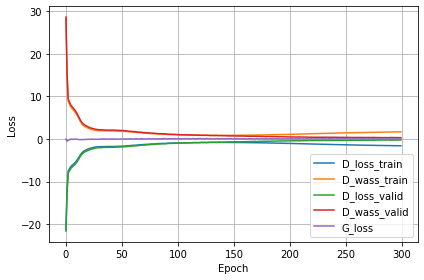

In [16]:
start = time.time()
LOGGER.info('Starting training...EPOCHS={}, BATCH_SIZE={}, BATCH_NUM={}'.format(epochs, batch_size, BATCH_NUM))
for epoch in range(1, epochs+1):
    LOGGER.info("{} Epoch: {}/{}".format(time_since(start), epoch, epochs))

    D_cost_train_epoch = []
    D_wass_train_epoch = []
    D_cost_valid_epoch = []
    D_wass_valid_epoch = []
    G_cost_epoch = []
    for i in range(1, BATCH_NUM+1):
        for p in netD.parameters():
            p.requires_grad = True

        one = torch.tensor(1, dtype=torch.float)
        neg_one = one * -1
        if cuda:
            one = one.cuda()
            neg_one = neg_one.cuda()

        #######################################################
        # (3) Train Discriminator
        #######################################################
        for iter_dis in range(5): # 5D 1G
            netD.zero_grad()
            noise = torch.Tensor(batch_size, latent_dim).uniform_(-1, 1)
            if cuda:
                noise = noise.cuda()
            noise_Var = Variable(noise, requires_grad=False)
            real_data_Var = numpy_to_var(next(train_iter)['X'], cuda) 

            # a) compute loss contribution from real training data
            D_real = netD(real_data_Var)
            D_real = D_real.mean()  # avg loss 
            D_real.backward(neg_one)  # loss * -1    
            
            # b) compute loss contribution from generated data, then backprop.
            fake = autograd.Variable(netG(noise_Var).data)
            #print(np.shape(fake))
            D_fake = netD(fake)
            D_fake = D_fake.mean()
            D_fake.backward(one)
            
            # c) compute gradient penalty and backprop
            gradient_penalty = calc_gradient_penalty(netD, real_data_Var.data,
                                                     fake.data, batch_size, lmbda,
                                                     use_cuda=cuda)
            gradient_penalty.backward(one)

            # Compute cost * Wassertein loss..
            D_cost_train = D_fake - D_real + gradient_penalty
            D_wass_train = D_real - D_fake 
            
            # Update gradient of discriminator.
            optimizerD.step()
            

            

            
            
            #############################
            # (2) Compute Valid data
            #############################
            netD.zero_grad()

            valid_data_Var = numpy_to_var(next(valid_iter)['X'], cuda)
            D_real_valid = netD(valid_data_Var)
            D_real_valid = D_real_valid.mean()  # avg loss

            # b) compute loss contribution from generated data, then backprop.
            fake_valid = netG(noise_Var)
            D_fake_valid = netD(fake_valid)
            D_fake_valid = D_fake_valid.mean()

            # c) compute gradient penalty and backprop
            gradient_penalty_valid = calc_gradient_penalty(netD, valid_data_Var.data,
                                                           fake_valid.data, batch_size, lmbda,
                                                           use_cuda=cuda)
            # Compute metrics and record in batch history.
            D_cost_valid = D_fake_valid - D_real_valid + gradient_penalty_valid
            D_wass_valid = D_real_valid - D_fake_valid

            if cuda:
                D_cost_train = D_cost_train.cpu()
                D_wass_train = D_wass_train.cpu()
                D_cost_valid = D_cost_valid.cpu()
                D_wass_valid = D_wass_valid.cpu()

            # Record costs
            D_cost_train_epoch.append(D_cost_train.data.numpy())
            D_wass_train_epoch.append(D_wass_train.data.numpy())
            D_cost_valid_epoch.append(D_cost_valid.data.numpy())
            D_wass_valid_epoch.append(D_wass_valid.data.numpy())
            

        #######################################################
        # (3) Train Generator
        #######################################################
        # Prevent discriminator update.
        for p in netD.parameters():
            p.requires_grad = False

        # Reset generator gradients
        netG.zero_grad()

        # Noise
        noise = torch.Tensor(batch_size, latent_dim).uniform_(-1, 1)
        if cuda:
            noise = noise.cuda()
        noise_Var = Variable(noise, requires_grad=False) 

        fake = netG(noise_Var)
        G = netD(fake)
        G = G.mean()

        # Update gradients.
        G.backward(neg_one)
        G_cost = -G

        optimizerG.step()

        # Record costs
        if cuda:
            G_cost = G_cost.cpu()
        G_cost_epoch.append(G_cost.data.numpy())

        LOGGER.info("{} Epoch={} Batch: {}/{} D_c:{:.4f} | D_w:{:.4f} | G:{:.4f}".format(time_since(start), epoch,
                                                                                             i, BATCH_NUM,
                                                                                             D_cost_train.data.numpy(),
                                                                                             D_wass_train.data.numpy(),
                                                                                             G_cost.data.numpy()))


    # Save the average cost of batches in every epoch.
    D_cost_train_epoch_avg = sum(D_cost_train_epoch) / float(len(D_cost_train_epoch))
    D_wass_train_epoch_avg = sum(D_wass_train_epoch) / float(len(D_wass_train_epoch))
    D_cost_valid_epoch_avg = sum(D_cost_valid_epoch) / float(len(D_cost_valid_epoch))
    D_wass_valid_epoch_avg = sum(D_wass_valid_epoch) / float(len(D_wass_valid_epoch))
    G_cost_epoch_avg = sum(G_cost_epoch) / float(len(G_cost_epoch))

    D_costs_train.append(D_cost_train_epoch_avg)
    D_wasses_train.append(D_wass_train_epoch_avg)
    D_costs_valid.append(D_cost_valid_epoch_avg)
    D_wasses_valid.append(D_wass_valid_epoch_avg)
    G_costs.append(G_cost_epoch_avg)
    

    LOGGER.info("{} D_cost_train:{:.4f} | D_wass_train:{:.4f} | D_cost_valid:{:.4f} | D_wass_valid:{:.4f} | "
                "G_cost:{:.4f}".format(time_since(start),
                                       D_cost_train_epoch_avg,
                                       D_wass_train_epoch_avg,
                                       D_cost_valid_epoch_avg,
                                       D_wass_valid_epoch_avg,
                                       G_cost_epoch_avg))
    

    #Generate audio samples.
    if epoch % epochs_per_sample == 0:
        LOGGER.info("Generating samples...")
        sample_out = netG(sample_noise_Var)  # sample_noise_Var = (10,100)
        if cuda:
            sample_out = sample_out.cpu()
        sample_out = sample_out.data.numpy() # sample_out = (10,1,128,128)
        sample_out = np.squeeze(sample_out) 
        # save spectrogram and timeseries and statistic
        sample_dir = save_and_plot( times, freq, sample_out, epoch, output_dir )
        
    if epoch % 10 ==0:
        # Save model
        LOGGER.info("Saving models...")
        netD_path = os.path.join(output_dir, str(epoch) + "discriminator.pkl")
        netG_path = os.path.join(output_dir, str(epoch) + "generator.pkl")
        torch.save(netD.state_dict(), netD_path, pickle_protocol=pickle.HIGHEST_PROTOCOL)
        torch.save(netG.state_dict(), netG_path, pickle_protocol=pickle.HIGHEST_PROTOCOL)
        pkl+=1
        
        
        

LOGGER.info('>>>>>>>Training finished !<<<<<<<')

# Save model
LOGGER.info("Saving models...")
netD_path = os.path.join(output_dir, "discriminator.pkl")
netG_path = os.path.join(output_dir, "generator.pkl")
torch.save(netD.state_dict(), netD_path, pickle_protocol=pickle.HIGHEST_PROTOCOL)
torch.save(netG.state_dict(), netG_path, pickle_protocol=pickle.HIGHEST_PROTOCOL)

# Plot loss curve.
LOGGER.info("Saving loss curve...")
plot_loss(D_costs_train, D_wasses_train,
          D_costs_valid, D_wasses_valid, G_costs, output_dir)

LOGGER.info("All finished!")
        

# generate cyclo noise

In [ ]:
print(epoch)

In [ ]:
LOGGER.info("Generating samples...")
fakee = []
for i in range(245):
    noise = torch.Tensor(batch_size, latent_dim).uniform_(-1, 1)
    if cuda:
        noise = noise.cuda()
    noise_Var = Variable(noise, requires_grad=False)
    sample_out = netG(noise_Var)  
    if cuda:
        sample_out = sample_out.cpu()
    sample_out = sample_out.data.numpy() # sample_out = (10,1,128,128)
    sample_out = np.squeeze(sample_out)
    fakee.append(sample_out)
fakee = np.reshape( np.array(fakee),(-1,128,128) )
print(fakee.shape)

In [ ]:
print(fakee.shape)
print(np.max(fakee[1]))
print(np.min(fakee[1]))
print(np.mean(fakee[1]))

In [ ]:
import matplotlib.pyplot as plt
cm=plt.cm.get_cmap('plasma')
plt.figure(figsize=(20,10))

plt.pcolormesh(fakee[1],cmap=cm)
plt.colorbar()

In [ ]:
print(fakee.shape)
print(type(fakee))

In [ ]:
for i in range(len(fakee)):
    

In [ ]:
plt.figure(figsize=(20,10))
j = 0
for i in range(0,10):
    plt.subplot(2, 5, j+1)
    plt.pcolormesh(times, freq, fakee[i],cmap=cm)
    j+=1
print(np.max(fakee[i]))
print(np.min(fakee[i]))
print(np.mean(fakee[i]))

In [ ]:
########### mix_Spec&Wave ############

In [ ]:
#load cyclcos data

import csv
import numpy as np
Wavedatas = []
dataname = 'ep180fake(cyclo2)_wave'
with open( dataname +'.csv', newline='') as csvfile:
    rows = csv.reader(csvfile)
    for row in rows:
        Wavedatas.append( list( map(float,row) ) )
    csvfile.close()
Wavedatas = np.array(Wavedatas)
print(Wavedatas.shape)

In [ ]:
from scipy import signal
fs = 360000
f, t, Zxx = signal.stft(Wavedatas[4], fs=fs, nperseg=257, noverlap=128)
ang = np.angle(Zxx)

print(ang.shape)
print(np.max(ang))
print(np.min(ang))
print(np.mean(ang))

import matplotlib.pyplot as plt
cm=plt.cm.get_cmap('plasma')
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.pcolormesh(ang,cmap=cm)
plt.colorbar()

In [ ]:
griffin_lim_iters = 15
def spec_to_time(spectrogram,angle):
    minva = -5
    lownum = 1e-8
    Zxx2denor = spectrogram*abs(minva) + minva
    Zxx2dbtoamp = np.power(10,Zxx2denor)- lownum
    estimate = griffin_lim(Zxx2dbtoamp,angle)
    return estimate


def _stft_forgriffin(y):
    f, t, Zxx = signal.stft(y, fs=360000, nperseg=257, noverlap=128)
    return Zxx

def griffin_lim(S,angles):
    m = np.mean(S,axis=0)
    S = np.vstack((m,S))
    S_complex = np.abs(S).astype(np.complex)
    #y = _istft(S_complex * np.exp(1j*angles))
    angles = np.exp(2j * np.pi * np.random.rand(*S.shape)) # S.shape = (128*128)
    #y = _istft(S_complex * np.exp(1j*angles))
    for i in range(griffin_lim_iters):
        if i > 0:
            angles = np.exp(1j * np.angle(_stft_forgriffin(y[1])))
        y = _istft(S_complex * np.exp(1j*angles))
    return y[1]

def _istft(S):
    return signal.istft(S, fs=360000, nperseg=257, noverlap=128)

In [ ]:
fake_datas = []
for i in range(len(datas)-10000):
    print(i)
    f1, t1, Zxx1 = signal.stft(datas[i], fs=360000, nperseg=257, noverlap=128)
    ang = np.angle(Zxx1)
    fake_datas.append( spec_to_time(fakee[i], ang) )
fake_datas = np.array(fake_datas)
print(fake_datas.shape)

In [ ]:
############ end #################

In [ ]:
# spectrogram
cm=plt.cm.get_cmap('rainbow') 
plt.figure(figsize=(30,10))
plt.pcolormesh(fakee[0],cmap=cm)

In [ ]:
# time_series
plt.plot(spectrogram_to_time(fakee[0])[1])

In [ ]:

fake_datas = []
for i in range(len(fakee)):
    print(i)
    fake_datas.append( spectrogram_to_time(fakee[i])[1] )
fake_datas = np.array(fake_datas)

In [ ]:
####################### validate ######################

In [ ]:
fake_datas = []
l = len(fakee)
for i in range(len(fakee)):
    print(i)
    fake_datas.append( spectrogram_to_time(fakee[i])[1] )
fake_datas = np.array(fake_datas)

In [ ]:
import numpy as np
from scipy import signal
#real_datas = np.array(real_datas[:15000])
fake_datas = np.array(fake_datas[:15000])
#print(real_datas.shape)
print(fake_datas.shape)

In [ ]:
# create a new folder to store metrice

save = 'metrice'
if not os.path.isdir(save):
    os.makedirs(save)

In [ ]:
a = save + "/" + "spec_ep200" + "(cyclo2_fresh)" + ".csv"
with open(a,'w',newline='') as csvFile:
    csvWriter = csv.writer(csvFile)
    for i in range(len(fake_datas)): 
        csvWriter.writerow( fake_datas[i] ) 
        


In [ ]:
# paremeter
fs = 400000 # 400k
data_length = len(real_datas[0])

In [ ]:
# draw time series

import matplotlib.pyplot as plt
#fs = 360000 # 360k
t = data_length / fs # sampling freq * sampling time = sample num

plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot( np.arange(0,t,1/fs), real_datas[500], label = 'Real',color = (1,0,0))
plt.legend(loc = 'upper right',fontsize=16)
plt.xlabel("Time(s)",fontsize=16)
plt.ylabel("Noise amplitude(v)",fontsize=16)

plt.subplot(2,1,2)
plt.plot( np.arange(0,t,1/fs), fake_datas[2], label = 'Generate')
plt.legend(loc = 'upper right',fontsize=16)
plt.xlabel("Time(s)",fontsize=16)
plt.ylabel("Noise amplitude(v)",fontsize=16)


plt.savefig(save + '/' + "time_series.png")

In [ ]:
x = np.random.randint(1,15000, size=(10))
tot = 1
# draw random 10 time series

import matplotlib.pyplot as plt
#fs = 360000 # 360k
t = data_length / fs # sampling freq * sampling time = sample num

plt.figure(figsize=(15,50))
for i in x:
    plt.subplot(20,1,tot)
    plt.plot( np.arange(0,t,1/fs), real_datas[i], label = 'Real',color = (1,0,0))
    plt.legend(loc = 'upper right',fontsize=16)
    plt.xlabel("Time(s)",fontsize=16)
    plt.ylabel("Noise amplitude(v)",fontsize=10)
    
    tot += 1
    
    plt.subplot(20,1,tot)
    plt.plot( np.arange(0,t,1/fs), fake_datas[i], label = 'Generate')
    plt.legend(loc = 'upper right',fontsize=16)
    plt.xlabel("Time(s)",fontsize=16)
    plt.ylabel("Noise amplitude(v)",fontsize=10)
    
    tot += 1
    
plt.savefig(save + '/' + "time_series(10random).png")

In [ ]:
# draw stft
from scipy import signal
# fs = 360000
f1, t1, Zxx1 = signal.stft(real_datas[500], fs=fs, nperseg=257, noverlap=128)
f2, t2, Zxx2 = signal.stft(fake_datas[1], fs=fs, nperseg=257, noverlap=128)

import matplotlib.pyplot as plt
cm=plt.cm.get_cmap('plasma')
plt.figure(figsize=(20,10))
#plt.title(" X:Time[s], Y:Frequency[KHz]")
plt.subplot(2,1,1)
plt.pcolormesh(t1, f1/1000, abs(Zxx1),cmap=cm)
plt.colorbar()
#plt.legend(loc = 'best',fontsize=16)
plt.xlabel("Time(s)",fontsize=16)
plt.ylabel("Frequency(kHz)",fontsize=16)

plt.subplot(2,1,2)
plt.pcolormesh(t2, f2/1000, abs(Zxx2),cmap=cm)
plt.colorbar()
#plt.legend(loc = 'best',fontsize=16)
plt.xlabel("Time(s)",fontsize=16)
plt.ylabel("Frequency(kHz)",fontsize=16)
plt.savefig(save + '/' + "stft.png")

In [ ]:
# check frequency value
print(np.where(Zxx1>0.20))
print(f1[43]/1000)

In [ ]:
from scipy.fftpack import fft,ifft
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
le = len(real_datas[2])
xf = np.linspace(0,fs,data_length) # 頻率
xf2 = xf[:(le//2)]
r_yf2 = abs(fft(fake_datas[3]))[:(le//2)]
plt.plot(xf2,r_yf2)
print(r_yf2.shape)
print(xf2)

In [ ]:
# Average FFT

from scipy.fftpack import fft,ifft
r_average_fft = np.zeros(len(real_datas[0]))
f_average_fft = np.zeros(len(fake_datas[0]))
le = len(real_datas)
for i in range(len(real_datas)):
    r_average_fft += abs( fft(real_datas[i]) ) / le
    f_average_fft += abs( fft(fake_datas[i]) ) / le
    
ln = len(real_datas[0])
import matplotlib.pyplot as plt
r_yf2 = r_average_fft[ : (ln//2) ]
f_yf2 = f_average_fft[ : (ln//2) ]
xf = np.linspace(0,fs,data_length) # 頻率
xf2 = xf[:(ln//2)] / 1000

#print( r_average_fft.shape)

plt.figure(figsize=(20,10))
plt.plot(xf2,r_yf2,label = 'Real',color=(1,0,0))
plt.plot(xf2,f_yf2,label = 'Generate',alpha=0.5)
plt.legend(loc='best',fontsize=16)
plt.title('FFT of Mixed wave',fontsize=20,color='#F08080')
plt.xlabel("Frequency(kHz)",fontsize=16)
plt.ylabel("Average FFT",fontsize=16)

plt.savefig(save + '/' + "fft.png")

In [ ]:
print( np.where(f_yf2>200) )
print( xf[2707]/1000 )

In [ ]:
# statisitc - easy version

from scipy import stats
from scipy.signal import find_peaks

def feature_change(chandata):
    total_data = []
    print(len(chandata))
    for i in range(len(chandata)):
        print(i)
        # statistic data
        nobs,(damin,damax),damean,davar,daskew,dakurto = stats.describe( chandata[i] )
        total_data.append( [damax, damean, davar**(1/2), daskew, dakurto] )
    return np.array( total_data )

rdata_statis = feature_change(real_datas)
fdata_statis = feature_change(fake_datas)

fdata_statis = fdata_statis[:15675]
print(rdata_statis.shape)
print(fdata_statis.shape)

In [ ]:
# real datas easy version

total_mean = np.mean(rdata_statis, axis = 0)
total_std = np.std(rdata_statis, axis = 0)
total_median = np.median(rdata_statis, axis = 0)

print("max[v], mean[mv], std[v], skewness, kurtosis")
print(total_mean)
print(total_std)
print(total_median)

with open('real_statistic.csv','w',newline="") as csvfile:
    outwriter = csv.writer(csvfile)
    outwriter.writerow(['feature']+['max[v]', 'mean[mv]', 'std[v]', 'skewness', 'kurtosis'])
    outwriter.writerow(['mean']+list(total_mean))
    outwriter.writerow(['std']+list(total_std))
    outwriter.writerow(['median']+list(total_median))
    csvfile.close()
    

#fake datas

total_mean = np.mean(fdata_statis, axis = 0)
total_std = np.std(fdata_statis, axis = 0)
total_median = np.median(fdata_statis, axis = 0)

print("max[v], mean[mv],std[v], skewness, kurtosis")
print(total_mean)
print(total_std)
print(total_median)
    
with open('fake_statistic.csv','w',newline="") as csvfile:
    outwriter = csv.writer(csvfile)
    outwriter.writerow(['feature']+['max[v]', 'mean[mv]', 'std[v]', 'skewness', 'kurtosis'])
    outwriter.writerow(['mean']+list(total_mean))
    outwriter.writerow(['std']+list(total_std))
    outwriter.writerow(['median']+list(total_median))
    csvfile.close()

In [ ]:
# statisitc

from scipy import stats
from scipy.signal import find_peaks

def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size//2:]

def feature_change(chandata):
    total_data = []
    print(len(chandata))
    for i in range(len(chandata)):
        print(i)
        # statistic data
        nobs,(damin,damax),damean,davar,daskew,dakurto = stats.describe( chandata[i] )
        # energy
        E_fft = np.sum(chandata[i] ** 2) / len(chandata[i])
        # auto statistic data
        nobs,(aumin,aumax),aumean,auvar,auskew,aukurto = stats.describe( autocorr(chandata[i]) ) 
        # peak > 0.05
        peaks, _ = find_peaks(chandata[i], height=0.05)
        
        total_data.append( [damax, damean, E_fft, davar**(1/2), daskew, dakurto, int(len(peaks)), auskew, aukurto] )
    return np.array( total_data )

rdata_statis = feature_change(real_datas)
fdata_statis = feature_change(fake_datas)

print(rdata_statis.shape)
print(fdata_statis.shape)

In [ ]:
print(rdata_statis.shape)
print(fdata_statis.shape)

In [ ]:
# store random 100 datas to generate CPS and coherence

a = save + "/" + "spec_ep200_statistic" + "(cyclo2_fresh)" + ".csv"
with open(a,'w',newline='') as csvFile:
    csvWriter = csv.writer(csvFile)
    for i in range(len(fdata_statis)):
        csvWriter.writerow( fdata_statis[i] ) 
        

        
b = save + "/" + "real_statistic" + "(cyclo2_fresh)" + ".csv"
with open(b,'w',newline='') as csvFile:
    csvWriter = csv.writer(csvFile)
    for i in range(len(rdata_statis)):
        csvWriter.writerow( rdata_statis[i] )

In [ ]:
# real datas

total_mean = np.mean(rdata_statis, axis = 0)
total_std = np.std(rdata_statis, axis = 0)
total_median = np.median(rdata_statis, axis = 0)

print("max[v], mean[v], energy[J], std[v], skewness, kurtosis, peak>0.05, skewauto, kuroauto")
print(total_mean)
print(total_std)
print(total_median)

with open(save + '/' + 'real_statistic.csv','w',newline="") as csvfile:
    outwriter = csv.writer(csvfile)
    outwriter.writerow(['feature']+['max[v]', 'mean[v]', 'energy[J]', 'std[v]', 'skewness', 'kurtosis', 'peak>0.05', 'skewauto', 'kuroauto'])
    outwriter.writerow(['mean']+list(total_mean))
    outwriter.writerow(['std']+list(total_std))
    outwriter.writerow(['median']+list(total_median))
    csvfile.close()
    

#fake datas

total_mean = np.mean(fdata_statis, axis = 0)
total_std = np.std(fdata_statis, axis = 0)
total_median = np.median(fdata_statis, axis = 0)

print("max[v], mean[v], energy[J], std[v], skewness, kurtosis, peak>0.05, skewauto, kuroauto")
print(total_mean)
print(total_std)
print(total_median)
    
with open(save + '/' + 'fake_statistic.csv','w',newline="") as csvfile:
    outwriter = csv.writer(csvfile)
    outwriter.writerow(['feature']+['max[v]', 'mean[v]', 'energy[J]', 'std[v]', 'skewness', 'kurtosis', 'peak>0.05', 'skewauto', 'kuroauto'])
    outwriter.writerow(['mean']+list(total_mean))
    outwriter.writerow(['std']+list(total_std))
    outwriter.writerow(['median']+list(total_median))
    csvfile.close()

In [ ]:
# normalize data

#r_norm = np.linalg.norm(rdata_statis,axis=0)
r_max = np.max(rdata_statis,axis=0)
r_min = np.min(rdata_statis, axis = 0)
r_mean = np.mean(rdata_statis, axis = 0)
rdata_statis_norm = np.zeros(np.shape(rdata_statis))
for i in range(rdata_statis_norm.shape[1]):
    rdata_statis_norm[:,i] = ( (rdata_statis[:,i]-r_mean[i]) )/(r_max[i]-r_min[i])


#f_norm = np.linalg.norm(fdata_statis,axis=0)
f_max = np.max(fdata_statis,axis=0)
f_min = np.min(fdata_statis, axis = 0)
f_mean = np.mean(fdata_statis, axis = 0)
fdata_statis_norm = np.zeros(np.shape(fdata_statis))
for i in range(fdata_statis_norm.shape[1]):
    fdata_statis_norm[:,i] = ( (fdata_statis[:,i]-f_mean[i]) )/(f_max[i]-f_min[i])

print(rdata_statis_norm.shape)
print(fdata_statis_norm.shape)


# mix

dataplot = []
for i in range(9):
    dataplot.append(rdata_statis_norm[:,i])
    dataplot.append(fdata_statis_norm[:,i])
dataplot = np.transpose(np.array(dataplot))
print(dataplot.shape)

labels=[]
for i in range(1,10):
    labels.append(str(i)+"")
    labels.append('*')

fig,axes = plt.subplots()
axes.boxplot(x=dataplot,sym='rd',patch_artist=True,labels=labels)
axes.set_xlabel('Feature')
plt.text(14,0.9,'Num : Real')
plt.text(15,0.8,'* : Generate')
plt.savefig(save + '/' + "boxplot.png")